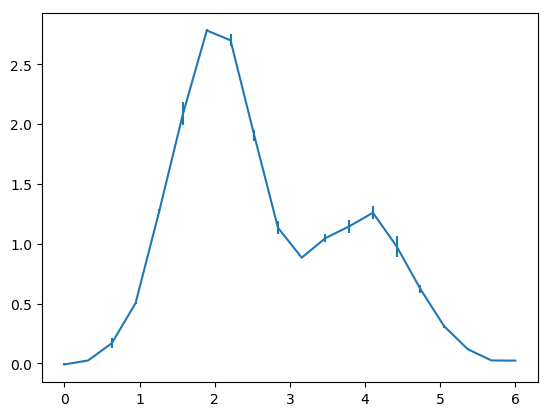

(PyObject <matplotlib.lines.Line2D object at 0x1a0786ef0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x1a0753c18>,))

In [1]:
using PyCall
include("../src/gauss_error.jl")
include("../src/kernels.jl")

a = 0.
b = 6.
y = collect(range(a, stop=b, length=20))
# f = [-0.00906047, 0.0239243, 0.168545, 0.503525, 1.27398,
#     2.08793, 2.78204, 2.5939, 1.90542, 1.13321,
#     0.88324, 1.04642, 1.14465, 1.25853, 0.977623,
#     0.621435, 0.310866, 0.117351, 0.0240617, 0.0226408]
f = [-0.00906047, 0.0239243, 0.168545, 0.503525, 1.27398,
    2.08793, 2.78204, 2.7, 1.90542, 1.13321,
    0.88324, 1.04642, 1.14465, 1.25853, 0.977623,
    0.621435, 0.310866, 0.117351, 0.0240617, 0.0226408]
# delta_f = [0.00888777, -0.00480116, 0.0396684, -0.00968618, -0.0195524,
#     -0.0988949, 0.00829277, 0.0494844, -0.0445353, 0.0556071,
#     0.00347363, 0.0317405, 0.0539028, 0.0545216, 0.0870875,
#     0.0338332, -0.0121158, 0.00790281, 0.00138139, 0.00662381]
delta_f = [0.00888777, 0.00480116, -0.0396684, -0.00968618, 0.0195524,
    -0.0988949, 0.00829277, 0.0494844, -0.0445353, 0.0556071,
    0.00347363, 0.0317405, 0.0539028, -0.0545216, 0.0870875,
    0.0338332, 0.0121158, -0.00790281, 0.00138139, -0.00662381]

using PyPlot
errorbar(y, f, yerr=delta_f)

In [2]:
function kernel(x::Float64, y::Float64)
    if abs(x-y) <= 1
        return 1. -  abs(x-y)
    end
    return 0.
end

kernel (generic function with 1 method)

In [3]:
# basis = CubicSplineBasis(y, ("dirichlet", "dirichlet"))
basis = FourierBasis(a, b, 45)
println()

┌ Info: Fourier basis is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:125


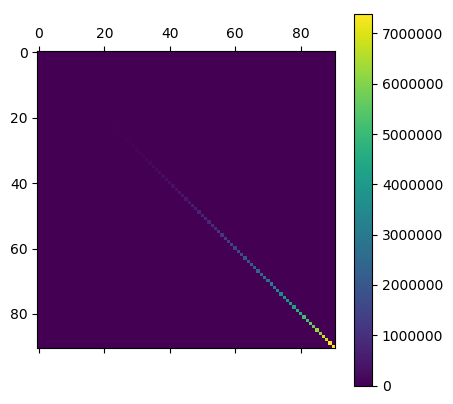

┌ Info: Calculating omega matrix for Fourier basis derivatives of order 2...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:132
┌ Info: Omega caclulated successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:148


PyObject <matplotlib.colorbar.Colorbar object at 0x1a0a60b00>

In [4]:
Omega = omega(basis, 2)
matshow(Omega)
colorbar()

┌ Info: GaussErrorMatrixUnfolder is created
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:86
┌ Info: GaussErrorUnfolder is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:325
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:359
┌ Info: Starting discretize kernel...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:48
┌ Info: Kernel was discretized successfully.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/basis.jl:59
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:387
┌ Info: Starting solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:117
┌ Info: Ending solve...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:145
┌ Info: Starting solve_correct...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:156


┌ Warning: B = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 587.835 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.3411

┌ Info: Starting optimization...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:241
┌ Info: Ending solve_correct...
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/gauss_error.jl:281


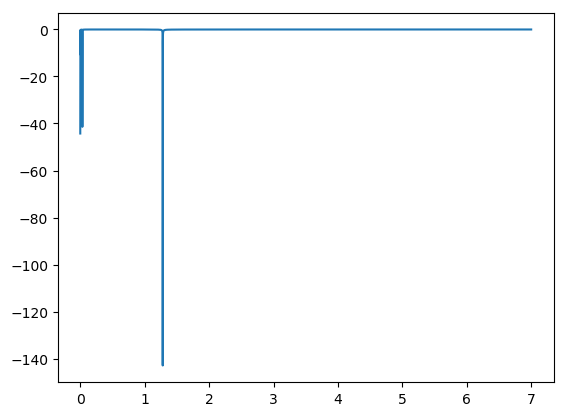

Dict{String,Array{Float64,N} where N} with 3 entries:
  "errors" => [0.0178501 0.00608669 … -1.09987e-8 9.37528e-8; 0.00608669 0.0040…
  "alphas" => [0.05]
  "coeff"  => [1.979, 0.940562, -0.612908, -0.624676, -0.603832, -0.830583, -0.…

In [5]:
Omega = omega(basis, 2)
# matshow(Omega)
# colorbar()
model = GaussErrorUnfolder(basis, [Omega])#, "User", [0.06])
result = solve(model, kernel, f, delta_f, y)


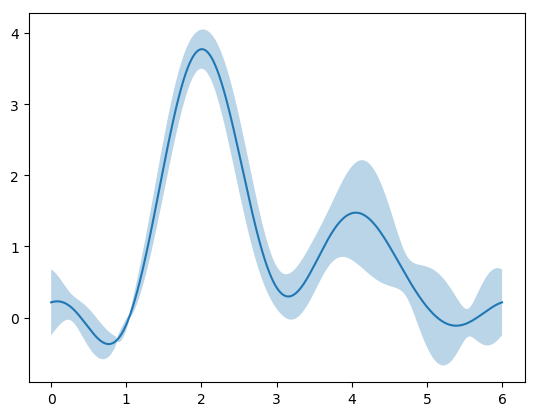

┌ Info: PhiVec is created.
└ @ Main /Users/ta_nyan/Documents/diploma/StatReg.jl/src/vector.jl:69


PyObject <matplotlib.collections.PolyCollection object at 0x18e229860>

In [6]:
phivec = PhiVec(result, basis)
z = collect(range(a, stop=b, length=1000))
phi_reconstructed = phivec.phi_function.(z)
phi_reconstructed_errors = phivec.error_function.(z)
plot(z, phi_reconstructed)
fill_between(z, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3)

In [7]:
# result = solve(model, kernel, f, delta_f, y)

In [8]:
# phivec = PhiVec(result, basis)
# println()

In [9]:
# z = collect(range(a, stop=b, length=1000))
# phi_reconstructed = phivec.phi_function.(z)
# phi_reconstructed_errors = phivec.error_function.(z)
# plot(z, phi_reconstructed)
# fill_between(z, phi_reconstructed - phi_reconstructed_errors, phi_reconstructed + phi_reconstructed_errors, alpha=0.3)


In [10]:
# my_B = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 587.835 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.34113 0.464235 5.6269 4.49711 -8.01235 -3.30481 1.30482 6.43108 -2.07159 1.16569 -4.65111 4.85172 0.480114 -3.75154 0.0188332 4.13391 -0.231743 -3.78461 -3.95065 4.39517 -0.378741 -5.88766 -1.13613 3.83172 -1.33969 -4.47307 0.696006 3.79821 -0.59705 -4.37648 1.03501 4.03823 -3.09352 -5.15823 2.58894 1.83528 -1.48419 -2.32961 1.07626 2.41475 -1.38562 -2.48401 1.82059 1.46253 0.408319 -2.63058 -0.0161712 1.36419 0.443626 -2.19995 0.0255454 2.11237 0.286624 -1.96791 0.173807 2.02096 1.30095 -2.306 0.211803 2.52941 -0.0579157 -2.08548 0.126925 2.05839 0.161982 -1.99437 0.456278 2.53111 -0.602948 -2.02189; 75.971 -110.675 213.906 89.0182 -49.836 93.9601 101.031 -14.0376 -92.6417 5.48045 56.1387 -4.16431 -38.7026 0.875836 40.0512 -2.92424 -28.2818 20.0444 19.9084 -12.6803 -14.1359 1.66348 12.3831 -1.7143 -12.6859 2.07489 11.001 0.0745821 -8.29495 0.76829 8.28774 -2.35329 -10.4203 -0.3409 10.7628 -0.174209 -9.68224 -0.146656 8.80132 0.551461 -9.80761 -0.768064 8.42634 -1.64251 -9.05677 0.490419 8.64482 -0.297993 -7.9082 0.151937 7.98223 -0.108563 -8.61434 0.545615 6.68153 -1.85102 -5.94347 0.879977 5.63895 -0.473348 -5.66183 0.500807 5.31214 -0.484808 -4.75171 -0.120858 4.4565 -0.134913 -4.73236 0.251903 4.99589 -0.136102 -4.82504 0.0830191 4.47667 0.109992 -4.52007 -0.107413 5.01705 0.0398799 -4.54538 0.298104 4.53927 -0.137486 -4.34617 0.0295551 4.34138 -0.124353 -4.48436 0.152002 4.56519; 165.837 -17.9485 89.0182 283.139 49.2373 56.9489 82.523 1.90359 -21.5869 27.0122 17.4192 -10.6958 -8.59843 8.3902 14.6705 -8.23687 0.495821 18.6297 6.54915 -12.3109 1.91073 3.72318 1.4301 -3.29675 -1.24847 3.64356 2.14052 -4.82033 1.96555 -1.87574 0.31926 -0.836676 0.443286 -1.51215 1.66427 -0.04675 -1.27007 -0.632918 1.16999 -0.180521 -1.78127 -3.02286 0.497614 -1.27239 -2.26194 0.532155 1.40269 -0.505596 -1.3301 0.22069 1.34794 -1.01438 -2.48507 0.960972 0.0888889 -1.69204 -0.90951 0.916427 0.485 -0.608043 -0.73327 0.845939 0.582194 -0.585308 -0.920159 0.762337 -0.20528 0.433958 -0.462411 0.0156185 0.494527 -0.0447588 -0.610129 0.101095 0.533718 0.474688 -0.598678 0.128508 0.839972 0.523791 -0.496214 0.250314 0.749406 -0.114453 -0.659614 0.0955233 0.80513 -0.0627714 -0.592053 0.505648 1.07874; -95.7867 201.71 -49.836 49.2373 242.202 22.4462 -161.451 32.7238 133.883 -15.894 -83.6818 6.76976 58.3038 -3.17217 -54.9656 15.0575 53.0405 -18.4181 -30.9252 11.9323 21.6545 -4.35551 -17.4745 2.53613 19.6415 -2.41785 -16.7329 2.49292 13.0991 -2.07567 -13.2668 -0.921787 15.6725 -0.207042 -15.641 0.148451 14.7683 0.232124 -13.4288 -1.19136 12.8923 -0.968729 -14.8688 0.102883 13.9218 -0.77963 -13.1132 0.382709 12.0653 0.000465541 -12.2694 0.39848 11.9326 -1.94801 -11.4199 1.76768 9.16713 -0.937673 -8.66212 0.607532 8.69328 -0.716863 -8.43708 0.321797 7.14481 -0.370034 -6.88739 0.258923 7.30839 0.0147972 -7.61093 0.118041 7.37044 -0.016853 -7.04432 -0.174093 6.91058 0.329764 -6.943 0.325222 7.36716 -0.159219 -6.95366 0.138726 6.65283 -0.0729016 -6.6408 -0.0410062 6.94325 -0.292877 -6.44391; -1.30454 132.656 93.9601 56.9489 22.4462 55.3972 12.2255 32.228 7.59488 -6.44762 4.00092 3.6009 -3.18107 -1.5748 5.17208 4.68465 -0.935059 -2.16031 6.37132 1.6033 -0.209612 -1.48198 2.53816 0.886416 -1.79762 -1.1519 2.14687 0.796279 -1.98399 -2.56758 2.90555 -1.63555 -1.39422 -0.22643 1.55558 0.0399401 -1.27705 -0.0815371 1.15306 -0.872342 -1.76733 -0.839671 0.72529 -0.593946 -1.12121 -0.535014 0.84482 0.220274 -0.87589 -0.241246 0.547158 0.00182602 -1.51041 -0.503345 0.727822 0.210359 -1.1787 -0.161249 0.7407 0.139937 -0.75144 -0.106339 0.495833 0.274274 -1.06022 -0.107106 0.868883 0.352194 -0.943346 0.104262 0.705463 0.03517 -0.673347 0.0421792 0.570835 0.0611528 -0.615798 0.275885 0.844928 0.219023 -0.526668 -0.00208802 0.583762 0.0637494 -0.541985 -0.0472934 0.483003 0.122399 -0.291862 0.0119593 0.863857; 104.638 -28.5215 101.031 82.523 -161.451 12.2255 204.581 -12.8169 -122.577 16.5737 77.1961 -6.95968 -53.8019 5.50079 52.6122 -12.5858 -44.9406 13.0867 35.4309 -8.63513 -16.9748 3.79052 17.6723 -2.32817 -18.8052 2.8765 16.975 -2.63102 -12.4241 0.0680002 12.6397 0.129414 -13.2718 -0.522136 14.9696 -0.0291631 -13.8579 -0.393194 12.6064 0.00516516 -12.5123 -0.733087 13.1644 -0.483659 -13.8108 0.484549 12.2777 -0.306097 -11.3272 0.149909 11.2776 -0.734034 -11.576 1.51811 10.2365 -1.22029 -9.17139 0.670252 8.06753 -0.458922 -8.2301 0.653113 7.89486 -0.551614 -7.22965 0.348017 6.47012 0.106587 -6.88218 -0.0426351 7.04783 -0.0270817 -6.92819 0.0539626 6.5869 0.294895 -6.50367 0.0409992 6.67865 0.0858101 -6.77099 0.127896 6.62059 -0.0667866 -6.27203 0.0214288 6.27066 -0.0890588 -6.29903 0.389429 6.23562; 10.2213 51.8627 -14.0376 1.90359 32.7238 32.228 -12.8169 5.03334 15.1254 -1.15194 -9.24995 0.982199 7.51257 -0.162691 -6.34688 2.46994 8.60431 -3.55908 -3.18526 2.28719 4.10243 -0.728063 -2.4857 0.474405 2.84958 -0.715684 -2.26505 -0.204396 2.73791 -0.261395 -2.2484 -0.945494 2.5052 0.0327233 -2.24275 -0.0116949 2.10763 -0.0582418 -1.91225 -0.370284 1.88195 -0.0500633 -2.08243 -0.416805 1.81662 -0.0849049 -1.78695 0.0105151 1.6457 0.0172487 -1.63875 0.014448 1.54332 -0.324118 -1.82083 0.33143 1.25304 -0.167311 -1.29773 0.107023 1.23644 -0.135746 -1.1828 0.156643 0.99566 0.120903 -1.21682 0.00127635 1.114 0.0863044 -1.11952 -0.00930929 1.06252 0.0379594 -1.00681 0.0436814 0.988644 0.129054 -1.00716 0.0121688 1.04002 0.0389115 -0.965932 -0.00704294 0.928554 0.0462656 -0.883724 0.0148096 0.961787 -0.0355082 -0.8847; 2.13213 91.1187 -92.6417 -21.5869 133.883 7.59488 -122.577 15.1254 94.484 -11.0048 -48.939 5.22515 36.1682 -4.83386 -34.5005 6.93891 32.4046 -8.69187 -19.5784 5.75945 14.7076 -2.32223 -12.0093 1.60817 13.0659 -2.44496 -11.6683 1.46059 9.66928 -0.562547 -7.5305 -0.56409 9.47907 0.236655 -10.095 -0.0118739 9.45321 -0.0775477 -8.60301 -0.56165 8.71853 0.0963692 -9.27325 0.0968017 9.18988 -0.390796 -8.48929 0.213424 7.73441 -0.246594 -7.74664 0.636955 7.68259 -0.789526 -7.2377 0.773297 5.94389 -0.416257 -5.67131 0.27707 5.66015 -0.437063 -5.48071 0.590145 4.905 -0.133371 -4.68197 -0.0208791 4.53093 0.0859219 -4.8393 -0.00508485 4.73212 0.0366083 -4.48497 0.0581607 4.44741 0.178126 -4.63056 0.0120653 4.69179 -0.0511628 -4.50872 0.0317583 4.29716 0.00978995 -4.26408 0.178322 4.35105 -0.30569 -4.16825; 23.6173 -27.1409 5.48045 27.0122 -15.894 -6.44762 16.5737 -1.15194 -11.0048 4.19094 7.92165 -1.8494 -5.35535 1.22872 5.05958 -2.63644 -4.16614 3.3052 3.68342 -2.19135 -1.77307 0.88649 1.92954 -0.629124 -1.93483 0.736815 1.69703 -0.602601 -1.25245 -0.2043 1.447 0.296631 -1.48133 -0.167738 1.54137 -0.00282612 -1.42274 -0.0878545 1.29264 0.152369 -1.24449 -0.260439 1.33777 0.0108978 -1.34785 0.101497 1.2321 -0.0752998 -1.14236 0.0189614 1.12995 -0.145642 -1.14787 0.32035 1.01083 -0.310523 -0.950447 0.173931 0.830196 -0.12289 -0.839262 0.165689 0.800342 -0.124744 -0.727521 0.0643205 0.662133 0.0649698 -0.729707 -0.0335447 0.731774 -0.00331103 -0.709972 -0.00353133 0.677225 0.0658909 -0.663893 -0.0438512 0.667771 0.0388038 -0.687076 0.0175911 0.665789 -0.0139196 -0.6337 -0.00253763 0.630854 -0.00778252 -0.6364 0.0825126 0.626903; 22.3902 -19.5893 56.1387 17.4192 -83.6818 4.00092 77.1961 -9.24995 -48.939 7.92165 29.3147 -3.20381 -20.9381 2.94612 20.2302 -4.97369 -17.3744 5.29813 12.6345 -3.51091 -7.81868 1.54564 7.26696 -0.97029 -7.6304 1.35521 6.89212 -1.37406 -5.22936 0.360825 4.9203 0.103095 -5.33868 -0.151784 5.83088 -0.00419529 -5.48744 -0.0614565 4.99492 0.0620645 -5.08042 -0.0997526 5.45746 -0.190019 -5.42181 0.249844 4.87215 -0.143919 -4.49621 0.137502 4.4901 -0.386845 -4.51113 0.57095 4.03907 -0.474765 -3.55503 0.256957 3.27129 -0.170705 -3.29537 0.262468 3.18249 -0.305981 -2.88921 0.207022 2.62039 0.00126265 -2.70813 -0.0268017 2.79719 -0.0058884 -2.74749 0.0124699 2.60318 0.0460924 -2.58376 -0.00599197 2.69685 -0.0046913 -2.74168 0.0508802 2.6293 -0.0280738 -2.49966 0.0211078 2.49688 -0.0879306 -2.51451 0.1847 2.44222; -9.6563 16.9034 -4.16431 -10.6958 6.76976 3.6009 -6.95968 0.982199 5.22515 -1.8494 -3.20381 0.901199 2.24611 -0.611237 -2.18526 1.28109 1.98328 -1.6074 -1.31528 1.06601 0.766122 -0.431671 -0.688191 0.307312 0.758198 -0.379977 -0.663556 0.219055 0.518283 0.060066 -0.508735 -0.156938 0.587438 0.0705832 -0.617021 0.00118497 0.571213 0.0336241 -0.519328 -0.10199 0.515263 0.0972278 -0.543402 -0.0118699 0.548015 -0.0535205 -0.506985 0.0364175 0.465441 -0.0141388 -0.467139 0.0738565 0.476556 -0.155759 -0.434578 0.151136 0.364228 -0.0847722 -0.332321 0.0600377 0.335924 -0.0817188 -0.321645 0.0706861 0.285915 -0.0132013 -0.269973 -0.0260794 0.282593 0.0173725 -0.293502 0.00145982 0.285411 0.00454449 -0.271078 -0.0252181 0.267462 0.0311647 -0.274521 -0.0128669 0.278463 -0.00782264 -0.269814 0.00662101 0.257062 0.00410064 -0.255896 0.0087827 0.26281 -0.0415831 -0.256645; -13.7251 21.7206 -38.7026 -8.59843 58.3038 -3.18107 -53.8019 7.51257 36.1682 -5.35535 -20.9381 2.24611 15.0483 -1.98759 -14.4857 3.57991 12.7804 -4.06493 -8.80357 2.67846 5.68755 -1.10931 -5.10013 0.695684 5.42743 -0.96329 -4.86655 0.885719 3.77917 -0.353239 -3.4153 -0.0581149 3.85749 0.0849089 -4.17775 0.00801714 3.92425 0.027976 -3.57167 -0.0983044 3.62187 0.0212392 -3.88374 0.143236 3.85748 -0.18987 -3.49615 0.10402 3.21557 -0.0953367 -3.22053 0.262384 3.21733 -0.418189 -2.92317 0.366904 2.51869 -0.195988 -2.33772 0.127873 2.35124 -0.19037 -2.27344 0.21822 2.04349 -0.127961 -1.88536 0.016433 1.92197 0.014439 -2.00281 0.00798121 1.96407 -0.00680392 -1.86162 -0.020982 1.84651 0.0214364 -1.92348 0.0159474 1.9554 -0.0395694 -1.8769 0.0226524 1.78576 -0.0138803 -1.78134 0.062111 1.80616 -0.128463 -1.74107; 8.65304 -10.0881 0.875836 8.3902 -3.17217 -1.5748 5.50079 -0.162691 -4.83386 1.22872 2.94612 -0.611237 -1.98759 0.458999 1.88224 -0.86672 -1.46935 1.16558 1.24585 -0.770375 -0.742058 0.296233 0.735809 -0.215957 -0.719591 0.25958 0.631741 -0.133624 -0.471225 -0.0903973 0.471401 0.0844491 -0.570887 -0.053507 0.587669 -0.000669162 -0.530386 -0.0334258 0.481569 0.058775 -0.454572 -0.0796 0.464513 -0.00405729 -0.491782 0.031009 0.464998 -0.0236784 -0.423275 0.00462963 0.41613 -0.0623841 -0.428606 0.10727 0.366973 -0.110128 -0.343789 0.061346 0.311565 -0.0432758 -0.311042 0.0617952 0.294778 -0.0455299 -0.271359 0.00420872 0.247509 0.0255027 -0.261374 -0.0105533 0.273146 -0.000841782 -0.263517 -0.0021185 0.251958 0.0250693 -0.245959 -0.0175063 0.244167 0.0115932 -0.247378 0.00633841 0.245212 -0.00411682 -0.233865 -0.00430946 0.23216 -0.00291687 -0.23327 0.0347946 0.233438; 17.3617 -23.1612 40.0512 14.6705 -54.9656 5.17208 52.6122 -6.34688 -34.5005 5.05958 20.2302 -2.18526 -14.4857 1.88224 13.9986 -3.0767 -11.9672 3.79462 8.63947 -2.50763 -5.51411 1.00493 5.06529 -0.66982 -5.29519 0.884929 4.78362 -0.814155 -3.66153 0.258294 3.36048 -0.00267541 -3.72842 -0.10795 4.05926 -0.0111327 -3.8065 -0.0444012 3.46448 0.107959 -3.5317 -0.0940979 3.74717 -0.171164 -3.74604 0.178097 3.38246 -0.105283 -3.11435 0.0876626 3.10543 -0.243249 -3.12926 0.359452 2.79457 -0.344831 -2.45753 0.186856 2.27297 -0.123794 -2.28469 0.179901 2.20328 -0.19195 -2.00664 0.116449 1.82628 -0.00635421 -1.8709 -0.00725231 1.94183 -0.0103947 -1.90534 0.00756239 1.80415 0.0333009 -1.79123 -0.0239563 1.87233 -0.00198253 -1.89251 0.0435899 1.82066 -0.0246272 -1.7315 0.0150791 1.72765 -0.0525789 -1.73876 0.118947 1.69493; -14.5362 25.8211 -2.92424 -8.23687 15.0575 4.68465 -12.5858 2.46994 6.93891 -2.63644 -4.97369 1.28109 3.57991 -0.86672 -3.0767 1.75915 3.08113 -1.44294 -2.21707 0.993943 1.63731 -0.578306 -1.44848 0.387673 1.44927 -0.465809 -1.25509 0.351978 1.07149 -0.0321245 -1.09923 -0.203079 1.03017 0.0629893 -1.08026 0.00505594 1.01434 0.0495472 -0.921894 -0.156607 0.87988 0.0522273 -0.99801 -0.00866805 0.969471 -0.0905431 -0.86468 0.0608792 0.806758 -0.0387818 -0.796048 0.0885866 0.745756 -0.203339 -0.754776 0.13946 0.661598 -0.0884292 -0.620288 0.0700136 0.609348 -0.0901101 -0.591574 0.0873476 0.525558 -0.0378509 -0.512161 -0.0144332 0.530286 0.0194677 -0.52122 0.00498067 0.508065 0.00564239 -0.485693 -0.0371604 0.475438 0.0473408 -0.475436 0.00101663 0.500825 -0.0142444 -0.477043 0.0135966 0.453054 -0.00394721 -0.445872 0.0180583 0.45399 -0.0447681 -0.420632; -14.6512 35.109 -28.2818 0.495821 53.0405 -0.935059 -44.9406 8.60431 32.4046 -4.16614 -17.3744 1.98328 12.7804 -1.46935 -11.9672 3.08113 11.3571 -3.39542 -7.00089 2.24713 5.31584 -0.963698 -4.38017 0.605049 4.71329 -0.811062 -4.19921 0.591379 3.43298 -0.515124 -2.79767 -0.0871414 3.34553 0.0255231 -3.57576 0.0183016 3.37237 0.0269036 -3.06956 -0.196128 3.07515 -0.0889341 -3.37253 0.110152 3.29553 -0.197683 -3.01498 0.103885 2.75887 -0.0938018 -2.76711 0.171941 2.68655 -0.364137 -2.5688 0.313457 2.13038 -0.172555 -2.03444 0.115874 2.02769 -0.152434 -1.975 0.185517 1.7519 -0.0765393 -1.66135 0.0528051 1.63049 0.00663983 -1.723 0.0158187 1.68804 -0.00264882 -1.60385 -0.0201777 1.58724 0.0530931 -1.64022 0.0419357 1.68795 -0.0401476 -1.61128 0.0281827 1.53475 -0.0147532 -1.52542 0.0576062 1.55625 -0.0867133 -1.46399; 15.3648 -27.4416 20.0444 18.6297 -18.4181 -2.16031 13.0867 -3.55908 -8.69187 3.3052 5.29813 -1.6074 -4.06493 1.16558 3.79462 -1.44294 -3.39542 1.91594 2.59086 -1.30606 -1.89301 0.578341 1.7196 -0.461697 -1.69329 0.566117 1.54061 -0.458012 -1.37046 0.0906519 1.19133 0.153518 -1.22047 -0.115658 1.23831 -0.00711758 -1.1686 -0.0473551 1.06293 0.159263 -1.14015 -0.165811 1.16452 -0.0412338 -1.09924 0.119247 1.00542 -0.0800677 -0.932404 0.0620641 0.902647 -0.119657 -0.924938 0.15968 0.859035 -0.1775 -0.772015 0.107005 0.722089 -0.0796322 -0.709707 0.103674 0.674817 -0.111723 -0.647914 0.0554632 0.623764 0.00866387 -0.602588 -0.0161295 0.606226 -0.00699447 -0.589314 -0.00307502 0.551863 0.0355163 -0.552585 -0.0461676 0.596726 0.0191453 -0.585065 0.0234975 0.553407 -0.0185203 -0.528206 0.00905793 0.516403 -0.0297113 -0.511098 0.0563134 0.518037; 17.2442 -2.31395 19.9084 6.54915 -30.9252 6.37132 35.4309 -3.18526 -19.5784 3.68342 12.6345 -1.31528 -8.80357 1.24585 8.63947 -2.21707 -7.00089 2.59086 6.03922 -1.69851 -2.73813 0.675542 3.03356 -0.413874 -3.15053 0.493114 2.8751 -0.73196 -2.04445 0.0964295 2.13238 -0.0897466 -2.13912 -0.0517714 2.44708 -0.0095849 -2.28529 -0.0580906 2.07996 -0.0251752 -2.08956 -0.0261638 2.22535 -0.151209 -2.30413 0.103241 2.02205 -0.0649126 -1.87433 0.0380786 1.86527 -0.176275 -1.91052 0.263603 1.64706 -0.235732 -1.53495 0.12461 1.33655 -0.0798474 -1.36776 0.120983 1.31526 -0.0935267 -1.21221 0.128693 1.0606 0.00339142 -1.14003 0.00363392 1.15857 -0.00843449 -1.14343 0.0152732 1.0857 0.0435679 -1.07502 0.0183258 1.11299 -0.00897173 -1.131 0.0325172 1.09844 -0.0164384 -1.03996 0.0184276 1.04286 -0.018716 -1.03993 0.0868288 1.02921; -10.2911 18.3201 -12.6803 -12.3109 11.9323 1.6033 -8.63513 2.28719 5.75945 -2.19135 -3.51091 1.06601 2.67846 -0.770375 -2.50763 0.993943 2.24713 -1.30606 -1.69851 0.888393 1.22468 -0.391794 -1.11205 0.309637 1.10189 -0.379826 -1.00072 0.300937 0.884412 -0.0521376 -0.773017 -0.106862 0.79625 0.0768188 -0.810192 0.00452695 0.764022 0.0320405 -0.694931 -0.106617 0.742284 0.109512 -0.76017 0.0248538 0.720067 -0.0781296 -0.658649 0.0525036 0.610515 -0.0396818 -0.59243 0.0799225 0.606686 -0.111013 -0.562976 0.121198 0.503787 -0.0726702 -0.470511 0.0539086 0.46324 -0.070454 -0.440735 0.0746383 0.42129 -0.0354838 -0.4051 -0.00726443 0.393002 0.0112853 -0.396061 0.00446839 0.3851 0.00224494 -0.360926 -0.0240304 0.361112 0.0310237 -0.388888 -0.0126894 0.382151 -0.015206 -0.361884 0.0120192 0.345348 -0.00535447 -0.338019 0.0191323 0.3353 -0.0380969 -0.338961; 4.66846 7.35593 -14.1359 1.91073 21.6545 -0.209612 -16.9748 4.10243 14.7076 -1.77307 -7.81868 0.766122 5.68755 -0.742058 -5.51411 1.63731 5.31584 -1.89301 -2.73813 1.22468 2.2381 -0.460522 -1.65381 0.256685 1.90985 -0.443879 -1.6631 0.261429 1.37065 -0.256241 -1.11305 -0.0499118 1.47772 0.0120487 -1.51985 -0.00180488 1.42832 -0.0336939 -1.29974 -0.0368246 1.31868 -0.0477588 -1.41959 0.0329485 1.36965 -0.0759808 -1.29211 0.0287571 1.17692 -0.0444549 -1.19723 0.108094 1.18658 -0.193734 -1.12352 0.166449 0.867131 -0.081765 -0.845715 0.0478919 0.846089 -0.0772898 -0.820158 0.11978 0.706289 -0.0279069 -0.688889 0.0209554 0.681548 0.0109231 -0.733966 -0.000916907 0.714156 0.00086745 -0.676573 0.0252704 0.671112 0.0100806 -0.699393 0.0145971 0.71218 -0.00912774 -0.679273 0.00383449 0.649576 0.00231767 -0.646896 0.0389583 0.674512 -0.054511 -0.636412; 4.7646 -8.34113 1.66348 3.72318 -4.35551 -1.48198 3.79052 -0.728063 -2.32223 0.88649 1.54564 -0.431671 -1.10931 0.296233 1.00493 -0.578306 -0.963698 0.578341 0.675542 -0.391794 -0.460522 0.194557 0.410408 -0.135154 -0.423466 0.164361 0.370013 -0.114385 -0.307754 -0.000520824 0.306496 0.0666897 -0.307093 -0.0260927 0.323128 -0.00137724 -0.302743 -0.0162518 0.275238 0.0502561 -0.268802 -0.0292326 0.296707 0.00178657 -0.290709 0.0291095 0.262079 -0.0196597 -0.243197 0.0114815 0.241275 -0.0322173 -0.233918 0.067811 0.227064 -0.0550539 -0.196316 0.0330913 0.182367 -0.0249932 -0.18098 0.0329578 0.174872 -0.0309079 -0.156131 0.0108709 0.150211 0.00703588 -0.155134 -0.00680343 0.155508 -0.00139837 -0.151624 -0.00184641 0.144429 0.0121889 -0.142037 -0.0151719 0.144225 0.00221158 -0.149504 0.00468392 0.142951 -0.00418517 -0.135911 0.0004018 0.13429 -0.00570693 -0.136844 0.0167848 0.129647; 1.21131 0.464235 12.3831 1.4301 -17.4745 2.53816 17.6723 -2.4857 -12.0093 1.92954 7.26696 -0.688191 -5.10013 0.735809 5.06529 -1.44848 -4.38017 1.7196 3.03356 -1.11205 -1.65381 0.410408 1.54988 -0.231335 -1.71169 0.352053 1.52598 -0.364873 -1.13042 0.117537 1.10928 -0.0181777 -1.25994 -0.0243153 1.37137 0.000624995 -1.28037 0.0039297 1.16511 -0.0209034 -1.17992 0.005767 1.24913 -0.0632668 -1.26205 0.0570417 1.14646 -0.0267134 -1.05508 0.0280025 1.06379 -0.112932 -1.08994 0.172206 0.961906 -0.151793 -0.822057 0.0747231 0.744042 -0.0438355 -0.758376 0.0737326 0.729033 -0.084908 -0.650544 0.0568779 0.593919 -0.00304873 -0.627186 -0.00470109 0.653385 5.41596e-5 -0.640133 0.00513359 0.606654 -0.00294728 -0.60155 0.010251 0.626145 -0.00593761 -0.633528 0.0120219 0.612163 -0.00411194 -0.58226 0.00314325 0.583331 -0.0232182 -0.595386 0.0562403 0.582098; -3.29318 5.6269 -1.7143 -3.29675 2.53613 0.886416 -2.32817 0.474405 1.60817 -0.629124 -0.97029 0.307312 0.695684 -0.215957 -0.66982 0.387673 0.605049 -0.461697 -0.413874 0.309637 0.256685 -0.135154 -0.231335 0.0979979 0.248003 -0.120352 -0.220324 0.079307 0.17583 0.00510431 -0.164782 -0.0433425 0.182969 0.0217464 -0.194111 0.000857283 0.181523 0.0111566 -0.165123 -0.0335105 0.166795 0.0286891 -0.177452 0.00100094 0.175845 -0.020148 -0.160566 0.0136651 0.147875 -0.00767229 -0.147664 0.0246132 0.149183 -0.0458537 -0.136833 0.0434317 0.116812 -0.0251877 -0.107474 0.0183472 0.108066 -0.0246599 -0.103852 0.0228005 0.0936041 -0.00689008 -0.0880124 -0.00589929 0.090187 0.00469504 -0.0931104 0.000889452 0.0909031 0.00116498 -0.0861356 -0.00836742 0.0853126 0.0100439 -0.0886101 -0.00325903 0.0898174 -0.00346741 -0.0862897 0.00282721 0.0821559 9.18079e-5 -0.0816425 0.00403068 0.0830776 -0.0129506 -0.0809494; -2.93483 4.49711 -12.6859 -1.24847 19.6415 -1.79762 -18.8052 2.84958 13.0659 -1.93483 -7.6304 0.758198 5.42743 -0.719591 -5.29519 1.44927 4.71329 -1.69329 -3.15053 1.10189 1.90985 -0.423466 -1.71169 0.248003 1.87467 -0.361349 -1.66965 0.337573 1.27931 -0.144822 -1.18419 -0.00278133 1.36743 0.0223818 -1.47801 0.00184318 1.38361 0.00145267 -1.25911 -0.0123719 1.26974 -0.0124086 -1.35858 0.0579048 1.35876 -0.0663162 -1.23794 0.0327125 1.13714 -0.0316297 -1.14453 0.103437 1.15386 -0.172277 -1.0443 0.151474 0.883682 -0.077074 -0.813376 0.0472916 0.823038 -0.073703 -0.794298 0.0852678 0.707308 -0.0499812 -0.654282 0.00784132 0.675281 0.00469818 -0.706511 0.00194697 0.691967 -0.0038275 -0.65636 -0.0010895 0.650303 0.000201237 -0.674969 0.00903987 0.686555 -0.013672 -0.661049 0.00655379 0.629073 -0.00384407 -0.62857 0.023768 0.641643 -0.0518715 -0.620071; 3.50409 -8.01235 2.07489 3.64356 -2.41785 -1.1519 2.8765 -0.715684 -2.44496 0.736815 1.35521 -0.379977 -0.96329 0.25958 0.884929 -0.465809 -0.811062 0.566117 0.493114 -0.379826 -0.443879 0.164361 0.352053 -0.120352 -0.361349 0.151675 0.31718 -0.0832221 -0.256928 0.00638248 0.221171 0.0547512 -0.273834 -0.0246461 0.283515 -0.00126728 -0.259819 -0.0107423 0.236162 0.0491759 -0.235478 -0.0300745 0.238621 -0.00062822 -0.244237 0.0264095 0.229585 -0.0171952 -0.209004 0.0110918 0.207367 -0.0286271 -0.203313 0.0550217 0.19174 -0.0532563 -0.160791 0.0309241 0.157587 -0.0225141 -0.154627 0.0297342 0.149097 -0.0301174 -0.133681 0.005222 0.12674 0.00524147 -0.12651 -0.00570966 0.133632 -0.00126555 -0.129563 -0.00206317 0.122901 0.00805671 -0.121319 -0.0150595 0.124905 0.00281248 -0.124447 0.00435813 0.121638 -0.00367089 -0.116116 -0.000389592 0.114973 -0.00627039 -0.116828 0.015109 0.111631; 3.27787 -3.30481 11.001 2.14052 -16.7329 2.14687 16.975 -2.26505 -11.6683 1.69703 6.89212 -0.663556 -4.86655 0.631741 4.78362 -1.25509 -4.19921 1.54061 2.8751 -1.00072 -1.6631 0.370013 1.52598 -0.220324 -1.66965 0.31718 1.49473 -0.295078 -1.12321 0.104563 1.06173 -0.0126219 -1.21894 -0.0243014 1.32549 -0.00183233 -1.23708 -0.00458552 1.12566 0.00580544 -1.13256 -0.00152754 1.20451 -0.0589279 -1.21694 0.0558863 1.10655 -0.0284549 -1.01647 0.0258959 1.0206 -0.0922414 -1.0401 0.150203 0.930655 -0.138058 -0.793469 0.0699204 0.724301 -0.0426551 -0.734633 0.066491 0.706949 -0.0738436 -0.635322 0.0433505 0.580581 -0.00357755 -0.604351 -0.00298787 0.631411 -0.00185514 -0.618548 0.00399911 0.586879 0.00343914 -0.58116 0.0016824 0.602276 -0.00547108 -0.611424 0.0128672 0.590858 -0.00576684 -0.561953 0.00311711 0.561949 -0.01973 -0.571061 0.0466797 0.557936; -3.77929 1.30482 0.0745821 -4.82033 2.49292 0.796279 -2.63102 -0.204396 1.46059 -0.602601 -1.37406 0.219055 0.885719 -0.133624 -0.814155 0.351978 0.591379 -0.458012 -0.73196 0.300937 0.261429 -0.114385 -0.364873 0.079307 0.337573 -0.0832221 -0.295078 0.108381 0.204657 0.0580125 -0.28963 -0.0367994 0.261169 0.0278255 -0.266841 3.1973e-5 0.245139 0.01557 -0.222496 -0.0038764 0.206272 0.0505946 -0.226658 -0.0019319 0.227754 -0.00825438 -0.205803 0.00805676 0.193376 0.00259495 -0.18813 0.0162243 0.192402 -0.0436608 -0.162241 0.0429376 0.172864 -0.023368 -0.142075 0.016063 0.144299 -0.0215535 -0.136412 0.0104837 0.127025 -0.0156069 -0.111746 -0.0131474 0.131791 0.00444352 -0.126524 0.000129086 0.122198 -0.000788743 -0.117122 -0.0116775 0.113898 0.000316326 -0.111695 -0.00881458 0.116875 -0.00180981 -0.113263 0.00125907 0.107699 -0.000213081 -0.107139 -0.00255739 0.106235 -0.0100051 -0.106606; -0.409778 6.43108 -8.29495 1.96555 13.0991 -1.98399 -12.4241 2.73791 9.66928 -1.25245 -5.22936 0.518283 3.77917 -0.471225 -3.66153 1.07149 3.43298 -1.37046 -2.04445 0.884412 1.37065 -0.307754 -1.13042 0.17583 1.27931 -0.256928 -1.12321 0.204657 0.905103 -0.176166 -0.755471 0.0207322 0.956898 -0.000599215 -1.02037 0.00420616 0.953105 -0.0100108 -0.867284 -0.0307387 0.871328 -0.0453999 -0.930775 0.052839 0.928956 -0.0558548 -0.860258 0.0244885 0.784591 -0.0234898 -0.795106 0.0699651 0.790632 -0.130608 -0.737584 0.12339 0.596312 -0.0613619 -0.560151 0.0361549 0.565054 -0.0538556 -0.547417 0.0627017 0.476631 -0.0291172 -0.456941 0.0183467 0.456373 -0.000389482 -0.487523 0.00358278 0.476359 -0.00240487 -0.452108 0.00750811 0.447614 0.00681527 -0.463465 0.0153072 0.47158 -0.0123401 -0.454428 0.0063031 0.433118 -0.00308338 -0.431717 0.0183196 0.446913 -0.036411 -0.424271; -2.62764 -2.07159 0.76829 -1.87574 -2.07567 -2.56758 0.0680002 -0.261395 -0.562547 -0.2043 0.360825 0.060066 -0.353239 -0.0903973 0.258294 -0.0321245 -0.515124 0.0906519 0.0964295 -0.0521376 -0.256241 -0.000520824 0.117537 0.00510431 -0.144822 0.00638248 0.104563 0.0580125 -0.176166 0.0296183 0.133385 0.066662 -0.142852 0.00805592 0.112254 0.00150049 -0.107165 0.0111808 0.0970485 0.0180974 -0.0956873 0.0196741 0.110159 0.0393628 -0.0831163 -0.00173776 0.0870058 0.00563411 -0.0806032 -0.00494751 0.0797666 0.010926 -0.0705968 0.00654165 0.104201 -0.00820016 -0.0600074 0.00258125 0.0684932 -0.00058987 -0.0624407 3.0292e-6 0.0593934 -0.00331038 -0.047559 -0.0144822 0.0720383 -0.00349856 -0.060361 -0.00568666 0.0587059 0.00129112 -0.0545424 -0.00297159 0.0514856 -0.0083856 -0.0504248 -0.00711434 0.0513284 -0.00292177 -0.0536827 -0.00532559 0.0478532 0.00200628 -0.0463821 -0.00413518 0.0422196 0.000403409 -0.0487513 -0.00328299 0.0429918; 5.05196 1.16569 8.28774 0.31926 -13.2668 2.90555 12.6397 -2.2484 -7.5305 1.447 4.9203 -0.508735 -3.4153 0.471401 3.36048 -1.09923 -2.79767 1.19133 2.13238 -0.773017 -1.11305 0.306496 1.10928 -0.164782 -1.18419 0.221171 1.06173 -0.28963 -0.755471 0.133385 0.808825 -0.0466165 -0.838094 -0.00929254 0.925175 -0.00434853 -0.870239 -0.0135951 0.792107 -0.0259112 -0.801265 0.0173584 0.866027 -0.065289 -0.866613 0.0506942 0.772653 -0.0251762 -0.716871 0.0204377 0.721463 -0.0679133 -0.731408 0.131854 0.637293 -0.107393 -0.567872 0.0544624 0.508838 -0.0328807 -0.518943 0.0490836 0.500551 -0.0497075 -0.448183 0.0511356 0.398834 -0.0128819 -0.433652 0.00258579 0.442667 -0.00373306 -0.435228 0.00792619 0.412763 0.0101963 -0.409307 0.013022 0.425751 -0.00948665 -0.434634 0.0135834 0.417551 -0.00663107 -0.396595 0.00725828 0.398505 -0.0135827 -0.403711 0.034247 0.392149; 0.713839 -4.65111 -2.35329 -0.836676 -0.921787 -1.63555 0.129414 -0.945494 -0.56409 0.296631 0.103095 -0.156938 -0.0581149 0.0844491 -0.00267541 -0.203079 -0.0871414 0.153518 -0.0897466 -0.106862 -0.0499118 0.0666897 -0.0181777 -0.0433425 -0.00278133 0.0547512 -0.0126219 -0.0367994 0.0207322 0.066662 -0.0466165 0.0517521 -0.000948371 0.00160702 -0.000776689 -0.00125417 -0.00313668 -0.00014644 0.00306083 0.0298666 0.0144868 0.0163848 0.0145862 0.0153755 -0.00576009 0.0181942 0.0106108 -0.0085682 -0.00683485 0.00782857 0.0156077 -0.00496106 0.0102757 0.0227493 0.00711363 -0.0146398 0.00798514 0.00948869 0.00224715 -0.00747679 -0.0019504 0.00786712 0.00798258 -0.0118156 0.00942443 0.00415896 -0.00617359 -0.00810277 0.00722628 -0.0036726 0.00017406 -0.00112743 -0.000523874 -0.001338 0.00241549 0.00010983 -0.000894077 -0.0093259 -0.00507106 -0.00513902 -0.00368831 0.000778035 0.00189745 -0.00226336 -0.00218262 0.0012178 0.00376884 -0.00399747 -0.00911388 0.00230749 -0.00683699; -0.886231 4.85172 -10.4203 0.443286 15.6725 -1.39422 -13.2718 2.5052 9.47907 -1.48133 -5.33868 0.587438 3.85749 -0.570887 -3.72842 1.03017 3.34553 -1.22047 -2.13912 0.79625 1.47772 -0.307093 -1.25994 0.182969 1.36743 -0.273834 -1.21894 0.261169 0.956898 -0.142852 -0.838094 -0.000948371 0.987728 0.0102639 -1.05477 0.00167619 0.99463 -0.00595611 -0.905403 -0.0198551 0.92293 -0.0266507 -0.995857 0.0449468 0.973728 -0.0547165 -0.891073 0.0266737 0.817981 -0.0296174 -0.824018 0.0798806 0.819713 -0.12038 -0.749789 0.10815 0.629005 -0.0550809 -0.592408 0.0335691 0.595346 -0.052807 -0.576848 0.0671594 0.511723 -0.0401064 -0.477644 0.0112993 0.483018 0.00312432 -0.508244 0.0017547 0.497791 -0.00208006 -0.471484 0.00446708 0.46823 0.00370645 -0.489492 0.0106208 0.498381 -0.0108089 -0.475961 0.00559258 0.453587 -0.00424595 -0.452732 0.0211799 0.46258 -0.0387157 -0.442089; -1.0068 0.480114 -0.3409 -1.51215 -0.207042 -0.22643 -0.522136 0.0327233 0.236655 -0.167738 -0.151784 0.0705832 0.0849089 -0.053507 -0.10795 0.0629893 0.0255231 -0.115658 -0.0517714 0.0768188 0.0120487 -0.0260927 -0.0243153 0.0217464 0.0223818 -0.0246461 -0.0243014 0.0278255 -0.000599215 0.00805592 -0.00929254 0.00160702 0.0102639 0.00831259 -0.0210859 0.000329387 0.0177555 0.0037144 -0.0162067 -0.00150214 0.0177592 0.0156204 -0.0121246 0.00633169 0.021761 -0.00398714 -0.0172622 0.00335797 0.0157725 -0.00165137 -0.0159286 0.00629655 0.0204367 -0.00736203 -0.00794777 0.0106121 0.0113697 -0.00588224 -0.00939059 0.0040208 0.0104133 -0.00548984 -0.00959887 0.00418018 0.0101431 -0.00409081 -0.00393388 -0.00221722 0.00747191 0.000153805 -0.00827421 0.000311642 0.0086412 -0.000418417 -0.00810687 -0.0027858 0.00821693 8.86041e-5 -0.00906471 -0.00255148 0.0076694 -0.00146623 -0.00895495 0.00077022 0.00828473 -0.000505827 -0.00903883 0.000592671 0.00811209 -0.00316085 -0.00979899; 2.60649 -3.75154 10.7628 1.66427 -15.641 1.55558 14.9696 -2.24275 -10.095 1.54137 5.83088 -0.617021 -4.17775 0.587669 4.05926 -1.08026 -3.57576 1.23831 2.44708 -0.810192 -1.51985 0.323128 1.37137 -0.194111 -1.47801 0.283515 1.32549 -0.266841 -1.02037 0.112254 0.925175 -0.000776689 -1.05477 -0.0210859 1.14895 -0.00136771 -1.07747 -0.00255097 0.980686 0.0110838 -0.995621 0.00193194 1.06228 -0.0481656 -1.06261 0.0531782 0.962862 -0.0274057 -0.884976 0.0281576 0.888123 -0.0817928 -0.892912 0.126503 0.806524 -0.110455 -0.691144 0.0571096 0.637988 -0.0357164 -0.644024 0.0557797 0.622139 -0.0673839 -0.558347 0.0397787 0.514044 -0.00594951 -0.525972 -0.00350257 0.549552 -0.00152665 -0.539168 0.00288957 0.510948 0.00191323 -0.506951 -0.000605417 0.528521 -0.00557771 -0.536106 0.0111973 0.515848 -0.00552814 -0.490654 0.00367973 0.489976 -0.0199822 -0.497602 0.0399725 0.481277; 0.000712206 0.0188332 -0.174209 -0.04675 0.148451 0.0399401 -0.0291631 -0.0116949 -0.0118739 -0.00282612 -0.00419529 0.00118497 0.00801714 -0.000669162 -0.0111327 0.00505594 0.0183016 -0.00711758 -0.0095849 0.00452695 -0.00180488 -0.00137724 0.000624995 0.000857283 0.00184318 -0.00126728 -0.00183233 3.1973e-5 0.00420616 0.00150049 -0.00434853 -0.00125417 0.00167619 0.000329387 -0.00136771 -6.54268e-5 0.00181422 3.24617e-5 -0.00165843 -0.000158672 0.00286255 0.000571392 -0.00328963 -0.000558308 0.00187743 0.000126217 -0.00137222 -7.10919e-5 0.00153138 0.000175409 -0.00147643 0.00019645 0.00234608 -0.00067797 -0.00277544 0.000658151 0.00158144 -0.000319064 -0.000894532 0.000200413 0.00107604 -0.000326868 -0.000870196 0.000227921 0.00104899 0.000155851 -0.00163166 -0.000318125 0.0014285 0.000157906 -0.00104069 -5.27544e-5 0.00102453 4.98166e-5 -0.000861493 -2.43463e-5 0.00096888 7.26295e-5 -0.0014163 -0.000140725 0.00132434 8.48237e-5 -0.000989698 -5.49387e-5 0.000937486 0.000117327 -0.000827664 -4.66991e-5 0.000908578 -0.000159739 -0.00129178; -2.69173 4.13391 -9.68224 -1.27007 14.7683 -1.27705 -13.8579 2.10763 9.45321 -1.42274 -5.48744 0.571213 3.92425 -0.530386 -3.8065 1.01434 3.37237 -1.1686 -2.28529 0.764022 1.42832 -0.302743 -1.28037 0.181523 1.38361 -0.259819 -1.23708 0.245139 0.953105 -0.107165 -0.870239 -0.00313668 0.99463 0.0177555 -1.07747 0.00181422 1.01076 0.00321131 -0.919914 -0.0146617 0.930781 -0.00560474 -0.997552 0.042834 0.994104 -0.0500142 -0.90292 0.0256896 0.82992 -0.0247408 -0.833559 0.073683 0.836516 -0.119582 -0.758182 0.10476 0.647068 -0.0542482 -0.598054 0.0340046 0.603537 -0.0521443 -0.58316 0.0606978 0.521571 -0.0365056 -0.481488 0.00626112 0.493815 0.00315208 -0.515863 0.0018284 0.505701 -0.00261414 -0.479483 -0.00240848 0.475397 0.00188936 -0.494515 0.00623289 0.502932 -0.0105136 -0.483408 0.00543261 0.459959 -0.00351784 -0.459314 0.0174112 0.467315 -0.0364351 -0.450902; -1.01586 -0.231743 -0.146656 -0.632918 0.232124 -0.0815371 -0.393194 -0.0582418 -0.0775477 -0.0878545 -0.0614565 0.0336241 0.027976 -0.0334258 -0.0444012 0.0495472 0.0269036 -0.0473551 -0.0580906 0.0320405 -0.0336939 -0.0162518 0.0039297 0.0111566 0.00145267 -0.0107423 -0.00458552 0.01557 -0.0100108 0.0111808 -0.0135951 -0.00014644 -0.00595611 0.0037144 -0.00255097 3.24617e-5 0.00321131 0.0045834 -0.0029903 0.00264373 0.00399028 0.00647465 -0.00569789 0.00255222 0.00848726 -0.00103359 -0.00250781 0.00138392 0.00380428 0.000197802 -0.00401097 0.00494814 0.00682989 -0.00592861 -0.00310962 0.0045775 0.00528385 -0.00276496 6.5898e-5 0.0021254 0.00182331 -0.00341551 -0.00163152 0.00106087 0.00241459 -0.0023029 0.00149446 -0.00226717 0.00322221 0.000250914 -0.00109008 4.71419e-5 0.00172369 -0.000449265 -0.00160215 -0.00343755 0.00172764 -0.00109271 -0.00215231 -0.00107548 0.00240409 -0.000574298 -0.00242603 0.000250339 0.00197908 -0.000136981 -0.00253491 -0.000440467 0.00188001 -0.00247936 -0.00300678; 2.46325 -3.78461 8.80132 1.16999 -13.4288 1.15306 12.6064 -1.91225 -8.60301 1.29264 4.99492 -0.519328 -3.57167 0.481569 3.46448 -0.921894 -3.06956 1.06293 2.07996 -0.694931 -1.29974 0.275238 1.16511 -0.165123 -1.25911 0.236162 1.12566 -0.222496 -0.867284 0.0970485 0.792107 0.00306083 -0.905403 -0.0162067 0.980686 -0.00165843 -0.919914 -0.0029903 0.837226 0.0135157 -0.847034 0.00492132 0.907735 -0.0388413 -0.904656 0.0454385 0.821743 -0.0233545 -0.755299 0.0224273 0.758607 -0.066887 -0.761337 0.108713 0.690054 -0.0953085 -0.588894 0.0493623 0.544267 -0.0309516 -0.549256 0.0474271 0.530695 -0.0551252 -0.474634 0.0330933 0.43819 -0.00563748 -0.449448 -0.002876 0.469508 -0.0016688 -0.460243 0.00236494 0.436386 0.00224272 -0.432658 -0.00177909 0.450027 -0.0056355 -0.457683 0.00955365 0.439934 -0.00494216 -0.418596 0.00318096 0.418004 -0.015782 -0.4253 0.033094 0.410379; -0.183597 -3.95065 0.551461 -0.180521 -1.19136 -0.872342 0.00516516 -0.370284 -0.56165 0.152369 0.0620645 -0.10199 -0.0983044 0.058775 0.107959 -0.156607 -0.196128 0.159263 -0.0251752 -0.106617 -0.0368246 0.0502561 -0.0209034 -0.0335105 -0.0123719 0.0491759 0.00580544 -0.0038764 -0.0307387 0.0180974 -0.0259112 0.0298666 -0.0198551 -0.00150214 0.0110838 -0.000158672 -0.0146617 0.00264373 0.0135157 0.0268358 -0.0170055 0.00580688 0.0270358 0.00782582 -0.0128873 0.00870745 0.0192779 -0.00429558 -0.0151218 0.00419306 0.0194861 -0.00565447 -0.0159412 0.018672 0.0249949 -0.01505 -0.00292236 0.0087064 0.00806376 -0.00636467 -0.00845635 0.00802651 0.00952446 -0.01162 -0.0025855 -0.00332842 0.0112294 -0.000779407 -0.00164444 -0.00275693 0.00800616 -0.000191686 -0.00756231 -0.0019943 0.00700344 -0.0019828 -0.00738599 -0.00888621 0.00890027 -0.00202711 -0.0105611 0.000286087 0.00778418 -0.000813674 -0.00795887 -0.00103308 0.00761414 -0.003207 -0.0114074 0.00331378 0.00739616; -2.88814 4.39517 -9.80761 -1.78127 12.8923 -1.76733 -12.5123 1.88195 8.71853 -1.24449 -5.08042 0.515263 3.62187 -0.454572 -3.5317 0.87988 3.07515 -1.14015 -2.08956 0.742284 1.31868 -0.268802 -1.17992 0.166795 1.26974 -0.235478 -1.13256 0.206272 0.871328 -0.0956873 -0.801265 0.0144868 0.92293 0.0177592 -0.995621 0.00286255 0.930781 0.00399028 -0.847034 -0.0170055 0.863672 0.0014435 -0.909882 0.0483618 0.911763 -0.0459805 -0.831376 0.0240077 0.76387 -0.0219758 -0.767486 0.0629923 0.774774 -0.105281 -0.693813 0.102662 0.593943 -0.052603 -0.550033 0.0324169 0.554839 -0.0479416 -0.534889 0.0549096 0.478403 -0.0298095 -0.442219 0.00619422 0.454799 0.000806218 -0.475472 0.0025839 0.465535 -0.00280722 -0.440669 -0.00299271 0.437509 0.00255528 -0.457419 0.00490285 0.461017 -0.0111308 -0.444425 0.00564317 0.423074 -0.00317017 -0.422478 0.0155819 0.430354 -0.0319191 -0.417051; -1.67346 -0.378741 -0.768064 -3.02286 -0.968729 -0.839671 -0.733087 -0.0500633 0.0963692 -0.260439 -0.0997526 0.0972278 0.0212392 -0.0796 -0.0940979 0.0522273 -0.0889341 -0.165811 -0.0261638 0.109512 -0.0477588 -0.0292326 0.005767 0.0286891 -0.0124086 -0.0300745 -0.00152754 0.0505946 -0.0453999 0.0196741 0.0173584 0.0163848 -0.0266507 0.0156204 0.00193194 0.000571392 -0.00560474 0.00647465 0.00492132 0.00580688 0.0014435 0.0328117 0.0154639 0.016165 0.00707321 -0.00465432 0.00141427 0.00489024 -0.00104373 -0.00226345 0.000815704 0.00956071 0.011873 -0.00583755 0.016099 0.0148788 -0.00278004 -0.00797376 0.00623634 0.00516086 -0.00350458 -0.00720572 0.00467153 0.0044721 0.000433839 -0.00884105 0.0131488 -0.00414289 -0.00526853 -0.000896984 0.00488497 0.000528062 -0.00320833 -0.00141383 0.00349469 -0.00485599 -0.00269231 -0.00267795 0.000444767 -0.00579455 -0.00465133 -0.0028127 0.000973965 0.00119027 -0.00157911 -0.0013673 -0.000323036 0.000470815 -0.00254034 -0.00457111 -0.00321308; 3.39768 -5.88766 8.42634 0.497614 -14.8688 0.72529 13.1644 -2.08243 -9.27325 1.33777 5.45746 -0.543402 -3.88374 0.464513 3.74717 -0.99801 -3.37253 1.16452 2.22535 -0.76017 -1.41959 0.296707 1.24913 -0.177452 -1.35858 0.238621 1.20451 -0.226658 -0.930775 0.110159 0.866027 0.0145862 -0.995857 -0.0121246 1.06228 -0.00328963 -0.997552 -0.00569789 0.907735 0.0270358 -0.909882 0.0154639 0.987717 -0.0353912 -0.973544 0.0496994 0.890037 -0.0253995 -0.818223 0.0197913 0.823567 -0.0638882 -0.821893 0.119797 0.752322 -0.105879 -0.635144 0.0551619 0.589337 -0.0348777 -0.594101 0.0507518 0.574458 -0.0526351 -0.50897 0.0336013 0.473463 -0.00798005 -0.48857 -0.00277062 0.510043 -0.00292631 -0.498863 0.00225907 0.473684 0.00427342 -0.468735 -0.00577746 0.484554 -0.00882256 -0.496486 0.0103923 0.4757 -0.00608283 -0.453072 0.00367596 0.452379 -0.0133993 -0.462514 0.032794 0.443211; -0.380813 -1.13613 -1.64251 -1.27239 0.102883 -0.593946 -0.483659 -0.416805 0.0968017 0.0108978 -0.190019 -0.0118699 0.143236 -0.00405729 -0.171164 -0.00866805 0.110152 -0.0412338 -0.151209 0.0248538 0.0329485 0.00178657 -0.0632668 0.00100094 0.0579048 -0.00062822 -0.0589279 -0.0019319 0.052839 0.0393628 -0.065289 0.0153755 0.0449468 0.00633169 -0.0481656 -0.000558308 0.042834 0.00255222 -0.0388413 0.00782582 0.0483618 0.016165 -0.0353912 0.00738284 0.0397949 0.00532601 -0.0337715 -0.00160659 0.0326521 0.00288621 -0.0280755 0.0031958 0.0426423 9.60075e-5 -0.0304059 0.00376661 0.0327901 -0.00147909 -0.0247775 0.000674633 0.0252267 -0.00213425 -0.0208994 -0.000719638 0.0274837 0.00104482 -0.0246704 -0.00622229 0.0260142 -0.000615936 -0.02279 -0.000470209 0.0220024 -0.000362522 -0.0198368 -0.00191417 0.0204166 -0.00250329 -0.0243169 -0.00369268 0.0199575 -0.000233013 -0.0200887 -0.000654076 0.0189356 0.000911063 -0.0179652 -0.00136723 0.0156417 -0.00200852 -0.0237037; -3.68461 3.83172 -9.05677 -2.26194 13.9218 -1.12121 -13.8108 1.81662 9.18988 -1.34785 -5.42181 0.548015 3.85748 -0.491782 -3.74604 0.969471 3.29553 -1.09924 -2.30413 0.720067 1.36965 -0.290709 -1.26205 0.175845 1.35876 -0.244237 -1.21694 0.227754 0.928956 -0.0831163 -0.866613 -0.00576009 0.973728 0.021761 -1.06261 0.00187743 0.994104 0.00848726 -0.904656 -0.0128873 0.911763 0.00707321 -0.973544 0.0397949 0.979866 -0.0460133 -0.886412 0.0245793 0.815338 -0.0213513 -0.817389 0.0676568 0.823833 -0.114818 -0.743266 0.0993106 0.640625 -0.0520766 -0.586453 0.0332912 0.592955 -0.0501403 -0.572093 0.0551168 0.514117 -0.0330987 -0.471868 0.00312417 0.487369 0.00315932 -0.507058 0.00185061 0.497289 -0.00272105 -0.471764 -0.00636544 0.46734 0.00133996 -0.484855 0.00348003 0.492785 -0.0100328 -0.475252 0.00524455 0.451824 -0.00300837 -0.45125 0.0147253 0.45795 -0.0338761 -0.444102; 0.352308 -1.33969 0.490419 0.532155 -0.77963 -0.535014 0.484549 -0.0849049 -0.390796 0.101497 0.249844 -0.0535205 -0.18987 0.031009 0.178097 -0.0905431 -0.197683 0.119247 0.103241 -0.0781296 -0.0759808 0.0291095 0.0570417 -0.020148 -0.0663162 0.0264095 0.0558863 -0.00825438 -0.0558548 -0.00173776 0.0506942 0.0181942 -0.0547165 -0.00398714 0.0531782 0.000126217 -0.0500142 -0.00103359 0.0454385 0.00870745 -0.0459805 -0.00465432 0.0496994 0.00532601 -0.0460133 0.00324655 0.0433405 -0.00174644 -0.0400786 0.000300896 0.0400494 -0.00381644 -0.0403318 0.0113214 0.0415068 -0.0111697 -0.0313417 0.00602242 0.0296512 -0.0041203 -0.0293738 0.00556052 0.0279662 -0.0051377 -0.0245279 -0.000765086 0.0265283 0.00154111 -0.0259325 -0.00184731 0.0261662 7.70686e-5 -0.0251882 -0.000646741 0.0238021 0.000775196 -0.0235392 -0.00284515 0.0244486 0.000625095 -0.0248854 -0.000108886 0.0234377 -0.000185316 -0.0224093 -0.000781552 0.0218054 -0.000509222 -0.0230029 0.00248013 0.022278; 2.27416 -4.47307 8.64482 1.40269 -13.1132 0.84482 12.2777 -1.78695 -8.48929 1.2321 4.87215 -0.506985 -3.49615 0.464998 3.38246 -0.86468 -3.01498 1.00542 2.02205 -0.658649 -1.29211 0.262079 1.14646 -0.160566 -1.23794 0.229585 1.10655 -0.205803 -0.860258 0.0870058 0.772653 0.0106108 -0.891073 -0.0172622 0.962862 -0.00137222 -0.90292 -0.00250781 0.821743 0.0192779 -0.831376 0.00141427 0.890037 -0.0337715 -0.886412 0.0433405 0.806685 -0.0226337 -0.740794 0.0217756 0.743573 -0.0638308 -0.745121 0.101685 0.678357 -0.0902383 -0.577038 0.0470858 0.535262 -0.0298586 -0.539332 0.0456012 0.52119 -0.0534243 -0.466369 0.029483 0.432223 -0.00423655 -0.440463 -0.00350538 0.461033 -0.00144112 -0.451769 0.00155163 0.428335 0.00188086 -0.42466 -0.00396553 0.441699 -0.0046751 -0.448999 0.00878504 0.431583 -0.0046759 -0.41073 0.00259957 0.409809 -0.0152461 -0.416992 0.0315313 0.402084; -0.377095 0.696006 -0.297993 -0.505596 0.382709 0.220274 -0.306097 0.0105151 0.213424 -0.0752998 -0.143919 0.0364175 0.10402 -0.0236784 -0.105283 0.0608792 0.103885 -0.0800677 -0.0649126 0.0525036 0.0287571 -0.0196597 -0.0267134 0.0136651 0.0327125 -0.0171952 -0.0284549 0.00805676 0.0244885 0.00563411 -0.0251762 -0.0085682 0.0266737 0.00335797 -0.0274057 -7.10919e-5 0.0256896 0.00138392 -0.0233545 -0.00429558 0.0240077 0.00489024 -0.0253995 -0.00160659 0.0245793 -0.00174644 -0.0226337 0.00120803 0.0209887 -4.46583e-5 -0.021095 0.00314915 0.022512 -0.00761525 -0.0210555 0.0075151 0.0166687 -0.00406849 -0.0145678 0.00279626 0.014961 -0.00389585 -0.0141241 0.00314241 0.0126712 -8.18021e-5 -0.012634 -0.0016851 0.0131817 0.000979242 -0.0133247 -4.0692e-5 0.0129271 0.000271941 -0.012193 -0.00103794 0.0121077 0.00135929 -0.0127148 -0.000774299 0.0127956 -0.000128672 -0.0121993 0.000138078 0.011624 0.00042954 -0.011485 0.00017549 0.0119437 -0.00192837 -0.0120792; -2.43833 3.79821 -7.9082 -1.3301 12.0653 -0.87589 -11.3272 1.6457 7.73441 -1.14236 -4.49621 0.465441 3.21557 -0.423275 -3.11435 0.806758 2.75887 -0.932404 -1.87433 0.610515 1.17692 -0.243197 -1.05508 0.147875 1.13714 -0.209004 -1.01647 0.193376 0.784591 -0.0806032 -0.716871 -0.00683485 0.817981 0.0157725 -0.884976 0.00153138 0.82992 0.00380428 -0.755299 -0.0151218 0.76387 -0.00104373 -0.818223 0.0326521 0.815338 -0.0400786 -0.740794 0.0209887 0.680936 -0.0195188 -0.68351 0.058118 0.685677 -0.095149 -0.621875 0.0838502 0.531456 -0.0437481 -0.491423 0.0277248 0.495602 -0.0420343 -0.478782 0.0481747 0.428531 -0.0282599 -0.395844 0.00416134 0.405827 0.00282598 -0.42367 0.00153129 0.41522 -0.00185538 -0.393703 -0.00285321 0.390295 0.00263306 -0.405857 0.00437693 0.412697 -0.00838283 -0.396714 0.00446506 0.377486 -0.00268407 -0.376836 0.0135374 0.383268 -0.0288339 -0.369878; -0.0186484 -0.59705 0.151937 0.22069 0.000465541 -0.241246 0.149909 0.0172487 -0.246594 0.0189614 0.137502 -0.0141388 -0.0953367 0.00462963 0.0876626 -0.0387818 -0.0938018 0.0620641 0.0380786 -0.0396818 -0.0444549 0.0114815 0.0280025 -0.00767229 -0.0316297 0.0110918 0.0258959 0.00259495 -0.0234898 -0.00494751 0.0204377 0.00782857 -0.0296174 -0.00165137 0.0281576 0.000175409 -0.0247408 0.000197802 0.0224273 0.00419306 -0.0219758 -0.00226345 0.0197913 0.00288621 -0.0213513 0.000300896 0.0217756 -4.46583e-5 -0.0195188 -0.000637346 0.0193952 -0.00100426 -0.0196196 0.00525904 0.0198297 -0.00581473 -0.014228 0.00290216 0.0146191 -0.00183144 -0.0141302 0.00253361 0.0133478 -0.00227801 -0.0116063 -0.00178106 0.0121488 0.00131077 -0.0120748 -0.000867535 0.0129944 0.000144405 -0.0122941 -0.00043593 0.0116402 -0.000148352 -0.0114169 -0.00145771 0.0116046 0.000442552 -0.0110699 -0.000270995 0.0111704 0.000137689 -0.0107363 -0.000759998 0.0104902 -3.09051e-5 -0.0110502 0.000992035 0.0107505; 2.4712 -4.37648 7.98223 1.34794 -12.2694 0.547158 11.2776 -1.63875 -7.74664 1.12995 4.4901 -0.467139 -3.22053 0.41613 3.10543 -0.796048 -2.76711 0.902647 1.86527 -0.59243 -1.19723 0.241275 1.06379 -0.147664 -1.14453 0.207367 1.0206 -0.18813 -0.795106 0.0797666 0.721463 0.0156077 -0.824018 -0.0159286 0.888123 -0.00147643 -0.833559 -0.00401097 0.758607 0.0194861 -0.767486 0.000815704 0.823567 -0.0280755 -0.817389 0.0400494 0.743573 -0.021095 -0.68351 0.0193952 0.6864 -0.0561409 -0.685426 0.0936665 0.624929 -0.0813643 -0.532995 0.0428617 0.494625 -0.0275303 -0.498089 0.0413088 0.481619 -0.0474396 -0.429752 0.0269975 0.399184 -0.00401479 -0.407809 -0.00347056 0.425718 -0.00149422 -0.417071 0.00139901 0.395429 0.00300823 -0.392025 -0.00417986 0.407744 -0.00431225 -0.414869 0.00793137 0.398283 -0.00446699 -0.379085 0.00252975 0.378196 -0.0132516 -0.385263 0.0278446 0.370261; -1.24215 1.03501 -0.108563 -1.01438 0.39848 0.00182602 -0.734034 0.014448 0.636955 -0.145642 -0.386845 0.0738565 0.262384 -0.0623841 -0.243249 0.0885866 0.171941 -0.119657 -0.176275 0.0799225 0.108094 -0.0322173 -0.112932 0.0246132 0.103437 -0.0286271 -0.0922414 0.0162243 0.0699651 0.010926 -0.0679133 -0.00496106 0.0798806 0.00629655 -0.0817928 0.00019645 0.073683 0.00494814 -0.066887 -0.00565447 0.0629923 0.00956071 -0.0638882 0.0031958 0.0676568 -0.00381644 -0.0638308 0.00314915 0.058118 -0.00100426 -0.0561409 0.00857069 0.058064 -0.0107546 -0.048363 0.0113689 0.0487969 -0.00655557 -0.0441071 0.0047751 0.0436186 -0.00704345 -0.0411577 0.00486911 0.0392154 -0.000818845 -0.0353242 -0.0029067 0.0366371 0.000784021 -0.0379927 0.000200136 0.0366241 4.70981e-5 -0.0350199 -0.0037111 0.0341563 0.00157128 -0.0338454 -0.00133575 0.0341868 -0.00110433 -0.0339114 0.000633281 0.0323386 0.000256533 -0.0319481 0.000400646 0.0314417 -0.00445345 -0.0320714; -3.21713 4.03823 -8.61434 -2.48507 11.9326 -1.51041 -11.576 1.54332 7.68259 -1.14787 -4.51113 0.476556 3.21733 -0.428606 -3.12926 0.745756 2.68655 -0.924938 -1.91052 0.606686 1.18658 -0.233918 -1.08994 0.149183 1.15386 -0.203313 -1.0401 0.192402 0.790632 -0.0705968 -0.731408 0.0102757 0.819713 0.0204367 -0.892912 0.00234608 0.836516 0.00682989 -0.761337 -0.0159412 0.774774 0.011873 -0.821893 0.0426423 0.823833 -0.0403318 -0.745121 0.022512 0.685677 -0.0196196 -0.685426 0.058064 0.693144 -0.087906 -0.617844 0.0834692 0.538875 -0.0439204 -0.496711 0.0280388 0.500696 -0.0418445 -0.482629 0.0455762 0.437696 -0.0284622 -0.398462 0.00321607 0.410206 0.00105092 -0.426707 0.00218526 0.418595 -0.00235226 -0.396474 -0.00512242 0.393514 0.00257486 -0.410881 0.00218894 0.415493 -0.00994703 -0.400147 0.00519786 0.380567 -0.00338094 -0.380081 0.0126923 0.383652 -0.0286328 -0.374171; 1.75585 -3.09352 0.545615 0.960972 -1.94801 -0.503345 1.51811 -0.324118 -0.789526 0.32035 0.57095 -0.155759 -0.418189 0.10727 0.359452 -0.203339 -0.364137 0.15968 0.263603 -0.111013 -0.193734 0.067811 0.172206 -0.0458537 -0.172277 0.0550217 0.150203 -0.0436608 -0.130608 0.00654165 0.131854 0.0227493 -0.12038 -0.00736203 0.126503 -0.00067797 -0.119582 -0.00592861 0.108713 0.018672 -0.105281 -0.00583755 0.119797 9.60075e-5 -0.114818 0.0113214 0.101685 -0.00761525 -0.095149 0.00525904 0.0936665 -0.0107546 -0.087906 0.0231917 0.0894905 -0.015456 -0.0785136 0.0100499 0.0734933 -0.00809962 -0.0721746 0.0103678 0.070062 -0.0104195 -0.0627429 0.00503577 0.0613886 0.00124482 -0.0629065 -0.00215014 0.06147 -0.000662165 -0.0600187 -0.000615373 0.0572536 0.00444646 -0.0562032 -0.00560876 0.0567397 -0.000257147 -0.0596437 0.00186998 0.0564623 -0.00174497 -0.0536072 0.000710016 0.0526648 -0.00240589 -0.0534615 0.0052497 0.0497417; 2.43997 -5.15823 6.68153 0.0888889 -11.4199 0.727822 10.2365 -1.82083 -7.2377 1.01083 4.03907 -0.434578 -2.92317 0.366973 2.79457 -0.754776 -2.5688 0.859035 1.64706 -0.562976 -1.12352 0.227064 0.961906 -0.136833 -1.0443 0.19174 0.930655 -0.162241 -0.737584 0.104201 0.637293 0.00711363 -0.749789 -0.00794777 0.806524 -0.00277544 -0.758182 -0.00310962 0.690054 0.0249949 -0.693813 0.016099 0.752322 -0.0304059 -0.743266 0.0415068 0.678357 -0.0210555 -0.621875 0.0198297 0.624929 -0.048363 -0.617844 0.0894905 0.575042 -0.0779042 -0.481452 0.0410325 0.451793 -0.0261964 -0.453634 0.0376045 0.440012 -0.0448361 -0.390954 0.0231266 0.366184 -0.00915308 -0.368015 -0.00165431 0.387181 -0.00248221 -0.379355 0.00154639 0.360137 0.00233221 -0.356647 -0.00577264 0.369444 -0.00788344 -0.37812 0.00863236 0.362383 -0.00515473 -0.345007 0.00298193 0.343844 -0.0133789 -0.350878 0.0242604 0.334305; -1.46737 2.58894 -1.85102 -1.69204 1.76768 0.210359 -1.22029 0.33143 0.773297 -0.310523 -0.474765 0.151136 0.366904 -0.110128 -0.344831 0.13946 0.313457 -0.1775 -0.235732 0.121198 0.166449 -0.0550539 -0.151793 0.0434317 0.151474 -0.0532563 -0.138058 0.0429376 0.12339 -0.00820016 -0.107393 -0.0146398 0.10815 0.0106121 -0.110455 0.000658151 0.10476 0.0045775 -0.0953085 -0.01505 0.102662 0.0148788 -0.105879 0.00376661 0.0993106 -0.0111697 -0.0902383 0.0075151 0.0838502 -0.00581473 -0.0813643 0.0113689 0.0834692 -0.015456 -0.0779042 0.0164829 0.0694021 -0.00999658 -0.0645839 0.00748852 0.0636801 -0.00978267 -0.0606042 0.010501 0.0580818 -0.00517365 -0.0560672 -0.000871063 0.0541384 0.00153968 -0.0543014 0.000648928 0.0528855 0.000303598 -0.0495032 -0.00343312 0.049622 0.00437137 -0.0537362 -0.00165852 0.0528562 -0.00219199 -0.0498091 0.00173286 0.0475119 -0.000836685 -0.0464687 0.00278252 0.0460766 -0.00534931 -0.0466629; -2.44133 1.83528 -5.94347 -0.90951 9.16713 -1.1787 -9.17139 1.25304 5.94389 -0.950447 -3.55503 0.364228 2.51869 -0.343789 -2.45753 0.661598 2.13038 -0.772015 -1.53495 0.503787 0.867131 -0.196316 -0.822057 0.116812 0.883682 -0.160791 -0.793469 0.172864 0.596312 -0.0600074 -0.567872 0.00798514 0.629005 0.0113697 -0.691144 0.00158144 0.647068 0.00528385 -0.588894 -0.00292236 0.593943 -0.00278004 -0.635144 0.0327901 0.640625 -0.0313417 -0.577038 0.0166687 0.531456 -0.014228 -0.532995 0.0487969 0.538875 -0.0785136 -0.481452 0.0694021 0.419373 -0.0357934 -0.380593 0.0222894 0.38603 -0.034274 -0.372361 0.0361478 0.335152 -0.0274026 -0.30502 0.0030153 0.31771 0.0010268 -0.329676 0.0014895 0.323688 -0.00257589 -0.307078 -0.00396289 0.304273 -0.00121306 -0.315843 0.00402639 0.321187 -0.00747674 -0.309812 0.00372095 0.294394 -0.00300771 -0.294423 0.00967677 0.298337 -0.0242484 -0.29; 0.855597 -1.48419 0.879977 0.916427 -0.937673 -0.161249 0.670252 -0.167311 -0.416257 0.173931 0.256957 -0.0847722 -0.195988 0.061346 0.186856 -0.0884292 -0.172555 0.107005 0.12461 -0.0726702 -0.081765 0.0330913 0.0747231 -0.0251877 -0.077074 0.0309241 0.0699204 -0.023368 -0.0613619 0.00258125 0.0544624 0.00948869 -0.0550809 -0.00588224 0.0571096 -0.000319064 -0.0542482 -0.00276496 0.0493623 0.0087064 -0.052603 -0.00797376 0.0551619 -0.00147909 -0.0520766 0.00602242 0.0470858 -0.00406849 -0.0437481 0.00290216 0.0428617 -0.00655557 -0.0439204 0.0100499 0.0410325 -0.00999658 -0.0357934 0.00598875 0.0330054 -0.00446172 -0.032819 0.00590398 0.0313203 -0.00601816 -0.0295268 0.00257773 0.0284504 0.000870693 -0.0278544 -0.00101212 0.0280332 -0.000320255 -0.0273643 -0.00022456 0.0256767 0.00207372 -0.0256922 -0.00255974 0.0276304 0.000875883 -0.027454 0.00113334 0.0258921 -0.000906212 -0.0246725 0.000308526 0.0242308 -0.0014206 -0.0242403 0.00319914 0.0243208; 1.15931 -2.32961 5.63895 0.485 -8.66212 0.7407 8.06753 -1.29773 -5.67131 0.830196 3.27129 -0.332321 -2.33772 0.311565 2.27297 -0.620288 -2.03444 0.722089 1.33655 -0.470511 -0.845715 0.182367 0.744042 -0.107474 -0.813376 0.157587 0.724301 -0.142075 -0.560151 0.0684932 0.508838 0.00224715 -0.592408 -0.00939059 0.637988 -0.000894532 -0.598054 6.5898e-5 0.544267 0.00806376 -0.550033 0.00623634 0.589337 -0.0247775 -0.586453 0.0296512 0.535262 -0.0145678 -0.491423 0.0146191 0.494625 -0.0441071 -0.496711 0.0734933 0.451793 -0.0645839 -0.380593 0.0330054 0.352928 -0.0203471 -0.35627 0.0314626 0.344183 -0.0375724 -0.306174 0.0207299 0.284313 -0.00430792 -0.291383 -0.00203332 0.305484 -0.00092783 -0.299143 0.00147069 0.283665 -4.94236e-5 -0.281173 -0.000987478 0.29225 -0.00416661 -0.297283 0.00599451 0.285751 -0.00297872 -0.272035 0.00168689 0.271659 -0.0108362 -0.277423 0.0220127 0.267264; -0.636025 1.07626 -0.473348 -0.608043 0.607532 0.139937 -0.458922 0.107023 0.27707 -0.12289 -0.170705 0.0600377 0.127873 -0.0432758 -0.123794 0.0700136 0.115874 -0.0796322 -0.0798474 0.0539086 0.0478919 -0.0249932 -0.0438355 0.0183472 0.0472916 -0.0225141 -0.0426551 0.016063 0.0361549 -0.00058987 -0.0328807 -0.00747679 0.0335691 0.0040208 -0.0357164 0.000200413 0.0340046 0.0021254 -0.0309516 -0.00636467 0.0324169 0.00516086 -0.0348777 0.000674633 0.0332912 -0.0041203 -0.0298586 0.00279626 0.0277248 -0.00183144 -0.0275303 0.0047751 0.0280388 -0.00809962 -0.0261964 0.00748852 0.0222894 -0.00446172 -0.0203471 0.00332359 0.0204623 -0.00444427 -0.0196366 0.00432783 0.0180577 -0.00161879 -0.0172742 -0.000847449 0.0172496 0.000802232 -0.0174761 0.000203997 0.0171269 0.000192459 -0.0161345 -0.00159405 0.0160988 0.00188973 -0.017122 -0.000530968 0.0172831 -0.000748272 -0.0163265 0.000605026 0.0155324 -0.000121771 -0.0153545 0.000915015 0.0155322 -0.00239847 -0.0153283; -1.57652 2.41475 -5.66183 -0.73327 8.69328 -0.75144 -8.2301 1.23644 5.66015 -0.839262 -3.29537 0.335924 2.35124 -0.311042 -2.28469 0.609348 2.02769 -0.709707 -1.36776 0.46324 0.846089 -0.18098 -0.758376 0.108066 0.823038 -0.154627 -0.734633 0.144299 0.565054 -0.0624407 -0.518943 -0.0019504 0.595346 0.0104133 -0.644024 0.00107604 0.603537 0.00182331 -0.549256 -0.00845635 0.554839 -0.00350458 -0.594101 0.0252267 0.592955 -0.0293738 -0.539332 0.014961 0.495602 -0.0141302 -0.498089 0.0436186 0.500696 -0.0721746 -0.453634 0.0636801 0.38603 -0.032819 -0.35627 0.0204623 0.35983 -0.0313499 -0.347491 0.0360437 0.310317 -0.0213221 -0.286756 0.00352171 0.294825 0.00188964 -0.308117 0.00107469 0.301905 -0.00156627 -0.286307 -0.00136748 0.283765 0.00104336 -0.294857 0.00371735 0.299877 -0.00618335 -0.288462 0.00315231 0.274491 -0.00192249 -0.274142 0.0101282 0.279258 -0.021754 -0.269629; 0.978287 -1.38562 0.500807 0.845939 -0.716863 -0.106339 0.653113 -0.135746 -0.437063 0.165689 0.262468 -0.0817188 -0.19037 0.0617952 0.179901 -0.0901101 -0.152434 0.103674 0.120983 -0.070454 -0.0772898 0.0329578 0.0737326 -0.0246599 -0.073703 0.0297342 0.066491 -0.0215535 -0.0538556 3.0292e-6 0.0490836 0.00786712 -0.052807 -0.00548984 0.0557797 -0.000326868 -0.0521443 -0.00341551 0.0474271 0.00802651 -0.0479416 -0.00720572 0.0507518 -0.00213425 -0.0501403 0.00556052 0.0456012 -0.00389585 -0.0420343 0.00253361 0.0413088 -0.00704345 -0.0418445 0.0103678 0.0376045 -0.00978267 -0.034274 0.00590398 0.0314626 -0.00444427 -0.0313499 0.00604317 0.0300142 -0.00561514 -0.0279651 0.00221168 0.0259842 0.00121192 -0.0261456 -0.000882353 0.0267747 -0.000321498 -0.0261325 -0.000166222 0.024754 0.00256163 -0.0245117 -0.00233009 0.0254639 0.00073406 -0.0257385 0.00116959 0.0247084 -0.000872931 -0.0235204 0.000231499 0.0232656 -0.00119232 -0.0232263 0.0034656 0.0230143; 1.45786 -2.48401 5.31214 0.582194 -8.43708 0.495833 7.89486 -1.1828 -5.48071 0.800342 3.18249 -0.321645 -2.27344 0.294778 2.20328 -0.591574 -1.975 0.674817 1.31526 -0.440735 -0.820158 0.174872 0.729033 -0.103852 -0.794298 0.149097 0.706949 -0.136412 -0.547417 0.0593934 0.500551 0.00798258 -0.576848 -0.00959887 0.622139 -0.000870196 -0.58316 -0.00163152 0.530695 0.00952446 -0.534889 0.00467153 0.574458 -0.0208994 -0.572093 0.0279662 0.52119 -0.0141241 -0.478782 0.0133478 0.481619 -0.0411577 -0.482629 0.070062 0.440012 -0.0606042 -0.372361 0.0313203 0.344183 -0.0196366 -0.347491 0.0300142 0.335804 -0.0347448 -0.29874 0.0198271 0.27752 -0.0031761 -0.284781 -0.00236471 0.297834 -0.00090243 -0.291699 0.00125795 0.276729 0.00122364 -0.274146 -0.00155792 0.284437 -0.00375235 -0.289789 0.00550986 0.278579 -0.00289241 -0.265135 0.00161739 0.264696 -0.00967129 -0.270221 0.0205983 0.26; -0.466284 1.82059 -0.484808 -0.585308 0.321797 0.274274 -0.551614 0.156643 0.590145 -0.124744 -0.305981 0.0706861 0.21822 -0.0455299 -0.19195 0.0873476 0.185517 -0.111723 -0.0935267 0.0746383 0.11978 -0.0309079 -0.084908 0.0228005 0.0852678 -0.0301174 -0.0738436 0.0104837 0.0627017 -0.00331038 -0.0497075 -0.0118156 0.0671594 0.00418018 -0.0673839 0.000227921 0.0606978 0.00106087 -0.0551252 -0.01162 0.0549096 0.0044721 -0.0526351 -0.000719638 0.0551168 -0.0051377 -0.0534243 0.00314241 0.0481747 -0.00227801 -0.0474396 0.00486911 0.0455762 -0.0104195 -0.0448361 0.010501 0.0361478 -0.00601816 -0.0375724 0.00432783 0.0360437 -0.00561514 -0.0347448 0.00636136 0.0311057 0.00029162 -0.0302667 -0.00069642 0.0292583 0.00119263 -0.0314034 0.000226948 0.0302015 0.000627543 -0.0286113 -0.00079565 0.0282072 0.00366925 -0.0290092 -0.000293751 0.0282543 -0.000723093 -0.0279966 0.000662101 0.0268056 0.000304136 -0.02636 0.00147105 0.026828 -0.00266883 -0.0253631; -1.54369 1.46253 -4.75171 -0.920159 7.14481 -1.06022 -7.22965 0.99566 4.905 -0.727521 -2.88921 0.285915 2.04349 -0.271359 -2.00664 0.525558 1.7519 -0.647914 -1.21221 0.42129 0.706289 -0.156131 -0.650544 0.0936041 0.707308 -0.133681 -0.635322 0.127025 0.476631 -0.047559 -0.448183 0.00942443 0.511723 0.0101431 -0.558347 0.00104899 0.521571 0.00241459 -0.474634 -0.0025855 0.478403 0.000433839 -0.50897 0.0274837 0.514117 -0.0245279 -0.466369 0.0126712 0.428531 -0.0116063 -0.429752 0.0392154 0.437696 -0.0627429 -0.390954 0.0580818 0.335152 -0.0295268 -0.306174 0.0180577 0.310317 -0.0279651 -0.29874 0.0311057 0.269425 -0.0190234 -0.245255 0.0021762 0.2548 0.000780773 -0.266057 0.00100865 0.260836 -0.00187772 -0.247434 -0.00181094 0.245124 -0.000786669 -0.254336 0.00252954 0.258129 -0.00590899 -0.249343 0.00271553 0.237094 -0.00168639 -0.237103 0.00853 0.240344 -0.0197062 -0.235001; 0.475504 0.408319 -0.120858 0.762337 -0.370034 -0.107106 0.348017 0.120903 -0.133371 0.0643205 0.207022 -0.0132013 -0.127961 0.00420872 0.116449 -0.0378509 -0.0765393 0.0554632 0.128693 -0.0354838 -0.0279069 0.0108709 0.0568779 -0.00689008 -0.0499812 0.005222 0.0433505 -0.0156069 -0.0291172 -0.0144822 0.0511356 0.00415896 -0.0401064 -0.00409081 0.0397787 0.000155851 -0.0365056 -0.0023029 0.0330933 -0.00332842 -0.0298095 -0.00884105 0.0336013 0.00104482 -0.0330987 -0.000765086 0.029483 -8.18021e-5 -0.0282599 -0.00178106 0.0269975 -0.000818845 -0.0284622 0.00503577 0.0231266 -0.00517365 -0.0274026 0.00257773 0.0207299 -0.00161879 -0.0213221 0.00221168 0.0198271 0.00029162 -0.0190234 0.00270799 0.016506 0.00264086 -0.0209084 -0.000577286 0.0189932 0.000127079 -0.0182268 0.000302218 0.0175148 0.00172718 -0.0169213 0.00118054 0.0162717 0.00180085 -0.0172923 -8.81477e-5 0.0166542 0.000112848 -0.0158205 -3.39815e-5 0.0156761 0.00118507 -0.0153384 0.000832985 0.0159799; 0.830837 -2.63058 4.4565 -0.20528 -6.88739 0.868883 6.47012 -1.21682 -4.68197 0.662133 2.62039 -0.269973 -1.88536 0.247509 1.82628 -0.512161 -1.66135 0.623764 1.0606 -0.4051 -0.688889 0.150211 0.593919 -0.0880124 -0.654282 0.12674 0.580581 -0.111746 -0.456941 0.0720383 0.398834 -0.00617359 -0.477644 -0.00393388 0.514044 -0.00163166 -0.481488 0.00149446 0.43819 0.0112294 -0.442219 0.0131488 0.473463 -0.0246704 -0.471868 0.0265283 0.432223 -0.012634 -0.395844 0.0121488 0.399184 -0.0353242 -0.398462 0.0613886 0.366184 -0.0560672 -0.30502 0.0284504 0.284313 -0.0172742 -0.286756 0.0259842 0.27752 -0.0302667 -0.245255 0.016506 0.230287 -0.00649875 -0.232959 -0.000439626 0.245943 -0.00145263 -0.240793 0.00133433 0.228399 -0.00112084 -0.22634 -0.00209976 0.235048 -0.00551133 -0.239115 0.00584265 0.230028 -0.00302574 -0.219036 0.00181179 0.21854 -0.00886727 -0.224052 0.0178648 0.214408; 0.578709 -0.0161712 -0.134913 0.433958 0.258923 0.352194 0.106587 0.00127635 -0.0208791 0.0649698 0.00126265 -0.0260794 0.016433 0.0255027 -0.00635421 -0.0144332 0.0528051 0.00866387 0.00339142 -0.00726443 0.0209554 0.00703588 -0.00304873 -0.00589929 0.00784132 0.00524147 -0.00357755 -0.0131474 0.0183467 -0.00349856 -0.0128819 -0.00810277 0.0112993 -0.00221722 -0.00594951 -0.000318125 0.00626112 -0.00226717 -0.00563748 -0.000779407 0.00619422 -0.00414289 -0.00798005 -0.00622229 0.00312417 0.00154111 -0.00423655 -0.0016851 0.00416134 0.00131077 -0.00401479 -0.0029067 0.00321607 0.00124482 -0.00915308 -0.000871063 0.0030153 0.000870693 -0.00430792 -0.000847449 0.00352171 0.00121192 -0.0031761 -0.00069642 0.0021762 0.00264086 -0.00649875 0.000621331 0.00452672 0.000669967 -0.00383661 -0.000280169 0.0033459 0.000401936 -0.00306401 0.00170038 0.00303353 0.000498975 -0.00328878 0.00051446 0.00349557 0.0010458 -0.00261478 -0.000501227 0.00260615 0.000686655 -0.00195042 -0.000333965 0.00288016 0.00112597 -0.00244027; -1.75713 1.36419 -4.73236 -0.462411 7.30839 -0.943346 -6.88218 1.114 4.53093 -0.729707 -2.70813 0.282593 1.92197 -0.261374 -1.8709 0.530286 1.63049 -0.602588 -1.14003 0.393002 0.681548 -0.155134 -0.627186 0.090187 0.675281 -0.12651 -0.604351 0.131791 0.456373 -0.060361 -0.433652 0.00722628 0.483018 0.00747191 -0.525972 0.0014285 0.493815 0.00322221 -0.449448 -0.00164444 0.454799 -0.00526853 -0.48857 0.0260142 0.487369 -0.0259325 -0.440463 0.0131817 0.405827 -0.0120748 -0.407809 0.0366371 0.410206 -0.0629065 -0.368015 0.0541384 0.31771 -0.0278544 -0.291383 0.0172496 0.294825 -0.0261456 -0.284781 0.0292583 0.2548 -0.0209084 -0.232959 0.00452672 0.24245 0.000562852 -0.251789 0.00131477 0.24704 -0.00218866 -0.234245 -0.00241665 0.232268 -0.00123318 -0.241632 0.00386672 0.245994 -0.00597945 -0.236398 0.0030442 0.224825 -0.00245049 -0.224879 0.00833006 0.228507 -0.018225 -0.220817; -0.128727 0.443626 0.251903 0.0156185 0.0147972 0.104262 -0.0426351 0.0863044 0.0859219 -0.0335447 -0.0268017 0.0173725 0.014439 -0.0105533 -0.00725231 0.0194677 0.00663983 -0.0161295 0.00363392 0.0112853 0.0109231 -0.00680343 -0.00470109 0.00469504 0.00469818 -0.00570966 -0.00298787 0.00444352 -0.000389482 -0.00568666 0.00258579 -0.0036726 0.00312432 0.000153805 -0.00350257 0.000157906 0.00315208 0.000250914 -0.002876 -0.00275693 0.000806218 -0.000896984 -0.00277062 -0.000615936 0.00315932 -0.00184731 -0.00350538 0.000979242 0.00282598 -0.000867535 -0.00347056 0.000784021 0.00105092 -0.00215014 -0.00165431 0.00153968 0.0010268 -0.00101212 -0.00203332 0.000802232 0.00188964 -0.000882353 -0.00236471 0.00119263 0.000780773 -0.000577286 -0.000439626 0.000669967 0.000562852 0.000246342 -0.00143435 0.000140218 0.00141985 8.26847e-5 -0.0015598 -0.000188186 0.0013555 0.000833089 -0.00068811 0.000388589 0.00139511 -0.000202442 -0.00143371 0.000267693 0.00139462 -0.000174028 -0.00157431 0.000412464 0.00191775 -0.000346595 -0.000470466; 1.29224 -2.19995 4.99589 0.494527 -7.61093 0.705463 7.04783 -1.11952 -4.8393 0.731774 2.79719 -0.293502 -2.00281 0.273146 1.94183 -0.52122 -1.723 0.606226 1.15857 -0.396061 -0.733966 0.155508 0.653385 -0.0931104 -0.706511 0.133632 0.631411 -0.126524 -0.487523 0.0587059 0.442667 0.00017406 -0.508244 -0.00827421 0.549552 -0.00104069 -0.515863 -0.00109008 0.469508 0.00800616 -0.475472 0.00488497 0.510043 -0.02279 -0.507058 0.0261662 0.461033 -0.0133247 -0.42367 0.0129944 0.425718 -0.0379927 -0.426707 0.06147 0.387181 -0.0543014 -0.329676 0.0280332 0.305484 -0.0174761 -0.308117 0.0267747 0.297834 -0.0314034 -0.266057 0.0189932 0.245943 -0.00383661 -0.251789 -0.00143435 0.263317 -0.00102469 -0.258099 0.00136727 0.244689 0.00081756 -0.242652 -0.00109655 0.25256 -0.00367095 -0.256904 0.00554304 0.246733 -0.00287315 -0.234814 0.00192537 0.234479 -0.00913985 -0.238706 0.0187682 0.230009; -0.00522383 0.0255454 -0.136102 -0.0447588 0.118041 0.03517 -0.0270817 -0.00930929 -0.00508485 -0.00331103 -0.0058884 0.00145982 0.00798121 -0.000841782 -0.0103947 0.00498067 0.0158187 -0.00699447 -0.00843449 0.00446839 -0.000916907 -0.00139837 5.41596e-5 0.000889452 0.00194697 -0.00126555 -0.00185514 0.000129086 0.00358278 0.00129112 -0.00373306 -0.00112743 0.0017547 0.000311642 -0.00152665 -5.27544e-5 0.0018284 4.71419e-5 -0.0016688 -0.000191686 0.0025839 0.000528062 -0.00292631 -0.000470209 0.00185061 7.70686e-5 -0.00144112 -4.0692e-5 0.00153129 0.000144405 -0.00149422 0.000200136 0.00218526 -0.000662165 -0.00248221 0.000648928 0.0014895 -0.000320255 -0.00092783 0.000203997 0.00107469 -0.000321498 -0.00090243 0.000226948 0.00100865 0.000127079 -0.00145263 -0.000280169 0.00131477 0.000140218 -0.00102469 -4.23875e-5 0.00100408 4.36584e-5 -0.00086816 -3.53564e-5 0.000947023 7.84683e-5 -0.00129361 -0.000123591 0.00122534 6.5869e-5 -0.000963582 -4.20311e-5 0.000914143 0.000101205 -0.000828809 -3.70539e-5 0.000901177 -0.000156134 -0.00119531; -1.39166 2.11237 -4.82504 -0.610129 7.37044 -0.673347 -6.92819 1.06252 4.73212 -0.709972 -2.74749 0.285411 1.96407 -0.263517 -1.90534 0.508065 1.68804 -0.589314 -1.14343 0.3851 0.714156 -0.151624 -0.640133 0.0909031 0.691967 -0.129563 -0.618548 0.122198 0.476359 -0.0545424 -0.435228 -0.000523874 0.497791 0.0086412 -0.539168 0.00102453 0.505701 0.00172369 -0.460243 -0.00756231 0.465535 -0.00320833 -0.498863 0.0220024 0.497289 -0.0251882 -0.451769 0.0129271 0.41522 -0.0122941 -0.417071 0.0366241 0.418595 -0.0600187 -0.379355 0.0528855 0.323688 -0.0273643 -0.299143 0.0171269 0.301905 -0.0261325 -0.291699 0.0302015 0.260836 -0.0182268 -0.240793 0.0033459 0.24704 0.00141985 -0.258099 0.00100408 0.253 -0.00136137 -0.239893 -0.00129277 0.237833 0.000981699 -0.247347 0.00325842 0.251561 -0.0053801 -0.241831 0.00278932 0.230103 -0.00180863 -0.229787 0.00863333 0.23382 -0.0181635 -0.225609; 0.0668581 0.286624 0.0830191 0.101095 -0.016853 0.0421792 0.0539626 0.0379594 0.0366083 -0.00353133 0.0124699 0.00454449 -0.00680392 -0.0021185 0.00756239 0.00564239 -0.00264882 -0.00307502 0.0152732 0.00224494 0.00086745 -0.00184641 0.00513359 0.00116498 -0.0038275 -0.00206317 0.00399911 -0.000788743 -0.00240487 -0.00297159 0.00792619 -0.001338 -0.00208006 -0.000418417 0.00288957 4.98166e-5 -0.00261414 -0.000449265 0.00236494 -0.0019943 -0.00280722 -0.00141383 0.00225907 -0.000362522 -0.00272105 -0.000646741 0.00155163 0.000271941 -0.00185538 -0.00043593 0.00139901 4.70981e-5 -0.00235226 -0.000615373 0.00154639 0.000303598 -0.00257589 -0.00022456 0.00147069 0.000192459 -0.00156627 -0.000166222 0.00125795 0.000627543 -0.00187772 0.000302218 0.00133433 0.000401936 -0.00218866 8.26847e-5 0.00136727 4.36584e-5 -0.00136137 0.000140387 0.00123645 0.000336949 -0.001253 0.000661439 0.00143875 0.000349474 -0.00123636 -3.91301e-5 0.00124077 7.83206e-5 -0.00112544 9.67199e-6 0.00108066 0.000292554 -0.000794736 -1.17633e-5 0.00140423; 1.29294 -1.96791 4.47667 0.533718 -7.04432 0.570835 6.5869 -1.00681 -4.48497 0.677225 2.60318 -0.271078 -1.86162 0.251958 1.80415 -0.485693 -1.60385 0.551863 1.0857 -0.360926 -0.676573 0.144429 0.606654 -0.0861356 -0.65636 0.122901 0.586879 -0.117122 -0.452108 0.0514856 0.412763 0.00241549 -0.471484 -0.00810687 0.510948 -0.000861493 -0.479483 -0.00160215 0.436386 0.00700344 -0.440669 0.00349469 0.473684 -0.0198368 -0.471764 0.0238021 0.428335 -0.012193 -0.393703 0.0116402 0.395429 -0.0350199 -0.396474 0.0572536 0.360137 -0.0495032 -0.307078 0.0256767 0.283665 -0.0161345 -0.286307 0.024754 0.276729 -0.0286113 -0.247434 0.0175148 0.228399 -0.00306401 -0.234245 -0.0015598 0.244689 -0.00086816 -0.239893 0.00123645 0.227541 0.00120162 -0.225519 -0.000912426 0.234282 -0.00313074 -0.238678 0.00494267 0.229338 -0.00257885 -0.218198 0.00169875 0.217895 -0.00816262 -0.221685 0.0173128 0.21374; 0.761893 0.173807 0.109992 0.474688 -0.174093 0.0611528 0.294895 0.0436814 0.0581607 0.0658909 0.0460924 -0.0252181 -0.020982 0.0250693 0.0333009 -0.0371604 -0.0201777 0.0355163 0.0435679 -0.0240304 0.0252704 0.0121889 -0.00294728 -0.00836742 -0.0010895 0.00805671 0.00343914 -0.0116775 0.00750811 -0.0083856 0.0101963 0.00010983 0.00446708 -0.0027858 0.00191323 -2.43463e-5 -0.00240848 -0.00343755 0.00224272 -0.0019828 -0.00299271 -0.00485599 0.00427342 -0.00191417 -0.00636544 0.000775196 0.00188086 -0.00103794 -0.00285321 -0.000148352 0.00300823 -0.0037111 -0.00512242 0.00444646 0.00233221 -0.00343312 -0.00396289 0.00207372 -4.94236e-5 -0.00159405 -0.00136748 0.00256163 0.00122364 -0.00079565 -0.00181094 0.00172718 -0.00112084 0.00170038 -0.00241665 -0.000188186 0.00081756 -3.53564e-5 -0.00129277 0.000336949 0.00120162 0.00257816 -0.00129573 0.000819536 0.00161423 0.000806607 -0.00180306 0.000430723 0.00181952 -0.000187755 -0.00148431 0.000102736 0.00190118 0.00033035 -0.00141001 0.00185952 0.00225509; -1.32849 2.02096 -4.52007 -0.598678 6.91058 -0.615798 -6.50367 0.988644 4.44741 -0.663893 -2.58376 0.267462 1.84651 -0.245959 -1.79123 0.475438 1.58724 -0.552585 -1.07502 0.361112 0.671112 -0.142037 -0.60155 0.0853126 0.650303 -0.121319 -0.58116 0.113898 0.447614 -0.0504248 -0.409307 -0.000894077 0.46823 0.00821693 -0.506951 0.00096888 0.475397 0.00172764 -0.432658 -0.00738599 0.437509 -0.00269231 -0.468735 0.0204166 0.46734 -0.0235392 -0.42466 0.0121077 0.390295 -0.0114169 -0.392025 0.0341563 0.393514 -0.0562032 -0.356647 0.049622 0.304273 -0.0256922 -0.281173 0.0160988 0.283765 -0.0245117 -0.274146 0.0282072 0.245124 -0.0169213 -0.22634 0.00303353 0.232268 0.0013555 -0.242652 0.000947023 0.237833 -0.001253 -0.225519 -0.00129573 0.223567 0.00102102 -0.232465 0.00299334 0.23642 -0.00502679 -0.227301 0.00261532 0.216281 -0.00166434 -0.215977 0.00801489 0.219787 -0.0169681 -0.212093; 0.108612 1.30095 -0.107413 0.128508 0.329764 0.275885 0.0409992 0.129054 0.178126 -0.0438512 -0.00599197 0.0311647 0.0214364 -0.0175063 -0.0239563 0.0473408 0.0530931 -0.0461676 0.0183258 0.0310237 0.0100806 -0.0151719 0.010251 0.0100439 0.000201237 -0.0150595 0.0016824 0.000316326 0.00681527 -0.00711434 0.013022 -0.0093259 0.00370645 8.86041e-5 -0.000605417 7.26295e-5 0.00188936 -0.00109271 -0.00177909 -0.00888621 0.00255528 -0.00267795 -0.00577746 -0.00250329 0.00133996 -0.00284515 -0.00396553 0.00135929 0.00263306 -0.00145771 -0.00417986 0.00157128 0.00257486 -0.00560876 -0.00577264 0.00437137 -0.00121306 -0.00255974 -0.000987478 0.00188973 0.00104336 -0.00233009 -0.00155792 0.00366925 -0.000786669 0.00118054 -0.00209976 0.000498975 -0.00123318 0.000833089 -0.00109655 7.84683e-5 0.000981699 0.000661439 -0.000912426 0.000819536 0.00102102 0.00294775 -0.00134736 0.000817672 0.00194671 -9.23873e-5 -0.00114117 0.000272775 0.00127979 0.000305383 -0.00120605 0.00109676 0.00247821 -0.000916088 -0.000956353; 1.5224 -2.306 5.01705 0.839972 -6.943 0.844928 6.67865 -1.00716 -4.63056 0.667771 2.69685 -0.274521 -1.92348 0.244167 1.87233 -0.475436 -1.64022 0.596726 1.11299 -0.388888 -0.699393 0.144225 0.626145 -0.0886101 -0.674969 0.124905 0.602276 -0.111695 -0.463465 0.0513284 0.425751 -0.00507106 -0.489492 -0.00906471 0.528521 -0.0014163 -0.494515 -0.00215231 0.450027 0.00890027 -0.457419 0.000444767 0.484554 -0.0243169 -0.484855 0.0244486 0.441699 -0.0127148 -0.405857 0.0116046 0.407744 -0.0338454 -0.410881 0.0567397 0.369444 -0.0537362 -0.315843 0.0276304 0.29225 -0.017122 -0.294857 0.0254639 0.284437 -0.0290092 -0.254336 0.0162717 0.235048 -0.00328878 -0.241632 -0.00068811 0.25256 -0.00129361 -0.247347 0.00143875 0.234282 0.00161423 -0.232465 -0.00134736 0.242537 -0.00280773 -0.245194 0.0057277 0.23619 -0.00294004 -0.224811 0.00170429 0.224492 -0.00818658 -0.228628 0.0170817 0.221258; 0.275163 0.211803 0.0398799 0.523791 0.325222 0.219023 0.0858101 0.0121688 0.0120653 0.0388038 -0.0046913 -0.0128669 0.0159474 0.0115932 -0.00198253 0.00101663 0.0419357 0.0191453 -0.00897173 -0.0126894 0.0145971 0.00221158 -0.00593761 -0.00325903 0.00903987 0.00281248 -0.00547108 -0.00881458 0.0153072 -0.00292177 -0.00948665 -0.00513902 0.0106208 -0.00255148 -0.00557771 -0.000140725 0.00623289 -0.00107548 -0.0056355 -0.00202711 0.00490285 -0.00579455 -0.00882256 -0.00369268 0.00348003 0.000625095 -0.0046751 -0.000774299 0.00437693 0.000442552 -0.00431225 -0.00133575 0.00218894 -0.000257147 -0.00788344 -0.00165852 0.00402639 0.000875883 -0.00416661 -0.000530968 0.00371735 0.00073406 -0.00375235 -0.000293751 0.00252954 0.00180085 -0.00551133 0.00051446 0.00386672 0.000388589 -0.00367095 -0.000123591 0.00325842 0.000349474 -0.00313074 0.000806607 0.00299334 0.000817672 -0.00280773 0.00103615 0.00365983 0.000563767 -0.00266644 -0.000222991 0.00267213 0.000367474 -0.00221494 -5.27307e-5 0.00289538 0.000562516 -0.00185254; -1.56643 2.52941 -4.54538 -0.496214 7.36716 -0.526668 -6.77099 1.04002 4.69179 -0.687076 -2.74168 0.278463 1.9554 -0.247378 -1.89251 0.500825 1.68795 -0.585065 -1.131 0.382151 0.71218 -0.149504 -0.633528 0.0898174 0.686555 -0.124447 -0.611424 0.116875 0.47158 -0.0536827 -0.434634 -0.00368831 0.498381 0.0076694 -0.536106 0.00132434 0.502932 0.00240409 -0.457683 -0.0105611 0.461017 -0.00465133 -0.496486 0.0199575 0.492785 -0.0248854 -0.448999 0.0127956 0.412697 -0.0110699 -0.414869 0.0341868 0.415493 -0.0596437 -0.37812 0.0528562 0.321187 -0.027454 -0.297283 0.0172831 0.299877 -0.0257385 -0.289789 0.0282543 0.258129 -0.0172923 -0.239115 0.00349557 0.245994 0.00139511 -0.256904 0.00122534 0.251561 -0.00123636 -0.238678 -0.00180306 0.23642 0.00194671 -0.245194 0.00365983 0.250122 -0.00529127 -0.240166 0.00290626 0.228616 -0.00178158 -0.228275 0.00765473 0.232765 -0.0172401 -0.223992; 0.124549 -0.0579157 0.298104 0.250314 -0.159219 -0.00208802 0.127896 0.0389115 -0.0511628 0.0175911 0.0508802 -0.00782264 -0.0395694 0.00633841 0.0435899 -0.0142444 -0.0401476 0.0234975 0.0325172 -0.015206 -0.00912774 0.00468392 0.0120219 -0.00346741 -0.013672 0.00435813 0.0128672 -0.00180981 -0.0123401 -0.00532559 0.0135834 0.000778035 -0.0108089 -0.00146623 0.0111973 8.48237e-5 -0.0105136 -0.000574298 0.00955365 0.000286087 -0.0111308 -0.0028127 0.0103923 -0.000233013 -0.0100328 -0.000108886 0.00878504 -0.000128672 -0.00838283 -0.000270995 0.00793137 -0.00110433 -0.00994703 0.00186998 0.00863236 -0.00219199 -0.00747674 0.00113334 0.00599451 -0.000748272 -0.00618335 0.00116959 0.00550986 -0.000723093 -0.00590899 -8.81477e-5 0.00584265 0.0010458 -0.00597945 -0.000202442 0.00554304 6.5869e-5 -0.0053801 -3.91301e-5 0.00494267 0.000430723 -0.00502679 -9.23873e-5 0.0057277 0.000563767 -0.00529127 3.8051e-5 0.00502817 3.87127e-5 -0.0047681 -0.000203678 0.00459932 8.54594e-5 -0.00449405 0.000677132 0.0054408; 1.47856 -2.08548 4.53927 0.749406 -6.95366 0.583762 6.62059 -0.965932 -4.50872 0.665789 2.6293 -0.269814 -1.8769 0.245212 1.82066 -0.477043 -1.61128 0.553407 1.09844 -0.361884 -0.679273 0.142951 0.612163 -0.0862897 -0.661049 0.121638 0.590858 -0.113263 -0.454428 0.0478532 0.417551 0.00189745 -0.475961 -0.00895495 0.515848 -0.000989698 -0.483408 -0.00242603 0.439934 0.00778418 -0.444425 0.000973965 0.4757 -0.0200887 -0.475252 0.0234377 0.431583 -0.0121993 -0.396714 0.0111704 0.398283 -0.0339114 -0.400147 0.0564623 0.362383 -0.0498091 -0.309812 0.0258921 0.285751 -0.0163265 -0.288462 0.0247084 0.278579 -0.0279966 -0.249343 0.0166542 0.230028 -0.00261478 -0.236398 -0.00143371 0.246733 -0.000963582 -0.241831 0.00124077 0.229338 0.00181952 -0.227301 -0.00114117 0.23619 -0.00266644 -0.240166 0.00502817 0.231073 -0.00263847 -0.219838 0.00160286 0.219518 -0.00779607 -0.223279 0.0169102 0.215699; -0.0615664 0.126925 -0.137486 -0.114453 0.138726 0.0637494 -0.0667866 -0.00704294 0.0317583 -0.0139196 -0.0280738 0.00662101 0.0226524 -0.00411682 -0.0246272 0.0135966 0.0281827 -0.0185203 -0.0164384 0.0120192 0.00383449 -0.00418517 -0.00411194 0.00282721 0.00655379 -0.00367089 -0.00576684 0.00125907 0.0063031 0.00200628 -0.00663107 -0.00226336 0.00559258 0.00077022 -0.00552814 -5.49387e-5 0.00543261 0.000250339 -0.00494216 -0.000813674 0.00564317 0.00119027 -0.00608283 -0.000654076 0.00524455 -0.000185316 -0.0046759 0.000138078 0.00446506 0.000137689 -0.00446699 0.000633281 0.00519786 -0.00174497 -0.00515473 0.00173286 0.00372095 -0.000906212 -0.00297872 0.000605026 0.00315231 -0.000872931 -0.00289241 0.000662101 0.00271553 0.000112848 -0.00302574 -0.000501227 0.0030442 0.000267693 -0.00287315 -4.20311e-5 0.00278932 7.83206e-5 -0.00257885 -0.000187755 0.00261532 0.000272775 -0.00294004 -0.000222991 0.00290626 3.87127e-5 -0.00263847 -1.69921e-5 0.00251205 0.000156915 -0.00243216 -1.46925e-5 0.00256745 -0.000424625 -0.0027964; -1.34167 2.05839 -4.34617 -0.659614 6.65283 -0.541985 -6.27203 0.928554 4.29716 -0.6337 -2.49966 0.257062 1.78576 -0.233865 -1.7315 0.453054 1.53475 -0.528206 -1.03996 0.345348 0.649576 -0.135911 -0.58226 0.0821559 0.629073 -0.116116 -0.561953 0.107699 0.433118 -0.0463821 -0.396595 -0.00218262 0.453587 0.00828473 -0.490654 0.000937486 0.459959 0.00197908 -0.418596 -0.00795887 0.423074 -0.00157911 -0.453072 0.0189356 0.451824 -0.0224093 -0.41073 0.011624 0.377486 -0.0107363 -0.379085 0.0323386 0.380567 -0.0536072 -0.345007 0.0475119 0.294394 -0.0246725 -0.272035 0.0155324 0.274491 -0.0235204 -0.265135 0.0268056 0.237094 -0.0158205 -0.219036 0.00260615 0.224825 0.00139462 -0.234814 0.000914143 0.230103 -0.00112544 -0.218198 -0.00148431 0.216281 0.00127979 -0.224811 0.00267213 0.228616 -0.0047681 -0.219838 0.00251205 0.209187 -0.00152239 -0.208863 0.00750803 0.212556 -0.0161153 -0.20516; -0.00308797 0.161982 0.0295551 0.0955233 -0.0729016 -0.0472934 0.0214288 0.0462656 0.00978995 -0.00253763 0.0211078 0.00410064 -0.0138803 -0.00430946 0.0150791 -0.00394721 -0.0147532 0.00905793 0.0184276 -0.00535447 0.00231767 0.0004018 0.00314325 9.18079e-5 -0.00384407 -0.000389592 0.00311711 -0.000213081 -0.00308338 -0.00413518 0.00725828 0.0012178 -0.00424595 -0.000505827 0.00367973 0.000117327 -0.00351784 -0.000136981 0.00318096 -0.00103308 -0.00317017 -0.0013673 0.00367596 0.000911063 -0.00300837 -0.000781552 0.00259957 0.00042954 -0.00268407 -0.000759998 0.00252975 0.000256533 -0.00338094 0.000710016 0.00298193 -0.000836685 -0.00300771 0.000308526 0.00168689 -0.000121771 -0.00192249 0.000231499 0.00161739 0.000304136 -0.00168639 -3.39815e-5 0.00181179 0.000686655 -0.00245049 -0.000174028 0.00192537 0.000101205 -0.00180863 9.67199e-6 0.00169875 0.000102736 -0.00166434 0.000305383 0.00170429 0.000367474 -0.00178158 -0.000203678 0.00160286 0.000156915 -0.00152239 -0.000176411 0.00145338 0.000372207 -0.00149329 3.07528e-5 0.00187393; 1.42685 -1.99437 4.34138 0.80513 -6.6408 0.483003 6.27066 -0.883724 -4.26408 0.630854 2.49688 -0.255896 -1.78134 0.23216 1.72765 -0.445872 -1.52542 0.516403 1.04286 -0.338019 -0.646896 0.13429 0.583331 -0.0816425 -0.62857 0.114973 0.561949 -0.107139 -0.431717 0.0422196 0.398505 0.00376884 -0.452732 -0.00903883 0.489976 -0.000827664 -0.459314 -0.00253491 0.418004 0.00761414 -0.422478 -0.000323036 0.452379 -0.0179652 -0.45125 0.0218054 0.409809 -0.011485 -0.376836 0.0104902 0.378196 -0.0319481 -0.380081 0.0526648 0.343844 -0.0464687 -0.294423 0.0242308 0.271659 -0.0153545 -0.274142 0.0232656 0.264696 -0.02636 -0.237103 0.0156761 0.21854 -0.00195042 -0.224879 -0.00157431 0.234479 -0.000828809 -0.229787 0.00108066 0.217895 0.00190118 -0.215977 -0.00120605 0.224492 -0.00221494 -0.228275 0.00459932 0.219518 -0.00243216 -0.208863 0.00145338 0.208559 -0.00729267 -0.21203 0.0159005 0.204947; 0.065275 0.456278 -0.124353 -0.0627714 -0.0410062 0.122399 -0.0890588 0.0148096 0.178322 -0.00778252 -0.0879306 0.0087827 0.062111 -0.00291687 -0.0525789 0.0180583 0.0576062 -0.0297113 -0.018716 0.0191323 0.0389583 -0.00570693 -0.0232182 0.00403068 0.023768 -0.00627039 -0.01973 -0.00255739 0.0183196 0.000403409 -0.0135827 -0.00399747 0.0211799 0.000592671 -0.0199822 -4.66991e-5 0.0174112 -0.000440467 -0.015782 -0.003207 0.0155819 0.000470815 -0.0133993 -0.00136723 0.0147253 -0.000509222 -0.0152461 0.00017549 0.0135374 -3.09051e-5 -0.0132516 0.000400646 0.0126923 -0.00240589 -0.0133789 0.00278252 0.00967677 -0.0014206 -0.0108362 0.000915015 0.0101282 -0.00119232 -0.00967129 0.00147105 0.00853 0.00118507 -0.00886727 -0.000333965 0.00833006 0.000412464 -0.00913985 -3.70539e-5 0.00863333 0.000292554 -0.00816262 0.00033035 0.00801489 0.00109676 -0.00818658 -5.27307e-5 0.00765473 8.54594e-5 -0.00779607 -1.46925e-5 0.00750803 0.000372207 -0.00729267 0.000240689 0.00755904 -0.000412957 -0.00714119; -1.33055 2.53111 -4.48436 -0.592053 6.94325 -0.291862 -6.29903 0.961787 4.35105 -0.6364 -2.51451 0.26281 1.80616 -0.23327 -1.73876 0.45399 1.55625 -0.511098 -1.03993 0.3353 0.674512 -0.136844 -0.595386 0.0830776 0.641643 -0.116828 -0.571061 0.106235 0.446913 -0.0487513 -0.403711 -0.00911388 0.46258 0.00811209 -0.497602 0.000908578 0.467315 0.00188001 -0.4253 -0.0114074 0.430354 -0.00254034 -0.462514 0.0156417 0.45795 -0.0230029 -0.416992 0.0119437 0.383268 -0.0110502 -0.385263 0.0314417 0.383652 -0.0534615 -0.350878 0.0460766 0.298337 -0.0242403 -0.277423 0.0155322 0.279258 -0.0232263 -0.270221 0.026828 0.240344 -0.0153384 -0.224052 0.00288016 0.228507 0.00191775 -0.238706 0.000901177 0.23382 -0.000794736 -0.221685 -0.00141001 0.219787 0.00247821 -0.228628 0.00289538 0.232765 -0.00449405 -0.223279 0.00256745 0.212556 -0.00149329 -0.21203 0.00755904 0.216356 -0.0156108 -0.20728; 0.644746 -0.602948 0.152002 0.505648 -0.292877 0.0119593 0.389429 -0.0355082 -0.30569 0.0825126 0.1847 -0.0415831 -0.128463 0.0347946 0.118947 -0.0447681 -0.0867133 0.0563134 0.0868288 -0.0380969 -0.054511 0.0167848 0.0562403 -0.0129506 -0.0518715 0.015109 0.0466797 -0.0100051 -0.036411 -0.00328299 0.034247 0.00230749 -0.0387157 -0.00316085 0.0399725 -0.000159739 -0.0364351 -0.00247936 0.033094 0.00331378 -0.0319191 -0.00457111 0.032794 -0.00200852 -0.0338761 0.00248013 0.0315313 -0.00192837 -0.0288339 0.000992035 0.0278446 -0.00445345 -0.0286328 0.0052497 0.0242604 -0.00534931 -0.0242484 0.00319914 0.0220127 -0.00239847 -0.021754 0.0034656 0.0205983 -0.00266883 -0.0197062 0.000832985 0.0178648 0.00112597 -0.018225 -0.000346595 0.0187682 -0.000156134 -0.0181635 -1.17633e-5 0.0173128 0.00185952 -0.0169681 -0.000916088 0.0170817 0.000562516 -0.0172401 0.000677132 0.0169102 -0.000424625 -0.0161153 3.07528e-5 0.0159005 -0.000412957 -0.0156108 0.00221041 0.0158717; 1.60722 -2.02189 4.56519 1.07874 -6.44391 0.863857 6.23562 -0.8847 -4.16825 0.626903 2.44222 -0.256645 -1.74107 0.233438 1.69493 -0.420632 -1.46399 0.518037 1.02921 -0.338961 -0.636412 0.129647 0.582098 -0.0809494 -0.620071 0.111631 0.557936 -0.106606 -0.424271 0.0429918 0.392149 -0.00683699 -0.442089 -0.00979899 0.481277 -0.00129178 -0.450902 -0.00300678 0.410379 0.00739616 -0.417051 -0.00321308 0.443211 -0.0237037 -0.444102 0.022278 0.402084 -0.0120792 -0.369878 0.0107505 0.370261 -0.0320714 -0.374171 0.0497417 0.334305 -0.0466629 -0.29 0.0243208 0.267264 -0.0153283 -0.269629 0.0230143 0.26 -0.0253631 -0.235001 0.0159799 0.214408 -0.00244027 -0.220817 -0.000470466 0.230009 -0.00119531 -0.225609 0.00140423 0.21374 0.00225509 -0.212093 -0.000956353 0.221258 -0.00185254 -0.223992 0.0054408 0.215699 -0.0027964 -0.20516 0.00187393 0.204947 -0.00714119 -0.20728 0.0158717 0.201778]

In [11]:
# matshow(my_B)
# colorbar()
# q = size(my_B)[1]
# w = size(my_B)[2]
# for i in range(1, stop=q)
#     for j in range(1, stop=w)
#         if my_B[i, j] != my_B[j, i]
#             println(my_B[i, j],  my_B[j, i])
#         end
#     end
# end
# Symmetric(my_B) == my_B

In [12]:
my_b = [348.755, 394.246, -208.57, -7.10265, -136.182, -37.8965, 121.949, 31.8207, 97.7078, 12.8263, 14.4234, 0.0521621, -0.848641, 3.9337, -1.3797, -9.46634, -2.70566, -8.04792, 23.7991, 4.88196, 14.2827, 1.69206, -0.372749, -0.0718576, -0.0737779, -2.04421, 0.613148, -4.80932, 4.9889, -3.08149, 9.53991, 1.05113, 3.00872, -0.0126492, -0.453134, 0.0414862, -0.157759, -1.80088, 0.147556, -2.91943, 1.42243, 0.0490928, 1.78652, 0.565982, -1.84139, -0.361541, -0.839033, 0.0531108, -0.153528, -0.661706, 0.0144104, -0.869988, 0.31752, 1.10662, 0.375977, 0.628021, -1.92564, -0.196194, -0.471648, -0.00501605, -0.106855, 0.232367, 0.223536, 1.07495, -0.364724, 1.11418, -1.10998, 0.484139, -1.49161, -0.106102, -0.0999876, 0.0327797, -0.118696, 0.257412, 0.268954, 1.35066, -0.115932, 1.00829, -0.432466, 0.0107356, -0.457091, -0.0802034, 0.280641, 0.0326441, -0.117124, 0.129868, 0.296189, 0.603744, 0.016825, 0.39559, -0.0941044]

91-element Array{Float64,1}:
  348.755    
  394.246    
 -208.57     
   -7.10265  
 -136.182    
  -37.8965   
  121.949    
   31.8207   
   97.7078   
   12.8263   
   14.4234   
    0.0521621
   -0.848641 
    ⋮        
    0.0107356
   -0.457091 
   -0.0802034
    0.280641 
    0.0326441
   -0.117124 
    0.129868 
    0.296189 
    0.603744 
    0.016825 
    0.39559  
   -0.0941044

In [13]:
my_iBaO = [-5059.82 2894.94 3195.31 3808.96 -5249.87 -3229.79 -1780.98 295.036 898.06 10.6198 -214.51 -4.95971 61.2822 5.67919 -30.3872 -4.6684 7.55771 -3.15615 -3.37857 1.20808 4.60418 0.313111 -2.32802 -0.0989976 1.38852 0.180566 -0.829687 0.0514916 0.310811 -0.179424 -0.294658 0.123538 0.372919 -0.0137111 -0.288878 0.00640327 0.198984 -0.00419664 -0.145433 0.00272216 0.109995 -0.00578683 -0.0809559 0.0169981 0.0782942 -0.00378037 -0.0668715 0.00116809 0.0504157 5.9404e-5 -0.0435718 -0.00470308 0.0355645 0.00346384 -0.0208509 0.00302834 0.018357 -0.000875684 -0.0180984 -5.16909e-6 0.0150134 0.000797475 -0.012696 -0.00120589 0.00922215 -0.00103023 -0.00662918 0.00144368 0.00710913 -0.000741699 -0.00709624 0.000308103 0.00603753 -0.000239927 -0.00518436 0.000196717 0.00453481 -0.000162562 -0.00401562 0.00020411 0.00351506 -0.00025643 -0.00330787 0.000135922 0.00289623 -0.000184459 -0.00269522 -6.03283e-5 0.00253078 0.000224598 -0.00210612; 2894.94 -1656.32 -1828.18 -2179.27 3003.68 1847.9 1018.98 -168.803 -513.819 -6.07606 122.731 2.83766 -35.0622 -3.24931 17.3858 2.67099 -4.32409 1.80577 1.93302 -0.691197 -2.63425 -0.179144 1.33196 0.0566407 -0.794431 -0.103309 0.4747 -0.0294606 -0.177828 0.102657 0.168586 -0.0706812 -0.213363 0.00784473 0.16528 -0.00366359 -0.113847 0.00240109 0.0832087 -0.00155744 -0.0629332 0.0033109 0.0463183 -0.00972535 -0.0447955 0.00216292 0.0382601 -0.000668317 -0.028845 -3.39861e-5 0.0249293 0.00269083 -0.020348 -0.00198181 0.0119297 -0.00173264 -0.0105028 0.000501017 0.0103549 2.95715e-6 -0.00858984 -0.00045627 0.00726395 0.000689941 -0.00527639 0.00058944 0.00379284 -0.000825993 -0.00406744 0.000424358 0.00406007 -0.000176279 -0.00345433 0.000137272 0.0029662 -0.000112551 -0.00259456 9.30085e-5 0.00229751 -0.00011678 -0.00201112 0.000146714 0.00189258 -7.77669e-5 -0.00165706 0.000105537 0.00154205 3.45163e-5 -0.00144797 -0.000128502 0.001205; 3195.31 -1828.18 -2017.85 -2405.39 3315.33 2039.63 1124.7 -186.317 -567.131 -6.70649 135.465 3.13209 -38.7001 -3.58645 19.1897 2.94813 -4.77274 1.99313 2.13358 -0.762911 -2.90757 -0.197732 1.47016 0.0625177 -0.876858 -0.114029 0.523953 -0.0325174 -0.196279 0.113308 0.186078 -0.0780147 -0.235501 0.00865867 0.182429 -0.00404371 -0.125659 0.00265021 0.091842 -0.00171906 -0.0694628 0.00365443 0.0511241 -0.0107344 -0.0494433 0.00238733 0.0422298 -0.000737657 -0.0318378 -3.7514e-5 0.0275158 0.00297002 -0.0224592 -0.00218744 0.0131675 -0.00191241 -0.0115925 0.000552999 0.0114292 3.26501e-6 -0.00948109 -0.000503611 0.00801763 0.000761528 -0.00582385 0.0006506 0.00418637 -0.000911695 -0.00448946 0.000468388 0.00448132 -0.000194569 -0.00381274 0.000151515 0.00327396 -0.000124229 -0.00286376 0.000102659 0.00253589 -0.000128897 -0.00221978 0.000161937 0.00208894 -8.58356e-5 -0.00182899 0.000116487 0.00170205 3.80978e-5 -0.00159821 -0.000141835 0.00133003; 3808.96 -2179.27 -2405.39 -2867.33 3952.03 2431.34 1340.7 -222.099 -676.047 -7.99454 161.48 3.73361 -46.1324 -4.27522 22.875 3.51431 -5.68934 2.3759 2.54334 -0.909426 -3.46596 -0.235706 1.7525 0.0745242 -1.04526 -0.135927 0.624576 -0.0387619 -0.233974 0.135068 0.221814 -0.0929973 -0.280728 0.0103216 0.217464 -0.00482029 -0.149792 0.00315918 0.10948 -0.0020492 -0.082803 0.00435626 0.0609424 -0.0127959 -0.0589387 0.00284581 0.0503399 -0.000879321 -0.0379522 -4.47187e-5 0.0328002 0.00354041 -0.0267725 -0.00260753 0.0156963 -0.00227969 -0.0138189 0.000659201 0.0136242 3.89238e-6 -0.0113019 -0.000600329 0.0095574 0.000907777 -0.0069423 0.000775543 0.00499036 -0.00108678 -0.00535165 0.000558341 0.00534195 -0.000231936 -0.00454497 0.000180614 0.00390271 -0.000148086 -0.00341374 0.000122375 0.0030229 -0.000153651 -0.00264609 0.000193036 0.00249012 -0.00010232 -0.00218024 0.000138858 0.00202892 4.54143e-5 -0.00190514 -0.000169075 0.00158546; -5249.87 3003.68 3315.33 3952.03 -5447.06 -3351.11 -1847.88 306.118 931.791 11.0188 -222.567 -5.14601 63.584 5.89251 -31.5285 -4.84376 7.84157 -3.27469 -3.50546 1.25346 4.77711 0.324873 -2.41546 -0.102716 1.44067 0.187348 -0.86085 0.0534255 0.322485 -0.186164 -0.305725 0.128178 0.386926 -0.0142261 -0.299729 0.00664378 0.206457 -0.00435428 -0.150896 0.0028244 0.114127 -0.00600419 -0.0839965 0.0176366 0.0812349 -0.00392236 -0.0693831 0.00121196 0.0523093 6.16335e-5 -0.0452083 -0.00487973 0.0369003 0.00359395 -0.0216341 0.00314208 0.0190464 -0.000908573 -0.0187782 -5.36445e-6 0.0155774 0.00082743 -0.0131729 -0.00125118 0.00956853 -0.00106893 -0.00687817 0.00149791 0.00737614 -0.000769558 -0.00736278 0.000319676 0.0062643 -0.000248939 -0.00537908 0.000204107 0.00470514 -0.000168668 -0.00416645 0.000211776 0.00364709 -0.000266061 -0.00343212 0.000141027 0.00300501 -0.000191387 -0.00279645 -6.25941e-5 0.00262584 0.000233034 -0.00218523; -3229.79 1847.9 2039.63 2431.34 -3351.11 -2061.64 -1136.84 188.328 573.251 6.7789 -136.927 -3.1659 39.1178 3.62515 -19.3968 -2.97994 4.82425 -2.01464 -2.15661 0.771144 2.93895 0.199866 -1.48603 -0.0631924 0.886321 0.115259 -0.529607 0.0328682 0.198397 -0.11453 -0.188087 0.0788567 0.238042 -0.00875211 -0.184397 0.00408734 0.127016 -0.00267881 -0.0928332 0.00173761 0.0702125 -0.00369386 -0.0516759 0.0108503 0.0499768 -0.00241309 -0.0426855 0.000745617 0.0321814 3.79194e-5 -0.0278128 -0.00300208 0.0227016 0.00221105 -0.0133096 0.00193305 0.0117176 -0.000558967 -0.0115526 -3.30011e-6 0.00958341 0.000509046 -0.00810416 -0.000769746 0.0058867 -0.000657619 -0.00423155 0.000921533 0.00453791 -0.000473442 -0.00452969 0.000196669 0.00385389 -0.00015315 -0.00330929 0.000125569 0.00289467 -0.000103767 -0.00256326 0.000130288 0.00224374 -0.000163684 -0.00211149 8.67619e-5 0.00184873 -0.000117744 -0.00172042 -3.85089e-5 0.00161545 0.000143366 -0.00134438; -1780.98 1018.98 1124.7 1340.7 -1847.88 -1136.84 -626.875 103.848 316.104 3.73803 -75.5045 -1.74574 21.5704 1.99899 -10.6958 -1.64321 2.6602 -1.11092 -1.18921 0.425227 1.6206 0.110211 -0.81943 -0.0348457 0.488738 0.0635564 -0.292038 0.0181243 0.109401 -0.0631547 -0.103715 0.0434834 0.131262 -0.00482611 -0.101681 0.00225385 0.0700393 -0.00147716 -0.0511904 0.000958158 0.0387168 -0.00203688 -0.0284953 0.00598308 0.0275584 -0.00133063 -0.0235378 0.000411151 0.0177456 2.09084e-5 -0.0153366 -0.00165541 0.0125182 0.00121922 -0.00733923 0.00106593 0.00646138 -0.000308227 -0.00637036 -1.81969e-6 0.00528451 0.000280699 -0.00446882 -0.000424455 0.00324606 -0.000362626 -0.00233338 0.000508154 0.00250231 -0.000261067 -0.00249777 0.000108448 0.00212512 -8.44507e-5 -0.00182482 6.92418e-5 0.00159619 -5.72195e-5 -0.00141344 7.18436e-5 0.00123725 -9.02593e-5 -0.00116432 4.78425e-5 0.00101943 -6.49267e-5 -0.000948678 -2.12346e-5 0.000890799 7.90552e-5 -0.000741324; 295.036 -168.803 -186.317 -222.099 306.118 188.328 103.848 -17.2017 -52.3655 -0.619242 12.508 0.289199 -3.57334 -0.331152 1.77186 0.272213 -0.440687 0.184034 0.197003 -0.0704428 -0.268468 -0.0182574 0.135746 0.00577252 -0.0809639 -0.0105287 0.0483787 -0.00300245 -0.0181233 0.0104622 0.0171814 -0.00720342 -0.0217448 0.00079949 0.0168444 -0.000373372 -0.0116027 0.000244705 0.00848016 -0.000158728 -0.0064138 0.000337428 0.00472051 -0.000991151 -0.0045653 0.000220432 0.00389925 -6.81108e-5 -0.00293972 -3.46395e-6 0.00254065 0.000274235 -0.00207375 -0.000201975 0.00121581 -0.000176581 -0.00107039 5.10608e-5 0.00105531 3.01438e-7 -0.000875429 -4.65005e-5 0.000740301 7.0315e-5 -0.00053774 6.00724e-5 0.000386545 -8.41805e-5 -0.000414531 4.32481e-5 0.00041378 -1.79654e-5 -0.000352046 1.399e-5 0.000302298 -1.14705e-5 -0.000264423 9.47894e-6 0.000234149 -1.19016e-5 -0.000204962 1.49523e-5 0.000192881 -7.92555e-6 -0.000168878 1.07557e-5 0.000157157 3.51772e-6 -0.000147569 -1.30962e-5 0.000122807; 898.06 -513.819 -567.131 -676.047 931.791 573.251 316.104 -52.3655 -159.394 -1.8849 38.0731 0.880291 -10.8769 -1.00799 5.39337 0.828588 -1.34141 0.56018 0.599656 -0.21442 -0.817189 -0.0555737 0.413197 0.0175709 -0.246446 -0.0320483 0.14726 -0.00913917 -0.0551654 0.0318458 0.0522984 -0.0219265 -0.0661889 0.00243357 0.0512726 -0.00113651 -0.0353173 0.000744857 0.0258127 -0.000483151 -0.0195229 0.0010271 0.0143687 -0.00301697 -0.0138963 0.000670972 0.0118689 -0.000207323 -0.00894821 -1.05432e-5 0.00773349 0.000834741 -0.00631229 -0.000614792 0.0037008 -0.000537495 -0.00325815 0.000155424 0.00321225 9.17603e-7 -0.00266471 -0.000141543 0.0022534 0.000214031 -0.00163683 0.000182854 0.0011766 -0.000256237 -0.00126179 0.000131643 0.0012595 -5.46847e-5 -0.00107159 4.25842e-5 0.000920164 -3.49152e-5 -0.000804877 2.88529e-5 0.000712726 -3.62271e-5 -0.000623883 4.55133e-5 0.00058711 -2.41246e-5 -0.000514048 3.27393e-5 0.000478371 1.07076e-5 -0.000449185 -3.98636e-5 0.000373812; 10.6198 -6.07606 -6.70649 -7.99454 11.0188 6.7789 3.73803 -0.619242 -1.8849 -0.0215967 0.450226 0.0104097 -0.128622 -0.0119198 0.0637783 0.00979833 -0.0158625 0.0066243 0.00709105 -0.00253559 -0.00966349 -0.000657178 0.00488617 0.000207782 -0.00291429 -0.000378983 0.00174139 -0.000108075 -0.000652342 0.000376588 0.00061844 -0.000259288 -0.000782701 2.87778e-5 0.000606313 -1.34396e-5 -0.000417637 8.8082e-6 0.000305243 -5.71344e-6 -0.000230864 1.21458e-5 0.000169914 -3.56767e-5 -0.000164328 7.93449e-6 0.000140353 -2.45167e-6 -0.000105815 -1.24666e-7 9.14507e-5 9.87109e-6 -7.46447e-5 -7.27013e-6 4.3763e-5 -6.35605e-6 -3.85284e-5 1.83793e-6 3.79858e-5 1.08528e-8 -3.1511e-5 -1.67379e-6 2.66471e-5 2.531e-6 -1.93559e-5 2.16232e-6 1.39136e-5 -3.03009e-6 -1.4921e-5 1.55672e-6 1.4894e-5 -6.46666e-7 -1.26719e-5 5.03574e-7 1.08812e-5 -4.12884e-7 -9.51789e-6 3.41196e-7 8.42819e-6 -4.284e-7 -7.37759e-6 5.3821e-7 6.94273e-6 -2.85282e-7 -6.07876e-6 3.87154e-7 5.65687e-6 1.2662e-7 -5.31174e-6 -4.714e-7 4.42044e-6; -214.51 122.731 135.465 161.48 -222.567 -136.927 -75.5045 12.508 38.0731 0.450226 -9.09344 -0.210266 2.59805 0.240768 -1.28826 -0.197916 0.320408 -0.133804 -0.143234 0.0512164 0.195193 0.0132743 -0.0986961 -0.00419699 0.058866 0.00765505 -0.0351744 0.00218298 0.0131768 -0.00760667 -0.012492 0.00523735 0.0158099 -0.000581281 -0.012247 0.000271466 0.00843588 -0.000177916 -0.00616562 0.000115405 0.00466324 -0.000245332 -0.00343211 0.000720632 0.00331927 -0.000160268 -0.002835 4.95211e-5 0.00213737 2.5183e-6 -0.00184722 -0.000199386 0.00150775 0.000146849 -0.000883972 0.000128386 0.00077824 -3.71244e-5 -0.000767278 -2.19174e-7 0.000636493 3.38088e-5 -0.000538247 -5.11235e-5 0.000390972 -4.36766e-5 -0.000281043 6.12047e-5 0.00030139 -3.14442e-5 -0.000300844 1.3062e-5 0.00025596 -1.01717e-5 -0.00021979 8.33983e-6 0.000192253 -6.8918e-6 -0.000170242 8.65321e-6 0.000149021 -1.08713e-5 -0.000140237 5.76239e-6 0.000122785 -7.82009e-6 -0.000114263 -2.5576e-6 0.000107292 9.5218e-6 -8.92887e-5; -4.95971 2.83766 3.13209 3.73361 -5.14601 -3.1659 -1.74574 0.289199 0.880291 0.0104097 -0.210266 -0.00452749 0.0600697 0.00556683 -0.0297859 -0.00457604 0.00740816 -0.0030937 -0.00331171 0.00118418 0.00451308 0.000306917 -0.00228196 -9.70391e-5 0.00136104 0.000176993 -0.00081327 5.0473e-5 0.00030466 -0.000175875 -0.000288827 0.000121093 0.00036554 -1.34399e-5 -0.000283162 6.27658e-6 0.000195046 -4.11362e-6 -0.000142556 2.6683e-6 0.000107819 -5.67235e-6 -7.9354e-5 1.66618e-5 7.6745e-5 -3.70558e-6 -6.55483e-5 1.14498e-6 4.94181e-5 5.82251e-8 -4.27096e-5 -4.61003e-6 3.48608e-5 3.39531e-6 -2.04383e-5 2.96842e-6 1.79937e-5 -8.58356e-7 -1.77403e-5 -5.06813e-9 1.47164e-5 7.81699e-7 -1.24448e-5 -1.18203e-6 9.03967e-6 -1.00985e-6 -6.49801e-6 1.41512e-6 6.96845e-6 -7.27025e-7 -6.95583e-6 3.02007e-7 5.91807e-6 -2.3518e-7 -5.08178e-6 1.92826e-7 4.44508e-6 -1.59346e-7 -3.93616e-6 2.00072e-7 3.44551e-6 -2.51356e-7 -3.24242e-6 1.33233e-7 2.83892e-6 -1.80809e-7 -2.64189e-6 -5.91346e-8 2.48071e-6 2.20155e-7 -2.06445e-6; 61.2822 -35.0622 -38.7001 -46.1324 63.584 39.1178 21.5704 -3.57334 -10.8769 -0.128622 2.59805 0.0600697 -0.741887 -0.0687837 0.368035 0.0565415 -0.0915354 0.0382258 0.0409196 -0.0146317 -0.0557637 -0.00379226 0.0281959 0.00119901 -0.0168171 -0.00218693 0.0100488 -0.000623644 -0.0037644 0.0021731 0.00356876 -0.00149623 -0.00451662 0.000166063 0.00349876 -7.75534e-5 -0.00241 5.08279e-5 0.00176142 -3.29695e-5 -0.00133221 7.00874e-5 0.0009805 -0.000205873 -0.000948262 4.57861e-5 0.000809916 -1.41474e-5 -0.000610612 -7.19435e-7 0.000527721 5.69614e-5 -0.000430741 -4.19524e-5 0.000252537 -3.66778e-5 -0.000222331 1.06059e-5 0.000219199 6.26136e-8 -0.000181836 -9.65865e-6 0.000153769 1.46052e-5 -0.000111694 1.24777e-5 8.02896e-5 -1.74852e-5 -8.61024e-5 8.98311e-6 8.59464e-5 -3.7316e-6 -7.31238e-5 2.90588e-6 6.27905e-5 -2.38256e-6 -5.49236e-5 1.96888e-6 4.86353e-5 -2.47208e-6 -4.25728e-5 3.10575e-6 4.00634e-5 -1.64622e-6 -3.50778e-5 2.23408e-6 3.26433e-5 7.30666e-7 -3.06517e-5 -2.72023e-6 2.55084e-5; 5.67919 -3.24931 -3.58645 -4.27522 5.89251 3.62515 1.99899 -0.331152 -1.00799 -0.0119198 0.240768 0.00556683 -0.0687837 -0.00619405 0.0341068 0.00523986 -0.00848283 0.00354249 0.00379212 -0.00135596 -0.00516777 -0.00035144 0.00261299 0.000111116 -0.00155848 -0.000202669 0.000931247 -5.77948e-5 -0.000348856 0.000201388 0.000330726 -0.00013866 -0.000418568 1.53895e-5 0.00032424 -7.18709e-6 -0.000223341 4.71036e-6 0.000163235 -3.05537e-6 -0.00012346 6.4952e-6 9.08655e-5 -1.90788e-5 -8.7878e-5 4.24312e-6 7.50571e-5 -1.31108e-6 -5.6587e-5 -6.6673e-8 4.89053e-5 5.27878e-6 -3.99179e-5 -3.88785e-6 2.34033e-5 -3.39903e-6 -2.0604e-5 9.82874e-7 2.03138e-5 5.80311e-9 -1.68512e-5 -8.95095e-7 1.42501e-5 1.3535e-6 -1.0351e-5 1.15634e-6 7.44065e-6 -1.6204e-6 -7.97934e-6 8.3249e-7 7.96488e-6 -3.45818e-7 -6.77658e-6 2.69296e-7 5.81897e-6 -2.20798e-7 -5.08991e-6 1.82462e-7 4.50717e-6 -2.29095e-7 -3.94534e-6 2.87819e-7 3.71278e-6 -1.5256e-7 -3.25075e-6 2.07038e-7 3.02514e-6 6.7713e-8 -2.84057e-6 -2.52091e-7 2.36393e-6; -30.3872 17.3858 19.1897 22.875 -31.5285 -19.3968 -10.6958 1.77186 5.39337 0.0637783 -1.28826 -0.0297859 0.368035 0.0341068 -0.182312 -0.0280365 0.0453884 -0.0189545 -0.0202902 0.00725523 0.0276508 0.00188042 -0.0139811 -0.000594538 0.00833885 0.0010844 -0.00498275 0.000309237 0.0018666 -0.00107755 -0.00176959 0.000741915 0.0022396 -8.23432e-5 -0.00173488 3.84553e-5 0.00119501 -2.52033e-5 -0.000873411 1.63481e-5 0.000660587 -3.47533e-5 -0.000486187 0.000102083 0.000470202 -2.27033e-5 -0.000401602 7.01507e-6 0.000302776 3.56737e-7 -0.000261674 -2.82447e-5 0.000213586 2.08024e-5 -0.000125222 1.81869e-5 0.000110244 -5.25898e-6 -0.000108691 -3.10488e-8 9.01645e-5 4.7893e-6 -7.62471e-5 -7.24206e-6 5.53844e-5 -6.18715e-6 -3.98121e-5 8.67015e-6 4.26944e-5 -4.45433e-6 -4.26171e-5 1.85034e-6 3.62589e-5 -1.4409e-6 -3.11351e-5 1.18141e-6 2.72342e-5 -9.76281e-7 -2.41161e-5 1.2258e-6 2.111e-5 -1.54001e-6 -1.98657e-5 8.1629e-7 1.73935e-5 -1.10778e-6 -1.61864e-5 -3.62305e-7 1.51988e-5 1.34884e-6 -1.26485e-5; -4.6684 2.67099 2.94813 3.51431 -4.84376 -2.97994 -1.64321 0.272213 0.828588 0.00979833 -0.197916 -0.00457604 0.0565415 0.00523986 -0.0280365 -0.00420155 0.00697305 -0.002912 -0.0031172 0.00111463 0.004248 0.00028889 -0.00214793 -9.13394e-5 0.0012811 0.000166598 -0.000765503 4.75083e-5 0.000286766 -0.000165544 -0.000271863 0.000113981 0.000344071 -1.26505e-5 -0.000266531 5.90793e-6 0.00018359 -3.87201e-6 -0.000134183 2.51157e-6 0.000101486 -5.33918e-6 -7.46932e-5 1.56832e-5 7.22374e-5 -3.48793e-6 -6.16984e-5 1.07773e-6 4.65156e-5 5.48099e-8 -4.02011e-5 -4.33925e-6 3.28133e-5 3.19588e-6 -1.92379e-5 2.79407e-6 1.69369e-5 -8.07943e-7 -1.66983e-5 -4.76936e-9 1.3852e-5 7.35784e-7 -1.17139e-5 -1.1126e-6 8.50873e-6 -9.50535e-7 -6.11635e-6 1.332e-6 6.55917e-6 -6.84322e-7 -6.54729e-6 2.84269e-7 5.57047e-6 -2.21367e-7 -4.7833e-6 1.815e-7 4.184e-6 -1.49987e-7 -3.70498e-6 1.8832e-7 3.24314e-6 -2.36593e-7 -3.05198e-6 1.25407e-7 2.67218e-6 -1.70189e-7 -2.48672e-6 -5.56615e-8 2.33501e-6 2.07224e-7 -1.94319e-6; 7.55771 -4.32409 -4.77274 -5.68934 7.84157 4.82425 2.6602 -0.440687 -1.34141 -0.0158625 0.320408 0.00740816 -0.0915354 -0.00848283 0.0453884 0.00697305 -0.011183 0.00471424 0.00504646 -0.00180447 -0.00687713 -0.000467685 0.0034773 0.00014787 -0.00207399 -0.000269705 0.00123928 -7.69117e-5 -0.000464249 0.000268001 0.000440122 -0.000184524 -0.000557019 2.04799e-5 0.000431489 -9.56437e-6 -0.000297216 6.26841e-6 0.000217229 -4.066e-6 -0.000164297 8.64362e-6 0.000120921 -2.53896e-5 -0.000116946 5.64663e-6 9.98839e-5 -1.74475e-6 -7.53045e-5 -8.872e-8 6.50819e-5 7.02484e-6 -5.31217e-5 -5.17384e-6 3.11444e-5 -4.52333e-6 -2.74192e-5 1.30798e-6 2.7033e-5 7.72245e-9 -2.24251e-5 -1.19117e-6 1.89637e-5 1.8012e-6 -1.37749e-5 1.53883e-6 9.90182e-6 -2.15639e-6 -1.06187e-5 1.10785e-6 1.05995e-5 -4.60204e-7 -9.01809e-6 3.58372e-7 7.74372e-6 -2.93832e-7 -6.77352e-6 2.42815e-7 5.99801e-6 -3.04873e-7 -5.25035e-6 3.83021e-7 4.94087e-6 -2.03023e-7 -4.32602e-6 2.75521e-7 4.02577e-6 9.011e-8 -3.78016e-6 -3.35476e-7 3.14585e-6; -3.15615 1.80577 1.99313 2.3759 -3.27469 -2.01464 -1.11092 0.184034 0.56018 0.0066243 -0.133804 -0.0030937 0.0382258 0.00354249 -0.0189545 -0.002912 0.00471424 -0.0019027 -0.00210744 0.000753559 0.00287194 0.000195309 -0.00145214 -6.17515e-5 0.000866111 0.000112631 -0.000517531 3.21188e-5 0.000193874 -0.000111919 -0.000183798 7.70586e-5 0.000232615 -8.55254e-6 -0.000180193 3.99414e-6 0.000124119 -2.61773e-6 -9.07164e-5 1.69799e-6 6.86115e-5 -3.60963e-6 -5.04976e-5 1.06028e-5 4.88373e-5 -2.35807e-6 -4.17122e-5 7.28617e-7 3.14476e-5 3.70516e-8 -2.71786e-5 -2.93362e-6 2.2184e-5 2.16063e-6 -1.30061e-5 1.88897e-6 1.14505e-5 -5.4622e-7 -1.12892e-5 -3.22563e-9 9.36489e-6 4.9744e-7 -7.91937e-6 -7.52194e-7 5.75247e-6 -6.42625e-7 -4.13507e-6 9.00521e-7 4.43444e-6 -4.62647e-7 -4.4264e-6 1.92184e-7 3.76601e-6 -1.49658e-7 -3.23383e-6 1.22706e-7 2.82867e-6 -1.01401e-7 -2.50481e-6 1.27317e-7 2.19258e-6 -1.59952e-7 -2.06334e-6 8.47836e-8 1.80657e-6 -1.15059e-7 -1.68119e-6 -3.76307e-8 1.57862e-6 1.40097e-7 -1.31373e-6; -3.37857 1.93302 2.13358 2.54334 -3.50546 -2.15661 -1.18921 0.197003 0.599656 0.00709105 -0.143234 -0.00331171 0.0409196 0.00379212 -0.0202902 -0.0031172 0.00504646 -0.00210744 -0.00218996 0.000806666 0.00307432 0.000209072 -0.00155448 -6.61029e-5 0.000927146 0.000120568 -0.000554002 3.43825e-5 0.000207536 -0.000119806 -0.00019675 8.2489e-5 0.000249007 -9.15524e-6 -0.000192891 4.27562e-6 0.000132866 -2.8022e-6 -9.71093e-5 1.81765e-6 7.34466e-5 -3.86401e-6 -5.40562e-5 1.135e-5 5.22789e-5 -2.52425e-6 -4.46517e-5 7.79965e-7 3.36638e-5 3.96617e-8 -2.90939e-5 -3.14035e-6 2.37473e-5 2.31289e-6 -1.39227e-5 2.02209e-6 1.22574e-5 -5.84715e-7 -1.20847e-5 -3.45159e-9 1.00248e-5 5.32493e-7 -8.47745e-6 -8.052e-7 6.15785e-6 -6.87913e-7 -4.42647e-6 9.63981e-7 4.74693e-6 -4.9525e-7 -4.73833e-6 2.05728e-7 4.03141e-6 -1.60205e-7 -3.46172e-6 1.31353e-7 3.028e-6 -1.08547e-7 -2.68133e-6 1.36289e-7 2.34709e-6 -1.71224e-7 -2.20875e-6 9.07584e-8 1.93388e-6 -1.23168e-7 -1.79966e-6 -4.02824e-8 1.68987e-6 1.49969e-7 -1.40631e-6; 1.20808 -0.691197 -0.762911 -0.909426 1.25346 0.771144 0.425227 -0.0704428 -0.21442 -0.00253559 0.0512164 0.00118418 -0.0146317 -0.00135596 0.00725523 0.00111463 -0.00180447 0.000753559 0.000806666 -0.000245142 -0.00109929 -7.47585e-5 0.000555839 2.36367e-5 -0.000331522 -4.31118e-5 0.000198096 -1.22941e-5 -7.42093e-5 4.28393e-5 7.03525e-5 -2.94958e-5 -8.90381e-5 3.27366e-6 6.89726e-5 -1.52884e-6 -4.75093e-5 1.00199e-6 3.47236e-5 -6.49941e-7 -2.62625e-5 1.38166e-6 1.9329e-5 -4.05846e-6 -1.86935e-5 9.026e-7 1.59662e-5 -2.78893e-7 -1.20372e-5 -1.41822e-8 1.04032e-5 1.12291e-6 -8.49137e-6 -8.27028e-7 4.97836e-6 -7.23043e-7 -4.3829e-6 2.09077e-7 4.32117e-6 1.23469e-9 -3.58461e-6 -1.90405e-7 3.0313e-6 2.87918e-7 -2.20188e-6 2.45978e-7 1.58278e-6 -3.44693e-7 -1.69737e-6 1.77088e-7 1.6943e-6 -7.35626e-8 -1.44152e-6 5.72848e-8 1.23782e-6 -4.69683e-8 -1.08273e-6 3.88133e-8 9.58769e-7 -4.87332e-8 -8.39256e-7 6.1225e-8 7.89787e-7 -3.24527e-8 -6.91503e-7 4.40413e-8 6.4351e-7 1.44039e-8 -6.04249e-7 -5.3625e-8 5.02857e-7; 4.60418 -2.63425 -2.90757 -3.46596 4.77711 2.93895 1.6206 -0.268468 -0.817189 -0.00966349 0.195193 0.00451308 -0.0557637 -0.00516777 0.0276508 0.004248 -0.00687713 0.00287194 0.00307432 -0.00109929 -0.00414627 -0.000284915 0.00211838 9.00827e-5 -0.00126348 -0.000164305 0.000754973 -4.68548e-5 -0.000282822 0.000163267 0.000268124 -0.000112413 -0.000339337 1.24764e-5 0.000262865 -5.82665e-6 -0.000181065 3.81874e-6 0.000132337 -2.47702e-6 -0.00010009 5.26572e-6 7.36657e-5 -1.54674e-5 -7.12437e-5 3.43994e-6 6.08496e-5 -1.0629e-6 -4.58757e-5 -5.40521e-8 3.96481e-5 4.27956e-6 -3.23619e-5 -3.15192e-6 1.89733e-5 -2.75563e-6 -1.67039e-5 7.96827e-7 1.64686e-5 4.70375e-9 -1.36615e-5 -7.25661e-7 1.15527e-5 1.0973e-6 -8.39168e-6 9.37459e-7 6.03222e-6 -1.31368e-6 -6.46894e-6 6.74908e-7 6.45722e-6 -2.80358e-7 -5.49385e-6 2.18321e-7 4.7175e-6 -1.79003e-7 -4.12645e-6 1.47923e-7 3.65401e-6 -1.8573e-7 -3.19853e-6 2.33338e-7 3.01e-6 -1.23682e-7 -2.63542e-6 1.67848e-7 2.45251e-6 5.48955e-8 -2.30288e-6 -2.04373e-7 1.91646e-6; 0.313111 -0.179144 -0.197732 -0.235706 0.324873 0.199866 0.110211 -0.0182574 -0.0555737 -0.000657178 0.0132743 0.000306917 -0.00379226 -0.00035144 0.00188042 0.00028889 -0.000467685 0.000195309 0.000209072 -7.47585e-5 -0.000284915 1.01973e-5 0.000144062 6.12617e-6 -8.5924e-5 -1.11738e-5 5.13425e-5 -3.1864e-6 -1.92335e-5 1.11031e-5 1.8234e-5 -7.64474e-6 -2.30769e-5 8.48471e-7 1.78763e-5 -3.96247e-7 -1.23135e-5 2.59697e-7 8.99968e-6 -1.68452e-7 -6.80673e-6 3.58101e-7 5.0097e-6 -1.05188e-6 -4.84499e-6 2.33936e-7 4.13813e-6 -7.22837e-8 -3.11982e-6 -3.67609e-9 2.6963e-6 2.91035e-7 -2.2008e-6 -2.14349e-7 1.29029e-6 -1.874e-7 -1.13596e-6 5.4189e-8 1.11996e-6 3.19889e-10 -9.2906e-7 -4.93493e-8 7.85654e-7 7.46228e-8 -5.70684e-7 6.37528e-8 4.10226e-7 -8.93378e-8 -4.39926e-7 4.58978e-8 4.39129e-7 -1.9066e-8 -3.73614e-7 1.48471e-8 3.20818e-7 -1.21733e-8 -2.80623e-7 1.00597e-8 2.48494e-7 -1.26307e-8 -2.17519e-7 1.58683e-8 2.04697e-7 -8.41111e-9 -1.79224e-7 1.14147e-8 1.66785e-7 3.73323e-9 -1.5661e-7 -1.38986e-8 1.30331e-7; -2.32802 1.33196 1.47016 1.7525 -2.41546 -1.48603 -0.81943 0.135746 0.413197 0.00488617 -0.0986961 -0.00228196 0.0281959 0.00261299 -0.0139811 -0.00214793 0.0034773 -0.00145214 -0.00155448 0.000555839 0.00211838 0.000144062 -0.00104155 -4.55487e-5 0.000638856 8.30781e-5 -0.000381739 2.36914e-5 0.000143004 -8.25531e-5 -0.000135572 5.68396e-5 0.00017158 -6.30848e-6 -0.000132913 2.94614e-6 9.15523e-5 -1.93088e-6 -6.69138e-5 1.25246e-6 5.06089e-5 -2.66252e-6 -3.72478e-5 7.82082e-6 3.60231e-5 -1.73935e-6 -3.07675e-5 5.37439e-7 2.31962e-5 2.73305e-8 -2.00474e-5 -2.16388e-6 1.63632e-5 1.59371e-6 -9.59351e-6 1.39334e-6 8.44603e-6 -4.02902e-7 -8.32706e-6 -2.37829e-9 6.90768e-6 3.66918e-7 -5.84144e-6 -5.54829e-7 4.24311e-6 -4.7401e-7 -3.05008e-6 6.64238e-7 3.27091e-6 -3.41255e-7 -3.26498e-6 1.41758e-7 2.77787e-6 -1.1039e-7 -2.38532e-6 9.05099e-8 2.08647e-6 -7.47949e-8 -1.84759e-6 9.39109e-8 1.61728e-6 -1.17983e-7 -1.52195e-6 6.25376e-8 1.33255e-6 -8.48693e-8 -1.24007e-6 -2.77569e-8 1.16441e-6 1.03337e-7 -9.69026e-7; -0.0989976 0.0566407 0.0625177 0.0745242 -0.102716 -0.0631924 -0.0348457 0.00577252 0.0175709 0.000207782 -0.00419699 -9.70391e-5 0.00119901 0.000111116 -0.000594538 -9.13394e-5 0.00014787 -6.17515e-5 -6.61029e-5 2.36367e-5 9.00827e-5 6.12617e-6 -4.55487e-5 1.89438e-5 2.71669e-5 3.53285e-6 -1.62332e-5 1.00746e-6 6.08113e-6 -3.51052e-6 -5.7651e-6 2.41707e-6 7.29632e-6 -2.68265e-7 -5.65203e-6 1.25283e-7 3.8932e-6 -8.21094e-8 -2.84546e-6 5.32602e-8 2.15211e-6 -1.13222e-7 -1.58393e-6 3.32575e-7 1.53186e-6 -7.39646e-8 -1.30837e-6 2.28542e-8 9.86404e-7 1.16228e-9 -8.525e-7 -9.20178e-8 6.95835e-7 6.77716e-8 -4.07957e-7 5.92508e-8 3.59161e-7 -1.71331e-8 -3.54102e-7 -1.01143e-10 2.93744e-7 1.5603e-8 -2.48403e-7 -2.35938e-8 1.80435e-7 -2.0157e-8 -1.29703e-7 2.82463e-8 1.39093e-7 -1.45117e-8 -1.38841e-7 6.02818e-9 1.18127e-7 -4.69428e-9 -1.01434e-7 3.84888e-9 8.87255e-8 -3.18061e-9 -7.85673e-8 3.99351e-9 6.87737e-8 -5.01716e-9 -6.47199e-8 2.65937e-9 5.6666e-8 -3.60902e-9 -5.27331e-8 -1.18035e-9 4.95159e-8 4.39437e-9 -4.12072e-8; 1.38852 -0.794431 -0.876858 -1.04526 1.44067 0.886321 0.488738 -0.0809639 -0.246446 -0.00291429 0.058866 0.00136104 -0.0168171 -0.00155848 0.00833885 0.0012811 -0.00207399 0.000866111 0.000927146 -0.000331522 -0.00126348 -8.5924e-5 0.000638856 2.71669e-5 -0.000360156 -4.95508e-5 0.000227683 -1.41304e-5 -8.52928e-5 4.92377e-5 8.08601e-5 -3.39012e-5 -0.000102337 3.76261e-6 7.92741e-5 -1.75719e-6 -5.46051e-5 1.15165e-6 3.99098e-5 -7.47015e-7 -3.0185e-5 1.58802e-6 2.22159e-5 -4.66462e-6 -2.14855e-5 1.03741e-6 1.83509e-5 -3.20548e-7 -1.38351e-5 -1.63008e-8 1.1957e-5 1.29062e-6 -9.75962e-6 -9.50547e-7 5.72192e-6 -8.31037e-7 -5.03752e-6 2.40305e-7 4.96656e-6 1.41854e-9 -4.11999e-6 -2.18843e-7 3.48405e-6 3.3092e-7 -2.53074e-6 2.82717e-7 1.81918e-6 -3.96175e-7 -1.95089e-6 2.03537e-7 1.94735e-6 -8.45497e-8 -1.65682e-6 6.58408e-8 1.42269e-6 -5.39834e-8 -1.24444e-6 4.46104e-8 1.10197e-6 -5.60119e-8 -9.64604e-7 7.03694e-8 9.07747e-7 -3.72997e-8 -7.94784e-7 5.06192e-8 7.39623e-7 1.65552e-8 -6.94498e-7 -6.16342e-8 5.77962e-7; 0.180566 -0.103309 -0.114029 -0.135927 0.187348 0.115259 0.0635564 -0.0105287 -0.0320483 -0.000378983 0.00765505 0.000176993 -0.00218693 -0.000202669 0.0010844 0.000166598 -0.000269705 0.000112631 0.000120568 -4.31118e-5 -0.000164305 -1.11738e-5 8.30781e-5 3.53285e-6 -4.95508e-5 8.71621e-6 2.96083e-5 -1.83754e-6 -1.10916e-5 6.40297e-6 1.05152e-5 -4.40859e-6 -1.33081e-5 4.89298e-7 1.0309e-5 -2.28508e-7 -7.10096e-6 1.49762e-7 5.18995e-6 -9.71433e-8 -3.92531e-6 2.0651e-7 2.889e-6 -6.06597e-7 -2.79402e-6 1.34907e-7 2.38638e-6 -4.16847e-8 -1.79914e-6 -2.11989e-9 1.55491e-6 1.67835e-7 -1.26916e-6 -1.23611e-7 7.44089e-7 -1.0807e-7 -6.55089e-7 3.12498e-8 6.45861e-7 1.84487e-10 -5.35772e-7 -2.84589e-8 4.53073e-7 4.30336e-8 -3.29103e-7 3.67651e-8 2.3657e-7 -5.15195e-8 -2.53697e-7 2.64684e-8 2.53238e-7 -1.0995e-8 -2.15456e-7 8.56208e-9 1.8501e-7 -7.02011e-9 -1.6183e-7 5.80123e-9 1.43302e-7 -7.28391e-9 -1.25439e-7 9.15099e-9 1.18045e-7 -4.85054e-9 -1.03355e-7 6.58262e-9 9.61821e-8 2.15289e-9 -9.0314e-8 -8.01506e-9 7.51594e-8; -0.829687 0.4747 0.523953 0.624576 -0.86085 -0.529607 -0.292038 0.0483787 0.14726 0.00174139 -0.0351744 -0.00081327 0.0100488 0.000931247 -0.00498275 -0.000765503 0.00123928 -0.000517531 -0.000554002 0.000198096 0.000754973 5.13425e-5 -0.000381739 -1.62332e-5 0.000227683 2.96083e-5 -0.000120888 8.44339e-6 5.09654e-5 -2.94212e-5 -4.83167e-5 2.02571e-5 6.11496e-5 -2.24829e-6 -4.7369e-5 1.04998e-6 3.26284e-5 -6.88148e-7 -2.38475e-5 4.46367e-7 1.80366e-5 -9.48899e-7 -1.32748e-5 2.78727e-6 1.28383e-5 -6.19888e-7 -1.09653e-5 1.91539e-7 8.26694e-6 9.74027e-9 -7.1447e-6 -7.71188e-7 5.83171e-6 5.67985e-7 -3.41904e-6 4.96573e-7 3.01009e-6 -1.43591e-7 -2.96769e-6 -8.47619e-10 2.46184e-6 1.30766e-7 -2.08184e-6 -1.97736e-7 1.51221e-6 -1.68933e-7 -1.08702e-6 2.36728e-7 1.16572e-6 -1.2162e-7 -1.16361e-6 5.05213e-8 9.90007e-7 -3.93421e-8 -8.50108e-7 3.22569e-8 7.43598e-7 -2.66562e-8 -6.58463e-7 3.3469e-8 5.76384e-7 -4.20481e-8 -5.4241e-7 2.22879e-8 4.74911e-7 -3.02467e-8 -4.4195e-7 -9.89232e-9 4.14987e-7 3.68286e-8 -3.45352e-7; 0.0514916 -0.0294606 -0.0325174 -0.0387619 0.0534255 0.0328682 0.0181243 -0.00300245 -0.00913917 -0.000108075 0.00218298 5.0473e-5 -0.000623644 -5.77948e-5 0.000309237 4.75083e-5 -7.69117e-5 3.21188e-5 3.43825e-5 -1.22941e-5 -4.68548e-5 -3.1864e-6 2.36914e-5 1.00746e-6 -1.41304e-5 -1.83754e-6 8.44339e-6 1.07469e-5 -3.16301e-6 1.82592e-6 2.99862e-6 -1.25719e-6 -3.79505e-6 1.39532e-7 2.9398e-6 -6.51633e-8 -2.02498e-6 4.27075e-8 1.48002e-6 -2.77021e-8 -1.11938e-6 5.88898e-8 8.23855e-7 -1.72982e-7 -7.96768e-7 3.8471e-8 6.80523e-7 -1.18871e-8 -5.1306e-7 -6.04586e-10 4.43412e-7 4.78613e-8 -3.61925e-7 -3.525e-8 2.12192e-7 -3.08181e-8 -1.86811e-7 8.91146e-9 1.8418e-7 5.26029e-11 -1.52786e-7 -8.11556e-9 1.29202e-7 1.22718e-8 -9.38501e-8 1.04842e-8 6.74626e-8 -1.46917e-8 -7.23468e-8 7.54794e-9 7.22156e-8 -3.13543e-9 -6.14415e-8 2.44163e-9 5.27591e-8 -2.00191e-9 -4.6149e-8 1.65432e-9 4.08653e-8 -2.07713e-9 -3.57714e-8 2.60957e-9 3.36629e-8 -1.38322e-9 -2.94738e-8 1.87715e-9 2.74282e-8 6.13936e-10 -2.57548e-8 -2.28564e-9 2.14331e-8; 0.310811 -0.177828 -0.196279 -0.233974 0.322485 0.198397 0.109401 -0.0181233 -0.0551654 -0.000652342 0.0131768 0.00030466 -0.0037644 -0.000348856 0.0018666 0.000286766 -0.000464249 0.000193874 0.000207536 -7.42093e-5 -0.000282822 -1.92335e-5 0.000143004 6.08113e-6 -8.52928e-5 -1.10916e-5 5.09654e-5 -3.16301e-6 -7.82136e-6 1.10215e-5 1.81e-5 -7.58857e-6 -2.29074e-5 8.42236e-7 1.7745e-5 -3.93335e-7 -1.2223e-5 2.57789e-7 8.93356e-6 -1.67215e-7 -6.75672e-6 3.55469e-7 4.97289e-6 -1.04415e-6 -4.80939e-6 2.32218e-7 4.10773e-6 -7.17528e-8 -3.0969e-6 -3.64872e-9 2.67649e-6 2.88896e-7 -2.18463e-6 -2.12774e-7 1.28082e-6 -1.86023e-7 -1.12762e-6 5.37909e-8 1.11173e-6 3.17478e-10 -9.22234e-7 -4.89866e-8 7.79883e-7 7.40743e-8 -5.66491e-7 6.32844e-8 4.07212e-7 -8.86814e-8 -4.36694e-7 4.55605e-8 4.35903e-7 -1.89259e-8 -3.70869e-7 1.4738e-8 3.18461e-7 -1.20838e-8 -2.78561e-7 9.98576e-9 2.46668e-7 -1.25379e-8 -2.15921e-7 1.57518e-8 2.03194e-7 -8.34931e-9 -1.77907e-7 1.13308e-8 1.6556e-7 3.70578e-9 -1.55459e-7 -1.37964e-8 1.29373e-7; -0.179424 0.102657 0.113308 0.135068 -0.186164 -0.11453 -0.0631547 0.0104622 0.0318458 0.000376588 -0.00760667 -0.000175875 0.0021731 0.000201388 -0.00107755 -0.000165544 0.000268001 -0.000111919 -0.000119806 4.28393e-5 0.000163267 1.11031e-5 -8.25531e-5 -3.51052e-6 4.92377e-5 6.40297e-6 -2.94212e-5 1.82592e-6 1.10215e-5 2.19024e-6 -1.04488e-5 4.38072e-6 1.3224e-5 -4.86205e-7 -1.02438e-5 2.27064e-7 7.05608e-6 -1.48816e-7 -5.15715e-6 9.65292e-8 3.90051e-6 -2.05205e-7 -2.87074e-6 6.02763e-7 2.77636e-6 -1.34054e-7 -2.3713e-6 4.14212e-8 1.78777e-6 2.10655e-9 -1.54508e-6 -1.66774e-7 1.26114e-6 1.2283e-7 -7.39387e-7 1.07387e-7 6.50949e-7 -3.10523e-8 -6.4178e-7 -1.8332e-10 5.32386e-7 2.8279e-8 -4.50209e-7 -4.27616e-8 3.27023e-7 -3.65326e-8 -2.35075e-7 5.11938e-8 2.52094e-7 -2.63011e-8 -2.51637e-7 1.09255e-8 2.14095e-7 -8.50795e-9 -1.83841e-7 6.97574e-9 1.60807e-7 -5.76456e-9 -1.42396e-7 7.23786e-9 1.24646e-7 -9.09314e-9 -1.17299e-7 4.81987e-9 1.02702e-7 -6.54101e-9 -9.55742e-8 -2.13928e-9 8.97432e-8 7.96439e-9 -7.46844e-8; -0.294658 0.168586 0.186078 0.221814 -0.305725 -0.188087 -0.103715 0.0171814 0.0522984 0.00061844 -0.012492 -0.000288827 0.00356876 0.000330726 -0.00176959 -0.000271863 0.000440122 -0.000183798 -0.00019675 7.03525e-5 0.000268124 1.8234e-5 -0.000135572 -5.7651e-6 8.08601e-5 1.05152e-5 -4.83167e-5 2.99862e-6 1.81e-5 -1.04488e-5 -8.60661e-6 7.19419e-6 2.17169e-5 -7.98465e-7 -1.68228e-5 3.72893e-7 1.15878e-5 -2.44391e-7 -8.46928e-6 1.58524e-7 6.40557e-6 -3.36996e-7 -4.71445e-6 9.89882e-7 4.55945e-6 -2.2015e-7 -3.89425e-6 6.80238e-8 2.93595e-6 3.45908e-9 -2.53739e-6 -2.73883e-7 2.07109e-6 2.01716e-7 -1.21425e-6 1.76355e-7 1.06901e-6 -5.09954e-8 -1.05396e-6 -3.01004e-10 8.74306e-7 4.64408e-8 -7.39352e-7 -7.02246e-8 5.3705e-7 -5.99955e-8 -3.86049e-7 8.40726e-8 4.13999e-7 -4.31927e-8 -4.13249e-7 1.79423e-8 3.51595e-7 -1.39721e-8 -3.0191e-7 1.14558e-8 2.64084e-7 -9.4668e-9 -2.33849e-7 1.18863e-8 2.04699e-7 -1.49331e-8 -1.92634e-7 7.9154e-9 1.68662e-7 -1.07419e-8 -1.56956e-7 -3.51319e-9 1.4738e-7 1.30794e-8 -1.2265e-7; 0.123538 -0.0706812 -0.0780147 -0.0929973 0.128178 0.0788567 0.0434834 -0.00720342 -0.0219265 -0.000259288 0.00523735 0.000121093 -0.00149623 -0.00013866 0.000741915 0.000113981 -0.000184524 7.70586e-5 8.2489e-5 -2.94958e-5 -0.000112413 -7.64474e-6 5.68396e-5 2.41707e-6 -3.39012e-5 -4.40859e-6 2.02571e-5 -1.25719e-6 -7.58857e-6 4.38072e-6 7.19419e-6 3.59057e-6 -9.10497e-6 3.34763e-7 7.05308e-6 -1.56338e-7 -4.85826e-6 1.02463e-7 3.55081e-6 -6.64625e-8 -2.68558e-6 1.41288e-7 1.97657e-6 -4.15015e-7 -1.91158e-6 9.22991e-8 1.63269e-6 -2.85194e-8 -1.23092e-6 -1.45039e-9 1.06382e-6 1.14827e-7 -8.68321e-7 -8.45711e-8 5.09084e-7 -7.3938e-8 -4.48192e-7 2.13801e-8 4.41879e-7 1.26227e-10 -3.66559e-7 -1.94707e-8 3.09979e-7 2.94423e-8 -2.25162e-7 2.51535e-8 1.61854e-7 -3.52481e-8 -1.73572e-7 1.81089e-8 1.73258e-7 -7.52246e-9 -1.47409e-7 5.85791e-9 1.26578e-7 -4.80295e-9 -1.10719e-7 3.96902e-9 9.80429e-8 -4.98342e-9 -8.58216e-8 6.26082e-9 8.0763e-8 -3.31859e-9 -7.07126e-8 4.50363e-9 6.58049e-8 1.47294e-9 -6.17901e-8 -5.48366e-9 5.14218e-8; 0.372919 -0.213363 -0.235501 -0.280728 0.386926 0.238042 0.131262 -0.0217448 -0.0661889 -0.000782701 0.0158099 0.00036554 -0.00451662 -0.000418568 0.0022396 0.000344071 -0.000557019 0.000232615 0.000249007 -8.90381e-5 -0.000339337 -2.30769e-5 0.00017158 7.29632e-6 -0.000102337 -1.33081e-5 6.11496e-5 -3.79505e-6 -2.29074e-5 1.3224e-5 2.17169e-5 -9.10497e-6 -2.08781e-5 1.01054e-6 2.12909e-5 -4.71934e-7 -1.46655e-5 3.09302e-7 1.07187e-5 -2.00629e-7 -8.10689e-6 4.26502e-7 5.96661e-6 -1.25279e-6 -5.77044e-6 2.78621e-7 4.92856e-6 -8.60908e-8 -3.71574e-6 -4.37794e-9 3.21133e-6 3.46626e-7 -2.62118e-6 -2.55292e-7 1.53676e-6 -2.23195e-7 -1.35294e-6 6.45397e-8 1.33389e-6 3.80995e-10 -1.10652e-6 -5.87755e-8 9.35724e-7 8.88764e-8 -6.79691e-7 7.59303e-8 4.88584e-7 -1.06402e-7 -5.23957e-7 5.46647e-8 5.23008e-7 -2.27078e-8 -4.44979e-7 1.76831e-8 3.82098e-7 -1.44985e-8 -3.34225e-7 1.19812e-8 2.95959e-7 -1.50433e-8 -2.59067e-7 1.88994e-8 2.43797e-7 -1.00177e-8 -2.13458e-7 1.3595e-8 1.98643e-7 4.4463e-9 -1.86524e-7 -1.65533e-8 1.55226e-7; -0.0137111 0.00784473 0.00865867 0.0103216 -0.0142261 -0.00875211 -0.00482611 0.00079949 0.00243357 2.87778e-5 -0.000581281 -1.34399e-5 0.000166063 1.53895e-5 -8.23432e-5 -1.26505e-5 2.04799e-5 -8.55254e-6 -9.15524e-6 3.27366e-6 1.24764e-5 8.48471e-7 -6.30848e-6 -2.68265e-7 3.76261e-6 4.89298e-7 -2.24829e-6 1.39532e-7 8.42236e-7 -4.86205e-7 -7.98465e-7 3.34763e-7 1.01054e-6 5.14696e-6 -7.82804e-7 1.73516e-8 5.39206e-7 -1.13721e-8 -3.94095e-7 7.3765e-9 2.98066e-7 -1.56812e-8 -2.19374e-7 4.60615e-8 2.12162e-7 -1.02441e-8 -1.81208e-7 3.1653e-9 1.36617e-7 1.60973e-10 -1.18071e-7 -1.27444e-8 9.63728e-8 9.38634e-9 -5.65019e-8 8.2062e-9 4.97437e-8 -2.37293e-9 -4.9043e-8 -1.40101e-11 4.06835e-8 2.161e-9 -3.44038e-8 -3.26773e-9 2.49902e-8 -2.79173e-9 -1.79638e-8 3.9121e-9 1.92643e-8 -2.00986e-9 -1.92294e-8 8.34899e-10 1.63605e-8 -6.50155e-10 -1.40486e-8 5.33067e-10 1.22884e-8 -4.40512e-10 -1.08815e-8 5.53098e-10 9.52513e-9 -6.94873e-10 -8.96369e-9 3.68322e-10 7.84821e-9 -4.99847e-10 -7.30352e-9 -1.63478e-10 6.85793e-9 6.08617e-10 -5.70718e-9; -0.288878 0.16528 0.182429 0.217464 -0.299729 -0.184397 -0.101681 0.0168444 0.0512726 0.000606313 -0.012247 -0.000283162 0.00349876 0.00032424 -0.00173488 -0.000266531 0.000431489 -0.000180193 -0.000192891 6.89726e-5 0.000262865 1.78763e-5 -0.000132913 -5.65203e-6 7.92741e-5 1.0309e-5 -4.7369e-5 2.9398e-6 1.7745e-5 -1.02438e-5 -1.68228e-5 7.05308e-6 2.12909e-5 -7.82804e-7 -1.13087e-5 3.65579e-7 1.13605e-5 -2.39598e-7 -8.30317e-6 1.55415e-7 6.27993e-6 -3.30385e-7 -4.62198e-6 9.70466e-7 4.47002e-6 -2.15831e-7 -3.81787e-6 6.66894e-8 2.87836e-6 3.39134e-9 -2.48763e-6 -2.68511e-7 2.03047e-6 1.9776e-7 -1.19043e-6 1.72896e-7 1.04805e-6 -4.9995e-8 -1.03328e-6 -2.95137e-10 8.57157e-7 4.55299e-8 -7.2485e-7 -6.88473e-8 5.26517e-7 -5.88187e-8 -3.78477e-7 8.24236e-8 4.05879e-7 -4.23455e-8 -4.05143e-7 1.75904e-8 3.44699e-7 -1.36981e-8 -2.95989e-7 1.12311e-8 2.58904e-7 -9.28111e-9 -2.29262e-7 1.16532e-8 2.00684e-7 -1.46402e-8 -1.88855e-7 7.76014e-9 1.65353e-7 -1.05312e-8 -1.53877e-7 -3.44429e-9 1.44489e-7 1.28229e-8 -1.20244e-7; 0.00640327 -0.00366359 -0.00404371 -0.00482029 0.00664378 0.00408734 0.00225385 -0.000373372 -0.00113651 -1.34396e-5 0.000271466 6.27658e-6 -7.75534e-5 -7.18709e-6 3.84553e-5 5.90793e-6 -9.56437e-6 3.99414e-6 4.27562e-6 -1.52884e-6 -5.82665e-6 -3.96247e-7 2.94614e-6 1.25283e-7 -1.75719e-6 -2.28508e-7 1.04998e-6 -6.51633e-8 -3.93335e-7 2.27064e-7 3.72893e-7 -1.56338e-7 -4.71934e-7 1.73516e-8 3.65579e-7 4.11648e-6 -2.51816e-7 5.31091e-9 1.84048e-7 -3.44492e-9 -1.39201e-7 7.32331e-9 1.02451e-7 -2.15113e-8 -9.90822e-8 4.7841e-9 8.46267e-8 -1.47823e-9 -6.38017e-8 -7.51766e-11 5.51406e-8 5.95181e-9 -4.50073e-8 -4.38354e-9 2.63871e-8 -3.8324e-9 -2.32309e-8 1.10819e-9 2.29037e-8 6.54266e-12 -1.89997e-8 -1.00922e-9 1.6067e-8 1.52607e-9 -1.16707e-8 1.30377e-9 8.38931e-9 -1.827e-9 -8.99669e-9 9.38629e-10 8.98039e-9 -3.89908e-10 -7.64057e-9 3.0363e-10 6.56087e-9 -2.48949e-10 -5.73886e-9 2.05725e-10 5.08182e-9 -2.58304e-10 -4.44836e-9 3.24515e-10 4.18616e-9 -1.72011e-10 -3.66522e-9 2.33435e-10 3.41084e-9 7.63462e-11 -3.20274e-9 -2.84232e-10 2.66532e-9; 0.198984 -0.113847 -0.125659 -0.149792 0.206457 0.127016 0.0700393 -0.0116027 -0.0353173 -0.000417637 0.00843588 0.000195046 -0.00241 -0.000223341 0.00119501 0.00018359 -0.000297216 0.000124119 0.000132866 -4.75093e-5 -0.000181065 -1.23135e-5 9.15523e-5 3.8932e-6 -5.46051e-5 -7.10096e-6 3.26284e-5 -2.02498e-6 -1.2223e-5 7.05608e-6 1.15878e-5 -4.85826e-6 -1.46655e-5 5.39206e-7 1.13605e-5 -2.51816e-7 -3.70068e-6 1.65038e-7 5.71934e-6 -1.07052e-7 -4.3257e-6 2.27574e-7 3.18369e-6 -6.68471e-7 -3.07901e-6 1.48668e-7 2.6298e-6 -4.59366e-8 -1.98266e-6 -2.336e-9 1.71351e-6 1.84954e-7 -1.39862e-6 -1.3622e-7 8.19988e-7 -1.19093e-7 -7.21909e-7 3.44373e-8 7.1174e-7 2.03294e-10 -5.90422e-7 -3.13616e-8 4.99287e-7 4.7423e-8 -3.62672e-7 4.05152e-8 2.60701e-7 -5.67745e-8 -2.79575e-7 2.91682e-8 2.79068e-7 -1.21165e-8 -2.37433e-7 9.43541e-9 2.03881e-7 -7.73617e-9 -1.78337e-7 6.39296e-9 1.57919e-7 -8.02687e-9 -1.38234e-7 1.00844e-8 1.30086e-7 -5.34529e-9 -1.13898e-7 7.25406e-9 1.05993e-7 2.37247e-9 -9.95261e-8 -8.83259e-9 8.28258e-8; -0.00419664 0.00240109 0.00265021 0.00315918 -0.00435428 -0.00267881 -0.00147716 0.000244705 0.000744857 8.8082e-6 -0.000177916 -4.11362e-6 5.08279e-5 4.71036e-6 -2.52033e-5 -3.87201e-6 6.26841e-6 -2.61773e-6 -2.8022e-6 1.00199e-6 3.81874e-6 2.59697e-7 -1.93088e-6 -8.21094e-8 1.15165e-6 1.49762e-7 -6.88148e-7 4.27075e-8 2.57789e-7 -1.48816e-7 -2.44391e-7 1.02463e-7 3.09302e-7 -1.13721e-8 -2.39598e-7 5.31091e-9 1.65038e-7 3.31895e-6 -1.20623e-7 2.25777e-9 9.1231e-8 -4.79964e-9 -6.71453e-8 1.40983e-8 6.49377e-8 -3.13546e-9 -5.54636e-8 9.68822e-10 4.18151e-8 4.92704e-11 -3.61387e-8 -3.90076e-9 2.94974e-8 2.87294e-9 -1.72939e-8 2.51172e-9 1.52254e-8 -7.26297e-10 -1.50109e-8 -4.28799e-12 1.24523e-8 6.61432e-10 -1.05302e-8 -1.00017e-9 7.64891e-9 -8.54481e-10 -5.49829e-9 1.1974e-9 5.89636e-9 -6.1517e-10 -5.88567e-9 2.55543e-10 5.00757e-9 -1.98997e-10 -4.29994e-9 1.63159e-10 3.7612e-9 -1.3483e-10 -3.33058e-9 1.6929e-10 2.91542e-9 -2.12684e-10 -2.74357e-9 1.12735e-10 2.40215e-9 -1.52991e-10 -2.23543e-9 -5.00367e-11 2.09905e-9 1.86283e-10 -1.74683e-9; -0.145433 0.0832087 0.091842 0.10948 -0.150896 -0.0928332 -0.0511904 0.00848016 0.0258127 0.000305243 -0.00616562 -0.000142556 0.00176142 0.000163235 -0.000873411 -0.000134183 0.000217229 -9.07164e-5 -9.71093e-5 3.47236e-5 0.000132337 8.99968e-6 -6.69138e-5 -2.84546e-6 3.99098e-5 5.18995e-6 -2.38475e-5 1.48002e-6 8.93356e-6 -5.15715e-6 -8.46928e-6 3.55081e-6 1.07187e-5 -3.94095e-7 -8.30317e-6 1.84048e-7 5.71934e-6 -1.20623e-7 -8.57724e-7 7.82423e-8 3.16157e-6 -1.6633e-7 -2.3269e-6 4.88572e-7 2.25039e-6 -1.08658e-7 -1.92207e-6 3.35742e-8 1.44909e-6 1.70734e-9 -1.25237e-6 -1.35179e-7 1.02222e-6 9.95603e-8 -5.99314e-7 8.70428e-8 5.27629e-7 -2.51696e-8 -5.20197e-7 -1.48584e-10 4.31528e-7 2.29216e-8 -3.64919e-7 -3.46606e-8 2.6507e-7 -2.96117e-8 -1.90541e-7 4.14954e-8 2.04336e-7 -2.13185e-8 -2.03966e-7 8.85573e-9 1.73535e-7 -6.89616e-9 -1.49013e-7 5.65422e-9 1.30343e-7 -4.67249e-9 -1.1542e-7 5.86668e-9 1.01033e-7 -7.37049e-9 -9.50774e-8 3.90677e-9 8.32457e-8 -5.30185e-9 -7.74681e-8 -1.73399e-9 7.27417e-8 6.45557e-9 -6.05358e-8; 0.00272216 -0.00155744 -0.00171906 -0.0020492 0.0028244 0.00173761 0.000958158 -0.000158728 -0.000483151 -5.71344e-6 0.000115405 2.6683e-6 -3.29695e-5 -3.05537e-6 1.63481e-5 2.51157e-6 -4.066e-6 1.69799e-6 1.81765e-6 -6.49941e-7 -2.47702e-6 -1.68452e-7 1.25246e-6 5.32602e-8 -7.47015e-7 -9.71433e-8 4.46367e-7 -2.77021e-8 -1.67215e-7 9.65292e-8 1.58524e-7 -6.64625e-8 -2.00629e-7 7.3765e-9 1.55415e-7 -3.44492e-9 -1.07052e-7 2.25777e-9 7.82423e-8 2.70468e-6 -5.9177e-8 3.11328e-9 4.35538e-8 -9.14487e-9 -4.21218e-8 2.03381e-9 3.59765e-8 -6.28425e-10 -2.71234e-8 -3.19596e-11 2.34414e-8 2.53023e-9 -1.91335e-8 -1.86353e-9 1.12177e-8 -1.62923e-9 -9.87594e-9 4.71112e-10 9.73683e-9 2.78142e-12 -8.07715e-9 -4.29037e-10 6.8304e-9 6.48762e-10 -4.96147e-9 5.54259e-10 3.56646e-9 -7.76692e-10 -3.82467e-9 3.9903e-10 3.81774e-9 -1.65758e-10 -3.24816e-9 1.29079e-10 2.78916e-9 -1.05833e-10 -2.4397e-9 8.74576e-11 2.16038e-9 -1.0981e-10 -1.89108e-9 1.37957e-10 1.77962e-9 -7.31252e-11 -1.55816e-9 9.92376e-11 1.45001e-9 3.24563e-11 -1.36155e-9 -1.20833e-10 1.13308e-9; 0.109995 -0.0629332 -0.0694628 -0.082803 0.114127 0.0702125 0.0387168 -0.0064138 -0.0195229 -0.000230864 0.00466324 0.000107819 -0.00133221 -0.00012346 0.000660587 0.000101486 -0.000164297 6.86115e-5 7.34466e-5 -2.62625e-5 -0.00010009 -6.80673e-6 5.06089e-5 2.15211e-6 -3.0185e-5 -3.92531e-6 1.80366e-5 -1.11938e-6 -6.75672e-6 3.90051e-6 6.40557e-6 -2.68558e-6 -8.10689e-6 2.98066e-7 6.27993e-6 -1.39201e-7 -4.3257e-6 9.1231e-8 3.16157e-6 -5.9177e-8 3.14947e-7 1.258e-7 1.7599e-6 -3.69522e-7 -1.70204e-6 8.21815e-8 1.45372e-6 -2.53932e-8 -1.09599e-6 -1.29131e-9 9.47207e-7 1.0224e-7 -7.73137e-7 -7.53004e-8 4.53279e-7 -6.5833e-8 -3.99062e-7 1.90365e-8 3.93441e-7 1.12378e-10 -3.26377e-7 -1.73363e-8 2.75999e-7 2.62148e-8 -2.0048e-7 2.23962e-8 1.44112e-7 -3.13842e-8 -1.54545e-7 1.61238e-8 1.54265e-7 -6.69785e-9 -1.3125e-7 5.21577e-9 1.12703e-7 -4.27645e-9 -9.85823e-8 3.53394e-9 8.72956e-8 -4.43715e-9 -7.6414e-8 5.57452e-9 7.19099e-8 -2.95481e-9 -6.29612e-8 4.00995e-9 5.85914e-8 1.31147e-9 -5.50167e-8 -4.88254e-9 4.5785e-8; -0.00578683 0.0033109 0.00365443 0.00435626 -0.00600419 -0.00369386 -0.00203688 0.000337428 0.0010271 1.21458e-5 -0.000245332 -5.67235e-6 7.00874e-5 6.4952e-6 -3.47533e-5 -5.33918e-6 8.64362e-6 -3.60963e-6 -3.86401e-6 1.38166e-6 5.26572e-6 3.58101e-7 -2.66252e-6 -1.13222e-7 1.58802e-6 2.0651e-7 -9.48899e-7 5.88898e-8 3.55469e-7 -2.05205e-7 -3.36996e-7 1.41288e-7 4.26502e-7 -1.56812e-8 -3.30385e-7 7.32331e-9 2.27574e-7 -4.79964e-9 -1.6633e-7 3.11328e-9 1.258e-7 2.21973e-6 -9.25878e-8 1.94404e-8 8.95437e-8 -4.32354e-9 -7.64797e-8 1.33592e-9 5.76596e-8 6.79402e-11 -4.98323e-8 -5.37883e-9 4.06745e-8 3.96154e-9 -2.38469e-8 3.46345e-9 2.09945e-8 -1.0015e-9 -2.06988e-8 -5.91326e-12 1.71706e-8 9.1206e-10 -1.45202e-8 -1.37916e-9 1.05472e-8 -1.17826e-9 -7.58169e-9 1.65111e-9 8.13059e-9 -8.48268e-10 -8.11586e-9 3.52372e-10 6.90502e-9 -2.744e-10 -5.92926e-9 2.24983e-10 5.18639e-9 -1.8592e-10 -4.5926e-9 2.33437e-10 4.02012e-9 -2.93274e-10 -3.78316e-9 1.55452e-10 3.31237e-9 -2.10962e-10 -3.08248e-9 -6.89964e-11 2.89442e-9 2.56869e-10 -2.40874e-9; -0.0809559 0.0463183 0.0511241 0.0609424 -0.0839965 -0.0516759 -0.0284953 0.00472051 0.0143687 0.000169914 -0.00343211 -7.9354e-5 0.0009805 9.08655e-5 -0.000486187 -7.46932e-5 0.000120921 -5.04976e-5 -5.40562e-5 1.9329e-5 7.36657e-5 5.0097e-6 -3.72478e-5 -1.58393e-6 2.22159e-5 2.889e-6 -1.32748e-5 8.23855e-7 4.97289e-6 -2.87074e-6 -4.71445e-6 1.97657e-6 5.96661e-6 -2.19374e-7 -4.62198e-6 1.02451e-7 3.18369e-6 -6.71453e-8 -2.3269e-6 4.35538e-8 1.7599e-6 -9.25878e-8 9.31075e-7 2.71965e-7 1.25269e-6 -6.0485e-8 -1.06993e-6 1.86892e-8 8.06638e-7 9.50394e-10 -6.97137e-7 -7.52479e-8 5.69023e-7 5.54205e-8 -3.3361e-7 4.84526e-8 2.93707e-7 -1.40107e-8 -2.89569e-7 -8.2709e-11 2.40211e-7 1.27594e-8 -2.03133e-7 -1.92939e-8 1.47552e-7 -1.64835e-8 -1.06065e-7 2.30985e-8 1.13744e-7 -1.1867e-8 -1.13538e-7 4.92957e-9 9.6599e-8 -3.83877e-9 -8.29484e-8 3.14744e-9 7.25559e-8 -2.60096e-9 -6.42489e-8 3.26571e-9 5.62401e-8 -4.10281e-9 -5.29251e-8 2.17472e-9 4.6339e-8 -2.95129e-9 -4.31229e-8 -9.65233e-10 4.04919e-8 3.59351e-9 -3.36974e-8; 0.0169981 -0.00972535 -0.0107344 -0.0127959 0.0176366 0.0108503 0.00598308 -0.000991151 -0.00301697 -3.56767e-5 0.000720632 1.66618e-5 -0.000205873 -1.90788e-5 0.000102083 1.56832e-5 -2.53896e-5 1.06028e-5 1.135e-5 -4.05846e-6 -1.54674e-5 -1.05188e-6 7.82082e-6 3.32575e-7 -4.66462e-6 -6.06597e-7 2.78727e-6 -1.72982e-7 -1.04415e-6 6.02763e-7 9.89882e-7 -4.15015e-7 -1.25279e-6 4.60615e-8 9.70466e-7 -2.15113e-8 -6.68471e-7 1.40983e-8 4.88572e-7 -9.14487e-9 -3.69522e-7 1.94404e-8 2.71965e-7 1.79123e-6 -2.63023e-7 1.26999e-8 2.2465e-7 -3.92411e-9 -1.69368e-7 -1.99567e-10 1.46376e-7 1.57996e-8 -1.19476e-7 -1.16365e-8 7.00472e-8 -1.01735e-8 -6.16688e-8 2.94179e-9 6.08002e-8 1.73681e-11 -5.04366e-8 -2.67906e-9 4.26514e-8 4.0511e-9 -3.09811e-8 3.46099e-9 2.22703e-8 -4.84994e-9 -2.38826e-8 2.49168e-9 2.38393e-8 -1.03505e-9 -2.02826e-8 8.06016e-10 1.74165e-8 -6.60859e-10 -1.52344e-8 5.46116e-10 1.34902e-8 -6.85692e-10 -1.18086e-8 8.61455e-10 1.11126e-8 -4.5662e-10 -9.72967e-9 6.19675e-10 9.0544e-9 2.02669e-10 -8.50198e-9 -7.54521e-10 7.07536e-9; 0.0782942 -0.0447955 -0.0494433 -0.0589387 0.0812349 0.0499768 0.0275584 -0.0045653 -0.0138963 -0.000164328 0.00331927 7.6745e-5 -0.000948262 -8.7878e-5 0.000470202 7.22374e-5 -0.000116946 4.88373e-5 5.22789e-5 -1.86935e-5 -7.12437e-5 -4.84499e-6 3.60231e-5 1.53186e-6 -2.14855e-5 -2.79402e-6 1.28383e-5 -7.96768e-7 -4.80939e-6 2.77636e-6 4.55945e-6 -1.91158e-6 -5.77044e-6 2.12162e-7 4.47002e-6 -9.90822e-8 -3.07901e-6 6.49377e-8 2.25039e-6 -4.21218e-8 -1.70204e-6 8.95437e-8 1.25269e-6 -2.63023e-7 6.3683e-7 5.84963e-8 1.03475e-6 -1.80747e-8 -7.80117e-7 -9.19149e-10 6.74216e-7 7.27739e-8 -5.50314e-7 -5.35984e-8 3.22641e-7 -4.68596e-8 -2.8405e-7 1.35501e-8 2.80049e-7 7.99912e-11 -2.32314e-7 -1.23399e-8 1.96455e-7 1.86595e-8 -1.42701e-7 1.59415e-8 1.02578e-7 -2.23391e-8 -1.10004e-7 1.14768e-8 1.09805e-7 -4.76749e-9 -9.3423e-8 3.71255e-9 8.02212e-8 -3.04395e-9 -7.01703e-8 2.51544e-9 6.21365e-8 -3.15834e-9 -5.4391e-8 3.96791e-9 5.1185e-8 -2.10322e-9 -4.48154e-8 2.85426e-9 4.1705e-8 9.33498e-10 -3.91606e-8 -3.47536e-9 3.25895e-8; -0.00378037 0.00216292 0.00238733 0.00284581 -0.00392236 -0.00241309 -0.00133063 0.000220432 0.000670972 7.93449e-6 -0.000160268 -3.70558e-6 4.57861e-5 4.24312e-6 -2.27033e-5 -3.48793e-6 5.64663e-6 -2.35807e-6 -2.52425e-6 9.026e-7 3.43994e-6 2.33936e-7 -1.73935e-6 -7.39646e-8 1.03741e-6 1.34907e-7 -6.19888e-7 3.8471e-8 2.32218e-7 -1.34054e-7 -2.2015e-7 9.22991e-8 2.78621e-7 -1.02441e-8 -2.15831e-7 4.7841e-9 1.48668e-7 -3.13546e-9 -1.08658e-7 2.03381e-9 8.21815e-8 -4.32354e-9 -6.0485e-8 1.26999e-8 5.84963e-8 1.54442e-6 -4.9962e-8 8.72719e-10 3.76673e-8 4.43848e-11 -3.2554e-8 -3.51383e-9 2.65715e-8 2.58796e-9 -1.55785e-8 2.26258e-9 1.37151e-8 -6.54253e-10 -1.35219e-8 -3.86235e-12 1.12171e-8 5.95821e-10 -9.48566e-9 -9.00962e-10 6.89019e-9 -7.69721e-10 -4.9529e-9 1.07862e-9 5.31148e-9 -5.54149e-10 -5.30185e-9 2.30194e-10 4.51085e-9 -1.79258e-10 -3.87342e-9 1.46975e-10 3.38812e-9 -1.21456e-10 -3.00021e-9 1.52497e-10 2.62623e-9 -1.91587e-10 -2.47143e-9 1.01552e-10 2.16388e-9 -1.37815e-10 -2.01369e-9 -4.50734e-11 1.89084e-9 1.67805e-10 -1.57356e-9; -0.0668715 0.0382601 0.0422298 0.0503399 -0.0693831 -0.0426855 -0.0235378 0.00389925 0.0118689 0.000140353 -0.002835 -6.55483e-5 0.000809916 7.50571e-5 -0.000401602 -6.16984e-5 9.98839e-5 -4.17122e-5 -4.46517e-5 1.59662e-5 6.08496e-5 4.13813e-6 -3.07675e-5 -1.30837e-6 1.83509e-5 2.38638e-6 -1.09653e-5 6.80523e-7 4.10773e-6 -2.3713e-6 -3.89425e-6 1.63269e-6 4.92856e-6 -1.81208e-7 -3.81787e-6 8.46267e-8 2.6298e-6 -5.54636e-8 -1.92207e-6 3.59765e-8 1.45372e-6 -7.64797e-8 -1.06993e-6 2.2465e-7 1.03475e-6 -4.9962e-8 6.6346e-7 1.54377e-8 6.66302e-7 7.85052e-10 -5.75852e-7 -6.21566e-8 4.70027e-7 4.57787e-8 -2.75569e-7 4.0023e-8 2.42609e-7 -1.15732e-8 -2.39191e-7 -6.83215e-11 1.9842e-7 1.05396e-8 -1.67793e-7 -1.59372e-8 1.21881e-7 -1.36157e-8 -8.76124e-8 1.90799e-8 9.39554e-8 -9.80241e-9 -9.37852e-8 4.07194e-9 7.9793e-8 -3.17091e-9 -6.85173e-8 2.59986e-9 5.99329e-8 -2.14845e-9 -5.30711e-8 2.69755e-9 4.64557e-8 -3.38901e-9 -4.37174e-8 1.79637e-9 3.82771e-8 -2.43784e-9 -3.56205e-8 -7.97306e-10 3.34473e-8 2.96833e-9 -2.78349e-8; 0.00116809 -0.000668317 -0.000737657 -0.000879321 0.00121196 0.000745617 0.000411151 -6.81108e-5 -0.000207323 -2.45167e-6 4.95211e-5 1.14498e-6 -1.41474e-5 -1.31108e-6 7.01507e-6 1.07773e-6 -1.74475e-6 7.28617e-7 7.79965e-7 -2.78893e-7 -1.0629e-6 -7.22837e-8 5.37439e-7 2.28542e-8 -3.20548e-7 -4.16847e-8 1.91539e-7 -1.18871e-8 -7.17528e-8 4.14212e-8 6.80238e-8 -2.85194e-8 -8.60908e-8 3.1653e-9 6.66894e-8 -1.47823e-9 -4.59366e-8 9.68822e-10 3.35742e-8 -6.28425e-10 -2.53932e-8 1.33592e-9 1.86892e-8 -3.92411e-9 -1.80747e-8 8.72719e-10 1.54377e-8 1.30477e-6 -1.16388e-8 -1.3715e-11 1.00588e-8 1.08573e-9 -8.21029e-9 -7.99648e-10 4.81357e-9 -6.99111e-10 -4.23782e-9 2.02157e-10 4.17813e-9 1.1933e-12 -3.46595e-9 -1.84102e-10 2.93096e-9 2.78387e-10 -2.12899e-9 2.37835e-10 1.53039e-9 -3.33282e-10 -1.64119e-9 1.71226e-10 1.63821e-9 -7.11274e-11 -1.3938e-9 5.53885e-11 1.19684e-9 -4.54135e-11 -1.04689e-9 3.75285e-11 9.27032e-10 -4.712e-11 -8.11475e-10 5.91982e-11 7.63644e-10 -3.13784e-11 -6.68613e-10 4.25833e-11 6.22209e-10 1.39272e-11 -5.84248e-10 -5.18499e-11 4.86212e-10; 0.0504157 -0.028845 -0.0318378 -0.0379522 0.0523093 0.0321814 0.0177456 -0.00293972 -0.00894821 -0.000105815 0.00213737 4.94181e-5 -0.000610612 -5.6587e-5 0.000302776 4.65156e-5 -7.53045e-5 3.14476e-5 3.36638e-5 -1.20372e-5 -4.58757e-5 -3.11982e-6 2.31962e-5 9.86404e-7 -1.38351e-5 -1.79914e-6 8.26694e-6 -5.1306e-7 -3.0969e-6 1.78777e-6 2.93595e-6 -1.23092e-6 -3.71574e-6 1.36617e-7 2.87836e-6 -6.38017e-8 -1.98266e-6 4.18151e-8 1.44909e-6 -2.71234e-8 -1.09599e-6 5.76596e-8 8.06638e-7 -1.69368e-7 -7.80117e-7 3.76673e-8 6.66302e-7 -1.16388e-8 8.02706e-7 -5.91865e-10 4.34146e-7 4.68611e-8 -3.54362e-7 -3.45135e-8 2.07757e-7 -3.01741e-8 -1.82907e-7 8.72524e-9 1.80331e-7 5.15087e-11 -1.49593e-7 -7.94598e-9 1.26502e-7 1.20154e-8 -9.18888e-8 1.02652e-8 6.60527e-8 -1.43847e-8 -7.08348e-8 7.39023e-9 7.07065e-8 -3.06992e-9 -6.01575e-8 2.39061e-9 5.16566e-8 -1.96008e-9 -4.51846e-8 1.61976e-9 4.00114e-8 -2.03374e-9 -3.50238e-8 2.55504e-9 3.29594e-8 -1.35432e-9 -2.88578e-8 1.83793e-9 2.6855e-8 6.01105e-10 -2.52166e-8 -2.23788e-9 2.09853e-8; 5.9404e-5 -3.39861e-5 -3.7514e-5 -4.47187e-5 6.16335e-5 3.79194e-5 2.09084e-5 -3.46395e-6 -1.05432e-5 -1.24666e-7 2.5183e-6 5.82251e-8 -7.19435e-7 -6.6673e-8 3.56737e-7 5.48099e-8 -8.872e-8 3.70516e-8 3.96617e-8 -1.41822e-8 -5.40521e-8 -3.67609e-9 2.73305e-8 1.16228e-9 -1.63008e-8 -2.11989e-9 9.74027e-9 -6.04586e-10 -3.64872e-9 2.10655e-9 3.45908e-9 -1.45039e-9 -4.37794e-9 1.60973e-10 3.39134e-9 -7.51766e-11 -2.336e-9 4.92704e-11 1.70734e-9 -3.19596e-11 -1.29131e-9 6.79402e-11 9.50394e-10 -1.99567e-10 -9.19149e-10 4.43848e-11 7.85052e-10 -1.3715e-11 -5.91865e-10 1.10843e-6 5.1152e-10 5.52148e-11 -4.17516e-10 -4.06687e-11 2.44778e-10 -3.5551e-11 -2.15503e-10 1.02798e-11 2.12469e-10 6.11017e-14 -1.76253e-10 -9.36309e-12 1.49048e-10 1.41573e-11 -1.08265e-10 1.20958e-11 7.78234e-11 -1.69496e-11 -8.3458e-11 8.70785e-12 8.33074e-11 -3.61724e-12 -7.08785e-11 2.81683e-12 6.08626e-11 -2.30955e-12 -5.32372e-11 1.90856e-12 4.7142e-11 -2.39634e-12 -4.12656e-11 3.01061e-12 3.88334e-11 -1.5958e-12 -3.40008e-11 2.16567e-12 3.16411e-11 7.08162e-13 -2.97107e-11 -2.63687e-12 2.47251e-11; -0.0435718 0.0249293 0.0275158 0.0328002 -0.0452083 -0.0278128 -0.0153366 0.00254065 0.00773349 9.14507e-5 -0.00184722 -4.27096e-5 0.000527721 4.89053e-5 -0.000261674 -4.02011e-5 6.50819e-5 -2.71786e-5 -2.90939e-5 1.04032e-5 3.96481e-5 2.6963e-6 -2.00474e-5 -8.525e-7 1.1957e-5 1.55491e-6 -7.1447e-6 4.43412e-7 2.67649e-6 -1.54508e-6 -2.53739e-6 1.06382e-6 3.21133e-6 -1.18071e-7 -2.48763e-6 5.51406e-8 1.71351e-6 -3.61387e-8 -1.25237e-6 2.34414e-8 9.47207e-7 -4.98323e-8 -6.97137e-7 1.46376e-7 6.74216e-7 -3.2554e-8 -5.75852e-7 1.00588e-8 4.34146e-7 5.1152e-10 7.33224e-7 -4.04997e-8 3.06257e-7 2.98283e-8 -1.79554e-7 2.6078e-8 1.58078e-7 -7.54079e-9 -1.55851e-7 -4.45172e-11 1.29286e-7 6.86731e-9 -1.0933e-7 -1.03843e-8 7.94149e-8 -8.87167e-9 -5.7086e-8 1.2432e-8 6.1219e-8 -6.38701e-9 -6.11081e-8 2.65317e-9 5.19911e-8 -2.06609e-9 -4.46442e-8 1.694e-9 3.90507e-8 -1.39988e-9 -3.45798e-8 1.75766e-9 3.02693e-8 -2.2082e-9 -2.84852e-8 1.17047e-9 2.49404e-8 -1.58843e-9 -2.32094e-8 -5.19505e-10 2.17934e-8 1.93409e-9 -1.81365e-8; -0.00470308 0.00269083 0.00297002 0.00354041 -0.00487973 -0.00300208 -0.00165541 0.000274235 0.000834741 9.87109e-6 -0.000199386 -4.61003e-6 5.69614e-5 5.27878e-6 -2.82447e-5 -4.33925e-6 7.02484e-6 -2.93362e-6 -3.14035e-6 1.12291e-6 4.27956e-6 2.91035e-7 -2.16388e-6 -9.20178e-8 1.29062e-6 1.67835e-7 -7.71188e-7 4.78613e-8 2.88896e-7 -1.66774e-7 -2.73883e-7 1.14827e-7 3.46626e-7 -1.27444e-8 -2.68511e-7 5.95181e-9 1.84954e-7 -3.90076e-9 -1.35179e-7 2.53023e-9 1.0224e-7 -5.37883e-9 -7.52479e-8 1.57996e-8 7.27739e-8 -3.51383e-9 -6.21566e-8 1.08573e-9 4.68611e-8 5.52148e-11 -4.04997e-8 9.43123e-7 3.3057e-8 3.21962e-9 -1.93808e-8 2.81482e-9 1.70627e-8 -8.13942e-10 -1.68223e-8 -4.80538e-12 1.39549e-8 7.4125e-10 -1.18009e-8 -1.12087e-9 8.57193e-9 -9.57596e-10 -6.16178e-9 1.34189e-9 6.60788e-9 -6.89405e-10 -6.59591e-9 2.8638e-10 5.61185e-9 -2.23011e-10 -4.81883e-9 1.82848e-10 4.21508e-9 -1.51101e-10 -3.73249e-9 1.89719e-10 3.26723e-9 -2.3835e-10 -3.07465e-9 1.26339e-10 2.69203e-9 -1.71453e-10 -2.50519e-9 -5.60748e-11 2.35235e-9 2.08763e-10 -1.95763e-9; 0.0355645 -0.020348 -0.0224592 -0.0267725 0.0369003 0.0227016 0.0125182 -0.00207375 -0.00631229 -7.46447e-5 0.00150775 3.48608e-5 -0.000430741 -3.99179e-5 0.000213586 3.28133e-5 -5.31217e-5 2.2184e-5 2.37473e-5 -8.49137e-6 -3.23619e-5 -2.2008e-6 1.63632e-5 6.95835e-7 -9.75962e-6 -1.26916e-6 5.83171e-6 -3.61925e-7 -2.18463e-6 1.26114e-6 2.07109e-6 -8.68321e-7 -2.62118e-6 9.63728e-8 2.03047e-6 -4.50073e-8 -1.39862e-6 2.94974e-8 1.02222e-6 -1.91335e-8 -7.73137e-7 4.06745e-8 5.69023e-7 -1.19476e-7 -5.50314e-7 2.65715e-8 4.70027e-7 -8.21029e-9 -3.54362e-7 -4.17516e-10 3.06257e-7 3.3057e-8 6.97519e-7 -2.43467e-8 1.46557e-7 -2.12856e-8 -1.29027e-7 6.155e-9 1.2721e-7 3.63367e-11 -1.05527e-7 -5.6053e-9 8.9238e-8 8.47596e-9 -6.48207e-8 7.24131e-9 4.65952e-8 -1.01474e-8 -4.99687e-8 5.21326e-9 4.98781e-8 -2.1656e-9 -4.24366e-8 1.6864e-9 3.64399e-8 -1.38269e-9 -3.18743e-8 1.14262e-9 2.8225e-8 -1.43465e-9 -2.47067e-8 1.80239e-9 2.32504e-8 -9.55369e-10 -2.0357e-8 1.29652e-9 1.89442e-8 4.24034e-10 -1.77884e-8 -1.57866e-9 1.48035e-8; 0.00346384 -0.00198181 -0.00218744 -0.00260753 0.00359395 0.00221105 0.00121922 -0.000201975 -0.000614792 -7.27013e-6 0.000146849 3.39531e-6 -4.19524e-5 -3.88785e-6 2.08024e-5 3.19588e-6 -5.17384e-6 2.16063e-6 2.31289e-6 -8.27028e-7 -3.15192e-6 -2.14349e-7 1.59371e-6 6.77716e-8 -9.50547e-7 -1.23611e-7 5.67985e-7 -3.525e-8 -2.12774e-7 1.2283e-7 2.01716e-7 -8.45711e-8 -2.55292e-7 9.38634e-9 1.9776e-7 -4.38354e-9 -1.3622e-7 2.87294e-9 9.95603e-8 -1.86353e-9 -7.53004e-8 3.96154e-9 5.54205e-8 -1.16365e-8 -5.35984e-8 2.58796e-9 4.57787e-8 -7.99648e-10 -3.45135e-8 -4.06687e-11 2.98283e-8 3.21962e-9 -2.43467e-8 8.12361e-7 1.42741e-8 -2.07314e-9 -1.25667e-8 5.99475e-10 1.23897e-8 3.53845e-12 -1.02779e-8 -5.45933e-10 8.69142e-9 8.25526e-10 -6.31327e-9 7.05274e-10 4.53819e-9 -9.88313e-10 -4.86674e-9 5.07751e-10 4.85793e-9 -2.10921e-10 -4.13316e-9 1.64249e-10 3.54909e-9 -1.34669e-10 -3.10443e-9 1.11287e-10 2.749e-9 -1.39729e-10 -2.40633e-9 1.75546e-10 2.2645e-9 -9.30492e-11 -1.98269e-9 1.26276e-10 1.84509e-9 4.12995e-11 -1.73252e-9 -1.53755e-10 1.4418e-9; -0.0208509 0.0119297 0.0131675 0.0156963 -0.0216341 -0.0133096 -0.00733923 0.00121581 0.0037008 4.3763e-5 -0.000883972 -2.04383e-5 0.000252537 2.34033e-5 -0.000125222 -1.92379e-5 3.11444e-5 -1.30061e-5 -1.39227e-5 4.97836e-6 1.89733e-5 1.29029e-6 -9.59351e-6 -4.07957e-7 5.72192e-6 7.44089e-7 -3.41904e-6 2.12192e-7 1.28082e-6 -7.39387e-7 -1.21425e-6 5.09084e-7 1.53676e-6 -5.65019e-8 -1.19043e-6 2.63871e-8 8.19988e-7 -1.72939e-8 -5.99314e-7 1.12177e-8 4.53279e-7 -2.38469e-8 -3.3361e-7 7.00472e-8 3.22641e-7 -1.55785e-8 -2.75569e-7 4.81357e-9 2.07757e-7 2.44778e-10 -1.79554e-7 -1.93808e-8 1.46557e-7 1.42741e-8 7.28808e-7 1.24794e-8 7.56469e-8 -3.60859e-9 -7.45813e-8 -2.13027e-11 6.18687e-8 3.2863e-9 -5.23189e-8 -4.96932e-9 3.80034e-8 -4.24547e-9 -2.73181e-8 5.94925e-9 2.92959e-8 -3.05645e-9 -2.92428e-8 1.26966e-9 2.488e-8 -9.88711e-10 -2.13641e-8 8.10652e-10 1.86874e-8 -6.699e-10 -1.65479e-8 8.41113e-10 1.44852e-8 -1.05672e-9 -1.36314e-8 5.60119e-10 1.1935e-8 -7.60133e-10 -1.11067e-8 -2.48605e-10 1.04291e-8 9.25542e-10 -8.67908e-9; 0.00302834 -0.00173264 -0.00191241 -0.00227969 0.00314208 0.00193305 0.00106593 -0.000176581 -0.000537495 -6.35605e-6 0.000128386 2.96842e-6 -3.66778e-5 -3.39903e-6 1.81869e-5 2.79407e-6 -4.52333e-6 1.88897e-6 2.02209e-6 -7.23043e-7 -2.75563e-6 -1.874e-7 1.39334e-6 5.92508e-8 -8.31037e-7 -1.0807e-7 4.96573e-7 -3.08181e-8 -1.86023e-7 1.07387e-7 1.76355e-7 -7.3938e-8 -2.23195e-7 8.2062e-9 1.72896e-7 -3.8324e-9 -1.19093e-7 2.51172e-9 8.70428e-8 -1.62923e-9 -6.5833e-8 3.46345e-9 4.84526e-8 -1.01735e-8 -4.68596e-8 2.26258e-9 4.0023e-8 -6.99111e-10 -3.01741e-8 -3.5551e-11 2.6078e-8 2.81482e-9 -2.12856e-8 -2.07314e-9 1.24794e-8 7.02618e-7 -1.09868e-8 5.241e-10 1.0832e-8 3.09504e-12 -8.98565e-9 -4.77295e-10 7.59867e-9 7.21733e-10 -5.51952e-9 6.16601e-10 3.96761e-9 -8.64053e-10 -4.25486e-9 4.43912e-10 4.24715e-9 -1.84402e-10 -3.6135e-9 1.43598e-10 3.10287e-9 -1.17737e-10 -2.71412e-9 9.72946e-11 2.40338e-9 -1.22161e-10 -2.10379e-9 1.53475e-10 1.97978e-9 -8.13502e-11 -1.73341e-9 1.104e-10 1.61311e-9 3.61068e-11 -1.51469e-9 -1.34424e-10 1.26053e-9; 0.018357 -0.0105028 -0.0115925 -0.0138189 0.0190464 0.0117176 0.00646138 -0.00107039 -0.00325815 -3.85284e-5 0.00077824 1.79937e-5 -0.000222331 -2.0604e-5 0.000110244 1.69369e-5 -2.74192e-5 1.14505e-5 1.22574e-5 -4.3829e-6 -1.67039e-5 -1.13596e-6 8.44603e-6 3.59161e-7 -5.03752e-6 -6.55089e-7 3.01009e-6 -1.86811e-7 -1.12762e-6 6.50949e-7 1.06901e-6 -4.48192e-7 -1.35294e-6 4.97437e-8 1.04805e-6 -2.32309e-8 -7.21909e-7 1.52254e-8 5.27629e-7 -9.87594e-9 -3.99062e-7 2.09945e-8 2.93707e-7 -6.16688e-8 -2.8405e-7 1.37151e-8 2.42609e-7 -4.23782e-9 -1.82907e-7 -2.15503e-10 1.58078e-7 1.70627e-8 -1.29027e-7 -1.25667e-8 7.56469e-8 -1.09868e-8 6.37832e-7 3.17697e-9 6.56606e-8 1.8754e-11 -5.44685e-8 -2.89322e-9 4.6061e-8 4.37494e-9 -3.34578e-8 3.73767e-9 2.40506e-8 -5.23765e-9 -2.57918e-8 2.69087e-9 2.57451e-8 -1.11779e-9 -2.19041e-8 8.70451e-10 1.88088e-8 -7.1369e-10 -1.64522e-8 5.89773e-10 1.45686e-8 -7.40508e-10 -1.27526e-8 9.30322e-10 1.20009e-8 -4.93123e-10 -1.05075e-8 6.69213e-10 9.77822e-9 2.18869e-10 -9.18164e-9 -8.14838e-10 7.64098e-9; -0.000875684 0.000501017 0.000552999 0.000659201 -0.000908573 -0.000558967 -0.000308227 5.10608e-5 0.000155424 1.83793e-6 -3.71244e-5 -8.58356e-7 1.06059e-5 9.82874e-7 -5.25898e-6 -8.07943e-7 1.30798e-6 -5.4622e-7 -5.84715e-7 2.09077e-7 7.96827e-7 5.4189e-8 -4.02902e-7 -1.71331e-8 2.40305e-7 3.12498e-8 -1.43591e-7 8.91146e-9 5.37909e-8 -3.10523e-8 -5.09954e-8 2.13801e-8 6.45397e-8 -2.37293e-9 -4.9995e-8 1.10819e-9 3.44373e-8 -7.26297e-10 -2.51696e-8 4.71112e-10 1.90365e-8 -1.0015e-9 -1.40107e-8 2.94179e-9 1.35501e-8 -6.54253e-10 -1.15732e-8 2.02157e-10 8.72524e-9 1.02798e-11 -7.54079e-9 -8.13942e-10 6.155e-9 5.99475e-10 -3.60859e-9 5.241e-10 3.17697e-9 6.12027e-7 -3.13222e-9 -8.95042e-13 2.59832e-9 1.38016e-10 -2.19725e-9 -2.08698e-10 1.59604e-9 -1.78298e-10 -1.14729e-9 2.49852e-10 1.23035e-9 -1.28363e-10 -1.22812e-9 5.33221e-11 1.04489e-9 -4.15232e-11 -8.97236e-10 3.40452e-11 7.84822e-10 -2.8134e-11 -6.94967e-10 3.53244e-11 6.08338e-10 -4.43792e-11 -5.72481e-10 2.35235e-11 5.01239e-10 -3.19235e-11 -4.66451e-10 -1.04407e-11 4.37993e-10 3.88703e-11 -3.64498e-10; -0.0180984 0.0103549 0.0114292 0.0136242 -0.0187782 -0.0115526 -0.00637036 0.00105531 0.00321225 3.79858e-5 -0.000767278 -1.77403e-5 0.000219199 2.03138e-5 -0.000108691 -1.66983e-5 2.7033e-5 -1.12892e-5 -1.20847e-5 4.32117e-6 1.64686e-5 1.11996e-6 -8.32706e-6 -3.54102e-7 4.96656e-6 6.45861e-7 -2.96769e-6 1.8418e-7 1.11173e-6 -6.4178e-7 -1.05396e-6 4.41879e-7 1.33389e-6 -4.9043e-8 -1.03328e-6 2.29037e-8 7.1174e-7 -1.50109e-8 -5.20197e-7 9.73683e-9 3.93441e-7 -2.06988e-8 -2.89569e-7 6.08002e-8 2.80049e-7 -1.35219e-8 -2.39191e-7 4.17813e-9 1.80331e-7 2.12469e-10 -1.55851e-7 -1.68223e-8 1.2721e-7 1.23897e-8 -7.45813e-8 1.0832e-8 6.56606e-8 -3.13222e-9 5.47443e-7 -1.849e-11 5.37013e-8 2.85247e-9 -4.54122e-8 -4.31332e-9 3.29865e-8 -3.68502e-9 -2.37118e-8 5.16388e-9 2.54285e-8 -2.65297e-9 -2.53824e-8 1.10205e-9 2.15955e-8 -8.5819e-10 -1.85438e-8 7.03637e-10 1.62205e-8 -5.81466e-10 -1.43634e-8 7.30077e-10 1.2573e-8 -9.17217e-10 -1.18319e-8 4.86177e-10 1.03595e-8 -6.59786e-10 -9.64048e-9 -2.15786e-10 9.05231e-9 8.0336e-10 -7.53335e-9; -5.16909e-6 2.95715e-6 3.26501e-6 3.89238e-6 -5.36445e-6 -3.30011e-6 -1.81969e-6 3.01438e-7 9.17603e-7 1.08528e-8 -2.19174e-7 -5.06813e-9 6.26136e-8 5.80311e-9 -3.10488e-8 -4.76936e-9 7.72245e-9 -3.22563e-9 -3.45159e-9 1.23469e-9 4.70375e-9 3.19889e-10 -2.37829e-9 -1.01143e-10 1.41854e-9 1.84487e-10 -8.47619e-10 5.26029e-11 3.17478e-10 -1.8332e-10 -3.01004e-10 1.26227e-10 3.80995e-10 -1.40101e-11 -2.95137e-10 6.54266e-12 2.03294e-10 -4.28799e-12 -1.48584e-10 2.78142e-12 1.12378e-10 -5.91326e-12 -8.2709e-11 1.73681e-11 7.99912e-11 -3.86235e-12 -6.83215e-11 1.1933e-12 5.15087e-11 6.11017e-14 -4.45172e-11 -4.80538e-12 3.63367e-11 3.53845e-12 -2.13027e-11 3.09504e-12 1.8754e-11 -8.95042e-13 -1.849e-11 5.34546e-7 1.53385e-11 8.14663e-13 -1.2971e-11 -1.23211e-12 9.42152e-12 -1.05256e-12 -6.77227e-12 1.47504e-12 7.2629e-12 -7.57841e-13 -7.24994e-12 3.14808e-13 6.1683e-12 -2.45149e-13 -5.29665e-12 2.01e-13 4.63304e-12 -1.66101e-13 -4.10261e-12 2.08559e-13 3.5912e-12 -2.62008e-13 -3.37955e-12 1.38875e-13 2.95899e-12 -1.88458e-13 -2.75365e-12 -6.16567e-14 2.58569e-12 2.2947e-13 -2.1518e-12; 0.0150134 -0.00858984 -0.00948109 -0.0113019 0.0155774 0.00958341 0.00528451 -0.000875429 -0.00266471 -3.1511e-5 0.000636493 1.47164e-5 -0.000181836 -1.68512e-5 9.01645e-5 1.3852e-5 -2.24251e-5 9.36489e-6 1.00248e-5 -3.58461e-6 -1.36615e-5 -9.2906e-7 6.90768e-6 2.93744e-7 -4.11999e-6 -5.35772e-7 2.46184e-6 -1.52786e-7 -9.22234e-7 5.32386e-7 8.74306e-7 -3.66559e-7 -1.10652e-6 4.06835e-8 8.57157e-7 -1.89997e-8 -5.90422e-7 1.24523e-8 4.31528e-7 -8.07715e-9 -3.26377e-7 1.71706e-8 2.40211e-7 -5.04366e-8 -2.32314e-7 1.12171e-8 1.9842e-7 -3.46595e-9 -1.49593e-7 -1.76253e-10 1.29286e-7 1.39549e-8 -1.05527e-7 -1.02779e-8 6.18687e-8 -8.98565e-9 -5.44685e-8 2.59832e-9 5.37013e-8 1.53385e-11 4.89998e-7 -2.36626e-9 3.76715e-8 3.5781e-9 -2.73639e-8 3.0569e-9 1.967e-8 -4.28368e-9 -2.10941e-8 2.20076e-9 2.10559e-8 -9.142e-10 -1.79145e-8 7.11908e-10 1.5383e-8 -5.83699e-10 -1.34556e-8 4.82353e-10 1.19151e-8 -6.05633e-10 -1.04299e-8 7.60874e-10 9.81509e-9 -4.03306e-10 -8.59366e-9 5.47323e-10 7.99723e-9 1.79005e-10 -7.50932e-9 -6.66425e-10 6.24926e-9; 0.000797475 -0.00045627 -0.000503611 -0.000600329 0.00082743 0.000509046 0.000280699 -4.65005e-5 -0.000141543 -1.67379e-6 3.38088e-5 7.81699e-7 -9.65865e-6 -8.95095e-7 4.7893e-6 7.35784e-7 -1.19117e-6 4.9744e-7 5.32493e-7 -1.90405e-7 -7.25661e-7 -4.93493e-8 3.66918e-7 1.5603e-8 -2.18843e-7 -2.84589e-8 1.30766e-7 -8.11556e-9 -4.89866e-8 2.8279e-8 4.64408e-8 -1.94707e-8 -5.87755e-8 2.161e-9 4.55299e-8 -1.00922e-9 -3.13616e-8 6.61432e-10 2.29216e-8 -4.29037e-10 -1.73363e-8 9.1206e-10 1.27594e-8 -2.67906e-9 -1.23399e-8 5.95821e-10 1.05396e-8 -1.84102e-10 -7.94598e-9 -9.36309e-12 6.86731e-9 7.4125e-10 -5.6053e-9 -5.45933e-10 3.2863e-9 -4.77295e-10 -2.89322e-9 1.38016e-10 2.85247e-9 8.14663e-13 -2.36626e-9 4.68713e-7 2.00101e-9 1.9006e-10 -1.4535e-9 1.62374e-10 1.04482e-9 -2.27538e-10 -1.12046e-9 1.16899e-10 1.11843e-9 -4.85599e-11 -9.51571e-10 3.78147e-11 8.17103e-10 -3.10046e-11 -7.14728e-10 2.56214e-11 6.32899e-10 -3.21697e-11 -5.54006e-10 4.04157e-11 5.21351e-10 -2.14226e-11 -4.56473e-10 2.90724e-11 4.24792e-10 9.50833e-12 -3.98875e-10 -3.53988e-11 3.31944e-10; -0.012696 0.00726395 0.00801763 0.0095574 -0.0131729 -0.00810416 -0.00446882 0.000740301 0.0022534 2.66471e-5 -0.000538247 -1.24448e-5 0.000153769 1.42501e-5 -7.62471e-5 -1.17139e-5 1.89637e-5 -7.91937e-6 -8.47745e-6 3.0313e-6 1.15527e-5 7.85654e-7 -5.84144e-6 -2.48403e-7 3.48405e-6 4.53073e-7 -2.08184e-6 1.29202e-7 7.79883e-7 -4.50209e-7 -7.39352e-7 3.09979e-7 9.35724e-7 -3.44038e-8 -7.2485e-7 1.6067e-8 4.99287e-7 -1.05302e-8 -3.64919e-7 6.8304e-9 2.75999e-7 -1.45202e-8 -2.03133e-7 4.26514e-8 1.96455e-7 -9.48566e-9 -1.67793e-7 2.93096e-9 1.26502e-7 1.49048e-10 -1.0933e-7 -1.18009e-8 8.9238e-8 8.69142e-9 -5.23189e-8 7.59867e-9 4.6061e-8 -2.19725e-9 -4.54122e-8 -1.2971e-11 3.76715e-8 2.00101e-9 4.36982e-7 -3.0258e-9 2.31401e-8 -2.58505e-9 -1.66339e-8 3.62247e-9 1.78381e-8 -1.86106e-9 -1.78058e-8 7.73088e-10 1.51493e-8 -6.02021e-10 -1.30085e-8 4.93602e-10 1.13787e-8 -4.07899e-10 -1.00759e-8 5.1215e-10 8.81995e-9 -6.43429e-10 -8.30007e-9 3.41054e-10 7.26719e-9 -4.62841e-10 -6.76281e-9 -1.51374e-10 6.35021e-9 5.63558e-10 -5.28465e-9; -0.00120589 0.000689941 0.000761528 0.000907777 -0.00125118 -0.000769746 -0.000424455 7.0315e-5 0.000214031 2.531e-6 -5.11235e-5 -1.18203e-6 1.46052e-5 1.3535e-6 -7.24206e-6 -1.1126e-6 1.8012e-6 -7.52194e-7 -8.052e-7 2.87918e-7 1.0973e-6 7.46228e-8 -5.54829e-7 -2.35938e-8 3.3092e-7 4.30336e-8 -1.97736e-7 1.22718e-8 7.40743e-8 -4.27616e-8 -7.02246e-8 2.94423e-8 8.88764e-8 -3.26773e-9 -6.88473e-8 1.52607e-9 4.7423e-8 -1.00017e-9 -3.46606e-8 6.48762e-10 2.62148e-8 -1.37916e-9 -1.92939e-8 4.0511e-9 1.86595e-8 -9.00962e-10 -1.59372e-8 2.78387e-10 1.20154e-8 1.41573e-11 -1.03843e-8 -1.12087e-9 8.47596e-9 8.25526e-10 -4.96932e-9 7.21733e-10 4.37494e-9 -2.08698e-10 -4.31332e-9 -1.23211e-12 3.5781e-9 1.9006e-10 -3.0258e-9 4.12637e-7 2.19788e-9 -2.45532e-10 -1.57991e-9 3.44068e-10 1.69429e-9 -1.76767e-10 -1.69122e-9 7.34291e-11 1.4389e-9 -5.71809e-11 -1.23557e-9 4.68831e-11 1.08076e-9 -3.87429e-11 -9.57027e-10 4.86448e-11 8.37732e-10 -6.11139e-11 -7.88353e-10 3.23938e-11 6.90248e-10 -4.39614e-11 -6.42342e-10 -1.43778e-11 6.03152e-10 5.35277e-11 -5.01944e-10; 0.00922215 -0.00527639 -0.00582385 -0.0069423 0.00956853 0.0058867 0.00324606 -0.00053774 -0.00163683 -1.93559e-5 0.000390972 9.03967e-6 -0.000111694 -1.0351e-5 5.53844e-5 8.50873e-6 -1.37749e-5 5.75247e-6 6.15785e-6 -2.20188e-6 -8.39168e-6 -5.70684e-7 4.24311e-6 1.80435e-7 -2.53074e-6 -3.29103e-7 1.51221e-6 -9.38501e-8 -5.66491e-7 3.27023e-7 5.3705e-7 -2.25162e-7 -6.79691e-7 2.49902e-8 5.26517e-7 -1.16707e-8 -3.62672e-7 7.64891e-9 2.6507e-7 -4.96147e-9 -2.0048e-7 1.05472e-8 1.47552e-7 -3.09811e-8 -1.42701e-7 6.89019e-9 1.21881e-7 -2.12899e-9 -9.18888e-8 -1.08265e-10 7.94149e-8 8.57193e-9 -6.48207e-8 -6.31327e-9 3.80034e-8 -5.51952e-9 -3.34578e-8 1.59604e-9 3.29865e-8 9.42152e-12 -2.73639e-8 -1.4535e-9 2.31401e-8 2.19788e-9 3.96116e-7 1.87773e-9 1.20825e-8 -2.63129e-9 -1.29573e-8 1.35184e-9 1.29338e-8 -5.61556e-10 -1.10041e-8 4.37296e-10 9.44913e-9 -3.58543e-10 -8.26526e-9 2.9629e-10 7.31896e-9 -3.72016e-10 -6.40664e-9 4.67374e-10 6.02901e-9 -2.47735e-10 -5.27874e-9 3.36199e-10 4.91237e-9 1.09955e-10 -4.61267e-9 -4.09358e-10 3.83867e-9; -0.00103023 0.00058944 0.0006506 0.000775543 -0.00106893 -0.000657619 -0.000362626 6.00724e-5 0.000182854 2.16232e-6 -4.36766e-5 -1.00985e-6 1.24777e-5 1.15634e-6 -6.18715e-6 -9.50535e-7 1.53883e-6 -6.42625e-7 -6.87913e-7 2.45978e-7 9.37459e-7 6.37528e-8 -4.7401e-7 -2.0157e-8 2.82717e-7 3.67651e-8 -1.68933e-7 1.04842e-8 6.32844e-8 -3.65326e-8 -5.99955e-8 2.51535e-8 7.59303e-8 -2.79173e-9 -5.88187e-8 1.30377e-9 4.05152e-8 -8.54481e-10 -2.96117e-8 5.54259e-10 2.23962e-8 -1.17826e-9 -1.64835e-8 3.46099e-9 1.59415e-8 -7.69721e-10 -1.36157e-8 2.37835e-10 1.02652e-8 1.20958e-11 -8.87167e-9 -9.57596e-10 7.24131e-9 7.05274e-10 -4.24547e-9 6.16601e-10 3.73767e-9 -1.78298e-10 -3.68502e-9 -1.05256e-12 3.0569e-9 1.62374e-10 -2.58505e-9 -2.45532e-10 1.87773e-9 3.64892e-7 -1.34977e-9 2.93949e-10 1.44749e-9 -1.51018e-10 -1.44487e-9 6.2733e-11 1.22931e-9 -4.88516e-11 -1.05559e-9 4.00538e-11 9.23336e-10 -3.30994e-11 -8.17623e-10 4.15589e-11 7.15704e-10 -5.22117e-11 -6.73518e-10 2.76751e-11 5.89703e-10 -3.75577e-11 -5.48775e-10 -1.22835e-11 5.15294e-10 4.57306e-11 -4.28829e-10; -0.00662918 0.00379284 0.00418637 0.00499036 -0.00687817 -0.00423155 -0.00233338 0.000386545 0.0011766 1.39136e-5 -0.000281043 -6.49801e-6 8.02896e-5 7.44065e-6 -3.98121e-5 -6.11635e-6 9.90182e-6 -4.13507e-6 -4.42647e-6 1.58278e-6 6.03222e-6 4.10226e-7 -3.05008e-6 -1.29703e-7 1.81918e-6 2.3657e-7 -1.08702e-6 6.74626e-8 4.07212e-7 -2.35075e-7 -3.86049e-7 1.61854e-7 4.88584e-7 -1.79638e-8 -3.78477e-7 8.38931e-9 2.60701e-7 -5.49829e-9 -1.90541e-7 3.56646e-9 1.44112e-7 -7.58169e-9 -1.06065e-7 2.22703e-8 1.02578e-7 -4.9529e-9 -8.76124e-8 1.53039e-9 6.60527e-8 7.78234e-11 -5.7086e-8 -6.16178e-9 4.65952e-8 4.53819e-9 -2.73181e-8 3.96761e-9 2.40506e-8 -1.14729e-9 -2.37118e-8 -6.77227e-12 1.967e-8 1.04482e-9 -1.66339e-8 -1.57991e-9 1.20825e-8 -1.34977e-9 3.56417e-7 1.89146e-9 9.3141e-9 -9.71745e-10 -9.29723e-9 4.03665e-10 7.91014e-9 -3.14343e-10 -6.79235e-9 2.57732e-10 5.94134e-9 -2.12983e-10 -5.26111e-9 2.67417e-10 4.6053e-9 -3.35964e-10 -4.33385e-9 1.7808e-10 3.79453e-9 -2.41671e-10 -3.53117e-9 -7.90394e-11 3.31574e-9 2.9426e-10 -2.75936e-9; 0.00144368 -0.000825993 -0.000911695 -0.00108678 0.00149791 0.000921533 0.000508154 -8.41805e-5 -0.000256237 -3.03009e-6 6.12047e-5 1.41512e-6 -1.74852e-5 -1.6204e-6 8.67015e-6 1.332e-6 -2.15639e-6 9.00521e-7 9.63981e-7 -3.44693e-7 -1.31368e-6 -8.93378e-8 6.64238e-7 2.82463e-8 -3.96175e-7 -5.15195e-8 2.36728e-7 -1.46917e-8 -8.86814e-8 5.11938e-8 8.40726e-8 -3.52481e-8 -1.06402e-7 3.9121e-9 8.24236e-8 -1.827e-9 -5.67745e-8 1.1974e-9 4.14954e-8 -7.76692e-10 -3.13842e-8 1.65111e-9 2.30985e-8 -4.84994e-9 -2.23391e-8 1.07862e-9 1.90799e-8 -3.33282e-10 -1.43847e-8 -1.69496e-11 1.2432e-8 1.34189e-9 -1.01474e-8 -9.88313e-10 5.94925e-9 -8.64053e-10 -5.23765e-9 2.49852e-10 5.16388e-9 1.47504e-12 -4.28368e-9 -2.27538e-10 3.62247e-9 3.44068e-10 -2.63129e-9 2.93949e-10 1.89146e-9 3.23595e-7 -2.02839e-9 2.11623e-10 2.02472e-9 -8.79088e-11 -1.72264e-9 6.84566e-11 1.47921e-9 -5.61281e-11 -1.29389e-9 4.63827e-11 1.14575e-9 -5.82372e-11 -1.00293e-9 7.31651e-11 9.43811e-10 -3.87816e-11 -8.2636e-10 5.26302e-11 7.69008e-10 1.7213e-11 -7.2209e-10 -6.4083e-11 6.00924e-10; 0.00710913 -0.00406744 -0.00448946 -0.00535165 0.00737614 0.00453791 0.00250231 -0.000414531 -0.00126179 -1.4921e-5 0.00030139 6.96845e-6 -8.61024e-5 -7.97934e-6 4.26944e-5 6.55917e-6 -1.06187e-5 4.43444e-6 4.74693e-6 -1.69737e-6 -6.46894e-6 -4.39926e-7 3.27091e-6 1.39093e-7 -1.95089e-6 -2.53697e-7 1.16572e-6 -7.23468e-8 -4.36694e-7 2.52094e-7 4.13999e-7 -1.73572e-7 -5.23957e-7 1.92643e-8 4.05879e-7 -8.99669e-9 -2.79575e-7 5.89636e-9 2.04336e-7 -3.82467e-9 -1.54545e-7 8.13059e-9 1.13744e-7 -2.38826e-8 -1.10004e-7 5.31148e-9 9.39554e-8 -1.64119e-9 -7.08348e-8 -8.3458e-11 6.1219e-8 6.60788e-9 -4.99687e-8 -4.86674e-9 2.92959e-8 -4.25486e-9 -2.57918e-8 1.23035e-9 2.54285e-8 7.2629e-12 -2.10941e-8 -1.12046e-9 1.78381e-8 1.69429e-9 -1.29573e-8 1.44749e-9 9.3141e-9 -2.02839e-9 3.14019e-7 1.0421e-9 9.97033e-9 -4.32889e-10 -8.48282e-9 3.37101e-10 7.2841e-9 -2.76392e-10 -6.37148e-9 2.28402e-10 5.64201e-9 -2.86778e-10 -4.93872e-9 3.60287e-10 4.64761e-9 -1.90972e-10 -4.06925e-9 2.59167e-10 3.78683e-9 8.47618e-11 -3.55579e-9 -3.15564e-10 2.95913e-9; -0.000741699 0.000424358 0.000468388 0.000558341 -0.000769558 -0.000473442 -0.000261067 4.32481e-5 0.000131643 1.55672e-6 -3.14442e-5 -7.27025e-7 8.98311e-6 8.3249e-7 -4.45433e-6 -6.84322e-7 1.10785e-6 -4.62647e-7 -4.9525e-7 1.77088e-7 6.74908e-7 4.58978e-8 -3.41255e-7 -1.45117e-8 2.03537e-7 2.64684e-8 -1.2162e-7 7.54794e-9 4.55605e-8 -2.63011e-8 -4.31927e-8 1.81089e-8 5.46647e-8 -2.00986e-9 -4.23455e-8 9.38629e-10 2.91682e-8 -6.1517e-10 -2.13185e-8 3.9903e-10 1.61238e-8 -8.48268e-10 -1.1867e-8 2.49168e-9 1.14768e-8 -5.54149e-10 -9.80241e-9 1.71226e-10 7.39023e-9 8.70785e-12 -6.38701e-9 -6.89405e-10 5.21326e-9 5.07751e-10 -3.05645e-9 4.43912e-10 2.69087e-9 -1.28363e-10 -2.65297e-9 -7.57841e-13 2.20076e-9 1.16899e-10 -1.86106e-9 -1.76767e-10 1.35184e-9 -1.51018e-10 -9.71745e-10 2.11623e-10 1.0421e-9 2.88426e-7 -1.04021e-9 4.51636e-11 8.85017e-10 -3.51699e-11 -7.59954e-10 2.88361e-11 6.6474e-10 -2.38293e-11 -5.88633e-10 2.99196e-11 5.15259e-10 -3.75889e-11 -4.84888e-10 1.99242e-11 4.24547e-10 -2.7039e-11 -3.95081e-10 -8.84328e-12 3.70977e-10 3.2923e-11 -3.08728e-10; -0.00709624 0.00406007 0.00448132 0.00534195 -0.00736278 -0.00452969 -0.00249777 0.00041378 0.0012595 1.4894e-5 -0.000300844 -6.95583e-6 8.59464e-5 7.96488e-6 -4.26171e-5 -6.54729e-6 1.05995e-5 -4.4264e-6 -4.73833e-6 1.6943e-6 6.45722e-6 4.39129e-7 -3.26498e-6 -1.38841e-7 1.94735e-6 2.53238e-7 -1.16361e-6 7.22156e-8 4.35903e-7 -2.51637e-7 -4.13249e-7 1.73258e-7 5.23008e-7 -1.92294e-8 -4.05143e-7 8.98039e-9 2.79068e-7 -5.88567e-9 -2.03966e-7 3.81774e-9 1.54265e-7 -8.11586e-9 -1.13538e-7 2.38393e-8 1.09805e-7 -5.30185e-9 -9.37852e-8 1.63821e-9 7.07065e-8 8.33074e-11 -6.11081e-8 -6.59591e-9 4.98781e-8 4.85793e-9 -2.92428e-8 4.24715e-9 2.57451e-8 -1.22812e-9 -2.53824e-8 -7.24994e-12 2.10559e-8 1.11843e-9 -1.78058e-8 -1.69122e-9 1.29338e-8 -1.44487e-9 -9.29723e-9 2.02472e-9 9.97033e-9 -1.04021e-9 2.78582e-7 4.32105e-10 8.46745e-9 -3.3649e-10 -7.2709e-9 2.75891e-10 6.35994e-9 -2.27989e-10 -5.63178e-9 2.86258e-10 4.92977e-9 -3.59634e-10 -4.63919e-9 1.90626e-10 4.06188e-9 -2.58698e-10 -3.77997e-9 -8.46082e-11 3.54935e-9 3.14992e-10 -2.95377e-9; 0.000308103 -0.000176279 -0.000194569 -0.000231936 0.000319676 0.000196669 0.000108448 -1.79654e-5 -5.46847e-5 -6.46666e-7 1.3062e-5 3.02007e-7 -3.7316e-6 -3.45818e-7 1.85034e-6 2.84269e-7 -4.60204e-7 1.92184e-7 2.05728e-7 -7.35626e-8 -2.80358e-7 -1.9066e-8 1.41758e-7 6.02818e-9 -8.45497e-8 -1.0995e-8 5.05213e-8 -3.13543e-9 -1.89259e-8 1.09255e-8 1.79423e-8 -7.52246e-9 -2.27078e-8 8.34899e-10 1.75904e-8 -3.89908e-10 -1.21165e-8 2.55543e-10 8.85573e-9 -1.65758e-10 -6.69785e-9 3.52372e-10 4.92957e-9 -1.03505e-9 -4.76749e-9 2.30194e-10 4.07194e-9 -7.11274e-11 -3.06992e-9 -3.61724e-12 2.65317e-9 2.8638e-10 -2.1656e-9 -2.10921e-10 1.26966e-9 -1.84402e-10 -1.11779e-9 5.33221e-11 1.10205e-9 3.14808e-13 -9.142e-10 -4.85599e-11 7.73088e-10 7.34291e-11 -5.61556e-10 6.2733e-11 4.03665e-10 -8.79088e-11 -4.32889e-10 4.51636e-11 4.32105e-10 2.57768e-7 -3.67638e-10 1.46096e-11 3.15686e-10 -1.19786e-11 -2.76134e-10 9.89875e-12 2.44519e-10 -1.24287e-11 -2.14039e-10 1.56145e-11 2.01423e-10 -8.27657e-12 -1.76357e-10 1.12321e-11 1.64118e-10 3.67351e-12 -1.54105e-10 -1.36763e-11 1.28246e-10; 0.00603753 -0.00345433 -0.00381274 -0.00454497 0.0062643 0.00385389 0.00212512 -0.000352046 -0.00107159 -1.26719e-5 0.00025596 5.91807e-6 -7.31238e-5 -6.77658e-6 3.62589e-5 5.57047e-6 -9.01809e-6 3.76601e-6 4.03141e-6 -1.44152e-6 -5.49385e-6 -3.73614e-7 2.77787e-6 1.18127e-7 -1.65682e-6 -2.15456e-7 9.90007e-7 -6.14415e-8 -3.70869e-7 2.14095e-7 3.51595e-7 -1.47409e-7 -4.44979e-7 1.63605e-8 3.44699e-7 -7.64057e-9 -2.37433e-7 5.00757e-9 1.73535e-7 -3.24816e-9 -1.3125e-7 6.90502e-9 9.6599e-8 -2.02826e-8 -9.3423e-8 4.51085e-9 7.9793e-8 -1.3938e-9 -6.01575e-8 -7.08785e-11 5.19911e-8 5.61185e-9 -4.24366e-8 -4.13316e-9 2.488e-8 -3.6135e-9 -2.19041e-8 1.04489e-9 2.15955e-8 6.1683e-12 -1.79145e-8 -9.51571e-10 1.51493e-8 1.4389e-9 -1.10041e-8 1.22931e-9 7.91014e-9 -1.72264e-9 -8.48282e-9 8.85017e-10 8.46745e-9 -3.67638e-10 2.50582e-7 2.86288e-10 6.18613e-9 -2.3473e-10 -5.41108e-9 1.93974e-10 4.79156e-9 -2.4355e-10 -4.19428e-9 3.05979e-10 3.94706e-9 -1.62186e-10 -3.45587e-9 2.20102e-10 3.21602e-9 7.19852e-11 -3.01981e-9 -2.67997e-10 2.51309e-9; -0.000239927 0.000137272 0.000151515 0.000180614 -0.000248939 -0.00015315 -8.44507e-5 1.399e-5 4.25842e-5 5.03574e-7 -1.01717e-5 -2.3518e-7 2.90588e-6 2.69296e-7 -1.4409e-6 -2.21367e-7 3.58372e-7 -1.49658e-7 -1.60205e-7 5.72848e-8 2.18321e-7 1.48471e-8 -1.1039e-7 -4.69428e-9 6.58408e-8 8.56208e-9 -3.93421e-8 2.44163e-9 1.4738e-8 -8.50795e-9 -1.39721e-8 5.85791e-9 1.76831e-8 -6.50155e-10 -1.36981e-8 3.0363e-10 9.43541e-9 -1.98997e-10 -6.89616e-9 1.29079e-10 5.21577e-9 -2.744e-10 -3.83877e-9 8.06016e-10 3.71255e-9 -1.79258e-10 -3.17091e-9 5.53885e-11 2.39061e-9 2.81683e-12 -2.06609e-9 -2.23011e-10 1.6864e-9 1.64249e-10 -9.88711e-10 1.43598e-10 8.70451e-10 -4.15232e-11 -8.5819e-10 -2.45149e-13 7.11908e-10 3.78147e-11 -6.02021e-10 -5.71809e-11 4.37296e-10 -4.88516e-11 -3.14343e-10 6.84566e-11 3.37101e-10 -3.51699e-11 -3.3649e-10 1.46096e-11 2.86288e-10 2.31016e-7 -2.45832e-10 9.32798e-12 2.15032e-10 -7.70838e-12 -1.90413e-10 9.67849e-12 1.66677e-10 -1.21594e-11 -1.56853e-10 6.44515e-12 1.37334e-10 -8.74666e-12 -1.27802e-10 -2.86065e-12 1.20005e-10 1.065e-11 -9.98682e-11; -0.00518436 0.0029662 0.00327396 0.00390271 -0.00537908 -0.00330929 -0.00182482 0.000302298 0.000920164 1.08812e-5 -0.00021979 -5.08178e-6 6.27905e-5 5.81897e-6 -3.11351e-5 -4.7833e-6 7.74372e-6 -3.23383e-6 -3.46172e-6 1.23782e-6 4.7175e-6 3.20818e-7 -2.38532e-6 -1.01434e-7 1.42269e-6 1.8501e-7 -8.50108e-7 5.27591e-8 3.18461e-7 -1.83841e-7 -3.0191e-7 1.26578e-7 3.82098e-7 -1.40486e-8 -2.95989e-7 6.56087e-9 2.03881e-7 -4.29994e-9 -1.49013e-7 2.78916e-9 1.12703e-7 -5.92926e-9 -8.29484e-8 1.74165e-8 8.02212e-8 -3.87342e-9 -6.85173e-8 1.19684e-9 5.16566e-8 6.08626e-11 -4.46442e-8 -4.81883e-9 3.64399e-8 3.54909e-9 -2.13641e-8 3.10287e-9 1.88088e-8 -8.97236e-10 -1.85438e-8 -5.29665e-12 1.5383e-8 8.17103e-10 -1.30085e-8 -1.23557e-9 9.44913e-9 -1.05559e-9 -6.79235e-9 1.47921e-9 7.2841e-9 -7.59954e-10 -7.2709e-9 3.15686e-10 6.18613e-9 -2.45832e-10 2.25715e-7 2.0156e-10 4.64643e-9 -1.66563e-10 -4.11446e-9 2.09134e-10 3.60158e-9 -2.62741e-10 -3.38929e-9 1.39267e-10 2.96752e-9 -1.88999e-10 -2.76156e-9 -6.18129e-11 2.59307e-9 2.30126e-10 -2.15796e-9; 0.000196717 -0.000112551 -0.000124229 -0.000148086 0.000204107 0.000125569 6.92418e-5 -1.14705e-5 -3.49152e-5 -4.12884e-7 8.33983e-6 1.92826e-7 -2.38256e-6 -2.20798e-7 1.18141e-6 1.815e-7 -2.93832e-7 1.22706e-7 1.31353e-7 -4.69683e-8 -1.79003e-7 -1.21733e-8 9.05099e-8 3.84888e-9 -5.39834e-8 -7.02011e-9 3.22569e-8 -2.00191e-9 -1.20838e-8 6.97574e-9 1.14558e-8 -4.80295e-9 -1.44985e-8 5.33067e-10 1.12311e-8 -2.48949e-10 -7.73617e-9 1.63159e-10 5.65422e-9 -1.05833e-10 -4.27645e-9 2.24983e-10 3.14744e-9 -6.60859e-10 -3.04395e-9 1.46975e-10 2.59986e-9 -4.54135e-11 -1.96008e-9 -2.30955e-12 1.694e-9 1.82848e-10 -1.38269e-9 -1.34669e-10 8.10652e-10 -1.17737e-10 -7.1369e-10 3.40452e-11 7.03637e-10 2.01e-13 -5.83699e-10 -3.10046e-11 4.93602e-10 4.68831e-11 -3.58543e-10 4.00538e-11 2.57732e-10 -5.61281e-11 -2.76392e-10 2.88361e-11 2.75891e-10 -1.19786e-11 -2.3473e-10 9.32798e-12 2.0156e-10 2.07644e-7 -1.76306e-10 6.32017e-12 1.56121e-10 -7.93547e-12 -1.3666e-10 9.96957e-12 1.28605e-10 -5.28443e-12 -1.12601e-10 7.17146e-12 1.04786e-10 2.34547e-12 -9.83929e-11 -8.73203e-12 8.18827e-11; 0.00453481 -0.00259456 -0.00286376 -0.00341374 0.00470514 0.00289467 0.00159619 -0.000264423 -0.000804877 -9.51789e-6 0.000192253 4.44508e-6 -5.49236e-5 -5.08991e-6 2.72342e-5 4.184e-6 -6.77352e-6 2.82867e-6 3.028e-6 -1.08273e-6 -4.12645e-6 -2.80623e-7 2.08647e-6 8.87255e-8 -1.24444e-6 -1.6183e-7 7.43598e-7 -4.6149e-8 -2.78561e-7 1.60807e-7 2.64084e-7 -1.10719e-7 -3.34225e-7 1.22884e-8 2.58904e-7 -5.73886e-9 -1.78337e-7 3.7612e-9 1.30343e-7 -2.4397e-9 -9.85823e-8 5.18639e-9 7.25559e-8 -1.52344e-8 -7.01703e-8 3.38812e-9 5.99329e-8 -1.04689e-9 -4.51846e-8 -5.32372e-11 3.90507e-8 4.21508e-9 -3.18743e-8 -3.10443e-9 1.86874e-8 -2.71412e-9 -1.64522e-8 7.84822e-10 1.62205e-8 4.63304e-12 -1.34556e-8 -7.14728e-10 1.13787e-8 1.08076e-9 -8.26526e-9 9.23336e-10 5.94134e-9 -1.29389e-9 -6.37148e-9 6.6474e-10 6.35994e-9 -2.76134e-10 -5.41108e-9 2.15032e-10 4.64643e-9 -1.76306e-10 2.03588e-7 1.45695e-10 3.59896e-9 -1.82931e-10 -3.15034e-9 2.29822e-10 2.96465e-9 -1.21819e-10 -2.59572e-9 1.65319e-10 2.41556e-9 5.40684e-11 -2.26819e-9 -2.01294e-10 1.88759e-9; -0.000162562 9.30085e-5 0.000102659 0.000122375 -0.000168668 -0.000103767 -5.72195e-5 9.47894e-6 2.88529e-5 3.41196e-7 -6.8918e-6 -1.59346e-7 1.96888e-6 1.82462e-7 -9.76281e-7 -1.49987e-7 2.42815e-7 -1.01401e-7 -1.08547e-7 3.88133e-8 1.47923e-7 1.00597e-8 -7.47949e-8 -3.18061e-9 4.46104e-8 5.80123e-9 -2.66562e-8 1.65432e-9 9.98576e-9 -5.76456e-9 -9.4668e-9 3.96902e-9 1.19812e-8 -4.40512e-10 -9.28111e-9 2.05725e-10 6.39296e-9 -1.3483e-10 -4.67249e-9 8.74576e-11 3.53394e-9 -1.8592e-10 -2.60096e-9 5.46116e-10 2.51544e-9 -1.21456e-10 -2.14845e-9 3.75285e-11 1.61976e-9 1.90856e-12 -1.39988e-9 -1.51101e-10 1.14262e-9 1.11287e-10 -6.699e-10 9.72946e-11 5.89773e-10 -2.8134e-11 -5.81466e-10 -1.66101e-13 4.82353e-10 2.56214e-11 -4.07899e-10 -3.87429e-11 2.9629e-10 -3.30994e-11 -2.12983e-10 4.63827e-11 2.28402e-10 -2.38293e-11 -2.27989e-10 9.89875e-12 1.93974e-10 -7.70838e-12 -1.66563e-10 6.32017e-12 1.45695e-10 1.87154e-7 -1.29014e-10 6.55765e-12 1.12932e-10 -8.23858e-12 -1.06276e-10 4.36691e-12 9.30503e-11 -5.9263e-12 -8.65923e-11 -1.93823e-12 8.13092e-11 7.21591e-12 -6.76656e-11; -0.00401562 0.00229751 0.00253589 0.0030229 -0.00416645 -0.00256326 -0.00141344 0.000234149 0.000712726 8.42819e-6 -0.000170242 -3.93616e-6 4.86353e-5 4.50717e-6 -2.41161e-5 -3.70498e-6 5.99801e-6 -2.50481e-6 -2.68133e-6 9.58769e-7 3.65401e-6 2.48494e-7 -1.84759e-6 -7.85673e-8 1.10197e-6 1.43302e-7 -6.58463e-7 4.08653e-8 2.46668e-7 -1.42396e-7 -2.33849e-7 9.80429e-8 2.95959e-7 -1.08815e-8 -2.29262e-7 5.08182e-9 1.57919e-7 -3.33058e-9 -1.1542e-7 2.16038e-9 8.72956e-8 -4.5926e-9 -6.42489e-8 1.34902e-8 6.21365e-8 -3.00021e-9 -5.30711e-8 9.27032e-10 4.00114e-8 4.7142e-11 -3.45798e-8 -3.73249e-9 2.8225e-8 2.749e-9 -1.65479e-8 2.40338e-9 1.45686e-8 -6.94967e-10 -1.43634e-8 -4.10261e-12 1.19151e-8 6.32899e-10 -1.00759e-8 -9.57027e-10 7.31896e-9 -8.17623e-10 -5.26111e-9 1.14575e-9 5.64201e-9 -5.88633e-10 -5.63178e-9 2.44519e-10 4.79156e-9 -1.90413e-10 -4.11446e-9 1.56121e-10 3.59896e-9 -1.29014e-10 1.83973e-7 1.61988e-10 2.78966e-9 -2.0351e-10 -2.62522e-9 1.07872e-10 2.29853e-9 -1.46392e-10 -2.13901e-9 -4.78781e-11 2.0085e-9 1.78247e-10 -1.67148e-9; 0.00020411 -0.00011678 -0.000128897 -0.000153651 0.000211776 0.000130288 7.18436e-5 -1.19016e-5 -3.62271e-5 -4.284e-7 8.65321e-6 2.00072e-7 -2.47208e-6 -2.29095e-7 1.2258e-6 1.8832e-7 -3.04873e-7 1.27317e-7 1.36289e-7 -4.87332e-8 -1.8573e-7 -1.26307e-8 9.39109e-8 3.99351e-9 -5.60119e-8 -7.28391e-9 3.3469e-8 -2.07713e-9 -1.25379e-8 7.23786e-9 1.18863e-8 -4.98342e-9 -1.50433e-8 5.53098e-10 1.16532e-8 -2.58304e-10 -8.02687e-9 1.6929e-10 5.86668e-9 -1.0981e-10 -4.43715e-9 2.33437e-10 3.26571e-9 -6.85692e-10 -3.15834e-9 1.52497e-10 2.69755e-9 -4.712e-11 -2.03374e-9 -2.39634e-12 1.75766e-9 1.89719e-10 -1.43465e-9 -1.39729e-10 8.41113e-10 -1.22161e-10 -7.40508e-10 3.53244e-11 7.30077e-10 2.08559e-13 -6.05633e-10 -3.21697e-11 5.1215e-10 4.86448e-11 -3.72016e-10 4.15589e-11 2.67417e-10 -5.82372e-11 -2.86778e-10 2.99196e-11 2.86258e-10 -1.24287e-11 -2.4355e-10 9.67849e-12 2.09134e-10 -7.93547e-12 -1.82931e-10 6.55765e-12 1.61988e-10 1.69126e-7 -1.41795e-10 1.03442e-11 1.33437e-10 -5.483e-12 -1.16832e-10 7.44094e-12 1.08723e-10 2.4336e-12 -1.0209e-10 -9.06015e-12 8.49596e-11; 0.00351506 -0.00201112 -0.00221978 -0.00264609 0.00364709 0.00224374 0.00123725 -0.000204962 -0.000623883 -7.37759e-6 0.000149021 3.44551e-6 -4.25728e-5 -3.94534e-6 2.111e-5 3.24314e-6 -5.25035e-6 2.19258e-6 2.34709e-6 -8.39256e-7 -3.19853e-6 -2.17519e-7 1.61728e-6 6.87737e-8 -9.64604e-7 -1.25439e-7 5.76384e-7 -3.57714e-8 -2.15921e-7 1.24646e-7 2.04699e-7 -8.58216e-8 -2.59067e-7 9.52513e-9 2.00684e-7 -4.44836e-9 -1.38234e-7 2.91542e-9 1.01033e-7 -1.89108e-9 -7.6414e-8 4.02012e-9 5.62401e-8 -1.18086e-8 -5.4391e-8 2.62623e-9 4.64557e-8 -8.11475e-10 -3.50238e-8 -4.12656e-11 3.02693e-8 3.26723e-9 -2.47067e-8 -2.40633e-9 1.44852e-8 -2.10379e-9 -1.27526e-8 6.08338e-10 1.2573e-8 3.5912e-12 -1.04299e-8 -5.54006e-10 8.81995e-9 8.37732e-10 -6.40664e-9 7.15704e-10 4.6053e-9 -1.00293e-9 -4.93872e-9 5.15259e-10 4.92977e-9 -2.14039e-10 -4.19428e-9 1.66677e-10 3.60158e-9 -1.3666e-10 -3.15034e-9 1.12932e-10 2.78966e-9 -1.41795e-10 1.66692e-7 1.78142e-10 2.29798e-9 -9.44251e-11 -2.01201e-9 1.28144e-10 1.87237e-9 4.191e-11 -1.75814e-9 -1.56028e-10 1.46313e-9; -0.00025643 0.000146714 0.000161937 0.000193036 -0.000266061 -0.000163684 -9.02593e-5 1.49523e-5 4.55133e-5 5.3821e-7 -1.08713e-5 -2.51356e-7 3.10575e-6 2.87819e-7 -1.54001e-6 -2.36593e-7 3.83021e-7 -1.59952e-7 -1.71224e-7 6.1225e-8 2.33338e-7 1.58683e-8 -1.17983e-7 -5.01716e-9 7.03694e-8 9.15099e-9 -4.20481e-8 2.60957e-9 1.57518e-8 -9.09314e-9 -1.49331e-8 6.26082e-9 1.88994e-8 -6.94873e-10 -1.46402e-8 3.24515e-10 1.00844e-8 -2.12684e-10 -7.37049e-9 1.37957e-10 5.57452e-9 -2.93274e-10 -4.10281e-9 8.61455e-10 3.96791e-9 -1.91587e-10 -3.38901e-9 5.91982e-11 2.55504e-9 3.01061e-12 -2.2082e-9 -2.3835e-10 1.80239e-9 1.75546e-10 -1.05672e-9 1.53475e-10 9.30322e-10 -4.43792e-11 -9.17217e-10 -2.62008e-13 7.60874e-10 4.04157e-11 -6.43429e-10 -6.11139e-11 4.67374e-10 -5.22117e-11 -3.35964e-10 7.31651e-11 3.60287e-10 -3.75889e-11 -3.59634e-10 1.56145e-11 3.05979e-10 -1.21594e-11 -2.62741e-10 9.96957e-12 2.29822e-10 -8.23858e-12 -2.0351e-10 1.03442e-11 1.78142e-10 1.53214e-7 -1.67642e-10 6.88846e-12 1.4678e-10 -9.34827e-12 -1.36593e-10 -3.05741e-12 1.28259e-10 1.13825e-11 -1.06737e-10; -0.00330787 0.00189258 0.00208894 0.00249012 -0.00343212 -0.00211149 -0.00116432 0.000192881 0.00058711 6.94273e-6 -0.000140237 -3.24242e-6 4.00634e-5 3.71278e-6 -1.98657e-5 -3.05198e-6 4.94087e-6 -2.06334e-6 -2.20875e-6 7.89787e-7 3.01e-6 2.04697e-7 -1.52195e-6 -6.47199e-8 9.07747e-7 1.18045e-7 -5.4241e-7 3.36629e-8 2.03194e-7 -1.17299e-7 -1.92634e-7 8.0763e-8 2.43797e-7 -8.96369e-9 -1.88855e-7 4.18616e-9 1.30086e-7 -2.74357e-9 -9.50774e-8 1.77962e-9 7.19099e-8 -3.78316e-9 -5.29251e-8 1.11126e-8 5.1185e-8 -2.47143e-9 -4.37174e-8 7.63644e-10 3.29594e-8 3.88334e-11 -2.84852e-8 -3.07465e-9 2.32504e-8 2.2645e-9 -1.36314e-8 1.97978e-9 1.20009e-8 -5.72481e-10 -1.18319e-8 -3.37955e-12 9.81509e-9 5.21351e-10 -8.30007e-9 -7.88353e-10 6.02901e-9 -6.73518e-10 -4.33385e-9 9.43811e-10 4.64761e-9 -4.84888e-10 -4.63919e-9 2.01423e-10 3.94706e-9 -1.56853e-10 -3.38929e-9 1.28605e-10 2.96465e-9 -1.06276e-10 -2.62522e-9 1.33437e-10 2.29798e-9 -1.67642e-10 1.51064e-7 8.88594e-11 1.89342e-9 -1.2059e-10 -1.76201e-9 -3.94396e-11 1.65451e-9 1.46832e-10 -1.37688e-9; 0.000135922 -7.77669e-5 -8.58356e-5 -0.00010232 0.000141027 8.67619e-5 4.78425e-5 -7.92555e-6 -2.41246e-5 -2.85282e-7 5.76239e-6 1.33233e-7 -1.64622e-6 -1.5256e-7 8.1629e-7 1.25407e-7 -2.03023e-7 8.47836e-8 9.07584e-8 -3.24527e-8 -1.23682e-7 -8.41111e-9 6.25376e-8 2.65937e-9 -3.72997e-8 -4.85054e-9 2.22879e-8 -1.38322e-9 -8.34931e-9 4.81987e-9 7.9154e-9 -3.31859e-9 -1.00177e-8 3.68322e-10 7.76014e-9 -1.72011e-10 -5.34529e-9 1.12735e-10 3.90677e-9 -7.31252e-11 -2.95481e-9 1.55452e-10 2.17472e-9 -4.5662e-10 -2.10322e-9 1.01552e-10 1.79637e-9 -3.13784e-11 -1.35432e-9 -1.5958e-12 1.17047e-9 1.26339e-10 -9.55369e-10 -9.30492e-11 5.60119e-10 -8.13502e-11 -4.93123e-10 2.35235e-11 4.86177e-10 1.38875e-13 -4.03306e-10 -2.14226e-11 3.41054e-10 3.23938e-11 -2.47735e-10 2.76751e-11 1.7808e-10 -3.87816e-11 -1.90972e-10 1.99242e-11 1.90626e-10 -8.27657e-12 -1.62186e-10 6.44515e-12 1.39267e-10 -5.28443e-12 -1.21819e-10 4.36691e-12 1.07872e-10 -5.483e-12 -9.44251e-11 6.88846e-12 8.88594e-11 1.39143e-7 -7.78014e-11 4.95511e-12 7.24017e-11 1.6206e-12 -6.79844e-11 -6.03338e-12 5.65767e-11; 0.00289623 -0.00165706 -0.00182899 -0.00218024 0.00300501 0.00184873 0.00101943 -0.000168878 -0.000514048 -6.07876e-6 0.000122785 2.83892e-6 -3.50778e-5 -3.25075e-6 1.73935e-5 2.67218e-6 -4.32602e-6 1.80657e-6 1.93388e-6 -6.91503e-7 -2.63542e-6 -1.79224e-7 1.33255e-6 5.6666e-8 -7.94784e-7 -1.03355e-7 4.74911e-7 -2.94738e-8 -1.77907e-7 1.02702e-7 1.68662e-7 -7.07126e-8 -2.13458e-7 7.84821e-9 1.65353e-7 -3.66522e-9 -1.13898e-7 2.40215e-9 8.32457e-8 -1.55816e-9 -6.29612e-8 3.31237e-9 4.6339e-8 -9.72967e-9 -4.48154e-8 2.16388e-9 3.82771e-8 -6.68613e-10 -2.88578e-8 -3.40008e-11 2.49404e-8 2.69203e-9 -2.0357e-8 -1.98269e-9 1.1935e-8 -1.73341e-9 -1.05075e-8 5.01239e-10 1.03595e-8 2.95899e-12 -8.59366e-9 -4.56473e-10 7.26719e-9 6.90248e-10 -5.27874e-9 5.89703e-10 3.79453e-9 -8.2636e-10 -4.06925e-9 4.24547e-10 4.06188e-9 -1.76357e-10 -3.45587e-9 1.37334e-10 2.96752e-9 -1.12601e-10 -2.59572e-9 9.30503e-11 2.29853e-9 -1.16832e-10 -2.01201e-9 1.4678e-10 1.89342e-9 -7.78014e-11 1.37489e-7 1.05584e-10 1.54274e-9 3.45316e-11 -1.44862e-9 -1.28559e-10 1.20554e-9; -0.000184459 0.000105537 0.000116487 0.000138858 -0.000191387 -0.000117744 -6.49267e-5 1.07557e-5 3.27393e-5 3.87154e-7 -7.82009e-6 -1.80809e-7 2.23408e-6 2.07038e-7 -1.10778e-6 -1.70189e-7 2.75521e-7 -1.15059e-7 -1.23168e-7 4.40413e-8 1.67848e-7 1.14147e-8 -8.48693e-8 -3.60902e-9 5.06192e-8 6.58262e-9 -3.02467e-8 1.87715e-9 1.13308e-8 -6.54101e-9 -1.07419e-8 4.50363e-9 1.3595e-8 -4.99847e-10 -1.05312e-8 2.33435e-10 7.25406e-9 -1.52991e-10 -5.30185e-9 9.92376e-11 4.00995e-9 -2.10962e-10 -2.95129e-9 6.19675e-10 2.85426e-9 -1.37815e-10 -2.43784e-9 4.25833e-11 1.83793e-9 2.16567e-12 -1.58843e-9 -1.71453e-10 1.29652e-9 1.26276e-10 -7.60133e-10 1.104e-10 6.69213e-10 -3.19235e-11 -6.59786e-10 -1.88458e-13 5.47323e-10 2.90724e-11 -4.62841e-10 -4.39614e-11 3.36199e-10 -3.75577e-11 -2.41671e-10 5.26302e-11 2.59167e-10 -2.7039e-11 -2.58698e-10 1.12321e-11 2.20102e-10 -8.74666e-12 -1.88999e-10 7.17146e-12 1.65319e-10 -5.9263e-12 -1.46392e-10 7.44094e-12 1.28144e-10 -9.34827e-12 -1.2059e-10 4.95511e-12 1.05584e-10 1.26641e-7 -9.82558e-11 -2.1993e-12 9.22612e-11 8.18786e-12 -7.67799e-11; -0.00269522 0.00154205 0.00170205 0.00202892 -0.00279645 -0.00172042 -0.000948678 0.000157157 0.000478371 5.65687e-6 -0.000114263 -2.64189e-6 3.26433e-5 3.02514e-6 -1.61864e-5 -2.48672e-6 4.02577e-6 -1.68119e-6 -1.79966e-6 6.4351e-7 2.45251e-6 1.66785e-7 -1.24007e-6 -5.27331e-8 7.39623e-7 9.61821e-8 -4.4195e-7 2.74282e-8 1.6556e-7 -9.55742e-8 -1.56956e-7 6.58049e-8 1.98643e-7 -7.30352e-9 -1.53877e-7 3.41084e-9 1.05993e-7 -2.23543e-9 -7.74681e-8 1.45001e-9 5.85914e-8 -3.08248e-9 -4.31229e-8 9.0544e-9 4.1705e-8 -2.01369e-9 -3.56205e-8 6.22209e-10 2.6855e-8 3.16411e-11 -2.32094e-8 -2.50519e-9 1.89442e-8 1.84509e-9 -1.11067e-8 1.61311e-9 9.77822e-9 -4.66451e-10 -9.64048e-9 -2.75365e-12 7.99723e-9 4.24792e-10 -6.76281e-9 -6.42342e-10 4.91237e-9 -5.48775e-10 -3.53117e-9 7.69008e-10 3.78683e-9 -3.95081e-10 -3.77997e-9 1.64118e-10 3.21602e-9 -1.27802e-10 -2.76156e-9 1.04786e-10 2.41556e-9 -8.65923e-11 -2.13901e-9 1.08723e-10 1.87237e-9 -1.36593e-10 -1.76201e-9 7.24017e-11 1.54274e-9 -9.82558e-11 1.25212e-7 -3.2135e-11 1.34808e-9 1.19637e-10 -1.12187e-9; -6.03283e-5 3.45163e-5 3.80978e-5 4.54143e-5 -6.25941e-5 -3.85089e-5 -2.12346e-5 3.51772e-6 1.07076e-5 1.2662e-7 -2.5576e-6 -5.91346e-8 7.30666e-7 6.7713e-8 -3.62305e-7 -5.56615e-8 9.011e-8 -3.76307e-8 -4.02824e-8 1.44039e-8 5.48955e-8 3.73323e-9 -2.77569e-8 -1.18035e-9 1.65552e-8 2.15289e-9 -9.89232e-9 6.13936e-10 3.70578e-9 -2.13928e-9 -3.51319e-9 1.47294e-9 4.4463e-9 -1.63478e-10 -3.44429e-9 7.63462e-11 2.37247e-9 -5.00367e-11 -1.73399e-9 3.24563e-11 1.31147e-9 -6.89964e-11 -9.65233e-10 2.02669e-10 9.33498e-10 -4.50734e-11 -7.97306e-10 1.39272e-11 6.01105e-10 7.08162e-13 -5.19505e-10 -5.60748e-11 4.24034e-10 4.12995e-11 -2.48605e-10 3.61068e-11 2.18869e-10 -1.04407e-11 -2.15786e-10 -6.16567e-14 1.79005e-10 9.50833e-12 -1.51374e-10 -1.43778e-11 1.09955e-10 -1.22835e-11 -7.90394e-11 1.7213e-11 8.47618e-11 -8.84328e-12 -8.46082e-11 3.67351e-12 7.19852e-11 -2.86065e-12 -6.18129e-11 2.34547e-12 5.40684e-11 -1.93823e-12 -4.78781e-11 2.4336e-12 4.191e-11 -3.05741e-12 -3.94396e-11 1.6206e-12 3.45316e-11 -2.1993e-12 -3.2135e-11 1.1552e-7 3.01745e-11 2.67789e-12 -2.51112e-11; 0.00253078 -0.00144797 -0.00159821 -0.00190514 0.00262584 0.00161545 0.000890799 -0.000147569 -0.000449185 -5.31174e-6 0.000107292 2.48071e-6 -3.06517e-5 -2.84057e-6 1.51988e-5 2.33501e-6 -3.78016e-6 1.57862e-6 1.68987e-6 -6.04249e-7 -2.30288e-6 -1.5661e-7 1.16441e-6 4.95159e-8 -6.94498e-7 -9.0314e-8 4.14987e-7 -2.57548e-8 -1.55459e-7 8.97432e-8 1.4738e-7 -6.17901e-8 -1.86524e-7 6.85793e-9 1.44489e-7 -3.20274e-9 -9.95261e-8 2.09905e-9 7.27417e-8 -1.36155e-9 -5.50167e-8 2.89442e-9 4.04919e-8 -8.50198e-9 -3.91606e-8 1.89084e-9 3.34473e-8 -5.84248e-10 -2.52166e-8 -2.97107e-11 2.17934e-8 2.35235e-9 -1.77884e-8 -1.73252e-9 1.04291e-8 -1.51469e-9 -9.18164e-9 4.37993e-10 9.05231e-9 2.58569e-12 -7.50932e-9 -3.98875e-10 6.35021e-9 6.03152e-10 -4.61267e-9 5.15294e-10 3.31574e-9 -7.2209e-10 -3.55579e-9 3.70977e-10 3.54935e-9 -1.54105e-10 -3.01981e-9 1.20005e-10 2.59307e-9 -9.83929e-11 -2.26819e-9 8.13092e-11 2.0085e-9 -1.0209e-10 -1.75814e-9 1.28259e-10 1.65451e-9 -6.79844e-11 -1.44862e-9 9.22612e-11 1.34808e-9 3.01745e-11 1.14255e-7 -1.12338e-10 1.05342e-9; 0.000224598 -0.000128502 -0.000141835 -0.000169075 0.000233034 0.000143366 7.90552e-5 -1.30962e-5 -3.98636e-5 -4.714e-7 9.5218e-6 2.20155e-7 -2.72023e-6 -2.52091e-7 1.34884e-6 2.07224e-7 -3.35476e-7 1.40097e-7 1.49969e-7 -5.3625e-8 -2.04373e-7 -1.38986e-8 1.03337e-7 4.39437e-9 -6.16342e-8 -8.01506e-9 3.68286e-8 -2.28564e-9 -1.37964e-8 7.96439e-9 1.30794e-8 -5.48366e-9 -1.65533e-8 6.08617e-10 1.28229e-8 -2.84232e-10 -8.83259e-9 1.86283e-10 6.45557e-9 -1.20833e-10 -4.88254e-9 2.56869e-10 3.59351e-9 -7.54521e-10 -3.47536e-9 1.67805e-10 2.96833e-9 -5.18499e-11 -2.23788e-9 -2.63687e-12 1.93409e-9 2.08763e-10 -1.57866e-9 -1.53755e-10 9.25542e-10 -1.34424e-10 -8.14838e-10 3.88703e-11 8.0336e-10 2.2947e-13 -6.66425e-10 -3.53988e-11 5.63558e-10 5.35277e-11 -4.09358e-10 4.57306e-11 2.9426e-10 -6.4083e-11 -3.15564e-10 3.2923e-11 3.14992e-10 -1.36763e-11 -2.67997e-10 1.065e-11 2.30126e-10 -8.73203e-12 -2.01294e-10 7.21591e-12 1.78247e-10 -9.06015e-12 -1.56028e-10 1.13825e-11 1.46832e-10 -6.03338e-12 -1.28559e-10 8.18786e-12 1.19637e-10 2.67789e-12 -1.12338e-10 1.05579e-7 9.34877e-11; -0.00210612 0.001205 0.00133003 0.00158546 -0.00218523 -0.00134438 -0.000741324 0.000122807 0.000373812 4.42044e-6 -8.92887e-5 -2.06445e-6 2.55084e-5 2.36393e-6 -1.26485e-5 -1.94319e-6 3.14585e-6 -1.31373e-6 -1.40631e-6 5.02857e-7 1.91646e-6 1.30331e-7 -9.69026e-7 -4.12072e-8 5.77962e-7 7.51594e-8 -3.45352e-7 2.14331e-8 1.29373e-7 -7.46844e-8 -1.2265e-7 5.14218e-8 1.55226e-7 -5.70718e-9 -1.20244e-7 2.66532e-9 8.28258e-8 -1.74683e-9 -6.05358e-8 1.13308e-9 4.5785e-8 -2.40874e-9 -3.36974e-8 7.07536e-9 3.25895e-8 -1.57356e-9 -2.78349e-8 4.86212e-10 2.09853e-8 2.47251e-11 -1.81365e-8 -1.95763e-9 1.48035e-8 1.4418e-9 -8.67908e-9 1.26053e-9 7.64098e-9 -3.64498e-10 -7.53335e-9 -2.1518e-12 6.24926e-9 3.31944e-10 -5.28465e-9 -5.01944e-10 3.83867e-9 -4.28829e-10 -2.75936e-9 6.00924e-10 2.95913e-9 -3.08728e-10 -2.95377e-9 1.28246e-10 2.51309e-9 -9.98682e-11 -2.15796e-9 8.18827e-11 1.88759e-9 -6.76656e-11 -1.67148e-9 8.49596e-11 1.46313e-9 -1.06737e-10 -1.37688e-9 5.65767e-11 1.20554e-9 -7.67799e-11 -1.12187e-9 -2.51112e-11 1.05342e-9 9.34877e-11 1.04713e-7]

91×91 Array{Float64,2}:
 -5059.82          2894.94         …   0.000224598  -0.00210612 
  2894.94         -1656.32            -0.000128502   0.001205   
  3195.31         -1828.18            -0.000141835   0.00133003 
  3808.96         -2179.27            -0.000169075   0.00158546 
 -5249.87          3003.68             0.000233034  -0.00218523 
 -3229.79          1847.9          …   0.000143366  -0.00134438 
 -1780.98          1018.98             7.90552e-5   -0.000741324
   295.036         -168.803           -1.30962e-5    0.000122807
   898.06          -513.819           -3.98636e-5    0.000373812
    10.6198          -6.07606         -4.714e-7      4.42044e-6 
  -214.51           122.731        …   9.5218e-6    -8.92887e-5 
    -4.95971          2.83766          2.20155e-7   -2.06445e-6 
    61.2822         -35.0622          -2.72023e-6    2.55084e-5 
     ⋮                             ⋱                 ⋮          
     0.00020411      -0.00011678      -9.06015e-12   8.49596e-11
 

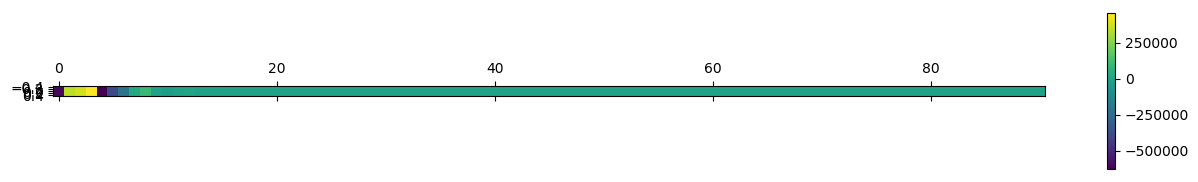

PyObject <matplotlib.colorbar.Colorbar object at 0x18e229048>

In [14]:
matshow([(transpose(my_b)) * my_iBaO])
colorbar()

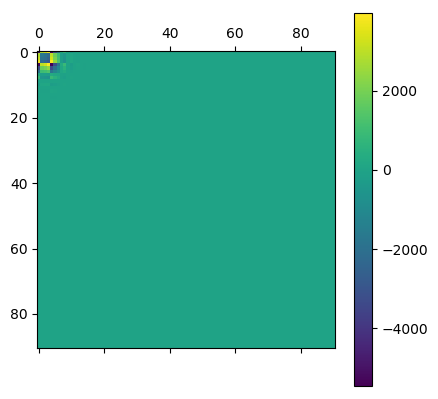

PyObject <matplotlib.colorbar.Colorbar object at 0x1a143f5c0>

In [15]:
matshow(my_iBaO)
colorbar()

In [16]:
transpose(my_b) * my_iBaO * my_b

-7.172716849452041e7

In [17]:
my_iBaO_good = [0.00343064 0.00360265 0.0060174 -0.000289153 -0.00265355 -0.00825449 -0.00409688 0.000809702 0.00033886 -6.02069e-5 -0.000383601 9.75382e-6 8.38712e-5 4.73412e-6 -4.24455e-5 -2.641e-6 5.53019e-6 -1.55269e-5 -7.9187e-6 6.35942e-6 2.36403e-6 -1.23511e-7 -2.19807e-6 2.30719e-7 1.30477e-6 1.64353e-7 -6.22025e-7 2.81669e-7 -4.2992e-7 -3.97903e-7 -6.544e-7 2.92492e-7 3.41906e-7 -2.33819e-8 -3.13266e-7 2.0843e-8 2.17117e-7 3.60516e-8 -1.58864e-7 1.46509e-8 1.20511e-7 -1.21631e-8 -9.25177e-8 5.0369e-8 9.75461e-8 -1.65787e-8 -6.9614e-8 7.75308e-9 5.87147e-8 4.47132e-10 -5.67276e-8 -4.44267e-9 4.02231e-8 -4.19517e-10 -1.66142e-8 1.57783e-8 2.13631e-8 -6.42033e-9 -1.68175e-8 2.72262e-9 1.56436e-8 -1.26125e-9 -1.40926e-8 -2.42695e-9 6.64486e-9 -2.97479e-9 -1.1198e-9 3.16279e-9 9.40704e-9 -1.89864e-9 -7.36528e-9 1.01478e-9 6.43236e-9 -9.20869e-10 -5.53369e-9 -1.68992e-9 4.85806e-9 -7.36468e-10 -4.32149e-9 6.56189e-10 3.85775e-9 -9.03946e-10 -3.69749e-9 5.11525e-10 3.1944e-9 -5.06639e-10 -3.2974e-9 -2.64842e-10 3.31075e-9 1.13439e-10 -2.18228e-9; 0.00360265 0.000137375 -0.00185407 -0.00289132 0.00309451 0.00257319 0.000899305 -0.00107344 -0.00193413 7.00839e-5 0.00030632 -1.86726e-5 -9.27279e-5 -3.36907e-6 4.86564e-5 -3.16883e-6 -1.51322e-5 1.41606e-5 -1.13736e-6 -5.89575e-6 -7.39975e-6 5.40716e-7 2.38606e-6 -3.72217e-7 -1.65164e-6 2.22514e-7 8.82204e-7 -1.63921e-7 -3.38997e-7 4.70822e-7 2.69143e-8 -8.33545e-8 -5.30425e-7 1.35759e-8 3.70162e-7 -1.36181e-8 -2.57016e-7 1.33316e-8 1.88153e-7 5.2792e-8 -1.42916e-7 1.37199e-8 1.09428e-7 -2.20649e-8 -9.60868e-8 1.85809e-8 9.59427e-8 -7.24646e-9 -6.86099e-8 3.67228e-9 6.41581e-8 6.18909e-9 -4.92482e-8 4.44584e-9 2.88889e-8 -1.40352e-8 -1.75377e-8 5.89066e-9 2.31868e-8 -2.71173e-9 -1.89963e-8 1.2436e-9 1.66212e-8 -1.2128e-9 -9.46052e-9 1.28784e-9 7.91239e-9 -3.03141e-9 -7.06062e-9 8.41516e-10 9.17586e-9 -6.71628e-10 -7.69072e-9 1.24344e-10 6.62024e-9 -6.2492e-10 -5.81363e-9 -1.00116e-9 5.17456e-9 -5.64209e-10 -4.61043e-9 5.57923e-10 4.25908e-9 -3.7723e-10 -3.80898e-9 2.86927e-10 3.59904e-9 -1.55004e-10 -3.73041e-9 -2.31177e-10 2.73361e-9; 0.0060174 -0.00185407 0.00438859 -0.00706197 0.00830347 0.000547435 0.00217043 -0.000663299 -0.00146524 0.000118364 0.000311628 -1.20251e-6 -7.15046e-5 -4.94559e-6 3.26584e-5 1.27648e-6 -3.4919e-7 1.77431e-6 -1.8783e-6 -6.95149e-7 -7.51726e-6 -9.29611e-8 3.06605e-6 7.50098e-8 -1.61828e-6 -4.62004e-7 9.91668e-7 -7.94912e-7 7.66493e-8 3.4828e-7 1.14548e-7 -3.71481e-8 -4.13925e-7 1.97053e-8 3.26631e-7 -9.88513e-9 -2.23347e-7 7.52911e-9 1.6317e-7 -5.82952e-9 -5.8833e-8 1.18264e-8 8.85143e-8 -6.69668e-9 -8.89045e-8 9.79379e-9 7.97341e-8 -3.97857e-9 -5.75868e-8 -2.50265e-9 5.06971e-8 6.3635e-9 -3.59692e-8 -1.00366e-9 1.50307e-8 -1.72152e-9 -1.52936e-8 5.61501e-10 2.12661e-8 6.71676e-11 -1.67415e-8 -1.40851e-9 1.48942e-8 4.82725e-9 -1.01044e-8 6.99366e-9 3.53118e-9 -2.55717e-9 -6.33775e-9 6.56923e-10 7.5913e-9 -4.87713e-10 -6.47519e-9 4.0894e-10 6.09816e-9 -3.52927e-10 -4.86819e-9 3.08662e-10 2.75049e-9 -3.907e-10 -3.74588e-9 2.82863e-10 3.58566e-9 -2.61073e-10 -3.14815e-9 6.02256e-10 3.137e-9 4.91188e-10 -2.79438e-9 -3.60302e-10 2.00964e-9; -0.000289153 -0.00289132 -0.00706197 0.00358911 0.000933657 0.00745654 0.000836494 -0.000997488 -0.00126473 -0.000219537 0.000405106 3.90599e-5 -0.000113612 -2.77033e-5 4.47206e-5 1.83096e-5 -1.737e-5 1.17448e-6 7.05031e-6 -4.51324e-8 -8.60402e-6 -1.57774e-6 4.31275e-6 7.26955e-7 -2.62006e-6 -7.99347e-7 1.28831e-6 6.00661e-7 -6.04493e-7 6.89884e-7 7.75975e-7 -3.28567e-7 -7.94419e-7 1.12865e-7 5.42386e-7 -1.90599e-8 -3.78684e-7 8.9788e-9 2.76363e-7 -3.49228e-9 -2.08603e-7 8.3215e-8 1.62192e-7 -3.47604e-8 -1.35611e-7 6.95933e-9 1.21819e-7 8.69696e-10 -9.40542e-8 -4.96575e-10 8.50998e-8 2.0383e-8 -5.45523e-8 -1.37576e-8 4.29003e-8 -1.45947e-9 -3.55817e-8 -7.64541e-10 3.42718e-8 1.81147e-9 -2.82544e-8 -4.64162e-9 2.49553e-8 3.9051e-9 -1.40558e-8 -1.82045e-9 1.28684e-8 -5.55101e-9 -1.47819e-8 2.22732e-9 1.37797e-8 -8.99723e-10 -1.14775e-8 5.94697e-10 9.83172e-9 -4.20881e-10 -8.57945e-9 3.12914e-10 7.57823e-9 -1.55548e-9 -6.75763e-9 5.31166e-10 6.11226e-9 -3.18316e-10 -5.41045e-9 3.17249e-10 4.99376e-9 6.28429e-11 -5.17664e-9 -9.92971e-10 3.39466e-9; -0.00265355 0.00309451 0.00830347 0.000933657 0.00261885 -0.0120186 0.000708181 0.00144324 0.00111628 9.56782e-5 -0.000172347 -1.11939e-5 2.00669e-5 1.7635e-5 -5.25924e-6 -2.45518e-5 -2.79215e-5 -6.28775e-6 8.90573e-6 2.33358e-6 4.789e-6 1.50296e-6 -1.95169e-6 -3.84274e-7 3.5422e-7 3.79501e-7 2.20136e-8 -2.44782e-7 -6.77591e-7 -8.09659e-7 3.75616e-7 4.49358e-7 1.14341e-7 -3.39235e-8 -1.33049e-7 2.08035e-8 4.05459e-8 -1.39122e-8 -2.93722e-8 9.6114e-9 2.18228e-8 -8.06804e-9 6.60421e-8 6.34528e-8 1.11066e-8 -1.79844e-8 -2.3133e-8 5.78626e-9 1.22696e-8 -8.53282e-9 -1.79847e-8 -1.79967e-8 5.09386e-10 2.13561e-8 2.49192e-8 5.45673e-9 -5.80803e-9 -1.03151e-9 -4.80472e-9 -9.96911e-10 2.57505e-9 4.17448e-9 -3.5407e-9 -4.99027e-10 -2.59278e-9 -3.17106e-10 5.58738e-9 6.01007e-9 -1.87085e-9 -2.58346e-9 -8.11473e-10 1.01531e-9 5.89268e-10 -7.9372e-10 -5.03448e-10 6.52135e-10 4.41291e-10 -5.52476e-10 -3.91539e-10 5.08606e-10 -9.37909e-10 -9.27218e-10 -3.3254e-10 4.963e-10 3.51579e-10 -5.31277e-10 -6.8853e-10 4.65685e-10 9.59475e-10 9.77497e-10 2.44902e-10; -0.00825449 0.00257319 0.000547435 0.00745654 -0.0120186 0.00407143 -0.00462236 0.000448561 0.00337695 4.14527e-5 -0.000859413 -3.02809e-5 0.000247598 2.75562e-5 -0.000129465 -1.68536e-5 3.40688e-5 -1.42577e-5 -1.33817e-5 5.422e-6 1.8737e-5 1.25247e-6 -9.21207e-6 -4.52103e-7 5.53112e-6 9.83214e-7 -3.37171e-6 3.44517e-7 1.37535e-6 -3.96466e-7 -1.34228e-6 5.07079e-7 1.6075e-6 -5.03752e-8 -1.1692e-6 2.54235e-8 8.10375e-7 -1.55048e-8 -5.91755e-7 9.54463e-9 4.47696e-7 -1.3393e-8 -3.37927e-7 6.6349e-8 3.04851e-7 -5.87159e-9 -2.68076e-7 1.78638e-9 2.02771e-7 8.21945e-9 -1.71244e-7 -1.96947e-8 1.53274e-7 1.06868e-8 -8.83943e-8 1.42029e-8 7.44903e-8 -4.26016e-9 -7.34393e-8 3.54197e-10 6.0546e-8 2.59154e-9 -4.96093e-8 -8.07708e-9 3.8862e-8 -5.2846e-9 -2.84177e-8 4.03067e-9 3.00623e-8 -3.00766e-9 -2.93737e-8 1.20641e-9 2.47174e-8 -9.14135e-10 -2.11847e-8 7.26787e-10 1.85065e-8 -5.94407e-10 -1.63769e-8 6.24716e-10 1.44445e-8 -9.5664e-10 -1.33264e-8 4.69993e-10 1.1714e-8 -7.23296e-10 -1.07841e-8 -8.17717e-10 9.93884e-9 8.47088e-10 -9.10441e-9; -0.00409688 0.000899305 0.00217043 0.000836494 0.000708181 -0.00462236 0.00683524 0.000959231 0.0030987 -6.5178e-6 -0.000643316 2.81811e-6 0.000202181 6.17949e-6 -9.97736e-5 -2.87381e-7 3.73155e-5 -4.78146e-6 -1.93877e-5 1.92669e-6 1.17439e-5 -8.93133e-9 -7.01494e-6 -1.15824e-8 4.59532e-6 1.03563e-8 -2.8635e-6 5.72146e-8 1.37324e-6 -4.79434e-7 -8.84104e-7 1.66212e-7 1.07501e-6 -1.28968e-8 -9.30472e-7 9.55332e-9 6.52768e-7 -7.60664e-9 -4.77817e-7 6.11631e-9 3.62347e-7 -5.92472e-9 -2.84758e-7 2.6629e-8 2.79715e-7 -1.2738e-8 -2.22477e-7 3.90858e-9 1.67573e-7 -4.69735e-9 -1.44203e-7 -7.64339e-9 1.16209e-7 -1.67123e-10 -7.99115e-8 4.51447e-9 6.75242e-8 -1.59159e-9 -5.80507e-8 3.38905e-10 4.99781e-8 1.10006e-9 -4.28115e-8 7.30041e-10 3.19236e-8 -1.0878e-9 -2.45723e-8 3.20414e-9 2.30226e-8 -1.01016e-9 -2.30166e-8 4.70264e-10 2.00117e-8 -4.06552e-10 -1.72209e-8 3.56561e-10 1.50963e-8 -3.15345e-10 -1.34017e-8 2.97975e-10 1.20288e-8 -4.39479e-10 -1.12393e-8 2.50392e-10 9.72644e-9 -2.72252e-10 -8.95032e-9 2.72959e-10 8.36497e-9 3.97758e-10 -6.93349e-9; 0.000809702 -0.00107344 -0.000663299 -0.000997488 0.00144324 0.000448561 0.000959231 0.00527039 -0.000480586 -1.93342e-5 0.000174802 6.28063e-6 -5.1629e-5 -6.35036e-6 2.36634e-5 3.04619e-6 -9.28724e-6 3.87629e-6 3.28624e-6 -1.50191e-6 -4.28967e-6 -2.18119e-7 2.07654e-6 6.31822e-8 -1.26506e-6 -1.40083e-7 7.21413e-7 1.27433e-8 -3.95613e-7 9.94306e-8 4.32469e-7 -2.80982e-8 -3.64043e-7 7.78183e-9 2.62075e-7 -3.81836e-9 -1.82349e-7 2.18079e-9 1.32975e-7 -1.17559e-9 -1.00357e-7 1.61092e-9 7.67699e-8 -2.35211e-9 -6.74994e-8 1.16118e-9 5.67836e-8 3.04701e-10 -4.42303e-8 -2.06702e-9 3.70962e-8 4.48179e-9 -3.05963e-8 -1.66993e-9 2.22224e-8 -3.8112e-9 -1.7434e-8 1.21103e-9 1.67922e-8 -2.43202e-10 -1.36278e-8 -3.01507e-10 1.12547e-8 1.18361e-9 -8.42158e-9 2.74154e-10 7.1895e-9 -8.19516e-10 -7.57415e-9 3.02188e-10 6.67922e-9 -1.77396e-10 -5.60468e-9 1.31396e-10 4.79298e-9 -1.02224e-10 -4.1759e-9 8.02824e-11 3.68381e-9 -8.21484e-11 -3.25801e-9 7.38459e-11 2.97202e-9 -5.5622e-11 -2.59908e-9 6.19776e-11 2.33829e-9 1.51507e-10 -2.22304e-9 -1.76236e-10 1.91184e-9; 0.00033886 -0.00193413 -0.00146524 -0.00126473 0.00111628 0.00337695 0.0030987 -0.000480586 0.0044403 3.47132e-5 0.000228873 -3.75532e-6 -6.30939e-5 9.97654e-7 2.9587e-5 6.26033e-6 -6.44618e-6 3.60863e-6 2.49767e-6 -1.45793e-6 -5.18442e-6 -2.85557e-7 2.50698e-6 7.43727e-9 -1.49235e-6 -6.22598e-8 9.08998e-7 -2.04183e-7 -2.34561e-7 2.37476e-7 2.66884e-7 -1.18009e-7 -3.36198e-7 8.07211e-9 2.90093e-7 -5.79903e-9 -2.02885e-7 4.80677e-9 1.48644e-7 -3.93175e-9 -1.12795e-7 4.6933e-9 8.74496e-8 -1.93196e-8 -8.68285e-8 7.28255e-9 6.97073e-8 -3.01054e-9 -5.2878e-8 2.71116e-9 4.68719e-8 3.13758e-10 -3.39037e-8 -5.8083e-9 2.00033e-8 -3.08078e-9 -1.80344e-8 9.49693e-10 1.89784e-8 -2.77044e-11 -1.57316e-8 -4.23757e-10 1.39227e-8 2.6966e-10 -9.47623e-9 1.98637e-9 5.83463e-9 -1.65143e-9 -6.91853e-9 6.67258e-10 7.02295e-9 -2.89567e-10 -6.11774e-9 2.5333e-10 5.27536e-9 -2.25317e-10 -4.63275e-9 2.00177e-10 4.11965e-9 -2.04592e-10 -3.6858e-9 3.0256e-10 3.4708e-9 -1.68373e-10 -3.02112e-9 2.53625e-10 2.88667e-9 -9.27296e-11 -2.69662e-9 -5.42889e-11 1.98521e-9; -6.02069e-5 7.00839e-5 0.000118364 -0.000219537 9.56782e-5 4.14527e-5 -6.5178e-6 -1.93342e-5 3.47132e-5 0.00222113 -1.59318e-5 -6.2878e-7 5.20767e-6 5.02095e-7 -1.83598e-6 -1.04866e-7 9.11521e-7 -1.02895e-7 -8.61586e-7 3.65057e-8 4.18281e-7 1.19388e-8 -3.01652e-7 -5.25073e-9 1.69706e-7 4.30053e-9 -9.88466e-8 -1.51618e-8 7.46522e-8 7.30614e-9 -6.42084e-8 -7.42216e-10 4.8652e-8 2.99788e-11 -3.2306e-8 -8.71381e-12 2.26636e-8 8.05011e-11 -1.64986e-8 -1.14431e-10 1.24039e-8 3.43756e-10 -9.70641e-9 -3.34954e-10 7.69036e-9 3.26356e-10 -6.60737e-9 -1.59099e-10 5.18227e-9 1.84121e-10 -4.05197e-9 -3.23989e-10 3.20293e-9 2.14072e-11 -2.79957e-9 1.14239e-10 2.68519e-9 -3.14322e-11 -2.11091e-9 6.01643e-12 1.72749e-9 1.49865e-11 -1.41217e-9 -2.58855e-11 1.16245e-9 1.07857e-10 -1.10647e-9 -3.64901e-11 1.01388e-9 1.32931e-12 -8.52609e-10 -1.29967e-12 7.05907e-10 3.03079e-12 -6.02111e-10 -3.77349e-12 5.22578e-10 4.207e-12 -4.58789e-10 -7.71194e-12 4.07761e-10 5.88794e-12 -3.61124e-10 -3.90979e-12 3.1659e-10 8.78562e-12 -2.71775e-10 -7.1645e-12 2.49812e-10 1.17666e-11 -2.21272e-10; -0.000383601 0.00030632 0.000311628 0.000405106 -0.000172347 -0.000859413 -0.000643316 0.000174802 0.000228873 -1.59318e-5 0.00216958 2.18102e-6 1.2595e-5 -4.73507e-7 -5.98328e-6 -6.95524e-7 4.0263e-8 -1.02477e-6 -1.54834e-7 4.25043e-7 1.18328e-6 1.06448e-8 -5.70499e-7 1.42698e-8 3.09101e-7 -5.05499e-9 -1.89533e-7 7.7798e-8 2.81287e-8 -8.15412e-8 -3.43851e-8 2.88907e-8 6.51475e-8 -1.92389e-9 -5.72054e-8 1.61744e-9 4.01047e-8 -1.49355e-9 -2.9431e-8 1.32204e-9 2.23718e-8 -1.5991e-9 -1.74311e-8 5.23853e-9 1.74296e-8 -2.66234e-9 -1.42664e-8 1.07078e-9 1.06875e-8 -1.11578e-9 -9.70006e-9 -2.04467e-10 6.69583e-9 7.36062e-10 -2.79909e-9 8.77697e-10 3.28428e-9 -3.09045e-10 -3.86826e-9 5.73028e-11 3.16941e-9 1.00686e-10 -2.8595e-9 1.09609e-10 1.85262e-9 -6.801e-10 -9.48487e-10 5.30655e-10 1.22915e-9 -1.68818e-10 -1.36011e-9 8.18505e-11 1.19305e-9 -7.60988e-11 -1.03213e-9 7.001e-11 9.09046e-10 -6.38996e-11 -8.10698e-10 6.56448e-11 7.2845e-10 -8.83287e-11 -6.89219e-10 5.19352e-11 6.02977e-10 -7.86499e-11 -5.90729e-10 5.03975e-11 5.51069e-10 2.34992e-11 -3.80375e-10; 9.75382e-6 -1.86726e-5 -1.20251e-6 3.90599e-5 -1.11939e-5 -3.02809e-5 2.81811e-6 6.28063e-6 -3.75532e-6 -6.2878e-7 2.18102e-6 0.00106939 -7.63944e-7 -4.03235e-8 2.61754e-7 -1.94617e-8 -1.90791e-7 4.11056e-9 1.30906e-7 -1.15713e-9 -6.68335e-8 3.06242e-10 4.47128e-8 1.8428e-10 -2.62304e-8 2.05775e-10 1.57884e-8 3.07792e-9 -1.30084e-8 -2.90565e-9 1.06589e-8 1.0021e-9 -7.45419e-9 -7.84487e-11 4.9948e-9 4.88136e-11 -3.5011e-9 -4.67544e-11 2.54699e-9 4.3942e-11 -1.91352e-9 -7.85813e-11 1.49073e-9 1.83715e-10 -1.18965e-9 -9.59688e-11 9.95994e-10 4.2105e-11 -7.85601e-10 -4.77343e-11 5.8885e-10 5.85028e-12 -4.94757e-10 2.85474e-11 4.86982e-10 -7.56482e-12 -4.17845e-10 2.67411e-12 3.29731e-10 -2.66309e-12 -2.6676e-10 7.41436e-12 2.14175e-10 1.05394e-12 -1.90568e-10 -2.69055e-11 1.84753e-10 1.87404e-11 -1.62367e-10 -5.60573e-12 1.3275e-10 2.5391e-12 -1.09972e-10 -2.37573e-12 9.36868e-11 2.19161e-12 -8.12065e-11 -2.05968e-12 7.12003e-11 2.5325e-12 -6.30849e-11 -3.01508e-12 5.58467e-11 1.83272e-12 -4.87141e-11 -3.10355e-12 4.09468e-11 1.89887e-12 -3.64805e-11 6.41069e-13 3.49775e-11; 8.38712e-5 -9.27279e-5 -7.15046e-5 -0.000113612 2.00669e-5 0.000247598 0.000202181 -5.1629e-5 -6.30939e-5 5.20767e-6 1.2595e-5 -7.63944e-7 0.00106595 2.61675e-7 1.58019e-6 1.30073e-7 -3.26677e-8 3.13149e-7 3.68255e-8 -1.3106e-7 -3.12824e-7 2.70937e-9 1.49257e-7 -6.49839e-9 -8.21593e-8 4.37069e-9 5.09162e-8 -2.38015e-8 -7.05792e-9 2.34679e-8 7.59101e-9 -8.09218e-9 -1.603e-8 4.60639e-10 1.50135e-8 -4.33833e-10 -1.05494e-8 4.24994e-10 7.74866e-9 -3.88274e-10 -5.89661e-9 4.71666e-10 4.62476e-9 -1.52671e-9 -4.76114e-9 7.98047e-10 3.80101e-9 -3.23014e-10 -2.84244e-9 3.42276e-10 2.59689e-9 -4.68273e-11 -1.74296e-9 -1.55625e-10 7.49574e-10 -2.68363e-10 -8.59905e-10 9.85202e-11 1.02108e-9 -2.40092e-11 -8.40214e-10 -9.34948e-12 7.67314e-10 -5.07305e-11 -4.90818e-10 1.99322e-10 2.42852e-10 -1.48772e-10 -3.13351e-10 4.54934e-11 3.53483e-10 -2.21189e-11 -3.13543e-10 2.12596e-11 2.71675e-10 -1.99216e-11 -2.39626e-10 1.83702e-11 2.14013e-10 -1.89166e-11 -1.92976e-10 2.54654e-11 1.83758e-10 -1.46927e-11 -1.60137e-10 2.21364e-11 1.57658e-10 -1.61154e-11 -1.46999e-10 -1.59399e-12 9.83494e-11; 4.73412e-6 -3.36907e-6 -4.94559e-6 -2.77033e-5 1.7635e-5 2.75562e-5 6.17949e-6 -6.35036e-6 9.97654e-7 5.02095e-7 -4.73507e-7 -4.03235e-8 2.61675e-7 0.000577164 -7.63159e-8 3.46912e-8 9.73153e-8 1.47148e-8 -7.81509e-8 -5.96095e-9 2.05909e-8 -1.65838e-9 -1.87238e-8 3.70687e-10 1.11056e-8 -1.30891e-9 -7.01072e-9 -3.13617e-9 7.70182e-9 3.16901e-9 -4.65196e-9 -1.00673e-9 3.33306e-9 1.12076e-10 -2.06596e-9 -7.01944e-11 1.4556e-9 5.68948e-11 -1.05675e-9 -4.68497e-11 7.91377e-10 6.74735e-11 -6.26017e-10 -1.68186e-10 4.49949e-10 9.21057e-11 -3.96108e-10 -3.69238e-11 3.0764e-10 2.99437e-11 -2.04863e-10 4.06847e-11 2.01665e-10 -3.50514e-11 -2.31196e-10 -1.15918e-11 1.99886e-10 3.13999e-12 -1.36478e-10 1.73839e-12 1.11178e-10 -1.17208e-11 -8.47752e-11 8.46376e-12 8.87903e-11 2.98835e-11 -9.69791e-11 -2.18842e-11 7.04095e-11 6.89358e-12 -5.71576e-11 -3.51501e-12 4.66549e-11 3.0323e-12 -3.96126e-11 -2.66695e-12 3.41995e-11 2.38465e-12 -2.98501e-11 -2.62039e-12 2.64928e-11 3.12646e-12 -2.28158e-11 -2.0668e-12 1.99255e-11 3.48594e-12 -1.5511e-11 -6.25723e-13 1.30963e-11 -2.63297e-12 -1.52622e-11; -4.24455e-5 4.86564e-5 3.26584e-5 4.47206e-5 -5.25924e-6 -0.000129465 -9.97736e-5 2.36634e-5 2.9587e-5 -1.83598e-6 -5.98328e-6 2.61754e-7 1.58019e-6 -7.63159e-8 0.000576482 -1.72741e-7 -5.13439e-8 -7.86122e-8 -2.73872e-8 3.27617e-8 1.658e-7 6.63873e-9 -8.4225e-8 3.20106e-10 4.41865e-8 1.13307e-9 -2.8029e-8 9.488e-9 5.23202e-9 -1.12834e-8 -5.01103e-9 4.42119e-9 8.30807e-9 -2.78115e-10 -7.6908e-9 2.23621e-10 5.41177e-9 -1.98011e-10 -3.97358e-9 1.71246e-10 3.02019e-9 -1.98416e-10 -2.36849e-9 7.65266e-10 2.40974e-9 -3.55486e-10 -1.90433e-9 1.47916e-10 1.43031e-9 -1.61326e-10 -1.27505e-9 -2.14991e-11 8.40535e-10 1.7959e-10 -3.51757e-10 6.00505e-11 4.65113e-10 -1.83341e-11 -5.38341e-10 -3.47424e-12 4.374e-10 2.55624e-11 -3.97463e-10 3.74676e-12 2.70441e-10 -8.80961e-11 -1.36335e-10 7.49768e-11 1.67184e-10 -2.52171e-11 -1.82057e-10 1.13558e-11 1.61296e-10 -1.02383e-11 -1.39694e-10 9.28175e-12 1.23079e-10 -8.41853e-12 -1.09762e-10 8.55065e-12 9.88648e-11 -1.24095e-11 -9.37279e-11 7.27339e-12 8.16184e-11 -1.11685e-11 -7.97206e-11 6.73597e-12 7.21416e-11 3.64702e-12 -4.8909e-11; -2.641e-6 -3.16883e-6 1.27648e-6 1.83096e-5 -2.45518e-5 -1.68536e-5 -2.87381e-7 3.04619e-6 6.26033e-6 -1.04866e-7 -6.95524e-7 -1.94617e-8 1.30073e-7 3.46912e-8 -1.72741e-7 0.000338331 2.88588e-8 -7.1651e-8 3.07094e-8 2.87118e-8 -1.71835e-8 -9.89453e-11 1.52567e-8 3.05992e-10 -6.40998e-9 6.28824e-10 4.18518e-9 9.84647e-10 -5.69456e-9 -1.61053e-9 4.3257e-9 6.4607e-10 -9.48811e-10 -8.48851e-11 6.35444e-10 5.07168e-11 -4.65503e-10 -3.82344e-11 3.34987e-10 2.92996e-11 -2.44306e-10 -4.04963e-11 2.03675e-10 9.80971e-11 -1.29139e-10 -4.01973e-11 3.29249e-11 7.34137e-12 -5.16265e-11 1.616e-11 -1.40137e-11 -1.83498e-11 4.74115e-11 -1.05801e-11 6.46614e-11 6.935e-11 -9.4776e-11 -2.469e-11 6.68859e-11 8.02324e-12 -4.43408e-11 -4.86939e-12 3.46254e-11 -7.6366e-12 -4.66924e-11 -1.00303e-11 5.62175e-11 1.14489e-11 -3.93809e-11 -4.47606e-12 1.91624e-11 2.40144e-12 -1.59868e-11 -2.07303e-12 1.34395e-11 1.79224e-12 -1.13617e-11 -1.55425e-12 9.62995e-12 1.62395e-12 -8.52188e-12 -1.79179e-12 6.78587e-12 9.64085e-13 -5.50365e-12 -1.0983e-12 2.69549e-12 -1.25544e-12 -4.88284e-13 2.72241e-13 1.28408e-12; 5.53019e-6 -1.51322e-5 -3.4919e-7 -1.737e-5 -2.79215e-5 3.40688e-5 3.73155e-5 -9.28724e-6 -6.44618e-6 9.11521e-7 4.0263e-8 -1.90791e-7 -3.26677e-8 9.73153e-8 -5.13439e-8 2.88588e-8 0.000338419 -8.90959e-9 -4.28432e-8 2.33961e-9 -4.22826e-8 3.37897e-10 1.66014e-8 -1.0917e-9 -7.53077e-9 1.89509e-9 5.92312e-9 -3.40526e-9 -1.61798e-9 4.00511e-9 -1.83748e-9 -1.01014e-9 3.49827e-10 2.03759e-11 5.91728e-10 -4.08718e-11 -4.51637e-10 5.24992e-11 3.40329e-10 -5.45193e-11 -2.63478e-10 7.24838e-11 2.37431e-10 -2.19723e-10 -3.51885e-10 1.43879e-10 2.06397e-10 -6.37817e-11 -1.36765e-10 9.8923e-11 1.21617e-10 -3.17156e-11 1.60002e-11 -4.88823e-11 -2.26295e-11 1.64468e-11 -1.85211e-11 -5.27035e-12 7.75002e-11 3.5809e-12 -5.35909e-11 -7.41522e-12 6.06547e-11 -2.29501e-11 -4.33367e-11 2.70884e-11 1.1989e-11 -2.36015e-11 2.33755e-12 4.96908e-12 1.02092e-11 -2.28637e-12 -1.27584e-11 2.45536e-12 1.16361e-11 -2.4609e-12 -1.06303e-11 2.3869e-12 9.76508e-12 -2.61274e-12 -9.48886e-12 3.59978e-12 9.94771e-12 -2.21137e-12 -8.23958e-12 3.40634e-12 8.67339e-12 -5.46371e-12 -6.02802e-12 -5.22256e-15 -5.17227e-13; -1.55269e-5 1.41606e-5 1.77431e-6 1.17448e-6 -6.28775e-6 -1.42577e-5 -4.78146e-6 3.87629e-6 3.60863e-6 -1.02895e-7 -1.02477e-6 4.11056e-9 3.13149e-7 1.47148e-8 -7.86122e-8 -7.1651e-8 -8.90959e-9 0.000211248 -2.61932e-8 -1.16867e-8 5.03826e-8 4.3085e-9 -2.85045e-8 -1.19534e-9 1.41633e-8 1.74124e-9 -8.88367e-9 1.19996e-9 5.28895e-9 -2.06859e-9 -3.93872e-9 5.71234e-10 3.32828e-9 -6.35544e-11 -2.33366e-9 4.03423e-11 1.63579e-9 -2.80855e-11 -1.19334e-9 2.03134e-11 8.98221e-10 -1.80805e-11 -6.89329e-10 8.38036e-11 5.76669e-10 -5.13927e-11 -4.86759e-10 2.25689e-11 3.75009e-10 -2.55111e-11 -2.87867e-10 -3.37664e-11 1.96537e-10 7.29212e-11 -1.46945e-10 -2.96303e-11 1.72918e-10 1.28931e-11 -1.7155e-10 -8.1632e-12 1.31904e-10 1.58953e-11 -1.11696e-10 -1.02115e-11 9.44958e-11 -1.48419e-11 -7.49299e-11 1.48746e-11 6.73206e-11 -4.28741e-12 -5.9856e-11 2.05278e-12 5.03017e-11 -1.58732e-12 -4.30865e-11 1.31651e-12 3.74986e-11 -1.13693e-12 -3.29956e-11 1.095e-12 2.91705e-11 -1.64193e-12 -2.6256e-11 1.27961e-12 2.30374e-11 -2.28521e-12 -2.02879e-11 5.0555e-13 1.72572e-11 2.52522e-12 -1.41385e-11; -7.9187e-6 -1.13736e-6 -1.8783e-6 7.05031e-6 8.90573e-6 -1.33817e-5 -1.93877e-5 3.28624e-6 2.49767e-6 -8.61586e-7 -1.54834e-7 1.30906e-7 3.68255e-8 -7.81509e-8 -2.73872e-8 3.07094e-8 -4.28432e-8 -2.61932e-8 0.000211212 1.16619e-8 7.62936e-10 -3.38608e-9 -4.15147e-9 1.70586e-9 1.56708e-9 -1.74604e-9 -1.60821e-9 3.38803e-9 -4.67544e-10 -1.13018e-9 9.53733e-10 3.05639e-10 -4.70501e-10 2.20431e-11 -1.08154e-10 1.01052e-11 8.7601e-11 -2.49312e-11 -6.87277e-11 3.03372e-11 5.59396e-11 -3.88946e-11 -5.59358e-11 9.68784e-11 1.34959e-10 -6.33419e-11 -6.20478e-11 3.11475e-11 4.16982e-11 -3.49854e-11 -4.25845e-11 4.82467e-11 2.08505e-11 -1.96665e-11 3.43727e-11 2.15753e-11 1.45376e-11 -9.88594e-12 -1.03769e-11 4.82293e-12 1.2033e-11 -7.55242e-12 -1.41633e-11 1.22766e-11 1.09646e-11 -2.32668e-11 5.39114e-12 5.30993e-12 -4.68878e-12 -9.40605e-13 -2.10315e-13 6.29032e-13 2.19225e-12 -1.02377e-12 -2.17911e-12 1.16865e-12 2.13944e-12 -1.20059e-12 -2.09887e-12 1.27861e-12 2.21012e-12 -1.59689e-12 -2.829e-12 8.57393e-13 2.18284e-12 -1.65952e-12 -2.8202e-12 1.83226e-12 1.76437e-12 -1.98865e-12 -5.9817e-13; 6.35942e-6 -5.89575e-6 -6.95149e-7 -4.51324e-8 2.33358e-6 5.422e-6 1.92669e-6 -1.50191e-6 -1.45793e-6 3.65057e-8 4.25043e-7 -1.15713e-9 -1.3106e-7 -5.96095e-9 3.27617e-8 2.87118e-8 2.33961e-9 -1.16867e-8 1.16619e-8 0.000138586 -2.08585e-8 -1.7329e-9 1.18803e-8 4.83198e-10 -5.9268e-9 -6.9534e-10 3.71472e-9 -4.5572e-10 -2.25371e-9 8.04383e-10 1.68132e-9 -2.18897e-10 -1.39996e-9 2.44955e-11 9.79356e-10 -1.56119e-11 -6.86584e-10 1.07688e-11 5.00805e-10 -7.71008e-12 -3.7689e-10 6.4575e-12 2.89479e-10 -3.18537e-11 -2.41465e-10 1.9821e-11 2.03534e-10 -8.75176e-12 -1.57017e-10 1.00164e-11 1.2015e-10 1.34754e-11 -8.25622e-11 -2.92288e-11 6.30422e-11 1.22249e-11 -7.31558e-11 -5.29531e-12 7.1818e-11 3.30657e-12 -5.52854e-11 -6.36143e-12 4.67138e-11 4.07463e-12 -3.96897e-11 5.72558e-12 3.18049e-11 -5.79714e-12 -2.84667e-11 1.65987e-12 2.51687e-11 -7.95017e-13 -2.11378e-11 6.10833e-13 1.8101e-11 -5.04786e-13 -1.57495e-11 4.34723e-13 1.38547e-11 -4.13368e-13 -1.22496e-11 6.29533e-13 1.1014e-11 -4.96853e-13 -9.66036e-12 8.91506e-13 8.48247e-12 -1.96599e-13 -7.21676e-12 -1.00746e-12 5.95674e-12; 2.36403e-6 -7.39975e-6 -7.51726e-6 -8.60402e-6 4.789e-6 1.8737e-5 1.17439e-5 -4.28967e-6 -5.18442e-6 4.18281e-7 1.18328e-6 -6.68335e-8 -3.12824e-7 2.05909e-8 1.658e-7 -1.71835e-8 -4.22826e-8 5.03826e-8 7.62936e-10 -2.08585e-8 0.000138561 2.03181e-9 7.43194e-9 -1.10962e-9 -5.16196e-9 1.06918e-9 2.82033e-9 -1.63907e-9 1.53117e-10 1.88107e-9 5.362e-10 -5.88101e-10 -1.38241e-9 2.87684e-11 1.16205e-9 -3.35397e-11 -8.10637e-10 3.53341e-11 5.94617e-10 -3.31797e-11 -4.52885e-10 3.93339e-11 3.53205e-10 -1.18528e-10 -3.50117e-10 6.57359e-11 2.99633e-10 -2.28931e-11 -2.24332e-10 2.18341e-11 2.14902e-10 -9.75872e-12 -1.57441e-10 1.71421e-11 8.19236e-11 -4.65545e-11 -5.68579e-11 1.78209e-11 7.08136e-11 -6.62696e-12 -6.02351e-11 5.40419e-12 5.44823e-11 -8.76908e-12 -2.89642e-11 1.23786e-11 1.46737e-11 -1.12917e-11 -2.42615e-11 3.1843e-12 2.77229e-11 -1.68184e-12 -2.40455e-11 1.72264e-12 2.07712e-11 -1.65629e-12 -1.83079e-11 1.53536e-12 1.63588e-11 -1.54788e-12 -1.47216e-11 1.9843e-12 1.39421e-11 -1.04721e-12 -1.22579e-11 1.26872e-12 1.21914e-11 -1.321e-12 -1.23036e-11 5.4163e-13 8.42938e-12; -1.23511e-7 5.40716e-7 -9.29611e-8 -1.57774e-6 1.50296e-6 1.25247e-6 -8.93133e-9 -2.18119e-7 -2.85557e-7 1.19388e-8 1.06448e-8 3.06242e-10 2.70937e-9 -1.65838e-9 6.63873e-9 -9.89453e-11 3.37897e-10 4.3085e-9 -3.38608e-9 -1.7329e-9 2.03181e-9 9.46531e-5 -1.5501e-9 -2.5252e-11 7.46156e-10 -3.0446e-11 -4.72817e-10 -8.35562e-11 5.06937e-10 1.11524e-10 -3.84447e-10 -4.62198e-11 1.57939e-10 5.60016e-12 -1.05708e-10 -3.28586e-12 7.52643e-11 2.58181e-12 -5.45656e-11 -2.06596e-12 4.05824e-11 3.18976e-12 -3.2322e-11 -7.3257e-12 2.38592e-11 3.01849e-12 -1.5913e-11 -7.31935e-13 1.38863e-11 -6.02239e-13 -7.35857e-12 9.37683e-13 3.90386e-12 7.92186e-13 -9.95621e-12 -4.15025e-12 1.11359e-11 1.4901e-12 -8.53437e-12 -4.86963e-13 6.2993e-12 2.83214e-13 -5.03442e-12 3.84048e-13 5.40239e-12 7.93722e-13 -5.75138e-12 -7.77235e-13 4.42988e-12 3.02114e-13 -2.93077e-12 -1.571e-13 2.43635e-12 1.38229e-13 -2.06679e-12 -1.21022e-13 1.77592e-12 1.06606e-13 -1.53877e-12 -1.17278e-13 1.36241e-12 1.28526e-13 -1.16368e-12 -6.87169e-14 9.93193e-13 8.47605e-14 -7.28192e-13 5.68392e-14 5.28937e-13 -1.36942e-14 -5.45064e-13; -2.19807e-6 2.38606e-6 3.06605e-6 4.31275e-6 -1.95169e-6 -9.21207e-6 -7.01494e-6 2.07654e-6 2.50698e-6 -3.01652e-7 -5.70499e-7 4.47128e-8 1.49257e-7 -1.87238e-8 -8.4225e-8 1.52567e-8 1.66014e-8 -2.85045e-8 -4.15147e-9 1.18803e-8 7.43194e-9 -1.5501e-9 9.46498e-5 7.69389e-10 2.26241e-9 -7.19504e-10 -1.27886e-9 1.18915e-9 -2.34596e-10 -8.55929e-10 -1.68907e-10 2.70802e-10 5.68409e-10 -7.85903e-12 -5.23807e-10 1.49734e-11 3.65628e-10 -1.79523e-11 -2.68533e-10 1.78749e-11 2.04961e-10 -2.13224e-11 -1.60514e-10 6.03415e-11 1.67544e-10 -3.41297e-11 -1.38515e-10 1.28124e-11 1.03755e-10 -1.1212e-11 -1.00337e-10 1.17533e-11 7.72812e-11 -1.42639e-11 -3.30584e-11 2.62969e-11 2.79314e-11 -1.03157e-11 -3.03895e-11 4.14184e-12 2.71089e-11 -4.30405e-12 -2.4468e-11 5.1324e-12 1.30725e-11 -8.46273e-12 -5.20894e-12 4.88124e-12 1.04478e-11 -1.35831e-12 -1.22747e-11 7.60804e-13 1.08096e-11 -8.44722e-13 -9.35712e-12 8.41514e-13 8.2676e-12 -7.96319e-13 -7.40751e-12 8.0448e-13 6.68933e-12 -1.00948e-12 -6.41837e-12 5.18016e-13 5.61282e-12 -6.99865e-13 -5.67187e-12 6.58082e-13 5.67124e-12 -6.20592e-13 -4.02626e-12; 2.30719e-7 -3.72217e-7 7.50098e-8 7.26955e-7 -3.84274e-7 -4.52103e-7 -1.15824e-8 6.31822e-8 7.43727e-9 -5.25073e-9 1.42698e-8 1.8428e-10 -6.49839e-9 3.70687e-10 3.20106e-10 3.05992e-10 -1.0917e-9 -1.19534e-9 1.70586e-9 4.83198e-10 -1.10962e-9 -2.5252e-11 7.69389e-10 6.68314e-5 -3.99341e-10 3.44799e-12 2.51807e-10 3.13865e-11 -2.2434e-10 -3.13896e-11 1.61322e-10 1.60134e-11 -9.82139e-11 -1.78313e-12 6.51555e-11 9.54757e-13 -4.59558e-11 -7.84012e-13 3.34096e-11 6.58486e-13 -2.50172e-11 -1.24837e-12 1.95999e-11 2.61193e-12 -1.50613e-11 -9.37758e-13 1.20761e-11 2.76121e-13 -9.6508e-12 4.93242e-14 6.48153e-12 -2.44416e-13 -4.76091e-12 -4.54275e-13 5.85316e-12 1.1512e-12 -5.91622e-12 -4.21375e-13 4.76598e-12 1.44086e-13 -3.68215e-12 -8.20497e-14 2.97798e-12 -5.82292e-14 -2.89487e-12 -2.79786e-13 2.81347e-12 2.17715e-13 -2.25271e-12 -9.48149e-14 1.7541e-12 4.59847e-14 -1.45494e-12 -4.14485e-14 1.2389e-12 3.67506e-14 -1.0712e-12 -3.29706e-14 9.35705e-13 4.00699e-14 -8.28526e-13 -4.24782e-14 7.23762e-13 2.14249e-14 -6.28944e-13 -2.8123e-14 5.07328e-13 -7.98234e-15 -4.12954e-13 4.0024e-15 4.00687e-13; 1.30477e-6 -1.65164e-6 -1.61828e-6 -2.62006e-6 3.5422e-7 5.53112e-6 4.59532e-6 -1.26506e-6 -1.49235e-6 1.69706e-7 3.09101e-7 -2.62304e-8 -8.21593e-8 1.11056e-8 4.41865e-8 -6.40998e-9 -7.53077e-9 1.41633e-8 1.56708e-9 -5.9268e-9 -5.16196e-9 7.46156e-10 2.26241e-9 -3.99341e-10 6.68299e-5 3.88335e-10 8.67809e-10 -6.70842e-10 3.96967e-11 5.29578e-10 7.95322e-11 -1.6461e-10 -3.16706e-10 5.13597e-12 3.07222e-10 -8.79383e-12 -2.15392e-10 1.0389e-11 1.58316e-10 -1.03015e-11 -1.20824e-10 1.24542e-11 9.53104e-11 -3.59358e-11 -1.00746e-10 2.0506e-11 8.13697e-11 -7.90417e-12 -6.06341e-11 7.8578e-12 5.78001e-11 -6.18838e-12 -4.21268e-11 5.54814e-12 1.86602e-11 -1.28771e-11 -1.6534e-11 5.05202e-12 1.89817e-11 -1.96504e-12 -1.6466e-11 1.89681e-12 1.50583e-11 -2.99852e-12 -8.56944e-12 4.88548e-12 3.67258e-12 -3.06623e-12 -5.99448e-12 8.34165e-13 7.16605e-12 -4.50536e-13 -6.37649e-12 4.91398e-13 5.52857e-12 -4.86982e-13 -4.88782e-12 4.60673e-13 4.37982e-12 -4.69946e-13 -3.96663e-12 5.99171e-13 3.81054e-12 -3.17018e-13 -3.32095e-12 4.38011e-13 3.3352e-12 -4.49764e-13 -3.25734e-12 2.89349e-13 2.23308e-12; 1.64353e-7 2.22514e-7 -4.62004e-7 -7.99347e-7 3.79501e-7 9.83214e-7 1.03563e-8 -1.40083e-7 -6.22598e-8 4.30053e-9 -5.05499e-9 2.05775e-10 4.37069e-9 -1.30891e-9 1.13307e-9 6.28824e-10 1.89509e-9 1.74124e-9 -1.74604e-9 -6.9534e-10 1.06918e-9 -3.0446e-11 -7.19504e-10 3.44799e-12 3.88335e-10 4.85212e-5 -2.58157e-10 -3.9657e-11 2.48544e-10 7.34698e-11 -1.76093e-10 -3.60862e-11 9.19506e-11 3.54821e-12 -6.11936e-11 -2.09145e-12 4.3187e-11 1.58595e-12 -3.13505e-11 -1.24065e-12 2.3423e-11 1.76878e-12 -1.82699e-11 -5.52805e-12 1.39178e-11 1.94841e-12 -1.05009e-11 -6.06945e-13 8.57286e-12 2.41393e-13 -4.96573e-12 1.19816e-12 3.82303e-12 -3.16255e-13 -6.66655e-12 -1.65179e-12 5.88835e-12 5.64763e-13 -4.6173e-12 -1.36196e-13 3.49783e-12 -9.32266e-14 -2.77332e-12 1.46947e-13 3.05238e-12 4.48168e-13 -2.98291e-12 -5.27322e-13 2.28953e-12 2.19826e-13 -1.67661e-12 -1.01377e-13 1.38994e-12 8.62239e-14 -1.18073e-12 -7.43414e-14 1.01786e-12 6.52203e-14 -8.86155e-13 -7.00028e-14 7.80772e-13 8.95647e-14 -6.77511e-13 -4.84924e-14 5.83541e-13 6.2674e-14 -4.488e-13 -2.63352e-15 3.25313e-13 -5.32981e-14 -3.68369e-13; -6.22025e-7 8.82204e-7 9.91668e-7 1.28831e-6 2.20136e-8 -3.37171e-6 -2.8635e-6 7.21413e-7 9.08998e-7 -9.88466e-8 -1.89533e-7 1.57884e-8 5.09162e-8 -7.01072e-9 -2.8029e-8 4.18518e-9 5.92312e-9 -8.88367e-9 -1.60821e-9 3.71472e-9 2.82033e-9 -4.72817e-10 -1.27886e-9 2.51807e-10 8.67809e-10 -2.58157e-10 4.85207e-5 3.77399e-10 -1.90226e-11 -2.97427e-10 -5.15167e-11 9.93935e-11 1.91987e-10 -2.21376e-12 -1.87505e-10 4.89501e-12 1.31545e-10 -5.97884e-12 -9.66713e-11 6.00328e-12 7.37796e-11 -7.04799e-12 -5.84475e-11 2.16939e-11 6.18188e-11 -1.18292e-11 -4.97017e-11 4.55015e-12 3.70465e-11 -4.65314e-12 -3.50441e-11 4.23731e-12 2.66163e-11 -3.70429e-12 -1.24611e-11 8.10189e-12 1.05462e-11 -3.1797e-12 -1.13272e-11 1.25668e-12 9.9845e-12 -1.31058e-12 -9.04255e-12 2.00693e-12 5.35264e-12 -2.68212e-12 -2.34348e-12 1.69412e-12 3.71069e-12 -4.78056e-13 -4.39426e-12 2.51033e-13 3.91018e-12 -2.80215e-13 -3.38858e-12 2.80258e-13 2.99501e-12 -2.66196e-13 -2.68318e-12 2.67942e-13 2.43328e-12 -3.51761e-13 -2.33507e-12 1.78601e-13 2.03164e-12 -2.3599e-13 -2.03272e-12 2.81806e-13 1.96918e-12 -2.07162e-13 -1.41234e-12; 2.81669e-7 -1.63921e-7 -7.94912e-7 6.00661e-7 -2.44782e-7 3.44517e-7 5.72146e-8 1.27433e-8 -2.04183e-7 -1.51618e-8 7.7798e-8 3.07792e-9 -2.38015e-8 -3.13617e-9 9.488e-9 9.84647e-10 -3.40526e-9 1.19996e-9 3.38803e-9 -4.5572e-10 -1.63907e-9 -8.35562e-11 1.18915e-9 3.13865e-11 -6.70842e-10 -3.9657e-11 3.77399e-10 3.6074e-5 -2.49357e-10 7.13773e-12 2.36461e-10 -1.65144e-11 -1.98857e-10 1.87989e-12 1.32515e-10 -1.13557e-12 -9.28312e-11 4.99391e-13 6.76313e-11 -1.4462e-13 -5.0922e-11 -6.53854e-13 3.98243e-11 -1.46055e-12 -3.19557e-11 -4.41244e-13 2.80763e-11 3.73193e-13 -2.18661e-11 -6.67145e-13 1.79284e-11 2.31638e-12 -1.39996e-11 -4.50156e-13 1.06367e-11 -1.20943e-12 -1.05809e-11 3.67904e-13 8.4186e-12 -6.28105e-14 -7.00269e-12 -1.85997e-13 5.79295e-12 2.40751e-13 -4.39061e-12 -2.10944e-13 4.05337e-12 -1.30554e-13 -3.96842e-12 1.18275e-13 3.45978e-12 -5.1249e-14 -2.86666e-12 3.38422e-14 2.44819e-12 -2.34089e-14 -2.12856e-12 1.63304e-14 1.87266e-12 -2.46664e-15 -1.6671e-12 2.23055e-14 1.48497e-12 -1.00303e-14 -1.30691e-12 -9.94759e-16 1.15099e-12 3.16916e-14 -1.09404e-12 -9.47668e-14 9.20176e-13; -4.2992e-7 -3.38997e-7 7.66493e-8 -6.04493e-7 -6.77591e-7 1.37535e-6 1.37324e-6 -3.95613e-7 -2.34561e-7 7.46522e-8 2.81287e-8 -1.30084e-8 -7.05792e-9 7.70182e-9 5.23202e-9 -5.69456e-9 -1.61798e-9 5.28895e-9 -4.67544e-10 -2.25371e-9 1.53117e-10 5.06937e-10 -2.34596e-10 -2.2434e-10 3.96967e-11 2.48544e-10 -1.90226e-11 -2.49357e-10 3.6074e-5 1.40367e-10 -1.07774e-10 -3.03002e-11 4.49542e-11 -2.64397e-12 -1.19399e-12 -1.07048e-12 2.41101e-13 2.68697e-12 1.81303e-13 -3.22226e-12 -5.56408e-13 3.95847e-12 1.55753e-12 -9.95649e-12 -7.84794e-12 6.90243e-12 3.84745e-12 -2.70998e-12 -2.45359e-12 2.93235e-12 4.16212e-12 -5.62095e-12 -1.91252e-12 4.90407e-12 -2.7753e-14 -4.83053e-12 1.13765e-12 2.04041e-12 -4.58232e-13 -9.74605e-13 -1.4024e-14 1.42414e-12 4.3447e-13 -1.77083e-12 5.20428e-13 1.50224e-12 -1.17276e-12 -6.33534e-13 7.25573e-13 7.63247e-14 -2.25016e-13 -6.17838e-14 5.60943e-14 1.09022e-13 -2.70766e-14 -1.25952e-13 3.01705e-15 1.27755e-13 1.75215e-14 -1.31302e-13 -4.67873e-14 1.60169e-13 1.08209e-13 -7.31685e-14 -7.78996e-14 9.18208e-14 1.57354e-13 -1.95368e-13 -1.99537e-13 2.8065e-13 6.19648e-15; -3.97903e-7 4.70822e-7 3.4828e-7 6.89884e-7 -8.09659e-7 -3.96466e-7 -4.79434e-7 9.94306e-8 2.37476e-7 7.30614e-9 -8.15412e-8 -2.90565e-9 2.34679e-8 3.16901e-9 -1.12834e-8 -1.61053e-9 4.00511e-9 -2.06859e-9 -1.13018e-9 8.04383e-10 1.88107e-9 1.11524e-10 -8.55929e-10 -3.13896e-11 5.29578e-10 7.34698e-11 -2.97427e-10 7.13773e-12 1.40367e-10 2.73741e-5 -1.72159e-10 2.00538e-11 1.54232e-10 -4.42773e-12 -1.12611e-10 2.22539e-12 7.8218e-11 -1.35704e-12 -5.70694e-11 8.16479e-13 4.31175e-11 -1.18971e-12 -3.28583e-11 2.17868e-12 2.94506e-11 -1.00039e-12 -2.48859e-11 1.66004e-14 1.9319e-11 8.95122e-13 -1.65766e-11 -2.31921e-12 1.3689e-11 9.22486e-13 -9.26806e-12 2.02028e-12 7.08832e-12 -6.4499e-13 -7.12855e-12 1.25994e-13 5.80863e-12 1.78293e-13 -4.82417e-12 -6.11556e-13 3.45214e-12 -2.62474e-13 -2.83606e-12 5.0318e-13 3.15641e-12 -1.85971e-13 -2.84383e-12 1.04503e-13 2.39215e-12 -7.97347e-14 -2.04744e-12 6.36111e-14 1.78599e-12 -5.1479e-14 -1.57784e-12 5.43564e-14 1.39511e-12 -5.31434e-14 -1.28087e-12 3.70796e-14 1.12119e-12 -4.56239e-14 -1.02374e-12 -7.17394e-14 9.86893e-13 9.40472e-14 -8.32619e-13; -6.544e-7 2.69143e-8 1.14548e-7 7.75975e-7 3.75616e-7 -1.34228e-6 -8.84104e-7 4.32469e-7 2.66884e-7 -6.42084e-8 -3.43851e-8 1.06589e-8 7.59101e-9 -4.65196e-9 -5.01103e-9 4.3257e-9 -1.83748e-9 -3.93872e-9 9.53733e-10 1.68132e-9 5.362e-10 -3.84447e-10 -1.68907e-10 1.61322e-10 7.95322e-11 -1.76093e-10 -5.15167e-11 2.36461e-10 -1.07774e-10 -1.72159e-10 2.73742e-5 3.46517e-11 -7.6821e-12 1.81936e-13 -1.3563e-11 2.04686e-12 9.9756e-12 -3.04001e-12 -7.60762e-12 3.28543e-12 6.0895e-12 -4.0278e-12 -5.49128e-12 9.62801e-12 8.79393e-12 -7.06846e-12 -6.77371e-12 2.74794e-12 4.54681e-12 -3.08569e-12 -5.70799e-12 2.48046e-12 2.98097e-12 -3.61909e-12 1.93008e-12 3.56434e-12 -4.50819e-13 -1.50274e-12 -9.26253e-13 6.80851e-13 9.0241e-13 -7.15564e-13 -1.13599e-12 1.35849e-12 8.11367e-14 -1.61019e-12 8.8452e-13 9.22834e-13 -3.85597e-13 -1.61724e-13 -1.68211e-13 1.09033e-13 2.3286e-13 -1.36241e-13 -2.19682e-13 1.425e-13 2.10208e-13 -1.39313e-13 -2.03314e-13 1.43355e-13 2.05442e-13 -1.70008e-13 -2.33466e-13 9.30919e-14 2.04286e-13 -1.30384e-13 -2.76805e-13 1.87705e-13 2.9011e-13 -1.10747e-13 -8.43219e-14; 2.92492e-7 -8.33545e-8 -3.71481e-8 -3.28567e-7 4.49358e-7 5.07079e-7 1.66212e-7 -2.80982e-8 -1.18009e-7 -7.42216e-10 2.88907e-8 1.0021e-9 -8.09218e-9 -1.00673e-9 4.42119e-9 6.4607e-10 -1.01014e-9 5.71234e-10 3.05639e-10 -2.18897e-10 -5.88101e-10 -4.62198e-11 2.70802e-10 1.60134e-11 -1.6461e-10 -3.60862e-11 9.93935e-11 -1.65144e-11 -3.03002e-11 2.00538e-11 3.46517e-11 2.11458e-5 -4.84815e-11 1.98952e-12 3.58539e-11 -1.02361e-12 -2.47957e-11 6.50818e-13 1.81199e-11 -4.23078e-13 -1.37284e-11 6.10323e-13 1.03077e-11 -2.63135e-12 -9.5169e-12 3.78733e-13 8.43598e-12 -1.23138e-13 -6.3464e-12 -2.42591e-13 5.49975e-12 7.5598e-13 -4.92755e-12 -4.22752e-13 2.56459e-12 -5.62294e-13 -2.13203e-12 1.70815e-13 2.21868e-12 -1.53384e-14 -1.84031e-12 -1.03981e-13 1.51798e-12 2.92511e-13 -1.13431e-12 2.28745e-13 7.68412e-13 -1.83024e-13 -8.76085e-13 1.18019e-13 8.90051e-13 -4.88487e-14 -7.51272e-13 3.77571e-14 6.44687e-13 -3.05071e-14 -5.64122e-13 2.53318e-14 5.00186e-13 -2.70156e-14 -4.40981e-13 3.92261e-14 4.1018e-13 -2.01086e-14 -3.61136e-13 3.07851e-14 3.38649e-13 2.74418e-14 -3.16503e-13 -3.3479e-14 2.84045e-13; 3.41906e-7 -5.30425e-7 -4.13925e-7 -7.94419e-7 1.14341e-7 1.6075e-6 1.07501e-6 -3.64043e-7 -3.36198e-7 4.8652e-8 6.51475e-8 -7.45419e-9 -1.603e-8 3.33306e-9 8.30807e-9 -9.48811e-10 3.49827e-10 3.32828e-9 -4.70501e-10 -1.39996e-9 -1.38241e-9 1.57939e-10 5.68409e-10 -9.82139e-11 -3.16706e-10 9.19506e-11 1.91987e-10 -1.98857e-10 4.49542e-11 1.54232e-10 -7.6821e-12 -4.84815e-11 2.11458e-5 1.68414e-12 5.99815e-11 -2.53937e-12 -4.2167e-11 2.9394e-12 3.10862e-11 -2.89663e-12 -2.379e-11 3.56481e-12 1.87863e-11 -1.03771e-11 -2.07713e-11 5.89704e-12 1.65882e-11 -2.37166e-12 -1.22683e-11 2.45339e-12 1.2049e-11 -1.71709e-12 -7.70481e-12 6.38646e-13 1.99165e-12 -2.95979e-12 -2.63264e-12 1.15775e-12 4.00563e-12 -4.24653e-13 -3.35456e-12 3.74878e-13 3.21423e-12 -7.36735e-13 -1.67086e-12 1.49245e-12 3.1045e-13 -9.09073e-13 -9.77486e-13 2.50012e-13 1.34045e-12 -1.31091e-13 -1.22029e-12 1.39993e-13 1.06463e-12 -1.37784e-13 -9.46226e-13 1.30217e-13 8.52094e-13 -1.34386e-13 -7.75347e-13 1.73209e-13 7.57177e-13 -9.48275e-14 -6.6154e-13 1.39746e-13 6.926e-13 -1.30398e-13 -6.68018e-13 6.86288e-14 3.90939e-13; -2.33819e-8 1.35759e-8 1.97053e-8 1.12865e-7 -3.39235e-8 -5.03752e-8 -1.28968e-8 7.78183e-9 8.07211e-9 2.99788e-11 -1.92389e-9 -7.84487e-11 4.60639e-10 1.12076e-10 -2.78115e-10 -8.48851e-11 2.03759e-11 -6.35544e-11 2.20431e-11 2.44955e-11 2.87684e-11 5.60016e-12 -7.85903e-12 -1.78313e-12 5.13597e-12 3.54821e-12 -2.21376e-12 1.87989e-12 -2.64397e-12 -4.42773e-12 1.81936e-13 1.98952e-12 1.68414e-12 1.65924e-5 -1.39729e-12 1.30017e-13 9.54927e-13 -8.79421e-14 -7.01777e-13 6.12799e-14 5.36848e-13 -1.5725e-13 -3.94736e-13 2.7654e-13 4.18184e-13 -9.83778e-14 -3.86163e-13 2.89499e-14 2.86426e-13 -2.99757e-15 -3.01294e-13 -9.99991e-14 2.28926e-13 6.36045e-14 -4.95787e-14 6.03314e-14 3.62323e-14 -1.76746e-14 -7.82819e-14 2.80732e-17 6.75401e-14 1.70915e-14 -6.232e-14 -2.44016e-14 1.92896e-14 -2.69296e-14 3.49599e-15 3.34566e-14 2.24832e-14 -1.34172e-14 -3.14515e-14 6.28403e-15 2.7184e-14 -4.98626e-15 -2.35711e-14 4.12228e-15 2.09011e-14 -3.49362e-15 -1.88115e-14 4.84526e-15 1.66604e-14 -4.76618e-15 -1.63544e-14 2.88079e-15 1.46099e-14 -4.13778e-15 -1.56891e-14 -1.14971e-15 1.70009e-14 4.90569e-15 -1.0908e-14; -3.13266e-7 3.70162e-7 3.26631e-7 5.42386e-7 -1.33049e-7 -1.1692e-6 -9.30472e-7 2.62075e-7 2.90093e-7 -3.2306e-8 -5.72054e-8 4.9948e-9 1.50135e-8 -2.06596e-9 -7.6908e-9 6.35444e-10 5.91728e-10 -2.33366e-9 -1.08154e-10 9.79356e-10 1.16205e-9 -1.05708e-10 -5.23807e-10 6.51555e-11 3.07222e-10 -6.11936e-11 -1.87505e-10 1.32515e-10 -1.19399e-12 -1.12611e-10 -1.3563e-11 3.58539e-11 5.99815e-11 -1.39729e-12 1.65924e-5 1.89368e-12 4.19363e-11 -2.11608e-12 -3.08418e-11 2.05474e-12 2.35316e-11 -2.49033e-12 -1.84818e-11 7.47279e-12 1.97524e-11 -4.18386e-12 -1.57737e-11 1.6533e-12 1.17274e-11 -1.72362e-12 -1.10905e-11 9.71008e-13 7.6218e-12 -4.43438e-13 -3.04195e-12 2.08325e-12 3.1876e-12 -8.10677e-13 -3.88928e-12 2.92425e-13 3.28956e-12 -2.28675e-13 -3.04259e-12 5.08009e-13 1.78241e-12 -1.0081e-12 -7.27083e-13 6.71842e-13 1.13982e-12 -1.88023e-13 -1.38185e-12 9.72146e-14 1.23737e-12 -1.01749e-13 -1.07434e-12 9.91911e-14 9.50347e-13 -9.32593e-14 -8.5167e-13 9.55747e-14 7.70295e-13 -1.24496e-13 -7.42417e-13 6.82298e-14 6.46685e-13 -9.80975e-14 -6.50817e-13 9.24583e-14 6.22872e-13 -3.71346e-14 -4.08544e-13; 2.0843e-8 -1.36181e-8 -9.88513e-9 -1.90599e-8 2.08035e-8 2.54235e-8 9.55332e-9 -3.81836e-9 -5.79903e-9 -8.71381e-12 1.61744e-9 4.88136e-11 -4.33833e-10 -7.01944e-11 2.23621e-10 5.07168e-11 -4.08718e-11 4.03423e-11 1.01052e-11 -1.56119e-11 -3.35397e-11 -3.28586e-12 1.49734e-11 9.54757e-13 -8.79383e-12 -2.09145e-12 4.89501e-12 -1.13557e-12 -1.07048e-12 2.22539e-12 2.04686e-12 -1.02361e-12 -2.53937e-12 1.30017e-13 1.89368e-12 1.32013e-5 -1.31167e-12 4.80783e-14 9.58838e-13 -3.28422e-14 -7.26448e-13 4.29098e-14 5.49105e-13 -1.40098e-13 -5.08338e-13 4.8545e-14 4.43931e-13 -1.40359e-14 -3.38585e-13 -4.6551e-15 3.04707e-13 6.12945e-14 -2.44732e-13 -3.71792e-14 1.22722e-13 -3.85431e-14 -1.06975e-13 1.16308e-14 1.18415e-13 -7.46202e-16 -9.75344e-14 -9.14927e-15 8.30403e-14 1.56199e-14 -5.35617e-14 1.5529e-14 3.57168e-14 -1.72213e-14 -4.69861e-14 7.16087e-15 4.6602e-14 -3.45332e-15 -3.94282e-14 2.73135e-15 3.38615e-14 -2.25367e-15 -2.96505e-14 1.89568e-15 2.63045e-14 -1.96754e-15 -2.32689e-14 2.49984e-15 2.16637e-14 -1.53786e-15 -1.90892e-14 2.24432e-15 1.81876e-14 1.07674e-15 -1.77555e-14 -2.91482e-15 1.4029e-14; 2.17117e-7 -2.57016e-7 -2.23347e-7 -3.78684e-7 4.05459e-8 8.10375e-7 6.52768e-7 -1.82349e-7 -2.02885e-7 2.26636e-8 4.01047e-8 -3.5011e-9 -1.05494e-8 1.4556e-9 5.41177e-9 -4.65503e-10 -4.51637e-10 1.63579e-9 8.7601e-11 -6.86584e-10 -8.10637e-10 7.52643e-11 3.65628e-10 -4.59558e-11 -2.15392e-10 4.3187e-11 1.31545e-10 -9.28312e-11 2.41101e-13 7.8218e-11 9.9756e-12 -2.47957e-11 -4.2167e-11 9.54927e-13 4.19363e-11 -1.31167e-12 1.32012e-5 1.47195e-12 2.1664e-11 -1.43182e-12 -1.65291e-11 1.73727e-12 1.30341e-11 -5.188e-12 -1.38697e-11 2.91466e-12 1.10703e-11 -1.15192e-12 -8.23474e-12 1.19812e-12 7.7817e-12 -6.91974e-13 -5.36546e-12 3.30017e-13 2.1694e-12 -1.46103e-12 -2.24845e-12 5.69193e-13 2.72815e-12 -2.06404e-13 -2.30957e-12 1.64178e-13 2.1342e-12 -3.5644e-13 -1.25387e-12 7.04507e-13 5.17127e-13 -4.65803e-13 -8.04232e-13 1.29848e-13 9.71551e-13 -6.73593e-14 -8.6977e-13 7.06918e-14 7.55123e-13 -6.89978e-14 -6.6793e-13 6.49094e-14 5.98548e-13 -6.65468e-14 -5.42141e-13 8.65046e-14 5.21633e-13 -4.73848e-14 -4.54331e-13 6.81827e-14 4.56832e-13 -6.43272e-14 -4.37168e-13 2.67646e-14 2.87858e-13; 3.60516e-8 1.33316e-8 7.52911e-9 8.9788e-9 -1.39122e-8 -1.55048e-8 -7.60664e-9 2.18079e-9 4.80677e-9 8.05011e-11 -1.49355e-9 -4.67544e-11 4.24994e-10 5.68948e-11 -1.98011e-10 -3.82344e-11 5.24992e-11 -2.80855e-11 -2.49312e-11 1.07688e-11 3.53341e-11 2.58181e-12 -1.79523e-11 -7.84012e-13 1.0389e-11 1.58595e-12 -5.97884e-12 4.99391e-13 2.68697e-12 -1.35704e-12 -3.04001e-12 6.50818e-13 2.9394e-12 -8.79421e-14 -2.11608e-12 4.80783e-14 1.47195e-12 1.06339e-5 -1.07433e-12 1.93645e-14 8.11587e-13 -2.2207e-14 -6.19585e-13 8.35215e-14 5.46935e-13 -2.58346e-14 -4.70527e-13 6.11687e-15 3.62561e-13 7.90197e-15 -3.08908e-13 -4.71732e-14 2.48855e-13 2.73615e-14 -1.57063e-13 2.71455e-14 1.38641e-13 -8.01432e-15 -1.3594e-13 4.08463e-16 1.10817e-13 6.61112e-15 -9.26891e-14 -1.19923e-14 6.74842e-14 -8.67615e-15 -5.29268e-14 1.09234e-14 5.79235e-14 -4.73355e-15 -5.34265e-14 2.29731e-15 4.48997e-14 -1.76811e-15 -3.8459e-14 1.42995e-15 3.35596e-14 -1.17672e-15 -2.96517e-14 1.16763e-15 2.62416e-14 -1.52676e-15 -2.40248e-14 9.54888e-16 2.10981e-14 -1.36264e-15 -1.93267e-14 -9.85448e-16 1.83042e-14 2.1796e-15 -1.5251e-14; -1.58864e-7 1.88153e-7 1.6317e-7 2.76363e-7 -2.93722e-8 -5.91755e-7 -4.77817e-7 1.32975e-7 1.48644e-7 -1.64986e-8 -2.9431e-8 2.54699e-9 7.74866e-9 -1.05675e-9 -3.97358e-9 3.34987e-10 3.40329e-10 -1.19334e-9 -6.87277e-11 5.00805e-10 5.94617e-10 -5.45656e-11 -2.68533e-10 3.34096e-11 1.58316e-10 -3.13505e-11 -9.66713e-11 6.76313e-11 1.81303e-13 -5.70694e-11 -7.60762e-12 1.81199e-11 3.10862e-11 -7.01777e-13 -3.08418e-11 9.58838e-13 2.1664e-11 -1.07433e-12 1.06338e-5 1.0443e-12 1.21544e-11 -1.26689e-12 -9.58396e-12 3.78669e-12 1.01867e-11 -2.12488e-12 -8.13269e-12 8.39593e-13 6.05083e-12 -8.72645e-13 -5.71372e-12 5.0109e-13 3.94495e-12 -2.37093e-13 -1.60495e-12 1.06592e-12 1.658e-12 -4.15051e-13 -2.00564e-12 1.50285e-13 1.69791e-12 -1.19058e-13 -1.56785e-12 2.58935e-13 9.22952e-13 -5.13628e-13 -3.83912e-13 3.4007e-13 5.93449e-13 -9.49589e-14 -7.15059e-13 4.92287e-14 6.39864e-13 -5.16173e-14 -5.55463e-13 5.0359e-14 4.91275e-13 -4.73631e-14 -4.40198e-13 4.85541e-14 3.98673e-13 -6.3134e-14 -3.83448e-13 3.45861e-14 3.33977e-13 -4.97598e-14 -3.35572e-13 4.68219e-14 3.21091e-13 -1.93525e-14 -2.11868e-13; 1.46509e-8 5.2792e-8 -5.82952e-9 -3.49228e-9 9.6114e-9 9.54463e-9 6.11631e-9 -1.17559e-9 -3.93175e-9 -1.14431e-10 1.32204e-9 4.3942e-11 -3.88274e-10 -4.68497e-11 1.71246e-10 2.92996e-11 -5.45193e-11 2.03134e-11 3.03372e-11 -7.71008e-12 -3.31797e-11 -2.06596e-12 1.78749e-11 6.58486e-13 -1.03015e-11 -1.24065e-12 6.00328e-12 -1.4462e-13 -3.22226e-12 8.16479e-13 3.28543e-12 -4.23078e-13 -2.89663e-12 6.12799e-14 2.05474e-12 -3.28422e-14 -1.43182e-12 1.93645e-14 1.0443e-12 8.66135e-6 -7.87908e-13 1.01652e-14 6.0406e-13 -4.94593e-14 -5.2227e-13 1.20014e-14 4.45837e-13 -1.36022e-15 -3.45392e-13 -9.49639e-15 2.86646e-13 3.69303e-14 -2.31849e-13 -2.03749e-14 1.61337e-13 -1.98601e-14 -1.42864e-13 5.71568e-15 1.33292e-13 -2.02774e-16 -1.08282e-13 -4.86438e-15 8.98225e-14 9.49477e-15 -6.86641e-14 4.65653e-15 5.6802e-14 -6.95664e-15 -5.86356e-14 3.20292e-15 5.24533e-14 -1.55418e-15 -4.39549e-14 1.17956e-15 3.76059e-14 -9.07709e-16 -3.27657e-14 7.97829e-16 2.88995e-14 -6.77685e-16 -2.55798e-14 9.25754e-16 2.32501e-14 -5.87184e-16 -2.03849e-14 8.20199e-16 1.83442e-14 8.99215e-16 -1.71274e-14 -1.65699e-15 1.46578e-14; 1.20511e-7 -1.42916e-7 -5.8833e-8 -2.08603e-7 2.18228e-8 4.47696e-7 3.62347e-7 -1.00357e-7 -1.12795e-7 1.24039e-8 2.23718e-8 -1.91352e-9 -5.89661e-9 7.91377e-10 3.02019e-9 -2.44306e-10 -2.63478e-10 8.98221e-10 5.59396e-11 -3.7689e-10 -4.52885e-10 4.05824e-11 2.04961e-10 -2.50172e-11 -1.20824e-10 2.3423e-11 7.37796e-11 -5.0922e-11 -5.56408e-13 4.31175e-11 6.0895e-12 -1.37284e-11 -2.379e-11 5.36848e-13 2.35316e-11 -7.26448e-13 -1.65291e-11 8.11587e-13 1.21544e-11 -7.87908e-13 8.66134e-6 9.55495e-13 7.31068e-12 -2.86223e-12 -7.75852e-12 1.60271e-12 6.19536e-12 -6.33269e-13 -4.61078e-12 6.58151e-13 4.34908e-12 -3.72908e-13 -3.00586e-12 1.71346e-13 1.23132e-12 -8.02134e-13 -1.26955e-12 3.12056e-13 1.53056e-12 -1.12599e-13 -1.2953e-12 8.83257e-14 1.19505e-12 -1.93942e-13 -7.05615e-13 3.87338e-13 2.96822e-13 -2.57252e-13 -4.54803e-13 7.20397e-14 5.46098e-13 -3.72864e-14 -4.8841e-13 3.90253e-14 4.23909e-13 -3.80432e-14 -3.74896e-13 3.57645e-14 3.35945e-13 -3.6659e-14 -3.04147e-13 4.7709e-14 2.92385e-13 -2.61481e-14 -2.54664e-13 3.7624e-14 2.5563e-13 -3.52612e-14 -2.44505e-13 1.43171e-14 1.61694e-13; -1.21631e-8 1.37199e-8 1.18264e-8 8.3215e-8 -8.06804e-9 -1.3393e-8 -5.92472e-9 1.61092e-9 4.6933e-9 3.43756e-10 -1.5991e-9 -7.85813e-11 4.71666e-10 6.74735e-11 -1.98416e-10 -4.04963e-11 7.24838e-11 -1.80805e-11 -3.88946e-11 6.4575e-12 3.93339e-11 3.18976e-12 -2.13224e-11 -1.24837e-12 1.24542e-11 1.76878e-12 -7.04799e-12 -6.53854e-13 3.95847e-12 -1.18971e-12 -4.0278e-12 6.10323e-13 3.56481e-12 -1.5725e-13 -2.49033e-12 4.29098e-14 1.73727e-12 -2.2207e-14 -1.26689e-12 1.01652e-14 9.55495e-13 7.12571e-6 -7.36181e-13 6.43186e-14 6.26122e-13 -1.16832e-14 -5.39843e-13 -1.92554e-15 4.18513e-13 1.06712e-14 -3.50859e-13 -5.04038e-14 2.70479e-13 2.82691e-14 -2.01308e-13 1.81972e-14 1.74879e-13 -4.14677e-15 -1.60991e-13 -1.40194e-15 1.31118e-13 8.05563e-15 -1.09896e-13 -1.14998e-14 8.04825e-14 -4.0881e-16 -6.94011e-14 1.01217e-14 7.14105e-14 -4.48492e-15 -6.38043e-14 2.01629e-15 5.33239e-14 -1.40192e-15 -4.56117e-14 1.04095e-15 3.97311e-14 -7.92341e-16 -3.50308e-14 1.96355e-15 3.10612e-14 -1.11522e-15 -2.81171e-14 6.94848e-16 2.46913e-14 -8.04132e-16 -2.21798e-14 -8.84131e-16 2.11281e-14 2.28719e-15 -1.72526e-14; -9.25177e-8 1.09428e-7 8.85143e-8 1.62192e-7 6.60421e-8 -3.37927e-7 -2.84758e-7 7.67699e-8 8.74496e-8 -9.70641e-9 -1.74311e-8 1.49073e-9 4.62476e-9 -6.26017e-10 -2.36849e-9 2.03675e-10 2.37431e-10 -6.89329e-10 -5.59358e-11 2.89479e-10 3.53205e-10 -3.2322e-11 -1.60514e-10 1.95999e-11 9.53104e-11 -1.82699e-11 -5.84475e-11 3.98243e-11 1.55753e-12 -3.28583e-11 -5.49128e-12 1.03077e-11 1.87863e-11 -3.94736e-13 -1.84818e-11 5.49105e-13 1.30341e-11 -6.19585e-13 -9.58396e-12 6.0406e-13 7.31068e-12 -7.36181e-13 7.1257e-6 2.17096e-12 6.11009e-12 -1.2298e-12 -4.86671e-12 4.87339e-13 3.6281e-12 -5.03485e-13 -3.41023e-12 3.01196e-13 2.37095e-12 -1.44684e-13 -1.004e-12 6.15456e-13 1.01441e-12 -2.40181e-13 -1.20678e-12 8.75029e-14 1.02198e-12 -7.07526e-14 -9.40683e-13 1.49187e-13 5.6251e-13 -3.01613e-13 -2.44394e-13 1.95306e-13 3.63691e-13 -5.40259e-14 -4.31695e-13 2.82227e-14 3.85939e-13 -2.97114e-14 -3.34942e-13 2.90431e-14 2.96147e-13 -2.73435e-14 -2.6527e-13 2.80874e-14 2.4144e-13 -3.63199e-14 -2.30723e-13 1.99467e-14 2.00901e-13 -2.89174e-14 -2.01068e-13 2.68627e-14 1.91872e-13 -1.17191e-14 -1.28104e-13; 5.0369e-8 -2.20649e-8 -6.69668e-9 -3.47604e-8 6.34528e-8 6.6349e-8 2.6629e-8 -2.35211e-9 -1.93196e-8 -3.34954e-10 5.23853e-9 1.83715e-10 -1.52671e-9 -1.68186e-10 7.65266e-10 9.80971e-11 -2.19723e-10 8.38036e-11 9.68784e-11 -3.18537e-11 -1.18528e-10 -7.3257e-12 6.03415e-11 2.61193e-12 -3.59358e-11 -5.52805e-12 2.16939e-11 -1.46055e-12 -9.95649e-12 2.17868e-12 9.62801e-12 -2.63135e-12 -1.03771e-11 2.7654e-13 7.47279e-12 -1.40098e-13 -5.188e-12 8.35215e-14 3.78669e-12 -4.94593e-14 -2.86223e-12 6.43186e-14 2.17096e-12 5.91581e-6 -1.92915e-12 2.73444e-14 1.68357e-12 -5.50376e-15 -1.28168e-12 -5.07986e-14 1.07267e-12 1.20148e-13 -9.4103e-13 -6.141e-14 5.79733e-13 -8.35697e-14 -4.92921e-13 2.50585e-14 4.73336e-13 -2.30975e-15 -3.88825e-13 -1.48056e-14 3.18909e-13 4.52855e-14 -2.50582e-13 2.595e-14 1.91848e-13 -2.22763e-14 -1.99011e-13 1.61078e-14 1.88958e-13 -6.62308e-15 -1.58716e-13 4.9653e-15 1.35935e-13 -3.91507e-15 -1.18636e-13 3.16589e-15 1.04862e-13 -3.23691e-15 -9.2577e-14 4.95087e-15 8.4964e-14 -2.48567e-15 -7.4618e-14 3.72833e-15 6.80631e-14 4.73299e-15 -6.27937e-14 -5.1129e-15 5.69725e-14; 9.75461e-8 -9.60868e-8 -8.89045e-8 -1.35611e-7 1.11066e-8 3.04851e-7 2.79715e-7 -6.74994e-8 -8.68285e-8 7.69036e-9 1.74296e-8 -1.18965e-9 -4.76114e-9 4.49949e-10 2.40974e-9 -1.29139e-10 -3.51885e-10 5.76669e-10 1.34959e-10 -2.41465e-10 -3.50117e-10 2.38592e-11 1.67544e-10 -1.50613e-11 -1.00746e-10 1.39178e-11 6.18188e-11 -3.19557e-11 -7.84794e-12 2.94506e-11 8.79393e-12 -9.5169e-12 -2.07713e-11 4.18184e-13 1.97524e-11 -5.08338e-13 -1.38697e-11 5.46935e-13 1.01867e-11 -5.2227e-13 -7.75852e-12 6.26122e-13 6.11009e-12 -1.92915e-12 5.91581e-6 1.06301e-12 5.07072e-12 -4.14844e-13 -3.78585e-12 4.33576e-13 3.49344e-12 -1.82381e-13 -2.49758e-12 8.76242e-14 1.19321e-12 -5.15529e-13 -1.15763e-12 1.99096e-13 1.27476e-12 -6.96534e-14 -1.08131e-12 4.55366e-14 9.79762e-13 -1.20329e-13 -6.15217e-13 2.47918e-13 3.18861e-13 -1.7823e-13 -4.1003e-13 5.09111e-14 4.66254e-13 -2.59694e-14 -4.13693e-13 2.65799e-14 3.58256e-13 -2.56376e-14 -3.16071e-13 2.39666e-14 2.82475e-13 -2.44472e-14 -2.55164e-13 3.21358e-14 2.4344e-13 -1.77143e-14 -2.11742e-13 2.51281e-14 2.08126e-13 -2.31353e-14 -1.97835e-13 6.2359e-15 1.38212e-13; -1.65787e-8 1.85809e-8 9.79379e-9 6.95933e-9 -1.79844e-8 -5.87159e-9 -1.2738e-8 1.16118e-9 7.28255e-9 3.26356e-10 -2.66234e-9 -9.59688e-11 7.98047e-10 9.21057e-11 -3.55486e-10 -4.01973e-11 1.43879e-10 -5.13927e-11 -6.33419e-11 1.9821e-11 6.57359e-11 3.01849e-12 -3.41297e-11 -9.37758e-13 2.0506e-11 1.94841e-12 -1.18292e-11 -4.41244e-13 6.90243e-12 -1.00039e-12 -7.06846e-12 3.78733e-13 5.89704e-12 -9.83778e-14 -4.18386e-12 4.8545e-14 2.91466e-12 -2.58346e-14 -2.12488e-12 1.20014e-14 1.60271e-12 -1.16832e-14 -1.2298e-12 2.73444e-14 1.06301e-12 4.95215e-6 -8.99139e-13 -7.88452e-15 7.00053e-13 3.2061e-14 -5.78895e-13 -6.35414e-14 4.77964e-13 2.06524e-14 -3.56887e-13 5.0971e-14 2.90884e-13 -1.61056e-14 -2.68858e-13 3.26326e-15 2.18648e-13 4.00778e-15 -1.80006e-13 -1.64672e-14 1.38422e-13 -1.58514e-15 -1.19755e-13 9.07336e-15 1.2227e-13 -3.94271e-15 -1.07286e-13 2.23285e-15 8.98112e-14 -1.60091e-15 -7.67718e-14 1.211e-15 6.68454e-14 -9.16369e-16 -5.89224e-14 8.51527e-16 5.21398e-14 -8.40816e-16 -4.7334e-14 6.12154e-16 4.14166e-14 -6.11064e-16 -3.6969e-14 -2.21936e-15 3.47834e-14 2.455e-15 -3.03147e-14; -6.9614e-8 9.59427e-8 7.97341e-8 1.21819e-7 -2.3133e-8 -2.68076e-7 -2.22477e-7 5.67836e-8 6.97073e-8 -6.60737e-9 -1.42664e-8 9.95994e-10 3.80101e-9 -3.96108e-10 -1.90433e-9 3.29249e-11 2.06397e-10 -4.86759e-10 -6.20478e-11 2.03534e-10 2.99633e-10 -1.5913e-11 -1.38515e-10 1.20761e-11 8.13697e-11 -1.05009e-11 -4.97017e-11 2.80763e-11 3.84745e-12 -2.48859e-11 -6.77371e-12 8.43598e-12 1.65882e-11 -3.86163e-13 -1.57737e-11 4.43931e-13 1.10703e-11 -4.70527e-13 -8.13269e-12 4.45837e-13 6.19536e-12 -5.39843e-13 -4.86671e-12 1.68357e-12 5.07072e-12 -8.99139e-13 4.95215e-6 3.56921e-13 3.03293e-12 -3.66241e-13 -2.81611e-12 1.68315e-13 1.9649e-12 -2.2403e-15 -8.83282e-13 4.32326e-13 8.86227e-13 -1.64813e-13 -1.03027e-12 5.48527e-14 8.662e-13 -3.48282e-14 -7.90655e-13 9.11281e-14 4.85805e-13 -2.20316e-13 -2.31394e-13 1.52036e-13 3.23249e-13 -4.5202e-14 -3.70315e-13 2.26708e-14 3.28831e-13 -2.29657e-14 -2.84935e-13 2.20559e-14 2.51511e-13 -2.05636e-14 -2.24886e-13 2.10764e-14 2.0305e-13 -2.78824e-14 -1.94066e-13 1.53952e-14 1.69032e-13 -2.23588e-14 -1.67541e-13 1.88217e-14 1.59192e-13 -5.64157e-15 -1.08095e-13; 7.75308e-9 -7.24646e-9 -3.97857e-9 8.69696e-10 5.78626e-9 1.78638e-9 3.90858e-9 3.04701e-10 -3.01054e-9 -1.59099e-10 1.07078e-9 4.2105e-11 -3.23014e-10 -3.69238e-11 1.47916e-10 7.34137e-12 -6.37817e-11 2.25689e-11 3.11475e-11 -8.75176e-12 -2.28931e-11 -7.31935e-13 1.28124e-11 2.76121e-13 -7.90417e-12 -6.06945e-13 4.55015e-12 3.73193e-13 -2.70998e-12 1.66004e-14 2.74794e-12 -1.23138e-13 -2.37166e-12 2.89499e-14 1.6533e-12 -1.40359e-14 -1.15192e-12 6.11687e-15 8.39593e-13 -1.36022e-15 -6.33269e-13 -1.92554e-15 4.87339e-13 -5.50376e-15 -4.14844e-13 -7.88452e-15 3.56921e-13 4.17696e-6 -2.77025e-13 -1.66247e-14 2.28923e-13 2.25381e-14 -1.93929e-13 7.54392e-16 1.45785e-13 -2.27598e-14 -1.1899e-13 7.537e-15 1.03668e-13 -2.12335e-15 -8.56897e-14 8.64674e-17 7.0098e-14 5.57776e-15 -5.4286e-14 -1.49345e-15 4.75764e-14 -1.10506e-15 -4.82512e-14 1.17029e-15 4.26247e-14 -6.17304e-16 -3.55513e-14 4.11708e-16 3.03748e-14 -2.86728e-16 -2.64407e-14 1.8927e-16 2.33035e-14 -1.17141e-16 -2.06397e-14 1.49348e-16 1.86719e-14 -6.3913e-17 -1.63641e-14 -6.31848e-17 1.45737e-14 9.8097e-16 -1.37517e-14 -7.29927e-16 1.22259e-14; 5.87147e-8 -6.86099e-8 -5.75868e-8 -9.40542e-8 1.22696e-8 2.02771e-7 1.67573e-7 -4.42303e-8 -5.2878e-8 5.18227e-9 1.06875e-8 -7.85601e-10 -2.84244e-9 3.0764e-10 1.43031e-9 -5.16265e-11 -1.36765e-10 3.75009e-10 4.16982e-11 -1.57017e-10 -2.24332e-10 1.38863e-11 1.03755e-10 -9.6508e-12 -6.06341e-11 8.57286e-12 3.70465e-11 -2.18661e-11 -2.45359e-12 1.9319e-11 4.54681e-12 -6.3464e-12 -1.22683e-11 2.86426e-13 1.17274e-11 -3.38585e-13 -8.23474e-12 3.62561e-13 6.05083e-12 -3.45392e-13 -4.61078e-12 4.18513e-13 3.6281e-12 -1.28168e-12 -3.78585e-12 7.00053e-13 3.03293e-12 -2.77025e-13 4.17696e-6 2.86091e-13 2.10848e-12 -1.27981e-13 -1.46761e-12 2.48403e-14 6.38587e-13 -3.33471e-13 -6.54135e-13 1.28005e-13 7.66851e-13 -4.35628e-14 -6.45126e-13 2.79239e-14 5.90041e-13 -7.38535e-14 -3.59935e-13 1.70564e-13 1.67795e-13 -1.17432e-13 -2.37022e-13 3.40685e-14 2.74777e-13 -1.73111e-14 -2.44296e-13 1.76458e-14 2.11767e-13 -1.6995e-14 -1.87e-13 1.58759e-14 1.67273e-13 -1.62752e-14 -1.51175e-13 2.13613e-14 1.44567e-13 -1.18393e-14 -1.25956e-13 1.71761e-14 1.25153e-13 -1.48514e-14 -1.19049e-13 4.27525e-15 8.03867e-14; 4.47132e-10 3.67228e-9 -2.50265e-9 -4.96575e-10 -8.53282e-9 8.21945e-9 -4.69735e-9 -2.06702e-9 2.71116e-9 1.84121e-10 -1.11578e-9 -4.77343e-11 3.42276e-10 2.99437e-11 -1.61326e-10 1.616e-11 9.8923e-11 -2.55111e-11 -3.49854e-11 1.00164e-11 2.18341e-11 -6.02239e-13 -1.1212e-11 4.93242e-14 7.8578e-12 2.41393e-13 -4.65314e-12 -6.67145e-13 2.93235e-12 8.95122e-13 -3.08569e-12 -2.42591e-13 2.45339e-12 -2.99757e-15 -1.72362e-12 -4.6551e-15 1.19812e-12 7.90197e-15 -8.72645e-13 -9.49639e-15 6.58151e-13 1.06712e-14 -5.03485e-13 -5.07986e-14 4.33576e-13 3.2061e-14 -3.66241e-13 -1.66247e-14 2.86091e-13 3.54769e-6 -2.3053e-13 -8.4331e-15 2.08664e-13 -2.42259e-14 -1.80098e-13 2.66414e-14 1.24986e-13 -9.6764e-15 -1.05649e-13 4.1796e-15 8.78385e-14 -5.33535e-15 -7.05853e-14 -4.92549e-15 5.84822e-14 5.78399e-15 -5.15477e-14 -5.31146e-15 5.21148e-14 1.04207e-15 -4.47326e-14 -3.24773e-16 3.72808e-14 3.57437e-16 -3.1805e-14 -3.70405e-16 2.76567e-14 3.88356e-16 -2.4357e-14 -4.13707e-16 2.15016e-14 7.58958e-16 -1.94787e-14 -5.01975e-16 1.69965e-14 8.89613e-16 -1.49677e-14 -1.58981e-15 1.38339e-14 -2.38776e-16 -1.32127e-14; -5.67276e-8 6.41581e-8 5.06971e-8 8.50998e-8 -1.79847e-8 -1.71244e-7 -1.44203e-7 3.70962e-8 4.68719e-8 -4.05197e-9 -9.70006e-9 5.8885e-10 2.59689e-9 -2.04863e-10 -1.27505e-9 -1.40137e-11 1.21617e-10 -2.87867e-10 -4.25845e-11 1.2015e-10 2.14902e-10 -7.35857e-12 -1.00337e-10 6.48153e-12 5.78001e-11 -4.96573e-12 -3.50441e-11 1.79284e-11 4.16212e-12 -1.65766e-11 -5.70799e-12 5.49975e-12 1.2049e-11 -3.01294e-13 -1.10905e-11 3.04707e-13 7.7817e-12 -3.08908e-13 -5.71372e-12 2.86646e-13 4.34908e-12 -3.50859e-13 -3.41023e-12 1.07267e-12 3.49344e-12 -5.78895e-13 -2.81611e-12 2.28923e-13 2.10848e-12 -2.3053e-13 3.54769e-6 6.02155e-14 1.35015e-12 3.06377e-14 -6.15088e-13 2.54541e-13 6.30114e-13 -9.58115e-14 -7.30936e-13 2.95608e-14 6.09505e-13 -1.02594e-14 -5.53769e-13 4.58883e-14 3.43761e-13 -1.4488e-13 -1.75169e-13 1.03211e-13 2.33351e-13 -3.07279e-14 -2.62104e-13 1.55018e-14 2.3152e-13 -1.52788e-14 -2.00435e-13 1.44801e-14 1.76744e-13 -1.3409e-14 -1.5786e-13 1.38094e-14 1.42316e-13 -1.80701e-14 -1.35393e-13 1.02604e-14 1.18078e-13 -1.5165e-14 -1.16235e-13 1.12433e-14 1.10473e-13 -1.00593e-15 -7.52568e-14; -4.44267e-9 6.18909e-9 6.3635e-9 2.0383e-8 -1.79967e-8 -1.96947e-8 -7.64339e-9 4.48179e-9 3.13758e-10 -3.23989e-10 -2.04467e-10 5.85028e-12 -4.68273e-11 4.06847e-11 -2.14991e-11 -1.83498e-11 -3.17156e-11 -3.37664e-11 4.82467e-11 1.34754e-11 -9.75872e-12 9.37683e-13 1.17533e-11 -2.44416e-13 -6.18838e-12 1.19816e-12 4.23731e-12 2.31638e-12 -5.62095e-12 -2.31921e-12 2.48046e-12 7.5598e-13 -1.71709e-12 -9.99991e-14 9.71008e-13 6.12945e-14 -6.91974e-13 -4.71732e-14 5.0109e-13 3.69303e-14 -3.72908e-13 -5.04038e-14 3.01196e-13 1.20148e-13 -1.82381e-13 -6.35414e-14 1.68315e-13 2.25381e-14 -1.27981e-13 -8.4331e-15 6.02155e-14 3.03258e-6 -7.18826e-14 1.30668e-14 1.13352e-13 3.15358e-14 -1.13733e-13 -1.05206e-14 7.10043e-14 1.69538e-15 -5.5693e-14 7.0278e-15 4.04914e-14 -9.36319e-15 -5.29155e-14 -2.25054e-14 6.19783e-14 1.65238e-14 -3.57746e-14 -5.58897e-15 2.83079e-14 3.00507e-15 -2.27816e-14 -2.55111e-15 1.92778e-14 2.21124e-15 -1.65457e-14 -1.93939e-15 1.43312e-14 2.06313e-15 -1.27361e-14 -2.3606e-15 1.05127e-14 1.55132e-15 -9.18076e-15 -2.52016e-15 6.20519e-15 -3.04766e-16 -4.24784e-15 2.39144e-15 6.8927e-15; 4.02231e-8 -4.92482e-8 -3.59692e-8 -5.45523e-8 5.09386e-10 1.53274e-7 1.16209e-7 -3.05963e-8 -3.39037e-8 3.20293e-9 6.69583e-9 -4.94757e-10 -1.74296e-9 2.01665e-10 8.40535e-10 4.74115e-11 1.60002e-11 1.96537e-10 2.08505e-11 -8.25622e-11 -1.57441e-10 3.90386e-12 7.72812e-11 -4.76091e-12 -4.21268e-11 3.82303e-12 2.66163e-11 -1.39996e-11 -1.91252e-12 1.3689e-11 2.98097e-12 -4.92755e-12 -7.70481e-12 2.28926e-13 7.6218e-12 -2.44732e-13 -5.36546e-12 2.48855e-13 3.94495e-12 -2.31849e-13 -3.00586e-12 2.70479e-13 2.37095e-12 -9.4103e-13 -2.49758e-12 4.77964e-13 1.9649e-12 -1.93929e-13 -1.46761e-12 2.08664e-13 1.35015e-12 -7.18826e-14 3.03258e-6 -6.61784e-14 3.43444e-13 -1.69485e-13 -4.35902e-13 6.37187e-14 5.18094e-13 -1.79016e-14 -4.30122e-13 3.59007e-15 3.96151e-13 -3.88201e-14 -2.52524e-13 1.14435e-13 1.07451e-13 -8.54244e-14 -1.52746e-13 2.64174e-14 1.77328e-13 -1.25261e-14 -1.58821e-13 1.23102e-14 1.37865e-13 -1.16651e-14 -1.21817e-13 1.08274e-14 1.08993e-13 -1.09714e-14 -9.86271e-14 1.52808e-14 9.4491e-14 -8.52485e-15 -8.22086e-14 1.25668e-14 8.20192e-14 -1.02219e-14 -7.57035e-14 1.34588e-15 5.00425e-14; -4.19517e-10 4.44584e-9 -1.00366e-9 -1.37576e-8 2.13561e-8 1.06868e-8 -1.67123e-10 -1.66993e-9 -5.8083e-9 2.14072e-11 7.36062e-10 2.85474e-11 -1.55625e-10 -3.50514e-11 1.7959e-10 -1.05801e-11 -4.88823e-11 7.29212e-11 -1.96665e-11 -2.92288e-11 1.71421e-11 7.92186e-13 -1.42639e-11 -4.54275e-13 5.54814e-12 -3.16255e-13 -3.70429e-12 -4.50156e-13 4.90407e-12 9.22486e-13 -3.61909e-12 -4.22752e-13 6.38646e-13 6.36045e-14 -4.43438e-13 -3.71792e-14 3.30017e-13 2.73615e-14 -2.37093e-13 -2.03749e-14 1.71346e-13 2.82691e-14 -1.44684e-13 -6.141e-14 8.76242e-14 2.06524e-14 -2.2403e-15 7.54392e-16 2.48403e-14 -2.42259e-14 3.06377e-14 1.30668e-14 -6.61784e-14 2.60766e-6 -3.33643e-14 -7.13077e-14 7.33678e-14 2.57446e-14 -5.57279e-14 -9.15733e-15 3.47058e-14 7.80155e-15 -2.77585e-14 5.8708e-15 3.91473e-14 4.61939e-15 -4.6008e-14 -6.72748e-15 3.0975e-14 3.02813e-15 -1.36294e-14 -1.71541e-15 1.15068e-14 1.49049e-15 -9.66636e-15 -1.28257e-15 8.12718e-15 1.09802e-15 -6.82681e-15 -1.12875e-15 6.02953e-15 1.14451e-15 -4.67936e-15 -5.36022e-16 3.70508e-15 3.84752e-16 -1.40584e-15 1.47344e-15 -6.89308e-16 1.84364e-16 2.26445e-16; -1.66142e-8 2.88889e-8 1.50307e-8 4.29003e-8 2.49192e-8 -8.83943e-8 -7.99115e-8 2.22224e-8 2.00033e-8 -2.79957e-9 -2.79909e-9 4.86982e-10 7.49574e-10 -2.31196e-10 -3.51757e-10 6.46614e-11 -2.26295e-11 -1.46945e-10 3.43727e-11 6.30422e-11 8.19236e-11 -9.95621e-12 -3.30584e-11 5.85316e-12 1.86602e-11 -6.66655e-12 -1.24611e-11 1.06367e-11 -2.7753e-14 -9.26806e-12 1.93008e-12 2.56459e-12 1.99165e-12 -4.95787e-14 -3.04195e-12 1.22722e-13 2.1694e-12 -1.57063e-13 -1.60495e-12 1.61337e-13 1.23132e-12 -2.01308e-13 -1.004e-12 5.79733e-13 1.19321e-12 -3.56887e-13 -8.83282e-13 1.45785e-13 6.38587e-13 -1.80098e-13 -6.15088e-13 1.13352e-13 3.43444e-13 -3.33643e-14 2.60766e-6 1.25891e-13 1.40048e-13 -5.13848e-14 -2.24039e-13 1.96171e-14 1.83936e-13 -1.75451e-14 -1.82026e-13 5.85655e-14 1.05714e-13 -7.78585e-14 -2.97771e-14 5.30324e-14 4.05089e-14 -1.24599e-14 -6.60906e-14 6.5085e-15 6.31066e-14 -7.30062e-15 -5.54137e-14 7.36235e-15 4.9468e-14 -7.07153e-15 -4.47008e-14 7.38191e-15 4.127e-14 -9.60149e-15 -4.08591e-14 5.31747e-15 3.5174e-14 -7.64433e-15 -3.64237e-14 1.02911e-14 3.35821e-14 -3.98737e-15 -1.772e-14; 1.57783e-8 -1.40352e-8 -1.72152e-9 -1.45947e-9 5.45673e-9 1.42029e-8 4.51447e-9 -3.8112e-9 -3.08078e-9 1.14239e-10 8.77697e-10 -7.56482e-12 -2.68363e-10 -1.15918e-11 6.00505e-11 6.935e-11 1.64468e-11 -2.96303e-11 2.15753e-11 1.22249e-11 -4.65545e-11 -4.15025e-12 2.62969e-11 1.1512e-12 -1.28771e-11 -1.65179e-12 8.10189e-12 -1.20943e-12 -4.83053e-12 2.02028e-12 3.56434e-12 -5.62294e-13 -2.95979e-12 6.03314e-14 2.08325e-12 -3.85431e-14 -1.46103e-12 2.71455e-14 1.06592e-12 -1.98601e-14 -8.02134e-13 1.81972e-14 6.15456e-13 -8.35697e-14 -5.15529e-13 5.0971e-14 4.32326e-13 -2.27598e-14 -3.33471e-13 2.66414e-14 2.54541e-13 3.15358e-14 -1.69485e-13 -7.13077e-14 1.25891e-13 2.25462e-6 -1.54398e-13 -1.32961e-14 1.55196e-13 8.19141e-15 -1.18592e-13 -1.56499e-14 1.00677e-13 9.45052e-15 -8.54829e-14 1.47061e-14 6.74582e-14 -1.4467e-14 -6.02758e-14 4.15321e-15 5.33774e-14 -1.96914e-15 -4.49112e-14 1.52822e-15 3.84771e-14 -1.27244e-15 -3.34857e-14 1.10298e-15 2.94594e-14 -1.07198e-15 -2.60402e-14 1.61599e-15 2.34391e-14 -1.25378e-15 -2.0557e-14 2.25195e-15 1.80865e-14 -5.96683e-16 -1.52716e-14 -2.43188e-15 1.2381e-14; 2.13631e-8 -1.75377e-8 -1.52936e-8 -3.55817e-8 -5.80803e-9 7.44903e-8 6.75242e-8 -1.7434e-8 -1.80344e-8 2.68519e-9 3.28428e-9 -4.17845e-10 -8.59905e-10 1.99886e-10 4.65113e-10 -9.4776e-11 -1.85211e-11 1.72918e-10 1.45376e-11 -7.31558e-11 -5.68579e-11 1.11359e-11 2.79314e-11 -5.91622e-12 -1.6534e-11 5.88835e-12 1.05462e-11 -1.05809e-11 1.13765e-12 7.08832e-12 -4.50819e-13 -2.13203e-12 -2.63264e-12 3.62323e-14 3.1876e-12 -1.06975e-13 -2.24845e-12 1.38641e-13 1.658e-12 -1.42864e-13 -1.26955e-12 1.74879e-13 1.01441e-12 -4.92921e-13 -1.15763e-12 2.90884e-13 8.86227e-13 -1.1899e-13 -6.54135e-13 1.24986e-13 6.30114e-13 -1.13733e-13 -4.35902e-13 7.33678e-14 1.40048e-13 -1.54398e-13 2.25462e-6 6.20735e-14 2.0417e-13 -2.4952e-14 -1.78671e-13 2.64028e-14 1.6829e-13 -4.50463e-14 -9.69003e-14 7.60107e-14 2.81296e-14 -3.99553e-14 -5.31514e-14 1.02377e-14 7.14634e-14 -5.60156e-15 -6.59032e-14 6.41349e-15 5.74892e-14 -6.49879e-15 -5.10924e-14 6.24088e-15 4.60085e-14 -6.42518e-15 -4.20298e-14 8.19716e-15 4.12032e-14 -4.38036e-15 -3.56379e-14 6.5232e-15 3.66662e-14 -6.954e-15 -3.47784e-14 4.92556e-15 2.24401e-14; -6.42033e-9 5.89066e-9 5.61501e-10 -7.64541e-10 -1.03151e-9 -4.26016e-9 -1.59159e-9 1.21103e-9 9.49693e-10 -3.14322e-11 -3.09045e-10 2.67411e-12 9.85202e-11 3.13999e-12 -1.83341e-11 -2.469e-11 -5.27035e-12 1.28931e-11 -9.88594e-12 -5.29531e-12 1.78209e-11 1.4901e-12 -1.03157e-11 -4.21375e-13 5.05202e-12 5.64763e-13 -3.1797e-12 3.67904e-13 2.04041e-12 -6.4499e-13 -1.50274e-12 1.70815e-13 1.15775e-12 -1.76746e-14 -8.10677e-13 1.16308e-14 5.69193e-13 -8.01432e-15 -4.15051e-13 5.71568e-15 3.12056e-13 -4.14677e-15 -2.40181e-13 2.50585e-14 1.99096e-13 -1.61056e-14 -1.64813e-13 7.537e-15 1.28005e-13 -9.6764e-15 -9.58115e-14 -1.05206e-14 6.37187e-14 2.57446e-14 -5.13848e-14 -1.32961e-14 6.20735e-14 1.95936e-6 -6.06668e-14 -3.16731e-15 4.62665e-14 5.66485e-15 -3.90422e-14 -3.10981e-15 3.38504e-14 -4.64463e-15 -2.76984e-14 4.63306e-15 2.42525e-14 -1.28459e-15 -2.09132e-14 6.00315e-16 1.75734e-14 -4.5553e-16 -1.50428e-14 3.75672e-16 1.30776e-14 -3.23689e-16 -1.14911e-14 3.01706e-16 1.01593e-14 -4.91939e-16 -9.10545e-15 3.99804e-16 7.97019e-15 -7.3854e-16 -6.92138e-15 2.41069e-16 5.80065e-15 8.45318e-16 -4.79511e-15; -1.68175e-8 2.31868e-8 2.12661e-8 3.42718e-8 -4.80472e-9 -7.34393e-8 -5.80507e-8 1.67922e-8 1.89784e-8 -2.11091e-9 -3.86826e-9 3.29731e-10 1.02108e-9 -1.36478e-10 -5.38341e-10 6.68859e-11 7.75002e-11 -1.7155e-10 -1.03769e-11 7.1818e-11 7.08136e-11 -8.53437e-12 -3.03895e-11 4.76598e-12 1.89817e-11 -4.6173e-12 -1.13272e-11 8.4186e-12 -4.58232e-13 -7.12855e-12 -9.26253e-13 2.21868e-12 4.00563e-12 -7.82819e-14 -3.88928e-12 1.18415e-13 2.72815e-12 -1.3594e-13 -2.00564e-12 1.33292e-13 1.53056e-12 -1.60991e-13 -1.20678e-12 4.73336e-13 1.27476e-12 -2.68858e-13 -1.03027e-12 1.03668e-13 7.66851e-13 -1.05649e-13 -7.30936e-13 7.10043e-14 5.18094e-13 -5.57279e-14 -2.24039e-13 1.55196e-13 2.0417e-13 -6.06668e-14 1.95936e-6 2.29917e-14 2.10328e-13 -2.06011e-14 -1.93578e-13 3.68794e-14 1.09893e-13 -6.24263e-14 -4.5882e-14 4.18409e-14 7.50098e-14 -1.1445e-14 -9.04835e-14 6.06393e-15 8.06053e-14 -6.48244e-15 -6.99228e-14 6.37221e-15 6.18337e-14 -6.00648e-15 -5.5413e-14 6.1323e-15 5.01852e-14 -7.89088e-15 -4.82186e-14 4.23352e-15 4.20533e-14 -5.86024e-15 -4.2314e-14 5.94038e-15 4.11737e-14 -3.12952e-15 -2.75255e-14; 2.72262e-9 -2.71173e-9 6.71676e-11 1.81147e-9 -9.96911e-10 3.54197e-10 3.38905e-10 -2.43202e-10 -2.77044e-11 6.01643e-12 5.73028e-11 -2.66309e-12 -2.40092e-11 1.73839e-12 -3.47424e-12 8.02324e-12 3.5809e-12 -8.1632e-12 4.82293e-12 3.30657e-12 -6.62696e-12 -4.86963e-13 4.14184e-12 1.44086e-13 -1.96504e-12 -1.36196e-13 1.25668e-12 -6.28105e-14 -9.74605e-13 1.25994e-13 6.80851e-13 -1.53384e-14 -4.24653e-13 2.80732e-17 2.92425e-13 -7.46202e-16 -2.06404e-13 4.08463e-16 1.50285e-13 -2.02774e-16 -1.12599e-13 -1.40194e-15 8.75029e-14 -2.30975e-15 -6.96534e-14 3.26326e-15 5.48527e-14 -2.12335e-15 -4.35628e-14 4.1796e-15 2.95608e-14 1.69538e-15 -1.79016e-14 -9.15733e-15 1.96171e-14 8.19141e-15 -2.4952e-14 -3.16731e-15 2.29917e-14 1.71088e-6 -1.71709e-14 -2.02055e-15 1.43184e-14 5.05593e-16 -1.34808e-14 9.01016e-16 1.19727e-14 -8.81066e-16 -9.66947e-15 1.41508e-16 7.70609e-15 -5.19042e-17 -6.45894e-15 2.69558e-17 5.5167e-15 -1.91468e-17 -4.77935e-15 1.61304e-17 4.18111e-15 1.93643e-18 -3.69716e-15 5.57194e-17 3.26224e-15 -7.45124e-17 -2.83804e-15 1.73456e-16 2.34775e-15 -1.56405e-16 -1.85327e-15 -2.27214e-16 1.60531e-15; 1.56436e-8 -1.89963e-8 -1.67415e-8 -2.82544e-8 2.57505e-9 6.0546e-8 4.99781e-8 -1.36278e-8 -1.57316e-8 1.72749e-9 3.16941e-9 -2.6676e-10 -8.40214e-10 1.11178e-10 4.374e-10 -4.43408e-11 -5.35909e-11 1.31904e-10 1.2033e-11 -5.52854e-11 -6.02351e-11 6.2993e-12 2.71089e-11 -3.68215e-12 -1.6466e-11 3.49783e-12 9.9845e-12 -7.00269e-12 -1.4024e-14 5.80863e-12 9.0241e-13 -1.84031e-12 -3.35456e-12 6.75401e-14 3.28956e-12 -9.75344e-14 -2.30957e-12 1.10817e-13 1.69791e-12 -1.08282e-13 -1.2953e-12 1.31118e-13 1.02198e-12 -3.88825e-13 -1.08131e-12 2.18648e-13 8.662e-13 -8.56897e-14 -6.45126e-13 8.78385e-14 6.09505e-13 -5.5693e-14 -4.30122e-13 3.47058e-14 1.83936e-13 -1.18592e-13 -1.78671e-13 4.62665e-14 2.10328e-13 -1.71709e-14 1.71088e-6 1.46862e-14 1.64878e-13 -2.82375e-14 -9.67937e-14 5.25337e-14 4.17491e-14 -3.43453e-14 -6.41832e-14 9.55211e-15 7.65818e-14 -5.00253e-15 -6.83444e-14 5.30171e-15 5.92901e-14 -5.19453e-15 -5.24181e-14 4.89248e-15 4.69561e-14 -5.00602e-15 -4.2524e-14 6.47755e-15 4.08405e-14 -3.50893e-15 -3.55715e-14 4.98217e-15 3.5652e-14 -4.80703e-15 -3.43098e-14 2.31747e-15 2.30744e-14; -1.26125e-9 1.2436e-9 -1.40851e-9 -4.64162e-9 4.17448e-9 2.59154e-9 1.10006e-9 -3.01507e-10 -4.23757e-10 1.49865e-11 1.00686e-10 7.41436e-12 -9.34948e-12 -1.17208e-11 2.55624e-11 -4.86939e-12 -7.41522e-12 1.58953e-11 -7.55242e-12 -6.36143e-12 5.40419e-12 2.83214e-13 -4.30405e-12 -8.20497e-14 1.89681e-12 -9.32266e-14 -1.31058e-12 -1.85997e-13 1.42414e-12 1.78293e-13 -7.15564e-13 -1.03981e-13 3.74878e-13 1.70915e-14 -2.28675e-13 -9.14927e-15 1.64178e-13 6.61112e-15 -1.19058e-13 -4.86438e-15 8.83257e-14 8.05563e-15 -7.07526e-14 -1.48056e-14 4.55366e-14 4.00778e-15 -3.48282e-14 8.64674e-17 2.79239e-14 -5.33535e-15 -1.02594e-14 7.0278e-15 3.59007e-15 7.80155e-15 -1.75451e-14 -1.56499e-14 2.64028e-14 5.66485e-15 -2.06011e-14 -2.02055e-15 1.46862e-14 1.50058e-6 -1.16568e-14 1.40695e-15 1.43575e-14 1.79338e-15 -1.47933e-14 -1.41447e-15 8.94336e-15 7.55723e-16 -6.50262e-15 -4.23501e-16 5.35058e-15 3.62941e-16 -4.54438e-15 -3.09896e-16 3.90003e-15 2.6468e-16 -3.37062e-15 -2.93023e-16 2.98435e-15 2.78596e-16 -2.48035e-15 -1.36183e-16 2.14498e-15 1.42232e-16 -1.46132e-15 3.25687e-16 7.85177e-16 -1.61266e-16 -1.04899e-15; -1.40926e-8 1.66212e-8 1.48942e-8 2.49553e-8 -3.5407e-9 -4.96093e-8 -4.28115e-8 1.12547e-8 1.39227e-8 -1.41217e-9 -2.8595e-9 2.14175e-10 7.67314e-10 -8.47752e-11 -3.97463e-10 3.46254e-11 6.06547e-11 -1.11696e-10 -1.41633e-11 4.67138e-11 5.44823e-11 -5.03442e-12 -2.4468e-11 2.97798e-12 1.50583e-11 -2.77332e-12 -9.04255e-12 5.79295e-12 4.3447e-13 -4.82417e-12 -1.13599e-12 1.51798e-12 3.21423e-12 -6.232e-14 -3.04259e-12 8.30403e-14 2.1342e-12 -9.26891e-14 -1.56785e-12 8.98225e-14 1.19505e-12 -1.09896e-13 -9.40683e-13 3.18909e-13 9.79762e-13 -1.80006e-13 -7.90655e-13 7.0098e-14 5.90041e-13 -7.05853e-14 -5.53769e-13 4.04914e-14 3.96151e-13 -2.77585e-14 -1.82026e-13 1.00677e-13 1.6829e-13 -3.90422e-14 -1.93578e-13 1.43184e-14 1.64878e-13 -1.16568e-14 1.50058e-6 2.23706e-14 8.93312e-14 -4.37502e-14 -4.28713e-14 2.87087e-14 6.1569e-14 -8.03064e-15 -7.14852e-14 4.24461e-15 6.33838e-14 -4.45513e-15 -5.49116e-14 4.3448e-15 4.84846e-14 -4.07955e-15 -4.33765e-14 4.18962e-15 3.92073e-14 -5.35838e-15 -3.74832e-14 2.92336e-15 3.26687e-14 -4.15729e-15 -3.24471e-14 3.84033e-15 3.13344e-14 -1.68136e-15 -2.14953e-14; -2.42695e-9 -1.2128e-9 4.82725e-9 3.9051e-9 -4.99027e-10 -8.07708e-9 7.30041e-10 1.18361e-9 2.6966e-10 -2.58855e-11 1.09609e-10 1.05394e-12 -5.07305e-11 8.46376e-12 3.74676e-12 -7.6366e-12 -2.29501e-11 -1.02115e-11 1.22766e-11 4.07463e-12 -8.76908e-12 3.84048e-13 5.1324e-12 -5.82292e-14 -2.99852e-12 1.46947e-13 2.00693e-12 2.40751e-13 -1.77083e-12 -6.11556e-13 1.35849e-12 2.92511e-13 -7.36735e-13 -2.44016e-14 5.08009e-13 1.56199e-14 -3.5644e-13 -1.19923e-14 2.58935e-13 9.49477e-15 -1.93942e-13 -1.14998e-14 1.49187e-13 4.52855e-14 -1.20329e-13 -1.64672e-14 9.11281e-14 5.57776e-15 -7.38535e-14 -4.92549e-15 4.58883e-14 -9.36319e-15 -3.88201e-14 5.8708e-15 5.85655e-14 9.45052e-15 -4.50463e-14 -3.10981e-15 3.68794e-14 5.05593e-16 -2.82375e-14 1.40695e-15 2.23706e-14 1.32162e-6 -2.41792e-14 -3.00626e-15 2.24831e-14 4.32004e-15 -1.83235e-14 -1.72615e-15 1.37084e-14 7.64628e-16 -1.14161e-14 -6.50019e-16 9.70542e-15 5.62138e-16 -8.38253e-15 -4.9568e-16 7.31768e-15 5.03352e-16 -6.42623e-15 -7.15789e-16 5.66693e-15 3.90843e-16 -4.87752e-15 -4.96044e-16 3.87983e-15 2.20139e-16 -2.89995e-15 4.77764e-16 3.27641e-15; 6.64486e-9 -9.46052e-9 -1.01044e-8 -1.40558e-8 -2.59278e-9 3.8862e-8 3.19236e-8 -8.42158e-9 -9.47623e-9 1.16245e-9 1.85262e-9 -1.90568e-10 -4.90818e-10 8.87903e-11 2.70441e-10 -4.66924e-11 -4.33367e-11 9.44958e-11 1.09646e-11 -3.96897e-11 -2.89642e-11 5.40239e-12 1.30725e-11 -2.89487e-12 -8.56944e-12 3.05238e-12 5.35264e-12 -4.39061e-12 5.20428e-13 3.45214e-12 8.11367e-14 -1.13431e-12 -1.67086e-12 1.92896e-14 1.78241e-12 -5.35617e-14 -1.25387e-12 6.74842e-14 9.22952e-13 -6.86641e-14 -7.05615e-13 8.04825e-14 5.6251e-13 -2.50582e-13 -6.15217e-13 1.38422e-13 4.85805e-13 -5.4286e-14 -3.59935e-13 5.84822e-14 3.43761e-13 -5.29155e-14 -2.52524e-13 3.91473e-14 1.05714e-13 -8.54829e-14 -9.69003e-14 3.38504e-14 1.09893e-13 -1.34808e-14 -9.67937e-14 1.43575e-14 8.93312e-14 -2.41792e-14 1.32162e-6 3.11011e-14 1.83918e-14 -1.95144e-14 -3.23931e-14 5.33738e-15 4.09822e-14 -2.77232e-15 -3.70333e-14 3.14021e-15 3.21912e-14 -3.16332e-15 -2.85297e-14 3.02087e-15 2.56262e-14 -3.04487e-15 -2.33432e-14 4.04031e-15 2.2612e-14 -2.06146e-15 -1.96318e-14 2.76539e-15 1.9944e-14 -3.51512e-15 -1.91139e-14 2.46211e-15 1.31597e-14; -2.97479e-9 1.28784e-9 6.99366e-9 -1.82045e-9 -3.17106e-10 -5.2846e-9 -1.0878e-9 2.74154e-10 1.98637e-9 1.07857e-10 -6.801e-10 -2.69055e-11 1.99322e-10 2.98835e-11 -8.80961e-11 -1.00303e-11 2.70884e-11 -1.48419e-11 -2.32668e-11 5.72558e-12 1.23786e-11 7.93722e-13 -8.46273e-12 -2.79786e-13 4.88548e-12 4.48168e-13 -2.68212e-12 -2.10944e-13 1.50224e-12 -2.62474e-13 -1.61019e-12 2.28745e-13 1.49245e-12 -2.69296e-14 -1.0081e-12 1.5529e-14 7.04507e-13 -8.67615e-15 -5.13628e-13 4.65653e-15 3.87338e-13 -4.0881e-16 -3.01613e-13 2.595e-14 2.47918e-13 -1.58514e-15 -2.20316e-13 -1.49345e-15 1.70564e-13 5.78399e-15 -1.4488e-13 -2.25054e-14 1.14435e-13 4.61939e-15 -7.78585e-14 1.47061e-14 7.60107e-14 -4.64463e-15 -6.24263e-14 9.01016e-16 5.25337e-14 1.79338e-15 -4.37502e-14 -3.00626e-15 3.11011e-14 1.16856e-6 -2.75304e-14 2.56879e-15 2.88802e-14 -1.58448e-15 -2.60191e-14 7.20378e-16 2.16062e-14 -5.28873e-16 -1.84722e-14 4.06695e-16 1.60875e-14 -3.20224e-16 -1.41828e-14 2.32704e-16 1.26265e-14 -4.24663e-16 -1.13402e-14 2.21021e-16 9.99998e-15 -1.91639e-16 -9.00131e-15 -3.41334e-16 8.74707e-15 9.28311e-16 -7.18458e-15; -1.1198e-9 7.91239e-9 3.53118e-9 1.28684e-8 5.58738e-9 -2.84177e-8 -2.45723e-8 7.1895e-9 5.83463e-9 -1.10647e-9 -9.48487e-10 1.84753e-10 2.42852e-10 -9.69791e-11 -1.36335e-10 5.62175e-11 1.1989e-11 -7.49299e-11 5.39114e-12 3.18049e-11 1.46737e-11 -5.75138e-12 -5.20894e-12 2.81347e-12 3.67258e-12 -2.98291e-12 -2.34348e-12 4.05337e-12 -1.17276e-12 -2.83606e-12 8.8452e-13 7.68412e-13 3.1045e-13 3.49599e-15 -7.27083e-13 3.57168e-14 5.17127e-13 -5.29268e-14 -3.83912e-13 5.6802e-14 2.96822e-13 -6.94011e-14 -2.44394e-13 1.91848e-13 3.18861e-13 -1.19755e-13 -2.31394e-13 4.75764e-14 1.67795e-13 -5.15477e-14 -1.75169e-13 6.19783e-14 1.07451e-13 -4.6008e-14 -2.97771e-14 6.74582e-14 2.81296e-14 -2.76984e-14 -4.5882e-14 1.19727e-14 4.17491e-14 -1.47933e-14 -4.28713e-14 2.24831e-14 1.83918e-14 -2.75304e-14 1.16856e-6 1.51739e-14 6.87594e-15 -3.31964e-15 -1.48622e-14 1.90021e-15 1.47393e-14 -2.37e-15 -1.3019e-14 2.48094e-15 1.1721e-14 -2.416e-15 -1.06974e-14 2.48364e-15 9.98195e-15 -3.14988e-15 -1.02103e-14 1.61492e-15 8.74779e-15 -2.23475e-15 -9.57895e-15 3.07705e-15 9.47986e-15 -2.8751e-15 -4.8858e-15; 3.16279e-9 -3.03141e-9 -2.55717e-9 -5.55101e-9 6.01007e-9 4.03067e-9 3.20414e-9 -8.19516e-10 -1.65143e-9 -3.64901e-11 5.30655e-10 1.87404e-11 -1.48772e-10 -2.18842e-11 7.49768e-11 1.14489e-11 -2.36015e-11 1.48746e-11 5.30993e-12 -5.79714e-12 -1.12917e-11 -7.77235e-13 4.88124e-12 2.17715e-13 -3.06623e-12 -5.27322e-13 1.69412e-12 -1.30554e-13 -6.33534e-13 5.0318e-13 9.22834e-13 -1.83024e-13 -9.09073e-13 3.34566e-14 6.71842e-13 -1.72213e-14 -4.65803e-13 1.09234e-14 3.4007e-13 -6.95664e-15 -2.57252e-13 1.01217e-14 1.95306e-13 -2.22763e-14 -1.7823e-13 9.07336e-15 1.52036e-13 -1.10506e-15 -1.17432e-13 -5.31146e-15 1.03211e-13 1.65238e-14 -8.54244e-14 -6.72748e-15 5.30324e-14 -1.4467e-14 -3.99553e-14 4.63306e-15 4.18409e-14 -8.81066e-16 -3.43453e-14 -1.41447e-15 2.87087e-14 4.32004e-15 -1.95144e-14 2.56879e-15 1.51739e-14 1.03703e-6 -1.80992e-14 1.51786e-15 1.67996e-14 -8.14365e-16 -1.41622e-14 6.32476e-16 1.21336e-14 -5.12032e-16 -1.05992e-14 4.21243e-16 9.3798e-15 -4.47567e-16 -8.29315e-15 4.72681e-16 7.66444e-15 -3.10515e-16 -6.72034e-15 4.02711e-16 6.2399e-15 4.67188e-16 -6.09829e-15 -6.87606e-16 5.04531e-15; 9.40704e-9 -7.06062e-9 -6.33775e-9 -1.47819e-8 -1.87085e-9 3.00623e-8 2.30226e-8 -7.57415e-9 -6.91853e-9 1.01388e-9 1.22915e-9 -1.62367e-10 -3.13351e-10 7.04095e-11 1.67184e-10 -3.93809e-11 2.33755e-12 6.73206e-11 -4.68878e-12 -2.84667e-11 -2.42615e-11 4.42988e-12 1.04478e-11 -2.25271e-12 -5.99448e-12 2.28953e-12 3.71069e-12 -3.96842e-12 7.25573e-13 3.15641e-12 -3.85597e-13 -8.76085e-13 -9.77486e-13 2.24832e-14 1.13982e-12 -4.69861e-14 -8.04232e-13 5.79235e-14 5.93449e-13 -5.86356e-14 -4.54803e-13 7.14105e-14 3.63691e-13 -1.99011e-13 -4.1003e-13 1.2227e-13 3.23249e-13 -4.82512e-14 -2.37022e-13 5.21148e-14 2.33351e-13 -3.57746e-14 -1.52746e-13 3.0975e-14 4.05089e-14 -6.02758e-14 -5.31514e-14 2.42525e-14 7.50098e-14 -9.66947e-15 -6.41832e-14 8.94336e-15 6.1569e-14 -1.83235e-14 -3.23931e-14 2.88802e-14 6.87594e-15 -1.80992e-14 1.03703e-6 4.42243e-15 2.53326e-14 -2.44301e-15 -2.33204e-14 2.71385e-15 2.03758e-14 -2.71516e-15 -1.81374e-14 2.59115e-15 1.63596e-14 -2.66109e-15 -1.49717e-14 3.36734e-15 1.4674e-14 -1.84123e-15 -1.27731e-14 2.6321e-15 1.33413e-14 -2.94185e-15 -1.28829e-14 1.47669e-15 7.68626e-15; -1.89864e-9 8.41516e-10 6.56923e-10 2.22732e-9 -2.58346e-9 -3.00766e-9 -1.01016e-9 3.02188e-10 6.67258e-10 1.32931e-12 -1.68818e-10 -5.60573e-12 4.54934e-11 6.89358e-12 -2.52171e-11 -4.47606e-12 4.96908e-12 -4.28741e-12 -9.40605e-13 1.65987e-12 3.1843e-12 3.02114e-13 -1.35831e-12 -9.48149e-14 8.34165e-13 2.19826e-13 -4.78056e-13 1.18275e-13 7.63247e-14 -1.85971e-13 -1.61724e-13 1.18019e-13 2.50012e-13 -1.34172e-14 -1.88023e-13 7.16087e-15 1.29848e-13 -4.73355e-15 -9.49589e-14 3.20292e-15 7.20397e-14 -4.48492e-15 -5.40259e-14 1.61078e-14 5.09111e-14 -3.94271e-15 -4.5202e-14 1.17029e-15 3.40685e-14 1.04207e-15 -3.07279e-14 -5.58897e-15 2.64174e-14 3.02813e-15 -1.24599e-14 4.15321e-15 1.02377e-14 -1.28459e-15 -1.1445e-14 1.41508e-16 9.55211e-15 7.55723e-16 -8.03064e-15 -1.72615e-15 5.33738e-15 -1.58448e-15 -3.31964e-15 1.51786e-15 4.42243e-15 9.23492e-7 -4.60345e-15 3.43294e-16 3.89814e-15 -2.70404e-16 -3.34947e-15 2.21885e-16 2.93606e-15 -1.86206e-16 -2.60856e-15 1.97283e-16 2.30281e-15 -2.62617e-16 -2.15788e-15 1.4759e-16 1.90335e-15 -2.18211e-16 -1.82615e-15 -1.4426e-16 1.76731e-15 2.54597e-16 -1.47765e-15; -7.36528e-9 9.17586e-9 7.5913e-9 1.37797e-8 -8.11473e-10 -2.93737e-8 -2.30166e-8 6.67922e-9 7.02295e-9 -8.52609e-10 -1.36011e-9 1.3275e-10 3.53483e-10 -5.71576e-11 -1.82057e-10 1.91624e-11 1.02092e-11 -5.9856e-11 -2.10315e-13 2.51687e-11 2.77229e-11 -2.93077e-12 -1.22747e-11 1.7541e-12 7.16605e-12 -1.67661e-12 -4.39426e-12 3.45978e-12 -2.25016e-13 -2.84383e-12 -1.68211e-13 8.90051e-13 1.34045e-12 -3.14515e-14 -1.38185e-12 4.6602e-14 9.71551e-13 -5.34265e-14 -7.15059e-13 5.24533e-14 5.46098e-13 -6.38043e-14 -4.31695e-13 1.88958e-13 4.66254e-13 -1.07286e-13 -3.70315e-13 4.26247e-14 2.74777e-13 -4.47326e-14 -2.62104e-13 2.83079e-14 1.77328e-13 -1.36294e-14 -6.60906e-14 5.33774e-14 7.14634e-14 -2.09132e-14 -9.04835e-14 7.70609e-15 7.65818e-14 -6.50262e-15 -7.14852e-14 1.37084e-14 4.09822e-14 -2.60191e-14 -1.48622e-14 1.67996e-14 2.53326e-14 -4.60345e-15 9.23492e-7 2.40115e-15 2.85605e-14 -2.5511e-15 -2.48326e-14 2.50436e-15 2.19966e-14 -2.36374e-15 -1.97402e-14 2.42672e-15 1.79172e-14 -3.14811e-15 -1.73197e-14 1.72e-15 1.50813e-14 -2.48331e-15 -1.53135e-14 2.41825e-15 1.46597e-14 -1.11734e-15 -9.38289e-15; 1.01478e-9 -6.71628e-10 -4.87713e-10 -8.99723e-10 1.01531e-9 1.20641e-9 4.70264e-10 -1.77396e-10 -2.89567e-10 -1.29967e-12 8.18505e-11 2.5391e-12 -2.21189e-11 -3.51501e-12 1.13558e-11 2.40144e-12 -2.28637e-12 2.05278e-12 6.29032e-13 -7.95017e-13 -1.68184e-12 -1.571e-13 7.60804e-13 4.59847e-14 -4.50536e-13 -1.01377e-13 2.51033e-13 -5.1249e-14 -6.17838e-14 1.04503e-13 1.09033e-13 -4.88487e-14 -1.31091e-13 6.28403e-15 9.72146e-14 -3.45332e-15 -6.73593e-14 2.29731e-15 4.92287e-14 -1.55418e-15 -3.72864e-14 2.01629e-15 2.82227e-14 -6.62308e-15 -2.59694e-14 2.23285e-15 2.26708e-14 -6.17304e-16 -1.73111e-14 -3.24773e-16 1.55018e-14 3.00507e-15 -1.25261e-14 -1.71541e-15 6.5085e-15 -1.96914e-15 -5.60156e-15 6.00315e-16 6.06393e-15 -5.19042e-17 -5.00253e-15 -4.23501e-16 4.24461e-15 7.64628e-16 -2.77232e-15 7.20378e-16 1.90021e-15 -8.14365e-16 -2.44301e-15 3.43294e-16 2.40115e-15 8.25079e-7 -2.02894e-15 1.30848e-16 1.74173e-15 -1.07686e-16 -1.52446e-15 9.02974e-17 1.3518e-15 -9.33535e-17 -1.19594e-15 1.18407e-16 1.1111e-15 -7.25477e-17 -9.78706e-16 1.04793e-16 9.28188e-16 5.66372e-17 -9.05091e-16 -1.40522e-16 7.22056e-16; 6.43236e-9 -7.69072e-9 -6.47519e-9 -1.14775e-8 5.89268e-10 2.47174e-8 2.00117e-8 -5.60468e-9 -6.11774e-9 7.05907e-10 1.19305e-9 -1.09972e-10 -3.13543e-10 4.66549e-11 1.61296e-10 -1.59868e-11 -1.27584e-11 5.03017e-11 2.19225e-12 -2.11378e-11 -2.40455e-11 2.43635e-12 1.08096e-11 -1.45494e-12 -6.37649e-12 1.38994e-12 3.91018e-12 -2.86666e-12 5.60943e-14 2.39215e-12 2.3286e-13 -7.51272e-13 -1.22029e-12 2.7184e-14 1.23737e-12 -3.94282e-14 -8.6977e-13 4.48997e-14 6.39864e-13 -4.39549e-14 -4.8841e-13 5.33239e-14 3.85939e-13 -1.58716e-13 -4.13693e-13 8.98112e-14 3.28831e-13 -3.55513e-14 -2.44296e-13 3.72808e-14 2.3152e-13 -2.27816e-14 -1.58821e-13 1.15068e-14 6.31066e-14 -4.49112e-14 -6.59032e-14 1.75734e-14 8.06053e-14 -6.45894e-15 -6.83444e-14 5.35058e-15 6.33838e-14 -1.14161e-14 -3.70333e-14 2.16062e-14 1.47393e-14 -1.41622e-14 -2.33204e-14 3.89814e-15 2.85605e-14 -2.02894e-15 8.25079e-7 2.14777e-15 2.22851e-14 -2.10467e-15 -1.97234e-14 1.98442e-15 1.76851e-14 -2.03462e-15 -1.60382e-14 2.64348e-15 1.5461e-14 -1.4438e-15 -1.3458e-14 2.07439e-15 1.3572e-14 -2.01903e-15 -1.29816e-14 8.96197e-16 8.47988e-15; -9.20869e-10 1.24344e-10 4.0894e-10 5.94697e-10 -7.9372e-10 -9.14135e-10 -4.06552e-10 1.31396e-10 2.5333e-10 3.03079e-12 -7.60988e-11 -2.37573e-12 2.12596e-11 3.0323e-12 -1.02383e-11 -2.07303e-12 2.45536e-12 -1.58732e-12 -1.02377e-12 6.10833e-13 1.72264e-12 1.38229e-13 -8.44722e-13 -4.14485e-14 4.91398e-13 8.62239e-14 -2.80215e-13 3.38422e-14 1.09022e-13 -7.97347e-14 -1.36241e-13 3.77571e-14 1.39993e-13 -4.98626e-15 -1.01749e-13 2.73135e-15 7.06918e-14 -1.76811e-15 -5.16173e-14 1.17956e-15 3.90253e-14 -1.40192e-15 -2.97114e-14 4.9653e-15 2.65799e-14 -1.60091e-15 -2.29657e-14 4.11708e-16 1.76458e-14 3.57437e-16 -1.52788e-14 -2.55111e-15 1.23102e-14 1.49049e-15 -7.30062e-15 1.52822e-15 6.41349e-15 -4.5553e-16 -6.48244e-15 2.69558e-17 5.30171e-15 3.62941e-16 -4.45513e-15 -6.50019e-16 3.14021e-15 -5.28873e-16 -2.37e-15 6.32476e-16 2.71385e-15 -2.70404e-16 -2.5511e-15 1.30848e-16 2.14777e-15 7.39432e-7 -1.84097e-15 8.28801e-17 1.60796e-15 -6.93805e-17 -1.42231e-15 6.9509e-17 1.25858e-15 -8.98048e-17 -1.15764e-15 5.57138e-17 1.01756e-15 -8.01861e-17 -9.4259e-16 -5.08567e-17 9.00885e-16 1.18792e-16 -7.39706e-16; -5.53369e-9 6.62024e-9 6.09816e-9 9.83172e-9 -5.03448e-10 -2.11847e-8 -1.72209e-8 4.79298e-9 5.27536e-9 -6.02111e-10 -1.03213e-9 9.36868e-11 2.71675e-10 -3.96126e-11 -1.39694e-10 1.34395e-11 1.16361e-11 -4.30865e-11 -2.17911e-12 1.8101e-11 2.07712e-11 -2.06679e-12 -9.35712e-12 1.2389e-12 5.52857e-12 -1.18073e-12 -3.38858e-12 2.44819e-12 -2.70766e-14 -2.04744e-12 -2.19682e-13 6.44687e-13 1.06463e-12 -2.35711e-14 -1.07434e-12 3.38615e-14 7.55123e-13 -3.8459e-14 -5.55463e-13 3.76059e-14 4.23909e-13 -4.56117e-14 -3.34942e-13 1.35935e-13 3.58256e-13 -7.67718e-14 -2.84935e-13 3.03748e-14 2.11767e-13 -3.1805e-14 -2.00435e-13 1.92778e-14 1.37865e-13 -9.66636e-15 -5.54137e-14 3.84771e-14 5.74892e-14 -1.50428e-14 -6.99228e-14 5.5167e-15 5.92901e-14 -4.54438e-15 -5.49116e-14 9.70542e-15 3.21912e-14 -1.84722e-14 -1.3019e-14 1.21336e-14 2.03758e-14 -3.34947e-15 -2.48326e-14 1.74173e-15 2.22851e-14 -1.84097e-15 7.39432e-7 1.80277e-15 1.71272e-14 -1.69904e-15 -1.53537e-14 1.74179e-15 1.39215e-14 -2.26384e-15 -1.34113e-14 1.23655e-15 1.16742e-14 -1.77607e-15 -1.17578e-14 1.72082e-15 1.12452e-14 -7.57371e-16 -7.3745e-15; -1.68992e-9 -6.2492e-10 -3.52927e-10 -4.20881e-10 6.52135e-10 7.26787e-10 3.56561e-10 -1.02224e-10 -2.25317e-10 -3.77349e-12 7.001e-11 2.19161e-12 -1.99216e-11 -2.66695e-12 9.28175e-12 1.79224e-12 -2.4609e-12 1.31651e-12 1.16865e-12 -5.04786e-13 -1.65629e-12 -1.21022e-13 8.41514e-13 3.67506e-14 -4.86982e-13 -7.43414e-14 2.80258e-13 -2.34089e-14 -1.25952e-13 6.36111e-14 1.425e-13 -3.05071e-14 -1.37784e-13 4.12228e-15 9.91911e-14 -2.25367e-15 -6.89978e-14 1.42995e-15 5.0359e-14 -9.07709e-16 -3.80432e-14 1.04095e-15 2.90431e-14 -3.91507e-15 -2.56376e-14 1.211e-15 2.20559e-14 -2.86728e-16 -1.6995e-14 -3.70405e-16 1.44801e-14 2.21124e-15 -1.16651e-14 -1.28257e-15 7.36235e-15 -1.27244e-15 -6.49879e-15 3.75672e-16 6.37221e-15 -1.91468e-17 -5.19453e-15 -3.09896e-16 4.3448e-15 5.62138e-16 -3.16332e-15 4.06695e-16 2.48094e-15 -5.12032e-16 -2.71516e-15 2.21885e-16 2.50436e-15 -1.07686e-16 -2.10467e-15 8.28801e-17 1.80277e-15 6.64616e-7 -1.5731e-15 5.51586e-17 1.38993e-15 -5.47329e-17 -1.23008e-15 7.15667e-17 1.12616e-15 -4.47603e-17 -9.88973e-16 6.38738e-17 9.05939e-16 4.61929e-17 -8.58011e-16 -1.02169e-16 7.1489e-16; 4.85806e-9 -5.81363e-9 -4.86819e-9 -8.57945e-9 4.41291e-10 1.85065e-8 1.50963e-8 -4.1759e-9 -4.63275e-9 5.22578e-10 9.09046e-10 -8.12065e-11 -2.39626e-10 3.41995e-11 1.23079e-10 -1.13617e-11 -1.06303e-11 3.74986e-11 2.13944e-12 -1.57495e-11 -1.83079e-11 1.77592e-12 8.2676e-12 -1.0712e-12 -4.88782e-12 1.01786e-12 2.99501e-12 -2.12856e-12 3.01705e-15 1.78599e-12 2.10208e-13 -5.64122e-13 -9.46226e-13 2.09011e-14 9.50347e-13 -2.96505e-14 -6.6793e-13 3.35596e-14 4.91275e-13 -3.27657e-14 -3.74896e-13 3.97311e-14 2.96147e-13 -1.18636e-13 -3.16071e-13 6.68454e-14 2.51511e-13 -2.64407e-14 -1.87e-13 2.76567e-14 1.76744e-13 -1.65457e-14 -1.21817e-13 8.12718e-15 4.9468e-14 -3.34857e-14 -5.10924e-14 1.30776e-14 6.18337e-14 -4.77935e-15 -5.24181e-14 3.90003e-15 4.84846e-14 -8.38253e-15 -2.85297e-14 1.60875e-14 1.1721e-14 -1.05992e-14 -1.81374e-14 2.93606e-15 2.19966e-14 -1.52446e-15 -1.97234e-14 1.60796e-15 1.71272e-14 -1.5731e-15 6.64616e-7 1.48181e-15 1.35815e-14 -1.51892e-15 -1.23114e-14 1.9755e-15 1.1852e-14 -1.07955e-15 -1.03171e-14 1.55067e-15 1.03773e-14 -1.49384e-15 -9.9218e-15 6.47169e-16 6.52936e-15; -7.36468e-10 -1.00116e-9 3.08662e-10 3.12914e-10 -5.52476e-10 -5.94407e-10 -3.15345e-10 8.02824e-11 2.00177e-10 4.207e-12 -6.38996e-11 -2.05968e-12 1.83702e-11 2.38465e-12 -8.41853e-12 -1.55425e-12 2.3869e-12 -1.13693e-12 -1.20059e-12 4.34723e-13 1.53536e-12 1.06606e-13 -7.96319e-13 -3.29706e-14 4.60673e-13 6.52203e-14 -2.66196e-13 1.63304e-14 1.27755e-13 -5.1479e-14 -1.39313e-13 2.53318e-14 1.30217e-13 -3.49362e-15 -9.32593e-14 1.89568e-15 6.49094e-14 -1.17672e-15 -4.73631e-14 7.97829e-16 3.57645e-14 -7.92341e-16 -2.73435e-14 3.16589e-15 2.39666e-14 -9.16369e-16 -2.05636e-14 1.8927e-16 1.58759e-14 3.88356e-16 -1.3409e-14 -1.93939e-15 1.08274e-14 1.09802e-15 -7.07153e-15 1.10298e-15 6.24088e-15 -3.23689e-16 -6.00648e-15 1.61304e-17 4.89248e-15 2.6468e-16 -4.07955e-15 -4.9568e-16 3.02087e-15 -3.20224e-16 -2.416e-15 4.21243e-16 2.59115e-15 -1.86206e-16 -2.36374e-15 9.02974e-17 1.98442e-15 -6.93805e-17 -1.69904e-15 5.51586e-17 1.48181e-15 5.99028e-7 -1.30847e-15 4.39908e-17 1.15805e-15 -5.81564e-17 -1.05758e-15 3.64392e-17 9.28215e-16 -5.16928e-17 -8.45148e-16 -4.30301e-17 7.96783e-16 8.85818e-17 -6.7036e-16; -4.32149e-9 5.17456e-9 2.75049e-9 7.57823e-9 -3.91539e-10 -1.63769e-8 -1.34017e-8 3.68381e-9 4.11965e-9 -4.58789e-10 -8.10698e-10 7.12003e-11 2.14013e-10 -2.98501e-11 -1.09762e-10 9.62995e-12 9.76508e-12 -3.29956e-11 -2.09887e-12 1.38547e-11 1.63588e-11 -1.53877e-12 -7.40751e-12 9.35705e-13 4.37982e-12 -8.86155e-13 -2.68318e-12 1.87266e-12 1.75215e-14 -1.57784e-12 -2.03314e-13 5.00186e-13 8.52094e-13 -1.88115e-14 -8.5167e-13 2.63045e-14 5.98548e-13 -2.96517e-14 -4.40198e-13 2.88995e-14 3.35945e-13 -3.50308e-14 -2.6527e-13 1.04862e-13 2.82475e-13 -5.89224e-14 -2.24886e-13 2.33035e-14 1.67273e-13 -2.4357e-14 -1.5786e-13 1.43312e-14 1.08993e-13 -6.82681e-15 -4.47008e-14 2.94594e-14 4.60085e-14 -1.14911e-14 -5.5413e-14 4.18111e-15 4.69561e-14 -3.37062e-15 -4.33765e-14 7.31768e-15 2.56262e-14 -1.41828e-14 -1.06974e-14 9.3798e-15 1.63596e-14 -2.60856e-15 -1.97402e-14 1.3518e-15 1.76851e-14 -1.42231e-15 -1.53537e-14 1.38993e-15 1.35815e-14 -1.30847e-15 5.99028e-7 1.34105e-15 1.103e-14 -1.7458e-15 -1.06107e-14 9.5464e-16 9.23694e-15 -1.37151e-15 -9.27807e-15 1.31286e-15 8.86709e-15 -5.56923e-16 -5.85496e-15; 6.56189e-10 -5.64209e-10 -3.907e-10 -1.55548e-9 5.08606e-10 6.24716e-10 2.97975e-10 -8.21484e-11 -2.04592e-10 -7.71194e-12 6.56448e-11 2.5325e-12 -1.89166e-11 -2.62039e-12 8.55065e-12 1.62395e-12 -2.61274e-12 1.095e-12 1.27861e-12 -4.13368e-13 -1.54788e-12 -1.17278e-13 8.0448e-13 4.00699e-14 -4.69946e-13 -7.00028e-14 2.67942e-13 -2.46664e-15 -1.31302e-13 5.43564e-14 1.43355e-13 -2.70156e-14 -1.34386e-13 4.84526e-15 9.55747e-14 -1.96754e-15 -6.65468e-14 1.16763e-15 4.85541e-14 -6.77685e-16 -3.6659e-14 1.96355e-15 2.80874e-14 -3.23691e-15 -2.44472e-14 8.51527e-16 2.10764e-14 -1.17141e-16 -1.62752e-14 -4.13707e-16 1.38094e-14 2.06313e-15 -1.09714e-14 -1.12875e-15 7.38191e-15 -1.07198e-15 -6.42518e-15 3.01706e-16 6.1323e-15 1.93643e-18 -5.00602e-15 -2.93023e-16 4.18962e-15 5.03352e-16 -3.04487e-15 2.32704e-16 2.48364e-15 -4.47567e-16 -2.66109e-15 1.97283e-16 2.42672e-15 -9.33535e-17 -2.03462e-15 6.9509e-17 1.74179e-15 -5.47329e-17 -1.51892e-15 4.39908e-17 1.34105e-15 5.41334e-7 -1.18778e-15 5.81908e-17 1.08285e-15 -3.61278e-17 -9.51041e-16 4.81452e-17 8.65245e-16 4.1837e-17 -8.23218e-16 -9.36618e-17 6.80701e-16; 3.85775e-9 -4.61043e-9 -3.74588e-9 -6.75763e-9 -9.37909e-10 1.44445e-8 1.20288e-8 -3.25801e-9 -3.6858e-9 4.07761e-10 7.2845e-10 -6.30849e-11 -1.92976e-10 2.64928e-11 9.88648e-11 -8.52188e-12 -9.48886e-12 2.91705e-11 2.21012e-12 -1.22496e-11 -1.47216e-11 1.36241e-12 6.68933e-12 -8.28526e-13 -3.96663e-12 7.80772e-13 2.43328e-12 -1.6671e-12 -4.67873e-14 1.39511e-12 2.05442e-13 -4.40981e-13 -7.75347e-13 1.66604e-14 7.70295e-13 -2.32689e-14 -5.42141e-13 2.62416e-14 3.98673e-13 -2.55798e-14 -3.04147e-13 3.10612e-14 2.4144e-13 -9.2577e-14 -2.55164e-13 5.21398e-14 2.0305e-13 -2.06397e-14 -1.51175e-13 2.15016e-14 1.42316e-13 -1.27361e-14 -9.86271e-14 6.02953e-15 4.127e-14 -2.60402e-14 -4.20298e-14 1.01593e-14 5.01852e-14 -3.69716e-15 -4.2524e-14 2.98435e-15 3.92073e-14 -6.42623e-15 -2.33432e-14 1.26265e-14 9.98195e-15 -8.29315e-15 -1.49717e-14 2.30281e-15 1.79172e-14 -1.19594e-15 -1.60382e-14 1.25858e-15 1.39215e-14 -1.23008e-15 -1.23114e-14 1.15805e-15 1.103e-14 -1.18778e-15 5.41334e-7 1.54336e-15 9.60562e-15 -8.4508e-16 -8.36144e-15 1.21787e-15 8.38056e-15 -1.15498e-15 -8.00009e-15 4.94842e-16 5.31575e-15; -9.03946e-10 5.57923e-10 2.82863e-10 5.31166e-10 -9.27218e-10 -9.5664e-10 -4.39479e-10 7.38459e-11 3.0256e-10 5.88794e-12 -8.83287e-11 -3.01508e-12 2.54654e-11 3.12646e-12 -1.24095e-11 -1.79179e-12 3.59978e-12 -1.64193e-12 -1.59689e-12 6.29533e-13 1.9843e-12 1.28526e-13 -1.00948e-12 -4.24782e-14 5.99171e-13 8.95647e-14 -3.51761e-13 2.23055e-14 1.60169e-13 -5.31434e-14 -1.70008e-13 3.92261e-14 1.73209e-13 -4.76618e-15 -1.24496e-13 2.49984e-15 8.65046e-14 -1.52676e-15 -6.3134e-14 9.25754e-16 4.7709e-14 -1.11522e-15 -3.63199e-14 4.95087e-15 3.21358e-14 -8.40816e-16 -2.78824e-14 1.49348e-16 2.13613e-14 7.58958e-16 -1.80701e-14 -2.3606e-15 1.52808e-14 1.14451e-15 -9.60149e-15 1.61599e-15 8.19716e-15 -4.91939e-16 -7.89088e-15 5.57194e-17 6.47755e-15 2.78596e-16 -5.35838e-15 -7.15789e-16 4.04031e-15 -4.24663e-16 -3.14988e-15 4.72681e-16 3.36734e-15 -2.62617e-16 -3.14811e-15 1.18407e-16 2.64348e-15 -8.98048e-17 -2.26384e-15 7.15667e-17 1.9755e-15 -5.81564e-17 -1.7458e-15 5.81908e-17 1.54336e-15 4.90422e-7 -1.41435e-15 4.54239e-17 1.24212e-15 -6.4706e-17 -1.13521e-15 -7.18759e-17 1.06488e-15 1.0232e-16 -9.28476e-16; -3.69749e-9 4.25908e-9 3.58566e-9 6.11226e-9 -3.3254e-10 -1.33264e-8 -1.12393e-8 2.97202e-9 3.4708e-9 -3.61124e-10 -6.89219e-10 5.58467e-11 1.83758e-10 -2.28158e-11 -9.37279e-11 6.78587e-12 9.94771e-12 -2.6256e-11 -2.829e-12 1.1014e-11 1.39421e-11 -1.16368e-12 -6.41837e-12 7.23762e-13 3.81054e-12 -6.77511e-13 -2.33507e-12 1.48497e-12 1.08209e-13 -1.28087e-12 -2.33466e-13 4.1018e-13 7.57177e-13 -1.63544e-14 -7.42417e-13 2.16637e-14 5.21633e-13 -2.40248e-14 -3.83448e-13 2.32501e-14 2.92385e-13 -2.81171e-14 -2.30723e-13 8.4964e-14 2.4344e-13 -4.7334e-14 -1.94066e-13 1.86719e-14 1.44567e-13 -1.94787e-14 -1.35393e-13 1.05127e-14 9.4491e-14 -4.67936e-15 -4.08591e-14 2.34391e-14 4.12032e-14 -9.10545e-15 -4.82186e-14 3.26224e-15 4.08405e-14 -2.48035e-15 -3.74832e-14 5.66693e-15 2.2612e-14 -1.13402e-14 -1.02103e-14 7.66444e-15 1.4674e-14 -2.15788e-15 -1.73197e-14 1.1111e-15 1.5461e-14 -1.15764e-15 -1.34113e-14 1.12616e-15 1.1852e-14 -1.05758e-15 -1.06107e-14 1.08285e-15 9.60562e-15 -1.41435e-15 4.90422e-7 7.75606e-16 8.01803e-15 -1.1125e-15 -7.99627e-15 1.04325e-15 7.6262e-15 -3.95931e-16 -5.12938e-15; 5.11525e-10 -3.7723e-10 -2.61073e-10 -3.18316e-10 4.963e-10 4.69993e-10 2.50392e-10 -5.5622e-11 -1.68373e-10 -3.90979e-12 5.19352e-11 1.83272e-12 -1.46927e-11 -2.0668e-12 7.27339e-12 9.64085e-13 -2.21137e-12 1.27961e-12 8.57393e-13 -4.96853e-13 -1.04721e-12 -6.87169e-14 5.18016e-13 2.14249e-14 -3.17018e-13 -4.84924e-14 1.78601e-13 -1.00303e-14 -7.31685e-14 3.70796e-14 9.30919e-14 -2.01086e-14 -9.48275e-14 2.88079e-15 6.82298e-14 -1.53786e-15 -4.73848e-14 9.54888e-16 3.45861e-14 -5.87184e-16 -2.61481e-14 6.94848e-16 1.99467e-14 -2.48567e-15 -1.77143e-14 6.12154e-16 1.53952e-14 -6.3913e-17 -1.18393e-14 -5.01975e-16 1.02604e-14 1.55132e-15 -8.52485e-15 -5.36022e-16 5.31747e-15 -1.25378e-15 -4.38036e-15 3.99804e-16 4.23352e-15 -7.45124e-17 -3.50893e-15 -1.36183e-16 2.92336e-15 3.90843e-16 -2.06146e-15 2.21021e-16 1.61492e-15 -3.10515e-16 -1.84123e-15 1.4759e-16 1.72e-15 -7.25477e-17 -1.4438e-15 5.57138e-17 1.23655e-15 -4.47603e-17 -1.07955e-15 3.64392e-17 9.5464e-16 -3.61278e-17 -8.4508e-16 4.54239e-17 7.75606e-16 4.45357e-7 -6.81669e-16 3.51398e-17 6.28738e-16 4.2467e-17 -6.06398e-16 -6.45629e-17 5.09675e-16; 3.1944e-9 -3.80898e-9 -3.14815e-9 -5.41045e-9 3.51579e-10 1.1714e-8 9.72644e-9 -2.59908e-9 -3.02112e-9 3.1659e-10 6.02977e-10 -4.87141e-11 -1.60137e-10 1.99255e-11 8.16184e-11 -5.50365e-12 -8.23958e-12 2.30374e-11 2.18284e-12 -9.66036e-12 -1.22579e-11 9.93193e-13 5.61282e-12 -6.28944e-13 -3.32095e-12 5.83541e-13 2.03164e-12 -1.30691e-12 -7.78996e-14 1.12119e-12 2.04286e-13 -3.61136e-13 -6.6154e-13 1.46099e-14 6.46685e-13 -1.90892e-14 -4.54331e-13 2.10981e-14 3.33977e-13 -2.03849e-14 -2.54664e-13 2.46913e-14 2.00901e-13 -7.4618e-14 -2.11742e-13 4.14166e-14 1.69032e-13 -1.63641e-14 -1.25956e-13 1.69965e-14 1.18078e-13 -9.18076e-15 -8.22086e-14 3.70508e-15 3.5174e-14 -2.0557e-14 -3.56379e-14 7.97019e-15 4.20533e-14 -2.83804e-15 -3.55715e-14 2.14498e-15 3.26687e-14 -4.87752e-15 -1.96318e-14 9.99998e-15 8.74779e-15 -6.72034e-15 -1.27731e-14 1.90335e-15 1.50813e-14 -9.78706e-16 -1.3458e-14 1.01756e-15 1.16742e-14 -9.88973e-16 -1.03171e-14 9.28215e-16 9.23694e-15 -9.51041e-16 -8.36144e-15 1.24212e-15 8.01803e-15 -6.81669e-16 4.45357e-7 9.8103e-16 6.97054e-15 -9.05431e-16 -6.65053e-15 3.44633e-16 4.45846e-15; -5.06639e-10 2.86927e-10 6.02256e-10 3.17249e-10 -5.31277e-10 -7.23296e-10 -2.72252e-10 6.19776e-11 2.53625e-10 8.78562e-12 -7.86499e-11 -3.10355e-12 2.21364e-11 3.48594e-12 -1.11685e-11 -1.0983e-12 3.40634e-12 -2.28521e-12 -1.65952e-12 8.91506e-13 1.26872e-12 8.47605e-14 -6.99865e-13 -2.8123e-14 4.38011e-13 6.2674e-14 -2.3599e-13 -9.94759e-16 9.18208e-14 -4.56239e-14 -1.30384e-13 3.07851e-14 1.39746e-13 -4.13778e-15 -9.80975e-14 2.24432e-15 6.81827e-14 -1.36264e-15 -4.97598e-14 8.20199e-16 3.7624e-14 -8.04132e-16 -2.89174e-14 3.72833e-15 2.51281e-14 -6.11064e-16 -2.23588e-14 -6.31848e-17 1.71761e-14 8.89613e-16 -1.5165e-14 -2.52016e-15 1.25668e-14 3.84752e-16 -7.64433e-15 2.25195e-15 6.5232e-15 -7.3854e-16 -5.86024e-15 1.73456e-16 4.98217e-15 1.42232e-16 -4.15729e-15 -4.96044e-16 2.76539e-15 -1.91639e-16 -2.23475e-15 4.02711e-16 2.6321e-15 -2.18211e-16 -2.48331e-15 1.04793e-16 2.07439e-15 -8.01861e-17 -1.77607e-15 6.38738e-17 1.55067e-15 -5.16928e-17 -1.37151e-15 4.81452e-17 1.21787e-15 -6.4706e-17 -1.1125e-15 3.51398e-17 9.8103e-16 4.05351e-7 -9.08599e-16 -6.16427e-17 8.99643e-16 9.88434e-17 -7.41385e-16; -3.2974e-9 3.59904e-9 3.137e-9 4.99376e-9 -6.8853e-10 -1.07841e-8 -8.95032e-9 2.33829e-9 2.88667e-9 -2.71775e-10 -5.90729e-10 4.09468e-11 1.57658e-10 -1.5511e-11 -7.97206e-11 2.69549e-12 8.67339e-12 -2.02879e-11 -2.8202e-12 8.48247e-12 1.21914e-11 -7.28192e-13 -5.67187e-12 5.07328e-13 3.3352e-12 -4.488e-13 -2.03272e-12 1.15099e-12 1.57354e-13 -1.02374e-12 -2.76805e-13 3.38649e-13 6.926e-13 -1.56891e-14 -6.50817e-13 1.81876e-14 4.56832e-13 -1.93267e-14 -3.35572e-13 1.83442e-14 2.5563e-13 -2.21798e-14 -2.01068e-13 6.80631e-14 2.08126e-13 -3.6969e-14 -1.67541e-13 1.45737e-14 1.25153e-13 -1.49677e-14 -1.16235e-13 6.20519e-15 8.20192e-14 -1.40584e-15 -3.64237e-14 1.80865e-14 3.66662e-14 -6.92138e-15 -4.2314e-14 2.34775e-15 3.5652e-14 -1.46132e-15 -3.24471e-14 3.87983e-15 1.9944e-14 -9.00131e-15 -9.57895e-15 6.2399e-15 1.33413e-14 -1.82615e-15 -1.53135e-14 9.28188e-16 1.3572e-14 -9.4259e-16 -1.17578e-14 9.05939e-16 1.03773e-14 -8.45148e-16 -9.27807e-15 8.65245e-16 8.38056e-15 -1.13521e-15 -7.99627e-15 6.28738e-16 6.97054e-15 -9.08599e-16 4.05351e-7 7.7917e-16 6.57231e-15 -2.04598e-16 -4.50581e-15; -2.64842e-10 -1.55004e-10 4.91188e-10 6.28429e-11 4.65685e-10 -8.17717e-10 2.72959e-10 1.51507e-10 -9.27296e-11 -7.1645e-12 5.03975e-11 1.89887e-12 -1.61154e-11 -6.25723e-13 6.73597e-12 -1.25544e-12 -5.46371e-12 5.0555e-13 1.83226e-12 -1.96599e-13 -1.321e-12 5.68392e-14 6.58082e-13 -7.98234e-15 -4.49764e-13 -2.63352e-15 2.81806e-13 3.16916e-14 -1.95368e-13 -7.17394e-14 1.87705e-13 2.74418e-14 -1.30398e-13 -1.14971e-15 9.24583e-14 1.07674e-15 -6.43272e-14 -9.85448e-16 4.68219e-14 8.99215e-16 -3.52612e-14 -8.84131e-16 2.68627e-14 4.73299e-15 -2.31353e-14 -2.21936e-15 1.88217e-14 9.8097e-16 -1.48514e-14 -1.58981e-15 1.12433e-14 -3.04766e-16 -1.02219e-14 1.47344e-15 1.02911e-14 -5.96683e-16 -6.954e-15 2.41069e-16 5.94038e-15 -1.56405e-16 -4.80703e-15 3.25687e-16 3.84033e-15 2.20139e-16 -3.51512e-15 -3.41334e-16 3.07705e-15 4.67188e-16 -2.94185e-15 -1.4426e-16 2.41825e-15 5.66372e-17 -2.01903e-15 -5.08567e-17 1.72082e-15 4.61929e-17 -1.49384e-15 -4.30301e-17 1.31286e-15 4.1837e-17 -1.15498e-15 -7.18759e-17 1.04325e-15 4.2467e-17 -9.05431e-16 -6.16427e-17 7.7917e-16 3.69738e-7 -6.78168e-16 4.32768e-17 6.84331e-16; 3.31075e-9 -3.73041e-9 -2.79438e-9 -5.17664e-9 9.59475e-10 9.93884e-9 8.36497e-9 -2.22304e-9 -2.69662e-9 2.49812e-10 5.51069e-10 -3.64805e-11 -1.46999e-10 1.30963e-11 7.21416e-11 -4.88284e-13 -6.02802e-12 1.72572e-11 1.76437e-12 -7.21676e-12 -1.23036e-11 5.28937e-13 5.67124e-12 -4.12954e-13 -3.25734e-12 3.25313e-13 1.96918e-12 -1.09404e-12 -1.99537e-13 9.86893e-13 2.9011e-13 -3.16503e-13 -6.68018e-13 1.70009e-14 6.22872e-13 -1.77555e-14 -4.37168e-13 1.83042e-14 3.21091e-13 -1.71274e-14 -2.44505e-13 2.11281e-14 1.91872e-13 -6.27937e-14 -1.97835e-13 3.47834e-14 1.59192e-13 -1.37517e-14 -1.19049e-13 1.38339e-14 1.10473e-13 -4.24784e-15 -7.57035e-14 -6.89308e-16 3.35821e-14 -1.52716e-14 -3.47784e-14 5.80065e-15 4.11737e-14 -1.85327e-15 -3.43098e-14 7.85177e-16 3.13344e-14 -2.89995e-15 -1.91139e-14 8.74707e-15 9.47986e-15 -6.09829e-15 -1.28829e-14 1.76731e-15 1.46597e-14 -9.05091e-16 -1.29816e-14 9.00885e-16 1.12452e-14 -8.58011e-16 -9.9218e-15 7.96783e-16 8.86709e-15 -8.23218e-16 -8.00009e-15 1.06488e-15 7.6262e-15 -6.06398e-16 -6.65053e-15 8.99643e-16 6.57231e-15 -6.78168e-16 3.69738e-7 9.34516e-17 4.19554e-15; 1.13439e-10 -2.31177e-10 -3.60302e-10 -9.92971e-10 9.77497e-10 8.47088e-10 3.97758e-10 -1.76236e-10 -5.42889e-11 1.17666e-11 2.34992e-11 6.41069e-13 -1.59399e-12 -2.63297e-12 3.64702e-12 2.72241e-13 -5.22256e-15 2.52522e-12 -1.98865e-12 -1.00746e-12 5.4163e-13 -1.36942e-14 -6.20592e-13 4.0024e-15 2.89349e-13 -5.32981e-14 -2.07162e-13 -9.47668e-14 2.8065e-13 9.40472e-14 -1.10747e-13 -3.3479e-14 6.86288e-14 4.90569e-15 -3.71346e-14 -2.91482e-15 2.67646e-14 2.1796e-15 -1.93525e-14 -1.65699e-15 1.43171e-14 2.28719e-15 -1.17191e-14 -5.1129e-15 6.2359e-15 2.455e-15 -5.64157e-15 -7.29927e-16 4.27525e-15 -2.38776e-16 -1.00593e-15 2.39144e-15 1.34588e-15 1.84364e-16 -3.98737e-15 -2.43188e-15 4.92556e-15 8.45318e-16 -3.12952e-15 -2.27214e-16 2.31747e-15 -1.61266e-16 -1.68136e-15 4.77764e-16 2.46211e-15 9.28311e-16 -2.8751e-15 -6.87606e-16 1.47669e-15 2.54597e-16 -1.11734e-15 -1.40522e-16 8.96197e-16 1.18792e-16 -7.57371e-16 -1.02169e-16 6.47169e-16 8.85818e-17 -5.56923e-16 -9.36618e-17 4.94842e-16 1.0232e-16 -3.95931e-16 -6.45629e-17 3.44633e-16 9.88434e-17 -2.04598e-16 4.32768e-17 9.34516e-17 3.37952e-7 -2.24452e-16; -2.18228e-9 2.73361e-9 2.00964e-9 3.39466e-9 2.44902e-10 -9.10441e-9 -6.93349e-9 1.91184e-9 1.98521e-9 -2.21272e-10 -3.80375e-10 3.49775e-11 9.83494e-11 -1.52622e-11 -4.8909e-11 1.28408e-12 -5.17227e-13 -1.41385e-11 -5.9817e-13 5.95674e-12 8.42938e-12 -5.45064e-13 -4.02626e-12 4.00687e-13 2.23308e-12 -3.68369e-13 -1.41234e-12 9.20176e-13 6.19648e-15 -8.32619e-13 -8.43219e-14 2.84045e-13 3.90939e-13 -1.0908e-14 -4.08544e-13 1.4029e-14 2.87858e-13 -1.5251e-14 -2.11868e-13 1.46578e-14 1.61694e-13 -1.72526e-14 -1.28104e-13 5.69725e-14 1.38212e-13 -3.03147e-14 -1.08095e-13 1.22259e-14 8.03867e-14 -1.32127e-14 -7.52568e-14 6.8927e-15 5.00425e-14 2.26445e-16 -1.772e-14 1.2381e-14 2.24401e-14 -4.79511e-15 -2.75255e-14 1.60531e-15 2.30744e-14 -1.04899e-15 -2.14953e-14 3.27641e-15 1.31597e-14 -7.18458e-15 -4.8858e-15 5.04531e-15 7.68626e-15 -1.47765e-15 -9.38289e-15 7.22056e-16 8.47988e-15 -7.39706e-16 -7.3745e-15 7.1489e-16 6.52936e-15 -6.7036e-16 -5.85496e-15 6.80701e-16 5.31575e-15 -9.28476e-16 -5.12938e-15 5.09675e-16 4.45846e-15 -7.41385e-16 -4.50581e-15 6.84331e-16 4.19554e-15 -2.24452e-16 3.37952e-7]

91×91 Array{Float64,2}:
  0.00343064    0.00360265    0.0060174    …   1.13439e-10  -2.18228e-9 
  0.00360265    0.000137375  -0.00185407      -2.31177e-10   2.73361e-9 
  0.0060174    -0.00185407    0.00438859      -3.60302e-10   2.00964e-9 
 -0.000289153  -0.00289132   -0.00706197      -9.92971e-10   3.39466e-9 
 -0.00265355    0.00309451    0.00830347       9.77497e-10   2.44902e-10
 -0.00825449    0.00257319    0.000547435  …   8.47088e-10  -9.10441e-9 
 -0.00409688    0.000899305   0.00217043       3.97758e-10  -6.93349e-9 
  0.000809702  -0.00107344   -0.000663299     -1.76236e-10   1.91184e-9 
  0.00033886   -0.00193413   -0.00146524      -5.42889e-11   1.98521e-9 
 -6.02069e-5    7.00839e-5    0.000118364      1.17666e-11  -2.21272e-10
 -0.000383601   0.00030632    0.000311628  …   2.34992e-11  -3.80375e-10
  9.75382e-6   -1.86726e-5   -1.20251e-6       6.41069e-13   3.49775e-11
  8.38712e-5   -9.27279e-5   -7.15046e-5      -1.59399e-12   9.83494e-11
  ⋮                        

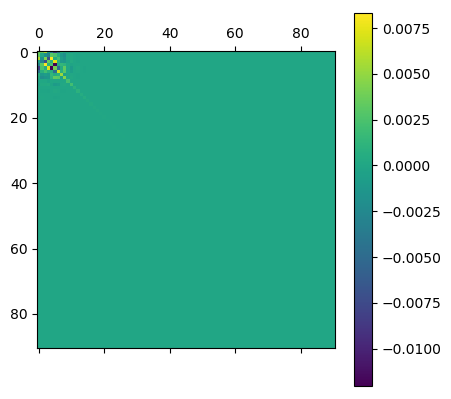

PyObject <matplotlib.colorbar.Colorbar object at 0x1a155c978>

In [18]:
matshow(my_iBaO_good)
colorbar()

In [19]:
BaO_good = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 588.556 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.34113 0.464235 5.6269 4.49711 -8.01235 -3.30481 1.30482 6.43108 -2.07159 1.16569 -4.65111 4.85172 0.480114 -3.75154 0.0188332 4.13391 -0.231743 -3.78461 -3.95065 4.39517 -0.378741 -5.88766 -1.13613 3.83172 -1.33969 -4.47307 0.696006 3.79821 -0.59705 -4.37648 1.03501 4.03823 -3.09352 -5.15823 2.58894 1.83528 -1.48419 -2.32961 1.07626 2.41475 -1.38562 -2.48401 1.82059 1.46253 0.408319 -2.63058 -0.0161712 1.36419 0.443626 -2.19995 0.0255454 2.11237 0.286624 -1.96791 0.173807 2.02096 1.30095 -2.306 0.211803 2.52941 -0.0579157 -2.08548 0.126925 2.05839 0.161982 -1.99437 0.456278 2.53111 -0.602948 -2.02189; 75.971 -110.675 214.628 89.0182 -49.836 93.9601 101.031 -14.0376 -92.6417 5.48045 56.1387 -4.16431 -38.7026 0.875836 40.0512 -2.92424 -28.2818 20.0444 19.9084 -12.6803 -14.1359 1.66348 12.3831 -1.7143 -12.6859 2.07489 11.001 0.0745821 -8.29495 0.76829 8.28774 -2.35329 -10.4203 -0.3409 10.7628 -0.174209 -9.68224 -0.146656 8.80132 0.551461 -9.80761 -0.768064 8.42634 -1.64251 -9.05677 0.490419 8.64482 -0.297993 -7.9082 0.151937 7.98223 -0.108563 -8.61434 0.545615 6.68153 -1.85102 -5.94347 0.879977 5.63895 -0.473348 -5.66183 0.500807 5.31214 -0.484808 -4.75171 -0.120858 4.4565 -0.134913 -4.73236 0.251903 4.99589 -0.136102 -4.82504 0.0830191 4.47667 0.109992 -4.52007 -0.107413 5.01705 0.0398799 -4.54538 0.298104 4.53927 -0.137486 -4.34617 0.0295551 4.34138 -0.124353 -4.48436 0.152002 4.56519; 165.837 -17.9485 89.0182 294.684 49.2373 56.9489 82.523 1.90359 -21.5869 27.0122 17.4192 -10.6958 -8.59843 8.3902 14.6705 -8.23687 0.495821 18.6297 6.54915 -12.3109 1.91073 3.72318 1.4301 -3.29675 -1.24847 3.64356 2.14052 -4.82033 1.96555 -1.87574 0.31926 -0.836676 0.443286 -1.51215 1.66427 -0.04675 -1.27007 -0.632918 1.16999 -0.180521 -1.78127 -3.02286 0.497614 -1.27239 -2.26194 0.532155 1.40269 -0.505596 -1.3301 0.22069 1.34794 -1.01438 -2.48507 0.960972 0.0888889 -1.69204 -0.90951 0.916427 0.485 -0.608043 -0.73327 0.845939 0.582194 -0.585308 -0.920159 0.762337 -0.20528 0.433958 -0.462411 0.0156185 0.494527 -0.0447588 -0.610129 0.101095 0.533718 0.474688 -0.598678 0.128508 0.839972 0.523791 -0.496214 0.250314 0.749406 -0.114453 -0.659614 0.0955233 0.80513 -0.0627714 -0.592053 0.505648 1.07874; -95.7867 201.71 -49.836 49.2373 253.748 22.4462 -161.451 32.7238 133.883 -15.894 -83.6818 6.76976 58.3038 -3.17217 -54.9656 15.0575 53.0405 -18.4181 -30.9252 11.9323 21.6545 -4.35551 -17.4745 2.53613 19.6415 -2.41785 -16.7329 2.49292 13.0991 -2.07567 -13.2668 -0.921787 15.6725 -0.207042 -15.641 0.148451 14.7683 0.232124 -13.4288 -1.19136 12.8923 -0.968729 -14.8688 0.102883 13.9218 -0.77963 -13.1132 0.382709 12.0653 0.000465541 -12.2694 0.39848 11.9326 -1.94801 -11.4199 1.76768 9.16713 -0.937673 -8.66212 0.607532 8.69328 -0.716863 -8.43708 0.321797 7.14481 -0.370034 -6.88739 0.258923 7.30839 0.0147972 -7.61093 0.118041 7.37044 -0.016853 -7.04432 -0.174093 6.91058 0.329764 -6.943 0.325222 7.36716 -0.159219 -6.95366 0.138726 6.65283 -0.0729016 -6.6408 -0.0410062 6.94325 -0.292877 -6.44391; -1.30454 132.656 93.9601 56.9489 22.4462 113.847 12.2255 32.228 7.59488 -6.44762 4.00092 3.6009 -3.18107 -1.5748 5.17208 4.68465 -0.935059 -2.16031 6.37132 1.6033 -0.209612 -1.48198 2.53816 0.886416 -1.79762 -1.1519 2.14687 0.796279 -1.98399 -2.56758 2.90555 -1.63555 -1.39422 -0.22643 1.55558 0.0399401 -1.27705 -0.0815371 1.15306 -0.872342 -1.76733 -0.839671 0.72529 -0.593946 -1.12121 -0.535014 0.84482 0.220274 -0.87589 -0.241246 0.547158 0.00182602 -1.51041 -0.503345 0.727822 0.210359 -1.1787 -0.161249 0.7407 0.139937 -0.75144 -0.106339 0.495833 0.274274 -1.06022 -0.107106 0.868883 0.352194 -0.943346 0.104262 0.705463 0.03517 -0.673347 0.0421792 0.570835 0.0611528 -0.615798 0.275885 0.844928 0.219023 -0.526668 -0.00208802 0.583762 0.0637494 -0.541985 -0.0472934 0.483003 0.122399 -0.291862 0.0119593 0.863857; 104.638 -28.5215 101.031 82.523 -161.451 12.2255 263.03 -12.8169 -122.577 16.5737 77.1961 -6.95968 -53.8019 5.50079 52.6122 -12.5858 -44.9406 13.0867 35.4309 -8.63513 -16.9748 3.79052 17.6723 -2.32817 -18.8052 2.8765 16.975 -2.63102 -12.4241 0.0680002 12.6397 0.129414 -13.2718 -0.522136 14.9696 -0.0291631 -13.8579 -0.393194 12.6064 0.00516516 -12.5123 -0.733087 13.1644 -0.483659 -13.8108 0.484549 12.2777 -0.306097 -11.3272 0.149909 11.2776 -0.734034 -11.576 1.51811 10.2365 -1.22029 -9.17139 0.670252 8.06753 -0.458922 -8.2301 0.653113 7.89486 -0.551614 -7.22965 0.348017 6.47012 0.106587 -6.88218 -0.0426351 7.04783 -0.0270817 -6.92819 0.0539626 6.5869 0.294895 -6.50367 0.0409992 6.67865 0.0858101 -6.77099 0.127896 6.62059 -0.0667866 -6.27203 0.0214288 6.27066 -0.0890588 -6.29903 0.389429 6.23562; 10.2213 51.8627 -14.0376 1.90359 32.7238 32.228 -12.8169 189.762 15.1254 -1.15194 -9.24995 0.982199 7.51257 -0.162691 -6.34688 2.46994 8.60431 -3.55908 -3.18526 2.28719 4.10243 -0.728063 -2.4857 0.474405 2.84958 -0.715684 -2.26505 -0.204396 2.73791 -0.261395 -2.2484 -0.945494 2.5052 0.0327233 -2.24275 -0.0116949 2.10763 -0.0582418 -1.91225 -0.370284 1.88195 -0.0500633 -2.08243 -0.416805 1.81662 -0.0849049 -1.78695 0.0105151 1.6457 0.0172487 -1.63875 0.014448 1.54332 -0.324118 -1.82083 0.33143 1.25304 -0.167311 -1.29773 0.107023 1.23644 -0.135746 -1.1828 0.156643 0.99566 0.120903 -1.21682 0.00127635 1.114 0.0863044 -1.11952 -0.00930929 1.06252 0.0379594 -1.00681 0.0436814 0.988644 0.129054 -1.00716 0.0121688 1.04002 0.0389115 -0.965932 -0.00704294 0.928554 0.0462656 -0.883724 0.0148096 0.961787 -0.0355082 -0.8847; 2.13213 91.1187 -92.6417 -21.5869 133.883 7.59488 -122.577 15.1254 279.213 -11.0048 -48.939 5.22515 36.1682 -4.83386 -34.5005 6.93891 32.4046 -8.69187 -19.5784 5.75945 14.7076 -2.32223 -12.0093 1.60817 13.0659 -2.44496 -11.6683 1.46059 9.66928 -0.562547 -7.5305 -0.56409 9.47907 0.236655 -10.095 -0.0118739 9.45321 -0.0775477 -8.60301 -0.56165 8.71853 0.0963692 -9.27325 0.0968017 9.18988 -0.390796 -8.48929 0.213424 7.73441 -0.246594 -7.74664 0.636955 7.68259 -0.789526 -7.2377 0.773297 5.94389 -0.416257 -5.67131 0.27707 5.66015 -0.437063 -5.48071 0.590145 4.905 -0.133371 -4.68197 -0.0208791 4.53093 0.0859219 -4.8393 -0.00508485 4.73212 0.0366083 -4.48497 0.0581607 4.44741 0.178126 -4.63056 0.0120653 4.69179 -0.0511628 -4.50872 0.0317583 4.29716 0.00978995 -4.26408 0.178322 4.35105 -0.30569 -4.16825; 23.6173 -27.1409 5.48045 27.0122 -15.894 -6.44762 16.5737 -1.15194 -11.0048 455.189 7.92165 -1.8494 -5.35535 1.22872 5.05958 -2.63644 -4.16614 3.3052 3.68342 -2.19135 -1.77307 0.88649 1.92954 -0.629124 -1.93483 0.736815 1.69703 -0.602601 -1.25245 -0.2043 1.447 0.296631 -1.48133 -0.167738 1.54137 -0.00282612 -1.42274 -0.0878545 1.29264 0.152369 -1.24449 -0.260439 1.33777 0.0108978 -1.34785 0.101497 1.2321 -0.0752998 -1.14236 0.0189614 1.12995 -0.145642 -1.14787 0.32035 1.01083 -0.310523 -0.950447 0.173931 0.830196 -0.12289 -0.839262 0.165689 0.800342 -0.124744 -0.727521 0.0643205 0.662133 0.0649698 -0.729707 -0.0335447 0.731774 -0.00331103 -0.709972 -0.00353133 0.677225 0.0658909 -0.663893 -0.0438512 0.667771 0.0388038 -0.687076 0.0175911 0.665789 -0.0139196 -0.6337 -0.00253763 0.630854 -0.00778252 -0.6364 0.0825126 0.626903; 22.3902 -19.5893 56.1387 17.4192 -83.6818 4.00092 77.1961 -9.24995 -48.939 7.92165 480.313 -3.20381 -20.9381 2.94612 20.2302 -4.97369 -17.3744 5.29813 12.6345 -3.51091 -7.81868 1.54564 7.26696 -0.97029 -7.6304 1.35521 6.89212 -1.37406 -5.22936 0.360825 4.9203 0.103095 -5.33868 -0.151784 5.83088 -0.00419529 -5.48744 -0.0614565 4.99492 0.0620645 -5.08042 -0.0997526 5.45746 -0.190019 -5.42181 0.249844 4.87215 -0.143919 -4.49621 0.137502 4.4901 -0.386845 -4.51113 0.57095 4.03907 -0.474765 -3.55503 0.256957 3.27129 -0.170705 -3.29537 0.262468 3.18249 -0.305981 -2.88921 0.207022 2.62039 0.00126265 -2.70813 -0.0268017 2.79719 -0.0058884 -2.74749 0.0124699 2.60318 0.0460924 -2.58376 -0.00599197 2.69685 -0.0046913 -2.74168 0.0508802 2.6293 -0.0280738 -2.49966 0.0211078 2.49688 -0.0879306 -2.51451 0.1847 2.44222; -9.6563 16.9034 -4.16431 -10.6958 6.76976 3.6009 -6.95968 0.982199 5.22515 -1.8494 -3.20381 936.091 2.24611 -0.611237 -2.18526 1.28109 1.98328 -1.6074 -1.31528 1.06601 0.766122 -0.431671 -0.688191 0.307312 0.758198 -0.379977 -0.663556 0.219055 0.518283 0.060066 -0.508735 -0.156938 0.587438 0.0705832 -0.617021 0.00118497 0.571213 0.0336241 -0.519328 -0.10199 0.515263 0.0972278 -0.543402 -0.0118699 0.548015 -0.0535205 -0.506985 0.0364175 0.465441 -0.0141388 -0.467139 0.0738565 0.476556 -0.155759 -0.434578 0.151136 0.364228 -0.0847722 -0.332321 0.0600377 0.335924 -0.0817188 -0.321645 0.0706861 0.285915 -0.0132013 -0.269973 -0.0260794 0.282593 0.0173725 -0.293502 0.00145982 0.285411 0.00454449 -0.271078 -0.0252181 0.267462 0.0311647 -0.274521 -0.0128669 0.278463 -0.00782264 -0.269814 0.00662101 0.257062 0.00410064 -0.255896 0.0087827 0.26281 -0.0415831 -0.256645; -13.7251 21.7206 -38.7026 -8.59843 58.3038 -3.18107 -53.8019 7.51257 36.1682 -5.35535 -20.9381 2.24611 950.238 -1.98759 -14.4857 3.57991 12.7804 -4.06493 -8.80357 2.67846 5.68755 -1.10931 -5.10013 0.695684 5.42743 -0.96329 -4.86655 0.885719 3.77917 -0.353239 -3.4153 -0.0581149 3.85749 0.0849089 -4.17775 0.00801714 3.92425 0.027976 -3.57167 -0.0983044 3.62187 0.0212392 -3.88374 0.143236 3.85748 -0.18987 -3.49615 0.10402 3.21557 -0.0953367 -3.22053 0.262384 3.21733 -0.418189 -2.92317 0.366904 2.51869 -0.195988 -2.33772 0.127873 2.35124 -0.19037 -2.27344 0.21822 2.04349 -0.127961 -1.88536 0.016433 1.92197 0.014439 -2.00281 0.00798121 1.96407 -0.00680392 -1.86162 -0.020982 1.84651 0.0214364 -1.92348 0.0159474 1.9554 -0.0395694 -1.8769 0.0226524 1.78576 -0.0138803 -1.78134 0.062111 1.80616 -0.128463 -1.74107; 8.65304 -10.0881 0.875836 8.3902 -3.17217 -1.5748 5.50079 -0.162691 -4.83386 1.22872 2.94612 -0.611237 -1.98759 1733.01 1.88224 -0.86672 -1.46935 1.16558 1.24585 -0.770375 -0.742058 0.296233 0.735809 -0.215957 -0.719591 0.25958 0.631741 -0.133624 -0.471225 -0.0903973 0.471401 0.0844491 -0.570887 -0.053507 0.587669 -0.000669162 -0.530386 -0.0334258 0.481569 0.058775 -0.454572 -0.0796 0.464513 -0.00405729 -0.491782 0.031009 0.464998 -0.0236784 -0.423275 0.00462963 0.41613 -0.0623841 -0.428606 0.10727 0.366973 -0.110128 -0.343789 0.061346 0.311565 -0.0432758 -0.311042 0.0617952 0.294778 -0.0455299 -0.271359 0.00420872 0.247509 0.0255027 -0.261374 -0.0105533 0.273146 -0.000841782 -0.263517 -0.0021185 0.251958 0.0250693 -0.245959 -0.0175063 0.244167 0.0115932 -0.247378 0.00633841 0.245212 -0.00411682 -0.233865 -0.00430946 0.23216 -0.00291687 -0.23327 0.0347946 0.233438; 17.3617 -23.1612 40.0512 14.6705 -54.9656 5.17208 52.6122 -6.34688 -34.5005 5.05958 20.2302 -2.18526 -14.4857 1.88224 1746.55 -3.0767 -11.9672 3.79462 8.63947 -2.50763 -5.51411 1.00493 5.06529 -0.66982 -5.29519 0.884929 4.78362 -0.814155 -3.66153 0.258294 3.36048 -0.00267541 -3.72842 -0.10795 4.05926 -0.0111327 -3.8065 -0.0444012 3.46448 0.107959 -3.5317 -0.0940979 3.74717 -0.171164 -3.74604 0.178097 3.38246 -0.105283 -3.11435 0.0876626 3.10543 -0.243249 -3.12926 0.359452 2.79457 -0.344831 -2.45753 0.186856 2.27297 -0.123794 -2.28469 0.179901 2.20328 -0.19195 -2.00664 0.116449 1.82628 -0.00635421 -1.8709 -0.00725231 1.94183 -0.0103947 -1.90534 0.00756239 1.80415 0.0333009 -1.79123 -0.0239563 1.87233 -0.00198253 -1.89251 0.0435899 1.82066 -0.0246272 -1.7315 0.0150791 1.72765 -0.0525789 -1.73876 0.118947 1.69493; -14.5362 25.8211 -2.92424 -8.23687 15.0575 4.68465 -12.5858 2.46994 6.93891 -2.63644 -4.97369 1.28109 3.57991 -0.86672 -3.0767 2957.42 3.08113 -1.44294 -2.21707 0.993943 1.63731 -0.578306 -1.44848 0.387673 1.44927 -0.465809 -1.25509 0.351978 1.07149 -0.0321245 -1.09923 -0.203079 1.03017 0.0629893 -1.08026 0.00505594 1.01434 0.0495472 -0.921894 -0.156607 0.87988 0.0522273 -0.99801 -0.00866805 0.969471 -0.0905431 -0.86468 0.0608792 0.806758 -0.0387818 -0.796048 0.0885866 0.745756 -0.203339 -0.754776 0.13946 0.661598 -0.0884292 -0.620288 0.0700136 0.609348 -0.0901101 -0.591574 0.0873476 0.525558 -0.0378509 -0.512161 -0.0144332 0.530286 0.0194677 -0.52122 0.00498067 0.508065 0.00564239 -0.485693 -0.0371604 0.475438 0.0473408 -0.475436 0.00101663 0.500825 -0.0142444 -0.477043 0.0135966 0.453054 -0.00394721 -0.445872 0.0180583 0.45399 -0.0447681 -0.420632; -14.6512 35.109 -28.2818 0.495821 53.0405 -0.935059 -44.9406 8.60431 32.4046 -4.16614 -17.3744 1.98328 12.7804 -1.46935 -11.9672 3.08113 2967.02 -3.39542 -7.00089 2.24713 5.31584 -0.963698 -4.38017 0.605049 4.71329 -0.811062 -4.19921 0.591379 3.43298 -0.515124 -2.79767 -0.0871414 3.34553 0.0255231 -3.57576 0.0183016 3.37237 0.0269036 -3.06956 -0.196128 3.07515 -0.0889341 -3.37253 0.110152 3.29553 -0.197683 -3.01498 0.103885 2.75887 -0.0938018 -2.76711 0.171941 2.68655 -0.364137 -2.5688 0.313457 2.13038 -0.172555 -2.03444 0.115874 2.02769 -0.152434 -1.975 0.185517 1.7519 -0.0765393 -1.66135 0.0528051 1.63049 0.00663983 -1.723 0.0158187 1.68804 -0.00264882 -1.60385 -0.0201777 1.58724 0.0530931 -1.64022 0.0419357 1.68795 -0.0401476 -1.61128 0.0281827 1.53475 -0.0147532 -1.52542 0.0576062 1.55625 -0.0867133 -1.46399; 15.3648 -27.4416 20.0444 18.6297 -18.4181 -2.16031 13.0867 -3.55908 -8.69187 3.3052 5.29813 -1.6074 -4.06493 1.16558 3.79462 -1.44294 -3.39542 4736.31 2.59086 -1.30606 -1.89301 0.578341 1.7196 -0.461697 -1.69329 0.566117 1.54061 -0.458012 -1.37046 0.0906519 1.19133 0.153518 -1.22047 -0.115658 1.23831 -0.00711758 -1.1686 -0.0473551 1.06293 0.159263 -1.14015 -0.165811 1.16452 -0.0412338 -1.09924 0.119247 1.00542 -0.0800677 -0.932404 0.0620641 0.902647 -0.119657 -0.924938 0.15968 0.859035 -0.1775 -0.772015 0.107005 0.722089 -0.0796322 -0.709707 0.103674 0.674817 -0.111723 -0.647914 0.0554632 0.623764 0.00866387 -0.602588 -0.0161295 0.606226 -0.00699447 -0.589314 -0.00307502 0.551863 0.0355163 -0.552585 -0.0461676 0.596726 0.0191453 -0.585065 0.0234975 0.553407 -0.0185203 -0.528206 0.00905793 0.516403 -0.0297113 -0.511098 0.0563134 0.518037; 17.2442 -2.31395 19.9084 6.54915 -30.9252 6.37132 35.4309 -3.18526 -19.5784 3.68342 12.6345 -1.31528 -8.80357 1.24585 8.63947 -2.21707 -7.00089 2.59086 4740.44 -1.69851 -2.73813 0.675542 3.03356 -0.413874 -3.15053 0.493114 2.8751 -0.73196 -2.04445 0.0964295 2.13238 -0.0897466 -2.13912 -0.0517714 2.44708 -0.0095849 -2.28529 -0.0580906 2.07996 -0.0251752 -2.08956 -0.0261638 2.22535 -0.151209 -2.30413 0.103241 2.02205 -0.0649126 -1.87433 0.0380786 1.86527 -0.176275 -1.91052 0.263603 1.64706 -0.235732 -1.53495 0.12461 1.33655 -0.0798474 -1.36776 0.120983 1.31526 -0.0935267 -1.21221 0.128693 1.0606 0.00339142 -1.14003 0.00363392 1.15857 -0.00843449 -1.14343 0.0152732 1.0857 0.0435679 -1.07502 0.0183258 1.11299 -0.00897173 -1.131 0.0325172 1.09844 -0.0164384 -1.03996 0.0184276 1.04286 -0.018716 -1.03993 0.0868288 1.02921; -10.2911 18.3201 -12.6803 -12.3109 11.9323 1.6033 -8.63513 2.28719 5.75945 -2.19135 -3.51091 1.06601 2.67846 -0.770375 -2.50763 0.993943 2.24713 -1.30606 -1.69851 7216.86 1.22468 -0.391794 -1.11205 0.309637 1.10189 -0.379826 -1.00072 0.300937 0.884412 -0.0521376 -0.773017 -0.106862 0.79625 0.0768188 -0.810192 0.00452695 0.764022 0.0320405 -0.694931 -0.106617 0.742284 0.109512 -0.76017 0.0248538 0.720067 -0.0781296 -0.658649 0.0525036 0.610515 -0.0396818 -0.59243 0.0799225 0.606686 -0.111013 -0.562976 0.121198 0.503787 -0.0726702 -0.470511 0.0539086 0.46324 -0.070454 -0.440735 0.0746383 0.42129 -0.0354838 -0.4051 -0.00726443 0.393002 0.0112853 -0.396061 0.00446839 0.3851 0.00224494 -0.360926 -0.0240304 0.361112 0.0310237 -0.388888 -0.0126894 0.382151 -0.015206 -0.361884 0.0120192 0.345348 -0.00535447 -0.338019 0.0191323 0.3353 -0.0380969 -0.338961; 4.66846 7.35593 -14.1359 1.91073 21.6545 -0.209612 -16.9748 4.10243 14.7076 -1.77307 -7.81868 0.766122 5.68755 -0.742058 -5.51411 1.63731 5.31584 -1.89301 -2.73813 1.22468 7218.21 -0.460522 -1.65381 0.256685 1.90985 -0.443879 -1.6631 0.261429 1.37065 -0.256241 -1.11305 -0.0499118 1.47772 0.0120487 -1.51985 -0.00180488 1.42832 -0.0336939 -1.29974 -0.0368246 1.31868 -0.0477588 -1.41959 0.0329485 1.36965 -0.0759808 -1.29211 0.0287571 1.17692 -0.0444549 -1.19723 0.108094 1.18658 -0.193734 -1.12352 0.166449 0.867131 -0.081765 -0.845715 0.0478919 0.846089 -0.0772898 -0.820158 0.11978 0.706289 -0.0279069 -0.688889 0.0209554 0.681548 0.0109231 -0.733966 -0.000916907 0.714156 0.00086745 -0.676573 0.0252704 0.671112 0.0100806 -0.699393 0.0145971 0.71218 -0.00912774 -0.679273 0.00383449 0.649576 0.00231767 -0.646896 0.0389583 0.674512 -0.054511 -0.636412; 4.7646 -8.34113 1.66348 3.72318 -4.35551 -1.48198 3.79052 -0.728063 -2.32223 0.88649 1.54564 -0.431671 -1.10931 0.296233 1.00493 -0.578306 -0.963698 0.578341 0.675542 -0.391794 -0.460522 10565.1 0.410408 -0.135154 -0.423466 0.164361 0.370013 -0.114385 -0.307754 -0.000520824 0.306496 0.0666897 -0.307093 -0.0260927 0.323128 -0.00137724 -0.302743 -0.0162518 0.275238 0.0502561 -0.268802 -0.0292326 0.296707 0.00178657 -0.290709 0.0291095 0.262079 -0.0196597 -0.243197 0.0114815 0.241275 -0.0322173 -0.233918 0.067811 0.227064 -0.0550539 -0.196316 0.0330913 0.182367 -0.0249932 -0.18098 0.0329578 0.174872 -0.0309079 -0.156131 0.0108709 0.150211 0.00703588 -0.155134 -0.00680343 0.155508 -0.00139837 -0.151624 -0.00184641 0.144429 0.0121889 -0.142037 -0.0151719 0.144225 0.00221158 -0.149504 0.00468392 0.142951 -0.00418517 -0.135911 0.0004018 0.13429 -0.00570693 -0.136844 0.0167848 0.129647; 1.21131 0.464235 12.3831 1.4301 -17.4745 2.53816 17.6723 -2.4857 -12.0093 1.92954 7.26696 -0.688191 -5.10013 0.735809 5.06529 -1.44848 -4.38017 1.7196 3.03356 -1.11205 -1.65381 0.410408 10566.5 -0.231335 -1.71169 0.352053 1.52598 -0.364873 -1.13042 0.117537 1.10928 -0.0181777 -1.25994 -0.0243153 1.37137 0.000624995 -1.28037 0.0039297 1.16511 -0.0209034 -1.17992 0.005767 1.24913 -0.0632668 -1.26205 0.0570417 1.14646 -0.0267134 -1.05508 0.0280025 1.06379 -0.112932 -1.08994 0.172206 0.961906 -0.151793 -0.822057 0.0747231 0.744042 -0.0438355 -0.758376 0.0737326 0.729033 -0.084908 -0.650544 0.0568779 0.593919 -0.00304873 -0.627186 -0.00470109 0.653385 5.41596e-5 -0.640133 0.00513359 0.606654 -0.00294728 -0.60155 0.010251 0.626145 -0.00593761 -0.633528 0.0120219 0.612163 -0.00411194 -0.58226 0.00314325 0.583331 -0.0232182 -0.595386 0.0562403 0.582098; -3.29318 5.6269 -1.7143 -3.29675 2.53613 0.886416 -2.32817 0.474405 1.60817 -0.629124 -0.97029 0.307312 0.695684 -0.215957 -0.66982 0.387673 0.605049 -0.461697 -0.413874 0.309637 0.256685 -0.135154 -0.231335 14963.1 0.248003 -0.120352 -0.220324 0.079307 0.17583 0.00510431 -0.164782 -0.0433425 0.182969 0.0217464 -0.194111 0.000857283 0.181523 0.0111566 -0.165123 -0.0335105 0.166795 0.0286891 -0.177452 0.00100094 0.175845 -0.020148 -0.160566 0.0136651 0.147875 -0.00767229 -0.147664 0.0246132 0.149183 -0.0458537 -0.136833 0.0434317 0.116812 -0.0251877 -0.107474 0.0183472 0.108066 -0.0246599 -0.103852 0.0228005 0.0936041 -0.00689008 -0.0880124 -0.00589929 0.090187 0.00469504 -0.0931104 0.000889452 0.0909031 0.00116498 -0.0861356 -0.00836742 0.0853126 0.0100439 -0.0886101 -0.00325903 0.0898174 -0.00346741 -0.0862897 0.00282721 0.0821559 9.18079e-5 -0.0816425 0.00403068 0.0830776 -0.0129506 -0.0809494; -2.93483 4.49711 -12.6859 -1.24847 19.6415 -1.79762 -18.8052 2.84958 13.0659 -1.93483 -7.6304 0.758198 5.42743 -0.719591 -5.29519 1.44927 4.71329 -1.69329 -3.15053 1.10189 1.90985 -0.423466 -1.71169 0.248003 14964.9 -0.361349 -1.66965 0.337573 1.27931 -0.144822 -1.18419 -0.00278133 1.36743 0.0223818 -1.47801 0.00184318 1.38361 0.00145267 -1.25911 -0.0123719 1.26974 -0.0124086 -1.35858 0.0579048 1.35876 -0.0663162 -1.23794 0.0327125 1.13714 -0.0316297 -1.14453 0.103437 1.15386 -0.172277 -1.0443 0.151474 0.883682 -0.077074 -0.813376 0.0472916 0.823038 -0.073703 -0.794298 0.0852678 0.707308 -0.0499812 -0.654282 0.00784132 0.675281 0.00469818 -0.706511 0.00194697 0.691967 -0.0038275 -0.65636 -0.0010895 0.650303 0.000201237 -0.674969 0.00903987 0.686555 -0.013672 -0.661049 0.00655379 0.629073 -0.00384407 -0.62857 0.023768 0.641643 -0.0518715 -0.620071; 3.50409 -8.01235 2.07489 3.64356 -2.41785 -1.1519 2.8765 -0.715684 -2.44496 0.736815 1.35521 -0.379977 -0.96329 0.25958 0.884929 -0.465809 -0.811062 0.566117 0.493114 -0.379826 -0.443879 0.164361 0.352053 -0.120352 -0.361349 20609.7 0.31718 -0.0832221 -0.256928 0.00638248 0.221171 0.0547512 -0.273834 -0.0246461 0.283515 -0.00126728 -0.259819 -0.0107423 0.236162 0.0491759 -0.235478 -0.0300745 0.238621 -0.00062822 -0.244237 0.0264095 0.229585 -0.0171952 -0.209004 0.0110918 0.207367 -0.0286271 -0.203313 0.0550217 0.19174 -0.0532563 -0.160791 0.0309241 0.157587 -0.0225141 -0.154627 0.0297342 0.149097 -0.0301174 -0.133681 0.005222 0.12674 0.00524147 -0.12651 -0.00570966 0.133632 -0.00126555 -0.129563 -0.00206317 0.122901 0.00805671 -0.121319 -0.0150595 0.124905 0.00281248 -0.124447 0.00435813 0.121638 -0.00367089 -0.116116 -0.000389592 0.114973 -0.00627039 -0.116828 0.015109 0.111631; 3.27787 -3.30481 11.001 2.14052 -16.7329 2.14687 16.975 -2.26505 -11.6683 1.69703 6.89212 -0.663556 -4.86655 0.631741 4.78362 -1.25509 -4.19921 1.54061 2.8751 -1.00072 -1.6631 0.370013 1.52598 -0.220324 -1.66965 0.31718 20611.0 -0.295078 -1.12321 0.104563 1.06173 -0.0126219 -1.21894 -0.0243014 1.32549 -0.00183233 -1.23708 -0.00458552 1.12566 0.00580544 -1.13256 -0.00152754 1.20451 -0.0589279 -1.21694 0.0558863 1.10655 -0.0284549 -1.01647 0.0258959 1.0206 -0.0922414 -1.0401 0.150203 0.930655 -0.138058 -0.793469 0.0699204 0.724301 -0.0426551 -0.734633 0.066491 0.706949 -0.0738436 -0.635322 0.0433505 0.580581 -0.00357755 -0.604351 -0.00298787 0.631411 -0.00185514 -0.618548 0.00399911 0.586879 0.00343914 -0.58116 0.0016824 0.602276 -0.00547108 -0.611424 0.0128672 0.590858 -0.00576684 -0.561953 0.00311711 0.561949 -0.01973 -0.571061 0.0466797 0.557936; -3.77929 1.30482 0.0745821 -4.82033 2.49292 0.796279 -2.63102 -0.204396 1.46059 -0.602601 -1.37406 0.219055 0.885719 -0.133624 -0.814155 0.351978 0.591379 -0.458012 -0.73196 0.300937 0.261429 -0.114385 -0.364873 0.079307 0.337573 -0.0832221 -0.295078 27721.0 0.204657 0.0580125 -0.28963 -0.0367994 0.261169 0.0278255 -0.266841 3.1973e-5 0.245139 0.01557 -0.222496 -0.0038764 0.206272 0.0505946 -0.226658 -0.0019319 0.227754 -0.00825438 -0.205803 0.00805676 0.193376 0.00259495 -0.18813 0.0162243 0.192402 -0.0436608 -0.162241 0.0429376 0.172864 -0.023368 -0.142075 0.016063 0.144299 -0.0215535 -0.136412 0.0104837 0.127025 -0.0156069 -0.111746 -0.0131474 0.131791 0.00444352 -0.126524 0.000129086 0.122198 -0.000788743 -0.117122 -0.0116775 0.113898 0.000316326 -0.111695 -0.00881458 0.116875 -0.00180981 -0.113263 0.00125907 0.107699 -0.000213081 -0.107139 -0.00255739 0.106235 -0.0100051 -0.106606; -0.409778 6.43108 -8.29495 1.96555 13.0991 -1.98399 -12.4241 2.73791 9.66928 -1.25245 -5.22936 0.518283 3.77917 -0.471225 -3.66153 1.07149 3.43298 -1.37046 -2.04445 0.884412 1.37065 -0.307754 -1.13042 0.17583 1.27931 -0.256928 -1.12321 0.204657 27721.8 -0.176166 -0.755471 0.0207322 0.956898 -0.000599215 -1.02037 0.00420616 0.953105 -0.0100108 -0.867284 -0.0307387 0.871328 -0.0453999 -0.930775 0.052839 0.928956 -0.0558548 -0.860258 0.0244885 0.784591 -0.0234898 -0.795106 0.0699651 0.790632 -0.130608 -0.737584 0.12339 0.596312 -0.0613619 -0.560151 0.0361549 0.565054 -0.0538556 -0.547417 0.0627017 0.476631 -0.0291172 -0.456941 0.0183467 0.456373 -0.000389482 -0.487523 0.00358278 0.476359 -0.00240487 -0.452108 0.00750811 0.447614 0.00681527 -0.463465 0.0153072 0.47158 -0.0123401 -0.454428 0.0063031 0.433118 -0.00308338 -0.431717 0.0183196 0.446913 -0.036411 -0.424271; -2.62764 -2.07159 0.76829 -1.87574 -2.07567 -2.56758 0.0680002 -0.261395 -0.562547 -0.2043 0.360825 0.060066 -0.353239 -0.0903973 0.258294 -0.0321245 -0.515124 0.0906519 0.0964295 -0.0521376 -0.256241 -0.000520824 0.117537 0.00510431 -0.144822 0.00638248 0.104563 0.0580125 -0.176166 36530.9 0.133385 0.066662 -0.142852 0.00805592 0.112254 0.00150049 -0.107165 0.0111808 0.0970485 0.0180974 -0.0956873 0.0196741 0.110159 0.0393628 -0.0831163 -0.00173776 0.0870058 0.00563411 -0.0806032 -0.00494751 0.0797666 0.010926 -0.0705968 0.00654165 0.104201 -0.00820016 -0.0600074 0.00258125 0.0684932 -0.00058987 -0.0624407 3.0292e-6 0.0593934 -0.00331038 -0.047559 -0.0144822 0.0720383 -0.00349856 -0.060361 -0.00568666 0.0587059 0.00129112 -0.0545424 -0.00297159 0.0514856 -0.0083856 -0.0504248 -0.00711434 0.0513284 -0.00292177 -0.0536827 -0.00532559 0.0478532 0.00200628 -0.0463821 -0.00413518 0.0422196 0.000403409 -0.0487513 -0.00328299 0.0429918; 5.05196 1.16569 8.28774 0.31926 -13.2668 2.90555 12.6397 -2.2484 -7.5305 1.447 4.9203 -0.508735 -3.4153 0.471401 3.36048 -1.09923 -2.79767 1.19133 2.13238 -0.773017 -1.11305 0.306496 1.10928 -0.164782 -1.18419 0.221171 1.06173 -0.28963 -0.755471 0.133385 36531.7 -0.0466165 -0.838094 -0.00929254 0.925175 -0.00434853 -0.870239 -0.0135951 0.792107 -0.0259112 -0.801265 0.0173584 0.866027 -0.065289 -0.866613 0.0506942 0.772653 -0.0251762 -0.716871 0.0204377 0.721463 -0.0679133 -0.731408 0.131854 0.637293 -0.107393 -0.567872 0.0544624 0.508838 -0.0328807 -0.518943 0.0490836 0.500551 -0.0497075 -0.448183 0.0511356 0.398834 -0.0128819 -0.433652 0.00258579 0.442667 -0.00373306 -0.435228 0.00792619 0.412763 0.0101963 -0.409307 0.013022 0.425751 -0.00948665 -0.434634 0.0135834 0.417551 -0.00663107 -0.396595 0.00725828 0.398505 -0.0135827 -0.403711 0.034247 0.392149; 0.713839 -4.65111 -2.35329 -0.836676 -0.921787 -1.63555 0.129414 -0.945494 -0.56409 0.296631 0.103095 -0.156938 -0.0581149 0.0844491 -0.00267541 -0.203079 -0.0871414 0.153518 -0.0897466 -0.106862 -0.0499118 0.0666897 -0.0181777 -0.0433425 -0.00278133 0.0547512 -0.0126219 -0.0367994 0.0207322 0.066662 -0.0466165 47290.6 -0.000948371 0.00160702 -0.000776689 -0.00125417 -0.00313668 -0.00014644 0.00306083 0.0298666 0.0144868 0.0163848 0.0145862 0.0153755 -0.00576009 0.0181942 0.0106108 -0.0085682 -0.00683485 0.00782857 0.0156077 -0.00496106 0.0102757 0.0227493 0.00711363 -0.0146398 0.00798514 0.00948869 0.00224715 -0.00747679 -0.0019504 0.00786712 0.00798258 -0.0118156 0.00942443 0.00415896 -0.00617359 -0.00810277 0.00722628 -0.0036726 0.00017406 -0.00112743 -0.000523874 -0.001338 0.00241549 0.00010983 -0.000894077 -0.0093259 -0.00507106 -0.00513902 -0.00368831 0.000778035 0.00189745 -0.00226336 -0.00218262 0.0012178 0.00376884 -0.00399747 -0.00911388 0.00230749 -0.00683699; -0.886231 4.85172 -10.4203 0.443286 15.6725 -1.39422 -13.2718 2.5052 9.47907 -1.48133 -5.33868 0.587438 3.85749 -0.570887 -3.72842 1.03017 3.34553 -1.22047 -2.13912 0.79625 1.47772 -0.307093 -1.25994 0.182969 1.36743 -0.273834 -1.21894 0.261169 0.956898 -0.142852 -0.838094 -0.000948371 47291.6 0.0102639 -1.05477 0.00167619 0.99463 -0.00595611 -0.905403 -0.0198551 0.92293 -0.0266507 -0.995857 0.0449468 0.973728 -0.0547165 -0.891073 0.0266737 0.817981 -0.0296174 -0.824018 0.0798806 0.819713 -0.12038 -0.749789 0.10815 0.629005 -0.0550809 -0.592408 0.0335691 0.595346 -0.052807 -0.576848 0.0671594 0.511723 -0.0401064 -0.477644 0.0112993 0.483018 0.00312432 -0.508244 0.0017547 0.497791 -0.00208006 -0.471484 0.00446708 0.46823 0.00370645 -0.489492 0.0106208 0.498381 -0.0108089 -0.475961 0.00559258 0.453587 -0.00424595 -0.452732 0.0211799 0.46258 -0.0387157 -0.442089; -1.0068 0.480114 -0.3409 -1.51215 -0.207042 -0.22643 -0.522136 0.0327233 0.236655 -0.167738 -0.151784 0.0705832 0.0849089 -0.053507 -0.10795 0.0629893 0.0255231 -0.115658 -0.0517714 0.0768188 0.0120487 -0.0260927 -0.0243153 0.0217464 0.0223818 -0.0246461 -0.0243014 0.0278255 -0.000599215 0.00805592 -0.00929254 0.00160702 0.0102639 60268.5 -0.0210859 0.000329387 0.0177555 0.0037144 -0.0162067 -0.00150214 0.0177592 0.0156204 -0.0121246 0.00633169 0.021761 -0.00398714 -0.0172622 0.00335797 0.0157725 -0.00165137 -0.0159286 0.00629655 0.0204367 -0.00736203 -0.00794777 0.0106121 0.0113697 -0.00588224 -0.00939059 0.0040208 0.0104133 -0.00548984 -0.00959887 0.00418018 0.0101431 -0.00409081 -0.00393388 -0.00221722 0.00747191 0.000153805 -0.00827421 0.000311642 0.0086412 -0.000418417 -0.00810687 -0.0027858 0.00821693 8.86041e-5 -0.00906471 -0.00255148 0.0076694 -0.00146623 -0.00895495 0.00077022 0.00828473 -0.000505827 -0.00903883 0.000592671 0.00811209 -0.00316085 -0.00979899; 2.60649 -3.75154 10.7628 1.66427 -15.641 1.55558 14.9696 -2.24275 -10.095 1.54137 5.83088 -0.617021 -4.17775 0.587669 4.05926 -1.08026 -3.57576 1.23831 2.44708 -0.810192 -1.51985 0.323128 1.37137 -0.194111 -1.47801 0.283515 1.32549 -0.266841 -1.02037 0.112254 0.925175 -0.000776689 -1.05477 -0.0210859 60269.6 -0.00136771 -1.07747 -0.00255097 0.980686 0.0110838 -0.995621 0.00193194 1.06228 -0.0481656 -1.06261 0.0531782 0.962862 -0.0274057 -0.884976 0.0281576 0.888123 -0.0817928 -0.892912 0.126503 0.806524 -0.110455 -0.691144 0.0571096 0.637988 -0.0357164 -0.644024 0.0557797 0.622139 -0.0673839 -0.558347 0.0397787 0.514044 -0.00594951 -0.525972 -0.00350257 0.549552 -0.00152665 -0.539168 0.00288957 0.510948 0.00191323 -0.506951 -0.000605417 0.528521 -0.00557771 -0.536106 0.0111973 0.515848 -0.00552814 -0.490654 0.00367973 0.489976 -0.0199822 -0.497602 0.0399725 0.481277; 0.000712206 0.0188332 -0.174209 -0.04675 0.148451 0.0399401 -0.0291631 -0.0116949 -0.0118739 -0.00282612 -0.00419529 0.00118497 0.00801714 -0.000669162 -0.0111327 0.00505594 0.0183016 -0.00711758 -0.0095849 0.00452695 -0.00180488 -0.00137724 0.000624995 0.000857283 0.00184318 -0.00126728 -0.00183233 3.1973e-5 0.00420616 0.00150049 -0.00434853 -0.00125417 0.00167619 0.000329387 -0.00136771 75750.4 0.00181422 3.24617e-5 -0.00165843 -0.000158672 0.00286255 0.000571392 -0.00328963 -0.000558308 0.00187743 0.000126217 -0.00137222 -7.10919e-5 0.00153138 0.000175409 -0.00147643 0.00019645 0.00234608 -0.00067797 -0.00277544 0.000658151 0.00158144 -0.000319064 -0.000894532 0.000200413 0.00107604 -0.000326868 -0.000870196 0.000227921 0.00104899 0.000155851 -0.00163166 -0.000318125 0.0014285 0.000157906 -0.00104069 -5.27544e-5 0.00102453 4.98166e-5 -0.000861493 -2.43463e-5 0.00096888 7.26295e-5 -0.0014163 -0.000140725 0.00132434 8.48237e-5 -0.000989698 -5.49387e-5 0.000937486 0.000117327 -0.000827664 -4.66991e-5 0.000908578 -0.000159739 -0.00129178; -2.69173 4.13391 -9.68224 -1.27007 14.7683 -1.27705 -13.8579 2.10763 9.45321 -1.42274 -5.48744 0.571213 3.92425 -0.530386 -3.8065 1.01434 3.37237 -1.1686 -2.28529 0.764022 1.42832 -0.302743 -1.28037 0.181523 1.38361 -0.259819 -1.23708 0.245139 0.953105 -0.107165 -0.870239 -0.00313668 0.99463 0.0177555 -1.07747 0.00181422 75751.4 0.00321131 -0.919914 -0.0146617 0.930781 -0.00560474 -0.997552 0.042834 0.994104 -0.0500142 -0.90292 0.0256896 0.82992 -0.0247408 -0.833559 0.073683 0.836516 -0.119582 -0.758182 0.10476 0.647068 -0.0542482 -0.598054 0.0340046 0.603537 -0.0521443 -0.58316 0.0606978 0.521571 -0.0365056 -0.481488 0.00626112 0.493815 0.00315208 -0.515863 0.0018284 0.505701 -0.00261414 -0.479483 -0.00240848 0.475397 0.00188936 -0.494515 0.00623289 0.502932 -0.0105136 -0.483408 0.00543261 0.459959 -0.00351784 -0.459314 0.0174112 0.467315 -0.0364351 -0.450902; -1.01586 -0.231743 -0.146656 -0.632918 0.232124 -0.0815371 -0.393194 -0.0582418 -0.0775477 -0.0878545 -0.0614565 0.0336241 0.027976 -0.0334258 -0.0444012 0.0495472 0.0269036 -0.0473551 -0.0580906 0.0320405 -0.0336939 -0.0162518 0.0039297 0.0111566 0.00145267 -0.0107423 -0.00458552 0.01557 -0.0100108 0.0111808 -0.0135951 -0.00014644 -0.00595611 0.0037144 -0.00255097 3.24617e-5 0.00321131 94039.2 -0.0029903 0.00264373 0.00399028 0.00647465 -0.00569789 0.00255222 0.00848726 -0.00103359 -0.00250781 0.00138392 0.00380428 0.000197802 -0.00401097 0.00494814 0.00682989 -0.00592861 -0.00310962 0.0045775 0.00528385 -0.00276496 6.5898e-5 0.0021254 0.00182331 -0.00341551 -0.00163152 0.00106087 0.00241459 -0.0023029 0.00149446 -0.00226717 0.00322221 0.000250914 -0.00109008 4.71419e-5 0.00172369 -0.000449265 -0.00160215 -0.00343755 0.00172764 -0.00109271 -0.00215231 -0.00107548 0.00240409 -0.000574298 -0.00242603 0.000250339 0.00197908 -0.000136981 -0.00253491 -0.000440467 0.00188001 -0.00247936 -0.00300678; 2.46325 -3.78461 8.80132 1.16999 -13.4288 1.15306 12.6064 -1.91225 -8.60301 1.29264 4.99492 -0.519328 -3.57167 0.481569 3.46448 -0.921894 -3.06956 1.06293 2.07996 -0.694931 -1.29974 0.275238 1.16511 -0.165123 -1.25911 0.236162 1.12566 -0.222496 -0.867284 0.0970485 0.792107 0.00306083 -0.905403 -0.0162067 0.980686 -0.00165843 -0.919914 -0.0029903 94040.1 0.0135157 -0.847034 0.00492132 0.907735 -0.0388413 -0.904656 0.0454385 0.821743 -0.0233545 -0.755299 0.0224273 0.758607 -0.066887 -0.761337 0.108713 0.690054 -0.0953085 -0.588894 0.0493623 0.544267 -0.0309516 -0.549256 0.0474271 0.530695 -0.0551252 -0.474634 0.0330933 0.43819 -0.00563748 -0.449448 -0.002876 0.469508 -0.0016688 -0.460243 0.00236494 0.436386 0.00224272 -0.432658 -0.00177909 0.450027 -0.0056355 -0.457683 0.00955365 0.439934 -0.00494216 -0.418596 0.00318096 0.418004 -0.015782 -0.4253 0.033094 0.410379; -0.183597 -3.95065 0.551461 -0.180521 -1.19136 -0.872342 0.00516516 -0.370284 -0.56165 0.152369 0.0620645 -0.10199 -0.0983044 0.058775 0.107959 -0.156607 -0.196128 0.159263 -0.0251752 -0.106617 -0.0368246 0.0502561 -0.0209034 -0.0335105 -0.0123719 0.0491759 0.00580544 -0.0038764 -0.0307387 0.0180974 -0.0259112 0.0298666 -0.0198551 -0.00150214 0.0110838 -0.000158672 -0.0146617 0.00264373 0.0135157 1.15456e5 -0.0170055 0.00580688 0.0270358 0.00782582 -0.0128873 0.00870745 0.0192779 -0.00429558 -0.0151218 0.00419306 0.0194861 -0.00565447 -0.0159412 0.018672 0.0249949 -0.01505 -0.00292236 0.0087064 0.00806376 -0.00636467 -0.00845635 0.00802651 0.00952446 -0.01162 -0.0025855 -0.00332842 0.0112294 -0.000779407 -0.00164444 -0.00275693 0.00800616 -0.000191686 -0.00756231 -0.0019943 0.00700344 -0.0019828 -0.00738599 -0.00888621 0.00890027 -0.00202711 -0.0105611 0.000286087 0.00778418 -0.000813674 -0.00795887 -0.00103308 0.00761414 -0.003207 -0.0114074 0.00331378 0.00739616; -2.88814 4.39517 -9.80761 -1.78127 12.8923 -1.76733 -12.5123 1.88195 8.71853 -1.24449 -5.08042 0.515263 3.62187 -0.454572 -3.5317 0.87988 3.07515 -1.14015 -2.08956 0.742284 1.31868 -0.268802 -1.17992 0.166795 1.26974 -0.235478 -1.13256 0.206272 0.871328 -0.0956873 -0.801265 0.0144868 0.92293 0.0177592 -0.995621 0.00286255 0.930781 0.00399028 -0.847034 -0.0170055 1.15456e5 0.0014435 -0.909882 0.0483618 0.911763 -0.0459805 -0.831376 0.0240077 0.76387 -0.0219758 -0.767486 0.0629923 0.774774 -0.105281 -0.693813 0.102662 0.593943 -0.052603 -0.550033 0.0324169 0.554839 -0.0479416 -0.534889 0.0549096 0.478403 -0.0298095 -0.442219 0.00619422 0.454799 0.000806218 -0.475472 0.0025839 0.465535 -0.00280722 -0.440669 -0.00299271 0.437509 0.00255528 -0.457419 0.00490285 0.461017 -0.0111308 -0.444425 0.00564317 0.423074 -0.00317017 -0.422478 0.0155819 0.430354 -0.0319191 -0.417051; -1.67346 -0.378741 -0.768064 -3.02286 -0.968729 -0.839671 -0.733087 -0.0500633 0.0963692 -0.260439 -0.0997526 0.0972278 0.0212392 -0.0796 -0.0940979 0.0522273 -0.0889341 -0.165811 -0.0261638 0.109512 -0.0477588 -0.0292326 0.005767 0.0286891 -0.0124086 -0.0300745 -0.00152754 0.0505946 -0.0453999 0.0196741 0.0173584 0.0163848 -0.0266507 0.0156204 0.00193194 0.000571392 -0.00560474 0.00647465 0.00492132 0.00580688 0.0014435 1.40337e5 0.0154639 0.016165 0.00707321 -0.00465432 0.00141427 0.00489024 -0.00104373 -0.00226345 0.000815704 0.00956071 0.011873 -0.00583755 0.016099 0.0148788 -0.00278004 -0.00797376 0.00623634 0.00516086 -0.00350458 -0.00720572 0.00467153 0.0044721 0.000433839 -0.00884105 0.0131488 -0.00414289 -0.00526853 -0.000896984 0.00488497 0.000528062 -0.00320833 -0.00141383 0.00349469 -0.00485599 -0.00269231 -0.00267795 0.000444767 -0.00579455 -0.00465133 -0.0028127 0.000973965 0.00119027 -0.00157911 -0.0013673 -0.000323036 0.000470815 -0.00254034 -0.00457111 -0.00321308; 3.39768 -5.88766 8.42634 0.497614 -14.8688 0.72529 13.1644 -2.08243 -9.27325 1.33777 5.45746 -0.543402 -3.88374 0.464513 3.74717 -0.99801 -3.37253 1.16452 2.22535 -0.76017 -1.41959 0.296707 1.24913 -0.177452 -1.35858 0.238621 1.20451 -0.226658 -0.930775 0.110159 0.866027 0.0145862 -0.995857 -0.0121246 1.06228 -0.00328963 -0.997552 -0.00569789 0.907735 0.0270358 -0.909882 0.0154639 1.40338e5 -0.0353912 -0.973544 0.0496994 0.890037 -0.0253995 -0.818223 0.0197913 0.823567 -0.0638882 -0.821893 0.119797 0.752322 -0.105879 -0.635144 0.0551619 0.589337 -0.0348777 -0.594101 0.0507518 0.574458 -0.0526351 -0.50897 0.0336013 0.473463 -0.00798005 -0.48857 -0.00277062 0.510043 -0.00292631 -0.498863 0.00225907 0.473684 0.00427342 -0.468735 -0.00577746 0.484554 -0.00882256 -0.496486 0.0103923 0.4757 -0.00608283 -0.453072 0.00367596 0.452379 -0.0133993 -0.462514 0.032794 0.443211; -0.380813 -1.13613 -1.64251 -1.27239 0.102883 -0.593946 -0.483659 -0.416805 0.0968017 0.0108978 -0.190019 -0.0118699 0.143236 -0.00405729 -0.171164 -0.00866805 0.110152 -0.0412338 -0.151209 0.0248538 0.0329485 0.00178657 -0.0632668 0.00100094 0.0579048 -0.00062822 -0.0589279 -0.0019319 0.052839 0.0393628 -0.065289 0.0153755 0.0449468 0.00633169 -0.0481656 -0.000558308 0.042834 0.00255222 -0.0388413 0.00782582 0.0483618 0.016165 -0.0353912 1.69038e5 0.0397949 0.00532601 -0.0337715 -0.00160659 0.0326521 0.00288621 -0.0280755 0.0031958 0.0426423 9.60075e-5 -0.0304059 0.00376661 0.0327901 -0.00147909 -0.0247775 0.000674633 0.0252267 -0.00213425 -0.0208994 -0.000719638 0.0274837 0.00104482 -0.0246704 -0.00622229 0.0260142 -0.000615936 -0.02279 -0.000470209 0.0220024 -0.000362522 -0.0198368 -0.00191417 0.0204166 -0.00250329 -0.0243169 -0.00369268 0.0199575 -0.000233013 -0.0200887 -0.000654076 0.0189356 0.000911063 -0.0179652 -0.00136723 0.0156417 -0.00200852 -0.0237037; -3.68461 3.83172 -9.05677 -2.26194 13.9218 -1.12121 -13.8108 1.81662 9.18988 -1.34785 -5.42181 0.548015 3.85748 -0.491782 -3.74604 0.969471 3.29553 -1.09924 -2.30413 0.720067 1.36965 -0.290709 -1.26205 0.175845 1.35876 -0.244237 -1.21694 0.227754 0.928956 -0.0831163 -0.866613 -0.00576009 0.973728 0.021761 -1.06261 0.00187743 0.994104 0.00848726 -0.904656 -0.0128873 0.911763 0.00707321 -0.973544 0.0397949 1.69039e5 -0.0460133 -0.886412 0.0245793 0.815338 -0.0213513 -0.817389 0.0676568 0.823833 -0.114818 -0.743266 0.0993106 0.640625 -0.0520766 -0.586453 0.0332912 0.592955 -0.0501403 -0.572093 0.0551168 0.514117 -0.0330987 -0.471868 0.00312417 0.487369 0.00315932 -0.507058 0.00185061 0.497289 -0.00272105 -0.471764 -0.00636544 0.46734 0.00133996 -0.484855 0.00348003 0.492785 -0.0100328 -0.475252 0.00524455 0.451824 -0.00300837 -0.45125 0.0147253 0.45795 -0.0338761 -0.444102; 0.352308 -1.33969 0.490419 0.532155 -0.77963 -0.535014 0.484549 -0.0849049 -0.390796 0.101497 0.249844 -0.0535205 -0.18987 0.031009 0.178097 -0.0905431 -0.197683 0.119247 0.103241 -0.0781296 -0.0759808 0.0291095 0.0570417 -0.020148 -0.0663162 0.0264095 0.0558863 -0.00825438 -0.0558548 -0.00173776 0.0506942 0.0181942 -0.0547165 -0.00398714 0.0531782 0.000126217 -0.0500142 -0.00103359 0.0454385 0.00870745 -0.0459805 -0.00465432 0.0496994 0.00532601 -0.0460133 2.01932e5 0.0433405 -0.00174644 -0.0400786 0.000300896 0.0400494 -0.00381644 -0.0403318 0.0113214 0.0415068 -0.0111697 -0.0313417 0.00602242 0.0296512 -0.0041203 -0.0293738 0.00556052 0.0279662 -0.0051377 -0.0245279 -0.000765086 0.0265283 0.00154111 -0.0259325 -0.00184731 0.0261662 7.70686e-5 -0.0251882 -0.000646741 0.0238021 0.000775196 -0.0235392 -0.00284515 0.0244486 0.000625095 -0.0248854 -0.000108886 0.0234377 -0.000185316 -0.0224093 -0.000781552 0.0218054 -0.000509222 -0.0230029 0.00248013 0.022278; 2.27416 -4.47307 8.64482 1.40269 -13.1132 0.84482 12.2777 -1.78695 -8.48929 1.2321 4.87215 -0.506985 -3.49615 0.464998 3.38246 -0.86468 -3.01498 1.00542 2.02205 -0.658649 -1.29211 0.262079 1.14646 -0.160566 -1.23794 0.229585 1.10655 -0.205803 -0.860258 0.0870058 0.772653 0.0106108 -0.891073 -0.0172622 0.962862 -0.00137222 -0.90292 -0.00250781 0.821743 0.0192779 -0.831376 0.00141427 0.890037 -0.0337715 -0.886412 0.0433405 2.01933e5 -0.0226337 -0.740794 0.0217756 0.743573 -0.0638308 -0.745121 0.101685 0.678357 -0.0902383 -0.577038 0.0470858 0.535262 -0.0298586 -0.539332 0.0456012 0.52119 -0.0534243 -0.466369 0.029483 0.432223 -0.00423655 -0.440463 -0.00350538 0.461033 -0.00144112 -0.451769 0.00155163 0.428335 0.00188086 -0.42466 -0.00396553 0.441699 -0.0046751 -0.448999 0.00878504 0.431583 -0.0046759 -0.41073 0.00259957 0.409809 -0.0152461 -0.416992 0.0315313 0.402084; -0.377095 0.696006 -0.297993 -0.505596 0.382709 0.220274 -0.306097 0.0105151 0.213424 -0.0752998 -0.143919 0.0364175 0.10402 -0.0236784 -0.105283 0.0608792 0.103885 -0.0800677 -0.0649126 0.0525036 0.0287571 -0.0196597 -0.0267134 0.0136651 0.0327125 -0.0171952 -0.0284549 0.00805676 0.0244885 0.00563411 -0.0251762 -0.0085682 0.0266737 0.00335797 -0.0274057 -7.10919e-5 0.0256896 0.00138392 -0.0233545 -0.00429558 0.0240077 0.00489024 -0.0253995 -0.00160659 0.0245793 -0.00174644 -0.0226337 2.39409e5 0.0209887 -4.46583e-5 -0.021095 0.00314915 0.022512 -0.00761525 -0.0210555 0.0075151 0.0166687 -0.00406849 -0.0145678 0.00279626 0.014961 -0.00389585 -0.0141241 0.00314241 0.0126712 -8.18021e-5 -0.012634 -0.0016851 0.0131817 0.000979242 -0.0133247 -4.0692e-5 0.0129271 0.000271941 -0.012193 -0.00103794 0.0121077 0.00135929 -0.0127148 -0.000774299 0.0127956 -0.000128672 -0.0121993 0.000138078 0.011624 0.00042954 -0.011485 0.00017549 0.0119437 -0.00192837 -0.0120792; -2.43833 3.79821 -7.9082 -1.3301 12.0653 -0.87589 -11.3272 1.6457 7.73441 -1.14236 -4.49621 0.465441 3.21557 -0.423275 -3.11435 0.806758 2.75887 -0.932404 -1.87433 0.610515 1.17692 -0.243197 -1.05508 0.147875 1.13714 -0.209004 -1.01647 0.193376 0.784591 -0.0806032 -0.716871 -0.00683485 0.817981 0.0157725 -0.884976 0.00153138 0.82992 0.00380428 -0.755299 -0.0151218 0.76387 -0.00104373 -0.818223 0.0326521 0.815338 -0.0400786 -0.740794 0.0209887 2.39409e5 -0.0195188 -0.68351 0.058118 0.685677 -0.095149 -0.621875 0.0838502 0.531456 -0.0437481 -0.491423 0.0277248 0.495602 -0.0420343 -0.478782 0.0481747 0.428531 -0.0282599 -0.395844 0.00416134 0.405827 0.00282598 -0.42367 0.00153129 0.41522 -0.00185538 -0.393703 -0.00285321 0.390295 0.00263306 -0.405857 0.00437693 0.412697 -0.00838283 -0.396714 0.00446506 0.377486 -0.00268407 -0.376836 0.0135374 0.383268 -0.0288339 -0.369878; -0.0186484 -0.59705 0.151937 0.22069 0.000465541 -0.241246 0.149909 0.0172487 -0.246594 0.0189614 0.137502 -0.0141388 -0.0953367 0.00462963 0.0876626 -0.0387818 -0.0938018 0.0620641 0.0380786 -0.0396818 -0.0444549 0.0114815 0.0280025 -0.00767229 -0.0316297 0.0110918 0.0258959 0.00259495 -0.0234898 -0.00494751 0.0204377 0.00782857 -0.0296174 -0.00165137 0.0281576 0.000175409 -0.0247408 0.000197802 0.0224273 0.00419306 -0.0219758 -0.00226345 0.0197913 0.00288621 -0.0213513 0.000300896 0.0217756 -4.46583e-5 -0.0195188 2.81874e5 0.0193952 -0.00100426 -0.0196196 0.00525904 0.0198297 -0.00581473 -0.014228 0.00290216 0.0146191 -0.00183144 -0.0141302 0.00253361 0.0133478 -0.00227801 -0.0116063 -0.00178106 0.0121488 0.00131077 -0.0120748 -0.000867535 0.0129944 0.000144405 -0.0122941 -0.00043593 0.0116402 -0.000148352 -0.0114169 -0.00145771 0.0116046 0.000442552 -0.0110699 -0.000270995 0.0111704 0.000137689 -0.0107363 -0.000759998 0.0104902 -3.09051e-5 -0.0110502 0.000992035 0.0107505; 2.4712 -4.37648 7.98223 1.34794 -12.2694 0.547158 11.2776 -1.63875 -7.74664 1.12995 4.4901 -0.467139 -3.22053 0.41613 3.10543 -0.796048 -2.76711 0.902647 1.86527 -0.59243 -1.19723 0.241275 1.06379 -0.147664 -1.14453 0.207367 1.0206 -0.18813 -0.795106 0.0797666 0.721463 0.0156077 -0.824018 -0.0159286 0.888123 -0.00147643 -0.833559 -0.00401097 0.758607 0.0194861 -0.767486 0.000815704 0.823567 -0.0280755 -0.817389 0.0400494 0.743573 -0.021095 -0.68351 0.0193952 2.81874e5 -0.0561409 -0.685426 0.0936665 0.624929 -0.0813643 -0.532995 0.0428617 0.494625 -0.0275303 -0.498089 0.0413088 0.481619 -0.0474396 -0.429752 0.0269975 0.399184 -0.00401479 -0.407809 -0.00347056 0.425718 -0.00149422 -0.417071 0.00139901 0.395429 0.00300823 -0.392025 -0.00417986 0.407744 -0.00431225 -0.414869 0.00793137 0.398283 -0.00446699 -0.379085 0.00252975 0.378196 -0.0132516 -0.385263 0.0278446 0.370261; -1.24215 1.03501 -0.108563 -1.01438 0.39848 0.00182602 -0.734034 0.014448 0.636955 -0.145642 -0.386845 0.0738565 0.262384 -0.0623841 -0.243249 0.0885866 0.171941 -0.119657 -0.176275 0.0799225 0.108094 -0.0322173 -0.112932 0.0246132 0.103437 -0.0286271 -0.0922414 0.0162243 0.0699651 0.010926 -0.0679133 -0.00496106 0.0798806 0.00629655 -0.0817928 0.00019645 0.073683 0.00494814 -0.066887 -0.00565447 0.0629923 0.00956071 -0.0638882 0.0031958 0.0676568 -0.00381644 -0.0638308 0.00314915 0.058118 -0.00100426 -0.0561409 3.29752e5 0.058064 -0.0107546 -0.048363 0.0113689 0.0487969 -0.00655557 -0.0441071 0.0047751 0.0436186 -0.00704345 -0.0411577 0.00486911 0.0392154 -0.000818845 -0.0353242 -0.0029067 0.0366371 0.000784021 -0.0379927 0.000200136 0.0366241 4.70981e-5 -0.0350199 -0.0037111 0.0341563 0.00157128 -0.0338454 -0.00133575 0.0341868 -0.00110433 -0.0339114 0.000633281 0.0323386 0.000256533 -0.0319481 0.000400646 0.0314417 -0.00445345 -0.0320714; -3.21713 4.03823 -8.61434 -2.48507 11.9326 -1.51041 -11.576 1.54332 7.68259 -1.14787 -4.51113 0.476556 3.21733 -0.428606 -3.12926 0.745756 2.68655 -0.924938 -1.91052 0.606686 1.18658 -0.233918 -1.08994 0.149183 1.15386 -0.203313 -1.0401 0.192402 0.790632 -0.0705968 -0.731408 0.0102757 0.819713 0.0204367 -0.892912 0.00234608 0.836516 0.00682989 -0.761337 -0.0159412 0.774774 0.011873 -0.821893 0.0426423 0.823833 -0.0403318 -0.745121 0.022512 0.685677 -0.0196196 -0.685426 0.058064 3.29753e5 -0.087906 -0.617844 0.0834692 0.538875 -0.0439204 -0.496711 0.0280388 0.500696 -0.0418445 -0.482629 0.0455762 0.437696 -0.0284622 -0.398462 0.00321607 0.410206 0.00105092 -0.426707 0.00218526 0.418595 -0.00235226 -0.396474 -0.00512242 0.393514 0.00257486 -0.410881 0.00218894 0.415493 -0.00994703 -0.400147 0.00519786 0.380567 -0.00338094 -0.380081 0.0126923 0.383652 -0.0286328 -0.374171; 1.75585 -3.09352 0.545615 0.960972 -1.94801 -0.503345 1.51811 -0.324118 -0.789526 0.32035 0.57095 -0.155759 -0.418189 0.10727 0.359452 -0.203339 -0.364137 0.15968 0.263603 -0.111013 -0.193734 0.067811 0.172206 -0.0458537 -0.172277 0.0550217 0.150203 -0.0436608 -0.130608 0.00654165 0.131854 0.0227493 -0.12038 -0.00736203 0.126503 -0.00067797 -0.119582 -0.00592861 0.108713 0.018672 -0.105281 -0.00583755 0.119797 9.60075e-5 -0.114818 0.0113214 0.101685 -0.00761525 -0.095149 0.00525904 0.0936665 -0.0107546 -0.087906 3.83486e5 0.0894905 -0.015456 -0.0785136 0.0100499 0.0734933 -0.00809962 -0.0721746 0.0103678 0.070062 -0.0104195 -0.0627429 0.00503577 0.0613886 0.00124482 -0.0629065 -0.00215014 0.06147 -0.000662165 -0.0600187 -0.000615373 0.0572536 0.00444646 -0.0562032 -0.00560876 0.0567397 -0.000257147 -0.0596437 0.00186998 0.0564623 -0.00174497 -0.0536072 0.000710016 0.0526648 -0.00240589 -0.0534615 0.0052497 0.0497417; 2.43997 -5.15823 6.68153 0.0888889 -11.4199 0.727822 10.2365 -1.82083 -7.2377 1.01083 4.03907 -0.434578 -2.92317 0.366973 2.79457 -0.754776 -2.5688 0.859035 1.64706 -0.562976 -1.12352 0.227064 0.961906 -0.136833 -1.0443 0.19174 0.930655 -0.162241 -0.737584 0.104201 0.637293 0.00711363 -0.749789 -0.00794777 0.806524 -0.00277544 -0.758182 -0.00310962 0.690054 0.0249949 -0.693813 0.016099 0.752322 -0.0304059 -0.743266 0.0415068 0.678357 -0.0210555 -0.621875 0.0198297 0.624929 -0.048363 -0.617844 0.0894905 3.83487e5 -0.0779042 -0.481452 0.0410325 0.451793 -0.0261964 -0.453634 0.0376045 0.440012 -0.0448361 -0.390954 0.0231266 0.366184 -0.00915308 -0.368015 -0.00165431 0.387181 -0.00248221 -0.379355 0.00154639 0.360137 0.00233221 -0.356647 -0.00577264 0.369444 -0.00788344 -0.37812 0.00863236 0.362383 -0.00515473 -0.345007 0.00298193 0.343844 -0.0133789 -0.350878 0.0242604 0.334305; -1.46737 2.58894 -1.85102 -1.69204 1.76768 0.210359 -1.22029 0.33143 0.773297 -0.310523 -0.474765 0.151136 0.366904 -0.110128 -0.344831 0.13946 0.313457 -0.1775 -0.235732 0.121198 0.166449 -0.0550539 -0.151793 0.0434317 0.151474 -0.0532563 -0.138058 0.0429376 0.12339 -0.00820016 -0.107393 -0.0146398 0.10815 0.0106121 -0.110455 0.000658151 0.10476 0.0045775 -0.0953085 -0.01505 0.102662 0.0148788 -0.105879 0.00376661 0.0993106 -0.0111697 -0.0902383 0.0075151 0.0838502 -0.00581473 -0.0813643 0.0113689 0.0834692 -0.015456 -0.0779042 4.43534e5 0.0694021 -0.00999658 -0.0645839 0.00748852 0.0636801 -0.00978267 -0.0606042 0.010501 0.0580818 -0.00517365 -0.0560672 -0.000871063 0.0541384 0.00153968 -0.0543014 0.000648928 0.0528855 0.000303598 -0.0495032 -0.00343312 0.049622 0.00437137 -0.0537362 -0.00165852 0.0528562 -0.00219199 -0.0498091 0.00173286 0.0475119 -0.000836685 -0.0464687 0.00278252 0.0460766 -0.00534931 -0.0466629; -2.44133 1.83528 -5.94347 -0.90951 9.16713 -1.1787 -9.17139 1.25304 5.94389 -0.950447 -3.55503 0.364228 2.51869 -0.343789 -2.45753 0.661598 2.13038 -0.772015 -1.53495 0.503787 0.867131 -0.196316 -0.822057 0.116812 0.883682 -0.160791 -0.793469 0.172864 0.596312 -0.0600074 -0.567872 0.00798514 0.629005 0.0113697 -0.691144 0.00158144 0.647068 0.00528385 -0.588894 -0.00292236 0.593943 -0.00278004 -0.635144 0.0327901 0.640625 -0.0313417 -0.577038 0.0166687 0.531456 -0.014228 -0.532995 0.0487969 0.538875 -0.0785136 -0.481452 0.0694021 4.43534e5 -0.0357934 -0.380593 0.0222894 0.38603 -0.034274 -0.372361 0.0361478 0.335152 -0.0274026 -0.30502 0.0030153 0.31771 0.0010268 -0.329676 0.0014895 0.323688 -0.00257589 -0.307078 -0.00396289 0.304273 -0.00121306 -0.315843 0.00402639 0.321187 -0.00747674 -0.309812 0.00372095 0.294394 -0.00300771 -0.294423 0.00967677 0.298337 -0.0242484 -0.29; 0.855597 -1.48419 0.879977 0.916427 -0.937673 -0.161249 0.670252 -0.167311 -0.416257 0.173931 0.256957 -0.0847722 -0.195988 0.061346 0.186856 -0.0884292 -0.172555 0.107005 0.12461 -0.0726702 -0.081765 0.0330913 0.0747231 -0.0251877 -0.077074 0.0309241 0.0699204 -0.023368 -0.0613619 0.00258125 0.0544624 0.00948869 -0.0550809 -0.00588224 0.0571096 -0.000319064 -0.0542482 -0.00276496 0.0493623 0.0087064 -0.052603 -0.00797376 0.0551619 -0.00147909 -0.0520766 0.00602242 0.0470858 -0.00406849 -0.0437481 0.00290216 0.0428617 -0.00655557 -0.0439204 0.0100499 0.0410325 -0.00999658 -0.0357934 5.10372e5 0.0330054 -0.00446172 -0.032819 0.00590398 0.0313203 -0.00601816 -0.0295268 0.00257773 0.0284504 0.000870693 -0.0278544 -0.00101212 0.0280332 -0.000320255 -0.0273643 -0.00022456 0.0256767 0.00207372 -0.0256922 -0.00255974 0.0276304 0.000875883 -0.027454 0.00113334 0.0258921 -0.000906212 -0.0246725 0.000308526 0.0242308 -0.0014206 -0.0242403 0.00319914 0.0243208; 1.15931 -2.32961 5.63895 0.485 -8.66212 0.7407 8.06753 -1.29773 -5.67131 0.830196 3.27129 -0.332321 -2.33772 0.311565 2.27297 -0.620288 -2.03444 0.722089 1.33655 -0.470511 -0.845715 0.182367 0.744042 -0.107474 -0.813376 0.157587 0.724301 -0.142075 -0.560151 0.0684932 0.508838 0.00224715 -0.592408 -0.00939059 0.637988 -0.000894532 -0.598054 6.5898e-5 0.544267 0.00806376 -0.550033 0.00623634 0.589337 -0.0247775 -0.586453 0.0296512 0.535262 -0.0145678 -0.491423 0.0146191 0.494625 -0.0441071 -0.496711 0.0734933 0.451793 -0.0645839 -0.380593 0.0330054 5.10372e5 -0.0203471 -0.35627 0.0314626 0.344183 -0.0375724 -0.306174 0.0207299 0.284313 -0.00430792 -0.291383 -0.00203332 0.305484 -0.00092783 -0.299143 0.00147069 0.283665 -4.94236e-5 -0.281173 -0.000987478 0.29225 -0.00416661 -0.297283 0.00599451 0.285751 -0.00297872 -0.272035 0.00168689 0.271659 -0.0108362 -0.277423 0.0220127 0.267264; -0.636025 1.07626 -0.473348 -0.608043 0.607532 0.139937 -0.458922 0.107023 0.27707 -0.12289 -0.170705 0.0600377 0.127873 -0.0432758 -0.123794 0.0700136 0.115874 -0.0796322 -0.0798474 0.0539086 0.0478919 -0.0249932 -0.0438355 0.0183472 0.0472916 -0.0225141 -0.0426551 0.016063 0.0361549 -0.00058987 -0.0328807 -0.00747679 0.0335691 0.0040208 -0.0357164 0.000200413 0.0340046 0.0021254 -0.0309516 -0.00636467 0.0324169 0.00516086 -0.0348777 0.000674633 0.0332912 -0.0041203 -0.0298586 0.00279626 0.0277248 -0.00183144 -0.0275303 0.0047751 0.0280388 -0.00809962 -0.0261964 0.00748852 0.0222894 -0.00446172 -0.0203471 5.84494e5 0.0204623 -0.00444427 -0.0196366 0.00432783 0.0180577 -0.00161879 -0.0172742 -0.000847449 0.0172496 0.000802232 -0.0174761 0.000203997 0.0171269 0.000192459 -0.0161345 -0.00159405 0.0160988 0.00188973 -0.017122 -0.000530968 0.0172831 -0.000748272 -0.0163265 0.000605026 0.0155324 -0.000121771 -0.0153545 0.000915015 0.0155322 -0.00239847 -0.0153283; -1.57652 2.41475 -5.66183 -0.73327 8.69328 -0.75144 -8.2301 1.23644 5.66015 -0.839262 -3.29537 0.335924 2.35124 -0.311042 -2.28469 0.609348 2.02769 -0.709707 -1.36776 0.46324 0.846089 -0.18098 -0.758376 0.108066 0.823038 -0.154627 -0.734633 0.144299 0.565054 -0.0624407 -0.518943 -0.0019504 0.595346 0.0104133 -0.644024 0.00107604 0.603537 0.00182331 -0.549256 -0.00845635 0.554839 -0.00350458 -0.594101 0.0252267 0.592955 -0.0293738 -0.539332 0.014961 0.495602 -0.0141302 -0.498089 0.0436186 0.500696 -0.0721746 -0.453634 0.0636801 0.38603 -0.032819 -0.35627 0.0204623 5.84494e5 -0.0313499 -0.347491 0.0360437 0.310317 -0.0213221 -0.286756 0.00352171 0.294825 0.00188964 -0.308117 0.00107469 0.301905 -0.00156627 -0.286307 -0.00136748 0.283765 0.00104336 -0.294857 0.00371735 0.299877 -0.00618335 -0.288462 0.00315231 0.274491 -0.00192249 -0.274142 0.0101282 0.279258 -0.021754 -0.269629; 0.978287 -1.38562 0.500807 0.845939 -0.716863 -0.106339 0.653113 -0.135746 -0.437063 0.165689 0.262468 -0.0817188 -0.19037 0.0617952 0.179901 -0.0901101 -0.152434 0.103674 0.120983 -0.070454 -0.0772898 0.0329578 0.0737326 -0.0246599 -0.073703 0.0297342 0.066491 -0.0215535 -0.0538556 3.0292e-6 0.0490836 0.00786712 -0.052807 -0.00548984 0.0557797 -0.000326868 -0.0521443 -0.00341551 0.0474271 0.00802651 -0.0479416 -0.00720572 0.0507518 -0.00213425 -0.0501403 0.00556052 0.0456012 -0.00389585 -0.0420343 0.00253361 0.0413088 -0.00704345 -0.0418445 0.0103678 0.0376045 -0.00978267 -0.034274 0.00590398 0.0314626 -0.00444427 -0.0313499 6.6641e5 0.0300142 -0.00561514 -0.0279651 0.00221168 0.0259842 0.00121192 -0.0261456 -0.000882353 0.0267747 -0.000321498 -0.0261325 -0.000166222 0.024754 0.00256163 -0.0245117 -0.00233009 0.0254639 0.00073406 -0.0257385 0.00116959 0.0247084 -0.000872931 -0.0235204 0.000231499 0.0232656 -0.00119232 -0.0232263 0.0034656 0.0230143; 1.45786 -2.48401 5.31214 0.582194 -8.43708 0.495833 7.89486 -1.1828 -5.48071 0.800342 3.18249 -0.321645 -2.27344 0.294778 2.20328 -0.591574 -1.975 0.674817 1.31526 -0.440735 -0.820158 0.174872 0.729033 -0.103852 -0.794298 0.149097 0.706949 -0.136412 -0.547417 0.0593934 0.500551 0.00798258 -0.576848 -0.00959887 0.622139 -0.000870196 -0.58316 -0.00163152 0.530695 0.00952446 -0.534889 0.00467153 0.574458 -0.0208994 -0.572093 0.0279662 0.52119 -0.0141241 -0.478782 0.0133478 0.481619 -0.0411577 -0.482629 0.070062 0.440012 -0.0606042 -0.372361 0.0313203 0.344183 -0.0196366 -0.347491 0.0300142 6.6641e5 -0.0347448 -0.29874 0.0198271 0.27752 -0.0031761 -0.284781 -0.00236471 0.297834 -0.00090243 -0.291699 0.00125795 0.276729 0.00122364 -0.274146 -0.00155792 0.284437 -0.00375235 -0.289789 0.00550986 0.278579 -0.00289241 -0.265135 0.00161739 0.264696 -0.00967129 -0.270221 0.0205983 0.26; -0.466284 1.82059 -0.484808 -0.585308 0.321797 0.274274 -0.551614 0.156643 0.590145 -0.124744 -0.305981 0.0706861 0.21822 -0.0455299 -0.19195 0.0873476 0.185517 -0.111723 -0.0935267 0.0746383 0.11978 -0.0309079 -0.084908 0.0228005 0.0852678 -0.0301174 -0.0738436 0.0104837 0.0627017 -0.00331038 -0.0497075 -0.0118156 0.0671594 0.00418018 -0.0673839 0.000227921 0.0606978 0.00106087 -0.0551252 -0.01162 0.0549096 0.0044721 -0.0526351 -0.000719638 0.0551168 -0.0051377 -0.0534243 0.00314241 0.0481747 -0.00227801 -0.0474396 0.00486911 0.0455762 -0.0104195 -0.0448361 0.010501 0.0361478 -0.00601816 -0.0375724 0.00432783 0.0360437 -0.00561514 -0.0347448 7.56649e5 0.0311057 0.00029162 -0.0302667 -0.00069642 0.0292583 0.00119263 -0.0314034 0.000226948 0.0302015 0.000627543 -0.0286113 -0.00079565 0.0282072 0.00366925 -0.0290092 -0.000293751 0.0282543 -0.000723093 -0.0279966 0.000662101 0.0268056 0.000304136 -0.02636 0.00147105 0.026828 -0.00266883 -0.0253631; -1.54369 1.46253 -4.75171 -0.920159 7.14481 -1.06022 -7.22965 0.99566 4.905 -0.727521 -2.88921 0.285915 2.04349 -0.271359 -2.00664 0.525558 1.7519 -0.647914 -1.21221 0.42129 0.706289 -0.156131 -0.650544 0.0936041 0.707308 -0.133681 -0.635322 0.127025 0.476631 -0.047559 -0.448183 0.00942443 0.511723 0.0101431 -0.558347 0.00104899 0.521571 0.00241459 -0.474634 -0.0025855 0.478403 0.000433839 -0.50897 0.0274837 0.514117 -0.0245279 -0.466369 0.0126712 0.428531 -0.0116063 -0.429752 0.0392154 0.437696 -0.0627429 -0.390954 0.0580818 0.335152 -0.0295268 -0.306174 0.0180577 0.310317 -0.0279651 -0.29874 0.0311057 7.56649e5 -0.0190234 -0.245255 0.0021762 0.2548 0.000780773 -0.266057 0.00100865 0.260836 -0.00187772 -0.247434 -0.00181094 0.245124 -0.000786669 -0.254336 0.00252954 0.258129 -0.00590899 -0.249343 0.00271553 0.237094 -0.00168639 -0.237103 0.00853 0.240344 -0.0197062 -0.235001; 0.475504 0.408319 -0.120858 0.762337 -0.370034 -0.107106 0.348017 0.120903 -0.133371 0.0643205 0.207022 -0.0132013 -0.127961 0.00420872 0.116449 -0.0378509 -0.0765393 0.0554632 0.128693 -0.0354838 -0.0279069 0.0108709 0.0568779 -0.00689008 -0.0499812 0.005222 0.0433505 -0.0156069 -0.0291172 -0.0144822 0.0511356 0.00415896 -0.0401064 -0.00409081 0.0397787 0.000155851 -0.0365056 -0.0023029 0.0330933 -0.00332842 -0.0298095 -0.00884105 0.0336013 0.00104482 -0.0330987 -0.000765086 0.029483 -8.18021e-5 -0.0282599 -0.00178106 0.0269975 -0.000818845 -0.0284622 0.00503577 0.0231266 -0.00517365 -0.0274026 0.00257773 0.0207299 -0.00161879 -0.0213221 0.00221168 0.0198271 0.00029162 -0.0190234 855757.0 0.016506 0.00264086 -0.0209084 -0.000577286 0.0189932 0.000127079 -0.0182268 0.000302218 0.0175148 0.00172718 -0.0169213 0.00118054 0.0162717 0.00180085 -0.0172923 -8.81477e-5 0.0166542 0.000112848 -0.0158205 -3.39815e-5 0.0156761 0.00118507 -0.0153384 0.000832985 0.0159799; 0.830837 -2.63058 4.4565 -0.20528 -6.88739 0.868883 6.47012 -1.21682 -4.68197 0.662133 2.62039 -0.269973 -1.88536 0.247509 1.82628 -0.512161 -1.66135 0.623764 1.0606 -0.4051 -0.688889 0.150211 0.593919 -0.0880124 -0.654282 0.12674 0.580581 -0.111746 -0.456941 0.0720383 0.398834 -0.00617359 -0.477644 -0.00393388 0.514044 -0.00163166 -0.481488 0.00149446 0.43819 0.0112294 -0.442219 0.0131488 0.473463 -0.0246704 -0.471868 0.0265283 0.432223 -0.012634 -0.395844 0.0121488 0.399184 -0.0353242 -0.398462 0.0613886 0.366184 -0.0560672 -0.30502 0.0284504 0.284313 -0.0172742 -0.286756 0.0259842 0.27752 -0.0302667 -0.245255 0.016506 8.55757e5 -0.00649875 -0.232959 -0.000439626 0.245943 -0.00145263 -0.240793 0.00133433 0.228399 -0.00112084 -0.22634 -0.00209976 0.235048 -0.00551133 -0.239115 0.00584265 0.230028 -0.00302574 -0.219036 0.00181179 0.21854 -0.00886727 -0.224052 0.0178648 0.214408; 0.578709 -0.0161712 -0.134913 0.433958 0.258923 0.352194 0.106587 0.00127635 -0.0208791 0.0649698 0.00126265 -0.0260794 0.016433 0.0255027 -0.00635421 -0.0144332 0.0528051 0.00866387 0.00339142 -0.00726443 0.0209554 0.00703588 -0.00304873 -0.00589929 0.00784132 0.00524147 -0.00357755 -0.0131474 0.0183467 -0.00349856 -0.0128819 -0.00810277 0.0112993 -0.00221722 -0.00594951 -0.000318125 0.00626112 -0.00226717 -0.00563748 -0.000779407 0.00619422 -0.00414289 -0.00798005 -0.00622229 0.00312417 0.00154111 -0.00423655 -0.0016851 0.00416134 0.00131077 -0.00401479 -0.0029067 0.00321607 0.00124482 -0.00915308 -0.000871063 0.0030153 0.000870693 -0.00430792 -0.000847449 0.00352171 0.00121192 -0.0031761 -0.00069642 0.0021762 0.00264086 -0.00649875 964296.0 0.00452672 0.000669967 -0.00383661 -0.000280169 0.0033459 0.000401936 -0.00306401 0.00170038 0.00303353 0.000498975 -0.00328878 0.00051446 0.00349557 0.0010458 -0.00261478 -0.000501227 0.00260615 0.000686655 -0.00195042 -0.000333965 0.00288016 0.00112597 -0.00244027; -1.75713 1.36419 -4.73236 -0.462411 7.30839 -0.943346 -6.88218 1.114 4.53093 -0.729707 -2.70813 0.282593 1.92197 -0.261374 -1.8709 0.530286 1.63049 -0.602588 -1.14003 0.393002 0.681548 -0.155134 -0.627186 0.090187 0.675281 -0.12651 -0.604351 0.131791 0.456373 -0.060361 -0.433652 0.00722628 0.483018 0.00747191 -0.525972 0.0014285 0.493815 0.00322221 -0.449448 -0.00164444 0.454799 -0.00526853 -0.48857 0.0260142 0.487369 -0.0259325 -0.440463 0.0131817 0.405827 -0.0120748 -0.407809 0.0366371 0.410206 -0.0629065 -0.368015 0.0541384 0.31771 -0.0278544 -0.291383 0.0172496 0.294825 -0.0261456 -0.284781 0.0292583 0.2548 -0.0209084 -0.232959 0.00452672 9.64296e5 0.000562852 -0.251789 0.00131477 0.24704 -0.00218866 -0.234245 -0.00241665 0.232268 -0.00123318 -0.241632 0.00386672 0.245994 -0.00597945 -0.236398 0.0030442 0.224825 -0.00245049 -0.224879 0.00833006 0.228507 -0.018225 -0.220817; -0.128727 0.443626 0.251903 0.0156185 0.0147972 0.104262 -0.0426351 0.0863044 0.0859219 -0.0335447 -0.0268017 0.0173725 0.014439 -0.0105533 -0.00725231 0.0194677 0.00663983 -0.0161295 0.00363392 0.0112853 0.0109231 -0.00680343 -0.00470109 0.00469504 0.00469818 -0.00570966 -0.00298787 0.00444352 -0.000389482 -0.00568666 0.00258579 -0.0036726 0.00312432 0.000153805 -0.00350257 0.000157906 0.00315208 0.000250914 -0.002876 -0.00275693 0.000806218 -0.000896984 -0.00277062 -0.000615936 0.00315932 -0.00184731 -0.00350538 0.000979242 0.00282598 -0.000867535 -0.00347056 0.000784021 0.00105092 -0.00215014 -0.00165431 0.00153968 0.0010268 -0.00101212 -0.00203332 0.000802232 0.00188964 -0.000882353 -0.00236471 0.00119263 0.000780773 -0.000577286 -0.000439626 0.000669967 0.000562852 1.08285e6 -0.00143435 0.000140218 0.00141985 8.26847e-5 -0.0015598 -0.000188186 0.0013555 0.000833089 -0.00068811 0.000388589 0.00139511 -0.000202442 -0.00143371 0.000267693 0.00139462 -0.000174028 -0.00157431 0.000412464 0.00191775 -0.000346595 -0.000470466; 1.29224 -2.19995 4.99589 0.494527 -7.61093 0.705463 7.04783 -1.11952 -4.8393 0.731774 2.79719 -0.293502 -2.00281 0.273146 1.94183 -0.52122 -1.723 0.606226 1.15857 -0.396061 -0.733966 0.155508 0.653385 -0.0931104 -0.706511 0.133632 0.631411 -0.126524 -0.487523 0.0587059 0.442667 0.00017406 -0.508244 -0.00827421 0.549552 -0.00104069 -0.515863 -0.00109008 0.469508 0.00800616 -0.475472 0.00488497 0.510043 -0.02279 -0.507058 0.0261662 0.461033 -0.0133247 -0.42367 0.0129944 0.425718 -0.0379927 -0.426707 0.06147 0.387181 -0.0543014 -0.329676 0.0280332 0.305484 -0.0174761 -0.308117 0.0267747 0.297834 -0.0314034 -0.266057 0.0189932 0.245943 -0.00383661 -0.251789 -0.00143435 1.08285e6 -0.00102469 -0.258099 0.00136727 0.244689 0.00081756 -0.242652 -0.00109655 0.25256 -0.00367095 -0.256904 0.00554304 0.246733 -0.00287315 -0.234814 0.00192537 0.234479 -0.00913985 -0.238706 0.0187682 0.230009; -0.00522383 0.0255454 -0.136102 -0.0447588 0.118041 0.03517 -0.0270817 -0.00930929 -0.00508485 -0.00331103 -0.0058884 0.00145982 0.00798121 -0.000841782 -0.0103947 0.00498067 0.0158187 -0.00699447 -0.00843449 0.00446839 -0.000916907 -0.00139837 5.41596e-5 0.000889452 0.00194697 -0.00126555 -0.00185514 0.000129086 0.00358278 0.00129112 -0.00373306 -0.00112743 0.0017547 0.000311642 -0.00152665 -5.27544e-5 0.0018284 4.71419e-5 -0.0016688 -0.000191686 0.0025839 0.000528062 -0.00292631 -0.000470209 0.00185061 7.70686e-5 -0.00144112 -4.0692e-5 0.00153129 0.000144405 -0.00149422 0.000200136 0.00218526 -0.000662165 -0.00248221 0.000648928 0.0014895 -0.000320255 -0.00092783 0.000203997 0.00107469 -0.000321498 -0.00090243 0.000226948 0.00100865 0.000127079 -0.00145263 -0.000280169 0.00131477 0.000140218 -0.00102469 1.21201e6 0.00100408 4.36584e-5 -0.00086816 -3.53564e-5 0.000947023 7.84683e-5 -0.00129361 -0.000123591 0.00122534 6.5869e-5 -0.000963582 -4.20311e-5 0.000914143 0.000101205 -0.000828809 -3.70539e-5 0.000901177 -0.000156134 -0.00119531; -1.39166 2.11237 -4.82504 -0.610129 7.37044 -0.673347 -6.92819 1.06252 4.73212 -0.709972 -2.74749 0.285411 1.96407 -0.263517 -1.90534 0.508065 1.68804 -0.589314 -1.14343 0.3851 0.714156 -0.151624 -0.640133 0.0909031 0.691967 -0.129563 -0.618548 0.122198 0.476359 -0.0545424 -0.435228 -0.000523874 0.497791 0.0086412 -0.539168 0.00102453 0.505701 0.00172369 -0.460243 -0.00756231 0.465535 -0.00320833 -0.498863 0.0220024 0.497289 -0.0251882 -0.451769 0.0129271 0.41522 -0.0122941 -0.417071 0.0366241 0.418595 -0.0600187 -0.379355 0.0528855 0.323688 -0.0273643 -0.299143 0.0171269 0.301905 -0.0261325 -0.291699 0.0302015 0.260836 -0.0182268 -0.240793 0.0033459 0.24704 0.00141985 -0.258099 0.00100408 1.21201e6 -0.00136137 -0.239893 -0.00129277 0.237833 0.000981699 -0.247347 0.00325842 0.251561 -0.0053801 -0.241831 0.00278932 0.230103 -0.00180863 -0.229787 0.00863333 0.23382 -0.0181635 -0.225609; 0.0668581 0.286624 0.0830191 0.101095 -0.016853 0.0421792 0.0539626 0.0379594 0.0366083 -0.00353133 0.0124699 0.00454449 -0.00680392 -0.0021185 0.00756239 0.00564239 -0.00264882 -0.00307502 0.0152732 0.00224494 0.00086745 -0.00184641 0.00513359 0.00116498 -0.0038275 -0.00206317 0.00399911 -0.000788743 -0.00240487 -0.00297159 0.00792619 -0.001338 -0.00208006 -0.000418417 0.00288957 4.98166e-5 -0.00261414 -0.000449265 0.00236494 -0.0019943 -0.00280722 -0.00141383 0.00225907 -0.000362522 -0.00272105 -0.000646741 0.00155163 0.000271941 -0.00185538 -0.00043593 0.00139901 4.70981e-5 -0.00235226 -0.000615373 0.00154639 0.000303598 -0.00257589 -0.00022456 0.00147069 0.000192459 -0.00156627 -0.000166222 0.00125795 0.000627543 -0.00187772 0.000302218 0.00133433 0.000401936 -0.00218866 8.26847e-5 0.00136727 4.36584e-5 -0.00136137 1.35239e6 0.00123645 0.000336949 -0.001253 0.000661439 0.00143875 0.000349474 -0.00123636 -3.91301e-5 0.00124077 7.83206e-5 -0.00112544 9.67199e-6 0.00108066 0.000292554 -0.000794736 -1.17633e-5 0.00140423; 1.29294 -1.96791 4.47667 0.533718 -7.04432 0.570835 6.5869 -1.00681 -4.48497 0.677225 2.60318 -0.271078 -1.86162 0.251958 1.80415 -0.485693 -1.60385 0.551863 1.0857 -0.360926 -0.676573 0.144429 0.606654 -0.0861356 -0.65636 0.122901 0.586879 -0.117122 -0.452108 0.0514856 0.412763 0.00241549 -0.471484 -0.00810687 0.510948 -0.000861493 -0.479483 -0.00160215 0.436386 0.00700344 -0.440669 0.00349469 0.473684 -0.0198368 -0.471764 0.0238021 0.428335 -0.012193 -0.393703 0.0116402 0.395429 -0.0350199 -0.396474 0.0572536 0.360137 -0.0495032 -0.307078 0.0256767 0.283665 -0.0161345 -0.286307 0.024754 0.276729 -0.0286113 -0.247434 0.0175148 0.228399 -0.00306401 -0.234245 -0.0015598 0.244689 -0.00086816 -0.239893 0.00123645 1.35239e6 0.00120162 -0.225519 -0.000912426 0.234282 -0.00313074 -0.238678 0.00494267 0.229338 -0.00257885 -0.218198 0.00169875 0.217895 -0.00816262 -0.221685 0.0173128 0.21374; 0.761893 0.173807 0.109992 0.474688 -0.174093 0.0611528 0.294895 0.0436814 0.0581607 0.0658909 0.0460924 -0.0252181 -0.020982 0.0250693 0.0333009 -0.0371604 -0.0201777 0.0355163 0.0435679 -0.0240304 0.0252704 0.0121889 -0.00294728 -0.00836742 -0.0010895 0.00805671 0.00343914 -0.0116775 0.00750811 -0.0083856 0.0101963 0.00010983 0.00446708 -0.0027858 0.00191323 -2.43463e-5 -0.00240848 -0.00343755 0.00224272 -0.0019828 -0.00299271 -0.00485599 0.00427342 -0.00191417 -0.00636544 0.000775196 0.00188086 -0.00103794 -0.00285321 -0.000148352 0.00300823 -0.0037111 -0.00512242 0.00444646 0.00233221 -0.00343312 -0.00396289 0.00207372 -4.94236e-5 -0.00159405 -0.00136748 0.00256163 0.00122364 -0.00079565 -0.00181094 0.00172718 -0.00112084 0.00170038 -0.00241665 -0.000188186 0.00081756 -3.53564e-5 -0.00129277 0.000336949 0.00120162 1.50463e6 -0.00129573 0.000819536 0.00161423 0.000806607 -0.00180306 0.000430723 0.00181952 -0.000187755 -0.00148431 0.000102736 0.00190118 0.00033035 -0.00141001 0.00185952 0.00225509; -1.32849 2.02096 -4.52007 -0.598678 6.91058 -0.615798 -6.50367 0.988644 4.44741 -0.663893 -2.58376 0.267462 1.84651 -0.245959 -1.79123 0.475438 1.58724 -0.552585 -1.07502 0.361112 0.671112 -0.142037 -0.60155 0.0853126 0.650303 -0.121319 -0.58116 0.113898 0.447614 -0.0504248 -0.409307 -0.000894077 0.46823 0.00821693 -0.506951 0.00096888 0.475397 0.00172764 -0.432658 -0.00738599 0.437509 -0.00269231 -0.468735 0.0204166 0.46734 -0.0235392 -0.42466 0.0121077 0.390295 -0.0114169 -0.392025 0.0341563 0.393514 -0.0562032 -0.356647 0.049622 0.304273 -0.0256922 -0.281173 0.0160988 0.283765 -0.0245117 -0.274146 0.0282072 0.245124 -0.0169213 -0.22634 0.00303353 0.232268 0.0013555 -0.242652 0.000947023 0.237833 -0.001253 -0.225519 -0.00129573 1.50463e6 0.00102102 -0.232465 0.00299334 0.23642 -0.00502679 -0.227301 0.00261532 0.216281 -0.00166434 -0.215977 0.00801489 0.219787 -0.0169681 -0.212093; 0.108612 1.30095 -0.107413 0.128508 0.329764 0.275885 0.0409992 0.129054 0.178126 -0.0438512 -0.00599197 0.0311647 0.0214364 -0.0175063 -0.0239563 0.0473408 0.0530931 -0.0461676 0.0183258 0.0310237 0.0100806 -0.0151719 0.010251 0.0100439 0.000201237 -0.0150595 0.0016824 0.000316326 0.00681527 -0.00711434 0.013022 -0.0093259 0.00370645 8.86041e-5 -0.000605417 7.26295e-5 0.00188936 -0.00109271 -0.00177909 -0.00888621 0.00255528 -0.00267795 -0.00577746 -0.00250329 0.00133996 -0.00284515 -0.00396553 0.00135929 0.00263306 -0.00145771 -0.00417986 0.00157128 0.00257486 -0.00560876 -0.00577264 0.00437137 -0.00121306 -0.00255974 -0.000987478 0.00188973 0.00104336 -0.00233009 -0.00155792 0.00366925 -0.000786669 0.00118054 -0.00209976 0.000498975 -0.00123318 0.000833089 -0.00109655 7.84683e-5 0.000981699 0.000661439 -0.000912426 0.000819536 0.00102102 1.66937e6 -0.00134736 0.000817672 0.00194671 -9.23873e-5 -0.00114117 0.000272775 0.00127979 0.000305383 -0.00120605 0.00109676 0.00247821 -0.000916088 -0.000956353; 1.5224 -2.306 5.01705 0.839972 -6.943 0.844928 6.67865 -1.00716 -4.63056 0.667771 2.69685 -0.274521 -1.92348 0.244167 1.87233 -0.475436 -1.64022 0.596726 1.11299 -0.388888 -0.699393 0.144225 0.626145 -0.0886101 -0.674969 0.124905 0.602276 -0.111695 -0.463465 0.0513284 0.425751 -0.00507106 -0.489492 -0.00906471 0.528521 -0.0014163 -0.494515 -0.00215231 0.450027 0.00890027 -0.457419 0.000444767 0.484554 -0.0243169 -0.484855 0.0244486 0.441699 -0.0127148 -0.405857 0.0116046 0.407744 -0.0338454 -0.410881 0.0567397 0.369444 -0.0537362 -0.315843 0.0276304 0.29225 -0.017122 -0.294857 0.0254639 0.284437 -0.0290092 -0.254336 0.0162717 0.235048 -0.00328878 -0.241632 -0.00068811 0.25256 -0.00129361 -0.247347 0.00143875 0.234282 0.00161423 -0.232465 -0.00134736 1.66937e6 -0.00280773 -0.245194 0.0057277 0.23619 -0.00294004 -0.224811 0.00170429 0.224492 -0.00818658 -0.228628 0.0170817 0.221258; 0.275163 0.211803 0.0398799 0.523791 0.325222 0.219023 0.0858101 0.0121688 0.0120653 0.0388038 -0.0046913 -0.0128669 0.0159474 0.0115932 -0.00198253 0.00101663 0.0419357 0.0191453 -0.00897173 -0.0126894 0.0145971 0.00221158 -0.00593761 -0.00325903 0.00903987 0.00281248 -0.00547108 -0.00881458 0.0153072 -0.00292177 -0.00948665 -0.00513902 0.0106208 -0.00255148 -0.00557771 -0.000140725 0.00623289 -0.00107548 -0.0056355 -0.00202711 0.00490285 -0.00579455 -0.00882256 -0.00369268 0.00348003 0.000625095 -0.0046751 -0.000774299 0.00437693 0.000442552 -0.00431225 -0.00133575 0.00218894 -0.000257147 -0.00788344 -0.00165852 0.00402639 0.000875883 -0.00416661 -0.000530968 0.00371735 0.00073406 -0.00375235 -0.000293751 0.00252954 0.00180085 -0.00551133 0.00051446 0.00386672 0.000388589 -0.00367095 -0.000123591 0.00325842 0.000349474 -0.00313074 0.000806607 0.00299334 0.000817672 -0.00280773 1.84729e6 0.00365983 0.000563767 -0.00266644 -0.000222991 0.00267213 0.000367474 -0.00221494 -5.27307e-5 0.00289538 0.000562516 -0.00185254; -1.56643 2.52941 -4.54538 -0.496214 7.36716 -0.526668 -6.77099 1.04002 4.69179 -0.687076 -2.74168 0.278463 1.9554 -0.247378 -1.89251 0.500825 1.68795 -0.585065 -1.131 0.382151 0.71218 -0.149504 -0.633528 0.0898174 0.686555 -0.124447 -0.611424 0.116875 0.47158 -0.0536827 -0.434634 -0.00368831 0.498381 0.0076694 -0.536106 0.00132434 0.502932 0.00240409 -0.457683 -0.0105611 0.461017 -0.00465133 -0.496486 0.0199575 0.492785 -0.0248854 -0.448999 0.0127956 0.412697 -0.0110699 -0.414869 0.0341868 0.415493 -0.0596437 -0.37812 0.0528562 0.321187 -0.027454 -0.297283 0.0172831 0.299877 -0.0257385 -0.289789 0.0282543 0.258129 -0.0172923 -0.239115 0.00349557 0.245994 0.00139511 -0.256904 0.00122534 0.251561 -0.00123636 -0.238678 -0.00180306 0.23642 0.00194671 -0.245194 0.00365983 1.84729e6 -0.00529127 -0.240166 0.00290626 0.228616 -0.00178158 -0.228275 0.00765473 0.232765 -0.0172401 -0.223992; 0.124549 -0.0579157 0.298104 0.250314 -0.159219 -0.00208802 0.127896 0.0389115 -0.0511628 0.0175911 0.0508802 -0.00782264 -0.0395694 0.00633841 0.0435899 -0.0142444 -0.0401476 0.0234975 0.0325172 -0.015206 -0.00912774 0.00468392 0.0120219 -0.00346741 -0.013672 0.00435813 0.0128672 -0.00180981 -0.0123401 -0.00532559 0.0135834 0.000778035 -0.0108089 -0.00146623 0.0111973 8.48237e-5 -0.0105136 -0.000574298 0.00955365 0.000286087 -0.0111308 -0.0028127 0.0103923 -0.000233013 -0.0100328 -0.000108886 0.00878504 -0.000128672 -0.00838283 -0.000270995 0.00793137 -0.00110433 -0.00994703 0.00186998 0.00863236 -0.00219199 -0.00747674 0.00113334 0.00599451 -0.000748272 -0.00618335 0.00116959 0.00550986 -0.000723093 -0.00590899 -8.81477e-5 0.00584265 0.0010458 -0.00597945 -0.000202442 0.00554304 6.5869e-5 -0.0053801 -3.91301e-5 0.00494267 0.000430723 -0.00502679 -9.23873e-5 0.0057277 0.000563767 -0.00529127 2.03906e6 0.00502817 3.87127e-5 -0.0047681 -0.000203678 0.00459932 8.54594e-5 -0.00449405 0.000677132 0.0054408; 1.47856 -2.08548 4.53927 0.749406 -6.95366 0.583762 6.62059 -0.965932 -4.50872 0.665789 2.6293 -0.269814 -1.8769 0.245212 1.82066 -0.477043 -1.61128 0.553407 1.09844 -0.361884 -0.679273 0.142951 0.612163 -0.0862897 -0.661049 0.121638 0.590858 -0.113263 -0.454428 0.0478532 0.417551 0.00189745 -0.475961 -0.00895495 0.515848 -0.000989698 -0.483408 -0.00242603 0.439934 0.00778418 -0.444425 0.000973965 0.4757 -0.0200887 -0.475252 0.0234377 0.431583 -0.0121993 -0.396714 0.0111704 0.398283 -0.0339114 -0.400147 0.0564623 0.362383 -0.0498091 -0.309812 0.0258921 0.285751 -0.0163265 -0.288462 0.0247084 0.278579 -0.0279966 -0.249343 0.0166542 0.230028 -0.00261478 -0.236398 -0.00143371 0.246733 -0.000963582 -0.241831 0.00124077 0.229338 0.00181952 -0.227301 -0.00114117 0.23619 -0.00266644 -0.240166 0.00502817 2.03906e6 -0.00263847 -0.219838 0.00160286 0.219518 -0.00779607 -0.223279 0.0169102 0.215699; -0.0615664 0.126925 -0.137486 -0.114453 0.138726 0.0637494 -0.0667866 -0.00704294 0.0317583 -0.0139196 -0.0280738 0.00662101 0.0226524 -0.00411682 -0.0246272 0.0135966 0.0281827 -0.0185203 -0.0164384 0.0120192 0.00383449 -0.00418517 -0.00411194 0.00282721 0.00655379 -0.00367089 -0.00576684 0.00125907 0.0063031 0.00200628 -0.00663107 -0.00226336 0.00559258 0.00077022 -0.00552814 -5.49387e-5 0.00543261 0.000250339 -0.00494216 -0.000813674 0.00564317 0.00119027 -0.00608283 -0.000654076 0.00524455 -0.000185316 -0.0046759 0.000138078 0.00446506 0.000137689 -0.00446699 0.000633281 0.00519786 -0.00174497 -0.00515473 0.00173286 0.00372095 -0.000906212 -0.00297872 0.000605026 0.00315231 -0.000872931 -0.00289241 0.000662101 0.00271553 0.000112848 -0.00302574 -0.000501227 0.0030442 0.000267693 -0.00287315 -4.20311e-5 0.00278932 7.83206e-5 -0.00257885 -0.000187755 0.00261532 0.000272775 -0.00294004 -0.000222991 0.00290626 3.87127e-5 -0.00263847 2.24539e6 0.00251205 0.000156915 -0.00243216 -1.46925e-5 0.00256745 -0.000424625 -0.0027964; -1.34167 2.05839 -4.34617 -0.659614 6.65283 -0.541985 -6.27203 0.928554 4.29716 -0.6337 -2.49966 0.257062 1.78576 -0.233865 -1.7315 0.453054 1.53475 -0.528206 -1.03996 0.345348 0.649576 -0.135911 -0.58226 0.0821559 0.629073 -0.116116 -0.561953 0.107699 0.433118 -0.0463821 -0.396595 -0.00218262 0.453587 0.00828473 -0.490654 0.000937486 0.459959 0.00197908 -0.418596 -0.00795887 0.423074 -0.00157911 -0.453072 0.0189356 0.451824 -0.0224093 -0.41073 0.011624 0.377486 -0.0107363 -0.379085 0.0323386 0.380567 -0.0536072 -0.345007 0.0475119 0.294394 -0.0246725 -0.272035 0.0155324 0.274491 -0.0235204 -0.265135 0.0268056 0.237094 -0.0158205 -0.219036 0.00260615 0.224825 0.00139462 -0.234814 0.000914143 0.230103 -0.00112544 -0.218198 -0.00148431 0.216281 0.00127979 -0.224811 0.00267213 0.228616 -0.0047681 -0.219838 0.00251205 2.24539e6 -0.00152239 -0.208863 0.00750803 0.212556 -0.0161153 -0.20516; -0.00308797 0.161982 0.0295551 0.0955233 -0.0729016 -0.0472934 0.0214288 0.0462656 0.00978995 -0.00253763 0.0211078 0.00410064 -0.0138803 -0.00430946 0.0150791 -0.00394721 -0.0147532 0.00905793 0.0184276 -0.00535447 0.00231767 0.0004018 0.00314325 9.18079e-5 -0.00384407 -0.000389592 0.00311711 -0.000213081 -0.00308338 -0.00413518 0.00725828 0.0012178 -0.00424595 -0.000505827 0.00367973 0.000117327 -0.00351784 -0.000136981 0.00318096 -0.00103308 -0.00317017 -0.0013673 0.00367596 0.000911063 -0.00300837 -0.000781552 0.00259957 0.00042954 -0.00268407 -0.000759998 0.00252975 0.000256533 -0.00338094 0.000710016 0.00298193 -0.000836685 -0.00300771 0.000308526 0.00168689 -0.000121771 -0.00192249 0.000231499 0.00161739 0.000304136 -0.00168639 -3.39815e-5 0.00181179 0.000686655 -0.00245049 -0.000174028 0.00192537 0.000101205 -0.00180863 9.67199e-6 0.00169875 0.000102736 -0.00166434 0.000305383 0.00170429 0.000367474 -0.00178158 -0.000203678 0.00160286 0.000156915 -0.00152239 2.467e6 0.00145338 0.000372207 -0.00149329 3.07528e-5 0.00187393; 1.42685 -1.99437 4.34138 0.80513 -6.6408 0.483003 6.27066 -0.883724 -4.26408 0.630854 2.49688 -0.255896 -1.78134 0.23216 1.72765 -0.445872 -1.52542 0.516403 1.04286 -0.338019 -0.646896 0.13429 0.583331 -0.0816425 -0.62857 0.114973 0.561949 -0.107139 -0.431717 0.0422196 0.398505 0.00376884 -0.452732 -0.00903883 0.489976 -0.000827664 -0.459314 -0.00253491 0.418004 0.00761414 -0.422478 -0.000323036 0.452379 -0.0179652 -0.45125 0.0218054 0.409809 -0.011485 -0.376836 0.0104902 0.378196 -0.0319481 -0.380081 0.0526648 0.343844 -0.0464687 -0.294423 0.0242308 0.271659 -0.0153545 -0.274142 0.0232656 0.264696 -0.02636 -0.237103 0.0156761 0.21854 -0.00195042 -0.224879 -0.00157431 0.234479 -0.000828809 -0.229787 0.00108066 0.217895 0.00190118 -0.215977 -0.00120605 0.224492 -0.00221494 -0.228275 0.00459932 0.219518 -0.00243216 -0.208863 0.00145338 2.467e6 -0.00729267 -0.21203 0.0159005 0.204947; 0.065275 0.456278 -0.124353 -0.0627714 -0.0410062 0.122399 -0.0890588 0.0148096 0.178322 -0.00778252 -0.0879306 0.0087827 0.062111 -0.00291687 -0.0525789 0.0180583 0.0576062 -0.0297113 -0.018716 0.0191323 0.0389583 -0.00570693 -0.0232182 0.00403068 0.023768 -0.00627039 -0.01973 -0.00255739 0.0183196 0.000403409 -0.0135827 -0.00399747 0.0211799 0.000592671 -0.0199822 -4.66991e-5 0.0174112 -0.000440467 -0.015782 -0.003207 0.0155819 0.000470815 -0.0133993 -0.00136723 0.0147253 -0.000509222 -0.0152461 0.00017549 0.0135374 -3.09051e-5 -0.0132516 0.000400646 0.0126923 -0.00240589 -0.0133789 0.00278252 0.00967677 -0.0014206 -0.0108362 0.000915015 0.0101282 -0.00119232 -0.00967129 0.00147105 0.00853 0.00118507 -0.00886727 -0.000333965 0.00833006 0.000412464 -0.00913985 -3.70539e-5 0.00863333 0.000292554 -0.00816262 0.00033035 0.00801489 0.00109676 -0.00818658 -5.27307e-5 0.00765473 8.54594e-5 -0.00779607 -1.46925e-5 0.00750803 0.000372207 -0.00729267 2.70461e6 0.00755904 -0.000412957 -0.00714119; -1.33055 2.53111 -4.48436 -0.592053 6.94325 -0.291862 -6.29903 0.961787 4.35105 -0.6364 -2.51451 0.26281 1.80616 -0.23327 -1.73876 0.45399 1.55625 -0.511098 -1.03993 0.3353 0.674512 -0.136844 -0.595386 0.0830776 0.641643 -0.116828 -0.571061 0.106235 0.446913 -0.0487513 -0.403711 -0.00911388 0.46258 0.00811209 -0.497602 0.000908578 0.467315 0.00188001 -0.4253 -0.0114074 0.430354 -0.00254034 -0.462514 0.0156417 0.45795 -0.0230029 -0.416992 0.0119437 0.383268 -0.0110502 -0.385263 0.0314417 0.383652 -0.0534615 -0.350878 0.0460766 0.298337 -0.0242403 -0.277423 0.0155322 0.279258 -0.0232263 -0.270221 0.026828 0.240344 -0.0153384 -0.224052 0.00288016 0.228507 0.00191775 -0.238706 0.000901177 0.23382 -0.000794736 -0.221685 -0.00141001 0.219787 0.00247821 -0.228628 0.00289538 0.232765 -0.00449405 -0.223279 0.00256745 0.212556 -0.00149329 -0.21203 0.00755904 2.70461e6 -0.0156108 -0.20728; 0.644746 -0.602948 0.152002 0.505648 -0.292877 0.0119593 0.389429 -0.0355082 -0.30569 0.0825126 0.1847 -0.0415831 -0.128463 0.0347946 0.118947 -0.0447681 -0.0867133 0.0563134 0.0868288 -0.0380969 -0.054511 0.0167848 0.0562403 -0.0129506 -0.0518715 0.015109 0.0466797 -0.0100051 -0.036411 -0.00328299 0.034247 0.00230749 -0.0387157 -0.00316085 0.0399725 -0.000159739 -0.0364351 -0.00247936 0.033094 0.00331378 -0.0319191 -0.00457111 0.032794 -0.00200852 -0.0338761 0.00248013 0.0315313 -0.00192837 -0.0288339 0.000992035 0.0278446 -0.00445345 -0.0286328 0.0052497 0.0242604 -0.00534931 -0.0242484 0.00319914 0.0220127 -0.00239847 -0.021754 0.0034656 0.0205983 -0.00266883 -0.0197062 0.000832985 0.0178648 0.00112597 -0.018225 -0.000346595 0.0187682 -0.000156134 -0.0181635 -1.17633e-5 0.0173128 0.00185952 -0.0169681 -0.000916088 0.0170817 0.000562516 -0.0172401 0.000677132 0.0169102 -0.000424625 -0.0161153 3.07528e-5 0.0159005 -0.000412957 -0.0156108 2.959e6 0.0158717; 1.60722 -2.02189 4.56519 1.07874 -6.44391 0.863857 6.23562 -0.8847 -4.16825 0.626903 2.44222 -0.256645 -1.74107 0.233438 1.69493 -0.420632 -1.46399 0.518037 1.02921 -0.338961 -0.636412 0.129647 0.582098 -0.0809494 -0.620071 0.111631 0.557936 -0.106606 -0.424271 0.0429918 0.392149 -0.00683699 -0.442089 -0.00979899 0.481277 -0.00129178 -0.450902 -0.00300678 0.410379 0.00739616 -0.417051 -0.00321308 0.443211 -0.0237037 -0.444102 0.022278 0.402084 -0.0120792 -0.369878 0.0107505 0.370261 -0.0320714 -0.374171 0.0497417 0.334305 -0.0466629 -0.29 0.0243208 0.267264 -0.0153283 -0.269629 0.0230143 0.26 -0.0253631 -0.235001 0.0159799 0.214408 -0.00244027 -0.220817 -0.000470466 0.230009 -0.00119531 -0.225609 0.00140423 0.21374 0.00225509 -0.212093 -0.000956353 0.221258 -0.00185254 -0.223992 0.0054408 0.215699 -0.0027964 -0.20516 0.00187393 0.204947 -0.00714119 -0.20728 0.0158717 2.959e6]

91×91 Array{Float64,2}:
 230.688         -9.2758       75.971      …   0.644746      1.60722   
  -9.2758       588.556      -110.675         -0.602948     -2.02189   
  75.971       -110.675       214.628          0.152002      4.56519   
 165.837        -17.9485       89.0182         0.505648      1.07874   
 -95.7867       201.71        -49.836         -0.292877     -6.44391   
  -1.30454      132.656        93.9601     …   0.0119593     0.863857  
 104.638        -28.5215      101.031          0.389429      6.23562   
  10.2213        51.8627      -14.0376        -0.0355082    -0.8847    
   2.13213       91.1187      -92.6417        -0.30569      -4.16825   
  23.6173       -27.1409        5.48045        0.0825126     0.626903  
  22.3902       -19.5893       56.1387     …   0.1847        2.44222   
  -9.6563        16.9034       -4.16431       -0.0415831    -0.256645  
 -13.7251        21.7206      -38.7026        -0.128463     -1.74107   
   ⋮                                    

In [20]:
BaO = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 590.144 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.34113 0.464235 5.6269 4.49711 -8.01235 -3.30481 1.30482 6.43108 -2.07159 1.16569 -4.65111 4.85172 0.480114 -3.75154 0.0188332 4.13391 -0.231743 -3.78461 -3.95065 4.39517 -0.378741 -5.88766 -1.13613 3.83172 -1.33969 -4.47307 0.696006 3.79821 -0.59705 -4.37648 1.03501 4.03823 -3.09352 -5.15823 2.58894 1.83528 -1.48419 -2.32961 1.07626 2.41475 -1.38562 -2.48401 1.82059 1.46253 0.408319 -2.63058 -0.0161712 1.36419 0.443626 -2.19995 0.0255454 2.11237 0.286624 -1.96791 0.173807 2.02096 1.30095 -2.306 0.211803 2.52941 -0.0579157 -2.08548 0.126925 2.05839 0.161982 -1.99437 0.456278 2.53111 -0.602948 -2.02189; 75.971 -110.675 216.216 89.0182 -49.836 93.9601 101.031 -14.0376 -92.6417 5.48045 56.1387 -4.16431 -38.7026 0.875836 40.0512 -2.92424 -28.2818 20.0444 19.9084 -12.6803 -14.1359 1.66348 12.3831 -1.7143 -12.6859 2.07489 11.001 0.0745821 -8.29495 0.76829 8.28774 -2.35329 -10.4203 -0.3409 10.7628 -0.174209 -9.68224 -0.146656 8.80132 0.551461 -9.80761 -0.768064 8.42634 -1.64251 -9.05677 0.490419 8.64482 -0.297993 -7.9082 0.151937 7.98223 -0.108563 -8.61434 0.545615 6.68153 -1.85102 -5.94347 0.879977 5.63895 -0.473348 -5.66183 0.500807 5.31214 -0.484808 -4.75171 -0.120858 4.4565 -0.134913 -4.73236 0.251903 4.99589 -0.136102 -4.82504 0.0830191 4.47667 0.109992 -4.52007 -0.107413 5.01705 0.0398799 -4.54538 0.298104 4.53927 -0.137486 -4.34617 0.0295551 4.34138 -0.124353 -4.48436 0.152002 4.56519; 165.837 -17.9485 89.0182 320.092 49.2373 56.9489 82.523 1.90359 -21.5869 27.0122 17.4192 -10.6958 -8.59843 8.3902 14.6705 -8.23687 0.495821 18.6297 6.54915 -12.3109 1.91073 3.72318 1.4301 -3.29675 -1.24847 3.64356 2.14052 -4.82033 1.96555 -1.87574 0.31926 -0.836676 0.443286 -1.51215 1.66427 -0.04675 -1.27007 -0.632918 1.16999 -0.180521 -1.78127 -3.02286 0.497614 -1.27239 -2.26194 0.532155 1.40269 -0.505596 -1.3301 0.22069 1.34794 -1.01438 -2.48507 0.960972 0.0888889 -1.69204 -0.90951 0.916427 0.485 -0.608043 -0.73327 0.845939 0.582194 -0.585308 -0.920159 0.762337 -0.20528 0.433958 -0.462411 0.0156185 0.494527 -0.0447588 -0.610129 0.101095 0.533718 0.474688 -0.598678 0.128508 0.839972 0.523791 -0.496214 0.250314 0.749406 -0.114453 -0.659614 0.0955233 0.80513 -0.0627714 -0.592053 0.505648 1.07874; -95.7867 201.71 -49.836 49.2373 279.155 22.4462 -161.451 32.7238 133.883 -15.894 -83.6818 6.76976 58.3038 -3.17217 -54.9656 15.0575 53.0405 -18.4181 -30.9252 11.9323 21.6545 -4.35551 -17.4745 2.53613 19.6415 -2.41785 -16.7329 2.49292 13.0991 -2.07567 -13.2668 -0.921787 15.6725 -0.207042 -15.641 0.148451 14.7683 0.232124 -13.4288 -1.19136 12.8923 -0.968729 -14.8688 0.102883 13.9218 -0.77963 -13.1132 0.382709 12.0653 0.000465541 -12.2694 0.39848 11.9326 -1.94801 -11.4199 1.76768 9.16713 -0.937673 -8.66212 0.607532 8.69328 -0.716863 -8.43708 0.321797 7.14481 -0.370034 -6.88739 0.258923 7.30839 0.0147972 -7.61093 0.118041 7.37044 -0.016853 -7.04432 -0.174093 6.91058 0.329764 -6.943 0.325222 7.36716 -0.159219 -6.95366 0.138726 6.65283 -0.0729016 -6.6408 -0.0410062 6.94325 -0.292877 -6.44391; -1.30454 132.656 93.9601 56.9489 22.4462 242.472 12.2255 32.228 7.59488 -6.44762 4.00092 3.6009 -3.18107 -1.5748 5.17208 4.68465 -0.935059 -2.16031 6.37132 1.6033 -0.209612 -1.48198 2.53816 0.886416 -1.79762 -1.1519 2.14687 0.796279 -1.98399 -2.56758 2.90555 -1.63555 -1.39422 -0.22643 1.55558 0.0399401 -1.27705 -0.0815371 1.15306 -0.872342 -1.76733 -0.839671 0.72529 -0.593946 -1.12121 -0.535014 0.84482 0.220274 -0.87589 -0.241246 0.547158 0.00182602 -1.51041 -0.503345 0.727822 0.210359 -1.1787 -0.161249 0.7407 0.139937 -0.75144 -0.106339 0.495833 0.274274 -1.06022 -0.107106 0.868883 0.352194 -0.943346 0.104262 0.705463 0.03517 -0.673347 0.0421792 0.570835 0.0611528 -0.615798 0.275885 0.844928 0.219023 -0.526668 -0.00208802 0.583762 0.0637494 -0.541985 -0.0472934 0.483003 0.122399 -0.291862 0.0119593 0.863857; 104.638 -28.5215 101.031 82.523 -161.451 12.2255 391.656 -12.8169 -122.577 16.5737 77.1961 -6.95968 -53.8019 5.50079 52.6122 -12.5858 -44.9406 13.0867 35.4309 -8.63513 -16.9748 3.79052 17.6723 -2.32817 -18.8052 2.8765 16.975 -2.63102 -12.4241 0.0680002 12.6397 0.129414 -13.2718 -0.522136 14.9696 -0.0291631 -13.8579 -0.393194 12.6064 0.00516516 -12.5123 -0.733087 13.1644 -0.483659 -13.8108 0.484549 12.2777 -0.306097 -11.3272 0.149909 11.2776 -0.734034 -11.576 1.51811 10.2365 -1.22029 -9.17139 0.670252 8.06753 -0.458922 -8.2301 0.653113 7.89486 -0.551614 -7.22965 0.348017 6.47012 0.106587 -6.88218 -0.0426351 7.04783 -0.0270817 -6.92819 0.0539626 6.5869 0.294895 -6.50367 0.0409992 6.67865 0.0858101 -6.77099 0.127896 6.62059 -0.0667866 -6.27203 0.0214288 6.27066 -0.0890588 -6.29903 0.389429 6.23562; 10.2213 51.8627 -14.0376 1.90359 32.7238 32.228 -12.8169 596.281 15.1254 -1.15194 -9.24995 0.982199 7.51257 -0.162691 -6.34688 2.46994 8.60431 -3.55908 -3.18526 2.28719 4.10243 -0.728063 -2.4857 0.474405 2.84958 -0.715684 -2.26505 -0.204396 2.73791 -0.261395 -2.2484 -0.945494 2.5052 0.0327233 -2.24275 -0.0116949 2.10763 -0.0582418 -1.91225 -0.370284 1.88195 -0.0500633 -2.08243 -0.416805 1.81662 -0.0849049 -1.78695 0.0105151 1.6457 0.0172487 -1.63875 0.014448 1.54332 -0.324118 -1.82083 0.33143 1.25304 -0.167311 -1.29773 0.107023 1.23644 -0.135746 -1.1828 0.156643 0.99566 0.120903 -1.21682 0.00127635 1.114 0.0863044 -1.11952 -0.00930929 1.06252 0.0379594 -1.00681 0.0436814 0.988644 0.129054 -1.00716 0.0121688 1.04002 0.0389115 -0.965932 -0.00704294 0.928554 0.0462656 -0.883724 0.0148096 0.961787 -0.0355082 -0.8847; 2.13213 91.1187 -92.6417 -21.5869 133.883 7.59488 -122.577 15.1254 685.732 -11.0048 -48.939 5.22515 36.1682 -4.83386 -34.5005 6.93891 32.4046 -8.69187 -19.5784 5.75945 14.7076 -2.32223 -12.0093 1.60817 13.0659 -2.44496 -11.6683 1.46059 9.66928 -0.562547 -7.5305 -0.56409 9.47907 0.236655 -10.095 -0.0118739 9.45321 -0.0775477 -8.60301 -0.56165 8.71853 0.0963692 -9.27325 0.0968017 9.18988 -0.390796 -8.48929 0.213424 7.73441 -0.246594 -7.74664 0.636955 7.68259 -0.789526 -7.2377 0.773297 5.94389 -0.416257 -5.67131 0.27707 5.66015 -0.437063 -5.48071 0.590145 4.905 -0.133371 -4.68197 -0.0208791 4.53093 0.0859219 -4.8393 -0.00508485 4.73212 0.0366083 -4.48497 0.0581607 4.44741 0.178126 -4.63056 0.0120653 4.69179 -0.0511628 -4.50872 0.0317583 4.29716 0.00978995 -4.26408 0.178322 4.35105 -0.30569 -4.16825; 23.6173 -27.1409 5.48045 27.0122 -15.894 -6.44762 16.5737 -1.15194 -11.0048 1447.67 7.92165 -1.8494 -5.35535 1.22872 5.05958 -2.63644 -4.16614 3.3052 3.68342 -2.19135 -1.77307 0.88649 1.92954 -0.629124 -1.93483 0.736815 1.69703 -0.602601 -1.25245 -0.2043 1.447 0.296631 -1.48133 -0.167738 1.54137 -0.00282612 -1.42274 -0.0878545 1.29264 0.152369 -1.24449 -0.260439 1.33777 0.0108978 -1.34785 0.101497 1.2321 -0.0752998 -1.14236 0.0189614 1.12995 -0.145642 -1.14787 0.32035 1.01083 -0.310523 -0.950447 0.173931 0.830196 -0.12289 -0.839262 0.165689 0.800342 -0.124744 -0.727521 0.0643205 0.662133 0.0649698 -0.729707 -0.0335447 0.731774 -0.00331103 -0.709972 -0.00353133 0.677225 0.0658909 -0.663893 -0.0438512 0.667771 0.0388038 -0.687076 0.0175911 0.665789 -0.0139196 -0.6337 -0.00253763 0.630854 -0.00778252 -0.6364 0.0825126 0.626903; 22.3902 -19.5893 56.1387 17.4192 -83.6818 4.00092 77.1961 -9.24995 -48.939 7.92165 1472.79 -3.20381 -20.9381 2.94612 20.2302 -4.97369 -17.3744 5.29813 12.6345 -3.51091 -7.81868 1.54564 7.26696 -0.97029 -7.6304 1.35521 6.89212 -1.37406 -5.22936 0.360825 4.9203 0.103095 -5.33868 -0.151784 5.83088 -0.00419529 -5.48744 -0.0614565 4.99492 0.0620645 -5.08042 -0.0997526 5.45746 -0.190019 -5.42181 0.249844 4.87215 -0.143919 -4.49621 0.137502 4.4901 -0.386845 -4.51113 0.57095 4.03907 -0.474765 -3.55503 0.256957 3.27129 -0.170705 -3.29537 0.262468 3.18249 -0.305981 -2.88921 0.207022 2.62039 0.00126265 -2.70813 -0.0268017 2.79719 -0.0058884 -2.74749 0.0124699 2.60318 0.0460924 -2.58376 -0.00599197 2.69685 -0.0046913 -2.74168 0.0508802 2.6293 -0.0280738 -2.49966 0.0211078 2.49688 -0.0879306 -2.51451 0.1847 2.44222; -9.6563 16.9034 -4.16431 -10.6958 6.76976 3.6009 -6.95968 0.982199 5.22515 -1.8494 -3.20381 2994.09 2.24611 -0.611237 -2.18526 1.28109 1.98328 -1.6074 -1.31528 1.06601 0.766122 -0.431671 -0.688191 0.307312 0.758198 -0.379977 -0.663556 0.219055 0.518283 0.060066 -0.508735 -0.156938 0.587438 0.0705832 -0.617021 0.00118497 0.571213 0.0336241 -0.519328 -0.10199 0.515263 0.0972278 -0.543402 -0.0118699 0.548015 -0.0535205 -0.506985 0.0364175 0.465441 -0.0141388 -0.467139 0.0738565 0.476556 -0.155759 -0.434578 0.151136 0.364228 -0.0847722 -0.332321 0.0600377 0.335924 -0.0817188 -0.321645 0.0706861 0.285915 -0.0132013 -0.269973 -0.0260794 0.282593 0.0173725 -0.293502 0.00145982 0.285411 0.00454449 -0.271078 -0.0252181 0.267462 0.0311647 -0.274521 -0.0128669 0.278463 -0.00782264 -0.269814 0.00662101 0.257062 0.00410064 -0.255896 0.0087827 0.26281 -0.0415831 -0.256645; -13.7251 21.7206 -38.7026 -8.59843 58.3038 -3.18107 -53.8019 7.51257 36.1682 -5.35535 -20.9381 2.24611 3008.24 -1.98759 -14.4857 3.57991 12.7804 -4.06493 -8.80357 2.67846 5.68755 -1.10931 -5.10013 0.695684 5.42743 -0.96329 -4.86655 0.885719 3.77917 -0.353239 -3.4153 -0.0581149 3.85749 0.0849089 -4.17775 0.00801714 3.92425 0.027976 -3.57167 -0.0983044 3.62187 0.0212392 -3.88374 0.143236 3.85748 -0.18987 -3.49615 0.10402 3.21557 -0.0953367 -3.22053 0.262384 3.21733 -0.418189 -2.92317 0.366904 2.51869 -0.195988 -2.33772 0.127873 2.35124 -0.19037 -2.27344 0.21822 2.04349 -0.127961 -1.88536 0.016433 1.92197 0.014439 -2.00281 0.00798121 1.96407 -0.00680392 -1.86162 -0.020982 1.84651 0.0214364 -1.92348 0.0159474 1.9554 -0.0395694 -1.8769 0.0226524 1.78576 -0.0138803 -1.78134 0.062111 1.80616 -0.128463 -1.74107; 8.65304 -10.0881 0.875836 8.3902 -3.17217 -1.5748 5.50079 -0.162691 -4.83386 1.22872 2.94612 -0.611237 -1.98759 5545.72 1.88224 -0.86672 -1.46935 1.16558 1.24585 -0.770375 -0.742058 0.296233 0.735809 -0.215957 -0.719591 0.25958 0.631741 -0.133624 -0.471225 -0.0903973 0.471401 0.0844491 -0.570887 -0.053507 0.587669 -0.000669162 -0.530386 -0.0334258 0.481569 0.058775 -0.454572 -0.0796 0.464513 -0.00405729 -0.491782 0.031009 0.464998 -0.0236784 -0.423275 0.00462963 0.41613 -0.0623841 -0.428606 0.10727 0.366973 -0.110128 -0.343789 0.061346 0.311565 -0.0432758 -0.311042 0.0617952 0.294778 -0.0455299 -0.271359 0.00420872 0.247509 0.0255027 -0.261374 -0.0105533 0.273146 -0.000841782 -0.263517 -0.0021185 0.251958 0.0250693 -0.245959 -0.0175063 0.244167 0.0115932 -0.247378 0.00633841 0.245212 -0.00411682 -0.233865 -0.00430946 0.23216 -0.00291687 -0.23327 0.0347946 0.233438; 17.3617 -23.1612 40.0512 14.6705 -54.9656 5.17208 52.6122 -6.34688 -34.5005 5.05958 20.2302 -2.18526 -14.4857 1.88224 5559.26 -3.0767 -11.9672 3.79462 8.63947 -2.50763 -5.51411 1.00493 5.06529 -0.66982 -5.29519 0.884929 4.78362 -0.814155 -3.66153 0.258294 3.36048 -0.00267541 -3.72842 -0.10795 4.05926 -0.0111327 -3.8065 -0.0444012 3.46448 0.107959 -3.5317 -0.0940979 3.74717 -0.171164 -3.74604 0.178097 3.38246 -0.105283 -3.11435 0.0876626 3.10543 -0.243249 -3.12926 0.359452 2.79457 -0.344831 -2.45753 0.186856 2.27297 -0.123794 -2.28469 0.179901 2.20328 -0.19195 -2.00664 0.116449 1.82628 -0.00635421 -1.8709 -0.00725231 1.94183 -0.0103947 -1.90534 0.00756239 1.80415 0.0333009 -1.79123 -0.0239563 1.87233 -0.00198253 -1.89251 0.0435899 1.82066 -0.0246272 -1.7315 0.0150791 1.72765 -0.0525789 -1.73876 0.118947 1.69493; -14.5362 25.8211 -2.92424 -8.23687 15.0575 4.68465 -12.5858 2.46994 6.93891 -2.63644 -4.97369 1.28109 3.57991 -0.86672 -3.0767 9461.73 3.08113 -1.44294 -2.21707 0.993943 1.63731 -0.578306 -1.44848 0.387673 1.44927 -0.465809 -1.25509 0.351978 1.07149 -0.0321245 -1.09923 -0.203079 1.03017 0.0629893 -1.08026 0.00505594 1.01434 0.0495472 -0.921894 -0.156607 0.87988 0.0522273 -0.99801 -0.00866805 0.969471 -0.0905431 -0.86468 0.0608792 0.806758 -0.0387818 -0.796048 0.0885866 0.745756 -0.203339 -0.754776 0.13946 0.661598 -0.0884292 -0.620288 0.0700136 0.609348 -0.0901101 -0.591574 0.0873476 0.525558 -0.0378509 -0.512161 -0.0144332 0.530286 0.0194677 -0.52122 0.00498067 0.508065 0.00564239 -0.485693 -0.0371604 0.475438 0.0473408 -0.475436 0.00101663 0.500825 -0.0142444 -0.477043 0.0135966 0.453054 -0.00394721 -0.445872 0.0180583 0.45399 -0.0447681 -0.420632; -14.6512 35.109 -28.2818 0.495821 53.0405 -0.935059 -44.9406 8.60431 32.4046 -4.16614 -17.3744 1.98328 12.7804 -1.46935 -11.9672 3.08113 9471.33 -3.39542 -7.00089 2.24713 5.31584 -0.963698 -4.38017 0.605049 4.71329 -0.811062 -4.19921 0.591379 3.43298 -0.515124 -2.79767 -0.0871414 3.34553 0.0255231 -3.57576 0.0183016 3.37237 0.0269036 -3.06956 -0.196128 3.07515 -0.0889341 -3.37253 0.110152 3.29553 -0.197683 -3.01498 0.103885 2.75887 -0.0938018 -2.76711 0.171941 2.68655 -0.364137 -2.5688 0.313457 2.13038 -0.172555 -2.03444 0.115874 2.02769 -0.152434 -1.975 0.185517 1.7519 -0.0765393 -1.66135 0.0528051 1.63049 0.00663983 -1.723 0.0158187 1.68804 -0.00264882 -1.60385 -0.0201777 1.58724 0.0530931 -1.64022 0.0419357 1.68795 -0.0401476 -1.61128 0.0281827 1.53475 -0.0147532 -1.52542 0.0576062 1.55625 -0.0867133 -1.46399; 15.3648 -27.4416 20.0444 18.6297 -18.4181 -2.16031 13.0867 -3.55908 -8.69187 3.3052 5.29813 -1.6074 -4.06493 1.16558 3.79462 -1.44294 -3.39542 15155.0 2.59086 -1.30606 -1.89301 0.578341 1.7196 -0.461697 -1.69329 0.566117 1.54061 -0.458012 -1.37046 0.0906519 1.19133 0.153518 -1.22047 -0.115658 1.23831 -0.00711758 -1.1686 -0.0473551 1.06293 0.159263 -1.14015 -0.165811 1.16452 -0.0412338 -1.09924 0.119247 1.00542 -0.0800677 -0.932404 0.0620641 0.902647 -0.119657 -0.924938 0.15968 0.859035 -0.1775 -0.772015 0.107005 0.722089 -0.0796322 -0.709707 0.103674 0.674817 -0.111723 -0.647914 0.0554632 0.623764 0.00866387 -0.602588 -0.0161295 0.606226 -0.00699447 -0.589314 -0.00307502 0.551863 0.0355163 -0.552585 -0.0461676 0.596726 0.0191453 -0.585065 0.0234975 0.553407 -0.0185203 -0.528206 0.00905793 0.516403 -0.0297113 -0.511098 0.0563134 0.518037; 17.2442 -2.31395 19.9084 6.54915 -30.9252 6.37132 35.4309 -3.18526 -19.5784 3.68342 12.6345 -1.31528 -8.80357 1.24585 8.63947 -2.21707 -7.00089 2.59086 15159.1 -1.69851 -2.73813 0.675542 3.03356 -0.413874 -3.15053 0.493114 2.8751 -0.73196 -2.04445 0.0964295 2.13238 -0.0897466 -2.13912 -0.0517714 2.44708 -0.0095849 -2.28529 -0.0580906 2.07996 -0.0251752 -2.08956 -0.0261638 2.22535 -0.151209 -2.30413 0.103241 2.02205 -0.0649126 -1.87433 0.0380786 1.86527 -0.176275 -1.91052 0.263603 1.64706 -0.235732 -1.53495 0.12461 1.33655 -0.0798474 -1.36776 0.120983 1.31526 -0.0935267 -1.21221 0.128693 1.0606 0.00339142 -1.14003 0.00363392 1.15857 -0.00843449 -1.14343 0.0152732 1.0857 0.0435679 -1.07502 0.0183258 1.11299 -0.00897173 -1.131 0.0325172 1.09844 -0.0164384 -1.03996 0.0184276 1.04286 -0.018716 -1.03993 0.0868288 1.02921; -10.2911 18.3201 -12.6803 -12.3109 11.9323 1.6033 -8.63513 2.28719 5.75945 -2.19135 -3.51091 1.06601 2.67846 -0.770375 -2.50763 0.993943 2.24713 -1.30606 -1.69851 23096.5 1.22468 -0.391794 -1.11205 0.309637 1.10189 -0.379826 -1.00072 0.300937 0.884412 -0.0521376 -0.773017 -0.106862 0.79625 0.0768188 -0.810192 0.00452695 0.764022 0.0320405 -0.694931 -0.106617 0.742284 0.109512 -0.76017 0.0248538 0.720067 -0.0781296 -0.658649 0.0525036 0.610515 -0.0396818 -0.59243 0.0799225 0.606686 -0.111013 -0.562976 0.121198 0.503787 -0.0726702 -0.470511 0.0539086 0.46324 -0.070454 -0.440735 0.0746383 0.42129 -0.0354838 -0.4051 -0.00726443 0.393002 0.0112853 -0.396061 0.00446839 0.3851 0.00224494 -0.360926 -0.0240304 0.361112 0.0310237 -0.388888 -0.0126894 0.382151 -0.015206 -0.361884 0.0120192 0.345348 -0.00535447 -0.338019 0.0191323 0.3353 -0.0380969 -0.338961; 4.66846 7.35593 -14.1359 1.91073 21.6545 -0.209612 -16.9748 4.10243 14.7076 -1.77307 -7.81868 0.766122 5.68755 -0.742058 -5.51411 1.63731 5.31584 -1.89301 -2.73813 1.22468 23097.9 -0.460522 -1.65381 0.256685 1.90985 -0.443879 -1.6631 0.261429 1.37065 -0.256241 -1.11305 -0.0499118 1.47772 0.0120487 -1.51985 -0.00180488 1.42832 -0.0336939 -1.29974 -0.0368246 1.31868 -0.0477588 -1.41959 0.0329485 1.36965 -0.0759808 -1.29211 0.0287571 1.17692 -0.0444549 -1.19723 0.108094 1.18658 -0.193734 -1.12352 0.166449 0.867131 -0.081765 -0.845715 0.0478919 0.846089 -0.0772898 -0.820158 0.11978 0.706289 -0.0279069 -0.688889 0.0209554 0.681548 0.0109231 -0.733966 -0.000916907 0.714156 0.00086745 -0.676573 0.0252704 0.671112 0.0100806 -0.699393 0.0145971 0.71218 -0.00912774 -0.679273 0.00383449 0.649576 0.00231767 -0.646896 0.0389583 0.674512 -0.054511 -0.636412; 4.7646 -8.34113 1.66348 3.72318 -4.35551 -1.48198 3.79052 -0.728063 -2.32223 0.88649 1.54564 -0.431671 -1.10931 0.296233 1.00493 -0.578306 -0.963698 0.578341 0.675542 -0.391794 -0.460522 33814.5 0.410408 -0.135154 -0.423466 0.164361 0.370013 -0.114385 -0.307754 -0.000520824 0.306496 0.0666897 -0.307093 -0.0260927 0.323128 -0.00137724 -0.302743 -0.0162518 0.275238 0.0502561 -0.268802 -0.0292326 0.296707 0.00178657 -0.290709 0.0291095 0.262079 -0.0196597 -0.243197 0.0114815 0.241275 -0.0322173 -0.233918 0.067811 0.227064 -0.0550539 -0.196316 0.0330913 0.182367 -0.0249932 -0.18098 0.0329578 0.174872 -0.0309079 -0.156131 0.0108709 0.150211 0.00703588 -0.155134 -0.00680343 0.155508 -0.00139837 -0.151624 -0.00184641 0.144429 0.0121889 -0.142037 -0.0151719 0.144225 0.00221158 -0.149504 0.00468392 0.142951 -0.00418517 -0.135911 0.0004018 0.13429 -0.00570693 -0.136844 0.0167848 0.129647; 1.21131 0.464235 12.3831 1.4301 -17.4745 2.53816 17.6723 -2.4857 -12.0093 1.92954 7.26696 -0.688191 -5.10013 0.735809 5.06529 -1.44848 -4.38017 1.7196 3.03356 -1.11205 -1.65381 0.410408 33815.9 -0.231335 -1.71169 0.352053 1.52598 -0.364873 -1.13042 0.117537 1.10928 -0.0181777 -1.25994 -0.0243153 1.37137 0.000624995 -1.28037 0.0039297 1.16511 -0.0209034 -1.17992 0.005767 1.24913 -0.0632668 -1.26205 0.0570417 1.14646 -0.0267134 -1.05508 0.0280025 1.06379 -0.112932 -1.08994 0.172206 0.961906 -0.151793 -0.822057 0.0747231 0.744042 -0.0438355 -0.758376 0.0737326 0.729033 -0.084908 -0.650544 0.0568779 0.593919 -0.00304873 -0.627186 -0.00470109 0.653385 5.41596e-5 -0.640133 0.00513359 0.606654 -0.00294728 -0.60155 0.010251 0.626145 -0.00593761 -0.633528 0.0120219 0.612163 -0.00411194 -0.58226 0.00314325 0.583331 -0.0232182 -0.595386 0.0562403 0.582098; -3.29318 5.6269 -1.7143 -3.29675 2.53613 0.886416 -2.32817 0.474405 1.60817 -0.629124 -0.97029 0.307312 0.695684 -0.215957 -0.66982 0.387673 0.605049 -0.461697 -0.413874 0.309637 0.256685 -0.135154 -0.231335 47891.2 0.248003 -0.120352 -0.220324 0.079307 0.17583 0.00510431 -0.164782 -0.0433425 0.182969 0.0217464 -0.194111 0.000857283 0.181523 0.0111566 -0.165123 -0.0335105 0.166795 0.0286891 -0.177452 0.00100094 0.175845 -0.020148 -0.160566 0.0136651 0.147875 -0.00767229 -0.147664 0.0246132 0.149183 -0.0458537 -0.136833 0.0434317 0.116812 -0.0251877 -0.107474 0.0183472 0.108066 -0.0246599 -0.103852 0.0228005 0.0936041 -0.00689008 -0.0880124 -0.00589929 0.090187 0.00469504 -0.0931104 0.000889452 0.0909031 0.00116498 -0.0861356 -0.00836742 0.0853126 0.0100439 -0.0886101 -0.00325903 0.0898174 -0.00346741 -0.0862897 0.00282721 0.0821559 9.18079e-5 -0.0816425 0.00403068 0.0830776 -0.0129506 -0.0809494; -2.93483 4.49711 -12.6859 -1.24847 19.6415 -1.79762 -18.8052 2.84958 13.0659 -1.93483 -7.6304 0.758198 5.42743 -0.719591 -5.29519 1.44927 4.71329 -1.69329 -3.15053 1.10189 1.90985 -0.423466 -1.71169 0.248003 47893.0 -0.361349 -1.66965 0.337573 1.27931 -0.144822 -1.18419 -0.00278133 1.36743 0.0223818 -1.47801 0.00184318 1.38361 0.00145267 -1.25911 -0.0123719 1.26974 -0.0124086 -1.35858 0.0579048 1.35876 -0.0663162 -1.23794 0.0327125 1.13714 -0.0316297 -1.14453 0.103437 1.15386 -0.172277 -1.0443 0.151474 0.883682 -0.077074 -0.813376 0.0472916 0.823038 -0.073703 -0.794298 0.0852678 0.707308 -0.0499812 -0.654282 0.00784132 0.675281 0.00469818 -0.706511 0.00194697 0.691967 -0.0038275 -0.65636 -0.0010895 0.650303 0.000201237 -0.674969 0.00903987 0.686555 -0.013672 -0.661049 0.00655379 0.629073 -0.00384407 -0.62857 0.023768 0.641643 -0.0518715 -0.620071; 3.50409 -8.01235 2.07489 3.64356 -2.41785 -1.1519 2.8765 -0.715684 -2.44496 0.736815 1.35521 -0.379977 -0.96329 0.25958 0.884929 -0.465809 -0.811062 0.566117 0.493114 -0.379826 -0.443879 0.164361 0.352053 -0.120352 -0.361349 65963.6 0.31718 -0.0832221 -0.256928 0.00638248 0.221171 0.0547512 -0.273834 -0.0246461 0.283515 -0.00126728 -0.259819 -0.0107423 0.236162 0.0491759 -0.235478 -0.0300745 0.238621 -0.00062822 -0.244237 0.0264095 0.229585 -0.0171952 -0.209004 0.0110918 0.207367 -0.0286271 -0.203313 0.0550217 0.19174 -0.0532563 -0.160791 0.0309241 0.157587 -0.0225141 -0.154627 0.0297342 0.149097 -0.0301174 -0.133681 0.005222 0.12674 0.00524147 -0.12651 -0.00570966 0.133632 -0.00126555 -0.129563 -0.00206317 0.122901 0.00805671 -0.121319 -0.0150595 0.124905 0.00281248 -0.124447 0.00435813 0.121638 -0.00367089 -0.116116 -0.000389592 0.114973 -0.00627039 -0.116828 0.015109 0.111631; 3.27787 -3.30481 11.001 2.14052 -16.7329 2.14687 16.975 -2.26505 -11.6683 1.69703 6.89212 -0.663556 -4.86655 0.631741 4.78362 -1.25509 -4.19921 1.54061 2.8751 -1.00072 -1.6631 0.370013 1.52598 -0.220324 -1.66965 0.31718 65964.9 -0.295078 -1.12321 0.104563 1.06173 -0.0126219 -1.21894 -0.0243014 1.32549 -0.00183233 -1.23708 -0.00458552 1.12566 0.00580544 -1.13256 -0.00152754 1.20451 -0.0589279 -1.21694 0.0558863 1.10655 -0.0284549 -1.01647 0.0258959 1.0206 -0.0922414 -1.0401 0.150203 0.930655 -0.138058 -0.793469 0.0699204 0.724301 -0.0426551 -0.734633 0.066491 0.706949 -0.0738436 -0.635322 0.0433505 0.580581 -0.00357755 -0.604351 -0.00298787 0.631411 -0.00185514 -0.618548 0.00399911 0.586879 0.00343914 -0.58116 0.0016824 0.602276 -0.00547108 -0.611424 0.0128672 0.590858 -0.00576684 -0.561953 0.00311711 0.561949 -0.01973 -0.571061 0.0466797 0.557936; -3.77929 1.30482 0.0745821 -4.82033 2.49292 0.796279 -2.63102 -0.204396 1.46059 -0.602601 -1.37406 0.219055 0.885719 -0.133624 -0.814155 0.351978 0.591379 -0.458012 -0.73196 0.300937 0.261429 -0.114385 -0.364873 0.079307 0.337573 -0.0832221 -0.295078 88724.3 0.204657 0.0580125 -0.28963 -0.0367994 0.261169 0.0278255 -0.266841 3.1973e-5 0.245139 0.01557 -0.222496 -0.0038764 0.206272 0.0505946 -0.226658 -0.0019319 0.227754 -0.00825438 -0.205803 0.00805676 0.193376 0.00259495 -0.18813 0.0162243 0.192402 -0.0436608 -0.162241 0.0429376 0.172864 -0.023368 -0.142075 0.016063 0.144299 -0.0215535 -0.136412 0.0104837 0.127025 -0.0156069 -0.111746 -0.0131474 0.131791 0.00444352 -0.126524 0.000129086 0.122198 -0.000788743 -0.117122 -0.0116775 0.113898 0.000316326 -0.111695 -0.00881458 0.116875 -0.00180981 -0.113263 0.00125907 0.107699 -0.000213081 -0.107139 -0.00255739 0.106235 -0.0100051 -0.106606; -0.409778 6.43108 -8.29495 1.96555 13.0991 -1.98399 -12.4241 2.73791 9.66928 -1.25245 -5.22936 0.518283 3.77917 -0.471225 -3.66153 1.07149 3.43298 -1.37046 -2.04445 0.884412 1.37065 -0.307754 -1.13042 0.17583 1.27931 -0.256928 -1.12321 0.204657 88725.1 -0.176166 -0.755471 0.0207322 0.956898 -0.000599215 -1.02037 0.00420616 0.953105 -0.0100108 -0.867284 -0.0307387 0.871328 -0.0453999 -0.930775 0.052839 0.928956 -0.0558548 -0.860258 0.0244885 0.784591 -0.0234898 -0.795106 0.0699651 0.790632 -0.130608 -0.737584 0.12339 0.596312 -0.0613619 -0.560151 0.0361549 0.565054 -0.0538556 -0.547417 0.0627017 0.476631 -0.0291172 -0.456941 0.0183467 0.456373 -0.000389482 -0.487523 0.00358278 0.476359 -0.00240487 -0.452108 0.00750811 0.447614 0.00681527 -0.463465 0.0153072 0.47158 -0.0123401 -0.454428 0.0063031 0.433118 -0.00308338 -0.431717 0.0183196 0.446913 -0.036411 -0.424271; -2.62764 -2.07159 0.76829 -1.87574 -2.07567 -2.56758 0.0680002 -0.261395 -0.562547 -0.2043 0.360825 0.060066 -0.353239 -0.0903973 0.258294 -0.0321245 -0.515124 0.0906519 0.0964295 -0.0521376 -0.256241 -0.000520824 0.117537 0.00510431 -0.144822 0.00638248 0.104563 0.0580125 -0.176166 1.16922e5 0.133385 0.066662 -0.142852 0.00805592 0.112254 0.00150049 -0.107165 0.0111808 0.0970485 0.0180974 -0.0956873 0.0196741 0.110159 0.0393628 -0.0831163 -0.00173776 0.0870058 0.00563411 -0.0806032 -0.00494751 0.0797666 0.010926 -0.0705968 0.00654165 0.104201 -0.00820016 -0.0600074 0.00258125 0.0684932 -0.00058987 -0.0624407 3.0292e-6 0.0593934 -0.00331038 -0.047559 -0.0144822 0.0720383 -0.00349856 -0.060361 -0.00568666 0.0587059 0.00129112 -0.0545424 -0.00297159 0.0514856 -0.0083856 -0.0504248 -0.00711434 0.0513284 -0.00292177 -0.0536827 -0.00532559 0.0478532 0.00200628 -0.0463821 -0.00413518 0.0422196 0.000403409 -0.0487513 -0.00328299 0.0429918; 5.05196 1.16569 8.28774 0.31926 -13.2668 2.90555 12.6397 -2.2484 -7.5305 1.447 4.9203 -0.508735 -3.4153 0.471401 3.36048 -1.09923 -2.79767 1.19133 2.13238 -0.773017 -1.11305 0.306496 1.10928 -0.164782 -1.18419 0.221171 1.06173 -0.28963 -0.755471 0.133385 1.16922e5 -0.0466165 -0.838094 -0.00929254 0.925175 -0.00434853 -0.870239 -0.0135951 0.792107 -0.0259112 -0.801265 0.0173584 0.866027 -0.065289 -0.866613 0.0506942 0.772653 -0.0251762 -0.716871 0.0204377 0.721463 -0.0679133 -0.731408 0.131854 0.637293 -0.107393 -0.567872 0.0544624 0.508838 -0.0328807 -0.518943 0.0490836 0.500551 -0.0497075 -0.448183 0.0511356 0.398834 -0.0128819 -0.433652 0.00258579 0.442667 -0.00373306 -0.435228 0.00792619 0.412763 0.0101963 -0.409307 0.013022 0.425751 -0.00948665 -0.434634 0.0135834 0.417551 -0.00663107 -0.396595 0.00725828 0.398505 -0.0135827 -0.403711 0.034247 0.392149; 0.713839 -4.65111 -2.35329 -0.836676 -0.921787 -1.63555 0.129414 -0.945494 -0.56409 0.296631 0.103095 -0.156938 -0.0581149 0.0844491 -0.00267541 -0.203079 -0.0871414 0.153518 -0.0897466 -0.106862 -0.0499118 0.0666897 -0.0181777 -0.0433425 -0.00278133 0.0547512 -0.0126219 -0.0367994 0.0207322 0.066662 -0.0466165 1.5136e5 -0.000948371 0.00160702 -0.000776689 -0.00125417 -0.00313668 -0.00014644 0.00306083 0.0298666 0.0144868 0.0163848 0.0145862 0.0153755 -0.00576009 0.0181942 0.0106108 -0.0085682 -0.00683485 0.00782857 0.0156077 -0.00496106 0.0102757 0.0227493 0.00711363 -0.0146398 0.00798514 0.00948869 0.00224715 -0.00747679 -0.0019504 0.00786712 0.00798258 -0.0118156 0.00942443 0.00415896 -0.00617359 -0.00810277 0.00722628 -0.0036726 0.00017406 -0.00112743 -0.000523874 -0.001338 0.00241549 0.00010983 -0.000894077 -0.0093259 -0.00507106 -0.00513902 -0.00368831 0.000778035 0.00189745 -0.00226336 -0.00218262 0.0012178 0.00376884 -0.00399747 -0.00911388 0.00230749 -0.00683699; -0.886231 4.85172 -10.4203 0.443286 15.6725 -1.39422 -13.2718 2.5052 9.47907 -1.48133 -5.33868 0.587438 3.85749 -0.570887 -3.72842 1.03017 3.34553 -1.22047 -2.13912 0.79625 1.47772 -0.307093 -1.25994 0.182969 1.36743 -0.273834 -1.21894 0.261169 0.956898 -0.142852 -0.838094 -0.000948371 1.51361e5 0.0102639 -1.05477 0.00167619 0.99463 -0.00595611 -0.905403 -0.0198551 0.92293 -0.0266507 -0.995857 0.0449468 0.973728 -0.0547165 -0.891073 0.0266737 0.817981 -0.0296174 -0.824018 0.0798806 0.819713 -0.12038 -0.749789 0.10815 0.629005 -0.0550809 -0.592408 0.0335691 0.595346 -0.052807 -0.576848 0.0671594 0.511723 -0.0401064 -0.477644 0.0112993 0.483018 0.00312432 -0.508244 0.0017547 0.497791 -0.00208006 -0.471484 0.00446708 0.46823 0.00370645 -0.489492 0.0106208 0.498381 -0.0108089 -0.475961 0.00559258 0.453587 -0.00424595 -0.452732 0.0211799 0.46258 -0.0387157 -0.442089; -1.0068 0.480114 -0.3409 -1.51215 -0.207042 -0.22643 -0.522136 0.0327233 0.236655 -0.167738 -0.151784 0.0705832 0.0849089 -0.053507 -0.10795 0.0629893 0.0255231 -0.115658 -0.0517714 0.0768188 0.0120487 -0.0260927 -0.0243153 0.0217464 0.0223818 -0.0246461 -0.0243014 0.0278255 -0.000599215 0.00805592 -0.00929254 0.00160702 0.0102639 192897.0 -0.0210859 0.000329387 0.0177555 0.0037144 -0.0162067 -0.00150214 0.0177592 0.0156204 -0.0121246 0.00633169 0.021761 -0.00398714 -0.0172622 0.00335797 0.0157725 -0.00165137 -0.0159286 0.00629655 0.0204367 -0.00736203 -0.00794777 0.0106121 0.0113697 -0.00588224 -0.00939059 0.0040208 0.0104133 -0.00548984 -0.00959887 0.00418018 0.0101431 -0.00409081 -0.00393388 -0.00221722 0.00747191 0.000153805 -0.00827421 0.000311642 0.0086412 -0.000418417 -0.00810687 -0.0027858 0.00821693 8.86041e-5 -0.00906471 -0.00255148 0.0076694 -0.00146623 -0.00895495 0.00077022 0.00828473 -0.000505827 -0.00903883 0.000592671 0.00811209 -0.00316085 -0.00979899; 2.60649 -3.75154 10.7628 1.66427 -15.641 1.55558 14.9696 -2.24275 -10.095 1.54137 5.83088 -0.617021 -4.17775 0.587669 4.05926 -1.08026 -3.57576 1.23831 2.44708 -0.810192 -1.51985 0.323128 1.37137 -0.194111 -1.47801 0.283515 1.32549 -0.266841 -1.02037 0.112254 0.925175 -0.000776689 -1.05477 -0.0210859 1.92898e5 -0.00136771 -1.07747 -0.00255097 0.980686 0.0110838 -0.995621 0.00193194 1.06228 -0.0481656 -1.06261 0.0531782 0.962862 -0.0274057 -0.884976 0.0281576 0.888123 -0.0817928 -0.892912 0.126503 0.806524 -0.110455 -0.691144 0.0571096 0.637988 -0.0357164 -0.644024 0.0557797 0.622139 -0.0673839 -0.558347 0.0397787 0.514044 -0.00594951 -0.525972 -0.00350257 0.549552 -0.00152665 -0.539168 0.00288957 0.510948 0.00191323 -0.506951 -0.000605417 0.528521 -0.00557771 -0.536106 0.0111973 0.515848 -0.00552814 -0.490654 0.00367973 0.489976 -0.0199822 -0.497602 0.0399725 0.481277; 0.000712206 0.0188332 -0.174209 -0.04675 0.148451 0.0399401 -0.0291631 -0.0116949 -0.0118739 -0.00282612 -0.00419529 0.00118497 0.00801714 -0.000669162 -0.0111327 0.00505594 0.0183016 -0.00711758 -0.0095849 0.00452695 -0.00180488 -0.00137724 0.000624995 0.000857283 0.00184318 -0.00126728 -0.00183233 3.1973e-5 0.00420616 0.00150049 -0.00434853 -0.00125417 0.00167619 0.000329387 -0.00136771 2.42449e5 0.00181422 3.24617e-5 -0.00165843 -0.000158672 0.00286255 0.000571392 -0.00328963 -0.000558308 0.00187743 0.000126217 -0.00137222 -7.10919e-5 0.00153138 0.000175409 -0.00147643 0.00019645 0.00234608 -0.00067797 -0.00277544 0.000658151 0.00158144 -0.000319064 -0.000894532 0.000200413 0.00107604 -0.000326868 -0.000870196 0.000227921 0.00104899 0.000155851 -0.00163166 -0.000318125 0.0014285 0.000157906 -0.00104069 -5.27544e-5 0.00102453 4.98166e-5 -0.000861493 -2.43463e-5 0.00096888 7.26295e-5 -0.0014163 -0.000140725 0.00132434 8.48237e-5 -0.000989698 -5.49387e-5 0.000937486 0.000117327 -0.000827664 -4.66991e-5 0.000908578 -0.000159739 -0.00129178; -2.69173 4.13391 -9.68224 -1.27007 14.7683 -1.27705 -13.8579 2.10763 9.45321 -1.42274 -5.48744 0.571213 3.92425 -0.530386 -3.8065 1.01434 3.37237 -1.1686 -2.28529 0.764022 1.42832 -0.302743 -1.28037 0.181523 1.38361 -0.259819 -1.23708 0.245139 0.953105 -0.107165 -0.870239 -0.00313668 0.99463 0.0177555 -1.07747 0.00181422 2.4245e5 0.00321131 -0.919914 -0.0146617 0.930781 -0.00560474 -0.997552 0.042834 0.994104 -0.0500142 -0.90292 0.0256896 0.82992 -0.0247408 -0.833559 0.073683 0.836516 -0.119582 -0.758182 0.10476 0.647068 -0.0542482 -0.598054 0.0340046 0.603537 -0.0521443 -0.58316 0.0606978 0.521571 -0.0365056 -0.481488 0.00626112 0.493815 0.00315208 -0.515863 0.0018284 0.505701 -0.00261414 -0.479483 -0.00240848 0.475397 0.00188936 -0.494515 0.00623289 0.502932 -0.0105136 -0.483408 0.00543261 0.459959 -0.00351784 -0.459314 0.0174112 0.467315 -0.0364351 -0.450902; -1.01586 -0.231743 -0.146656 -0.632918 0.232124 -0.0815371 -0.393194 -0.0582418 -0.0775477 -0.0878545 -0.0614565 0.0336241 0.027976 -0.0334258 -0.0444012 0.0495472 0.0269036 -0.0473551 -0.0580906 0.0320405 -0.0336939 -0.0162518 0.0039297 0.0111566 0.00145267 -0.0107423 -0.00458552 0.01557 -0.0100108 0.0111808 -0.0135951 -0.00014644 -0.00595611 0.0037144 -0.00255097 3.24617e-5 0.00321131 3.00985e5 -0.0029903 0.00264373 0.00399028 0.00647465 -0.00569789 0.00255222 0.00848726 -0.00103359 -0.00250781 0.00138392 0.00380428 0.000197802 -0.00401097 0.00494814 0.00682989 -0.00592861 -0.00310962 0.0045775 0.00528385 -0.00276496 6.5898e-5 0.0021254 0.00182331 -0.00341551 -0.00163152 0.00106087 0.00241459 -0.0023029 0.00149446 -0.00226717 0.00322221 0.000250914 -0.00109008 4.71419e-5 0.00172369 -0.000449265 -0.00160215 -0.00343755 0.00172764 -0.00109271 -0.00215231 -0.00107548 0.00240409 -0.000574298 -0.00242603 0.000250339 0.00197908 -0.000136981 -0.00253491 -0.000440467 0.00188001 -0.00247936 -0.00300678; 2.46325 -3.78461 8.80132 1.16999 -13.4288 1.15306 12.6064 -1.91225 -8.60301 1.29264 4.99492 -0.519328 -3.57167 0.481569 3.46448 -0.921894 -3.06956 1.06293 2.07996 -0.694931 -1.29974 0.275238 1.16511 -0.165123 -1.25911 0.236162 1.12566 -0.222496 -0.867284 0.0970485 0.792107 0.00306083 -0.905403 -0.0162067 0.980686 -0.00165843 -0.919914 -0.0029903 3.00985e5 0.0135157 -0.847034 0.00492132 0.907735 -0.0388413 -0.904656 0.0454385 0.821743 -0.0233545 -0.755299 0.0224273 0.758607 -0.066887 -0.761337 0.108713 0.690054 -0.0953085 -0.588894 0.0493623 0.544267 -0.0309516 -0.549256 0.0474271 0.530695 -0.0551252 -0.474634 0.0330933 0.43819 -0.00563748 -0.449448 -0.002876 0.469508 -0.0016688 -0.460243 0.00236494 0.436386 0.00224272 -0.432658 -0.00177909 0.450027 -0.0056355 -0.457683 0.00955365 0.439934 -0.00494216 -0.418596 0.00318096 0.418004 -0.015782 -0.4253 0.033094 0.410379; -0.183597 -3.95065 0.551461 -0.180521 -1.19136 -0.872342 0.00516516 -0.370284 -0.56165 0.152369 0.0620645 -0.10199 -0.0983044 0.058775 0.107959 -0.156607 -0.196128 0.159263 -0.0251752 -0.106617 -0.0368246 0.0502561 -0.0209034 -0.0335105 -0.0123719 0.0491759 0.00580544 -0.0038764 -0.0307387 0.0180974 -0.0259112 0.0298666 -0.0198551 -0.00150214 0.0110838 -0.000158672 -0.0146617 0.00264373 0.0135157 3.6953e5 -0.0170055 0.00580688 0.0270358 0.00782582 -0.0128873 0.00870745 0.0192779 -0.00429558 -0.0151218 0.00419306 0.0194861 -0.00565447 -0.0159412 0.018672 0.0249949 -0.01505 -0.00292236 0.0087064 0.00806376 -0.00636467 -0.00845635 0.00802651 0.00952446 -0.01162 -0.0025855 -0.00332842 0.0112294 -0.000779407 -0.00164444 -0.00275693 0.00800616 -0.000191686 -0.00756231 -0.0019943 0.00700344 -0.0019828 -0.00738599 -0.00888621 0.00890027 -0.00202711 -0.0105611 0.000286087 0.00778418 -0.000813674 -0.00795887 -0.00103308 0.00761414 -0.003207 -0.0114074 0.00331378 0.00739616; -2.88814 4.39517 -9.80761 -1.78127 12.8923 -1.76733 -12.5123 1.88195 8.71853 -1.24449 -5.08042 0.515263 3.62187 -0.454572 -3.5317 0.87988 3.07515 -1.14015 -2.08956 0.742284 1.31868 -0.268802 -1.17992 0.166795 1.26974 -0.235478 -1.13256 0.206272 0.871328 -0.0956873 -0.801265 0.0144868 0.92293 0.0177592 -0.995621 0.00286255 0.930781 0.00399028 -0.847034 -0.0170055 3.69531e5 0.0014435 -0.909882 0.0483618 0.911763 -0.0459805 -0.831376 0.0240077 0.76387 -0.0219758 -0.767486 0.0629923 0.774774 -0.105281 -0.693813 0.102662 0.593943 -0.052603 -0.550033 0.0324169 0.554839 -0.0479416 -0.534889 0.0549096 0.478403 -0.0298095 -0.442219 0.00619422 0.454799 0.000806218 -0.475472 0.0025839 0.465535 -0.00280722 -0.440669 -0.00299271 0.437509 0.00255528 -0.457419 0.00490285 0.461017 -0.0111308 -0.444425 0.00564317 0.423074 -0.00317017 -0.422478 0.0155819 0.430354 -0.0319191 -0.417051; -1.67346 -0.378741 -0.768064 -3.02286 -0.968729 -0.839671 -0.733087 -0.0500633 0.0963692 -0.260439 -0.0997526 0.0972278 0.0212392 -0.0796 -0.0940979 0.0522273 -0.0889341 -0.165811 -0.0261638 0.109512 -0.0477588 -0.0292326 0.005767 0.0286891 -0.0124086 -0.0300745 -0.00152754 0.0505946 -0.0453999 0.0196741 0.0173584 0.0163848 -0.0266507 0.0156204 0.00193194 0.000571392 -0.00560474 0.00647465 0.00492132 0.00580688 0.0014435 4.49166e5 0.0154639 0.016165 0.00707321 -0.00465432 0.00141427 0.00489024 -0.00104373 -0.00226345 0.000815704 0.00956071 0.011873 -0.00583755 0.016099 0.0148788 -0.00278004 -0.00797376 0.00623634 0.00516086 -0.00350458 -0.00720572 0.00467153 0.0044721 0.000433839 -0.00884105 0.0131488 -0.00414289 -0.00526853 -0.000896984 0.00488497 0.000528062 -0.00320833 -0.00141383 0.00349469 -0.00485599 -0.00269231 -0.00267795 0.000444767 -0.00579455 -0.00465133 -0.0028127 0.000973965 0.00119027 -0.00157911 -0.0013673 -0.000323036 0.000470815 -0.00254034 -0.00457111 -0.00321308; 3.39768 -5.88766 8.42634 0.497614 -14.8688 0.72529 13.1644 -2.08243 -9.27325 1.33777 5.45746 -0.543402 -3.88374 0.464513 3.74717 -0.99801 -3.37253 1.16452 2.22535 -0.76017 -1.41959 0.296707 1.24913 -0.177452 -1.35858 0.238621 1.20451 -0.226658 -0.930775 0.110159 0.866027 0.0145862 -0.995857 -0.0121246 1.06228 -0.00328963 -0.997552 -0.00569789 0.907735 0.0270358 -0.909882 0.0154639 4.49167e5 -0.0353912 -0.973544 0.0496994 0.890037 -0.0253995 -0.818223 0.0197913 0.823567 -0.0638882 -0.821893 0.119797 0.752322 -0.105879 -0.635144 0.0551619 0.589337 -0.0348777 -0.594101 0.0507518 0.574458 -0.0526351 -0.50897 0.0336013 0.473463 -0.00798005 -0.48857 -0.00277062 0.510043 -0.00292631 -0.498863 0.00225907 0.473684 0.00427342 -0.468735 -0.00577746 0.484554 -0.00882256 -0.496486 0.0103923 0.4757 -0.00608283 -0.453072 0.00367596 0.452379 -0.0133993 -0.462514 0.032794 0.443211; -0.380813 -1.13613 -1.64251 -1.27239 0.102883 -0.593946 -0.483659 -0.416805 0.0968017 0.0108978 -0.190019 -0.0118699 0.143236 -0.00405729 -0.171164 -0.00866805 0.110152 -0.0412338 -0.151209 0.0248538 0.0329485 0.00178657 -0.0632668 0.00100094 0.0579048 -0.00062822 -0.0589279 -0.0019319 0.052839 0.0393628 -0.065289 0.0153755 0.0449468 0.00633169 -0.0481656 -0.000558308 0.042834 0.00255222 -0.0388413 0.00782582 0.0483618 0.016165 -0.0353912 541029.0 0.0397949 0.00532601 -0.0337715 -0.00160659 0.0326521 0.00288621 -0.0280755 0.0031958 0.0426423 9.60075e-5 -0.0304059 0.00376661 0.0327901 -0.00147909 -0.0247775 0.000674633 0.0252267 -0.00213425 -0.0208994 -0.000719638 0.0274837 0.00104482 -0.0246704 -0.00622229 0.0260142 -0.000615936 -0.02279 -0.000470209 0.0220024 -0.000362522 -0.0198368 -0.00191417 0.0204166 -0.00250329 -0.0243169 -0.00369268 0.0199575 -0.000233013 -0.0200887 -0.000654076 0.0189356 0.000911063 -0.0179652 -0.00136723 0.0156417 -0.00200852 -0.0237037; -3.68461 3.83172 -9.05677 -2.26194 13.9218 -1.12121 -13.8108 1.81662 9.18988 -1.34785 -5.42181 0.548015 3.85748 -0.491782 -3.74604 0.969471 3.29553 -1.09924 -2.30413 0.720067 1.36965 -0.290709 -1.26205 0.175845 1.35876 -0.244237 -1.21694 0.227754 0.928956 -0.0831163 -0.866613 -0.00576009 0.973728 0.021761 -1.06261 0.00187743 0.994104 0.00848726 -0.904656 -0.0128873 0.911763 0.00707321 -0.973544 0.0397949 5.4103e5 -0.0460133 -0.886412 0.0245793 0.815338 -0.0213513 -0.817389 0.0676568 0.823833 -0.114818 -0.743266 0.0993106 0.640625 -0.0520766 -0.586453 0.0332912 0.592955 -0.0501403 -0.572093 0.0551168 0.514117 -0.0330987 -0.471868 0.00312417 0.487369 0.00315932 -0.507058 0.00185061 0.497289 -0.00272105 -0.471764 -0.00636544 0.46734 0.00133996 -0.484855 0.00348003 0.492785 -0.0100328 -0.475252 0.00524455 0.451824 -0.00300837 -0.45125 0.0147253 0.45795 -0.0338761 -0.444102; 0.352308 -1.33969 0.490419 0.532155 -0.77963 -0.535014 0.484549 -0.0849049 -0.390796 0.101497 0.249844 -0.0535205 -0.18987 0.031009 0.178097 -0.0905431 -0.197683 0.119247 0.103241 -0.0781296 -0.0759808 0.0291095 0.0570417 -0.020148 -0.0663162 0.0264095 0.0558863 -0.00825438 -0.0558548 -0.00173776 0.0506942 0.0181942 -0.0547165 -0.00398714 0.0531782 0.000126217 -0.0500142 -0.00103359 0.0454385 0.00870745 -0.0459805 -0.00465432 0.0496994 0.00532601 -0.0460133 6.4631e5 0.0433405 -0.00174644 -0.0400786 0.000300896 0.0400494 -0.00381644 -0.0403318 0.0113214 0.0415068 -0.0111697 -0.0313417 0.00602242 0.0296512 -0.0041203 -0.0293738 0.00556052 0.0279662 -0.0051377 -0.0245279 -0.000765086 0.0265283 0.00154111 -0.0259325 -0.00184731 0.0261662 7.70686e-5 -0.0251882 -0.000646741 0.0238021 0.000775196 -0.0235392 -0.00284515 0.0244486 0.000625095 -0.0248854 -0.000108886 0.0234377 -0.000185316 -0.0224093 -0.000781552 0.0218054 -0.000509222 -0.0230029 0.00248013 0.022278; 2.27416 -4.47307 8.64482 1.40269 -13.1132 0.84482 12.2777 -1.78695 -8.48929 1.2321 4.87215 -0.506985 -3.49615 0.464998 3.38246 -0.86468 -3.01498 1.00542 2.02205 -0.658649 -1.29211 0.262079 1.14646 -0.160566 -1.23794 0.229585 1.10655 -0.205803 -0.860258 0.0870058 0.772653 0.0106108 -0.891073 -0.0172622 0.962862 -0.00137222 -0.90292 -0.00250781 0.821743 0.0192779 -0.831376 0.00141427 0.890037 -0.0337715 -0.886412 0.0433405 6.46311e5 -0.0226337 -0.740794 0.0217756 0.743573 -0.0638308 -0.745121 0.101685 0.678357 -0.0902383 -0.577038 0.0470858 0.535262 -0.0298586 -0.539332 0.0456012 0.52119 -0.0534243 -0.466369 0.029483 0.432223 -0.00423655 -0.440463 -0.00350538 0.461033 -0.00144112 -0.451769 0.00155163 0.428335 0.00188086 -0.42466 -0.00396553 0.441699 -0.0046751 -0.448999 0.00878504 0.431583 -0.0046759 -0.41073 0.00259957 0.409809 -0.0152461 -0.416992 0.0315313 0.402084; -0.377095 0.696006 -0.297993 -0.505596 0.382709 0.220274 -0.306097 0.0105151 0.213424 -0.0752998 -0.143919 0.0364175 0.10402 -0.0236784 -0.105283 0.0608792 0.103885 -0.0800677 -0.0649126 0.0525036 0.0287571 -0.0196597 -0.0267134 0.0136651 0.0327125 -0.0171952 -0.0284549 0.00805676 0.0244885 0.00563411 -0.0251762 -0.0085682 0.0266737 0.00335797 -0.0274057 -7.10919e-5 0.0256896 0.00138392 -0.0233545 -0.00429558 0.0240077 0.00489024 -0.0253995 -0.00160659 0.0245793 -0.00174644 -0.0226337 7.66258e5 0.0209887 -4.46583e-5 -0.021095 0.00314915 0.022512 -0.00761525 -0.0210555 0.0075151 0.0166687 -0.00406849 -0.0145678 0.00279626 0.014961 -0.00389585 -0.0141241 0.00314241 0.0126712 -8.18021e-5 -0.012634 -0.0016851 0.0131817 0.000979242 -0.0133247 -4.0692e-5 0.0129271 0.000271941 -0.012193 -0.00103794 0.0121077 0.00135929 -0.0127148 -0.000774299 0.0127956 -0.000128672 -0.0121993 0.000138078 0.011624 0.00042954 -0.011485 0.00017549 0.0119437 -0.00192837 -0.0120792; -2.43833 3.79821 -7.9082 -1.3301 12.0653 -0.87589 -11.3272 1.6457 7.73441 -1.14236 -4.49621 0.465441 3.21557 -0.423275 -3.11435 0.806758 2.75887 -0.932404 -1.87433 0.610515 1.17692 -0.243197 -1.05508 0.147875 1.13714 -0.209004 -1.01647 0.193376 0.784591 -0.0806032 -0.716871 -0.00683485 0.817981 0.0157725 -0.884976 0.00153138 0.82992 0.00380428 -0.755299 -0.0151218 0.76387 -0.00104373 -0.818223 0.0326521 0.815338 -0.0400786 -0.740794 0.0209887 7.66258e5 -0.0195188 -0.68351 0.058118 0.685677 -0.095149 -0.621875 0.0838502 0.531456 -0.0437481 -0.491423 0.0277248 0.495602 -0.0420343 -0.478782 0.0481747 0.428531 -0.0282599 -0.395844 0.00416134 0.405827 0.00282598 -0.42367 0.00153129 0.41522 -0.00185538 -0.393703 -0.00285321 0.390295 0.00263306 -0.405857 0.00437693 0.412697 -0.00838283 -0.396714 0.00446506 0.377486 -0.00268407 -0.376836 0.0135374 0.383268 -0.0288339 -0.369878; -0.0186484 -0.59705 0.151937 0.22069 0.000465541 -0.241246 0.149909 0.0172487 -0.246594 0.0189614 0.137502 -0.0141388 -0.0953367 0.00462963 0.0876626 -0.0387818 -0.0938018 0.0620641 0.0380786 -0.0396818 -0.0444549 0.0114815 0.0280025 -0.00767229 -0.0316297 0.0110918 0.0258959 0.00259495 -0.0234898 -0.00494751 0.0204377 0.00782857 -0.0296174 -0.00165137 0.0281576 0.000175409 -0.0247408 0.000197802 0.0224273 0.00419306 -0.0219758 -0.00226345 0.0197913 0.00288621 -0.0213513 0.000300896 0.0217756 -4.46583e-5 -0.0195188 902173.0 0.0193952 -0.00100426 -0.0196196 0.00525904 0.0198297 -0.00581473 -0.014228 0.00290216 0.0146191 -0.00183144 -0.0141302 0.00253361 0.0133478 -0.00227801 -0.0116063 -0.00178106 0.0121488 0.00131077 -0.0120748 -0.000867535 0.0129944 0.000144405 -0.0122941 -0.00043593 0.0116402 -0.000148352 -0.0114169 -0.00145771 0.0116046 0.000442552 -0.0110699 -0.000270995 0.0111704 0.000137689 -0.0107363 -0.000759998 0.0104902 -3.09051e-5 -0.0110502 0.000992035 0.0107505; 2.4712 -4.37648 7.98223 1.34794 -12.2694 0.547158 11.2776 -1.63875 -7.74664 1.12995 4.4901 -0.467139 -3.22053 0.41613 3.10543 -0.796048 -2.76711 0.902647 1.86527 -0.59243 -1.19723 0.241275 1.06379 -0.147664 -1.14453 0.207367 1.0206 -0.18813 -0.795106 0.0797666 0.721463 0.0156077 -0.824018 -0.0159286 0.888123 -0.00147643 -0.833559 -0.00401097 0.758607 0.0194861 -0.767486 0.000815704 0.823567 -0.0280755 -0.817389 0.0400494 0.743573 -0.021095 -0.68351 0.0193952 9.02174e5 -0.0561409 -0.685426 0.0936665 0.624929 -0.0813643 -0.532995 0.0428617 0.494625 -0.0275303 -0.498089 0.0413088 0.481619 -0.0474396 -0.429752 0.0269975 0.399184 -0.00401479 -0.407809 -0.00347056 0.425718 -0.00149422 -0.417071 0.00139901 0.395429 0.00300823 -0.392025 -0.00417986 0.407744 -0.00431225 -0.414869 0.00793137 0.398283 -0.00446699 -0.379085 0.00252975 0.378196 -0.0132516 -0.385263 0.0278446 0.370261; -1.24215 1.03501 -0.108563 -1.01438 0.39848 0.00182602 -0.734034 0.014448 0.636955 -0.145642 -0.386845 0.0738565 0.262384 -0.0623841 -0.243249 0.0885866 0.171941 -0.119657 -0.176275 0.0799225 0.108094 -0.0322173 -0.112932 0.0246132 0.103437 -0.0286271 -0.0922414 0.0162243 0.0699651 0.010926 -0.0679133 -0.00496106 0.0798806 0.00629655 -0.0817928 0.00019645 0.073683 0.00494814 -0.066887 -0.00565447 0.0629923 0.00956071 -0.0638882 0.0031958 0.0676568 -0.00381644 -0.0638308 0.00314915 0.058118 -0.00100426 -0.0561409 1.05541e6 0.058064 -0.0107546 -0.048363 0.0113689 0.0487969 -0.00655557 -0.0441071 0.0047751 0.0436186 -0.00704345 -0.0411577 0.00486911 0.0392154 -0.000818845 -0.0353242 -0.0029067 0.0366371 0.000784021 -0.0379927 0.000200136 0.0366241 4.70981e-5 -0.0350199 -0.0037111 0.0341563 0.00157128 -0.0338454 -0.00133575 0.0341868 -0.00110433 -0.0339114 0.000633281 0.0323386 0.000256533 -0.0319481 0.000400646 0.0314417 -0.00445345 -0.0320714; -3.21713 4.03823 -8.61434 -2.48507 11.9326 -1.51041 -11.576 1.54332 7.68259 -1.14787 -4.51113 0.476556 3.21733 -0.428606 -3.12926 0.745756 2.68655 -0.924938 -1.91052 0.606686 1.18658 -0.233918 -1.08994 0.149183 1.15386 -0.203313 -1.0401 0.192402 0.790632 -0.0705968 -0.731408 0.0102757 0.819713 0.0204367 -0.892912 0.00234608 0.836516 0.00682989 -0.761337 -0.0159412 0.774774 0.011873 -0.821893 0.0426423 0.823833 -0.0403318 -0.745121 0.022512 0.685677 -0.0196196 -0.685426 0.058064 1.05542e6 -0.087906 -0.617844 0.0834692 0.538875 -0.0439204 -0.496711 0.0280388 0.500696 -0.0418445 -0.482629 0.0455762 0.437696 -0.0284622 -0.398462 0.00321607 0.410206 0.00105092 -0.426707 0.00218526 0.418595 -0.00235226 -0.396474 -0.00512242 0.393514 0.00257486 -0.410881 0.00218894 0.415493 -0.00994703 -0.400147 0.00519786 0.380567 -0.00338094 -0.380081 0.0126923 0.383652 -0.0286328 -0.374171; 1.75585 -3.09352 0.545615 0.960972 -1.94801 -0.503345 1.51811 -0.324118 -0.789526 0.32035 0.57095 -0.155759 -0.418189 0.10727 0.359452 -0.203339 -0.364137 0.15968 0.263603 -0.111013 -0.193734 0.067811 0.172206 -0.0458537 -0.172277 0.0550217 0.150203 -0.0436608 -0.130608 0.00654165 0.131854 0.0227493 -0.12038 -0.00736203 0.126503 -0.00067797 -0.119582 -0.00592861 0.108713 0.018672 -0.105281 -0.00583755 0.119797 9.60075e-5 -0.114818 0.0113214 0.101685 -0.00761525 -0.095149 0.00525904 0.0936665 -0.0107546 -0.087906 1.2274e6 0.0894905 -0.015456 -0.0785136 0.0100499 0.0734933 -0.00809962 -0.0721746 0.0103678 0.070062 -0.0104195 -0.0627429 0.00503577 0.0613886 0.00124482 -0.0629065 -0.00215014 0.06147 -0.000662165 -0.0600187 -0.000615373 0.0572536 0.00444646 -0.0562032 -0.00560876 0.0567397 -0.000257147 -0.0596437 0.00186998 0.0564623 -0.00174497 -0.0536072 0.000710016 0.0526648 -0.00240589 -0.0534615 0.0052497 0.0497417; 2.43997 -5.15823 6.68153 0.0888889 -11.4199 0.727822 10.2365 -1.82083 -7.2377 1.01083 4.03907 -0.434578 -2.92317 0.366973 2.79457 -0.754776 -2.5688 0.859035 1.64706 -0.562976 -1.12352 0.227064 0.961906 -0.136833 -1.0443 0.19174 0.930655 -0.162241 -0.737584 0.104201 0.637293 0.00711363 -0.749789 -0.00794777 0.806524 -0.00277544 -0.758182 -0.00310962 0.690054 0.0249949 -0.693813 0.016099 0.752322 -0.0304059 -0.743266 0.0415068 0.678357 -0.0210555 -0.621875 0.0198297 0.624929 -0.048363 -0.617844 0.0894905 1.2274e6 -0.0779042 -0.481452 0.0410325 0.451793 -0.0261964 -0.453634 0.0376045 0.440012 -0.0448361 -0.390954 0.0231266 0.366184 -0.00915308 -0.368015 -0.00165431 0.387181 -0.00248221 -0.379355 0.00154639 0.360137 0.00233221 -0.356647 -0.00577264 0.369444 -0.00788344 -0.37812 0.00863236 0.362383 -0.00515473 -0.345007 0.00298193 0.343844 -0.0133789 -0.350878 0.0242604 0.334305; -1.46737 2.58894 -1.85102 -1.69204 1.76768 0.210359 -1.22029 0.33143 0.773297 -0.310523 -0.474765 0.151136 0.366904 -0.110128 -0.344831 0.13946 0.313457 -0.1775 -0.235732 0.121198 0.166449 -0.0550539 -0.151793 0.0434317 0.151474 -0.0532563 -0.138058 0.0429376 0.12339 -0.00820016 -0.107393 -0.0146398 0.10815 0.0106121 -0.110455 0.000658151 0.10476 0.0045775 -0.0953085 -0.01505 0.102662 0.0148788 -0.105879 0.00376661 0.0993106 -0.0111697 -0.0902383 0.0075151 0.0838502 -0.00581473 -0.0813643 0.0113689 0.0834692 -0.015456 -0.0779042 1.41959e6 0.0694021 -0.00999658 -0.0645839 0.00748852 0.0636801 -0.00978267 -0.0606042 0.010501 0.0580818 -0.00517365 -0.0560672 -0.000871063 0.0541384 0.00153968 -0.0543014 0.000648928 0.0528855 0.000303598 -0.0495032 -0.00343312 0.049622 0.00437137 -0.0537362 -0.00165852 0.0528562 -0.00219199 -0.0498091 0.00173286 0.0475119 -0.000836685 -0.0464687 0.00278252 0.0460766 -0.00534931 -0.0466629; -2.44133 1.83528 -5.94347 -0.90951 9.16713 -1.1787 -9.17139 1.25304 5.94389 -0.950447 -3.55503 0.364228 2.51869 -0.343789 -2.45753 0.661598 2.13038 -0.772015 -1.53495 0.503787 0.867131 -0.196316 -0.822057 0.116812 0.883682 -0.160791 -0.793469 0.172864 0.596312 -0.0600074 -0.567872 0.00798514 0.629005 0.0113697 -0.691144 0.00158144 0.647068 0.00528385 -0.588894 -0.00292236 0.593943 -0.00278004 -0.635144 0.0327901 0.640625 -0.0313417 -0.577038 0.0166687 0.531456 -0.014228 -0.532995 0.0487969 0.538875 -0.0785136 -0.481452 0.0694021 1.41959e6 -0.0357934 -0.380593 0.0222894 0.38603 -0.034274 -0.372361 0.0361478 0.335152 -0.0274026 -0.30502 0.0030153 0.31771 0.0010268 -0.329676 0.0014895 0.323688 -0.00257589 -0.307078 -0.00396289 0.304273 -0.00121306 -0.315843 0.00402639 0.321187 -0.00747674 -0.309812 0.00372095 0.294394 -0.00300771 -0.294423 0.00967677 0.298337 -0.0242484 -0.29; 0.855597 -1.48419 0.879977 0.916427 -0.937673 -0.161249 0.670252 -0.167311 -0.416257 0.173931 0.256957 -0.0847722 -0.195988 0.061346 0.186856 -0.0884292 -0.172555 0.107005 0.12461 -0.0726702 -0.081765 0.0330913 0.0747231 -0.0251877 -0.077074 0.0309241 0.0699204 -0.023368 -0.0613619 0.00258125 0.0544624 0.00948869 -0.0550809 -0.00588224 0.0571096 -0.000319064 -0.0542482 -0.00276496 0.0493623 0.0087064 -0.052603 -0.00797376 0.0551619 -0.00147909 -0.0520766 0.00602242 0.0470858 -0.00406849 -0.0437481 0.00290216 0.0428617 -0.00655557 -0.0439204 0.0100499 0.0410325 -0.00999658 -0.0357934 1.63351e6 0.0330054 -0.00446172 -0.032819 0.00590398 0.0313203 -0.00601816 -0.0295268 0.00257773 0.0284504 0.000870693 -0.0278544 -0.00101212 0.0280332 -0.000320255 -0.0273643 -0.00022456 0.0256767 0.00207372 -0.0256922 -0.00255974 0.0276304 0.000875883 -0.027454 0.00113334 0.0258921 -0.000906212 -0.0246725 0.000308526 0.0242308 -0.0014206 -0.0242403 0.00319914 0.0243208; 1.15931 -2.32961 5.63895 0.485 -8.66212 0.7407 8.06753 -1.29773 -5.67131 0.830196 3.27129 -0.332321 -2.33772 0.311565 2.27297 -0.620288 -2.03444 0.722089 1.33655 -0.470511 -0.845715 0.182367 0.744042 -0.107474 -0.813376 0.157587 0.724301 -0.142075 -0.560151 0.0684932 0.508838 0.00224715 -0.592408 -0.00939059 0.637988 -0.000894532 -0.598054 6.5898e-5 0.544267 0.00806376 -0.550033 0.00623634 0.589337 -0.0247775 -0.586453 0.0296512 0.535262 -0.0145678 -0.491423 0.0146191 0.494625 -0.0441071 -0.496711 0.0734933 0.451793 -0.0645839 -0.380593 0.0330054 1.63351e6 -0.0203471 -0.35627 0.0314626 0.344183 -0.0375724 -0.306174 0.0207299 0.284313 -0.00430792 -0.291383 -0.00203332 0.305484 -0.00092783 -0.299143 0.00147069 0.283665 -4.94236e-5 -0.281173 -0.000987478 0.29225 -0.00416661 -0.297283 0.00599451 0.285751 -0.00297872 -0.272035 0.00168689 0.271659 -0.0108362 -0.277423 0.0220127 0.267264; -0.636025 1.07626 -0.473348 -0.608043 0.607532 0.139937 -0.458922 0.107023 0.27707 -0.12289 -0.170705 0.0600377 0.127873 -0.0432758 -0.123794 0.0700136 0.115874 -0.0796322 -0.0798474 0.0539086 0.0478919 -0.0249932 -0.0438355 0.0183472 0.0472916 -0.0225141 -0.0426551 0.016063 0.0361549 -0.00058987 -0.0328807 -0.00747679 0.0335691 0.0040208 -0.0357164 0.000200413 0.0340046 0.0021254 -0.0309516 -0.00636467 0.0324169 0.00516086 -0.0348777 0.000674633 0.0332912 -0.0041203 -0.0298586 0.00279626 0.0277248 -0.00183144 -0.0275303 0.0047751 0.0280388 -0.00809962 -0.0261964 0.00748852 0.0222894 -0.00446172 -0.0203471 1.87075e6 0.0204623 -0.00444427 -0.0196366 0.00432783 0.0180577 -0.00161879 -0.0172742 -0.000847449 0.0172496 0.000802232 -0.0174761 0.000203997 0.0171269 0.000192459 -0.0161345 -0.00159405 0.0160988 0.00188973 -0.017122 -0.000530968 0.0172831 -0.000748272 -0.0163265 0.000605026 0.0155324 -0.000121771 -0.0153545 0.000915015 0.0155322 -0.00239847 -0.0153283; -1.57652 2.41475 -5.66183 -0.73327 8.69328 -0.75144 -8.2301 1.23644 5.66015 -0.839262 -3.29537 0.335924 2.35124 -0.311042 -2.28469 0.609348 2.02769 -0.709707 -1.36776 0.46324 0.846089 -0.18098 -0.758376 0.108066 0.823038 -0.154627 -0.734633 0.144299 0.565054 -0.0624407 -0.518943 -0.0019504 0.595346 0.0104133 -0.644024 0.00107604 0.603537 0.00182331 -0.549256 -0.00845635 0.554839 -0.00350458 -0.594101 0.0252267 0.592955 -0.0293738 -0.539332 0.014961 0.495602 -0.0141302 -0.498089 0.0436186 0.500696 -0.0721746 -0.453634 0.0636801 0.38603 -0.032819 -0.35627 0.0204623 1.87075e6 -0.0313499 -0.347491 0.0360437 0.310317 -0.0213221 -0.286756 0.00352171 0.294825 0.00188964 -0.308117 0.00107469 0.301905 -0.00156627 -0.286307 -0.00136748 0.283765 0.00104336 -0.294857 0.00371735 0.299877 -0.00618335 -0.288462 0.00315231 0.274491 -0.00192249 -0.274142 0.0101282 0.279258 -0.021754 -0.269629; 0.978287 -1.38562 0.500807 0.845939 -0.716863 -0.106339 0.653113 -0.135746 -0.437063 0.165689 0.262468 -0.0817188 -0.19037 0.0617952 0.179901 -0.0901101 -0.152434 0.103674 0.120983 -0.070454 -0.0772898 0.0329578 0.0737326 -0.0246599 -0.073703 0.0297342 0.066491 -0.0215535 -0.0538556 3.0292e-6 0.0490836 0.00786712 -0.052807 -0.00548984 0.0557797 -0.000326868 -0.0521443 -0.00341551 0.0474271 0.00802651 -0.0479416 -0.00720572 0.0507518 -0.00213425 -0.0501403 0.00556052 0.0456012 -0.00389585 -0.0420343 0.00253361 0.0413088 -0.00704345 -0.0418445 0.0103678 0.0376045 -0.00978267 -0.034274 0.00590398 0.0314626 -0.00444427 -0.0313499 2.13293e6 0.0300142 -0.00561514 -0.0279651 0.00221168 0.0259842 0.00121192 -0.0261456 -0.000882353 0.0267747 -0.000321498 -0.0261325 -0.000166222 0.024754 0.00256163 -0.0245117 -0.00233009 0.0254639 0.00073406 -0.0257385 0.00116959 0.0247084 -0.000872931 -0.0235204 0.000231499 0.0232656 -0.00119232 -0.0232263 0.0034656 0.0230143; 1.45786 -2.48401 5.31214 0.582194 -8.43708 0.495833 7.89486 -1.1828 -5.48071 0.800342 3.18249 -0.321645 -2.27344 0.294778 2.20328 -0.591574 -1.975 0.674817 1.31526 -0.440735 -0.820158 0.174872 0.729033 -0.103852 -0.794298 0.149097 0.706949 -0.136412 -0.547417 0.0593934 0.500551 0.00798258 -0.576848 -0.00959887 0.622139 -0.000870196 -0.58316 -0.00163152 0.530695 0.00952446 -0.534889 0.00467153 0.574458 -0.0208994 -0.572093 0.0279662 0.52119 -0.0141241 -0.478782 0.0133478 0.481619 -0.0411577 -0.482629 0.070062 0.440012 -0.0606042 -0.372361 0.0313203 0.344183 -0.0196366 -0.347491 0.0300142 2.13293e6 -0.0347448 -0.29874 0.0198271 0.27752 -0.0031761 -0.284781 -0.00236471 0.297834 -0.00090243 -0.291699 0.00125795 0.276729 0.00122364 -0.274146 -0.00155792 0.284437 -0.00375235 -0.289789 0.00550986 0.278579 -0.00289241 -0.265135 0.00161739 0.264696 -0.00967129 -0.270221 0.0205983 0.26; -0.466284 1.82059 -0.484808 -0.585308 0.321797 0.274274 -0.551614 0.156643 0.590145 -0.124744 -0.305981 0.0706861 0.21822 -0.0455299 -0.19195 0.0873476 0.185517 -0.111723 -0.0935267 0.0746383 0.11978 -0.0309079 -0.084908 0.0228005 0.0852678 -0.0301174 -0.0738436 0.0104837 0.0627017 -0.00331038 -0.0497075 -0.0118156 0.0671594 0.00418018 -0.0673839 0.000227921 0.0606978 0.00106087 -0.0551252 -0.01162 0.0549096 0.0044721 -0.0526351 -0.000719638 0.0551168 -0.0051377 -0.0534243 0.00314241 0.0481747 -0.00227801 -0.0474396 0.00486911 0.0455762 -0.0104195 -0.0448361 0.010501 0.0361478 -0.00601816 -0.0375724 0.00432783 0.0360437 -0.00561514 -0.0347448 2.42175e6 0.0311057 0.00029162 -0.0302667 -0.00069642 0.0292583 0.00119263 -0.0314034 0.000226948 0.0302015 0.000627543 -0.0286113 -0.00079565 0.0282072 0.00366925 -0.0290092 -0.000293751 0.0282543 -0.000723093 -0.0279966 0.000662101 0.0268056 0.000304136 -0.02636 0.00147105 0.026828 -0.00266883 -0.0253631; -1.54369 1.46253 -4.75171 -0.920159 7.14481 -1.06022 -7.22965 0.99566 4.905 -0.727521 -2.88921 0.285915 2.04349 -0.271359 -2.00664 0.525558 1.7519 -0.647914 -1.21221 0.42129 0.706289 -0.156131 -0.650544 0.0936041 0.707308 -0.133681 -0.635322 0.127025 0.476631 -0.047559 -0.448183 0.00942443 0.511723 0.0101431 -0.558347 0.00104899 0.521571 0.00241459 -0.474634 -0.0025855 0.478403 0.000433839 -0.50897 0.0274837 0.514117 -0.0245279 -0.466369 0.0126712 0.428531 -0.0116063 -0.429752 0.0392154 0.437696 -0.0627429 -0.390954 0.0580818 0.335152 -0.0295268 -0.306174 0.0180577 0.310317 -0.0279651 -0.29874 0.0311057 2.42175e6 -0.0190234 -0.245255 0.0021762 0.2548 0.000780773 -0.266057 0.00100865 0.260836 -0.00187772 -0.247434 -0.00181094 0.245124 -0.000786669 -0.254336 0.00252954 0.258129 -0.00590899 -0.249343 0.00271553 0.237094 -0.00168639 -0.237103 0.00853 0.240344 -0.0197062 -0.235001; 0.475504 0.408319 -0.120858 0.762337 -0.370034 -0.107106 0.348017 0.120903 -0.133371 0.0643205 0.207022 -0.0132013 -0.127961 0.00420872 0.116449 -0.0378509 -0.0765393 0.0554632 0.128693 -0.0354838 -0.0279069 0.0108709 0.0568779 -0.00689008 -0.0499812 0.005222 0.0433505 -0.0156069 -0.0291172 -0.0144822 0.0511356 0.00415896 -0.0401064 -0.00409081 0.0397787 0.000155851 -0.0365056 -0.0023029 0.0330933 -0.00332842 -0.0298095 -0.00884105 0.0336013 0.00104482 -0.0330987 -0.000765086 0.029483 -8.18021e-5 -0.0282599 -0.00178106 0.0269975 -0.000818845 -0.0284622 0.00503577 0.0231266 -0.00517365 -0.0274026 0.00257773 0.0207299 -0.00161879 -0.0213221 0.00221168 0.0198271 0.00029162 -0.0190234 2.73896e6 0.016506 0.00264086 -0.0209084 -0.000577286 0.0189932 0.000127079 -0.0182268 0.000302218 0.0175148 0.00172718 -0.0169213 0.00118054 0.0162717 0.00180085 -0.0172923 -8.81477e-5 0.0166542 0.000112848 -0.0158205 -3.39815e-5 0.0156761 0.00118507 -0.0153384 0.000832985 0.0159799; 0.830837 -2.63058 4.4565 -0.20528 -6.88739 0.868883 6.47012 -1.21682 -4.68197 0.662133 2.62039 -0.269973 -1.88536 0.247509 1.82628 -0.512161 -1.66135 0.623764 1.0606 -0.4051 -0.688889 0.150211 0.593919 -0.0880124 -0.654282 0.12674 0.580581 -0.111746 -0.456941 0.0720383 0.398834 -0.00617359 -0.477644 -0.00393388 0.514044 -0.00163166 -0.481488 0.00149446 0.43819 0.0112294 -0.442219 0.0131488 0.473463 -0.0246704 -0.471868 0.0265283 0.432223 -0.012634 -0.395844 0.0121488 0.399184 -0.0353242 -0.398462 0.0613886 0.366184 -0.0560672 -0.30502 0.0284504 0.284313 -0.0172742 -0.286756 0.0259842 0.27752 -0.0302667 -0.245255 0.016506 2.73896e6 -0.00649875 -0.232959 -0.000439626 0.245943 -0.00145263 -0.240793 0.00133433 0.228399 -0.00112084 -0.22634 -0.00209976 0.235048 -0.00551133 -0.239115 0.00584265 0.230028 -0.00302574 -0.219036 0.00181179 0.21854 -0.00886727 -0.224052 0.0178648 0.214408; 0.578709 -0.0161712 -0.134913 0.433958 0.258923 0.352194 0.106587 0.00127635 -0.0208791 0.0649698 0.00126265 -0.0260794 0.016433 0.0255027 -0.00635421 -0.0144332 0.0528051 0.00866387 0.00339142 -0.00726443 0.0209554 0.00703588 -0.00304873 -0.00589929 0.00784132 0.00524147 -0.00357755 -0.0131474 0.0183467 -0.00349856 -0.0128819 -0.00810277 0.0112993 -0.00221722 -0.00594951 -0.000318125 0.00626112 -0.00226717 -0.00563748 -0.000779407 0.00619422 -0.00414289 -0.00798005 -0.00622229 0.00312417 0.00154111 -0.00423655 -0.0016851 0.00416134 0.00131077 -0.00401479 -0.0029067 0.00321607 0.00124482 -0.00915308 -0.000871063 0.0030153 0.000870693 -0.00430792 -0.000847449 0.00352171 0.00121192 -0.0031761 -0.00069642 0.0021762 0.00264086 -0.00649875 3.08635e6 0.00452672 0.000669967 -0.00383661 -0.000280169 0.0033459 0.000401936 -0.00306401 0.00170038 0.00303353 0.000498975 -0.00328878 0.00051446 0.00349557 0.0010458 -0.00261478 -0.000501227 0.00260615 0.000686655 -0.00195042 -0.000333965 0.00288016 0.00112597 -0.00244027; -1.75713 1.36419 -4.73236 -0.462411 7.30839 -0.943346 -6.88218 1.114 4.53093 -0.729707 -2.70813 0.282593 1.92197 -0.261374 -1.8709 0.530286 1.63049 -0.602588 -1.14003 0.393002 0.681548 -0.155134 -0.627186 0.090187 0.675281 -0.12651 -0.604351 0.131791 0.456373 -0.060361 -0.433652 0.00722628 0.483018 0.00747191 -0.525972 0.0014285 0.493815 0.00322221 -0.449448 -0.00164444 0.454799 -0.00526853 -0.48857 0.0260142 0.487369 -0.0259325 -0.440463 0.0131817 0.405827 -0.0120748 -0.407809 0.0366371 0.410206 -0.0629065 -0.368015 0.0541384 0.31771 -0.0278544 -0.291383 0.0172496 0.294825 -0.0261456 -0.284781 0.0292583 0.2548 -0.0209084 -0.232959 0.00452672 3.08635e6 0.000562852 -0.251789 0.00131477 0.24704 -0.00218866 -0.234245 -0.00241665 0.232268 -0.00123318 -0.241632 0.00386672 0.245994 -0.00597945 -0.236398 0.0030442 0.224825 -0.00245049 -0.224879 0.00833006 0.228507 -0.018225 -0.220817; -0.128727 0.443626 0.251903 0.0156185 0.0147972 0.104262 -0.0426351 0.0863044 0.0859219 -0.0335447 -0.0268017 0.0173725 0.014439 -0.0105533 -0.00725231 0.0194677 0.00663983 -0.0161295 0.00363392 0.0112853 0.0109231 -0.00680343 -0.00470109 0.00469504 0.00469818 -0.00570966 -0.00298787 0.00444352 -0.000389482 -0.00568666 0.00258579 -0.0036726 0.00312432 0.000153805 -0.00350257 0.000157906 0.00315208 0.000250914 -0.002876 -0.00275693 0.000806218 -0.000896984 -0.00277062 -0.000615936 0.00315932 -0.00184731 -0.00350538 0.000979242 0.00282598 -0.000867535 -0.00347056 0.000784021 0.00105092 -0.00215014 -0.00165431 0.00153968 0.0010268 -0.00101212 -0.00203332 0.000802232 0.00188964 -0.000882353 -0.00236471 0.00119263 0.000780773 -0.000577286 -0.000439626 0.000669967 0.000562852 3.46579e6 -0.00143435 0.000140218 0.00141985 8.26847e-5 -0.0015598 -0.000188186 0.0013555 0.000833089 -0.00068811 0.000388589 0.00139511 -0.000202442 -0.00143371 0.000267693 0.00139462 -0.000174028 -0.00157431 0.000412464 0.00191775 -0.000346595 -0.000470466; 1.29224 -2.19995 4.99589 0.494527 -7.61093 0.705463 7.04783 -1.11952 -4.8393 0.731774 2.79719 -0.293502 -2.00281 0.273146 1.94183 -0.52122 -1.723 0.606226 1.15857 -0.396061 -0.733966 0.155508 0.653385 -0.0931104 -0.706511 0.133632 0.631411 -0.126524 -0.487523 0.0587059 0.442667 0.00017406 -0.508244 -0.00827421 0.549552 -0.00104069 -0.515863 -0.00109008 0.469508 0.00800616 -0.475472 0.00488497 0.510043 -0.02279 -0.507058 0.0261662 0.461033 -0.0133247 -0.42367 0.0129944 0.425718 -0.0379927 -0.426707 0.06147 0.387181 -0.0543014 -0.329676 0.0280332 0.305484 -0.0174761 -0.308117 0.0267747 0.297834 -0.0314034 -0.266057 0.0189932 0.245943 -0.00383661 -0.251789 -0.00143435 3.46579e6 -0.00102469 -0.258099 0.00136727 0.244689 0.00081756 -0.242652 -0.00109655 0.25256 -0.00367095 -0.256904 0.00554304 0.246733 -0.00287315 -0.234814 0.00192537 0.234479 -0.00913985 -0.238706 0.0187682 0.230009; -0.00522383 0.0255454 -0.136102 -0.0447588 0.118041 0.03517 -0.0270817 -0.00930929 -0.00508485 -0.00331103 -0.0058884 0.00145982 0.00798121 -0.000841782 -0.0103947 0.00498067 0.0158187 -0.00699447 -0.00843449 0.00446839 -0.000916907 -0.00139837 5.41596e-5 0.000889452 0.00194697 -0.00126555 -0.00185514 0.000129086 0.00358278 0.00129112 -0.00373306 -0.00112743 0.0017547 0.000311642 -0.00152665 -5.27544e-5 0.0018284 4.71419e-5 -0.0016688 -0.000191686 0.0025839 0.000528062 -0.00292631 -0.000470209 0.00185061 7.70686e-5 -0.00144112 -4.0692e-5 0.00153129 0.000144405 -0.00149422 0.000200136 0.00218526 -0.000662165 -0.00248221 0.000648928 0.0014895 -0.000320255 -0.00092783 0.000203997 0.00107469 -0.000321498 -0.00090243 0.000226948 0.00100865 0.000127079 -0.00145263 -0.000280169 0.00131477 0.000140218 -0.00102469 3.87918e6 0.00100408 4.36584e-5 -0.00086816 -3.53564e-5 0.000947023 7.84683e-5 -0.00129361 -0.000123591 0.00122534 6.5869e-5 -0.000963582 -4.20311e-5 0.000914143 0.000101205 -0.000828809 -3.70539e-5 0.000901177 -0.000156134 -0.00119531; -1.39166 2.11237 -4.82504 -0.610129 7.37044 -0.673347 -6.92819 1.06252 4.73212 -0.709972 -2.74749 0.285411 1.96407 -0.263517 -1.90534 0.508065 1.68804 -0.589314 -1.14343 0.3851 0.714156 -0.151624 -0.640133 0.0909031 0.691967 -0.129563 -0.618548 0.122198 0.476359 -0.0545424 -0.435228 -0.000523874 0.497791 0.0086412 -0.539168 0.00102453 0.505701 0.00172369 -0.460243 -0.00756231 0.465535 -0.00320833 -0.498863 0.0220024 0.497289 -0.0251882 -0.451769 0.0129271 0.41522 -0.0122941 -0.417071 0.0366241 0.418595 -0.0600187 -0.379355 0.0528855 0.323688 -0.0273643 -0.299143 0.0171269 0.301905 -0.0261325 -0.291699 0.0302015 0.260836 -0.0182268 -0.240793 0.0033459 0.24704 0.00141985 -0.258099 0.00100408 3.87918e6 -0.00136137 -0.239893 -0.00129277 0.237833 0.000981699 -0.247347 0.00325842 0.251561 -0.0053801 -0.241831 0.00278932 0.230103 -0.00180863 -0.229787 0.00863333 0.23382 -0.0181635 -0.225609; 0.0668581 0.286624 0.0830191 0.101095 -0.016853 0.0421792 0.0539626 0.0379594 0.0366083 -0.00353133 0.0124699 0.00454449 -0.00680392 -0.0021185 0.00756239 0.00564239 -0.00264882 -0.00307502 0.0152732 0.00224494 0.00086745 -0.00184641 0.00513359 0.00116498 -0.0038275 -0.00206317 0.00399911 -0.000788743 -0.00240487 -0.00297159 0.00792619 -0.001338 -0.00208006 -0.000418417 0.00288957 4.98166e-5 -0.00261414 -0.000449265 0.00236494 -0.0019943 -0.00280722 -0.00141383 0.00225907 -0.000362522 -0.00272105 -0.000646741 0.00155163 0.000271941 -0.00185538 -0.00043593 0.00139901 4.70981e-5 -0.00235226 -0.000615373 0.00154639 0.000303598 -0.00257589 -0.00022456 0.00147069 0.000192459 -0.00156627 -0.000166222 0.00125795 0.000627543 -0.00187772 0.000302218 0.00133433 0.000401936 -0.00218866 8.26847e-5 0.00136727 4.36584e-5 -0.00136137 4.32849e6 0.00123645 0.000336949 -0.001253 0.000661439 0.00143875 0.000349474 -0.00123636 -3.91301e-5 0.00124077 7.83206e-5 -0.00112544 9.67199e-6 0.00108066 0.000292554 -0.000794736 -1.17633e-5 0.00140423; 1.29294 -1.96791 4.47667 0.533718 -7.04432 0.570835 6.5869 -1.00681 -4.48497 0.677225 2.60318 -0.271078 -1.86162 0.251958 1.80415 -0.485693 -1.60385 0.551863 1.0857 -0.360926 -0.676573 0.144429 0.606654 -0.0861356 -0.65636 0.122901 0.586879 -0.117122 -0.452108 0.0514856 0.412763 0.00241549 -0.471484 -0.00810687 0.510948 -0.000861493 -0.479483 -0.00160215 0.436386 0.00700344 -0.440669 0.00349469 0.473684 -0.0198368 -0.471764 0.0238021 0.428335 -0.012193 -0.393703 0.0116402 0.395429 -0.0350199 -0.396474 0.0572536 0.360137 -0.0495032 -0.307078 0.0256767 0.283665 -0.0161345 -0.286307 0.024754 0.276729 -0.0286113 -0.247434 0.0175148 0.228399 -0.00306401 -0.234245 -0.0015598 0.244689 -0.00086816 -0.239893 0.00123645 4.32849e6 0.00120162 -0.225519 -0.000912426 0.234282 -0.00313074 -0.238678 0.00494267 0.229338 -0.00257885 -0.218198 0.00169875 0.217895 -0.00816262 -0.221685 0.0173128 0.21374; 0.761893 0.173807 0.109992 0.474688 -0.174093 0.0611528 0.294895 0.0436814 0.0581607 0.0658909 0.0460924 -0.0252181 -0.020982 0.0250693 0.0333009 -0.0371604 -0.0201777 0.0355163 0.0435679 -0.0240304 0.0252704 0.0121889 -0.00294728 -0.00836742 -0.0010895 0.00805671 0.00343914 -0.0116775 0.00750811 -0.0083856 0.0101963 0.00010983 0.00446708 -0.0027858 0.00191323 -2.43463e-5 -0.00240848 -0.00343755 0.00224272 -0.0019828 -0.00299271 -0.00485599 0.00427342 -0.00191417 -0.00636544 0.000775196 0.00188086 -0.00103794 -0.00285321 -0.000148352 0.00300823 -0.0037111 -0.00512242 0.00444646 0.00233221 -0.00343312 -0.00396289 0.00207372 -4.94236e-5 -0.00159405 -0.00136748 0.00256163 0.00122364 -0.00079565 -0.00181094 0.00172718 -0.00112084 0.00170038 -0.00241665 -0.000188186 0.00081756 -3.53564e-5 -0.00129277 0.000336949 0.00120162 4.81575e6 -0.00129573 0.000819536 0.00161423 0.000806607 -0.00180306 0.000430723 0.00181952 -0.000187755 -0.00148431 0.000102736 0.00190118 0.00033035 -0.00141001 0.00185952 0.00225509; -1.32849 2.02096 -4.52007 -0.598678 6.91058 -0.615798 -6.50367 0.988644 4.44741 -0.663893 -2.58376 0.267462 1.84651 -0.245959 -1.79123 0.475438 1.58724 -0.552585 -1.07502 0.361112 0.671112 -0.142037 -0.60155 0.0853126 0.650303 -0.121319 -0.58116 0.113898 0.447614 -0.0504248 -0.409307 -0.000894077 0.46823 0.00821693 -0.506951 0.00096888 0.475397 0.00172764 -0.432658 -0.00738599 0.437509 -0.00269231 -0.468735 0.0204166 0.46734 -0.0235392 -0.42466 0.0121077 0.390295 -0.0114169 -0.392025 0.0341563 0.393514 -0.0562032 -0.356647 0.049622 0.304273 -0.0256922 -0.281173 0.0160988 0.283765 -0.0245117 -0.274146 0.0282072 0.245124 -0.0169213 -0.22634 0.00303353 0.232268 0.0013555 -0.242652 0.000947023 0.237833 -0.001253 -0.225519 -0.00129573 4.81575e6 0.00102102 -0.232465 0.00299334 0.23642 -0.00502679 -0.227301 0.00261532 0.216281 -0.00166434 -0.215977 0.00801489 0.219787 -0.0169681 -0.212093; 0.108612 1.30095 -0.107413 0.128508 0.329764 0.275885 0.0409992 0.129054 0.178126 -0.0438512 -0.00599197 0.0311647 0.0214364 -0.0175063 -0.0239563 0.0473408 0.0530931 -0.0461676 0.0183258 0.0310237 0.0100806 -0.0151719 0.010251 0.0100439 0.000201237 -0.0150595 0.0016824 0.000316326 0.00681527 -0.00711434 0.013022 -0.0093259 0.00370645 8.86041e-5 -0.000605417 7.26295e-5 0.00188936 -0.00109271 -0.00177909 -0.00888621 0.00255528 -0.00267795 -0.00577746 -0.00250329 0.00133996 -0.00284515 -0.00396553 0.00135929 0.00263306 -0.00145771 -0.00417986 0.00157128 0.00257486 -0.00560876 -0.00577264 0.00437137 -0.00121306 -0.00255974 -0.000987478 0.00188973 0.00104336 -0.00233009 -0.00155792 0.00366925 -0.000786669 0.00118054 -0.00209976 0.000498975 -0.00123318 0.000833089 -0.00109655 7.84683e-5 0.000981699 0.000661439 -0.000912426 0.000819536 0.00102102 5.34304e6 -0.00134736 0.000817672 0.00194671 -9.23873e-5 -0.00114117 0.000272775 0.00127979 0.000305383 -0.00120605 0.00109676 0.00247821 -0.000916088 -0.000956353; 1.5224 -2.306 5.01705 0.839972 -6.943 0.844928 6.67865 -1.00716 -4.63056 0.667771 2.69685 -0.274521 -1.92348 0.244167 1.87233 -0.475436 -1.64022 0.596726 1.11299 -0.388888 -0.699393 0.144225 0.626145 -0.0886101 -0.674969 0.124905 0.602276 -0.111695 -0.463465 0.0513284 0.425751 -0.00507106 -0.489492 -0.00906471 0.528521 -0.0014163 -0.494515 -0.00215231 0.450027 0.00890027 -0.457419 0.000444767 0.484554 -0.0243169 -0.484855 0.0244486 0.441699 -0.0127148 -0.405857 0.0116046 0.407744 -0.0338454 -0.410881 0.0567397 0.369444 -0.0537362 -0.315843 0.0276304 0.29225 -0.017122 -0.294857 0.0254639 0.284437 -0.0290092 -0.254336 0.0162717 0.235048 -0.00328878 -0.241632 -0.00068811 0.25256 -0.00129361 -0.247347 0.00143875 0.234282 0.00161423 -0.232465 -0.00134736 5.34304e6 -0.00280773 -0.245194 0.0057277 0.23619 -0.00294004 -0.224811 0.00170429 0.224492 -0.00818658 -0.228628 0.0170817 0.221258; 0.275163 0.211803 0.0398799 0.523791 0.325222 0.219023 0.0858101 0.0121688 0.0120653 0.0388038 -0.0046913 -0.0128669 0.0159474 0.0115932 -0.00198253 0.00101663 0.0419357 0.0191453 -0.00897173 -0.0126894 0.0145971 0.00221158 -0.00593761 -0.00325903 0.00903987 0.00281248 -0.00547108 -0.00881458 0.0153072 -0.00292177 -0.00948665 -0.00513902 0.0106208 -0.00255148 -0.00557771 -0.000140725 0.00623289 -0.00107548 -0.0056355 -0.00202711 0.00490285 -0.00579455 -0.00882256 -0.00369268 0.00348003 0.000625095 -0.0046751 -0.000774299 0.00437693 0.000442552 -0.00431225 -0.00133575 0.00218894 -0.000257147 -0.00788344 -0.00165852 0.00402639 0.000875883 -0.00416661 -0.000530968 0.00371735 0.00073406 -0.00375235 -0.000293751 0.00252954 0.00180085 -0.00551133 0.00051446 0.00386672 0.000388589 -0.00367095 -0.000123591 0.00325842 0.000349474 -0.00313074 0.000806607 0.00299334 0.000817672 -0.00280773 5.91248e6 0.00365983 0.000563767 -0.00266644 -0.000222991 0.00267213 0.000367474 -0.00221494 -5.27307e-5 0.00289538 0.000562516 -0.00185254; -1.56643 2.52941 -4.54538 -0.496214 7.36716 -0.526668 -6.77099 1.04002 4.69179 -0.687076 -2.74168 0.278463 1.9554 -0.247378 -1.89251 0.500825 1.68795 -0.585065 -1.131 0.382151 0.71218 -0.149504 -0.633528 0.0898174 0.686555 -0.124447 -0.611424 0.116875 0.47158 -0.0536827 -0.434634 -0.00368831 0.498381 0.0076694 -0.536106 0.00132434 0.502932 0.00240409 -0.457683 -0.0105611 0.461017 -0.00465133 -0.496486 0.0199575 0.492785 -0.0248854 -0.448999 0.0127956 0.412697 -0.0110699 -0.414869 0.0341868 0.415493 -0.0596437 -0.37812 0.0528562 0.321187 -0.027454 -0.297283 0.0172831 0.299877 -0.0257385 -0.289789 0.0282543 0.258129 -0.0172923 -0.239115 0.00349557 0.245994 0.00139511 -0.256904 0.00122534 0.251561 -0.00123636 -0.238678 -0.00180306 0.23642 0.00194671 -0.245194 0.00365983 5.91248e6 -0.00529127 -0.240166 0.00290626 0.228616 -0.00178158 -0.228275 0.00765473 0.232765 -0.0172401 -0.223992; 0.124549 -0.0579157 0.298104 0.250314 -0.159219 -0.00208802 0.127896 0.0389115 -0.0511628 0.0175911 0.0508802 -0.00782264 -0.0395694 0.00633841 0.0435899 -0.0142444 -0.0401476 0.0234975 0.0325172 -0.015206 -0.00912774 0.00468392 0.0120219 -0.00346741 -0.013672 0.00435813 0.0128672 -0.00180981 -0.0123401 -0.00532559 0.0135834 0.000778035 -0.0108089 -0.00146623 0.0111973 8.48237e-5 -0.0105136 -0.000574298 0.00955365 0.000286087 -0.0111308 -0.0028127 0.0103923 -0.000233013 -0.0100328 -0.000108886 0.00878504 -0.000128672 -0.00838283 -0.000270995 0.00793137 -0.00110433 -0.00994703 0.00186998 0.00863236 -0.00219199 -0.00747674 0.00113334 0.00599451 -0.000748272 -0.00618335 0.00116959 0.00550986 -0.000723093 -0.00590899 -8.81477e-5 0.00584265 0.0010458 -0.00597945 -0.000202442 0.00554304 6.5869e-5 -0.0053801 -3.91301e-5 0.00494267 0.000430723 -0.00502679 -9.23873e-5 0.0057277 0.000563767 -0.00529127 6.52627e6 0.00502817 3.87127e-5 -0.0047681 -0.000203678 0.00459932 8.54594e-5 -0.00449405 0.000677132 0.0054408; 1.47856 -2.08548 4.53927 0.749406 -6.95366 0.583762 6.62059 -0.965932 -4.50872 0.665789 2.6293 -0.269814 -1.8769 0.245212 1.82066 -0.477043 -1.61128 0.553407 1.09844 -0.361884 -0.679273 0.142951 0.612163 -0.0862897 -0.661049 0.121638 0.590858 -0.113263 -0.454428 0.0478532 0.417551 0.00189745 -0.475961 -0.00895495 0.515848 -0.000989698 -0.483408 -0.00242603 0.439934 0.00778418 -0.444425 0.000973965 0.4757 -0.0200887 -0.475252 0.0234377 0.431583 -0.0121993 -0.396714 0.0111704 0.398283 -0.0339114 -0.400147 0.0564623 0.362383 -0.0498091 -0.309812 0.0258921 0.285751 -0.0163265 -0.288462 0.0247084 0.278579 -0.0279966 -0.249343 0.0166542 0.230028 -0.00261478 -0.236398 -0.00143371 0.246733 -0.000963582 -0.241831 0.00124077 0.229338 0.00181952 -0.227301 -0.00114117 0.23619 -0.00266644 -0.240166 0.00502817 6.52627e6 -0.00263847 -0.219838 0.00160286 0.219518 -0.00779607 -0.223279 0.0169102 0.215699; -0.0615664 0.126925 -0.137486 -0.114453 0.138726 0.0637494 -0.0667866 -0.00704294 0.0317583 -0.0139196 -0.0280738 0.00662101 0.0226524 -0.00411682 -0.0246272 0.0135966 0.0281827 -0.0185203 -0.0164384 0.0120192 0.00383449 -0.00418517 -0.00411194 0.00282721 0.00655379 -0.00367089 -0.00576684 0.00125907 0.0063031 0.00200628 -0.00663107 -0.00226336 0.00559258 0.00077022 -0.00552814 -5.49387e-5 0.00543261 0.000250339 -0.00494216 -0.000813674 0.00564317 0.00119027 -0.00608283 -0.000654076 0.00524455 -0.000185316 -0.0046759 0.000138078 0.00446506 0.000137689 -0.00446699 0.000633281 0.00519786 -0.00174497 -0.00515473 0.00173286 0.00372095 -0.000906212 -0.00297872 0.000605026 0.00315231 -0.000872931 -0.00289241 0.000662101 0.00271553 0.000112848 -0.00302574 -0.000501227 0.0030442 0.000267693 -0.00287315 -4.20311e-5 0.00278932 7.83206e-5 -0.00257885 -0.000187755 0.00261532 0.000272775 -0.00294004 -0.000222991 0.00290626 3.87127e-5 -0.00263847 7.18666e6 0.00251205 0.000156915 -0.00243216 -1.46925e-5 0.00256745 -0.000424625 -0.0027964; -1.34167 2.05839 -4.34617 -0.659614 6.65283 -0.541985 -6.27203 0.928554 4.29716 -0.6337 -2.49966 0.257062 1.78576 -0.233865 -1.7315 0.453054 1.53475 -0.528206 -1.03996 0.345348 0.649576 -0.135911 -0.58226 0.0821559 0.629073 -0.116116 -0.561953 0.107699 0.433118 -0.0463821 -0.396595 -0.00218262 0.453587 0.00828473 -0.490654 0.000937486 0.459959 0.00197908 -0.418596 -0.00795887 0.423074 -0.00157911 -0.453072 0.0189356 0.451824 -0.0224093 -0.41073 0.011624 0.377486 -0.0107363 -0.379085 0.0323386 0.380567 -0.0536072 -0.345007 0.0475119 0.294394 -0.0246725 -0.272035 0.0155324 0.274491 -0.0235204 -0.265135 0.0268056 0.237094 -0.0158205 -0.219036 0.00260615 0.224825 0.00139462 -0.234814 0.000914143 0.230103 -0.00112544 -0.218198 -0.00148431 0.216281 0.00127979 -0.224811 0.00267213 0.228616 -0.0047681 -0.219838 0.00251205 7.18666e6 -0.00152239 -0.208863 0.00750803 0.212556 -0.0161153 -0.20516; -0.00308797 0.161982 0.0295551 0.0955233 -0.0729016 -0.0472934 0.0214288 0.0462656 0.00978995 -0.00253763 0.0211078 0.00410064 -0.0138803 -0.00430946 0.0150791 -0.00394721 -0.0147532 0.00905793 0.0184276 -0.00535447 0.00231767 0.0004018 0.00314325 9.18079e-5 -0.00384407 -0.000389592 0.00311711 -0.000213081 -0.00308338 -0.00413518 0.00725828 0.0012178 -0.00424595 -0.000505827 0.00367973 0.000117327 -0.00351784 -0.000136981 0.00318096 -0.00103308 -0.00317017 -0.0013673 0.00367596 0.000911063 -0.00300837 -0.000781552 0.00259957 0.00042954 -0.00268407 -0.000759998 0.00252975 0.000256533 -0.00338094 0.000710016 0.00298193 -0.000836685 -0.00300771 0.000308526 0.00168689 -0.000121771 -0.00192249 0.000231499 0.00161739 0.000304136 -0.00168639 -3.39815e-5 0.00181179 0.000686655 -0.00245049 -0.000174028 0.00192537 0.000101205 -0.00180863 9.67199e-6 0.00169875 0.000102736 -0.00166434 0.000305383 0.00170429 0.000367474 -0.00178158 -0.000203678 0.00160286 0.000156915 -0.00152239 7.89594e6 0.00145338 0.000372207 -0.00149329 3.07528e-5 0.00187393; 1.42685 -1.99437 4.34138 0.80513 -6.6408 0.483003 6.27066 -0.883724 -4.26408 0.630854 2.49688 -0.255896 -1.78134 0.23216 1.72765 -0.445872 -1.52542 0.516403 1.04286 -0.338019 -0.646896 0.13429 0.583331 -0.0816425 -0.62857 0.114973 0.561949 -0.107139 -0.431717 0.0422196 0.398505 0.00376884 -0.452732 -0.00903883 0.489976 -0.000827664 -0.459314 -0.00253491 0.418004 0.00761414 -0.422478 -0.000323036 0.452379 -0.0179652 -0.45125 0.0218054 0.409809 -0.011485 -0.376836 0.0104902 0.378196 -0.0319481 -0.380081 0.0526648 0.343844 -0.0464687 -0.294423 0.0242308 0.271659 -0.0153545 -0.274142 0.0232656 0.264696 -0.02636 -0.237103 0.0156761 0.21854 -0.00195042 -0.224879 -0.00157431 0.234479 -0.000828809 -0.229787 0.00108066 0.217895 0.00190118 -0.215977 -0.00120605 0.224492 -0.00221494 -0.228275 0.00459932 0.219518 -0.00243216 -0.208863 0.00145338 7.89594e6 -0.00729267 -0.21203 0.0159005 0.204947; 0.065275 0.456278 -0.124353 -0.0627714 -0.0410062 0.122399 -0.0890588 0.0148096 0.178322 -0.00778252 -0.0879306 0.0087827 0.062111 -0.00291687 -0.0525789 0.0180583 0.0576062 -0.0297113 -0.018716 0.0191323 0.0389583 -0.00570693 -0.0232182 0.00403068 0.023768 -0.00627039 -0.01973 -0.00255739 0.0183196 0.000403409 -0.0135827 -0.00399747 0.0211799 0.000592671 -0.0199822 -4.66991e-5 0.0174112 -0.000440467 -0.015782 -0.003207 0.0155819 0.000470815 -0.0133993 -0.00136723 0.0147253 -0.000509222 -0.0152461 0.00017549 0.0135374 -3.09051e-5 -0.0132516 0.000400646 0.0126923 -0.00240589 -0.0133789 0.00278252 0.00967677 -0.0014206 -0.0108362 0.000915015 0.0101282 -0.00119232 -0.00967129 0.00147105 0.00853 0.00118507 -0.00886727 -0.000333965 0.00833006 0.000412464 -0.00913985 -3.70539e-5 0.00863333 0.000292554 -0.00816262 0.00033035 0.00801489 0.00109676 -0.00818658 -5.27307e-5 0.00765473 8.54594e-5 -0.00779607 -1.46925e-5 0.00750803 0.000372207 -0.00729267 8.65646e6 0.00755904 -0.000412957 -0.00714119; -1.33055 2.53111 -4.48436 -0.592053 6.94325 -0.291862 -6.29903 0.961787 4.35105 -0.6364 -2.51451 0.26281 1.80616 -0.23327 -1.73876 0.45399 1.55625 -0.511098 -1.03993 0.3353 0.674512 -0.136844 -0.595386 0.0830776 0.641643 -0.116828 -0.571061 0.106235 0.446913 -0.0487513 -0.403711 -0.00911388 0.46258 0.00811209 -0.497602 0.000908578 0.467315 0.00188001 -0.4253 -0.0114074 0.430354 -0.00254034 -0.462514 0.0156417 0.45795 -0.0230029 -0.416992 0.0119437 0.383268 -0.0110502 -0.385263 0.0314417 0.383652 -0.0534615 -0.350878 0.0460766 0.298337 -0.0242403 -0.277423 0.0155322 0.279258 -0.0232263 -0.270221 0.026828 0.240344 -0.0153384 -0.224052 0.00288016 0.228507 0.00191775 -0.238706 0.000901177 0.23382 -0.000794736 -0.221685 -0.00141001 0.219787 0.00247821 -0.228628 0.00289538 0.232765 -0.00449405 -0.223279 0.00256745 0.212556 -0.00149329 -0.21203 0.00755904 8.65646e6 -0.0156108 -0.20728; 0.644746 -0.602948 0.152002 0.505648 -0.292877 0.0119593 0.389429 -0.0355082 -0.30569 0.0825126 0.1847 -0.0415831 -0.128463 0.0347946 0.118947 -0.0447681 -0.0867133 0.0563134 0.0868288 -0.0380969 -0.054511 0.0167848 0.0562403 -0.0129506 -0.0518715 0.015109 0.0466797 -0.0100051 -0.036411 -0.00328299 0.034247 0.00230749 -0.0387157 -0.00316085 0.0399725 -0.000159739 -0.0364351 -0.00247936 0.033094 0.00331378 -0.0319191 -0.00457111 0.032794 -0.00200852 -0.0338761 0.00248013 0.0315313 -0.00192837 -0.0288339 0.000992035 0.0278446 -0.00445345 -0.0286328 0.0052497 0.0242604 -0.00534931 -0.0242484 0.00319914 0.0220127 -0.00239847 -0.021754 0.0034656 0.0205983 -0.00266883 -0.0197062 0.000832985 0.0178648 0.00112597 -0.018225 -0.000346595 0.0187682 -0.000156134 -0.0181635 -1.17633e-5 0.0173128 0.00185952 -0.0169681 -0.000916088 0.0170817 0.000562516 -0.0172401 0.000677132 0.0169102 -0.000424625 -0.0161153 3.07528e-5 0.0159005 -0.000412957 -0.0156108 9.47065e6 0.0158717; 1.60722 -2.02189 4.56519 1.07874 -6.44391 0.863857 6.23562 -0.8847 -4.16825 0.626903 2.44222 -0.256645 -1.74107 0.233438 1.69493 -0.420632 -1.46399 0.518037 1.02921 -0.338961 -0.636412 0.129647 0.582098 -0.0809494 -0.620071 0.111631 0.557936 -0.106606 -0.424271 0.0429918 0.392149 -0.00683699 -0.442089 -0.00979899 0.481277 -0.00129178 -0.450902 -0.00300678 0.410379 0.00739616 -0.417051 -0.00321308 0.443211 -0.0237037 -0.444102 0.022278 0.402084 -0.0120792 -0.369878 0.0107505 0.370261 -0.0320714 -0.374171 0.0497417 0.334305 -0.0466629 -0.29 0.0243208 0.267264 -0.0153283 -0.269629 0.0230143 0.26 -0.0253631 -0.235001 0.0159799 0.214408 -0.00244027 -0.220817 -0.000470466 0.230009 -0.00119531 -0.225609 0.00140423 0.21374 0.00225509 -0.212093 -0.000956353 0.221258 -0.00185254 -0.223992 0.0054408 0.215699 -0.0027964 -0.20516 0.00187393 0.204947 -0.00714119 -0.20728 0.0158717 9.47065e6]

91×91 Array{Float64,2}:
 230.688         -9.2758       75.971      …   0.644746      1.60722   
  -9.2758       590.144      -110.675         -0.602948     -2.02189   
  75.971       -110.675       216.216          0.152002      4.56519   
 165.837        -17.9485       89.0182         0.505648      1.07874   
 -95.7867       201.71        -49.836         -0.292877     -6.44391   
  -1.30454      132.656        93.9601     …   0.0119593     0.863857  
 104.638        -28.5215      101.031          0.389429      6.23562   
  10.2213        51.8627      -14.0376        -0.0355082    -0.8847    
   2.13213       91.1187      -92.6417        -0.30569      -4.16825   
  23.6173       -27.1409        5.48045        0.0825126     0.626903  
  22.3902       -19.5893       56.1387     …   0.1847        2.44222   
  -9.6563        16.9034       -4.16431       -0.0415831    -0.256645  
 -13.7251        21.7206      -38.7026        -0.128463     -1.74107   
   ⋮                                    

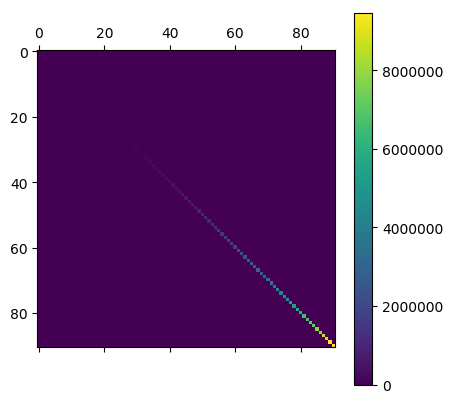

PyObject <matplotlib.colorbar.Colorbar object at 0x1a1a5ba90>

In [21]:
matshow(BaO)
colorbar()

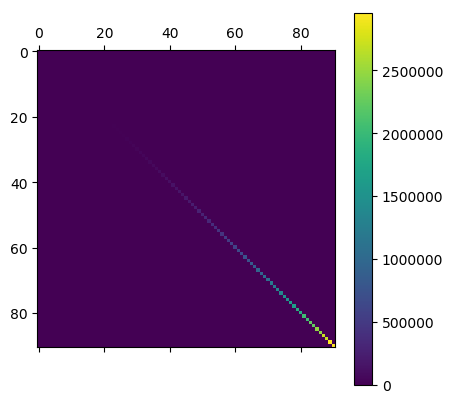

PyObject <matplotlib.colorbar.Colorbar object at 0x1a1bd2550>

In [22]:
matshow(BaO_good)
colorbar()

In [23]:
BaO_good_right = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 591.082 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.34113 0.464235 5.6269 4.49711 -8.01235 -3.30481 1.30482 6.43108 -2.07159 1.16569 -4.65111 4.85172 0.480114 -3.75154 0.0188332 4.13391 -0.231743 -3.78461 -3.95065 4.39517 -0.378741 -5.88766 -1.13613 3.83172 -1.33969 -4.47307 0.696006 3.79821 -0.59705 -4.37648 1.03501 4.03823 -3.09352 -5.15823 2.58894 1.83528 -1.48419 -2.32961 1.07626 2.41475 -1.38562 -2.48401 1.82059 1.46253 0.408319 -2.63058 -0.0161712 1.36419 0.443626 -2.19995 0.0255454 2.11237 0.286624 -1.96791 0.173807 2.02096 1.30095 -2.306 0.211803 2.52941 -0.0579157 -2.08548 0.126925 2.05839 0.161982 -1.99437 0.456278 2.53111 -0.602948 -2.02189; 75.971 -110.675 217.153 89.0182 -49.836 93.9601 101.031 -14.0376 -92.6417 5.48045 56.1387 -4.16431 -38.7026 0.875836 40.0512 -2.92424 -28.2818 20.0444 19.9084 -12.6803 -14.1359 1.66348 12.3831 -1.7143 -12.6859 2.07489 11.001 0.0745821 -8.29495 0.76829 8.28774 -2.35329 -10.4203 -0.3409 10.7628 -0.174209 -9.68224 -0.146656 8.80132 0.551461 -9.80761 -0.768064 8.42634 -1.64251 -9.05677 0.490419 8.64482 -0.297993 -7.9082 0.151937 7.98223 -0.108563 -8.61434 0.545615 6.68153 -1.85102 -5.94347 0.879977 5.63895 -0.473348 -5.66183 0.500807 5.31214 -0.484808 -4.75171 -0.120858 4.4565 -0.134913 -4.73236 0.251903 4.99589 -0.136102 -4.82504 0.0830191 4.47667 0.109992 -4.52007 -0.107413 5.01705 0.0398799 -4.54538 0.298104 4.53927 -0.137486 -4.34617 0.0295551 4.34138 -0.124353 -4.48436 0.152002 4.56519; 165.837 -17.9485 89.0182 335.09 49.2373 56.9489 82.523 1.90359 -21.5869 27.0122 17.4192 -10.6958 -8.59843 8.3902 14.6705 -8.23687 0.495821 18.6297 6.54915 -12.3109 1.91073 3.72318 1.4301 -3.29675 -1.24847 3.64356 2.14052 -4.82033 1.96555 -1.87574 0.31926 -0.836676 0.443286 -1.51215 1.66427 -0.04675 -1.27007 -0.632918 1.16999 -0.180521 -1.78127 -3.02286 0.497614 -1.27239 -2.26194 0.532155 1.40269 -0.505596 -1.3301 0.22069 1.34794 -1.01438 -2.48507 0.960972 0.0888889 -1.69204 -0.90951 0.916427 0.485 -0.608043 -0.73327 0.845939 0.582194 -0.585308 -0.920159 0.762337 -0.20528 0.433958 -0.462411 0.0156185 0.494527 -0.0447588 -0.610129 0.101095 0.533718 0.474688 -0.598678 0.128508 0.839972 0.523791 -0.496214 0.250314 0.749406 -0.114453 -0.659614 0.0955233 0.80513 -0.0627714 -0.592053 0.505648 1.07874; -95.7867 201.71 -49.836 49.2373 294.154 22.4462 -161.451 32.7238 133.883 -15.894 -83.6818 6.76976 58.3038 -3.17217 -54.9656 15.0575 53.0405 -18.4181 -30.9252 11.9323 21.6545 -4.35551 -17.4745 2.53613 19.6415 -2.41785 -16.7329 2.49292 13.0991 -2.07567 -13.2668 -0.921787 15.6725 -0.207042 -15.641 0.148451 14.7683 0.232124 -13.4288 -1.19136 12.8923 -0.968729 -14.8688 0.102883 13.9218 -0.77963 -13.1132 0.382709 12.0653 0.000465541 -12.2694 0.39848 11.9326 -1.94801 -11.4199 1.76768 9.16713 -0.937673 -8.66212 0.607532 8.69328 -0.716863 -8.43708 0.321797 7.14481 -0.370034 -6.88739 0.258923 7.30839 0.0147972 -7.61093 0.118041 7.37044 -0.016853 -7.04432 -0.174093 6.91058 0.329764 -6.943 0.325222 7.36716 -0.159219 -6.95366 0.138726 6.65283 -0.0729016 -6.6408 -0.0410062 6.94325 -0.292877 -6.44391; -1.30454 132.656 93.9601 56.9489 22.4462 318.402 12.2255 32.228 7.59488 -6.44762 4.00092 3.6009 -3.18107 -1.5748 5.17208 4.68465 -0.935059 -2.16031 6.37132 1.6033 -0.209612 -1.48198 2.53816 0.886416 -1.79762 -1.1519 2.14687 0.796279 -1.98399 -2.56758 2.90555 -1.63555 -1.39422 -0.22643 1.55558 0.0399401 -1.27705 -0.0815371 1.15306 -0.872342 -1.76733 -0.839671 0.72529 -0.593946 -1.12121 -0.535014 0.84482 0.220274 -0.87589 -0.241246 0.547158 0.00182602 -1.51041 -0.503345 0.727822 0.210359 -1.1787 -0.161249 0.7407 0.139937 -0.75144 -0.106339 0.495833 0.274274 -1.06022 -0.107106 0.868883 0.352194 -0.943346 0.104262 0.705463 0.03517 -0.673347 0.0421792 0.570835 0.0611528 -0.615798 0.275885 0.844928 0.219023 -0.526668 -0.00208802 0.583762 0.0637494 -0.541985 -0.0472934 0.483003 0.122399 -0.291862 0.0119593 0.863857; 104.638 -28.5215 101.031 82.523 -161.451 12.2255 467.586 -12.8169 -122.577 16.5737 77.1961 -6.95968 -53.8019 5.50079 52.6122 -12.5858 -44.9406 13.0867 35.4309 -8.63513 -16.9748 3.79052 17.6723 -2.32817 -18.8052 2.8765 16.975 -2.63102 -12.4241 0.0680002 12.6397 0.129414 -13.2718 -0.522136 14.9696 -0.0291631 -13.8579 -0.393194 12.6064 0.00516516 -12.5123 -0.733087 13.1644 -0.483659 -13.8108 0.484549 12.2777 -0.306097 -11.3272 0.149909 11.2776 -0.734034 -11.576 1.51811 10.2365 -1.22029 -9.17139 0.670252 8.06753 -0.458922 -8.2301 0.653113 7.89486 -0.551614 -7.22965 0.348017 6.47012 0.106587 -6.88218 -0.0426351 7.04783 -0.0270817 -6.92819 0.0539626 6.5869 0.294895 -6.50367 0.0409992 6.67865 0.0858101 -6.77099 0.127896 6.62059 -0.0667866 -6.27203 0.0214288 6.27066 -0.0890588 -6.29903 0.389429 6.23562; 10.2213 51.8627 -14.0376 1.90359 32.7238 32.228 -12.8169 836.259 15.1254 -1.15194 -9.24995 0.982199 7.51257 -0.162691 -6.34688 2.46994 8.60431 -3.55908 -3.18526 2.28719 4.10243 -0.728063 -2.4857 0.474405 2.84958 -0.715684 -2.26505 -0.204396 2.73791 -0.261395 -2.2484 -0.945494 2.5052 0.0327233 -2.24275 -0.0116949 2.10763 -0.0582418 -1.91225 -0.370284 1.88195 -0.0500633 -2.08243 -0.416805 1.81662 -0.0849049 -1.78695 0.0105151 1.6457 0.0172487 -1.63875 0.014448 1.54332 -0.324118 -1.82083 0.33143 1.25304 -0.167311 -1.29773 0.107023 1.23644 -0.135746 -1.1828 0.156643 0.99566 0.120903 -1.21682 0.00127635 1.114 0.0863044 -1.11952 -0.00930929 1.06252 0.0379594 -1.00681 0.0436814 0.988644 0.129054 -1.00716 0.0121688 1.04002 0.0389115 -0.965932 -0.00704294 0.928554 0.0462656 -0.883724 0.0148096 0.961787 -0.0355082 -0.8847; 2.13213 91.1187 -92.6417 -21.5869 133.883 7.59488 -122.577 15.1254 925.71 -11.0048 -48.939 5.22515 36.1682 -4.83386 -34.5005 6.93891 32.4046 -8.69187 -19.5784 5.75945 14.7076 -2.32223 -12.0093 1.60817 13.0659 -2.44496 -11.6683 1.46059 9.66928 -0.562547 -7.5305 -0.56409 9.47907 0.236655 -10.095 -0.0118739 9.45321 -0.0775477 -8.60301 -0.56165 8.71853 0.0963692 -9.27325 0.0968017 9.18988 -0.390796 -8.48929 0.213424 7.73441 -0.246594 -7.74664 0.636955 7.68259 -0.789526 -7.2377 0.773297 5.94389 -0.416257 -5.67131 0.27707 5.66015 -0.437063 -5.48071 0.590145 4.905 -0.133371 -4.68197 -0.0208791 4.53093 0.0859219 -4.8393 -0.00508485 4.73212 0.0366083 -4.48497 0.0581607 4.44741 0.178126 -4.63056 0.0120653 4.69179 -0.0511628 -4.50872 0.0317583 4.29716 0.00978995 -4.26408 0.178322 4.35105 -0.30569 -4.16825; 23.6173 -27.1409 5.48045 27.0122 -15.894 -6.44762 16.5737 -1.15194 -11.0048 2033.55 7.92165 -1.8494 -5.35535 1.22872 5.05958 -2.63644 -4.16614 3.3052 3.68342 -2.19135 -1.77307 0.88649 1.92954 -0.629124 -1.93483 0.736815 1.69703 -0.602601 -1.25245 -0.2043 1.447 0.296631 -1.48133 -0.167738 1.54137 -0.00282612 -1.42274 -0.0878545 1.29264 0.152369 -1.24449 -0.260439 1.33777 0.0108978 -1.34785 0.101497 1.2321 -0.0752998 -1.14236 0.0189614 1.12995 -0.145642 -1.14787 0.32035 1.01083 -0.310523 -0.950447 0.173931 0.830196 -0.12289 -0.839262 0.165689 0.800342 -0.124744 -0.727521 0.0643205 0.662133 0.0649698 -0.729707 -0.0335447 0.731774 -0.00331103 -0.709972 -0.00353133 0.677225 0.0658909 -0.663893 -0.0438512 0.667771 0.0388038 -0.687076 0.0175911 0.665789 -0.0139196 -0.6337 -0.00253763 0.630854 -0.00778252 -0.6364 0.0825126 0.626903; 22.3902 -19.5893 56.1387 17.4192 -83.6818 4.00092 77.1961 -9.24995 -48.939 7.92165 2058.67 -3.20381 -20.9381 2.94612 20.2302 -4.97369 -17.3744 5.29813 12.6345 -3.51091 -7.81868 1.54564 7.26696 -0.97029 -7.6304 1.35521 6.89212 -1.37406 -5.22936 0.360825 4.9203 0.103095 -5.33868 -0.151784 5.83088 -0.00419529 -5.48744 -0.0614565 4.99492 0.0620645 -5.08042 -0.0997526 5.45746 -0.190019 -5.42181 0.249844 4.87215 -0.143919 -4.49621 0.137502 4.4901 -0.386845 -4.51113 0.57095 4.03907 -0.474765 -3.55503 0.256957 3.27129 -0.170705 -3.29537 0.262468 3.18249 -0.305981 -2.88921 0.207022 2.62039 0.00126265 -2.70813 -0.0268017 2.79719 -0.0058884 -2.74749 0.0124699 2.60318 0.0460924 -2.58376 -0.00599197 2.69685 -0.0046913 -2.74168 0.0508802 2.6293 -0.0280738 -2.49966 0.0211078 2.49688 -0.0879306 -2.51451 0.1847 2.44222; -9.6563 16.9034 -4.16431 -10.6958 6.76976 3.6009 -6.95968 0.982199 5.22515 -1.8494 -3.20381 4208.98 2.24611 -0.611237 -2.18526 1.28109 1.98328 -1.6074 -1.31528 1.06601 0.766122 -0.431671 -0.688191 0.307312 0.758198 -0.379977 -0.663556 0.219055 0.518283 0.060066 -0.508735 -0.156938 0.587438 0.0705832 -0.617021 0.00118497 0.571213 0.0336241 -0.519328 -0.10199 0.515263 0.0972278 -0.543402 -0.0118699 0.548015 -0.0535205 -0.506985 0.0364175 0.465441 -0.0141388 -0.467139 0.0738565 0.476556 -0.155759 -0.434578 0.151136 0.364228 -0.0847722 -0.332321 0.0600377 0.335924 -0.0817188 -0.321645 0.0706861 0.285915 -0.0132013 -0.269973 -0.0260794 0.282593 0.0173725 -0.293502 0.00145982 0.285411 0.00454449 -0.271078 -0.0252181 0.267462 0.0311647 -0.274521 -0.0128669 0.278463 -0.00782264 -0.269814 0.00662101 0.257062 0.00410064 -0.255896 0.0087827 0.26281 -0.0415831 -0.256645; -13.7251 21.7206 -38.7026 -8.59843 58.3038 -3.18107 -53.8019 7.51257 36.1682 -5.35535 -20.9381 2.24611 4223.13 -1.98759 -14.4857 3.57991 12.7804 -4.06493 -8.80357 2.67846 5.68755 -1.10931 -5.10013 0.695684 5.42743 -0.96329 -4.86655 0.885719 3.77917 -0.353239 -3.4153 -0.0581149 3.85749 0.0849089 -4.17775 0.00801714 3.92425 0.027976 -3.57167 -0.0983044 3.62187 0.0212392 -3.88374 0.143236 3.85748 -0.18987 -3.49615 0.10402 3.21557 -0.0953367 -3.22053 0.262384 3.21733 -0.418189 -2.92317 0.366904 2.51869 -0.195988 -2.33772 0.127873 2.35124 -0.19037 -2.27344 0.21822 2.04349 -0.127961 -1.88536 0.016433 1.92197 0.014439 -2.00281 0.00798121 1.96407 -0.00680392 -1.86162 -0.020982 1.84651 0.0214364 -1.92348 0.0159474 1.9554 -0.0395694 -1.8769 0.0226524 1.78576 -0.0138803 -1.78134 0.062111 1.80616 -0.128463 -1.74107; 8.65304 -10.0881 0.875836 8.3902 -3.17217 -1.5748 5.50079 -0.162691 -4.83386 1.22872 2.94612 -0.611237 -1.98759 7796.45 1.88224 -0.86672 -1.46935 1.16558 1.24585 -0.770375 -0.742058 0.296233 0.735809 -0.215957 -0.719591 0.25958 0.631741 -0.133624 -0.471225 -0.0903973 0.471401 0.0844491 -0.570887 -0.053507 0.587669 -0.000669162 -0.530386 -0.0334258 0.481569 0.058775 -0.454572 -0.0796 0.464513 -0.00405729 -0.491782 0.031009 0.464998 -0.0236784 -0.423275 0.00462963 0.41613 -0.0623841 -0.428606 0.10727 0.366973 -0.110128 -0.343789 0.061346 0.311565 -0.0432758 -0.311042 0.0617952 0.294778 -0.0455299 -0.271359 0.00420872 0.247509 0.0255027 -0.261374 -0.0105533 0.273146 -0.000841782 -0.263517 -0.0021185 0.251958 0.0250693 -0.245959 -0.0175063 0.244167 0.0115932 -0.247378 0.00633841 0.245212 -0.00411682 -0.233865 -0.00430946 0.23216 -0.00291687 -0.23327 0.0347946 0.233438; 17.3617 -23.1612 40.0512 14.6705 -54.9656 5.17208 52.6122 -6.34688 -34.5005 5.05958 20.2302 -2.18526 -14.4857 1.88224 7809.99 -3.0767 -11.9672 3.79462 8.63947 -2.50763 -5.51411 1.00493 5.06529 -0.66982 -5.29519 0.884929 4.78362 -0.814155 -3.66153 0.258294 3.36048 -0.00267541 -3.72842 -0.10795 4.05926 -0.0111327 -3.8065 -0.0444012 3.46448 0.107959 -3.5317 -0.0940979 3.74717 -0.171164 -3.74604 0.178097 3.38246 -0.105283 -3.11435 0.0876626 3.10543 -0.243249 -3.12926 0.359452 2.79457 -0.344831 -2.45753 0.186856 2.27297 -0.123794 -2.28469 0.179901 2.20328 -0.19195 -2.00664 0.116449 1.82628 -0.00635421 -1.8709 -0.00725231 1.94183 -0.0103947 -1.90534 0.00756239 1.80415 0.0333009 -1.79123 -0.0239563 1.87233 -0.00198253 -1.89251 0.0435899 1.82066 -0.0246272 -1.7315 0.0150791 1.72765 -0.0525789 -1.73876 0.118947 1.69493; -14.5362 25.8211 -2.92424 -8.23687 15.0575 4.68465 -12.5858 2.46994 6.93891 -2.63644 -4.97369 1.28109 3.57991 -0.86672 -3.0767 13301.4 3.08113 -1.44294 -2.21707 0.993943 1.63731 -0.578306 -1.44848 0.387673 1.44927 -0.465809 -1.25509 0.351978 1.07149 -0.0321245 -1.09923 -0.203079 1.03017 0.0629893 -1.08026 0.00505594 1.01434 0.0495472 -0.921894 -0.156607 0.87988 0.0522273 -0.99801 -0.00866805 0.969471 -0.0905431 -0.86468 0.0608792 0.806758 -0.0387818 -0.796048 0.0885866 0.745756 -0.203339 -0.754776 0.13946 0.661598 -0.0884292 -0.620288 0.0700136 0.609348 -0.0901101 -0.591574 0.0873476 0.525558 -0.0378509 -0.512161 -0.0144332 0.530286 0.0194677 -0.52122 0.00498067 0.508065 0.00564239 -0.485693 -0.0371604 0.475438 0.0473408 -0.475436 0.00101663 0.500825 -0.0142444 -0.477043 0.0135966 0.453054 -0.00394721 -0.445872 0.0180583 0.45399 -0.0447681 -0.420632; -14.6512 35.109 -28.2818 0.495821 53.0405 -0.935059 -44.9406 8.60431 32.4046 -4.16614 -17.3744 1.98328 12.7804 -1.46935 -11.9672 3.08113 13311.0 -3.39542 -7.00089 2.24713 5.31584 -0.963698 -4.38017 0.605049 4.71329 -0.811062 -4.19921 0.591379 3.43298 -0.515124 -2.79767 -0.0871414 3.34553 0.0255231 -3.57576 0.0183016 3.37237 0.0269036 -3.06956 -0.196128 3.07515 -0.0889341 -3.37253 0.110152 3.29553 -0.197683 -3.01498 0.103885 2.75887 -0.0938018 -2.76711 0.171941 2.68655 -0.364137 -2.5688 0.313457 2.13038 -0.172555 -2.03444 0.115874 2.02769 -0.152434 -1.975 0.185517 1.7519 -0.0765393 -1.66135 0.0528051 1.63049 0.00663983 -1.723 0.0158187 1.68804 -0.00264882 -1.60385 -0.0201777 1.58724 0.0530931 -1.64022 0.0419357 1.68795 -0.0401476 -1.61128 0.0281827 1.53475 -0.0147532 -1.52542 0.0576062 1.55625 -0.0867133 -1.46399; 15.3648 -27.4416 20.0444 18.6297 -18.4181 -2.16031 13.0867 -3.55908 -8.69187 3.3052 5.29813 -1.6074 -4.06493 1.16558 3.79462 -1.44294 -3.39542 21305.3 2.59086 -1.30606 -1.89301 0.578341 1.7196 -0.461697 -1.69329 0.566117 1.54061 -0.458012 -1.37046 0.0906519 1.19133 0.153518 -1.22047 -0.115658 1.23831 -0.00711758 -1.1686 -0.0473551 1.06293 0.159263 -1.14015 -0.165811 1.16452 -0.0412338 -1.09924 0.119247 1.00542 -0.0800677 -0.932404 0.0620641 0.902647 -0.119657 -0.924938 0.15968 0.859035 -0.1775 -0.772015 0.107005 0.722089 -0.0796322 -0.709707 0.103674 0.674817 -0.111723 -0.647914 0.0554632 0.623764 0.00866387 -0.602588 -0.0161295 0.606226 -0.00699447 -0.589314 -0.00307502 0.551863 0.0355163 -0.552585 -0.0461676 0.596726 0.0191453 -0.585065 0.0234975 0.553407 -0.0185203 -0.528206 0.00905793 0.516403 -0.0297113 -0.511098 0.0563134 0.518037; 17.2442 -2.31395 19.9084 6.54915 -30.9252 6.37132 35.4309 -3.18526 -19.5784 3.68342 12.6345 -1.31528 -8.80357 1.24585 8.63947 -2.21707 -7.00089 2.59086 21309.4 -1.69851 -2.73813 0.675542 3.03356 -0.413874 -3.15053 0.493114 2.8751 -0.73196 -2.04445 0.0964295 2.13238 -0.0897466 -2.13912 -0.0517714 2.44708 -0.0095849 -2.28529 -0.0580906 2.07996 -0.0251752 -2.08956 -0.0261638 2.22535 -0.151209 -2.30413 0.103241 2.02205 -0.0649126 -1.87433 0.0380786 1.86527 -0.176275 -1.91052 0.263603 1.64706 -0.235732 -1.53495 0.12461 1.33655 -0.0798474 -1.36776 0.120983 1.31526 -0.0935267 -1.21221 0.128693 1.0606 0.00339142 -1.14003 0.00363392 1.15857 -0.00843449 -1.14343 0.0152732 1.0857 0.0435679 -1.07502 0.0183258 1.11299 -0.00897173 -1.131 0.0325172 1.09844 -0.0164384 -1.03996 0.0184276 1.04286 -0.018716 -1.03993 0.0868288 1.02921; -10.2911 18.3201 -12.6803 -12.3109 11.9323 1.6033 -8.63513 2.28719 5.75945 -2.19135 -3.51091 1.06601 2.67846 -0.770375 -2.50763 0.993943 2.24713 -1.30606 -1.69851 32470.6 1.22468 -0.391794 -1.11205 0.309637 1.10189 -0.379826 -1.00072 0.300937 0.884412 -0.0521376 -0.773017 -0.106862 0.79625 0.0768188 -0.810192 0.00452695 0.764022 0.0320405 -0.694931 -0.106617 0.742284 0.109512 -0.76017 0.0248538 0.720067 -0.0781296 -0.658649 0.0525036 0.610515 -0.0396818 -0.59243 0.0799225 0.606686 -0.111013 -0.562976 0.121198 0.503787 -0.0726702 -0.470511 0.0539086 0.46324 -0.070454 -0.440735 0.0746383 0.42129 -0.0354838 -0.4051 -0.00726443 0.393002 0.0112853 -0.396061 0.00446839 0.3851 0.00224494 -0.360926 -0.0240304 0.361112 0.0310237 -0.388888 -0.0126894 0.382151 -0.015206 -0.361884 0.0120192 0.345348 -0.00535447 -0.338019 0.0191323 0.3353 -0.0380969 -0.338961; 4.66846 7.35593 -14.1359 1.91073 21.6545 -0.209612 -16.9748 4.10243 14.7076 -1.77307 -7.81868 0.766122 5.68755 -0.742058 -5.51411 1.63731 5.31584 -1.89301 -2.73813 1.22468 32472.0 -0.460522 -1.65381 0.256685 1.90985 -0.443879 -1.6631 0.261429 1.37065 -0.256241 -1.11305 -0.0499118 1.47772 0.0120487 -1.51985 -0.00180488 1.42832 -0.0336939 -1.29974 -0.0368246 1.31868 -0.0477588 -1.41959 0.0329485 1.36965 -0.0759808 -1.29211 0.0287571 1.17692 -0.0444549 -1.19723 0.108094 1.18658 -0.193734 -1.12352 0.166449 0.867131 -0.081765 -0.845715 0.0478919 0.846089 -0.0772898 -0.820158 0.11978 0.706289 -0.0279069 -0.688889 0.0209554 0.681548 0.0109231 -0.733966 -0.000916907 0.714156 0.00086745 -0.676573 0.0252704 0.671112 0.0100806 -0.699393 0.0145971 0.71218 -0.00912774 -0.679273 0.00383449 0.649576 0.00231767 -0.646896 0.0389583 0.674512 -0.054511 -0.636412; 4.7646 -8.34113 1.66348 3.72318 -4.35551 -1.48198 3.79052 -0.728063 -2.32223 0.88649 1.54564 -0.431671 -1.10931 0.296233 1.00493 -0.578306 -0.963698 0.578341 0.675542 -0.391794 -0.460522 47539.2 0.410408 -0.135154 -0.423466 0.164361 0.370013 -0.114385 -0.307754 -0.000520824 0.306496 0.0666897 -0.307093 -0.0260927 0.323128 -0.00137724 -0.302743 -0.0162518 0.275238 0.0502561 -0.268802 -0.0292326 0.296707 0.00178657 -0.290709 0.0291095 0.262079 -0.0196597 -0.243197 0.0114815 0.241275 -0.0322173 -0.233918 0.067811 0.227064 -0.0550539 -0.196316 0.0330913 0.182367 -0.0249932 -0.18098 0.0329578 0.174872 -0.0309079 -0.156131 0.0108709 0.150211 0.00703588 -0.155134 -0.00680343 0.155508 -0.00139837 -0.151624 -0.00184641 0.144429 0.0121889 -0.142037 -0.0151719 0.144225 0.00221158 -0.149504 0.00468392 0.142951 -0.00418517 -0.135911 0.0004018 0.13429 -0.00570693 -0.136844 0.0167848 0.129647; 1.21131 0.464235 12.3831 1.4301 -17.4745 2.53816 17.6723 -2.4857 -12.0093 1.92954 7.26696 -0.688191 -5.10013 0.735809 5.06529 -1.44848 -4.38017 1.7196 3.03356 -1.11205 -1.65381 0.410408 47540.5 -0.231335 -1.71169 0.352053 1.52598 -0.364873 -1.13042 0.117537 1.10928 -0.0181777 -1.25994 -0.0243153 1.37137 0.000624995 -1.28037 0.0039297 1.16511 -0.0209034 -1.17992 0.005767 1.24913 -0.0632668 -1.26205 0.0570417 1.14646 -0.0267134 -1.05508 0.0280025 1.06379 -0.112932 -1.08994 0.172206 0.961906 -0.151793 -0.822057 0.0747231 0.744042 -0.0438355 -0.758376 0.0737326 0.729033 -0.084908 -0.650544 0.0568779 0.593919 -0.00304873 -0.627186 -0.00470109 0.653385 5.41596e-5 -0.640133 0.00513359 0.606654 -0.00294728 -0.60155 0.010251 0.626145 -0.00593761 -0.633528 0.0120219 0.612163 -0.00411194 -0.58226 0.00314325 0.583331 -0.0232182 -0.595386 0.0562403 0.582098; -3.29318 5.6269 -1.7143 -3.29675 2.53613 0.886416 -2.32817 0.474405 1.60817 -0.629124 -0.97029 0.307312 0.695684 -0.215957 -0.66982 0.387673 0.605049 -0.461697 -0.413874 0.309637 0.256685 -0.135154 -0.231335 67329.4 0.248003 -0.120352 -0.220324 0.079307 0.17583 0.00510431 -0.164782 -0.0433425 0.182969 0.0217464 -0.194111 0.000857283 0.181523 0.0111566 -0.165123 -0.0335105 0.166795 0.0286891 -0.177452 0.00100094 0.175845 -0.020148 -0.160566 0.0136651 0.147875 -0.00767229 -0.147664 0.0246132 0.149183 -0.0458537 -0.136833 0.0434317 0.116812 -0.0251877 -0.107474 0.0183472 0.108066 -0.0246599 -0.103852 0.0228005 0.0936041 -0.00689008 -0.0880124 -0.00589929 0.090187 0.00469504 -0.0931104 0.000889452 0.0909031 0.00116498 -0.0861356 -0.00836742 0.0853126 0.0100439 -0.0886101 -0.00325903 0.0898174 -0.00346741 -0.0862897 0.00282721 0.0821559 9.18079e-5 -0.0816425 0.00403068 0.0830776 -0.0129506 -0.0809494; -2.93483 4.49711 -12.6859 -1.24847 19.6415 -1.79762 -18.8052 2.84958 13.0659 -1.93483 -7.6304 0.758198 5.42743 -0.719591 -5.29519 1.44927 4.71329 -1.69329 -3.15053 1.10189 1.90985 -0.423466 -1.71169 0.248003 67331.2 -0.361349 -1.66965 0.337573 1.27931 -0.144822 -1.18419 -0.00278133 1.36743 0.0223818 -1.47801 0.00184318 1.38361 0.00145267 -1.25911 -0.0123719 1.26974 -0.0124086 -1.35858 0.0579048 1.35876 -0.0663162 -1.23794 0.0327125 1.13714 -0.0316297 -1.14453 0.103437 1.15386 -0.172277 -1.0443 0.151474 0.883682 -0.077074 -0.813376 0.0472916 0.823038 -0.073703 -0.794298 0.0852678 0.707308 -0.0499812 -0.654282 0.00784132 0.675281 0.00469818 -0.706511 0.00194697 0.691967 -0.0038275 -0.65636 -0.0010895 0.650303 0.000201237 -0.674969 0.00903987 0.686555 -0.013672 -0.661049 0.00655379 0.629073 -0.00384407 -0.62857 0.023768 0.641643 -0.0518715 -0.620071; 3.50409 -8.01235 2.07489 3.64356 -2.41785 -1.1519 2.8765 -0.715684 -2.44496 0.736815 1.35521 -0.379977 -0.96329 0.25958 0.884929 -0.465809 -0.811062 0.566117 0.493114 -0.379826 -0.443879 0.164361 0.352053 -0.120352 -0.361349 92737.0 0.31718 -0.0832221 -0.256928 0.00638248 0.221171 0.0547512 -0.273834 -0.0246461 0.283515 -0.00126728 -0.259819 -0.0107423 0.236162 0.0491759 -0.235478 -0.0300745 0.238621 -0.00062822 -0.244237 0.0264095 0.229585 -0.0171952 -0.209004 0.0110918 0.207367 -0.0286271 -0.203313 0.0550217 0.19174 -0.0532563 -0.160791 0.0309241 0.157587 -0.0225141 -0.154627 0.0297342 0.149097 -0.0301174 -0.133681 0.005222 0.12674 0.00524147 -0.12651 -0.00570966 0.133632 -0.00126555 -0.129563 -0.00206317 0.122901 0.00805671 -0.121319 -0.0150595 0.124905 0.00281248 -0.124447 0.00435813 0.121638 -0.00367089 -0.116116 -0.000389592 0.114973 -0.00627039 -0.116828 0.015109 0.111631; 3.27787 -3.30481 11.001 2.14052 -16.7329 2.14687 16.975 -2.26505 -11.6683 1.69703 6.89212 -0.663556 -4.86655 0.631741 4.78362 -1.25509 -4.19921 1.54061 2.8751 -1.00072 -1.6631 0.370013 1.52598 -0.220324 -1.66965 0.31718 92738.4 -0.295078 -1.12321 0.104563 1.06173 -0.0126219 -1.21894 -0.0243014 1.32549 -0.00183233 -1.23708 -0.00458552 1.12566 0.00580544 -1.13256 -0.00152754 1.20451 -0.0589279 -1.21694 0.0558863 1.10655 -0.0284549 -1.01647 0.0258959 1.0206 -0.0922414 -1.0401 0.150203 0.930655 -0.138058 -0.793469 0.0699204 0.724301 -0.0426551 -0.734633 0.066491 0.706949 -0.0738436 -0.635322 0.0433505 0.580581 -0.00357755 -0.604351 -0.00298787 0.631411 -0.00185514 -0.618548 0.00399911 0.586879 0.00343914 -0.58116 0.0016824 0.602276 -0.00547108 -0.611424 0.0128672 0.590858 -0.00576684 -0.561953 0.00311711 0.561949 -0.01973 -0.571061 0.0466797 0.557936; -3.77929 1.30482 0.0745821 -4.82033 2.49292 0.796279 -2.63102 -0.204396 1.46059 -0.602601 -1.37406 0.219055 0.885719 -0.133624 -0.814155 0.351978 0.591379 -0.458012 -0.73196 0.300937 0.261429 -0.114385 -0.364873 0.079307 0.337573 -0.0832221 -0.295078 1.24736e5 0.204657 0.0580125 -0.28963 -0.0367994 0.261169 0.0278255 -0.266841 3.1973e-5 0.245139 0.01557 -0.222496 -0.0038764 0.206272 0.0505946 -0.226658 -0.0019319 0.227754 -0.00825438 -0.205803 0.00805676 0.193376 0.00259495 -0.18813 0.0162243 0.192402 -0.0436608 -0.162241 0.0429376 0.172864 -0.023368 -0.142075 0.016063 0.144299 -0.0215535 -0.136412 0.0104837 0.127025 -0.0156069 -0.111746 -0.0131474 0.131791 0.00444352 -0.126524 0.000129086 0.122198 -0.000788743 -0.117122 -0.0116775 0.113898 0.000316326 -0.111695 -0.00881458 0.116875 -0.00180981 -0.113263 0.00125907 0.107699 -0.000213081 -0.107139 -0.00255739 0.106235 -0.0100051 -0.106606; -0.409778 6.43108 -8.29495 1.96555 13.0991 -1.98399 -12.4241 2.73791 9.66928 -1.25245 -5.22936 0.518283 3.77917 -0.471225 -3.66153 1.07149 3.43298 -1.37046 -2.04445 0.884412 1.37065 -0.307754 -1.13042 0.17583 1.27931 -0.256928 -1.12321 0.204657 1.24737e5 -0.176166 -0.755471 0.0207322 0.956898 -0.000599215 -1.02037 0.00420616 0.953105 -0.0100108 -0.867284 -0.0307387 0.871328 -0.0453999 -0.930775 0.052839 0.928956 -0.0558548 -0.860258 0.0244885 0.784591 -0.0234898 -0.795106 0.0699651 0.790632 -0.130608 -0.737584 0.12339 0.596312 -0.0613619 -0.560151 0.0361549 0.565054 -0.0538556 -0.547417 0.0627017 0.476631 -0.0291172 -0.456941 0.0183467 0.456373 -0.000389482 -0.487523 0.00358278 0.476359 -0.00240487 -0.452108 0.00750811 0.447614 0.00681527 -0.463465 0.0153072 0.47158 -0.0123401 -0.454428 0.0063031 0.433118 -0.00308338 -0.431717 0.0183196 0.446913 -0.036411 -0.424271; -2.62764 -2.07159 0.76829 -1.87574 -2.07567 -2.56758 0.0680002 -0.261395 -0.562547 -0.2043 0.360825 0.060066 -0.353239 -0.0903973 0.258294 -0.0321245 -0.515124 0.0906519 0.0964295 -0.0521376 -0.256241 -0.000520824 0.117537 0.00510431 -0.144822 0.00638248 0.104563 0.0580125 -0.176166 1.64378e5 0.133385 0.066662 -0.142852 0.00805592 0.112254 0.00150049 -0.107165 0.0111808 0.0970485 0.0180974 -0.0956873 0.0196741 0.110159 0.0393628 -0.0831163 -0.00173776 0.0870058 0.00563411 -0.0806032 -0.00494751 0.0797666 0.010926 -0.0705968 0.00654165 0.104201 -0.00820016 -0.0600074 0.00258125 0.0684932 -0.00058987 -0.0624407 3.0292e-6 0.0593934 -0.00331038 -0.047559 -0.0144822 0.0720383 -0.00349856 -0.060361 -0.00568666 0.0587059 0.00129112 -0.0545424 -0.00297159 0.0514856 -0.0083856 -0.0504248 -0.00711434 0.0513284 -0.00292177 -0.0536827 -0.00532559 0.0478532 0.00200628 -0.0463821 -0.00413518 0.0422196 0.000403409 -0.0487513 -0.00328299 0.0429918; 5.05196 1.16569 8.28774 0.31926 -13.2668 2.90555 12.6397 -2.2484 -7.5305 1.447 4.9203 -0.508735 -3.4153 0.471401 3.36048 -1.09923 -2.79767 1.19133 2.13238 -0.773017 -1.11305 0.306496 1.10928 -0.164782 -1.18419 0.221171 1.06173 -0.28963 -0.755471 0.133385 164379.0 -0.0466165 -0.838094 -0.00929254 0.925175 -0.00434853 -0.870239 -0.0135951 0.792107 -0.0259112 -0.801265 0.0173584 0.866027 -0.065289 -0.866613 0.0506942 0.772653 -0.0251762 -0.716871 0.0204377 0.721463 -0.0679133 -0.731408 0.131854 0.637293 -0.107393 -0.567872 0.0544624 0.508838 -0.0328807 -0.518943 0.0490836 0.500551 -0.0497075 -0.448183 0.0511356 0.398834 -0.0128819 -0.433652 0.00258579 0.442667 -0.00373306 -0.435228 0.00792619 0.412763 0.0101963 -0.409307 0.013022 0.425751 -0.00948665 -0.434634 0.0135834 0.417551 -0.00663107 -0.396595 0.00725828 0.398505 -0.0135827 -0.403711 0.034247 0.392149; 0.713839 -4.65111 -2.35329 -0.836676 -0.921787 -1.63555 0.129414 -0.945494 -0.56409 0.296631 0.103095 -0.156938 -0.0581149 0.0844491 -0.00267541 -0.203079 -0.0871414 0.153518 -0.0897466 -0.106862 -0.0499118 0.0666897 -0.0181777 -0.0433425 -0.00278133 0.0547512 -0.0126219 -0.0367994 0.0207322 0.066662 -0.0466165 2.12794e5 -0.000948371 0.00160702 -0.000776689 -0.00125417 -0.00313668 -0.00014644 0.00306083 0.0298666 0.0144868 0.0163848 0.0145862 0.0153755 -0.00576009 0.0181942 0.0106108 -0.0085682 -0.00683485 0.00782857 0.0156077 -0.00496106 0.0102757 0.0227493 0.00711363 -0.0146398 0.00798514 0.00948869 0.00224715 -0.00747679 -0.0019504 0.00786712 0.00798258 -0.0118156 0.00942443 0.00415896 -0.00617359 -0.00810277 0.00722628 -0.0036726 0.00017406 -0.00112743 -0.000523874 -0.001338 0.00241549 0.00010983 -0.000894077 -0.0093259 -0.00507106 -0.00513902 -0.00368831 0.000778035 0.00189745 -0.00226336 -0.00218262 0.0012178 0.00376884 -0.00399747 -0.00911388 0.00230749 -0.00683699; -0.886231 4.85172 -10.4203 0.443286 15.6725 -1.39422 -13.2718 2.5052 9.47907 -1.48133 -5.33868 0.587438 3.85749 -0.570887 -3.72842 1.03017 3.34553 -1.22047 -2.13912 0.79625 1.47772 -0.307093 -1.25994 0.182969 1.36743 -0.273834 -1.21894 0.261169 0.956898 -0.142852 -0.838094 -0.000948371 2.12795e5 0.0102639 -1.05477 0.00167619 0.99463 -0.00595611 -0.905403 -0.0198551 0.92293 -0.0266507 -0.995857 0.0449468 0.973728 -0.0547165 -0.891073 0.0266737 0.817981 -0.0296174 -0.824018 0.0798806 0.819713 -0.12038 -0.749789 0.10815 0.629005 -0.0550809 -0.592408 0.0335691 0.595346 -0.052807 -0.576848 0.0671594 0.511723 -0.0401064 -0.477644 0.0112993 0.483018 0.00312432 -0.508244 0.0017547 0.497791 -0.00208006 -0.471484 0.00446708 0.46823 0.00370645 -0.489492 0.0106208 0.498381 -0.0108089 -0.475961 0.00559258 0.453587 -0.00424595 -0.452732 0.0211799 0.46258 -0.0387157 -0.442089; -1.0068 0.480114 -0.3409 -1.51215 -0.207042 -0.22643 -0.522136 0.0327233 0.236655 -0.167738 -0.151784 0.0705832 0.0849089 -0.053507 -0.10795 0.0629893 0.0255231 -0.115658 -0.0517714 0.0768188 0.0120487 -0.0260927 -0.0243153 0.0217464 0.0223818 -0.0246461 -0.0243014 0.0278255 -0.000599215 0.00805592 -0.00929254 0.00160702 0.0102639 2.71191e5 -0.0210859 0.000329387 0.0177555 0.0037144 -0.0162067 -0.00150214 0.0177592 0.0156204 -0.0121246 0.00633169 0.021761 -0.00398714 -0.0172622 0.00335797 0.0157725 -0.00165137 -0.0159286 0.00629655 0.0204367 -0.00736203 -0.00794777 0.0106121 0.0113697 -0.00588224 -0.00939059 0.0040208 0.0104133 -0.00548984 -0.00959887 0.00418018 0.0101431 -0.00409081 -0.00393388 -0.00221722 0.00747191 0.000153805 -0.00827421 0.000311642 0.0086412 -0.000418417 -0.00810687 -0.0027858 0.00821693 8.86041e-5 -0.00906471 -0.00255148 0.0076694 -0.00146623 -0.00895495 0.00077022 0.00828473 -0.000505827 -0.00903883 0.000592671 0.00811209 -0.00316085 -0.00979899; 2.60649 -3.75154 10.7628 1.66427 -15.641 1.55558 14.9696 -2.24275 -10.095 1.54137 5.83088 -0.617021 -4.17775 0.587669 4.05926 -1.08026 -3.57576 1.23831 2.44708 -0.810192 -1.51985 0.323128 1.37137 -0.194111 -1.47801 0.283515 1.32549 -0.266841 -1.02037 0.112254 0.925175 -0.000776689 -1.05477 -0.0210859 2.71192e5 -0.00136771 -1.07747 -0.00255097 0.980686 0.0110838 -0.995621 0.00193194 1.06228 -0.0481656 -1.06261 0.0531782 0.962862 -0.0274057 -0.884976 0.0281576 0.888123 -0.0817928 -0.892912 0.126503 0.806524 -0.110455 -0.691144 0.0571096 0.637988 -0.0357164 -0.644024 0.0557797 0.622139 -0.0673839 -0.558347 0.0397787 0.514044 -0.00594951 -0.525972 -0.00350257 0.549552 -0.00152665 -0.539168 0.00288957 0.510948 0.00191323 -0.506951 -0.000605417 0.528521 -0.00557771 -0.536106 0.0111973 0.515848 -0.00552814 -0.490654 0.00367973 0.489976 -0.0199822 -0.497602 0.0399725 0.481277; 0.000712206 0.0188332 -0.174209 -0.04675 0.148451 0.0399401 -0.0291631 -0.0116949 -0.0118739 -0.00282612 -0.00419529 0.00118497 0.00801714 -0.000669162 -0.0111327 0.00505594 0.0183016 -0.00711758 -0.0095849 0.00452695 -0.00180488 -0.00137724 0.000624995 0.000857283 0.00184318 -0.00126728 -0.00183233 3.1973e-5 0.00420616 0.00150049 -0.00434853 -0.00125417 0.00167619 0.000329387 -0.00136771 3.40855e5 0.00181422 3.24617e-5 -0.00165843 -0.000158672 0.00286255 0.000571392 -0.00328963 -0.000558308 0.00187743 0.000126217 -0.00137222 -7.10919e-5 0.00153138 0.000175409 -0.00147643 0.00019645 0.00234608 -0.00067797 -0.00277544 0.000658151 0.00158144 -0.000319064 -0.000894532 0.000200413 0.00107604 -0.000326868 -0.000870196 0.000227921 0.00104899 0.000155851 -0.00163166 -0.000318125 0.0014285 0.000157906 -0.00104069 -5.27544e-5 0.00102453 4.98166e-5 -0.000861493 -2.43463e-5 0.00096888 7.26295e-5 -0.0014163 -0.000140725 0.00132434 8.48237e-5 -0.000989698 -5.49387e-5 0.000937486 0.000117327 -0.000827664 -4.66991e-5 0.000908578 -0.000159739 -0.00129178; -2.69173 4.13391 -9.68224 -1.27007 14.7683 -1.27705 -13.8579 2.10763 9.45321 -1.42274 -5.48744 0.571213 3.92425 -0.530386 -3.8065 1.01434 3.37237 -1.1686 -2.28529 0.764022 1.42832 -0.302743 -1.28037 0.181523 1.38361 -0.259819 -1.23708 0.245139 0.953105 -0.107165 -0.870239 -0.00313668 0.99463 0.0177555 -1.07747 0.00181422 3.40856e5 0.00321131 -0.919914 -0.0146617 0.930781 -0.00560474 -0.997552 0.042834 0.994104 -0.0500142 -0.90292 0.0256896 0.82992 -0.0247408 -0.833559 0.073683 0.836516 -0.119582 -0.758182 0.10476 0.647068 -0.0542482 -0.598054 0.0340046 0.603537 -0.0521443 -0.58316 0.0606978 0.521571 -0.0365056 -0.481488 0.00626112 0.493815 0.00315208 -0.515863 0.0018284 0.505701 -0.00261414 -0.479483 -0.00240848 0.475397 0.00188936 -0.494515 0.00623289 0.502932 -0.0105136 -0.483408 0.00543261 0.459959 -0.00351784 -0.459314 0.0174112 0.467315 -0.0364351 -0.450902; -1.01586 -0.231743 -0.146656 -0.632918 0.232124 -0.0815371 -0.393194 -0.0582418 -0.0775477 -0.0878545 -0.0614565 0.0336241 0.027976 -0.0334258 -0.0444012 0.0495472 0.0269036 -0.0473551 -0.0580906 0.0320405 -0.0336939 -0.0162518 0.0039297 0.0111566 0.00145267 -0.0107423 -0.00458552 0.01557 -0.0100108 0.0111808 -0.0135951 -0.00014644 -0.00595611 0.0037144 -0.00255097 3.24617e-5 0.00321131 4.23149e5 -0.0029903 0.00264373 0.00399028 0.00647465 -0.00569789 0.00255222 0.00848726 -0.00103359 -0.00250781 0.00138392 0.00380428 0.000197802 -0.00401097 0.00494814 0.00682989 -0.00592861 -0.00310962 0.0045775 0.00528385 -0.00276496 6.5898e-5 0.0021254 0.00182331 -0.00341551 -0.00163152 0.00106087 0.00241459 -0.0023029 0.00149446 -0.00226717 0.00322221 0.000250914 -0.00109008 4.71419e-5 0.00172369 -0.000449265 -0.00160215 -0.00343755 0.00172764 -0.00109271 -0.00215231 -0.00107548 0.00240409 -0.000574298 -0.00242603 0.000250339 0.00197908 -0.000136981 -0.00253491 -0.000440467 0.00188001 -0.00247936 -0.00300678; 2.46325 -3.78461 8.80132 1.16999 -13.4288 1.15306 12.6064 -1.91225 -8.60301 1.29264 4.99492 -0.519328 -3.57167 0.481569 3.46448 -0.921894 -3.06956 1.06293 2.07996 -0.694931 -1.29974 0.275238 1.16511 -0.165123 -1.25911 0.236162 1.12566 -0.222496 -0.867284 0.0970485 0.792107 0.00306083 -0.905403 -0.0162067 0.980686 -0.00165843 -0.919914 -0.0029903 423150.0 0.0135157 -0.847034 0.00492132 0.907735 -0.0388413 -0.904656 0.0454385 0.821743 -0.0233545 -0.755299 0.0224273 0.758607 -0.066887 -0.761337 0.108713 0.690054 -0.0953085 -0.588894 0.0493623 0.544267 -0.0309516 -0.549256 0.0474271 0.530695 -0.0551252 -0.474634 0.0330933 0.43819 -0.00563748 -0.449448 -0.002876 0.469508 -0.0016688 -0.460243 0.00236494 0.436386 0.00224272 -0.432658 -0.00177909 0.450027 -0.0056355 -0.457683 0.00955365 0.439934 -0.00494216 -0.418596 0.00318096 0.418004 -0.015782 -0.4253 0.033094 0.410379; -0.183597 -3.95065 0.551461 -0.180521 -1.19136 -0.872342 0.00516516 -0.370284 -0.56165 0.152369 0.0620645 -0.10199 -0.0983044 0.058775 0.107959 -0.156607 -0.196128 0.159263 -0.0251752 -0.106617 -0.0368246 0.0502561 -0.0209034 -0.0335105 -0.0123719 0.0491759 0.00580544 -0.0038764 -0.0307387 0.0180974 -0.0259112 0.0298666 -0.0198551 -0.00150214 0.0110838 -0.000158672 -0.0146617 0.00264373 0.0135157 5.19516e5 -0.0170055 0.00580688 0.0270358 0.00782582 -0.0128873 0.00870745 0.0192779 -0.00429558 -0.0151218 0.00419306 0.0194861 -0.00565447 -0.0159412 0.018672 0.0249949 -0.01505 -0.00292236 0.0087064 0.00806376 -0.00636467 -0.00845635 0.00802651 0.00952446 -0.01162 -0.0025855 -0.00332842 0.0112294 -0.000779407 -0.00164444 -0.00275693 0.00800616 -0.000191686 -0.00756231 -0.0019943 0.00700344 -0.0019828 -0.00738599 -0.00888621 0.00890027 -0.00202711 -0.0105611 0.000286087 0.00778418 -0.000813674 -0.00795887 -0.00103308 0.00761414 -0.003207 -0.0114074 0.00331378 0.00739616; -2.88814 4.39517 -9.80761 -1.78127 12.8923 -1.76733 -12.5123 1.88195 8.71853 -1.24449 -5.08042 0.515263 3.62187 -0.454572 -3.5317 0.87988 3.07515 -1.14015 -2.08956 0.742284 1.31868 -0.268802 -1.17992 0.166795 1.26974 -0.235478 -1.13256 0.206272 0.871328 -0.0956873 -0.801265 0.0144868 0.92293 0.0177592 -0.995621 0.00286255 0.930781 0.00399028 -0.847034 -0.0170055 519517.0 0.0014435 -0.909882 0.0483618 0.911763 -0.0459805 -0.831376 0.0240077 0.76387 -0.0219758 -0.767486 0.0629923 0.774774 -0.105281 -0.693813 0.102662 0.593943 -0.052603 -0.550033 0.0324169 0.554839 -0.0479416 -0.534889 0.0549096 0.478403 -0.0298095 -0.442219 0.00619422 0.454799 0.000806218 -0.475472 0.0025839 0.465535 -0.00280722 -0.440669 -0.00299271 0.437509 0.00255528 -0.457419 0.00490285 0.461017 -0.0111308 -0.444425 0.00564317 0.423074 -0.00317017 -0.422478 0.0155819 0.430354 -0.0319191 -0.417051; -1.67346 -0.378741 -0.768064 -3.02286 -0.968729 -0.839671 -0.733087 -0.0500633 0.0963692 -0.260439 -0.0997526 0.0972278 0.0212392 -0.0796 -0.0940979 0.0522273 -0.0889341 -0.165811 -0.0261638 0.109512 -0.0477588 -0.0292326 0.005767 0.0286891 -0.0124086 -0.0300745 -0.00152754 0.0505946 -0.0453999 0.0196741 0.0173584 0.0163848 -0.0266507 0.0156204 0.00193194 0.000571392 -0.00560474 0.00647465 0.00492132 0.00580688 0.0014435 6.31475e5 0.0154639 0.016165 0.00707321 -0.00465432 0.00141427 0.00489024 -0.00104373 -0.00226345 0.000815704 0.00956071 0.011873 -0.00583755 0.016099 0.0148788 -0.00278004 -0.00797376 0.00623634 0.00516086 -0.00350458 -0.00720572 0.00467153 0.0044721 0.000433839 -0.00884105 0.0131488 -0.00414289 -0.00526853 -0.000896984 0.00488497 0.000528062 -0.00320833 -0.00141383 0.00349469 -0.00485599 -0.00269231 -0.00267795 0.000444767 -0.00579455 -0.00465133 -0.0028127 0.000973965 0.00119027 -0.00157911 -0.0013673 -0.000323036 0.000470815 -0.00254034 -0.00457111 -0.00321308; 3.39768 -5.88766 8.42634 0.497614 -14.8688 0.72529 13.1644 -2.08243 -9.27325 1.33777 5.45746 -0.543402 -3.88374 0.464513 3.74717 -0.99801 -3.37253 1.16452 2.22535 -0.76017 -1.41959 0.296707 1.24913 -0.177452 -1.35858 0.238621 1.20451 -0.226658 -0.930775 0.110159 0.866027 0.0145862 -0.995857 -0.0121246 1.06228 -0.00328963 -0.997552 -0.00569789 0.907735 0.0270358 -0.909882 0.0154639 6.31476e5 -0.0353912 -0.973544 0.0496994 0.890037 -0.0253995 -0.818223 0.0197913 0.823567 -0.0638882 -0.821893 0.119797 0.752322 -0.105879 -0.635144 0.0551619 0.589337 -0.0348777 -0.594101 0.0507518 0.574458 -0.0526351 -0.50897 0.0336013 0.473463 -0.00798005 -0.48857 -0.00277062 0.510043 -0.00292631 -0.498863 0.00225907 0.473684 0.00427342 -0.468735 -0.00577746 0.484554 -0.00882256 -0.496486 0.0103923 0.4757 -0.00608283 -0.453072 0.00367596 0.452379 -0.0133993 -0.462514 0.032794 0.443211; -0.380813 -1.13613 -1.64251 -1.27239 0.102883 -0.593946 -0.483659 -0.416805 0.0968017 0.0108978 -0.190019 -0.0118699 0.143236 -0.00405729 -0.171164 -0.00866805 0.110152 -0.0412338 -0.151209 0.0248538 0.0329485 0.00178657 -0.0632668 0.00100094 0.0579048 -0.00062822 -0.0589279 -0.0019319 0.052839 0.0393628 -0.065289 0.0153755 0.0449468 0.00633169 -0.0481656 -0.000558308 0.042834 0.00255222 -0.0388413 0.00782582 0.0483618 0.016165 -0.0353912 7.60624e5 0.0397949 0.00532601 -0.0337715 -0.00160659 0.0326521 0.00288621 -0.0280755 0.0031958 0.0426423 9.60075e-5 -0.0304059 0.00376661 0.0327901 -0.00147909 -0.0247775 0.000674633 0.0252267 -0.00213425 -0.0208994 -0.000719638 0.0274837 0.00104482 -0.0246704 -0.00622229 0.0260142 -0.000615936 -0.02279 -0.000470209 0.0220024 -0.000362522 -0.0198368 -0.00191417 0.0204166 -0.00250329 -0.0243169 -0.00369268 0.0199575 -0.000233013 -0.0200887 -0.000654076 0.0189356 0.000911063 -0.0179652 -0.00136723 0.0156417 -0.00200852 -0.0237037; -3.68461 3.83172 -9.05677 -2.26194 13.9218 -1.12121 -13.8108 1.81662 9.18988 -1.34785 -5.42181 0.548015 3.85748 -0.491782 -3.74604 0.969471 3.29553 -1.09924 -2.30413 0.720067 1.36965 -0.290709 -1.26205 0.175845 1.35876 -0.244237 -1.21694 0.227754 0.928956 -0.0831163 -0.866613 -0.00576009 0.973728 0.021761 -1.06261 0.00187743 0.994104 0.00848726 -0.904656 -0.0128873 0.911763 0.00707321 -0.973544 0.0397949 7.60625e5 -0.0460133 -0.886412 0.0245793 0.815338 -0.0213513 -0.817389 0.0676568 0.823833 -0.114818 -0.743266 0.0993106 0.640625 -0.0520766 -0.586453 0.0332912 0.592955 -0.0501403 -0.572093 0.0551168 0.514117 -0.0330987 -0.471868 0.00312417 0.487369 0.00315932 -0.507058 0.00185061 0.497289 -0.00272105 -0.471764 -0.00636544 0.46734 0.00133996 -0.484855 0.00348003 0.492785 -0.0100328 -0.475252 0.00524455 0.451824 -0.00300837 -0.45125 0.0147253 0.45795 -0.0338761 -0.444102; 0.352308 -1.33969 0.490419 0.532155 -0.77963 -0.535014 0.484549 -0.0849049 -0.390796 0.101497 0.249844 -0.0535205 -0.18987 0.031009 0.178097 -0.0905431 -0.197683 0.119247 0.103241 -0.0781296 -0.0759808 0.0291095 0.0570417 -0.020148 -0.0663162 0.0264095 0.0558863 -0.00825438 -0.0558548 -0.00173776 0.0506942 0.0181942 -0.0547165 -0.00398714 0.0531782 0.000126217 -0.0500142 -0.00103359 0.0454385 0.00870745 -0.0459805 -0.00465432 0.0496994 0.00532601 -0.0460133 9.08637e5 0.0433405 -0.00174644 -0.0400786 0.000300896 0.0400494 -0.00381644 -0.0403318 0.0113214 0.0415068 -0.0111697 -0.0313417 0.00602242 0.0296512 -0.0041203 -0.0293738 0.00556052 0.0279662 -0.0051377 -0.0245279 -0.000765086 0.0265283 0.00154111 -0.0259325 -0.00184731 0.0261662 7.70686e-5 -0.0251882 -0.000646741 0.0238021 0.000775196 -0.0235392 -0.00284515 0.0244486 0.000625095 -0.0248854 -0.000108886 0.0234377 -0.000185316 -0.0224093 -0.000781552 0.0218054 -0.000509222 -0.0230029 0.00248013 0.022278; 2.27416 -4.47307 8.64482 1.40269 -13.1132 0.84482 12.2777 -1.78695 -8.48929 1.2321 4.87215 -0.506985 -3.49615 0.464998 3.38246 -0.86468 -3.01498 1.00542 2.02205 -0.658649 -1.29211 0.262079 1.14646 -0.160566 -1.23794 0.229585 1.10655 -0.205803 -0.860258 0.0870058 0.772653 0.0106108 -0.891073 -0.0172622 0.962862 -0.00137222 -0.90292 -0.00250781 0.821743 0.0192779 -0.831376 0.00141427 0.890037 -0.0337715 -0.886412 0.0433405 9.08638e5 -0.0226337 -0.740794 0.0217756 0.743573 -0.0638308 -0.745121 0.101685 0.678357 -0.0902383 -0.577038 0.0470858 0.535262 -0.0298586 -0.539332 0.0456012 0.52119 -0.0534243 -0.466369 0.029483 0.432223 -0.00423655 -0.440463 -0.00350538 0.461033 -0.00144112 -0.451769 0.00155163 0.428335 0.00188086 -0.42466 -0.00396553 0.441699 -0.0046751 -0.448999 0.00878504 0.431583 -0.0046759 -0.41073 0.00259957 0.409809 -0.0152461 -0.416992 0.0315313 0.402084; -0.377095 0.696006 -0.297993 -0.505596 0.382709 0.220274 -0.306097 0.0105151 0.213424 -0.0752998 -0.143919 0.0364175 0.10402 -0.0236784 -0.105283 0.0608792 0.103885 -0.0800677 -0.0649126 0.0525036 0.0287571 -0.0196597 -0.0267134 0.0136651 0.0327125 -0.0171952 -0.0284549 0.00805676 0.0244885 0.00563411 -0.0251762 -0.0085682 0.0266737 0.00335797 -0.0274057 -7.10919e-5 0.0256896 0.00138392 -0.0233545 -0.00429558 0.0240077 0.00489024 -0.0253995 -0.00160659 0.0245793 -0.00174644 -0.0226337 1.07727e6 0.0209887 -4.46583e-5 -0.021095 0.00314915 0.022512 -0.00761525 -0.0210555 0.0075151 0.0166687 -0.00406849 -0.0145678 0.00279626 0.014961 -0.00389585 -0.0141241 0.00314241 0.0126712 -8.18021e-5 -0.012634 -0.0016851 0.0131817 0.000979242 -0.0133247 -4.0692e-5 0.0129271 0.000271941 -0.012193 -0.00103794 0.0121077 0.00135929 -0.0127148 -0.000774299 0.0127956 -0.000128672 -0.0121993 0.000138078 0.011624 0.00042954 -0.011485 0.00017549 0.0119437 -0.00192837 -0.0120792; -2.43833 3.79821 -7.9082 -1.3301 12.0653 -0.87589 -11.3272 1.6457 7.73441 -1.14236 -4.49621 0.465441 3.21557 -0.423275 -3.11435 0.806758 2.75887 -0.932404 -1.87433 0.610515 1.17692 -0.243197 -1.05508 0.147875 1.13714 -0.209004 -1.01647 0.193376 0.784591 -0.0806032 -0.716871 -0.00683485 0.817981 0.0157725 -0.884976 0.00153138 0.82992 0.00380428 -0.755299 -0.0151218 0.76387 -0.00104373 -0.818223 0.0326521 0.815338 -0.0400786 -0.740794 0.0209887 1.07727e6 -0.0195188 -0.68351 0.058118 0.685677 -0.095149 -0.621875 0.0838502 0.531456 -0.0437481 -0.491423 0.0277248 0.495602 -0.0420343 -0.478782 0.0481747 0.428531 -0.0282599 -0.395844 0.00416134 0.405827 0.00282598 -0.42367 0.00153129 0.41522 -0.00185538 -0.393703 -0.00285321 0.390295 0.00263306 -0.405857 0.00437693 0.412697 -0.00838283 -0.396714 0.00446506 0.377486 -0.00268407 -0.376836 0.0135374 0.383268 -0.0288339 -0.369878; -0.0186484 -0.59705 0.151937 0.22069 0.000465541 -0.241246 0.149909 0.0172487 -0.246594 0.0189614 0.137502 -0.0141388 -0.0953367 0.00462963 0.0876626 -0.0387818 -0.0938018 0.0620641 0.0380786 -0.0396818 -0.0444549 0.0114815 0.0280025 -0.00767229 -0.0316297 0.0110918 0.0258959 0.00259495 -0.0234898 -0.00494751 0.0204377 0.00782857 -0.0296174 -0.00165137 0.0281576 0.000175409 -0.0247408 0.000197802 0.0224273 0.00419306 -0.0219758 -0.00226345 0.0197913 0.00288621 -0.0213513 0.000300896 0.0217756 -4.46583e-5 -0.0195188 1.26835e6 0.0193952 -0.00100426 -0.0196196 0.00525904 0.0198297 -0.00581473 -0.014228 0.00290216 0.0146191 -0.00183144 -0.0141302 0.00253361 0.0133478 -0.00227801 -0.0116063 -0.00178106 0.0121488 0.00131077 -0.0120748 -0.000867535 0.0129944 0.000144405 -0.0122941 -0.00043593 0.0116402 -0.000148352 -0.0114169 -0.00145771 0.0116046 0.000442552 -0.0110699 -0.000270995 0.0111704 0.000137689 -0.0107363 -0.000759998 0.0104902 -3.09051e-5 -0.0110502 0.000992035 0.0107505; 2.4712 -4.37648 7.98223 1.34794 -12.2694 0.547158 11.2776 -1.63875 -7.74664 1.12995 4.4901 -0.467139 -3.22053 0.41613 3.10543 -0.796048 -2.76711 0.902647 1.86527 -0.59243 -1.19723 0.241275 1.06379 -0.147664 -1.14453 0.207367 1.0206 -0.18813 -0.795106 0.0797666 0.721463 0.0156077 -0.824018 -0.0159286 0.888123 -0.00147643 -0.833559 -0.00401097 0.758607 0.0194861 -0.767486 0.000815704 0.823567 -0.0280755 -0.817389 0.0400494 0.743573 -0.021095 -0.68351 0.0193952 1.26835e6 -0.0561409 -0.685426 0.0936665 0.624929 -0.0813643 -0.532995 0.0428617 0.494625 -0.0275303 -0.498089 0.0413088 0.481619 -0.0474396 -0.429752 0.0269975 0.399184 -0.00401479 -0.407809 -0.00347056 0.425718 -0.00149422 -0.417071 0.00139901 0.395429 0.00300823 -0.392025 -0.00417986 0.407744 -0.00431225 -0.414869 0.00793137 0.398283 -0.00446699 -0.379085 0.00252975 0.378196 -0.0132516 -0.385263 0.0278446 0.370261; -1.24215 1.03501 -0.108563 -1.01438 0.39848 0.00182602 -0.734034 0.014448 0.636955 -0.145642 -0.386845 0.0738565 0.262384 -0.0623841 -0.243249 0.0885866 0.171941 -0.119657 -0.176275 0.0799225 0.108094 -0.0322173 -0.112932 0.0246132 0.103437 -0.0286271 -0.0922414 0.0162243 0.0699651 0.010926 -0.0679133 -0.00496106 0.0798806 0.00629655 -0.0817928 0.00019645 0.073683 0.00494814 -0.066887 -0.00565447 0.0629923 0.00956071 -0.0638882 0.0031958 0.0676568 -0.00381644 -0.0638308 0.00314915 0.058118 -0.00100426 -0.0561409 1.48379e6 0.058064 -0.0107546 -0.048363 0.0113689 0.0487969 -0.00655557 -0.0441071 0.0047751 0.0436186 -0.00704345 -0.0411577 0.00486911 0.0392154 -0.000818845 -0.0353242 -0.0029067 0.0366371 0.000784021 -0.0379927 0.000200136 0.0366241 4.70981e-5 -0.0350199 -0.0037111 0.0341563 0.00157128 -0.0338454 -0.00133575 0.0341868 -0.00110433 -0.0339114 0.000633281 0.0323386 0.000256533 -0.0319481 0.000400646 0.0314417 -0.00445345 -0.0320714; -3.21713 4.03823 -8.61434 -2.48507 11.9326 -1.51041 -11.576 1.54332 7.68259 -1.14787 -4.51113 0.476556 3.21733 -0.428606 -3.12926 0.745756 2.68655 -0.924938 -1.91052 0.606686 1.18658 -0.233918 -1.08994 0.149183 1.15386 -0.203313 -1.0401 0.192402 0.790632 -0.0705968 -0.731408 0.0102757 0.819713 0.0204367 -0.892912 0.00234608 0.836516 0.00682989 -0.761337 -0.0159412 0.774774 0.011873 -0.821893 0.0426423 0.823833 -0.0403318 -0.745121 0.022512 0.685677 -0.0196196 -0.685426 0.058064 1.48379e6 -0.087906 -0.617844 0.0834692 0.538875 -0.0439204 -0.496711 0.0280388 0.500696 -0.0418445 -0.482629 0.0455762 0.437696 -0.0284622 -0.398462 0.00321607 0.410206 0.00105092 -0.426707 0.00218526 0.418595 -0.00235226 -0.396474 -0.00512242 0.393514 0.00257486 -0.410881 0.00218894 0.415493 -0.00994703 -0.400147 0.00519786 0.380567 -0.00338094 -0.380081 0.0126923 0.383652 -0.0286328 -0.374171; 1.75585 -3.09352 0.545615 0.960972 -1.94801 -0.503345 1.51811 -0.324118 -0.789526 0.32035 0.57095 -0.155759 -0.418189 0.10727 0.359452 -0.203339 -0.364137 0.15968 0.263603 -0.111013 -0.193734 0.067811 0.172206 -0.0458537 -0.172277 0.0550217 0.150203 -0.0436608 -0.130608 0.00654165 0.131854 0.0227493 -0.12038 -0.00736203 0.126503 -0.00067797 -0.119582 -0.00592861 0.108713 0.018672 -0.105281 -0.00583755 0.119797 9.60075e-5 -0.114818 0.0113214 0.101685 -0.00761525 -0.095149 0.00525904 0.0936665 -0.0107546 -0.087906 1.72558e6 0.0894905 -0.015456 -0.0785136 0.0100499 0.0734933 -0.00809962 -0.0721746 0.0103678 0.070062 -0.0104195 -0.0627429 0.00503577 0.0613886 0.00124482 -0.0629065 -0.00215014 0.06147 -0.000662165 -0.0600187 -0.000615373 0.0572536 0.00444646 -0.0562032 -0.00560876 0.0567397 -0.000257147 -0.0596437 0.00186998 0.0564623 -0.00174497 -0.0536072 0.000710016 0.0526648 -0.00240589 -0.0534615 0.0052497 0.0497417; 2.43997 -5.15823 6.68153 0.0888889 -11.4199 0.727822 10.2365 -1.82083 -7.2377 1.01083 4.03907 -0.434578 -2.92317 0.366973 2.79457 -0.754776 -2.5688 0.859035 1.64706 -0.562976 -1.12352 0.227064 0.961906 -0.136833 -1.0443 0.19174 0.930655 -0.162241 -0.737584 0.104201 0.637293 0.00711363 -0.749789 -0.00794777 0.806524 -0.00277544 -0.758182 -0.00310962 0.690054 0.0249949 -0.693813 0.016099 0.752322 -0.0304059 -0.743266 0.0415068 0.678357 -0.0210555 -0.621875 0.0198297 0.624929 -0.048363 -0.617844 0.0894905 1.72558e6 -0.0779042 -0.481452 0.0410325 0.451793 -0.0261964 -0.453634 0.0376045 0.440012 -0.0448361 -0.390954 0.0231266 0.366184 -0.00915308 -0.368015 -0.00165431 0.387181 -0.00248221 -0.379355 0.00154639 0.360137 0.00233221 -0.356647 -0.00577264 0.369444 -0.00788344 -0.37812 0.00863236 0.362383 -0.00515473 -0.345007 0.00298193 0.343844 -0.0133789 -0.350878 0.0242604 0.334305; -1.46737 2.58894 -1.85102 -1.69204 1.76768 0.210359 -1.22029 0.33143 0.773297 -0.310523 -0.474765 0.151136 0.366904 -0.110128 -0.344831 0.13946 0.313457 -0.1775 -0.235732 0.121198 0.166449 -0.0550539 -0.151793 0.0434317 0.151474 -0.0532563 -0.138058 0.0429376 0.12339 -0.00820016 -0.107393 -0.0146398 0.10815 0.0106121 -0.110455 0.000658151 0.10476 0.0045775 -0.0953085 -0.01505 0.102662 0.0148788 -0.105879 0.00376661 0.0993106 -0.0111697 -0.0902383 0.0075151 0.0838502 -0.00581473 -0.0813643 0.0113689 0.0834692 -0.015456 -0.0779042 1.99577e6 0.0694021 -0.00999658 -0.0645839 0.00748852 0.0636801 -0.00978267 -0.0606042 0.010501 0.0580818 -0.00517365 -0.0560672 -0.000871063 0.0541384 0.00153968 -0.0543014 0.000648928 0.0528855 0.000303598 -0.0495032 -0.00343312 0.049622 0.00437137 -0.0537362 -0.00165852 0.0528562 -0.00219199 -0.0498091 0.00173286 0.0475119 -0.000836685 -0.0464687 0.00278252 0.0460766 -0.00534931 -0.0466629; -2.44133 1.83528 -5.94347 -0.90951 9.16713 -1.1787 -9.17139 1.25304 5.94389 -0.950447 -3.55503 0.364228 2.51869 -0.343789 -2.45753 0.661598 2.13038 -0.772015 -1.53495 0.503787 0.867131 -0.196316 -0.822057 0.116812 0.883682 -0.160791 -0.793469 0.172864 0.596312 -0.0600074 -0.567872 0.00798514 0.629005 0.0113697 -0.691144 0.00158144 0.647068 0.00528385 -0.588894 -0.00292236 0.593943 -0.00278004 -0.635144 0.0327901 0.640625 -0.0313417 -0.577038 0.0166687 0.531456 -0.014228 -0.532995 0.0487969 0.538875 -0.0785136 -0.481452 0.0694021 1.99577e6 -0.0357934 -0.380593 0.0222894 0.38603 -0.034274 -0.372361 0.0361478 0.335152 -0.0274026 -0.30502 0.0030153 0.31771 0.0010268 -0.329676 0.0014895 0.323688 -0.00257589 -0.307078 -0.00396289 0.304273 -0.00121306 -0.315843 0.00402639 0.321187 -0.00747674 -0.309812 0.00372095 0.294394 -0.00300771 -0.294423 0.00967677 0.298337 -0.0242484 -0.29; 0.855597 -1.48419 0.879977 0.916427 -0.937673 -0.161249 0.670252 -0.167311 -0.416257 0.173931 0.256957 -0.0847722 -0.195988 0.061346 0.186856 -0.0884292 -0.172555 0.107005 0.12461 -0.0726702 -0.081765 0.0330913 0.0747231 -0.0251877 -0.077074 0.0309241 0.0699204 -0.023368 -0.0613619 0.00258125 0.0544624 0.00948869 -0.0550809 -0.00588224 0.0571096 -0.000319064 -0.0542482 -0.00276496 0.0493623 0.0087064 -0.052603 -0.00797376 0.0551619 -0.00147909 -0.0520766 0.00602242 0.0470858 -0.00406849 -0.0437481 0.00290216 0.0428617 -0.00655557 -0.0439204 0.0100499 0.0410325 -0.00999658 -0.0357934 2.29652e6 0.0330054 -0.00446172 -0.032819 0.00590398 0.0313203 -0.00601816 -0.0295268 0.00257773 0.0284504 0.000870693 -0.0278544 -0.00101212 0.0280332 -0.000320255 -0.0273643 -0.00022456 0.0256767 0.00207372 -0.0256922 -0.00255974 0.0276304 0.000875883 -0.027454 0.00113334 0.0258921 -0.000906212 -0.0246725 0.000308526 0.0242308 -0.0014206 -0.0242403 0.00319914 0.0243208; 1.15931 -2.32961 5.63895 0.485 -8.66212 0.7407 8.06753 -1.29773 -5.67131 0.830196 3.27129 -0.332321 -2.33772 0.311565 2.27297 -0.620288 -2.03444 0.722089 1.33655 -0.470511 -0.845715 0.182367 0.744042 -0.107474 -0.813376 0.157587 0.724301 -0.142075 -0.560151 0.0684932 0.508838 0.00224715 -0.592408 -0.00939059 0.637988 -0.000894532 -0.598054 6.5898e-5 0.544267 0.00806376 -0.550033 0.00623634 0.589337 -0.0247775 -0.586453 0.0296512 0.535262 -0.0145678 -0.491423 0.0146191 0.494625 -0.0441071 -0.496711 0.0734933 0.451793 -0.0645839 -0.380593 0.0330054 2.29652e6 -0.0203471 -0.35627 0.0314626 0.344183 -0.0375724 -0.306174 0.0207299 0.284313 -0.00430792 -0.291383 -0.00203332 0.305484 -0.00092783 -0.299143 0.00147069 0.283665 -4.94236e-5 -0.281173 -0.000987478 0.29225 -0.00416661 -0.297283 0.00599451 0.285751 -0.00297872 -0.272035 0.00168689 0.271659 -0.0108362 -0.277423 0.0220127 0.267264; -0.636025 1.07626 -0.473348 -0.608043 0.607532 0.139937 -0.458922 0.107023 0.27707 -0.12289 -0.170705 0.0600377 0.127873 -0.0432758 -0.123794 0.0700136 0.115874 -0.0796322 -0.0798474 0.0539086 0.0478919 -0.0249932 -0.0438355 0.0183472 0.0472916 -0.0225141 -0.0426551 0.016063 0.0361549 -0.00058987 -0.0328807 -0.00747679 0.0335691 0.0040208 -0.0357164 0.000200413 0.0340046 0.0021254 -0.0309516 -0.00636467 0.0324169 0.00516086 -0.0348777 0.000674633 0.0332912 -0.0041203 -0.0298586 0.00279626 0.0277248 -0.00183144 -0.0275303 0.0047751 0.0280388 -0.00809962 -0.0261964 0.00748852 0.0222894 -0.00446172 -0.0203471 2.63005e6 0.0204623 -0.00444427 -0.0196366 0.00432783 0.0180577 -0.00161879 -0.0172742 -0.000847449 0.0172496 0.000802232 -0.0174761 0.000203997 0.0171269 0.000192459 -0.0161345 -0.00159405 0.0160988 0.00188973 -0.017122 -0.000530968 0.0172831 -0.000748272 -0.0163265 0.000605026 0.0155324 -0.000121771 -0.0153545 0.000915015 0.0155322 -0.00239847 -0.0153283; -1.57652 2.41475 -5.66183 -0.73327 8.69328 -0.75144 -8.2301 1.23644 5.66015 -0.839262 -3.29537 0.335924 2.35124 -0.311042 -2.28469 0.609348 2.02769 -0.709707 -1.36776 0.46324 0.846089 -0.18098 -0.758376 0.108066 0.823038 -0.154627 -0.734633 0.144299 0.565054 -0.0624407 -0.518943 -0.0019504 0.595346 0.0104133 -0.644024 0.00107604 0.603537 0.00182331 -0.549256 -0.00845635 0.554839 -0.00350458 -0.594101 0.0252267 0.592955 -0.0293738 -0.539332 0.014961 0.495602 -0.0141302 -0.498089 0.0436186 0.500696 -0.0721746 -0.453634 0.0636801 0.38603 -0.032819 -0.35627 0.0204623 2.63005e6 -0.0313499 -0.347491 0.0360437 0.310317 -0.0213221 -0.286756 0.00352171 0.294825 0.00188964 -0.308117 0.00107469 0.301905 -0.00156627 -0.286307 -0.00136748 0.283765 0.00104336 -0.294857 0.00371735 0.299877 -0.00618335 -0.288462 0.00315231 0.274491 -0.00192249 -0.274142 0.0101282 0.279258 -0.021754 -0.269629; 0.978287 -1.38562 0.500807 0.845939 -0.716863 -0.106339 0.653113 -0.135746 -0.437063 0.165689 0.262468 -0.0817188 -0.19037 0.0617952 0.179901 -0.0901101 -0.152434 0.103674 0.120983 -0.070454 -0.0772898 0.0329578 0.0737326 -0.0246599 -0.073703 0.0297342 0.066491 -0.0215535 -0.0538556 3.0292e-6 0.0490836 0.00786712 -0.052807 -0.00548984 0.0557797 -0.000326868 -0.0521443 -0.00341551 0.0474271 0.00802651 -0.0479416 -0.00720572 0.0507518 -0.00213425 -0.0501403 0.00556052 0.0456012 -0.00389585 -0.0420343 0.00253361 0.0413088 -0.00704345 -0.0418445 0.0103678 0.0376045 -0.00978267 -0.034274 0.00590398 0.0314626 -0.00444427 -0.0313499 2.99865e6 0.0300142 -0.00561514 -0.0279651 0.00221168 0.0259842 0.00121192 -0.0261456 -0.000882353 0.0267747 -0.000321498 -0.0261325 -0.000166222 0.024754 0.00256163 -0.0245117 -0.00233009 0.0254639 0.00073406 -0.0257385 0.00116959 0.0247084 -0.000872931 -0.0235204 0.000231499 0.0232656 -0.00119232 -0.0232263 0.0034656 0.0230143; 1.45786 -2.48401 5.31214 0.582194 -8.43708 0.495833 7.89486 -1.1828 -5.48071 0.800342 3.18249 -0.321645 -2.27344 0.294778 2.20328 -0.591574 -1.975 0.674817 1.31526 -0.440735 -0.820158 0.174872 0.729033 -0.103852 -0.794298 0.149097 0.706949 -0.136412 -0.547417 0.0593934 0.500551 0.00798258 -0.576848 -0.00959887 0.622139 -0.000870196 -0.58316 -0.00163152 0.530695 0.00952446 -0.534889 0.00467153 0.574458 -0.0208994 -0.572093 0.0279662 0.52119 -0.0141241 -0.478782 0.0133478 0.481619 -0.0411577 -0.482629 0.070062 0.440012 -0.0606042 -0.372361 0.0313203 0.344183 -0.0196366 -0.347491 0.0300142 2.99865e6 -0.0347448 -0.29874 0.0198271 0.27752 -0.0031761 -0.284781 -0.00236471 0.297834 -0.00090243 -0.291699 0.00125795 0.276729 0.00122364 -0.274146 -0.00155792 0.284437 -0.00375235 -0.289789 0.00550986 0.278579 -0.00289241 -0.265135 0.00161739 0.264696 -0.00967129 -0.270221 0.0205983 0.26; -0.466284 1.82059 -0.484808 -0.585308 0.321797 0.274274 -0.551614 0.156643 0.590145 -0.124744 -0.305981 0.0706861 0.21822 -0.0455299 -0.19195 0.0873476 0.185517 -0.111723 -0.0935267 0.0746383 0.11978 -0.0309079 -0.084908 0.0228005 0.0852678 -0.0301174 -0.0738436 0.0104837 0.0627017 -0.00331038 -0.0497075 -0.0118156 0.0671594 0.00418018 -0.0673839 0.000227921 0.0606978 0.00106087 -0.0551252 -0.01162 0.0549096 0.0044721 -0.0526351 -0.000719638 0.0551168 -0.0051377 -0.0534243 0.00314241 0.0481747 -0.00227801 -0.0474396 0.00486911 0.0455762 -0.0104195 -0.0448361 0.010501 0.0361478 -0.00601816 -0.0375724 0.00432783 0.0360437 -0.00561514 -0.0347448 3.4047e6 0.0311057 0.00029162 -0.0302667 -0.00069642 0.0292583 0.00119263 -0.0314034 0.000226948 0.0302015 0.000627543 -0.0286113 -0.00079565 0.0282072 0.00366925 -0.0290092 -0.000293751 0.0282543 -0.000723093 -0.0279966 0.000662101 0.0268056 0.000304136 -0.02636 0.00147105 0.026828 -0.00266883 -0.0253631; -1.54369 1.46253 -4.75171 -0.920159 7.14481 -1.06022 -7.22965 0.99566 4.905 -0.727521 -2.88921 0.285915 2.04349 -0.271359 -2.00664 0.525558 1.7519 -0.647914 -1.21221 0.42129 0.706289 -0.156131 -0.650544 0.0936041 0.707308 -0.133681 -0.635322 0.127025 0.476631 -0.047559 -0.448183 0.00942443 0.511723 0.0101431 -0.558347 0.00104899 0.521571 0.00241459 -0.474634 -0.0025855 0.478403 0.000433839 -0.50897 0.0274837 0.514117 -0.0245279 -0.466369 0.0126712 0.428531 -0.0116063 -0.429752 0.0392154 0.437696 -0.0627429 -0.390954 0.0580818 0.335152 -0.0295268 -0.306174 0.0180577 0.310317 -0.0279651 -0.29874 0.0311057 3.4047e6 -0.0190234 -0.245255 0.0021762 0.2548 0.000780773 -0.266057 0.00100865 0.260836 -0.00187772 -0.247434 -0.00181094 0.245124 -0.000786669 -0.254336 0.00252954 0.258129 -0.00590899 -0.249343 0.00271553 0.237094 -0.00168639 -0.237103 0.00853 0.240344 -0.0197062 -0.235001; 0.475504 0.408319 -0.120858 0.762337 -0.370034 -0.107106 0.348017 0.120903 -0.133371 0.0643205 0.207022 -0.0132013 -0.127961 0.00420872 0.116449 -0.0378509 -0.0765393 0.0554632 0.128693 -0.0354838 -0.0279069 0.0108709 0.0568779 -0.00689008 -0.0499812 0.005222 0.0433505 -0.0156069 -0.0291172 -0.0144822 0.0511356 0.00415896 -0.0401064 -0.00409081 0.0397787 0.000155851 -0.0365056 -0.0023029 0.0330933 -0.00332842 -0.0298095 -0.00884105 0.0336013 0.00104482 -0.0330987 -0.000765086 0.029483 -8.18021e-5 -0.0282599 -0.00178106 0.0269975 -0.000818845 -0.0284622 0.00503577 0.0231266 -0.00517365 -0.0274026 0.00257773 0.0207299 -0.00161879 -0.0213221 0.00221168 0.0198271 0.00029162 -0.0190234 3.85066e6 0.016506 0.00264086 -0.0209084 -0.000577286 0.0189932 0.000127079 -0.0182268 0.000302218 0.0175148 0.00172718 -0.0169213 0.00118054 0.0162717 0.00180085 -0.0172923 -8.81477e-5 0.0166542 0.000112848 -0.0158205 -3.39815e-5 0.0156761 0.00118507 -0.0153384 0.000832985 0.0159799; 0.830837 -2.63058 4.4565 -0.20528 -6.88739 0.868883 6.47012 -1.21682 -4.68197 0.662133 2.62039 -0.269973 -1.88536 0.247509 1.82628 -0.512161 -1.66135 0.623764 1.0606 -0.4051 -0.688889 0.150211 0.593919 -0.0880124 -0.654282 0.12674 0.580581 -0.111746 -0.456941 0.0720383 0.398834 -0.00617359 -0.477644 -0.00393388 0.514044 -0.00163166 -0.481488 0.00149446 0.43819 0.0112294 -0.442219 0.0131488 0.473463 -0.0246704 -0.471868 0.0265283 0.432223 -0.012634 -0.395844 0.0121488 0.399184 -0.0353242 -0.398462 0.0613886 0.366184 -0.0560672 -0.30502 0.0284504 0.284313 -0.0172742 -0.286756 0.0259842 0.27752 -0.0302667 -0.245255 0.016506 3.85066e6 -0.00649875 -0.232959 -0.000439626 0.245943 -0.00145263 -0.240793 0.00133433 0.228399 -0.00112084 -0.22634 -0.00209976 0.235048 -0.00551133 -0.239115 0.00584265 0.230028 -0.00302574 -0.219036 0.00181179 0.21854 -0.00886727 -0.224052 0.0178648 0.214408; 0.578709 -0.0161712 -0.134913 0.433958 0.258923 0.352194 0.106587 0.00127635 -0.0208791 0.0649698 0.00126265 -0.0260794 0.016433 0.0255027 -0.00635421 -0.0144332 0.0528051 0.00866387 0.00339142 -0.00726443 0.0209554 0.00703588 -0.00304873 -0.00589929 0.00784132 0.00524147 -0.00357755 -0.0131474 0.0183467 -0.00349856 -0.0128819 -0.00810277 0.0112993 -0.00221722 -0.00594951 -0.000318125 0.00626112 -0.00226717 -0.00563748 -0.000779407 0.00619422 -0.00414289 -0.00798005 -0.00622229 0.00312417 0.00154111 -0.00423655 -0.0016851 0.00416134 0.00131077 -0.00401479 -0.0029067 0.00321607 0.00124482 -0.00915308 -0.000871063 0.0030153 0.000870693 -0.00430792 -0.000847449 0.00352171 0.00121192 -0.0031761 -0.00069642 0.0021762 0.00264086 -0.00649875 4.33905e6 0.00452672 0.000669967 -0.00383661 -0.000280169 0.0033459 0.000401936 -0.00306401 0.00170038 0.00303353 0.000498975 -0.00328878 0.00051446 0.00349557 0.0010458 -0.00261478 -0.000501227 0.00260615 0.000686655 -0.00195042 -0.000333965 0.00288016 0.00112597 -0.00244027; -1.75713 1.36419 -4.73236 -0.462411 7.30839 -0.943346 -6.88218 1.114 4.53093 -0.729707 -2.70813 0.282593 1.92197 -0.261374 -1.8709 0.530286 1.63049 -0.602588 -1.14003 0.393002 0.681548 -0.155134 -0.627186 0.090187 0.675281 -0.12651 -0.604351 0.131791 0.456373 -0.060361 -0.433652 0.00722628 0.483018 0.00747191 -0.525972 0.0014285 0.493815 0.00322221 -0.449448 -0.00164444 0.454799 -0.00526853 -0.48857 0.0260142 0.487369 -0.0259325 -0.440463 0.0131817 0.405827 -0.0120748 -0.407809 0.0366371 0.410206 -0.0629065 -0.368015 0.0541384 0.31771 -0.0278544 -0.291383 0.0172496 0.294825 -0.0261456 -0.284781 0.0292583 0.2548 -0.0209084 -0.232959 0.00452672 4.33905e6 0.000562852 -0.251789 0.00131477 0.24704 -0.00218866 -0.234245 -0.00241665 0.232268 -0.00123318 -0.241632 0.00386672 0.245994 -0.00597945 -0.236398 0.0030442 0.224825 -0.00245049 -0.224879 0.00833006 0.228507 -0.018225 -0.220817; -0.128727 0.443626 0.251903 0.0156185 0.0147972 0.104262 -0.0426351 0.0863044 0.0859219 -0.0335447 -0.0268017 0.0173725 0.014439 -0.0105533 -0.00725231 0.0194677 0.00663983 -0.0161295 0.00363392 0.0112853 0.0109231 -0.00680343 -0.00470109 0.00469504 0.00469818 -0.00570966 -0.00298787 0.00444352 -0.000389482 -0.00568666 0.00258579 -0.0036726 0.00312432 0.000153805 -0.00350257 0.000157906 0.00315208 0.000250914 -0.002876 -0.00275693 0.000806218 -0.000896984 -0.00277062 -0.000615936 0.00315932 -0.00184731 -0.00350538 0.000979242 0.00282598 -0.000867535 -0.00347056 0.000784021 0.00105092 -0.00215014 -0.00165431 0.00153968 0.0010268 -0.00101212 -0.00203332 0.000802232 0.00188964 -0.000882353 -0.00236471 0.00119263 0.000780773 -0.000577286 -0.000439626 0.000669967 0.000562852 4.87249e6 -0.00143435 0.000140218 0.00141985 8.26847e-5 -0.0015598 -0.000188186 0.0013555 0.000833089 -0.00068811 0.000388589 0.00139511 -0.000202442 -0.00143371 0.000267693 0.00139462 -0.000174028 -0.00157431 0.000412464 0.00191775 -0.000346595 -0.000470466; 1.29224 -2.19995 4.99589 0.494527 -7.61093 0.705463 7.04783 -1.11952 -4.8393 0.731774 2.79719 -0.293502 -2.00281 0.273146 1.94183 -0.52122 -1.723 0.606226 1.15857 -0.396061 -0.733966 0.155508 0.653385 -0.0931104 -0.706511 0.133632 0.631411 -0.126524 -0.487523 0.0587059 0.442667 0.00017406 -0.508244 -0.00827421 0.549552 -0.00104069 -0.515863 -0.00109008 0.469508 0.00800616 -0.475472 0.00488497 0.510043 -0.02279 -0.507058 0.0261662 0.461033 -0.0133247 -0.42367 0.0129944 0.425718 -0.0379927 -0.426707 0.06147 0.387181 -0.0543014 -0.329676 0.0280332 0.305484 -0.0174761 -0.308117 0.0267747 0.297834 -0.0314034 -0.266057 0.0189932 0.245943 -0.00383661 -0.251789 -0.00143435 4.87249e6 -0.00102469 -0.258099 0.00136727 0.244689 0.00081756 -0.242652 -0.00109655 0.25256 -0.00367095 -0.256904 0.00554304 0.246733 -0.00287315 -0.234814 0.00192537 0.234479 -0.00913985 -0.238706 0.0187682 0.230009; -0.00522383 0.0255454 -0.136102 -0.0447588 0.118041 0.03517 -0.0270817 -0.00930929 -0.00508485 -0.00331103 -0.0058884 0.00145982 0.00798121 -0.000841782 -0.0103947 0.00498067 0.0158187 -0.00699447 -0.00843449 0.00446839 -0.000916907 -0.00139837 5.41596e-5 0.000889452 0.00194697 -0.00126555 -0.00185514 0.000129086 0.00358278 0.00129112 -0.00373306 -0.00112743 0.0017547 0.000311642 -0.00152665 -5.27544e-5 0.0018284 4.71419e-5 -0.0016688 -0.000191686 0.0025839 0.000528062 -0.00292631 -0.000470209 0.00185061 7.70686e-5 -0.00144112 -4.0692e-5 0.00153129 0.000144405 -0.00149422 0.000200136 0.00218526 -0.000662165 -0.00248221 0.000648928 0.0014895 -0.000320255 -0.00092783 0.000203997 0.00107469 -0.000321498 -0.00090243 0.000226948 0.00100865 0.000127079 -0.00145263 -0.000280169 0.00131477 0.000140218 -0.00102469 5.45367e6 0.00100408 4.36584e-5 -0.00086816 -3.53564e-5 0.000947023 7.84683e-5 -0.00129361 -0.000123591 0.00122534 6.5869e-5 -0.000963582 -4.20311e-5 0.000914143 0.000101205 -0.000828809 -3.70539e-5 0.000901177 -0.000156134 -0.00119531; -1.39166 2.11237 -4.82504 -0.610129 7.37044 -0.673347 -6.92819 1.06252 4.73212 -0.709972 -2.74749 0.285411 1.96407 -0.263517 -1.90534 0.508065 1.68804 -0.589314 -1.14343 0.3851 0.714156 -0.151624 -0.640133 0.0909031 0.691967 -0.129563 -0.618548 0.122198 0.476359 -0.0545424 -0.435228 -0.000523874 0.497791 0.0086412 -0.539168 0.00102453 0.505701 0.00172369 -0.460243 -0.00756231 0.465535 -0.00320833 -0.498863 0.0220024 0.497289 -0.0251882 -0.451769 0.0129271 0.41522 -0.0122941 -0.417071 0.0366241 0.418595 -0.0600187 -0.379355 0.0528855 0.323688 -0.0273643 -0.299143 0.0171269 0.301905 -0.0261325 -0.291699 0.0302015 0.260836 -0.0182268 -0.240793 0.0033459 0.24704 0.00141985 -0.258099 0.00100408 5.45367e6 -0.00136137 -0.239893 -0.00129277 0.237833 0.000981699 -0.247347 0.00325842 0.251561 -0.0053801 -0.241831 0.00278932 0.230103 -0.00180863 -0.229787 0.00863333 0.23382 -0.0181635 -0.225609; 0.0668581 0.286624 0.0830191 0.101095 -0.016853 0.0421792 0.0539626 0.0379594 0.0366083 -0.00353133 0.0124699 0.00454449 -0.00680392 -0.0021185 0.00756239 0.00564239 -0.00264882 -0.00307502 0.0152732 0.00224494 0.00086745 -0.00184641 0.00513359 0.00116498 -0.0038275 -0.00206317 0.00399911 -0.000788743 -0.00240487 -0.00297159 0.00792619 -0.001338 -0.00208006 -0.000418417 0.00288957 4.98166e-5 -0.00261414 -0.000449265 0.00236494 -0.0019943 -0.00280722 -0.00141383 0.00225907 -0.000362522 -0.00272105 -0.000646741 0.00155163 0.000271941 -0.00185538 -0.00043593 0.00139901 4.70981e-5 -0.00235226 -0.000615373 0.00154639 0.000303598 -0.00257589 -0.00022456 0.00147069 0.000192459 -0.00156627 -0.000166222 0.00125795 0.000627543 -0.00187772 0.000302218 0.00133433 0.000401936 -0.00218866 8.26847e-5 0.00136727 4.36584e-5 -0.00136137 6.08536e6 0.00123645 0.000336949 -0.001253 0.000661439 0.00143875 0.000349474 -0.00123636 -3.91301e-5 0.00124077 7.83206e-5 -0.00112544 9.67199e-6 0.00108066 0.000292554 -0.000794736 -1.17633e-5 0.00140423; 1.29294 -1.96791 4.47667 0.533718 -7.04432 0.570835 6.5869 -1.00681 -4.48497 0.677225 2.60318 -0.271078 -1.86162 0.251958 1.80415 -0.485693 -1.60385 0.551863 1.0857 -0.360926 -0.676573 0.144429 0.606654 -0.0861356 -0.65636 0.122901 0.586879 -0.117122 -0.452108 0.0514856 0.412763 0.00241549 -0.471484 -0.00810687 0.510948 -0.000861493 -0.479483 -0.00160215 0.436386 0.00700344 -0.440669 0.00349469 0.473684 -0.0198368 -0.471764 0.0238021 0.428335 -0.012193 -0.393703 0.0116402 0.395429 -0.0350199 -0.396474 0.0572536 0.360137 -0.0495032 -0.307078 0.0256767 0.283665 -0.0161345 -0.286307 0.024754 0.276729 -0.0286113 -0.247434 0.0175148 0.228399 -0.00306401 -0.234245 -0.0015598 0.244689 -0.00086816 -0.239893 0.00123645 6.08536e6 0.00120162 -0.225519 -0.000912426 0.234282 -0.00313074 -0.238678 0.00494267 0.229338 -0.00257885 -0.218198 0.00169875 0.217895 -0.00816262 -0.221685 0.0173128 0.21374; 0.761893 0.173807 0.109992 0.474688 -0.174093 0.0611528 0.294895 0.0436814 0.0581607 0.0658909 0.0460924 -0.0252181 -0.020982 0.0250693 0.0333009 -0.0371604 -0.0201777 0.0355163 0.0435679 -0.0240304 0.0252704 0.0121889 -0.00294728 -0.00836742 -0.0010895 0.00805671 0.00343914 -0.0116775 0.00750811 -0.0083856 0.0101963 0.00010983 0.00446708 -0.0027858 0.00191323 -2.43463e-5 -0.00240848 -0.00343755 0.00224272 -0.0019828 -0.00299271 -0.00485599 0.00427342 -0.00191417 -0.00636544 0.000775196 0.00188086 -0.00103794 -0.00285321 -0.000148352 0.00300823 -0.0037111 -0.00512242 0.00444646 0.00233221 -0.00343312 -0.00396289 0.00207372 -4.94236e-5 -0.00159405 -0.00136748 0.00256163 0.00122364 -0.00079565 -0.00181094 0.00172718 -0.00112084 0.00170038 -0.00241665 -0.000188186 0.00081756 -3.53564e-5 -0.00129277 0.000336949 0.00120162 6.77039e6 -0.00129573 0.000819536 0.00161423 0.000806607 -0.00180306 0.000430723 0.00181952 -0.000187755 -0.00148431 0.000102736 0.00190118 0.00033035 -0.00141001 0.00185952 0.00225509; -1.32849 2.02096 -4.52007 -0.598678 6.91058 -0.615798 -6.50367 0.988644 4.44741 -0.663893 -2.58376 0.267462 1.84651 -0.245959 -1.79123 0.475438 1.58724 -0.552585 -1.07502 0.361112 0.671112 -0.142037 -0.60155 0.0853126 0.650303 -0.121319 -0.58116 0.113898 0.447614 -0.0504248 -0.409307 -0.000894077 0.46823 0.00821693 -0.506951 0.00096888 0.475397 0.00172764 -0.432658 -0.00738599 0.437509 -0.00269231 -0.468735 0.0204166 0.46734 -0.0235392 -0.42466 0.0121077 0.390295 -0.0114169 -0.392025 0.0341563 0.393514 -0.0562032 -0.356647 0.049622 0.304273 -0.0256922 -0.281173 0.0160988 0.283765 -0.0245117 -0.274146 0.0282072 0.245124 -0.0169213 -0.22634 0.00303353 0.232268 0.0013555 -0.242652 0.000947023 0.237833 -0.001253 -0.225519 -0.00129573 6.77039e6 0.00102102 -0.232465 0.00299334 0.23642 -0.00502679 -0.227301 0.00261532 0.216281 -0.00166434 -0.215977 0.00801489 0.219787 -0.0169681 -0.212093; 0.108612 1.30095 -0.107413 0.128508 0.329764 0.275885 0.0409992 0.129054 0.178126 -0.0438512 -0.00599197 0.0311647 0.0214364 -0.0175063 -0.0239563 0.0473408 0.0530931 -0.0461676 0.0183258 0.0310237 0.0100806 -0.0151719 0.010251 0.0100439 0.000201237 -0.0150595 0.0016824 0.000316326 0.00681527 -0.00711434 0.013022 -0.0093259 0.00370645 8.86041e-5 -0.000605417 7.26295e-5 0.00188936 -0.00109271 -0.00177909 -0.00888621 0.00255528 -0.00267795 -0.00577746 -0.00250329 0.00133996 -0.00284515 -0.00396553 0.00135929 0.00263306 -0.00145771 -0.00417986 0.00157128 0.00257486 -0.00560876 -0.00577264 0.00437137 -0.00121306 -0.00255974 -0.000987478 0.00188973 0.00104336 -0.00233009 -0.00155792 0.00366925 -0.000786669 0.00118054 -0.00209976 0.000498975 -0.00123318 0.000833089 -0.00109655 7.84683e-5 0.000981699 0.000661439 -0.000912426 0.000819536 0.00102102 7.51169e6 -0.00134736 0.000817672 0.00194671 -9.23873e-5 -0.00114117 0.000272775 0.00127979 0.000305383 -0.00120605 0.00109676 0.00247821 -0.000916088 -0.000956353; 1.5224 -2.306 5.01705 0.839972 -6.943 0.844928 6.67865 -1.00716 -4.63056 0.667771 2.69685 -0.274521 -1.92348 0.244167 1.87233 -0.475436 -1.64022 0.596726 1.11299 -0.388888 -0.699393 0.144225 0.626145 -0.0886101 -0.674969 0.124905 0.602276 -0.111695 -0.463465 0.0513284 0.425751 -0.00507106 -0.489492 -0.00906471 0.528521 -0.0014163 -0.494515 -0.00215231 0.450027 0.00890027 -0.457419 0.000444767 0.484554 -0.0243169 -0.484855 0.0244486 0.441699 -0.0127148 -0.405857 0.0116046 0.407744 -0.0338454 -0.410881 0.0567397 0.369444 -0.0537362 -0.315843 0.0276304 0.29225 -0.017122 -0.294857 0.0254639 0.284437 -0.0290092 -0.254336 0.0162717 0.235048 -0.00328878 -0.241632 -0.00068811 0.25256 -0.00129361 -0.247347 0.00143875 0.234282 0.00161423 -0.232465 -0.00134736 7.51169e6 -0.00280773 -0.245194 0.0057277 0.23619 -0.00294004 -0.224811 0.00170429 0.224492 -0.00818658 -0.228628 0.0170817 0.221258; 0.275163 0.211803 0.0398799 0.523791 0.325222 0.219023 0.0858101 0.0121688 0.0120653 0.0388038 -0.0046913 -0.0128669 0.0159474 0.0115932 -0.00198253 0.00101663 0.0419357 0.0191453 -0.00897173 -0.0126894 0.0145971 0.00221158 -0.00593761 -0.00325903 0.00903987 0.00281248 -0.00547108 -0.00881458 0.0153072 -0.00292177 -0.00948665 -0.00513902 0.0106208 -0.00255148 -0.00557771 -0.000140725 0.00623289 -0.00107548 -0.0056355 -0.00202711 0.00490285 -0.00579455 -0.00882256 -0.00369268 0.00348003 0.000625095 -0.0046751 -0.000774299 0.00437693 0.000442552 -0.00431225 -0.00133575 0.00218894 -0.000257147 -0.00788344 -0.00165852 0.00402639 0.000875883 -0.00416661 -0.000530968 0.00371735 0.00073406 -0.00375235 -0.000293751 0.00252954 0.00180085 -0.00551133 0.00051446 0.00386672 0.000388589 -0.00367095 -0.000123591 0.00325842 0.000349474 -0.00313074 0.000806607 0.00299334 0.000817672 -0.00280773 8.31226e6 0.00365983 0.000563767 -0.00266644 -0.000222991 0.00267213 0.000367474 -0.00221494 -5.27307e-5 0.00289538 0.000562516 -0.00185254; -1.56643 2.52941 -4.54538 -0.496214 7.36716 -0.526668 -6.77099 1.04002 4.69179 -0.687076 -2.74168 0.278463 1.9554 -0.247378 -1.89251 0.500825 1.68795 -0.585065 -1.131 0.382151 0.71218 -0.149504 -0.633528 0.0898174 0.686555 -0.124447 -0.611424 0.116875 0.47158 -0.0536827 -0.434634 -0.00368831 0.498381 0.0076694 -0.536106 0.00132434 0.502932 0.00240409 -0.457683 -0.0105611 0.461017 -0.00465133 -0.496486 0.0199575 0.492785 -0.0248854 -0.448999 0.0127956 0.412697 -0.0110699 -0.414869 0.0341868 0.415493 -0.0596437 -0.37812 0.0528562 0.321187 -0.027454 -0.297283 0.0172831 0.299877 -0.0257385 -0.289789 0.0282543 0.258129 -0.0172923 -0.239115 0.00349557 0.245994 0.00139511 -0.256904 0.00122534 0.251561 -0.00123636 -0.238678 -0.00180306 0.23642 0.00194671 -0.245194 0.00365983 8.31226e6 -0.00529127 -0.240166 0.00290626 0.228616 -0.00178158 -0.228275 0.00765473 0.232765 -0.0172401 -0.223992; 0.124549 -0.0579157 0.298104 0.250314 -0.159219 -0.00208802 0.127896 0.0389115 -0.0511628 0.0175911 0.0508802 -0.00782264 -0.0395694 0.00633841 0.0435899 -0.0142444 -0.0401476 0.0234975 0.0325172 -0.015206 -0.00912774 0.00468392 0.0120219 -0.00346741 -0.013672 0.00435813 0.0128672 -0.00180981 -0.0123401 -0.00532559 0.0135834 0.000778035 -0.0108089 -0.00146623 0.0111973 8.48237e-5 -0.0105136 -0.000574298 0.00955365 0.000286087 -0.0111308 -0.0028127 0.0103923 -0.000233013 -0.0100328 -0.000108886 0.00878504 -0.000128672 -0.00838283 -0.000270995 0.00793137 -0.00110433 -0.00994703 0.00186998 0.00863236 -0.00219199 -0.00747674 0.00113334 0.00599451 -0.000748272 -0.00618335 0.00116959 0.00550986 -0.000723093 -0.00590899 -8.81477e-5 0.00584265 0.0010458 -0.00597945 -0.000202442 0.00554304 6.5869e-5 -0.0053801 -3.91301e-5 0.00494267 0.000430723 -0.00502679 -9.23873e-5 0.0057277 0.000563767 -0.00529127 9.17518e6 0.00502817 3.87127e-5 -0.0047681 -0.000203678 0.00459932 8.54594e-5 -0.00449405 0.000677132 0.0054408; 1.47856 -2.08548 4.53927 0.749406 -6.95366 0.583762 6.62059 -0.965932 -4.50872 0.665789 2.6293 -0.269814 -1.8769 0.245212 1.82066 -0.477043 -1.61128 0.553407 1.09844 -0.361884 -0.679273 0.142951 0.612163 -0.0862897 -0.661049 0.121638 0.590858 -0.113263 -0.454428 0.0478532 0.417551 0.00189745 -0.475961 -0.00895495 0.515848 -0.000989698 -0.483408 -0.00242603 0.439934 0.00778418 -0.444425 0.000973965 0.4757 -0.0200887 -0.475252 0.0234377 0.431583 -0.0121993 -0.396714 0.0111704 0.398283 -0.0339114 -0.400147 0.0564623 0.362383 -0.0498091 -0.309812 0.0258921 0.285751 -0.0163265 -0.288462 0.0247084 0.278579 -0.0279966 -0.249343 0.0166542 0.230028 -0.00261478 -0.236398 -0.00143371 0.246733 -0.000963582 -0.241831 0.00124077 0.229338 0.00181952 -0.227301 -0.00114117 0.23619 -0.00266644 -0.240166 0.00502817 9.17518e6 -0.00263847 -0.219838 0.00160286 0.219518 -0.00779607 -0.223279 0.0169102 0.215699; -0.0615664 0.126925 -0.137486 -0.114453 0.138726 0.0637494 -0.0667866 -0.00704294 0.0317583 -0.0139196 -0.0280738 0.00662101 0.0226524 -0.00411682 -0.0246272 0.0135966 0.0281827 -0.0185203 -0.0164384 0.0120192 0.00383449 -0.00418517 -0.00411194 0.00282721 0.00655379 -0.00367089 -0.00576684 0.00125907 0.0063031 0.00200628 -0.00663107 -0.00226336 0.00559258 0.00077022 -0.00552814 -5.49387e-5 0.00543261 0.000250339 -0.00494216 -0.000813674 0.00564317 0.00119027 -0.00608283 -0.000654076 0.00524455 -0.000185316 -0.0046759 0.000138078 0.00446506 0.000137689 -0.00446699 0.000633281 0.00519786 -0.00174497 -0.00515473 0.00173286 0.00372095 -0.000906212 -0.00297872 0.000605026 0.00315231 -0.000872931 -0.00289241 0.000662101 0.00271553 0.000112848 -0.00302574 -0.000501227 0.0030442 0.000267693 -0.00287315 -4.20311e-5 0.00278932 7.83206e-5 -0.00257885 -0.000187755 0.00261532 0.000272775 -0.00294004 -0.000222991 0.00290626 3.87127e-5 -0.00263847 1.01036e7 0.00251205 0.000156915 -0.00243216 -1.46925e-5 0.00256745 -0.000424625 -0.0027964; -1.34167 2.05839 -4.34617 -0.659614 6.65283 -0.541985 -6.27203 0.928554 4.29716 -0.6337 -2.49966 0.257062 1.78576 -0.233865 -1.7315 0.453054 1.53475 -0.528206 -1.03996 0.345348 0.649576 -0.135911 -0.58226 0.0821559 0.629073 -0.116116 -0.561953 0.107699 0.433118 -0.0463821 -0.396595 -0.00218262 0.453587 0.00828473 -0.490654 0.000937486 0.459959 0.00197908 -0.418596 -0.00795887 0.423074 -0.00157911 -0.453072 0.0189356 0.451824 -0.0224093 -0.41073 0.011624 0.377486 -0.0107363 -0.379085 0.0323386 0.380567 -0.0536072 -0.345007 0.0475119 0.294394 -0.0246725 -0.272035 0.0155324 0.274491 -0.0235204 -0.265135 0.0268056 0.237094 -0.0158205 -0.219036 0.00260615 0.224825 0.00139462 -0.234814 0.000914143 0.230103 -0.00112544 -0.218198 -0.00148431 0.216281 0.00127979 -0.224811 0.00267213 0.228616 -0.0047681 -0.219838 0.00251205 1.01036e7 -0.00152239 -0.208863 0.00750803 0.212556 -0.0161153 -0.20516; -0.00308797 0.161982 0.0295551 0.0955233 -0.0729016 -0.0472934 0.0214288 0.0462656 0.00978995 -0.00253763 0.0211078 0.00410064 -0.0138803 -0.00430946 0.0150791 -0.00394721 -0.0147532 0.00905793 0.0184276 -0.00535447 0.00231767 0.0004018 0.00314325 9.18079e-5 -0.00384407 -0.000389592 0.00311711 -0.000213081 -0.00308338 -0.00413518 0.00725828 0.0012178 -0.00424595 -0.000505827 0.00367973 0.000117327 -0.00351784 -0.000136981 0.00318096 -0.00103308 -0.00317017 -0.0013673 0.00367596 0.000911063 -0.00300837 -0.000781552 0.00259957 0.00042954 -0.00268407 -0.000759998 0.00252975 0.000256533 -0.00338094 0.000710016 0.00298193 -0.000836685 -0.00300771 0.000308526 0.00168689 -0.000121771 -0.00192249 0.000231499 0.00161739 0.000304136 -0.00168639 -3.39815e-5 0.00181179 0.000686655 -0.00245049 -0.000174028 0.00192537 0.000101205 -0.00180863 9.67199e-6 0.00169875 0.000102736 -0.00166434 0.000305383 0.00170429 0.000367474 -0.00178158 -0.000203678 0.00160286 0.000156915 -0.00152239 1.11008e7 0.00145338 0.000372207 -0.00149329 3.07528e-5 0.00187393; 1.42685 -1.99437 4.34138 0.80513 -6.6408 0.483003 6.27066 -0.883724 -4.26408 0.630854 2.49688 -0.255896 -1.78134 0.23216 1.72765 -0.445872 -1.52542 0.516403 1.04286 -0.338019 -0.646896 0.13429 0.583331 -0.0816425 -0.62857 0.114973 0.561949 -0.107139 -0.431717 0.0422196 0.398505 0.00376884 -0.452732 -0.00903883 0.489976 -0.000827664 -0.459314 -0.00253491 0.418004 0.00761414 -0.422478 -0.000323036 0.452379 -0.0179652 -0.45125 0.0218054 0.409809 -0.011485 -0.376836 0.0104902 0.378196 -0.0319481 -0.380081 0.0526648 0.343844 -0.0464687 -0.294423 0.0242308 0.271659 -0.0153545 -0.274142 0.0232656 0.264696 -0.02636 -0.237103 0.0156761 0.21854 -0.00195042 -0.224879 -0.00157431 0.234479 -0.000828809 -0.229787 0.00108066 0.217895 0.00190118 -0.215977 -0.00120605 0.224492 -0.00221494 -0.228275 0.00459932 0.219518 -0.00243216 -0.208863 0.00145338 1.11008e7 -0.00729267 -0.21203 0.0159005 0.204947; 0.065275 0.456278 -0.124353 -0.0627714 -0.0410062 0.122399 -0.0890588 0.0148096 0.178322 -0.00778252 -0.0879306 0.0087827 0.062111 -0.00291687 -0.0525789 0.0180583 0.0576062 -0.0297113 -0.018716 0.0191323 0.0389583 -0.00570693 -0.0232182 0.00403068 0.023768 -0.00627039 -0.01973 -0.00255739 0.0183196 0.000403409 -0.0135827 -0.00399747 0.0211799 0.000592671 -0.0199822 -4.66991e-5 0.0174112 -0.000440467 -0.015782 -0.003207 0.0155819 0.000470815 -0.0133993 -0.00136723 0.0147253 -0.000509222 -0.0152461 0.00017549 0.0135374 -3.09051e-5 -0.0132516 0.000400646 0.0126923 -0.00240589 -0.0133789 0.00278252 0.00967677 -0.0014206 -0.0108362 0.000915015 0.0101282 -0.00119232 -0.00967129 0.00147105 0.00853 0.00118507 -0.00886727 -0.000333965 0.00833006 0.000412464 -0.00913985 -3.70539e-5 0.00863333 0.000292554 -0.00816262 0.00033035 0.00801489 0.00109676 -0.00818658 -5.27307e-5 0.00765473 8.54594e-5 -0.00779607 -1.46925e-5 0.00750803 0.000372207 -0.00729267 1.217e7 0.00755904 -0.000412957 -0.00714119; -1.33055 2.53111 -4.48436 -0.592053 6.94325 -0.291862 -6.29903 0.961787 4.35105 -0.6364 -2.51451 0.26281 1.80616 -0.23327 -1.73876 0.45399 1.55625 -0.511098 -1.03993 0.3353 0.674512 -0.136844 -0.595386 0.0830776 0.641643 -0.116828 -0.571061 0.106235 0.446913 -0.0487513 -0.403711 -0.00911388 0.46258 0.00811209 -0.497602 0.000908578 0.467315 0.00188001 -0.4253 -0.0114074 0.430354 -0.00254034 -0.462514 0.0156417 0.45795 -0.0230029 -0.416992 0.0119437 0.383268 -0.0110502 -0.385263 0.0314417 0.383652 -0.0534615 -0.350878 0.0460766 0.298337 -0.0242403 -0.277423 0.0155322 0.279258 -0.0232263 -0.270221 0.026828 0.240344 -0.0153384 -0.224052 0.00288016 0.228507 0.00191775 -0.238706 0.000901177 0.23382 -0.000794736 -0.221685 -0.00141001 0.219787 0.00247821 -0.228628 0.00289538 0.232765 -0.00449405 -0.223279 0.00256745 0.212556 -0.00149329 -0.21203 0.00755904 1.217e7 -0.0156108 -0.20728; 0.644746 -0.602948 0.152002 0.505648 -0.292877 0.0119593 0.389429 -0.0355082 -0.30569 0.0825126 0.1847 -0.0415831 -0.128463 0.0347946 0.118947 -0.0447681 -0.0867133 0.0563134 0.0868288 -0.0380969 -0.054511 0.0167848 0.0562403 -0.0129506 -0.0518715 0.015109 0.0466797 -0.0100051 -0.036411 -0.00328299 0.034247 0.00230749 -0.0387157 -0.00316085 0.0399725 -0.000159739 -0.0364351 -0.00247936 0.033094 0.00331378 -0.0319191 -0.00457111 0.032794 -0.00200852 -0.0338761 0.00248013 0.0315313 -0.00192837 -0.0288339 0.000992035 0.0278446 -0.00445345 -0.0286328 0.0052497 0.0242604 -0.00534931 -0.0242484 0.00319914 0.0220127 -0.00239847 -0.021754 0.0034656 0.0205983 -0.00266883 -0.0197062 0.000832985 0.0178648 0.00112597 -0.018225 -0.000346595 0.0187682 -0.000156134 -0.0181635 -1.17633e-5 0.0173128 0.00185952 -0.0169681 -0.000916088 0.0170817 0.000562516 -0.0172401 0.000677132 0.0169102 -0.000424625 -0.0161153 3.07528e-5 0.0159005 -0.000412957 -0.0156108 1.33146e7 0.0158717; 1.60722 -2.02189 4.56519 1.07874 -6.44391 0.863857 6.23562 -0.8847 -4.16825 0.626903 2.44222 -0.256645 -1.74107 0.233438 1.69493 -0.420632 -1.46399 0.518037 1.02921 -0.338961 -0.636412 0.129647 0.582098 -0.0809494 -0.620071 0.111631 0.557936 -0.106606 -0.424271 0.0429918 0.392149 -0.00683699 -0.442089 -0.00979899 0.481277 -0.00129178 -0.450902 -0.00300678 0.410379 0.00739616 -0.417051 -0.00321308 0.443211 -0.0237037 -0.444102 0.022278 0.402084 -0.0120792 -0.369878 0.0107505 0.370261 -0.0320714 -0.374171 0.0497417 0.334305 -0.0466629 -0.29 0.0243208 0.267264 -0.0153283 -0.269629 0.0230143 0.26 -0.0253631 -0.235001 0.0159799 0.214408 -0.00244027 -0.220817 -0.000470466 0.230009 -0.00119531 -0.225609 0.00140423 0.21374 0.00225509 -0.212093 -0.000956353 0.221258 -0.00185254 -0.223992 0.0054408 0.215699 -0.0027964 -0.20516 0.00187393 0.204947 -0.00714119 -0.20728 0.0158717 1.33146e7]

91×91 Array{Float64,2}:
 230.688         -9.2758       75.971      …   0.644746      1.60722   
  -9.2758       591.082      -110.675         -0.602948     -2.02189   
  75.971       -110.675       217.153          0.152002      4.56519   
 165.837        -17.9485       89.0182         0.505648      1.07874   
 -95.7867       201.71        -49.836         -0.292877     -6.44391   
  -1.30454      132.656        93.9601     …   0.0119593     0.863857  
 104.638        -28.5215      101.031          0.389429      6.23562   
  10.2213        51.8627      -14.0376        -0.0355082    -0.8847    
   2.13213       91.1187      -92.6417        -0.30569      -4.16825   
  23.6173       -27.1409        5.48045        0.0825126     0.626903  
  22.3902       -19.5893       56.1387     …   0.1847        2.44222   
  -9.6563        16.9034       -4.16431       -0.0415831    -0.256645  
 -13.7251        21.7206      -38.7026        -0.128463     -1.74107   
   ⋮                                    

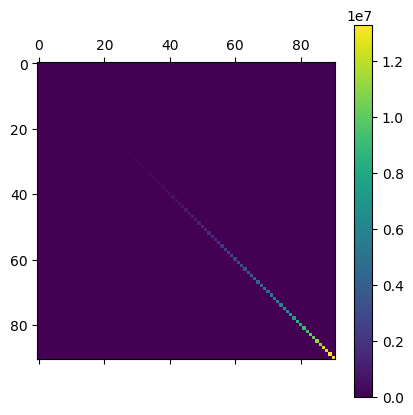

PyObject <matplotlib.colorbar.Colorbar object at 0x1a1f64518>

In [24]:
matshow(BaO_good_right)
colorbar()

In [25]:
B = [230.688 -9.2758 75.971 165.837 -95.7867 -1.30454 104.638 10.2213 2.13213 23.6173 22.3902 -9.6563 -13.7251 8.65304 17.3617 -14.5362 -14.6512 15.3648 17.2442 -10.2911 4.66846 4.7646 1.21131 -3.29318 -2.93483 3.50409 3.27787 -3.77929 -0.409778 -2.62764 5.05196 0.713839 -0.886231 -1.0068 2.60649 0.000712206 -2.69173 -1.01586 2.46325 -0.183597 -2.88814 -1.67346 3.39768 -0.380813 -3.68461 0.352308 2.27416 -0.377095 -2.43833 -0.0186484 2.4712 -1.24215 -3.21713 1.75585 2.43997 -1.46737 -2.44133 0.855597 1.15931 -0.636025 -1.57652 0.978287 1.45786 -0.466284 -1.54369 0.475504 0.830837 0.578709 -1.75713 -0.128727 1.29224 -0.00522383 -1.39166 0.0668581 1.29294 0.761893 -1.32849 0.108612 1.5224 0.275163 -1.56643 0.124549 1.47856 -0.0615664 -1.34167 -0.00308797 1.42685 0.065275 -1.33055 0.644746 1.60722; -9.2758 587.835 -110.675 -17.9485 201.71 132.656 -28.5215 51.8627 91.1187 -27.1409 -19.5893 16.9034 21.7206 -10.0881 -23.1612 25.8211 35.109 -27.4416 -2.31395 18.3201 7.35593 -8.34113 0.464235 5.6269 4.49711 -8.01235 -3.30481 1.30482 6.43108 -2.07159 1.16569 -4.65111 4.85172 0.480114 -3.75154 0.0188332 4.13391 -0.231743 -3.78461 -3.95065 4.39517 -0.378741 -5.88766 -1.13613 3.83172 -1.33969 -4.47307 0.696006 3.79821 -0.59705 -4.37648 1.03501 4.03823 -3.09352 -5.15823 2.58894 1.83528 -1.48419 -2.32961 1.07626 2.41475 -1.38562 -2.48401 1.82059 1.46253 0.408319 -2.63058 -0.0161712 1.36419 0.443626 -2.19995 0.0255454 2.11237 0.286624 -1.96791 0.173807 2.02096 1.30095 -2.306 0.211803 2.52941 -0.0579157 -2.08548 0.126925 2.05839 0.161982 -1.99437 0.456278 2.53111 -0.602948 -2.02189; 75.971 -110.675 213.906 89.0182 -49.836 93.9601 101.031 -14.0376 -92.6417 5.48045 56.1387 -4.16431 -38.7026 0.875836 40.0512 -2.92424 -28.2818 20.0444 19.9084 -12.6803 -14.1359 1.66348 12.3831 -1.7143 -12.6859 2.07489 11.001 0.0745821 -8.29495 0.76829 8.28774 -2.35329 -10.4203 -0.3409 10.7628 -0.174209 -9.68224 -0.146656 8.80132 0.551461 -9.80761 -0.768064 8.42634 -1.64251 -9.05677 0.490419 8.64482 -0.297993 -7.9082 0.151937 7.98223 -0.108563 -8.61434 0.545615 6.68153 -1.85102 -5.94347 0.879977 5.63895 -0.473348 -5.66183 0.500807 5.31214 -0.484808 -4.75171 -0.120858 4.4565 -0.134913 -4.73236 0.251903 4.99589 -0.136102 -4.82504 0.0830191 4.47667 0.109992 -4.52007 -0.107413 5.01705 0.0398799 -4.54538 0.298104 4.53927 -0.137486 -4.34617 0.0295551 4.34138 -0.124353 -4.48436 0.152002 4.56519; 165.837 -17.9485 89.0182 283.139 49.2373 56.9489 82.523 1.90359 -21.5869 27.0122 17.4192 -10.6958 -8.59843 8.3902 14.6705 -8.23687 0.495821 18.6297 6.54915 -12.3109 1.91073 3.72318 1.4301 -3.29675 -1.24847 3.64356 2.14052 -4.82033 1.96555 -1.87574 0.31926 -0.836676 0.443286 -1.51215 1.66427 -0.04675 -1.27007 -0.632918 1.16999 -0.180521 -1.78127 -3.02286 0.497614 -1.27239 -2.26194 0.532155 1.40269 -0.505596 -1.3301 0.22069 1.34794 -1.01438 -2.48507 0.960972 0.0888889 -1.69204 -0.90951 0.916427 0.485 -0.608043 -0.73327 0.845939 0.582194 -0.585308 -0.920159 0.762337 -0.20528 0.433958 -0.462411 0.0156185 0.494527 -0.0447588 -0.610129 0.101095 0.533718 0.474688 -0.598678 0.128508 0.839972 0.523791 -0.496214 0.250314 0.749406 -0.114453 -0.659614 0.0955233 0.80513 -0.0627714 -0.592053 0.505648 1.07874; -95.7867 201.71 -49.836 49.2373 242.202 22.4462 -161.451 32.7238 133.883 -15.894 -83.6818 6.76976 58.3038 -3.17217 -54.9656 15.0575 53.0405 -18.4181 -30.9252 11.9323 21.6545 -4.35551 -17.4745 2.53613 19.6415 -2.41785 -16.7329 2.49292 13.0991 -2.07567 -13.2668 -0.921787 15.6725 -0.207042 -15.641 0.148451 14.7683 0.232124 -13.4288 -1.19136 12.8923 -0.968729 -14.8688 0.102883 13.9218 -0.77963 -13.1132 0.382709 12.0653 0.000465541 -12.2694 0.39848 11.9326 -1.94801 -11.4199 1.76768 9.16713 -0.937673 -8.66212 0.607532 8.69328 -0.716863 -8.43708 0.321797 7.14481 -0.370034 -6.88739 0.258923 7.30839 0.0147972 -7.61093 0.118041 7.37044 -0.016853 -7.04432 -0.174093 6.91058 0.329764 -6.943 0.325222 7.36716 -0.159219 -6.95366 0.138726 6.65283 -0.0729016 -6.6408 -0.0410062 6.94325 -0.292877 -6.44391; -1.30454 132.656 93.9601 56.9489 22.4462 55.3972 12.2255 32.228 7.59488 -6.44762 4.00092 3.6009 -3.18107 -1.5748 5.17208 4.68465 -0.935059 -2.16031 6.37132 1.6033 -0.209612 -1.48198 2.53816 0.886416 -1.79762 -1.1519 2.14687 0.796279 -1.98399 -2.56758 2.90555 -1.63555 -1.39422 -0.22643 1.55558 0.0399401 -1.27705 -0.0815371 1.15306 -0.872342 -1.76733 -0.839671 0.72529 -0.593946 -1.12121 -0.535014 0.84482 0.220274 -0.87589 -0.241246 0.547158 0.00182602 -1.51041 -0.503345 0.727822 0.210359 -1.1787 -0.161249 0.7407 0.139937 -0.75144 -0.106339 0.495833 0.274274 -1.06022 -0.107106 0.868883 0.352194 -0.943346 0.104262 0.705463 0.03517 -0.673347 0.0421792 0.570835 0.0611528 -0.615798 0.275885 0.844928 0.219023 -0.526668 -0.00208802 0.583762 0.0637494 -0.541985 -0.0472934 0.483003 0.122399 -0.291862 0.0119593 0.863857; 104.638 -28.5215 101.031 82.523 -161.451 12.2255 204.581 -12.8169 -122.577 16.5737 77.1961 -6.95968 -53.8019 5.50079 52.6122 -12.5858 -44.9406 13.0867 35.4309 -8.63513 -16.9748 3.79052 17.6723 -2.32817 -18.8052 2.8765 16.975 -2.63102 -12.4241 0.0680002 12.6397 0.129414 -13.2718 -0.522136 14.9696 -0.0291631 -13.8579 -0.393194 12.6064 0.00516516 -12.5123 -0.733087 13.1644 -0.483659 -13.8108 0.484549 12.2777 -0.306097 -11.3272 0.149909 11.2776 -0.734034 -11.576 1.51811 10.2365 -1.22029 -9.17139 0.670252 8.06753 -0.458922 -8.2301 0.653113 7.89486 -0.551614 -7.22965 0.348017 6.47012 0.106587 -6.88218 -0.0426351 7.04783 -0.0270817 -6.92819 0.0539626 6.5869 0.294895 -6.50367 0.0409992 6.67865 0.0858101 -6.77099 0.127896 6.62059 -0.0667866 -6.27203 0.0214288 6.27066 -0.0890588 -6.29903 0.389429 6.23562; 10.2213 51.8627 -14.0376 1.90359 32.7238 32.228 -12.8169 5.03334 15.1254 -1.15194 -9.24995 0.982199 7.51257 -0.162691 -6.34688 2.46994 8.60431 -3.55908 -3.18526 2.28719 4.10243 -0.728063 -2.4857 0.474405 2.84958 -0.715684 -2.26505 -0.204396 2.73791 -0.261395 -2.2484 -0.945494 2.5052 0.0327233 -2.24275 -0.0116949 2.10763 -0.0582418 -1.91225 -0.370284 1.88195 -0.0500633 -2.08243 -0.416805 1.81662 -0.0849049 -1.78695 0.0105151 1.6457 0.0172487 -1.63875 0.014448 1.54332 -0.324118 -1.82083 0.33143 1.25304 -0.167311 -1.29773 0.107023 1.23644 -0.135746 -1.1828 0.156643 0.99566 0.120903 -1.21682 0.00127635 1.114 0.0863044 -1.11952 -0.00930929 1.06252 0.0379594 -1.00681 0.0436814 0.988644 0.129054 -1.00716 0.0121688 1.04002 0.0389115 -0.965932 -0.00704294 0.928554 0.0462656 -0.883724 0.0148096 0.961787 -0.0355082 -0.8847; 2.13213 91.1187 -92.6417 -21.5869 133.883 7.59488 -122.577 15.1254 94.484 -11.0048 -48.939 5.22515 36.1682 -4.83386 -34.5005 6.93891 32.4046 -8.69187 -19.5784 5.75945 14.7076 -2.32223 -12.0093 1.60817 13.0659 -2.44496 -11.6683 1.46059 9.66928 -0.562547 -7.5305 -0.56409 9.47907 0.236655 -10.095 -0.0118739 9.45321 -0.0775477 -8.60301 -0.56165 8.71853 0.0963692 -9.27325 0.0968017 9.18988 -0.390796 -8.48929 0.213424 7.73441 -0.246594 -7.74664 0.636955 7.68259 -0.789526 -7.2377 0.773297 5.94389 -0.416257 -5.67131 0.27707 5.66015 -0.437063 -5.48071 0.590145 4.905 -0.133371 -4.68197 -0.0208791 4.53093 0.0859219 -4.8393 -0.00508485 4.73212 0.0366083 -4.48497 0.0581607 4.44741 0.178126 -4.63056 0.0120653 4.69179 -0.0511628 -4.50872 0.0317583 4.29716 0.00978995 -4.26408 0.178322 4.35105 -0.30569 -4.16825; 23.6173 -27.1409 5.48045 27.0122 -15.894 -6.44762 16.5737 -1.15194 -11.0048 4.19094 7.92165 -1.8494 -5.35535 1.22872 5.05958 -2.63644 -4.16614 3.3052 3.68342 -2.19135 -1.77307 0.88649 1.92954 -0.629124 -1.93483 0.736815 1.69703 -0.602601 -1.25245 -0.2043 1.447 0.296631 -1.48133 -0.167738 1.54137 -0.00282612 -1.42274 -0.0878545 1.29264 0.152369 -1.24449 -0.260439 1.33777 0.0108978 -1.34785 0.101497 1.2321 -0.0752998 -1.14236 0.0189614 1.12995 -0.145642 -1.14787 0.32035 1.01083 -0.310523 -0.950447 0.173931 0.830196 -0.12289 -0.839262 0.165689 0.800342 -0.124744 -0.727521 0.0643205 0.662133 0.0649698 -0.729707 -0.0335447 0.731774 -0.00331103 -0.709972 -0.00353133 0.677225 0.0658909 -0.663893 -0.0438512 0.667771 0.0388038 -0.687076 0.0175911 0.665789 -0.0139196 -0.6337 -0.00253763 0.630854 -0.00778252 -0.6364 0.0825126 0.626903; 22.3902 -19.5893 56.1387 17.4192 -83.6818 4.00092 77.1961 -9.24995 -48.939 7.92165 29.3147 -3.20381 -20.9381 2.94612 20.2302 -4.97369 -17.3744 5.29813 12.6345 -3.51091 -7.81868 1.54564 7.26696 -0.97029 -7.6304 1.35521 6.89212 -1.37406 -5.22936 0.360825 4.9203 0.103095 -5.33868 -0.151784 5.83088 -0.00419529 -5.48744 -0.0614565 4.99492 0.0620645 -5.08042 -0.0997526 5.45746 -0.190019 -5.42181 0.249844 4.87215 -0.143919 -4.49621 0.137502 4.4901 -0.386845 -4.51113 0.57095 4.03907 -0.474765 -3.55503 0.256957 3.27129 -0.170705 -3.29537 0.262468 3.18249 -0.305981 -2.88921 0.207022 2.62039 0.00126265 -2.70813 -0.0268017 2.79719 -0.0058884 -2.74749 0.0124699 2.60318 0.0460924 -2.58376 -0.00599197 2.69685 -0.0046913 -2.74168 0.0508802 2.6293 -0.0280738 -2.49966 0.0211078 2.49688 -0.0879306 -2.51451 0.1847 2.44222; -9.6563 16.9034 -4.16431 -10.6958 6.76976 3.6009 -6.95968 0.982199 5.22515 -1.8494 -3.20381 0.901199 2.24611 -0.611237 -2.18526 1.28109 1.98328 -1.6074 -1.31528 1.06601 0.766122 -0.431671 -0.688191 0.307312 0.758198 -0.379977 -0.663556 0.219055 0.518283 0.060066 -0.508735 -0.156938 0.587438 0.0705832 -0.617021 0.00118497 0.571213 0.0336241 -0.519328 -0.10199 0.515263 0.0972278 -0.543402 -0.0118699 0.548015 -0.0535205 -0.506985 0.0364175 0.465441 -0.0141388 -0.467139 0.0738565 0.476556 -0.155759 -0.434578 0.151136 0.364228 -0.0847722 -0.332321 0.0600377 0.335924 -0.0817188 -0.321645 0.0706861 0.285915 -0.0132013 -0.269973 -0.0260794 0.282593 0.0173725 -0.293502 0.00145982 0.285411 0.00454449 -0.271078 -0.0252181 0.267462 0.0311647 -0.274521 -0.0128669 0.278463 -0.00782264 -0.269814 0.00662101 0.257062 0.00410064 -0.255896 0.0087827 0.26281 -0.0415831 -0.256645; -13.7251 21.7206 -38.7026 -8.59843 58.3038 -3.18107 -53.8019 7.51257 36.1682 -5.35535 -20.9381 2.24611 15.0483 -1.98759 -14.4857 3.57991 12.7804 -4.06493 -8.80357 2.67846 5.68755 -1.10931 -5.10013 0.695684 5.42743 -0.96329 -4.86655 0.885719 3.77917 -0.353239 -3.4153 -0.0581149 3.85749 0.0849089 -4.17775 0.00801714 3.92425 0.027976 -3.57167 -0.0983044 3.62187 0.0212392 -3.88374 0.143236 3.85748 -0.18987 -3.49615 0.10402 3.21557 -0.0953367 -3.22053 0.262384 3.21733 -0.418189 -2.92317 0.366904 2.51869 -0.195988 -2.33772 0.127873 2.35124 -0.19037 -2.27344 0.21822 2.04349 -0.127961 -1.88536 0.016433 1.92197 0.014439 -2.00281 0.00798121 1.96407 -0.00680392 -1.86162 -0.020982 1.84651 0.0214364 -1.92348 0.0159474 1.9554 -0.0395694 -1.8769 0.0226524 1.78576 -0.0138803 -1.78134 0.062111 1.80616 -0.128463 -1.74107; 8.65304 -10.0881 0.875836 8.3902 -3.17217 -1.5748 5.50079 -0.162691 -4.83386 1.22872 2.94612 -0.611237 -1.98759 0.458999 1.88224 -0.86672 -1.46935 1.16558 1.24585 -0.770375 -0.742058 0.296233 0.735809 -0.215957 -0.719591 0.25958 0.631741 -0.133624 -0.471225 -0.0903973 0.471401 0.0844491 -0.570887 -0.053507 0.587669 -0.000669162 -0.530386 -0.0334258 0.481569 0.058775 -0.454572 -0.0796 0.464513 -0.00405729 -0.491782 0.031009 0.464998 -0.0236784 -0.423275 0.00462963 0.41613 -0.0623841 -0.428606 0.10727 0.366973 -0.110128 -0.343789 0.061346 0.311565 -0.0432758 -0.311042 0.0617952 0.294778 -0.0455299 -0.271359 0.00420872 0.247509 0.0255027 -0.261374 -0.0105533 0.273146 -0.000841782 -0.263517 -0.0021185 0.251958 0.0250693 -0.245959 -0.0175063 0.244167 0.0115932 -0.247378 0.00633841 0.245212 -0.00411682 -0.233865 -0.00430946 0.23216 -0.00291687 -0.23327 0.0347946 0.233438; 17.3617 -23.1612 40.0512 14.6705 -54.9656 5.17208 52.6122 -6.34688 -34.5005 5.05958 20.2302 -2.18526 -14.4857 1.88224 13.9986 -3.0767 -11.9672 3.79462 8.63947 -2.50763 -5.51411 1.00493 5.06529 -0.66982 -5.29519 0.884929 4.78362 -0.814155 -3.66153 0.258294 3.36048 -0.00267541 -3.72842 -0.10795 4.05926 -0.0111327 -3.8065 -0.0444012 3.46448 0.107959 -3.5317 -0.0940979 3.74717 -0.171164 -3.74604 0.178097 3.38246 -0.105283 -3.11435 0.0876626 3.10543 -0.243249 -3.12926 0.359452 2.79457 -0.344831 -2.45753 0.186856 2.27297 -0.123794 -2.28469 0.179901 2.20328 -0.19195 -2.00664 0.116449 1.82628 -0.00635421 -1.8709 -0.00725231 1.94183 -0.0103947 -1.90534 0.00756239 1.80415 0.0333009 -1.79123 -0.0239563 1.87233 -0.00198253 -1.89251 0.0435899 1.82066 -0.0246272 -1.7315 0.0150791 1.72765 -0.0525789 -1.73876 0.118947 1.69493; -14.5362 25.8211 -2.92424 -8.23687 15.0575 4.68465 -12.5858 2.46994 6.93891 -2.63644 -4.97369 1.28109 3.57991 -0.86672 -3.0767 1.75915 3.08113 -1.44294 -2.21707 0.993943 1.63731 -0.578306 -1.44848 0.387673 1.44927 -0.465809 -1.25509 0.351978 1.07149 -0.0321245 -1.09923 -0.203079 1.03017 0.0629893 -1.08026 0.00505594 1.01434 0.0495472 -0.921894 -0.156607 0.87988 0.0522273 -0.99801 -0.00866805 0.969471 -0.0905431 -0.86468 0.0608792 0.806758 -0.0387818 -0.796048 0.0885866 0.745756 -0.203339 -0.754776 0.13946 0.661598 -0.0884292 -0.620288 0.0700136 0.609348 -0.0901101 -0.591574 0.0873476 0.525558 -0.0378509 -0.512161 -0.0144332 0.530286 0.0194677 -0.52122 0.00498067 0.508065 0.00564239 -0.485693 -0.0371604 0.475438 0.0473408 -0.475436 0.00101663 0.500825 -0.0142444 -0.477043 0.0135966 0.453054 -0.00394721 -0.445872 0.0180583 0.45399 -0.0447681 -0.420632; -14.6512 35.109 -28.2818 0.495821 53.0405 -0.935059 -44.9406 8.60431 32.4046 -4.16614 -17.3744 1.98328 12.7804 -1.46935 -11.9672 3.08113 11.3571 -3.39542 -7.00089 2.24713 5.31584 -0.963698 -4.38017 0.605049 4.71329 -0.811062 -4.19921 0.591379 3.43298 -0.515124 -2.79767 -0.0871414 3.34553 0.0255231 -3.57576 0.0183016 3.37237 0.0269036 -3.06956 -0.196128 3.07515 -0.0889341 -3.37253 0.110152 3.29553 -0.197683 -3.01498 0.103885 2.75887 -0.0938018 -2.76711 0.171941 2.68655 -0.364137 -2.5688 0.313457 2.13038 -0.172555 -2.03444 0.115874 2.02769 -0.152434 -1.975 0.185517 1.7519 -0.0765393 -1.66135 0.0528051 1.63049 0.00663983 -1.723 0.0158187 1.68804 -0.00264882 -1.60385 -0.0201777 1.58724 0.0530931 -1.64022 0.0419357 1.68795 -0.0401476 -1.61128 0.0281827 1.53475 -0.0147532 -1.52542 0.0576062 1.55625 -0.0867133 -1.46399; 15.3648 -27.4416 20.0444 18.6297 -18.4181 -2.16031 13.0867 -3.55908 -8.69187 3.3052 5.29813 -1.6074 -4.06493 1.16558 3.79462 -1.44294 -3.39542 1.91594 2.59086 -1.30606 -1.89301 0.578341 1.7196 -0.461697 -1.69329 0.566117 1.54061 -0.458012 -1.37046 0.0906519 1.19133 0.153518 -1.22047 -0.115658 1.23831 -0.00711758 -1.1686 -0.0473551 1.06293 0.159263 -1.14015 -0.165811 1.16452 -0.0412338 -1.09924 0.119247 1.00542 -0.0800677 -0.932404 0.0620641 0.902647 -0.119657 -0.924938 0.15968 0.859035 -0.1775 -0.772015 0.107005 0.722089 -0.0796322 -0.709707 0.103674 0.674817 -0.111723 -0.647914 0.0554632 0.623764 0.00866387 -0.602588 -0.0161295 0.606226 -0.00699447 -0.589314 -0.00307502 0.551863 0.0355163 -0.552585 -0.0461676 0.596726 0.0191453 -0.585065 0.0234975 0.553407 -0.0185203 -0.528206 0.00905793 0.516403 -0.0297113 -0.511098 0.0563134 0.518037; 17.2442 -2.31395 19.9084 6.54915 -30.9252 6.37132 35.4309 -3.18526 -19.5784 3.68342 12.6345 -1.31528 -8.80357 1.24585 8.63947 -2.21707 -7.00089 2.59086 6.03922 -1.69851 -2.73813 0.675542 3.03356 -0.413874 -3.15053 0.493114 2.8751 -0.73196 -2.04445 0.0964295 2.13238 -0.0897466 -2.13912 -0.0517714 2.44708 -0.0095849 -2.28529 -0.0580906 2.07996 -0.0251752 -2.08956 -0.0261638 2.22535 -0.151209 -2.30413 0.103241 2.02205 -0.0649126 -1.87433 0.0380786 1.86527 -0.176275 -1.91052 0.263603 1.64706 -0.235732 -1.53495 0.12461 1.33655 -0.0798474 -1.36776 0.120983 1.31526 -0.0935267 -1.21221 0.128693 1.0606 0.00339142 -1.14003 0.00363392 1.15857 -0.00843449 -1.14343 0.0152732 1.0857 0.0435679 -1.07502 0.0183258 1.11299 -0.00897173 -1.131 0.0325172 1.09844 -0.0164384 -1.03996 0.0184276 1.04286 -0.018716 -1.03993 0.0868288 1.02921; -10.2911 18.3201 -12.6803 -12.3109 11.9323 1.6033 -8.63513 2.28719 5.75945 -2.19135 -3.51091 1.06601 2.67846 -0.770375 -2.50763 0.993943 2.24713 -1.30606 -1.69851 0.888393 1.22468 -0.391794 -1.11205 0.309637 1.10189 -0.379826 -1.00072 0.300937 0.884412 -0.0521376 -0.773017 -0.106862 0.79625 0.0768188 -0.810192 0.00452695 0.764022 0.0320405 -0.694931 -0.106617 0.742284 0.109512 -0.76017 0.0248538 0.720067 -0.0781296 -0.658649 0.0525036 0.610515 -0.0396818 -0.59243 0.0799225 0.606686 -0.111013 -0.562976 0.121198 0.503787 -0.0726702 -0.470511 0.0539086 0.46324 -0.070454 -0.440735 0.0746383 0.42129 -0.0354838 -0.4051 -0.00726443 0.393002 0.0112853 -0.396061 0.00446839 0.3851 0.00224494 -0.360926 -0.0240304 0.361112 0.0310237 -0.388888 -0.0126894 0.382151 -0.015206 -0.361884 0.0120192 0.345348 -0.00535447 -0.338019 0.0191323 0.3353 -0.0380969 -0.338961; 4.66846 7.35593 -14.1359 1.91073 21.6545 -0.209612 -16.9748 4.10243 14.7076 -1.77307 -7.81868 0.766122 5.68755 -0.742058 -5.51411 1.63731 5.31584 -1.89301 -2.73813 1.22468 2.2381 -0.460522 -1.65381 0.256685 1.90985 -0.443879 -1.6631 0.261429 1.37065 -0.256241 -1.11305 -0.0499118 1.47772 0.0120487 -1.51985 -0.00180488 1.42832 -0.0336939 -1.29974 -0.0368246 1.31868 -0.0477588 -1.41959 0.0329485 1.36965 -0.0759808 -1.29211 0.0287571 1.17692 -0.0444549 -1.19723 0.108094 1.18658 -0.193734 -1.12352 0.166449 0.867131 -0.081765 -0.845715 0.0478919 0.846089 -0.0772898 -0.820158 0.11978 0.706289 -0.0279069 -0.688889 0.0209554 0.681548 0.0109231 -0.733966 -0.000916907 0.714156 0.00086745 -0.676573 0.0252704 0.671112 0.0100806 -0.699393 0.0145971 0.71218 -0.00912774 -0.679273 0.00383449 0.649576 0.00231767 -0.646896 0.0389583 0.674512 -0.054511 -0.636412; 4.7646 -8.34113 1.66348 3.72318 -4.35551 -1.48198 3.79052 -0.728063 -2.32223 0.88649 1.54564 -0.431671 -1.10931 0.296233 1.00493 -0.578306 -0.963698 0.578341 0.675542 -0.391794 -0.460522 0.194557 0.410408 -0.135154 -0.423466 0.164361 0.370013 -0.114385 -0.307754 -0.000520824 0.306496 0.0666897 -0.307093 -0.0260927 0.323128 -0.00137724 -0.302743 -0.0162518 0.275238 0.0502561 -0.268802 -0.0292326 0.296707 0.00178657 -0.290709 0.0291095 0.262079 -0.0196597 -0.243197 0.0114815 0.241275 -0.0322173 -0.233918 0.067811 0.227064 -0.0550539 -0.196316 0.0330913 0.182367 -0.0249932 -0.18098 0.0329578 0.174872 -0.0309079 -0.156131 0.0108709 0.150211 0.00703588 -0.155134 -0.00680343 0.155508 -0.00139837 -0.151624 -0.00184641 0.144429 0.0121889 -0.142037 -0.0151719 0.144225 0.00221158 -0.149504 0.00468392 0.142951 -0.00418517 -0.135911 0.0004018 0.13429 -0.00570693 -0.136844 0.0167848 0.129647; 1.21131 0.464235 12.3831 1.4301 -17.4745 2.53816 17.6723 -2.4857 -12.0093 1.92954 7.26696 -0.688191 -5.10013 0.735809 5.06529 -1.44848 -4.38017 1.7196 3.03356 -1.11205 -1.65381 0.410408 1.54988 -0.231335 -1.71169 0.352053 1.52598 -0.364873 -1.13042 0.117537 1.10928 -0.0181777 -1.25994 -0.0243153 1.37137 0.000624995 -1.28037 0.0039297 1.16511 -0.0209034 -1.17992 0.005767 1.24913 -0.0632668 -1.26205 0.0570417 1.14646 -0.0267134 -1.05508 0.0280025 1.06379 -0.112932 -1.08994 0.172206 0.961906 -0.151793 -0.822057 0.0747231 0.744042 -0.0438355 -0.758376 0.0737326 0.729033 -0.084908 -0.650544 0.0568779 0.593919 -0.00304873 -0.627186 -0.00470109 0.653385 5.41596e-5 -0.640133 0.00513359 0.606654 -0.00294728 -0.60155 0.010251 0.626145 -0.00593761 -0.633528 0.0120219 0.612163 -0.00411194 -0.58226 0.00314325 0.583331 -0.0232182 -0.595386 0.0562403 0.582098; -3.29318 5.6269 -1.7143 -3.29675 2.53613 0.886416 -2.32817 0.474405 1.60817 -0.629124 -0.97029 0.307312 0.695684 -0.215957 -0.66982 0.387673 0.605049 -0.461697 -0.413874 0.309637 0.256685 -0.135154 -0.231335 0.0979979 0.248003 -0.120352 -0.220324 0.079307 0.17583 0.00510431 -0.164782 -0.0433425 0.182969 0.0217464 -0.194111 0.000857283 0.181523 0.0111566 -0.165123 -0.0335105 0.166795 0.0286891 -0.177452 0.00100094 0.175845 -0.020148 -0.160566 0.0136651 0.147875 -0.00767229 -0.147664 0.0246132 0.149183 -0.0458537 -0.136833 0.0434317 0.116812 -0.0251877 -0.107474 0.0183472 0.108066 -0.0246599 -0.103852 0.0228005 0.0936041 -0.00689008 -0.0880124 -0.00589929 0.090187 0.00469504 -0.0931104 0.000889452 0.0909031 0.00116498 -0.0861356 -0.00836742 0.0853126 0.0100439 -0.0886101 -0.00325903 0.0898174 -0.00346741 -0.0862897 0.00282721 0.0821559 9.18079e-5 -0.0816425 0.00403068 0.0830776 -0.0129506 -0.0809494; -2.93483 4.49711 -12.6859 -1.24847 19.6415 -1.79762 -18.8052 2.84958 13.0659 -1.93483 -7.6304 0.758198 5.42743 -0.719591 -5.29519 1.44927 4.71329 -1.69329 -3.15053 1.10189 1.90985 -0.423466 -1.71169 0.248003 1.87467 -0.361349 -1.66965 0.337573 1.27931 -0.144822 -1.18419 -0.00278133 1.36743 0.0223818 -1.47801 0.00184318 1.38361 0.00145267 -1.25911 -0.0123719 1.26974 -0.0124086 -1.35858 0.0579048 1.35876 -0.0663162 -1.23794 0.0327125 1.13714 -0.0316297 -1.14453 0.103437 1.15386 -0.172277 -1.0443 0.151474 0.883682 -0.077074 -0.813376 0.0472916 0.823038 -0.073703 -0.794298 0.0852678 0.707308 -0.0499812 -0.654282 0.00784132 0.675281 0.00469818 -0.706511 0.00194697 0.691967 -0.0038275 -0.65636 -0.0010895 0.650303 0.000201237 -0.674969 0.00903987 0.686555 -0.013672 -0.661049 0.00655379 0.629073 -0.00384407 -0.62857 0.023768 0.641643 -0.0518715 -0.620071; 3.50409 -8.01235 2.07489 3.64356 -2.41785 -1.1519 2.8765 -0.715684 -2.44496 0.736815 1.35521 -0.379977 -0.96329 0.25958 0.884929 -0.465809 -0.811062 0.566117 0.493114 -0.379826 -0.443879 0.164361 0.352053 -0.120352 -0.361349 0.151675 0.31718 -0.0832221 -0.256928 0.00638248 0.221171 0.0547512 -0.273834 -0.0246461 0.283515 -0.00126728 -0.259819 -0.0107423 0.236162 0.0491759 -0.235478 -0.0300745 0.238621 -0.00062822 -0.244237 0.0264095 0.229585 -0.0171952 -0.209004 0.0110918 0.207367 -0.0286271 -0.203313 0.0550217 0.19174 -0.0532563 -0.160791 0.0309241 0.157587 -0.0225141 -0.154627 0.0297342 0.149097 -0.0301174 -0.133681 0.005222 0.12674 0.00524147 -0.12651 -0.00570966 0.133632 -0.00126555 -0.129563 -0.00206317 0.122901 0.00805671 -0.121319 -0.0150595 0.124905 0.00281248 -0.124447 0.00435813 0.121638 -0.00367089 -0.116116 -0.000389592 0.114973 -0.00627039 -0.116828 0.015109 0.111631; 3.27787 -3.30481 11.001 2.14052 -16.7329 2.14687 16.975 -2.26505 -11.6683 1.69703 6.89212 -0.663556 -4.86655 0.631741 4.78362 -1.25509 -4.19921 1.54061 2.8751 -1.00072 -1.6631 0.370013 1.52598 -0.220324 -1.66965 0.31718 1.49473 -0.295078 -1.12321 0.104563 1.06173 -0.0126219 -1.21894 -0.0243014 1.32549 -0.00183233 -1.23708 -0.00458552 1.12566 0.00580544 -1.13256 -0.00152754 1.20451 -0.0589279 -1.21694 0.0558863 1.10655 -0.0284549 -1.01647 0.0258959 1.0206 -0.0922414 -1.0401 0.150203 0.930655 -0.138058 -0.793469 0.0699204 0.724301 -0.0426551 -0.734633 0.066491 0.706949 -0.0738436 -0.635322 0.0433505 0.580581 -0.00357755 -0.604351 -0.00298787 0.631411 -0.00185514 -0.618548 0.00399911 0.586879 0.00343914 -0.58116 0.0016824 0.602276 -0.00547108 -0.611424 0.0128672 0.590858 -0.00576684 -0.561953 0.00311711 0.561949 -0.01973 -0.571061 0.0466797 0.557936; -3.77929 1.30482 0.0745821 -4.82033 2.49292 0.796279 -2.63102 -0.204396 1.46059 -0.602601 -1.37406 0.219055 0.885719 -0.133624 -0.814155 0.351978 0.591379 -0.458012 -0.73196 0.300937 0.261429 -0.114385 -0.364873 0.079307 0.337573 -0.0832221 -0.295078 0.108381 0.204657 0.0580125 -0.28963 -0.0367994 0.261169 0.0278255 -0.266841 3.1973e-5 0.245139 0.01557 -0.222496 -0.0038764 0.206272 0.0505946 -0.226658 -0.0019319 0.227754 -0.00825438 -0.205803 0.00805676 0.193376 0.00259495 -0.18813 0.0162243 0.192402 -0.0436608 -0.162241 0.0429376 0.172864 -0.023368 -0.142075 0.016063 0.144299 -0.0215535 -0.136412 0.0104837 0.127025 -0.0156069 -0.111746 -0.0131474 0.131791 0.00444352 -0.126524 0.000129086 0.122198 -0.000788743 -0.117122 -0.0116775 0.113898 0.000316326 -0.111695 -0.00881458 0.116875 -0.00180981 -0.113263 0.00125907 0.107699 -0.000213081 -0.107139 -0.00255739 0.106235 -0.0100051 -0.106606; -0.409778 6.43108 -8.29495 1.96555 13.0991 -1.98399 -12.4241 2.73791 9.66928 -1.25245 -5.22936 0.518283 3.77917 -0.471225 -3.66153 1.07149 3.43298 -1.37046 -2.04445 0.884412 1.37065 -0.307754 -1.13042 0.17583 1.27931 -0.256928 -1.12321 0.204657 0.905103 -0.176166 -0.755471 0.0207322 0.956898 -0.000599215 -1.02037 0.00420616 0.953105 -0.0100108 -0.867284 -0.0307387 0.871328 -0.0453999 -0.930775 0.052839 0.928956 -0.0558548 -0.860258 0.0244885 0.784591 -0.0234898 -0.795106 0.0699651 0.790632 -0.130608 -0.737584 0.12339 0.596312 -0.0613619 -0.560151 0.0361549 0.565054 -0.0538556 -0.547417 0.0627017 0.476631 -0.0291172 -0.456941 0.0183467 0.456373 -0.000389482 -0.487523 0.00358278 0.476359 -0.00240487 -0.452108 0.00750811 0.447614 0.00681527 -0.463465 0.0153072 0.47158 -0.0123401 -0.454428 0.0063031 0.433118 -0.00308338 -0.431717 0.0183196 0.446913 -0.036411 -0.424271; -2.62764 -2.07159 0.76829 -1.87574 -2.07567 -2.56758 0.0680002 -0.261395 -0.562547 -0.2043 0.360825 0.060066 -0.353239 -0.0903973 0.258294 -0.0321245 -0.515124 0.0906519 0.0964295 -0.0521376 -0.256241 -0.000520824 0.117537 0.00510431 -0.144822 0.00638248 0.104563 0.0580125 -0.176166 0.0296183 0.133385 0.066662 -0.142852 0.00805592 0.112254 0.00150049 -0.107165 0.0111808 0.0970485 0.0180974 -0.0956873 0.0196741 0.110159 0.0393628 -0.0831163 -0.00173776 0.0870058 0.00563411 -0.0806032 -0.00494751 0.0797666 0.010926 -0.0705968 0.00654165 0.104201 -0.00820016 -0.0600074 0.00258125 0.0684932 -0.00058987 -0.0624407 3.0292e-6 0.0593934 -0.00331038 -0.047559 -0.0144822 0.0720383 -0.00349856 -0.060361 -0.00568666 0.0587059 0.00129112 -0.0545424 -0.00297159 0.0514856 -0.0083856 -0.0504248 -0.00711434 0.0513284 -0.00292177 -0.0536827 -0.00532559 0.0478532 0.00200628 -0.0463821 -0.00413518 0.0422196 0.000403409 -0.0487513 -0.00328299 0.0429918; 5.05196 1.16569 8.28774 0.31926 -13.2668 2.90555 12.6397 -2.2484 -7.5305 1.447 4.9203 -0.508735 -3.4153 0.471401 3.36048 -1.09923 -2.79767 1.19133 2.13238 -0.773017 -1.11305 0.306496 1.10928 -0.164782 -1.18419 0.221171 1.06173 -0.28963 -0.755471 0.133385 0.808825 -0.0466165 -0.838094 -0.00929254 0.925175 -0.00434853 -0.870239 -0.0135951 0.792107 -0.0259112 -0.801265 0.0173584 0.866027 -0.065289 -0.866613 0.0506942 0.772653 -0.0251762 -0.716871 0.0204377 0.721463 -0.0679133 -0.731408 0.131854 0.637293 -0.107393 -0.567872 0.0544624 0.508838 -0.0328807 -0.518943 0.0490836 0.500551 -0.0497075 -0.448183 0.0511356 0.398834 -0.0128819 -0.433652 0.00258579 0.442667 -0.00373306 -0.435228 0.00792619 0.412763 0.0101963 -0.409307 0.013022 0.425751 -0.00948665 -0.434634 0.0135834 0.417551 -0.00663107 -0.396595 0.00725828 0.398505 -0.0135827 -0.403711 0.034247 0.392149; 0.713839 -4.65111 -2.35329 -0.836676 -0.921787 -1.63555 0.129414 -0.945494 -0.56409 0.296631 0.103095 -0.156938 -0.0581149 0.0844491 -0.00267541 -0.203079 -0.0871414 0.153518 -0.0897466 -0.106862 -0.0499118 0.0666897 -0.0181777 -0.0433425 -0.00278133 0.0547512 -0.0126219 -0.0367994 0.0207322 0.066662 -0.0466165 0.0517521 -0.000948371 0.00160702 -0.000776689 -0.00125417 -0.00313668 -0.00014644 0.00306083 0.0298666 0.0144868 0.0163848 0.0145862 0.0153755 -0.00576009 0.0181942 0.0106108 -0.0085682 -0.00683485 0.00782857 0.0156077 -0.00496106 0.0102757 0.0227493 0.00711363 -0.0146398 0.00798514 0.00948869 0.00224715 -0.00747679 -0.0019504 0.00786712 0.00798258 -0.0118156 0.00942443 0.00415896 -0.00617359 -0.00810277 0.00722628 -0.0036726 0.00017406 -0.00112743 -0.000523874 -0.001338 0.00241549 0.00010983 -0.000894077 -0.0093259 -0.00507106 -0.00513902 -0.00368831 0.000778035 0.00189745 -0.00226336 -0.00218262 0.0012178 0.00376884 -0.00399747 -0.00911388 0.00230749 -0.00683699; -0.886231 4.85172 -10.4203 0.443286 15.6725 -1.39422 -13.2718 2.5052 9.47907 -1.48133 -5.33868 0.587438 3.85749 -0.570887 -3.72842 1.03017 3.34553 -1.22047 -2.13912 0.79625 1.47772 -0.307093 -1.25994 0.182969 1.36743 -0.273834 -1.21894 0.261169 0.956898 -0.142852 -0.838094 -0.000948371 0.987728 0.0102639 -1.05477 0.00167619 0.99463 -0.00595611 -0.905403 -0.0198551 0.92293 -0.0266507 -0.995857 0.0449468 0.973728 -0.0547165 -0.891073 0.0266737 0.817981 -0.0296174 -0.824018 0.0798806 0.819713 -0.12038 -0.749789 0.10815 0.629005 -0.0550809 -0.592408 0.0335691 0.595346 -0.052807 -0.576848 0.0671594 0.511723 -0.0401064 -0.477644 0.0112993 0.483018 0.00312432 -0.508244 0.0017547 0.497791 -0.00208006 -0.471484 0.00446708 0.46823 0.00370645 -0.489492 0.0106208 0.498381 -0.0108089 -0.475961 0.00559258 0.453587 -0.00424595 -0.452732 0.0211799 0.46258 -0.0387157 -0.442089; -1.0068 0.480114 -0.3409 -1.51215 -0.207042 -0.22643 -0.522136 0.0327233 0.236655 -0.167738 -0.151784 0.0705832 0.0849089 -0.053507 -0.10795 0.0629893 0.0255231 -0.115658 -0.0517714 0.0768188 0.0120487 -0.0260927 -0.0243153 0.0217464 0.0223818 -0.0246461 -0.0243014 0.0278255 -0.000599215 0.00805592 -0.00929254 0.00160702 0.0102639 0.00831259 -0.0210859 0.000329387 0.0177555 0.0037144 -0.0162067 -0.00150214 0.0177592 0.0156204 -0.0121246 0.00633169 0.021761 -0.00398714 -0.0172622 0.00335797 0.0157725 -0.00165137 -0.0159286 0.00629655 0.0204367 -0.00736203 -0.00794777 0.0106121 0.0113697 -0.00588224 -0.00939059 0.0040208 0.0104133 -0.00548984 -0.00959887 0.00418018 0.0101431 -0.00409081 -0.00393388 -0.00221722 0.00747191 0.000153805 -0.00827421 0.000311642 0.0086412 -0.000418417 -0.00810687 -0.0027858 0.00821693 8.86041e-5 -0.00906471 -0.00255148 0.0076694 -0.00146623 -0.00895495 0.00077022 0.00828473 -0.000505827 -0.00903883 0.000592671 0.00811209 -0.00316085 -0.00979899; 2.60649 -3.75154 10.7628 1.66427 -15.641 1.55558 14.9696 -2.24275 -10.095 1.54137 5.83088 -0.617021 -4.17775 0.587669 4.05926 -1.08026 -3.57576 1.23831 2.44708 -0.810192 -1.51985 0.323128 1.37137 -0.194111 -1.47801 0.283515 1.32549 -0.266841 -1.02037 0.112254 0.925175 -0.000776689 -1.05477 -0.0210859 1.14895 -0.00136771 -1.07747 -0.00255097 0.980686 0.0110838 -0.995621 0.00193194 1.06228 -0.0481656 -1.06261 0.0531782 0.962862 -0.0274057 -0.884976 0.0281576 0.888123 -0.0817928 -0.892912 0.126503 0.806524 -0.110455 -0.691144 0.0571096 0.637988 -0.0357164 -0.644024 0.0557797 0.622139 -0.0673839 -0.558347 0.0397787 0.514044 -0.00594951 -0.525972 -0.00350257 0.549552 -0.00152665 -0.539168 0.00288957 0.510948 0.00191323 -0.506951 -0.000605417 0.528521 -0.00557771 -0.536106 0.0111973 0.515848 -0.00552814 -0.490654 0.00367973 0.489976 -0.0199822 -0.497602 0.0399725 0.481277; 0.000712206 0.0188332 -0.174209 -0.04675 0.148451 0.0399401 -0.0291631 -0.0116949 -0.0118739 -0.00282612 -0.00419529 0.00118497 0.00801714 -0.000669162 -0.0111327 0.00505594 0.0183016 -0.00711758 -0.0095849 0.00452695 -0.00180488 -0.00137724 0.000624995 0.000857283 0.00184318 -0.00126728 -0.00183233 3.1973e-5 0.00420616 0.00150049 -0.00434853 -0.00125417 0.00167619 0.000329387 -0.00136771 -6.54268e-5 0.00181422 3.24617e-5 -0.00165843 -0.000158672 0.00286255 0.000571392 -0.00328963 -0.000558308 0.00187743 0.000126217 -0.00137222 -7.10919e-5 0.00153138 0.000175409 -0.00147643 0.00019645 0.00234608 -0.00067797 -0.00277544 0.000658151 0.00158144 -0.000319064 -0.000894532 0.000200413 0.00107604 -0.000326868 -0.000870196 0.000227921 0.00104899 0.000155851 -0.00163166 -0.000318125 0.0014285 0.000157906 -0.00104069 -5.27544e-5 0.00102453 4.98166e-5 -0.000861493 -2.43463e-5 0.00096888 7.26295e-5 -0.0014163 -0.000140725 0.00132434 8.48237e-5 -0.000989698 -5.49387e-5 0.000937486 0.000117327 -0.000827664 -4.66991e-5 0.000908578 -0.000159739 -0.00129178; -2.69173 4.13391 -9.68224 -1.27007 14.7683 -1.27705 -13.8579 2.10763 9.45321 -1.42274 -5.48744 0.571213 3.92425 -0.530386 -3.8065 1.01434 3.37237 -1.1686 -2.28529 0.764022 1.42832 -0.302743 -1.28037 0.181523 1.38361 -0.259819 -1.23708 0.245139 0.953105 -0.107165 -0.870239 -0.00313668 0.99463 0.0177555 -1.07747 0.00181422 1.01076 0.00321131 -0.919914 -0.0146617 0.930781 -0.00560474 -0.997552 0.042834 0.994104 -0.0500142 -0.90292 0.0256896 0.82992 -0.0247408 -0.833559 0.073683 0.836516 -0.119582 -0.758182 0.10476 0.647068 -0.0542482 -0.598054 0.0340046 0.603537 -0.0521443 -0.58316 0.0606978 0.521571 -0.0365056 -0.481488 0.00626112 0.493815 0.00315208 -0.515863 0.0018284 0.505701 -0.00261414 -0.479483 -0.00240848 0.475397 0.00188936 -0.494515 0.00623289 0.502932 -0.0105136 -0.483408 0.00543261 0.459959 -0.00351784 -0.459314 0.0174112 0.467315 -0.0364351 -0.450902; -1.01586 -0.231743 -0.146656 -0.632918 0.232124 -0.0815371 -0.393194 -0.0582418 -0.0775477 -0.0878545 -0.0614565 0.0336241 0.027976 -0.0334258 -0.0444012 0.0495472 0.0269036 -0.0473551 -0.0580906 0.0320405 -0.0336939 -0.0162518 0.0039297 0.0111566 0.00145267 -0.0107423 -0.00458552 0.01557 -0.0100108 0.0111808 -0.0135951 -0.00014644 -0.00595611 0.0037144 -0.00255097 3.24617e-5 0.00321131 0.0045834 -0.0029903 0.00264373 0.00399028 0.00647465 -0.00569789 0.00255222 0.00848726 -0.00103359 -0.00250781 0.00138392 0.00380428 0.000197802 -0.00401097 0.00494814 0.00682989 -0.00592861 -0.00310962 0.0045775 0.00528385 -0.00276496 6.5898e-5 0.0021254 0.00182331 -0.00341551 -0.00163152 0.00106087 0.00241459 -0.0023029 0.00149446 -0.00226717 0.00322221 0.000250914 -0.00109008 4.71419e-5 0.00172369 -0.000449265 -0.00160215 -0.00343755 0.00172764 -0.00109271 -0.00215231 -0.00107548 0.00240409 -0.000574298 -0.00242603 0.000250339 0.00197908 -0.000136981 -0.00253491 -0.000440467 0.00188001 -0.00247936 -0.00300678; 2.46325 -3.78461 8.80132 1.16999 -13.4288 1.15306 12.6064 -1.91225 -8.60301 1.29264 4.99492 -0.519328 -3.57167 0.481569 3.46448 -0.921894 -3.06956 1.06293 2.07996 -0.694931 -1.29974 0.275238 1.16511 -0.165123 -1.25911 0.236162 1.12566 -0.222496 -0.867284 0.0970485 0.792107 0.00306083 -0.905403 -0.0162067 0.980686 -0.00165843 -0.919914 -0.0029903 0.837226 0.0135157 -0.847034 0.00492132 0.907735 -0.0388413 -0.904656 0.0454385 0.821743 -0.0233545 -0.755299 0.0224273 0.758607 -0.066887 -0.761337 0.108713 0.690054 -0.0953085 -0.588894 0.0493623 0.544267 -0.0309516 -0.549256 0.0474271 0.530695 -0.0551252 -0.474634 0.0330933 0.43819 -0.00563748 -0.449448 -0.002876 0.469508 -0.0016688 -0.460243 0.00236494 0.436386 0.00224272 -0.432658 -0.00177909 0.450027 -0.0056355 -0.457683 0.00955365 0.439934 -0.00494216 -0.418596 0.00318096 0.418004 -0.015782 -0.4253 0.033094 0.410379; -0.183597 -3.95065 0.551461 -0.180521 -1.19136 -0.872342 0.00516516 -0.370284 -0.56165 0.152369 0.0620645 -0.10199 -0.0983044 0.058775 0.107959 -0.156607 -0.196128 0.159263 -0.0251752 -0.106617 -0.0368246 0.0502561 -0.0209034 -0.0335105 -0.0123719 0.0491759 0.00580544 -0.0038764 -0.0307387 0.0180974 -0.0259112 0.0298666 -0.0198551 -0.00150214 0.0110838 -0.000158672 -0.0146617 0.00264373 0.0135157 0.0268358 -0.0170055 0.00580688 0.0270358 0.00782582 -0.0128873 0.00870745 0.0192779 -0.00429558 -0.0151218 0.00419306 0.0194861 -0.00565447 -0.0159412 0.018672 0.0249949 -0.01505 -0.00292236 0.0087064 0.00806376 -0.00636467 -0.00845635 0.00802651 0.00952446 -0.01162 -0.0025855 -0.00332842 0.0112294 -0.000779407 -0.00164444 -0.00275693 0.00800616 -0.000191686 -0.00756231 -0.0019943 0.00700344 -0.0019828 -0.00738599 -0.00888621 0.00890027 -0.00202711 -0.0105611 0.000286087 0.00778418 -0.000813674 -0.00795887 -0.00103308 0.00761414 -0.003207 -0.0114074 0.00331378 0.00739616; -2.88814 4.39517 -9.80761 -1.78127 12.8923 -1.76733 -12.5123 1.88195 8.71853 -1.24449 -5.08042 0.515263 3.62187 -0.454572 -3.5317 0.87988 3.07515 -1.14015 -2.08956 0.742284 1.31868 -0.268802 -1.17992 0.166795 1.26974 -0.235478 -1.13256 0.206272 0.871328 -0.0956873 -0.801265 0.0144868 0.92293 0.0177592 -0.995621 0.00286255 0.930781 0.00399028 -0.847034 -0.0170055 0.863672 0.0014435 -0.909882 0.0483618 0.911763 -0.0459805 -0.831376 0.0240077 0.76387 -0.0219758 -0.767486 0.0629923 0.774774 -0.105281 -0.693813 0.102662 0.593943 -0.052603 -0.550033 0.0324169 0.554839 -0.0479416 -0.534889 0.0549096 0.478403 -0.0298095 -0.442219 0.00619422 0.454799 0.000806218 -0.475472 0.0025839 0.465535 -0.00280722 -0.440669 -0.00299271 0.437509 0.00255528 -0.457419 0.00490285 0.461017 -0.0111308 -0.444425 0.00564317 0.423074 -0.00317017 -0.422478 0.0155819 0.430354 -0.0319191 -0.417051; -1.67346 -0.378741 -0.768064 -3.02286 -0.968729 -0.839671 -0.733087 -0.0500633 0.0963692 -0.260439 -0.0997526 0.0972278 0.0212392 -0.0796 -0.0940979 0.0522273 -0.0889341 -0.165811 -0.0261638 0.109512 -0.0477588 -0.0292326 0.005767 0.0286891 -0.0124086 -0.0300745 -0.00152754 0.0505946 -0.0453999 0.0196741 0.0173584 0.0163848 -0.0266507 0.0156204 0.00193194 0.000571392 -0.00560474 0.00647465 0.00492132 0.00580688 0.0014435 0.0328117 0.0154639 0.016165 0.00707321 -0.00465432 0.00141427 0.00489024 -0.00104373 -0.00226345 0.000815704 0.00956071 0.011873 -0.00583755 0.016099 0.0148788 -0.00278004 -0.00797376 0.00623634 0.00516086 -0.00350458 -0.00720572 0.00467153 0.0044721 0.000433839 -0.00884105 0.0131488 -0.00414289 -0.00526853 -0.000896984 0.00488497 0.000528062 -0.00320833 -0.00141383 0.00349469 -0.00485599 -0.00269231 -0.00267795 0.000444767 -0.00579455 -0.00465133 -0.0028127 0.000973965 0.00119027 -0.00157911 -0.0013673 -0.000323036 0.000470815 -0.00254034 -0.00457111 -0.00321308; 3.39768 -5.88766 8.42634 0.497614 -14.8688 0.72529 13.1644 -2.08243 -9.27325 1.33777 5.45746 -0.543402 -3.88374 0.464513 3.74717 -0.99801 -3.37253 1.16452 2.22535 -0.76017 -1.41959 0.296707 1.24913 -0.177452 -1.35858 0.238621 1.20451 -0.226658 -0.930775 0.110159 0.866027 0.0145862 -0.995857 -0.0121246 1.06228 -0.00328963 -0.997552 -0.00569789 0.907735 0.0270358 -0.909882 0.0154639 0.987717 -0.0353912 -0.973544 0.0496994 0.890037 -0.0253995 -0.818223 0.0197913 0.823567 -0.0638882 -0.821893 0.119797 0.752322 -0.105879 -0.635144 0.0551619 0.589337 -0.0348777 -0.594101 0.0507518 0.574458 -0.0526351 -0.50897 0.0336013 0.473463 -0.00798005 -0.48857 -0.00277062 0.510043 -0.00292631 -0.498863 0.00225907 0.473684 0.00427342 -0.468735 -0.00577746 0.484554 -0.00882256 -0.496486 0.0103923 0.4757 -0.00608283 -0.453072 0.00367596 0.452379 -0.0133993 -0.462514 0.032794 0.443211; -0.380813 -1.13613 -1.64251 -1.27239 0.102883 -0.593946 -0.483659 -0.416805 0.0968017 0.0108978 -0.190019 -0.0118699 0.143236 -0.00405729 -0.171164 -0.00866805 0.110152 -0.0412338 -0.151209 0.0248538 0.0329485 0.00178657 -0.0632668 0.00100094 0.0579048 -0.00062822 -0.0589279 -0.0019319 0.052839 0.0393628 -0.065289 0.0153755 0.0449468 0.00633169 -0.0481656 -0.000558308 0.042834 0.00255222 -0.0388413 0.00782582 0.0483618 0.016165 -0.0353912 0.00738284 0.0397949 0.00532601 -0.0337715 -0.00160659 0.0326521 0.00288621 -0.0280755 0.0031958 0.0426423 9.60075e-5 -0.0304059 0.00376661 0.0327901 -0.00147909 -0.0247775 0.000674633 0.0252267 -0.00213425 -0.0208994 -0.000719638 0.0274837 0.00104482 -0.0246704 -0.00622229 0.0260142 -0.000615936 -0.02279 -0.000470209 0.0220024 -0.000362522 -0.0198368 -0.00191417 0.0204166 -0.00250329 -0.0243169 -0.00369268 0.0199575 -0.000233013 -0.0200887 -0.000654076 0.0189356 0.000911063 -0.0179652 -0.00136723 0.0156417 -0.00200852 -0.0237037; -3.68461 3.83172 -9.05677 -2.26194 13.9218 -1.12121 -13.8108 1.81662 9.18988 -1.34785 -5.42181 0.548015 3.85748 -0.491782 -3.74604 0.969471 3.29553 -1.09924 -2.30413 0.720067 1.36965 -0.290709 -1.26205 0.175845 1.35876 -0.244237 -1.21694 0.227754 0.928956 -0.0831163 -0.866613 -0.00576009 0.973728 0.021761 -1.06261 0.00187743 0.994104 0.00848726 -0.904656 -0.0128873 0.911763 0.00707321 -0.973544 0.0397949 0.979866 -0.0460133 -0.886412 0.0245793 0.815338 -0.0213513 -0.817389 0.0676568 0.823833 -0.114818 -0.743266 0.0993106 0.640625 -0.0520766 -0.586453 0.0332912 0.592955 -0.0501403 -0.572093 0.0551168 0.514117 -0.0330987 -0.471868 0.00312417 0.487369 0.00315932 -0.507058 0.00185061 0.497289 -0.00272105 -0.471764 -0.00636544 0.46734 0.00133996 -0.484855 0.00348003 0.492785 -0.0100328 -0.475252 0.00524455 0.451824 -0.00300837 -0.45125 0.0147253 0.45795 -0.0338761 -0.444102; 0.352308 -1.33969 0.490419 0.532155 -0.77963 -0.535014 0.484549 -0.0849049 -0.390796 0.101497 0.249844 -0.0535205 -0.18987 0.031009 0.178097 -0.0905431 -0.197683 0.119247 0.103241 -0.0781296 -0.0759808 0.0291095 0.0570417 -0.020148 -0.0663162 0.0264095 0.0558863 -0.00825438 -0.0558548 -0.00173776 0.0506942 0.0181942 -0.0547165 -0.00398714 0.0531782 0.000126217 -0.0500142 -0.00103359 0.0454385 0.00870745 -0.0459805 -0.00465432 0.0496994 0.00532601 -0.0460133 0.00324655 0.0433405 -0.00174644 -0.0400786 0.000300896 0.0400494 -0.00381644 -0.0403318 0.0113214 0.0415068 -0.0111697 -0.0313417 0.00602242 0.0296512 -0.0041203 -0.0293738 0.00556052 0.0279662 -0.0051377 -0.0245279 -0.000765086 0.0265283 0.00154111 -0.0259325 -0.00184731 0.0261662 7.70686e-5 -0.0251882 -0.000646741 0.0238021 0.000775196 -0.0235392 -0.00284515 0.0244486 0.000625095 -0.0248854 -0.000108886 0.0234377 -0.000185316 -0.0224093 -0.000781552 0.0218054 -0.000509222 -0.0230029 0.00248013 0.022278; 2.27416 -4.47307 8.64482 1.40269 -13.1132 0.84482 12.2777 -1.78695 -8.48929 1.2321 4.87215 -0.506985 -3.49615 0.464998 3.38246 -0.86468 -3.01498 1.00542 2.02205 -0.658649 -1.29211 0.262079 1.14646 -0.160566 -1.23794 0.229585 1.10655 -0.205803 -0.860258 0.0870058 0.772653 0.0106108 -0.891073 -0.0172622 0.962862 -0.00137222 -0.90292 -0.00250781 0.821743 0.0192779 -0.831376 0.00141427 0.890037 -0.0337715 -0.886412 0.0433405 0.806685 -0.0226337 -0.740794 0.0217756 0.743573 -0.0638308 -0.745121 0.101685 0.678357 -0.0902383 -0.577038 0.0470858 0.535262 -0.0298586 -0.539332 0.0456012 0.52119 -0.0534243 -0.466369 0.029483 0.432223 -0.00423655 -0.440463 -0.00350538 0.461033 -0.00144112 -0.451769 0.00155163 0.428335 0.00188086 -0.42466 -0.00396553 0.441699 -0.0046751 -0.448999 0.00878504 0.431583 -0.0046759 -0.41073 0.00259957 0.409809 -0.0152461 -0.416992 0.0315313 0.402084; -0.377095 0.696006 -0.297993 -0.505596 0.382709 0.220274 -0.306097 0.0105151 0.213424 -0.0752998 -0.143919 0.0364175 0.10402 -0.0236784 -0.105283 0.0608792 0.103885 -0.0800677 -0.0649126 0.0525036 0.0287571 -0.0196597 -0.0267134 0.0136651 0.0327125 -0.0171952 -0.0284549 0.00805676 0.0244885 0.00563411 -0.0251762 -0.0085682 0.0266737 0.00335797 -0.0274057 -7.10919e-5 0.0256896 0.00138392 -0.0233545 -0.00429558 0.0240077 0.00489024 -0.0253995 -0.00160659 0.0245793 -0.00174644 -0.0226337 0.00120803 0.0209887 -4.46583e-5 -0.021095 0.00314915 0.022512 -0.00761525 -0.0210555 0.0075151 0.0166687 -0.00406849 -0.0145678 0.00279626 0.014961 -0.00389585 -0.0141241 0.00314241 0.0126712 -8.18021e-5 -0.012634 -0.0016851 0.0131817 0.000979242 -0.0133247 -4.0692e-5 0.0129271 0.000271941 -0.012193 -0.00103794 0.0121077 0.00135929 -0.0127148 -0.000774299 0.0127956 -0.000128672 -0.0121993 0.000138078 0.011624 0.00042954 -0.011485 0.00017549 0.0119437 -0.00192837 -0.0120792; -2.43833 3.79821 -7.9082 -1.3301 12.0653 -0.87589 -11.3272 1.6457 7.73441 -1.14236 -4.49621 0.465441 3.21557 -0.423275 -3.11435 0.806758 2.75887 -0.932404 -1.87433 0.610515 1.17692 -0.243197 -1.05508 0.147875 1.13714 -0.209004 -1.01647 0.193376 0.784591 -0.0806032 -0.716871 -0.00683485 0.817981 0.0157725 -0.884976 0.00153138 0.82992 0.00380428 -0.755299 -0.0151218 0.76387 -0.00104373 -0.818223 0.0326521 0.815338 -0.0400786 -0.740794 0.0209887 0.680936 -0.0195188 -0.68351 0.058118 0.685677 -0.095149 -0.621875 0.0838502 0.531456 -0.0437481 -0.491423 0.0277248 0.495602 -0.0420343 -0.478782 0.0481747 0.428531 -0.0282599 -0.395844 0.00416134 0.405827 0.00282598 -0.42367 0.00153129 0.41522 -0.00185538 -0.393703 -0.00285321 0.390295 0.00263306 -0.405857 0.00437693 0.412697 -0.00838283 -0.396714 0.00446506 0.377486 -0.00268407 -0.376836 0.0135374 0.383268 -0.0288339 -0.369878; -0.0186484 -0.59705 0.151937 0.22069 0.000465541 -0.241246 0.149909 0.0172487 -0.246594 0.0189614 0.137502 -0.0141388 -0.0953367 0.00462963 0.0876626 -0.0387818 -0.0938018 0.0620641 0.0380786 -0.0396818 -0.0444549 0.0114815 0.0280025 -0.00767229 -0.0316297 0.0110918 0.0258959 0.00259495 -0.0234898 -0.00494751 0.0204377 0.00782857 -0.0296174 -0.00165137 0.0281576 0.000175409 -0.0247408 0.000197802 0.0224273 0.00419306 -0.0219758 -0.00226345 0.0197913 0.00288621 -0.0213513 0.000300896 0.0217756 -4.46583e-5 -0.0195188 -0.000637346 0.0193952 -0.00100426 -0.0196196 0.00525904 0.0198297 -0.00581473 -0.014228 0.00290216 0.0146191 -0.00183144 -0.0141302 0.00253361 0.0133478 -0.00227801 -0.0116063 -0.00178106 0.0121488 0.00131077 -0.0120748 -0.000867535 0.0129944 0.000144405 -0.0122941 -0.00043593 0.0116402 -0.000148352 -0.0114169 -0.00145771 0.0116046 0.000442552 -0.0110699 -0.000270995 0.0111704 0.000137689 -0.0107363 -0.000759998 0.0104902 -3.09051e-5 -0.0110502 0.000992035 0.0107505; 2.4712 -4.37648 7.98223 1.34794 -12.2694 0.547158 11.2776 -1.63875 -7.74664 1.12995 4.4901 -0.467139 -3.22053 0.41613 3.10543 -0.796048 -2.76711 0.902647 1.86527 -0.59243 -1.19723 0.241275 1.06379 -0.147664 -1.14453 0.207367 1.0206 -0.18813 -0.795106 0.0797666 0.721463 0.0156077 -0.824018 -0.0159286 0.888123 -0.00147643 -0.833559 -0.00401097 0.758607 0.0194861 -0.767486 0.000815704 0.823567 -0.0280755 -0.817389 0.0400494 0.743573 -0.021095 -0.68351 0.0193952 0.6864 -0.0561409 -0.685426 0.0936665 0.624929 -0.0813643 -0.532995 0.0428617 0.494625 -0.0275303 -0.498089 0.0413088 0.481619 -0.0474396 -0.429752 0.0269975 0.399184 -0.00401479 -0.407809 -0.00347056 0.425718 -0.00149422 -0.417071 0.00139901 0.395429 0.00300823 -0.392025 -0.00417986 0.407744 -0.00431225 -0.414869 0.00793137 0.398283 -0.00446699 -0.379085 0.00252975 0.378196 -0.0132516 -0.385263 0.0278446 0.370261; -1.24215 1.03501 -0.108563 -1.01438 0.39848 0.00182602 -0.734034 0.014448 0.636955 -0.145642 -0.386845 0.0738565 0.262384 -0.0623841 -0.243249 0.0885866 0.171941 -0.119657 -0.176275 0.0799225 0.108094 -0.0322173 -0.112932 0.0246132 0.103437 -0.0286271 -0.0922414 0.0162243 0.0699651 0.010926 -0.0679133 -0.00496106 0.0798806 0.00629655 -0.0817928 0.00019645 0.073683 0.00494814 -0.066887 -0.00565447 0.0629923 0.00956071 -0.0638882 0.0031958 0.0676568 -0.00381644 -0.0638308 0.00314915 0.058118 -0.00100426 -0.0561409 0.00857069 0.058064 -0.0107546 -0.048363 0.0113689 0.0487969 -0.00655557 -0.0441071 0.0047751 0.0436186 -0.00704345 -0.0411577 0.00486911 0.0392154 -0.000818845 -0.0353242 -0.0029067 0.0366371 0.000784021 -0.0379927 0.000200136 0.0366241 4.70981e-5 -0.0350199 -0.0037111 0.0341563 0.00157128 -0.0338454 -0.00133575 0.0341868 -0.00110433 -0.0339114 0.000633281 0.0323386 0.000256533 -0.0319481 0.000400646 0.0314417 -0.00445345 -0.0320714; -3.21713 4.03823 -8.61434 -2.48507 11.9326 -1.51041 -11.576 1.54332 7.68259 -1.14787 -4.51113 0.476556 3.21733 -0.428606 -3.12926 0.745756 2.68655 -0.924938 -1.91052 0.606686 1.18658 -0.233918 -1.08994 0.149183 1.15386 -0.203313 -1.0401 0.192402 0.790632 -0.0705968 -0.731408 0.0102757 0.819713 0.0204367 -0.892912 0.00234608 0.836516 0.00682989 -0.761337 -0.0159412 0.774774 0.011873 -0.821893 0.0426423 0.823833 -0.0403318 -0.745121 0.022512 0.685677 -0.0196196 -0.685426 0.058064 0.693144 -0.087906 -0.617844 0.0834692 0.538875 -0.0439204 -0.496711 0.0280388 0.500696 -0.0418445 -0.482629 0.0455762 0.437696 -0.0284622 -0.398462 0.00321607 0.410206 0.00105092 -0.426707 0.00218526 0.418595 -0.00235226 -0.396474 -0.00512242 0.393514 0.00257486 -0.410881 0.00218894 0.415493 -0.00994703 -0.400147 0.00519786 0.380567 -0.00338094 -0.380081 0.0126923 0.383652 -0.0286328 -0.374171; 1.75585 -3.09352 0.545615 0.960972 -1.94801 -0.503345 1.51811 -0.324118 -0.789526 0.32035 0.57095 -0.155759 -0.418189 0.10727 0.359452 -0.203339 -0.364137 0.15968 0.263603 -0.111013 -0.193734 0.067811 0.172206 -0.0458537 -0.172277 0.0550217 0.150203 -0.0436608 -0.130608 0.00654165 0.131854 0.0227493 -0.12038 -0.00736203 0.126503 -0.00067797 -0.119582 -0.00592861 0.108713 0.018672 -0.105281 -0.00583755 0.119797 9.60075e-5 -0.114818 0.0113214 0.101685 -0.00761525 -0.095149 0.00525904 0.0936665 -0.0107546 -0.087906 0.0231917 0.0894905 -0.015456 -0.0785136 0.0100499 0.0734933 -0.00809962 -0.0721746 0.0103678 0.070062 -0.0104195 -0.0627429 0.00503577 0.0613886 0.00124482 -0.0629065 -0.00215014 0.06147 -0.000662165 -0.0600187 -0.000615373 0.0572536 0.00444646 -0.0562032 -0.00560876 0.0567397 -0.000257147 -0.0596437 0.00186998 0.0564623 -0.00174497 -0.0536072 0.000710016 0.0526648 -0.00240589 -0.0534615 0.0052497 0.0497417; 2.43997 -5.15823 6.68153 0.0888889 -11.4199 0.727822 10.2365 -1.82083 -7.2377 1.01083 4.03907 -0.434578 -2.92317 0.366973 2.79457 -0.754776 -2.5688 0.859035 1.64706 -0.562976 -1.12352 0.227064 0.961906 -0.136833 -1.0443 0.19174 0.930655 -0.162241 -0.737584 0.104201 0.637293 0.00711363 -0.749789 -0.00794777 0.806524 -0.00277544 -0.758182 -0.00310962 0.690054 0.0249949 -0.693813 0.016099 0.752322 -0.0304059 -0.743266 0.0415068 0.678357 -0.0210555 -0.621875 0.0198297 0.624929 -0.048363 -0.617844 0.0894905 0.575042 -0.0779042 -0.481452 0.0410325 0.451793 -0.0261964 -0.453634 0.0376045 0.440012 -0.0448361 -0.390954 0.0231266 0.366184 -0.00915308 -0.368015 -0.00165431 0.387181 -0.00248221 -0.379355 0.00154639 0.360137 0.00233221 -0.356647 -0.00577264 0.369444 -0.00788344 -0.37812 0.00863236 0.362383 -0.00515473 -0.345007 0.00298193 0.343844 -0.0133789 -0.350878 0.0242604 0.334305; -1.46737 2.58894 -1.85102 -1.69204 1.76768 0.210359 -1.22029 0.33143 0.773297 -0.310523 -0.474765 0.151136 0.366904 -0.110128 -0.344831 0.13946 0.313457 -0.1775 -0.235732 0.121198 0.166449 -0.0550539 -0.151793 0.0434317 0.151474 -0.0532563 -0.138058 0.0429376 0.12339 -0.00820016 -0.107393 -0.0146398 0.10815 0.0106121 -0.110455 0.000658151 0.10476 0.0045775 -0.0953085 -0.01505 0.102662 0.0148788 -0.105879 0.00376661 0.0993106 -0.0111697 -0.0902383 0.0075151 0.0838502 -0.00581473 -0.0813643 0.0113689 0.0834692 -0.015456 -0.0779042 0.0164829 0.0694021 -0.00999658 -0.0645839 0.00748852 0.0636801 -0.00978267 -0.0606042 0.010501 0.0580818 -0.00517365 -0.0560672 -0.000871063 0.0541384 0.00153968 -0.0543014 0.000648928 0.0528855 0.000303598 -0.0495032 -0.00343312 0.049622 0.00437137 -0.0537362 -0.00165852 0.0528562 -0.00219199 -0.0498091 0.00173286 0.0475119 -0.000836685 -0.0464687 0.00278252 0.0460766 -0.00534931 -0.0466629; -2.44133 1.83528 -5.94347 -0.90951 9.16713 -1.1787 -9.17139 1.25304 5.94389 -0.950447 -3.55503 0.364228 2.51869 -0.343789 -2.45753 0.661598 2.13038 -0.772015 -1.53495 0.503787 0.867131 -0.196316 -0.822057 0.116812 0.883682 -0.160791 -0.793469 0.172864 0.596312 -0.0600074 -0.567872 0.00798514 0.629005 0.0113697 -0.691144 0.00158144 0.647068 0.00528385 -0.588894 -0.00292236 0.593943 -0.00278004 -0.635144 0.0327901 0.640625 -0.0313417 -0.577038 0.0166687 0.531456 -0.014228 -0.532995 0.0487969 0.538875 -0.0785136 -0.481452 0.0694021 0.419373 -0.0357934 -0.380593 0.0222894 0.38603 -0.034274 -0.372361 0.0361478 0.335152 -0.0274026 -0.30502 0.0030153 0.31771 0.0010268 -0.329676 0.0014895 0.323688 -0.00257589 -0.307078 -0.00396289 0.304273 -0.00121306 -0.315843 0.00402639 0.321187 -0.00747674 -0.309812 0.00372095 0.294394 -0.00300771 -0.294423 0.00967677 0.298337 -0.0242484 -0.29; 0.855597 -1.48419 0.879977 0.916427 -0.937673 -0.161249 0.670252 -0.167311 -0.416257 0.173931 0.256957 -0.0847722 -0.195988 0.061346 0.186856 -0.0884292 -0.172555 0.107005 0.12461 -0.0726702 -0.081765 0.0330913 0.0747231 -0.0251877 -0.077074 0.0309241 0.0699204 -0.023368 -0.0613619 0.00258125 0.0544624 0.00948869 -0.0550809 -0.00588224 0.0571096 -0.000319064 -0.0542482 -0.00276496 0.0493623 0.0087064 -0.052603 -0.00797376 0.0551619 -0.00147909 -0.0520766 0.00602242 0.0470858 -0.00406849 -0.0437481 0.00290216 0.0428617 -0.00655557 -0.0439204 0.0100499 0.0410325 -0.00999658 -0.0357934 0.00598875 0.0330054 -0.00446172 -0.032819 0.00590398 0.0313203 -0.00601816 -0.0295268 0.00257773 0.0284504 0.000870693 -0.0278544 -0.00101212 0.0280332 -0.000320255 -0.0273643 -0.00022456 0.0256767 0.00207372 -0.0256922 -0.00255974 0.0276304 0.000875883 -0.027454 0.00113334 0.0258921 -0.000906212 -0.0246725 0.000308526 0.0242308 -0.0014206 -0.0242403 0.00319914 0.0243208; 1.15931 -2.32961 5.63895 0.485 -8.66212 0.7407 8.06753 -1.29773 -5.67131 0.830196 3.27129 -0.332321 -2.33772 0.311565 2.27297 -0.620288 -2.03444 0.722089 1.33655 -0.470511 -0.845715 0.182367 0.744042 -0.107474 -0.813376 0.157587 0.724301 -0.142075 -0.560151 0.0684932 0.508838 0.00224715 -0.592408 -0.00939059 0.637988 -0.000894532 -0.598054 6.5898e-5 0.544267 0.00806376 -0.550033 0.00623634 0.589337 -0.0247775 -0.586453 0.0296512 0.535262 -0.0145678 -0.491423 0.0146191 0.494625 -0.0441071 -0.496711 0.0734933 0.451793 -0.0645839 -0.380593 0.0330054 0.352928 -0.0203471 -0.35627 0.0314626 0.344183 -0.0375724 -0.306174 0.0207299 0.284313 -0.00430792 -0.291383 -0.00203332 0.305484 -0.00092783 -0.299143 0.00147069 0.283665 -4.94236e-5 -0.281173 -0.000987478 0.29225 -0.00416661 -0.297283 0.00599451 0.285751 -0.00297872 -0.272035 0.00168689 0.271659 -0.0108362 -0.277423 0.0220127 0.267264; -0.636025 1.07626 -0.473348 -0.608043 0.607532 0.139937 -0.458922 0.107023 0.27707 -0.12289 -0.170705 0.0600377 0.127873 -0.0432758 -0.123794 0.0700136 0.115874 -0.0796322 -0.0798474 0.0539086 0.0478919 -0.0249932 -0.0438355 0.0183472 0.0472916 -0.0225141 -0.0426551 0.016063 0.0361549 -0.00058987 -0.0328807 -0.00747679 0.0335691 0.0040208 -0.0357164 0.000200413 0.0340046 0.0021254 -0.0309516 -0.00636467 0.0324169 0.00516086 -0.0348777 0.000674633 0.0332912 -0.0041203 -0.0298586 0.00279626 0.0277248 -0.00183144 -0.0275303 0.0047751 0.0280388 -0.00809962 -0.0261964 0.00748852 0.0222894 -0.00446172 -0.0203471 0.00332359 0.0204623 -0.00444427 -0.0196366 0.00432783 0.0180577 -0.00161879 -0.0172742 -0.000847449 0.0172496 0.000802232 -0.0174761 0.000203997 0.0171269 0.000192459 -0.0161345 -0.00159405 0.0160988 0.00188973 -0.017122 -0.000530968 0.0172831 -0.000748272 -0.0163265 0.000605026 0.0155324 -0.000121771 -0.0153545 0.000915015 0.0155322 -0.00239847 -0.0153283; -1.57652 2.41475 -5.66183 -0.73327 8.69328 -0.75144 -8.2301 1.23644 5.66015 -0.839262 -3.29537 0.335924 2.35124 -0.311042 -2.28469 0.609348 2.02769 -0.709707 -1.36776 0.46324 0.846089 -0.18098 -0.758376 0.108066 0.823038 -0.154627 -0.734633 0.144299 0.565054 -0.0624407 -0.518943 -0.0019504 0.595346 0.0104133 -0.644024 0.00107604 0.603537 0.00182331 -0.549256 -0.00845635 0.554839 -0.00350458 -0.594101 0.0252267 0.592955 -0.0293738 -0.539332 0.014961 0.495602 -0.0141302 -0.498089 0.0436186 0.500696 -0.0721746 -0.453634 0.0636801 0.38603 -0.032819 -0.35627 0.0204623 0.35983 -0.0313499 -0.347491 0.0360437 0.310317 -0.0213221 -0.286756 0.00352171 0.294825 0.00188964 -0.308117 0.00107469 0.301905 -0.00156627 -0.286307 -0.00136748 0.283765 0.00104336 -0.294857 0.00371735 0.299877 -0.00618335 -0.288462 0.00315231 0.274491 -0.00192249 -0.274142 0.0101282 0.279258 -0.021754 -0.269629; 0.978287 -1.38562 0.500807 0.845939 -0.716863 -0.106339 0.653113 -0.135746 -0.437063 0.165689 0.262468 -0.0817188 -0.19037 0.0617952 0.179901 -0.0901101 -0.152434 0.103674 0.120983 -0.070454 -0.0772898 0.0329578 0.0737326 -0.0246599 -0.073703 0.0297342 0.066491 -0.0215535 -0.0538556 3.0292e-6 0.0490836 0.00786712 -0.052807 -0.00548984 0.0557797 -0.000326868 -0.0521443 -0.00341551 0.0474271 0.00802651 -0.0479416 -0.00720572 0.0507518 -0.00213425 -0.0501403 0.00556052 0.0456012 -0.00389585 -0.0420343 0.00253361 0.0413088 -0.00704345 -0.0418445 0.0103678 0.0376045 -0.00978267 -0.034274 0.00590398 0.0314626 -0.00444427 -0.0313499 0.00604317 0.0300142 -0.00561514 -0.0279651 0.00221168 0.0259842 0.00121192 -0.0261456 -0.000882353 0.0267747 -0.000321498 -0.0261325 -0.000166222 0.024754 0.00256163 -0.0245117 -0.00233009 0.0254639 0.00073406 -0.0257385 0.00116959 0.0247084 -0.000872931 -0.0235204 0.000231499 0.0232656 -0.00119232 -0.0232263 0.0034656 0.0230143; 1.45786 -2.48401 5.31214 0.582194 -8.43708 0.495833 7.89486 -1.1828 -5.48071 0.800342 3.18249 -0.321645 -2.27344 0.294778 2.20328 -0.591574 -1.975 0.674817 1.31526 -0.440735 -0.820158 0.174872 0.729033 -0.103852 -0.794298 0.149097 0.706949 -0.136412 -0.547417 0.0593934 0.500551 0.00798258 -0.576848 -0.00959887 0.622139 -0.000870196 -0.58316 -0.00163152 0.530695 0.00952446 -0.534889 0.00467153 0.574458 -0.0208994 -0.572093 0.0279662 0.52119 -0.0141241 -0.478782 0.0133478 0.481619 -0.0411577 -0.482629 0.070062 0.440012 -0.0606042 -0.372361 0.0313203 0.344183 -0.0196366 -0.347491 0.0300142 0.335804 -0.0347448 -0.29874 0.0198271 0.27752 -0.0031761 -0.284781 -0.00236471 0.297834 -0.00090243 -0.291699 0.00125795 0.276729 0.00122364 -0.274146 -0.00155792 0.284437 -0.00375235 -0.289789 0.00550986 0.278579 -0.00289241 -0.265135 0.00161739 0.264696 -0.00967129 -0.270221 0.0205983 0.26; -0.466284 1.82059 -0.484808 -0.585308 0.321797 0.274274 -0.551614 0.156643 0.590145 -0.124744 -0.305981 0.0706861 0.21822 -0.0455299 -0.19195 0.0873476 0.185517 -0.111723 -0.0935267 0.0746383 0.11978 -0.0309079 -0.084908 0.0228005 0.0852678 -0.0301174 -0.0738436 0.0104837 0.0627017 -0.00331038 -0.0497075 -0.0118156 0.0671594 0.00418018 -0.0673839 0.000227921 0.0606978 0.00106087 -0.0551252 -0.01162 0.0549096 0.0044721 -0.0526351 -0.000719638 0.0551168 -0.0051377 -0.0534243 0.00314241 0.0481747 -0.00227801 -0.0474396 0.00486911 0.0455762 -0.0104195 -0.0448361 0.010501 0.0361478 -0.00601816 -0.0375724 0.00432783 0.0360437 -0.00561514 -0.0347448 0.00636136 0.0311057 0.00029162 -0.0302667 -0.00069642 0.0292583 0.00119263 -0.0314034 0.000226948 0.0302015 0.000627543 -0.0286113 -0.00079565 0.0282072 0.00366925 -0.0290092 -0.000293751 0.0282543 -0.000723093 -0.0279966 0.000662101 0.0268056 0.000304136 -0.02636 0.00147105 0.026828 -0.00266883 -0.0253631; -1.54369 1.46253 -4.75171 -0.920159 7.14481 -1.06022 -7.22965 0.99566 4.905 -0.727521 -2.88921 0.285915 2.04349 -0.271359 -2.00664 0.525558 1.7519 -0.647914 -1.21221 0.42129 0.706289 -0.156131 -0.650544 0.0936041 0.707308 -0.133681 -0.635322 0.127025 0.476631 -0.047559 -0.448183 0.00942443 0.511723 0.0101431 -0.558347 0.00104899 0.521571 0.00241459 -0.474634 -0.0025855 0.478403 0.000433839 -0.50897 0.0274837 0.514117 -0.0245279 -0.466369 0.0126712 0.428531 -0.0116063 -0.429752 0.0392154 0.437696 -0.0627429 -0.390954 0.0580818 0.335152 -0.0295268 -0.306174 0.0180577 0.310317 -0.0279651 -0.29874 0.0311057 0.269425 -0.0190234 -0.245255 0.0021762 0.2548 0.000780773 -0.266057 0.00100865 0.260836 -0.00187772 -0.247434 -0.00181094 0.245124 -0.000786669 -0.254336 0.00252954 0.258129 -0.00590899 -0.249343 0.00271553 0.237094 -0.00168639 -0.237103 0.00853 0.240344 -0.0197062 -0.235001; 0.475504 0.408319 -0.120858 0.762337 -0.370034 -0.107106 0.348017 0.120903 -0.133371 0.0643205 0.207022 -0.0132013 -0.127961 0.00420872 0.116449 -0.0378509 -0.0765393 0.0554632 0.128693 -0.0354838 -0.0279069 0.0108709 0.0568779 -0.00689008 -0.0499812 0.005222 0.0433505 -0.0156069 -0.0291172 -0.0144822 0.0511356 0.00415896 -0.0401064 -0.00409081 0.0397787 0.000155851 -0.0365056 -0.0023029 0.0330933 -0.00332842 -0.0298095 -0.00884105 0.0336013 0.00104482 -0.0330987 -0.000765086 0.029483 -8.18021e-5 -0.0282599 -0.00178106 0.0269975 -0.000818845 -0.0284622 0.00503577 0.0231266 -0.00517365 -0.0274026 0.00257773 0.0207299 -0.00161879 -0.0213221 0.00221168 0.0198271 0.00029162 -0.0190234 0.00270799 0.016506 0.00264086 -0.0209084 -0.000577286 0.0189932 0.000127079 -0.0182268 0.000302218 0.0175148 0.00172718 -0.0169213 0.00118054 0.0162717 0.00180085 -0.0172923 -8.81477e-5 0.0166542 0.000112848 -0.0158205 -3.39815e-5 0.0156761 0.00118507 -0.0153384 0.000832985 0.0159799; 0.830837 -2.63058 4.4565 -0.20528 -6.88739 0.868883 6.47012 -1.21682 -4.68197 0.662133 2.62039 -0.269973 -1.88536 0.247509 1.82628 -0.512161 -1.66135 0.623764 1.0606 -0.4051 -0.688889 0.150211 0.593919 -0.0880124 -0.654282 0.12674 0.580581 -0.111746 -0.456941 0.0720383 0.398834 -0.00617359 -0.477644 -0.00393388 0.514044 -0.00163166 -0.481488 0.00149446 0.43819 0.0112294 -0.442219 0.0131488 0.473463 -0.0246704 -0.471868 0.0265283 0.432223 -0.012634 -0.395844 0.0121488 0.399184 -0.0353242 -0.398462 0.0613886 0.366184 -0.0560672 -0.30502 0.0284504 0.284313 -0.0172742 -0.286756 0.0259842 0.27752 -0.0302667 -0.245255 0.016506 0.230287 -0.00649875 -0.232959 -0.000439626 0.245943 -0.00145263 -0.240793 0.00133433 0.228399 -0.00112084 -0.22634 -0.00209976 0.235048 -0.00551133 -0.239115 0.00584265 0.230028 -0.00302574 -0.219036 0.00181179 0.21854 -0.00886727 -0.224052 0.0178648 0.214408; 0.578709 -0.0161712 -0.134913 0.433958 0.258923 0.352194 0.106587 0.00127635 -0.0208791 0.0649698 0.00126265 -0.0260794 0.016433 0.0255027 -0.00635421 -0.0144332 0.0528051 0.00866387 0.00339142 -0.00726443 0.0209554 0.00703588 -0.00304873 -0.00589929 0.00784132 0.00524147 -0.00357755 -0.0131474 0.0183467 -0.00349856 -0.0128819 -0.00810277 0.0112993 -0.00221722 -0.00594951 -0.000318125 0.00626112 -0.00226717 -0.00563748 -0.000779407 0.00619422 -0.00414289 -0.00798005 -0.00622229 0.00312417 0.00154111 -0.00423655 -0.0016851 0.00416134 0.00131077 -0.00401479 -0.0029067 0.00321607 0.00124482 -0.00915308 -0.000871063 0.0030153 0.000870693 -0.00430792 -0.000847449 0.00352171 0.00121192 -0.0031761 -0.00069642 0.0021762 0.00264086 -0.00649875 0.000621331 0.00452672 0.000669967 -0.00383661 -0.000280169 0.0033459 0.000401936 -0.00306401 0.00170038 0.00303353 0.000498975 -0.00328878 0.00051446 0.00349557 0.0010458 -0.00261478 -0.000501227 0.00260615 0.000686655 -0.00195042 -0.000333965 0.00288016 0.00112597 -0.00244027; -1.75713 1.36419 -4.73236 -0.462411 7.30839 -0.943346 -6.88218 1.114 4.53093 -0.729707 -2.70813 0.282593 1.92197 -0.261374 -1.8709 0.530286 1.63049 -0.602588 -1.14003 0.393002 0.681548 -0.155134 -0.627186 0.090187 0.675281 -0.12651 -0.604351 0.131791 0.456373 -0.060361 -0.433652 0.00722628 0.483018 0.00747191 -0.525972 0.0014285 0.493815 0.00322221 -0.449448 -0.00164444 0.454799 -0.00526853 -0.48857 0.0260142 0.487369 -0.0259325 -0.440463 0.0131817 0.405827 -0.0120748 -0.407809 0.0366371 0.410206 -0.0629065 -0.368015 0.0541384 0.31771 -0.0278544 -0.291383 0.0172496 0.294825 -0.0261456 -0.284781 0.0292583 0.2548 -0.0209084 -0.232959 0.00452672 0.24245 0.000562852 -0.251789 0.00131477 0.24704 -0.00218866 -0.234245 -0.00241665 0.232268 -0.00123318 -0.241632 0.00386672 0.245994 -0.00597945 -0.236398 0.0030442 0.224825 -0.00245049 -0.224879 0.00833006 0.228507 -0.018225 -0.220817; -0.128727 0.443626 0.251903 0.0156185 0.0147972 0.104262 -0.0426351 0.0863044 0.0859219 -0.0335447 -0.0268017 0.0173725 0.014439 -0.0105533 -0.00725231 0.0194677 0.00663983 -0.0161295 0.00363392 0.0112853 0.0109231 -0.00680343 -0.00470109 0.00469504 0.00469818 -0.00570966 -0.00298787 0.00444352 -0.000389482 -0.00568666 0.00258579 -0.0036726 0.00312432 0.000153805 -0.00350257 0.000157906 0.00315208 0.000250914 -0.002876 -0.00275693 0.000806218 -0.000896984 -0.00277062 -0.000615936 0.00315932 -0.00184731 -0.00350538 0.000979242 0.00282598 -0.000867535 -0.00347056 0.000784021 0.00105092 -0.00215014 -0.00165431 0.00153968 0.0010268 -0.00101212 -0.00203332 0.000802232 0.00188964 -0.000882353 -0.00236471 0.00119263 0.000780773 -0.000577286 -0.000439626 0.000669967 0.000562852 0.000246342 -0.00143435 0.000140218 0.00141985 8.26847e-5 -0.0015598 -0.000188186 0.0013555 0.000833089 -0.00068811 0.000388589 0.00139511 -0.000202442 -0.00143371 0.000267693 0.00139462 -0.000174028 -0.00157431 0.000412464 0.00191775 -0.000346595 -0.000470466; 1.29224 -2.19995 4.99589 0.494527 -7.61093 0.705463 7.04783 -1.11952 -4.8393 0.731774 2.79719 -0.293502 -2.00281 0.273146 1.94183 -0.52122 -1.723 0.606226 1.15857 -0.396061 -0.733966 0.155508 0.653385 -0.0931104 -0.706511 0.133632 0.631411 -0.126524 -0.487523 0.0587059 0.442667 0.00017406 -0.508244 -0.00827421 0.549552 -0.00104069 -0.515863 -0.00109008 0.469508 0.00800616 -0.475472 0.00488497 0.510043 -0.02279 -0.507058 0.0261662 0.461033 -0.0133247 -0.42367 0.0129944 0.425718 -0.0379927 -0.426707 0.06147 0.387181 -0.0543014 -0.329676 0.0280332 0.305484 -0.0174761 -0.308117 0.0267747 0.297834 -0.0314034 -0.266057 0.0189932 0.245943 -0.00383661 -0.251789 -0.00143435 0.263317 -0.00102469 -0.258099 0.00136727 0.244689 0.00081756 -0.242652 -0.00109655 0.25256 -0.00367095 -0.256904 0.00554304 0.246733 -0.00287315 -0.234814 0.00192537 0.234479 -0.00913985 -0.238706 0.0187682 0.230009; -0.00522383 0.0255454 -0.136102 -0.0447588 0.118041 0.03517 -0.0270817 -0.00930929 -0.00508485 -0.00331103 -0.0058884 0.00145982 0.00798121 -0.000841782 -0.0103947 0.00498067 0.0158187 -0.00699447 -0.00843449 0.00446839 -0.000916907 -0.00139837 5.41596e-5 0.000889452 0.00194697 -0.00126555 -0.00185514 0.000129086 0.00358278 0.00129112 -0.00373306 -0.00112743 0.0017547 0.000311642 -0.00152665 -5.27544e-5 0.0018284 4.71419e-5 -0.0016688 -0.000191686 0.0025839 0.000528062 -0.00292631 -0.000470209 0.00185061 7.70686e-5 -0.00144112 -4.0692e-5 0.00153129 0.000144405 -0.00149422 0.000200136 0.00218526 -0.000662165 -0.00248221 0.000648928 0.0014895 -0.000320255 -0.00092783 0.000203997 0.00107469 -0.000321498 -0.00090243 0.000226948 0.00100865 0.000127079 -0.00145263 -0.000280169 0.00131477 0.000140218 -0.00102469 -4.23875e-5 0.00100408 4.36584e-5 -0.00086816 -3.53564e-5 0.000947023 7.84683e-5 -0.00129361 -0.000123591 0.00122534 6.5869e-5 -0.000963582 -4.20311e-5 0.000914143 0.000101205 -0.000828809 -3.70539e-5 0.000901177 -0.000156134 -0.00119531; -1.39166 2.11237 -4.82504 -0.610129 7.37044 -0.673347 -6.92819 1.06252 4.73212 -0.709972 -2.74749 0.285411 1.96407 -0.263517 -1.90534 0.508065 1.68804 -0.589314 -1.14343 0.3851 0.714156 -0.151624 -0.640133 0.0909031 0.691967 -0.129563 -0.618548 0.122198 0.476359 -0.0545424 -0.435228 -0.000523874 0.497791 0.0086412 -0.539168 0.00102453 0.505701 0.00172369 -0.460243 -0.00756231 0.465535 -0.00320833 -0.498863 0.0220024 0.497289 -0.0251882 -0.451769 0.0129271 0.41522 -0.0122941 -0.417071 0.0366241 0.418595 -0.0600187 -0.379355 0.0528855 0.323688 -0.0273643 -0.299143 0.0171269 0.301905 -0.0261325 -0.291699 0.0302015 0.260836 -0.0182268 -0.240793 0.0033459 0.24704 0.00141985 -0.258099 0.00100408 0.253 -0.00136137 -0.239893 -0.00129277 0.237833 0.000981699 -0.247347 0.00325842 0.251561 -0.0053801 -0.241831 0.00278932 0.230103 -0.00180863 -0.229787 0.00863333 0.23382 -0.0181635 -0.225609; 0.0668581 0.286624 0.0830191 0.101095 -0.016853 0.0421792 0.0539626 0.0379594 0.0366083 -0.00353133 0.0124699 0.00454449 -0.00680392 -0.0021185 0.00756239 0.00564239 -0.00264882 -0.00307502 0.0152732 0.00224494 0.00086745 -0.00184641 0.00513359 0.00116498 -0.0038275 -0.00206317 0.00399911 -0.000788743 -0.00240487 -0.00297159 0.00792619 -0.001338 -0.00208006 -0.000418417 0.00288957 4.98166e-5 -0.00261414 -0.000449265 0.00236494 -0.0019943 -0.00280722 -0.00141383 0.00225907 -0.000362522 -0.00272105 -0.000646741 0.00155163 0.000271941 -0.00185538 -0.00043593 0.00139901 4.70981e-5 -0.00235226 -0.000615373 0.00154639 0.000303598 -0.00257589 -0.00022456 0.00147069 0.000192459 -0.00156627 -0.000166222 0.00125795 0.000627543 -0.00187772 0.000302218 0.00133433 0.000401936 -0.00218866 8.26847e-5 0.00136727 4.36584e-5 -0.00136137 0.000140387 0.00123645 0.000336949 -0.001253 0.000661439 0.00143875 0.000349474 -0.00123636 -3.91301e-5 0.00124077 7.83206e-5 -0.00112544 9.67199e-6 0.00108066 0.000292554 -0.000794736 -1.17633e-5 0.00140423; 1.29294 -1.96791 4.47667 0.533718 -7.04432 0.570835 6.5869 -1.00681 -4.48497 0.677225 2.60318 -0.271078 -1.86162 0.251958 1.80415 -0.485693 -1.60385 0.551863 1.0857 -0.360926 -0.676573 0.144429 0.606654 -0.0861356 -0.65636 0.122901 0.586879 -0.117122 -0.452108 0.0514856 0.412763 0.00241549 -0.471484 -0.00810687 0.510948 -0.000861493 -0.479483 -0.00160215 0.436386 0.00700344 -0.440669 0.00349469 0.473684 -0.0198368 -0.471764 0.0238021 0.428335 -0.012193 -0.393703 0.0116402 0.395429 -0.0350199 -0.396474 0.0572536 0.360137 -0.0495032 -0.307078 0.0256767 0.283665 -0.0161345 -0.286307 0.024754 0.276729 -0.0286113 -0.247434 0.0175148 0.228399 -0.00306401 -0.234245 -0.0015598 0.244689 -0.00086816 -0.239893 0.00123645 0.227541 0.00120162 -0.225519 -0.000912426 0.234282 -0.00313074 -0.238678 0.00494267 0.229338 -0.00257885 -0.218198 0.00169875 0.217895 -0.00816262 -0.221685 0.0173128 0.21374; 0.761893 0.173807 0.109992 0.474688 -0.174093 0.0611528 0.294895 0.0436814 0.0581607 0.0658909 0.0460924 -0.0252181 -0.020982 0.0250693 0.0333009 -0.0371604 -0.0201777 0.0355163 0.0435679 -0.0240304 0.0252704 0.0121889 -0.00294728 -0.00836742 -0.0010895 0.00805671 0.00343914 -0.0116775 0.00750811 -0.0083856 0.0101963 0.00010983 0.00446708 -0.0027858 0.00191323 -2.43463e-5 -0.00240848 -0.00343755 0.00224272 -0.0019828 -0.00299271 -0.00485599 0.00427342 -0.00191417 -0.00636544 0.000775196 0.00188086 -0.00103794 -0.00285321 -0.000148352 0.00300823 -0.0037111 -0.00512242 0.00444646 0.00233221 -0.00343312 -0.00396289 0.00207372 -4.94236e-5 -0.00159405 -0.00136748 0.00256163 0.00122364 -0.00079565 -0.00181094 0.00172718 -0.00112084 0.00170038 -0.00241665 -0.000188186 0.00081756 -3.53564e-5 -0.00129277 0.000336949 0.00120162 0.00257816 -0.00129573 0.000819536 0.00161423 0.000806607 -0.00180306 0.000430723 0.00181952 -0.000187755 -0.00148431 0.000102736 0.00190118 0.00033035 -0.00141001 0.00185952 0.00225509; -1.32849 2.02096 -4.52007 -0.598678 6.91058 -0.615798 -6.50367 0.988644 4.44741 -0.663893 -2.58376 0.267462 1.84651 -0.245959 -1.79123 0.475438 1.58724 -0.552585 -1.07502 0.361112 0.671112 -0.142037 -0.60155 0.0853126 0.650303 -0.121319 -0.58116 0.113898 0.447614 -0.0504248 -0.409307 -0.000894077 0.46823 0.00821693 -0.506951 0.00096888 0.475397 0.00172764 -0.432658 -0.00738599 0.437509 -0.00269231 -0.468735 0.0204166 0.46734 -0.0235392 -0.42466 0.0121077 0.390295 -0.0114169 -0.392025 0.0341563 0.393514 -0.0562032 -0.356647 0.049622 0.304273 -0.0256922 -0.281173 0.0160988 0.283765 -0.0245117 -0.274146 0.0282072 0.245124 -0.0169213 -0.22634 0.00303353 0.232268 0.0013555 -0.242652 0.000947023 0.237833 -0.001253 -0.225519 -0.00129573 0.223567 0.00102102 -0.232465 0.00299334 0.23642 -0.00502679 -0.227301 0.00261532 0.216281 -0.00166434 -0.215977 0.00801489 0.219787 -0.0169681 -0.212093; 0.108612 1.30095 -0.107413 0.128508 0.329764 0.275885 0.0409992 0.129054 0.178126 -0.0438512 -0.00599197 0.0311647 0.0214364 -0.0175063 -0.0239563 0.0473408 0.0530931 -0.0461676 0.0183258 0.0310237 0.0100806 -0.0151719 0.010251 0.0100439 0.000201237 -0.0150595 0.0016824 0.000316326 0.00681527 -0.00711434 0.013022 -0.0093259 0.00370645 8.86041e-5 -0.000605417 7.26295e-5 0.00188936 -0.00109271 -0.00177909 -0.00888621 0.00255528 -0.00267795 -0.00577746 -0.00250329 0.00133996 -0.00284515 -0.00396553 0.00135929 0.00263306 -0.00145771 -0.00417986 0.00157128 0.00257486 -0.00560876 -0.00577264 0.00437137 -0.00121306 -0.00255974 -0.000987478 0.00188973 0.00104336 -0.00233009 -0.00155792 0.00366925 -0.000786669 0.00118054 -0.00209976 0.000498975 -0.00123318 0.000833089 -0.00109655 7.84683e-5 0.000981699 0.000661439 -0.000912426 0.000819536 0.00102102 0.00294775 -0.00134736 0.000817672 0.00194671 -9.23873e-5 -0.00114117 0.000272775 0.00127979 0.000305383 -0.00120605 0.00109676 0.00247821 -0.000916088 -0.000956353; 1.5224 -2.306 5.01705 0.839972 -6.943 0.844928 6.67865 -1.00716 -4.63056 0.667771 2.69685 -0.274521 -1.92348 0.244167 1.87233 -0.475436 -1.64022 0.596726 1.11299 -0.388888 -0.699393 0.144225 0.626145 -0.0886101 -0.674969 0.124905 0.602276 -0.111695 -0.463465 0.0513284 0.425751 -0.00507106 -0.489492 -0.00906471 0.528521 -0.0014163 -0.494515 -0.00215231 0.450027 0.00890027 -0.457419 0.000444767 0.484554 -0.0243169 -0.484855 0.0244486 0.441699 -0.0127148 -0.405857 0.0116046 0.407744 -0.0338454 -0.410881 0.0567397 0.369444 -0.0537362 -0.315843 0.0276304 0.29225 -0.017122 -0.294857 0.0254639 0.284437 -0.0290092 -0.254336 0.0162717 0.235048 -0.00328878 -0.241632 -0.00068811 0.25256 -0.00129361 -0.247347 0.00143875 0.234282 0.00161423 -0.232465 -0.00134736 0.242537 -0.00280773 -0.245194 0.0057277 0.23619 -0.00294004 -0.224811 0.00170429 0.224492 -0.00818658 -0.228628 0.0170817 0.221258; 0.275163 0.211803 0.0398799 0.523791 0.325222 0.219023 0.0858101 0.0121688 0.0120653 0.0388038 -0.0046913 -0.0128669 0.0159474 0.0115932 -0.00198253 0.00101663 0.0419357 0.0191453 -0.00897173 -0.0126894 0.0145971 0.00221158 -0.00593761 -0.00325903 0.00903987 0.00281248 -0.00547108 -0.00881458 0.0153072 -0.00292177 -0.00948665 -0.00513902 0.0106208 -0.00255148 -0.00557771 -0.000140725 0.00623289 -0.00107548 -0.0056355 -0.00202711 0.00490285 -0.00579455 -0.00882256 -0.00369268 0.00348003 0.000625095 -0.0046751 -0.000774299 0.00437693 0.000442552 -0.00431225 -0.00133575 0.00218894 -0.000257147 -0.00788344 -0.00165852 0.00402639 0.000875883 -0.00416661 -0.000530968 0.00371735 0.00073406 -0.00375235 -0.000293751 0.00252954 0.00180085 -0.00551133 0.00051446 0.00386672 0.000388589 -0.00367095 -0.000123591 0.00325842 0.000349474 -0.00313074 0.000806607 0.00299334 0.000817672 -0.00280773 0.00103615 0.00365983 0.000563767 -0.00266644 -0.000222991 0.00267213 0.000367474 -0.00221494 -5.27307e-5 0.00289538 0.000562516 -0.00185254; -1.56643 2.52941 -4.54538 -0.496214 7.36716 -0.526668 -6.77099 1.04002 4.69179 -0.687076 -2.74168 0.278463 1.9554 -0.247378 -1.89251 0.500825 1.68795 -0.585065 -1.131 0.382151 0.71218 -0.149504 -0.633528 0.0898174 0.686555 -0.124447 -0.611424 0.116875 0.47158 -0.0536827 -0.434634 -0.00368831 0.498381 0.0076694 -0.536106 0.00132434 0.502932 0.00240409 -0.457683 -0.0105611 0.461017 -0.00465133 -0.496486 0.0199575 0.492785 -0.0248854 -0.448999 0.0127956 0.412697 -0.0110699 -0.414869 0.0341868 0.415493 -0.0596437 -0.37812 0.0528562 0.321187 -0.027454 -0.297283 0.0172831 0.299877 -0.0257385 -0.289789 0.0282543 0.258129 -0.0172923 -0.239115 0.00349557 0.245994 0.00139511 -0.256904 0.00122534 0.251561 -0.00123636 -0.238678 -0.00180306 0.23642 0.00194671 -0.245194 0.00365983 0.250122 -0.00529127 -0.240166 0.00290626 0.228616 -0.00178158 -0.228275 0.00765473 0.232765 -0.0172401 -0.223992; 0.124549 -0.0579157 0.298104 0.250314 -0.159219 -0.00208802 0.127896 0.0389115 -0.0511628 0.0175911 0.0508802 -0.00782264 -0.0395694 0.00633841 0.0435899 -0.0142444 -0.0401476 0.0234975 0.0325172 -0.015206 -0.00912774 0.00468392 0.0120219 -0.00346741 -0.013672 0.00435813 0.0128672 -0.00180981 -0.0123401 -0.00532559 0.0135834 0.000778035 -0.0108089 -0.00146623 0.0111973 8.48237e-5 -0.0105136 -0.000574298 0.00955365 0.000286087 -0.0111308 -0.0028127 0.0103923 -0.000233013 -0.0100328 -0.000108886 0.00878504 -0.000128672 -0.00838283 -0.000270995 0.00793137 -0.00110433 -0.00994703 0.00186998 0.00863236 -0.00219199 -0.00747674 0.00113334 0.00599451 -0.000748272 -0.00618335 0.00116959 0.00550986 -0.000723093 -0.00590899 -8.81477e-5 0.00584265 0.0010458 -0.00597945 -0.000202442 0.00554304 6.5869e-5 -0.0053801 -3.91301e-5 0.00494267 0.000430723 -0.00502679 -9.23873e-5 0.0057277 0.000563767 -0.00529127 3.8051e-5 0.00502817 3.87127e-5 -0.0047681 -0.000203678 0.00459932 8.54594e-5 -0.00449405 0.000677132 0.0054408; 1.47856 -2.08548 4.53927 0.749406 -6.95366 0.583762 6.62059 -0.965932 -4.50872 0.665789 2.6293 -0.269814 -1.8769 0.245212 1.82066 -0.477043 -1.61128 0.553407 1.09844 -0.361884 -0.679273 0.142951 0.612163 -0.0862897 -0.661049 0.121638 0.590858 -0.113263 -0.454428 0.0478532 0.417551 0.00189745 -0.475961 -0.00895495 0.515848 -0.000989698 -0.483408 -0.00242603 0.439934 0.00778418 -0.444425 0.000973965 0.4757 -0.0200887 -0.475252 0.0234377 0.431583 -0.0121993 -0.396714 0.0111704 0.398283 -0.0339114 -0.400147 0.0564623 0.362383 -0.0498091 -0.309812 0.0258921 0.285751 -0.0163265 -0.288462 0.0247084 0.278579 -0.0279966 -0.249343 0.0166542 0.230028 -0.00261478 -0.236398 -0.00143371 0.246733 -0.000963582 -0.241831 0.00124077 0.229338 0.00181952 -0.227301 -0.00114117 0.23619 -0.00266644 -0.240166 0.00502817 0.231073 -0.00263847 -0.219838 0.00160286 0.219518 -0.00779607 -0.223279 0.0169102 0.215699; -0.0615664 0.126925 -0.137486 -0.114453 0.138726 0.0637494 -0.0667866 -0.00704294 0.0317583 -0.0139196 -0.0280738 0.00662101 0.0226524 -0.00411682 -0.0246272 0.0135966 0.0281827 -0.0185203 -0.0164384 0.0120192 0.00383449 -0.00418517 -0.00411194 0.00282721 0.00655379 -0.00367089 -0.00576684 0.00125907 0.0063031 0.00200628 -0.00663107 -0.00226336 0.00559258 0.00077022 -0.00552814 -5.49387e-5 0.00543261 0.000250339 -0.00494216 -0.000813674 0.00564317 0.00119027 -0.00608283 -0.000654076 0.00524455 -0.000185316 -0.0046759 0.000138078 0.00446506 0.000137689 -0.00446699 0.000633281 0.00519786 -0.00174497 -0.00515473 0.00173286 0.00372095 -0.000906212 -0.00297872 0.000605026 0.00315231 -0.000872931 -0.00289241 0.000662101 0.00271553 0.000112848 -0.00302574 -0.000501227 0.0030442 0.000267693 -0.00287315 -4.20311e-5 0.00278932 7.83206e-5 -0.00257885 -0.000187755 0.00261532 0.000272775 -0.00294004 -0.000222991 0.00290626 3.87127e-5 -0.00263847 -1.69921e-5 0.00251205 0.000156915 -0.00243216 -1.46925e-5 0.00256745 -0.000424625 -0.0027964; -1.34167 2.05839 -4.34617 -0.659614 6.65283 -0.541985 -6.27203 0.928554 4.29716 -0.6337 -2.49966 0.257062 1.78576 -0.233865 -1.7315 0.453054 1.53475 -0.528206 -1.03996 0.345348 0.649576 -0.135911 -0.58226 0.0821559 0.629073 -0.116116 -0.561953 0.107699 0.433118 -0.0463821 -0.396595 -0.00218262 0.453587 0.00828473 -0.490654 0.000937486 0.459959 0.00197908 -0.418596 -0.00795887 0.423074 -0.00157911 -0.453072 0.0189356 0.451824 -0.0224093 -0.41073 0.011624 0.377486 -0.0107363 -0.379085 0.0323386 0.380567 -0.0536072 -0.345007 0.0475119 0.294394 -0.0246725 -0.272035 0.0155324 0.274491 -0.0235204 -0.265135 0.0268056 0.237094 -0.0158205 -0.219036 0.00260615 0.224825 0.00139462 -0.234814 0.000914143 0.230103 -0.00112544 -0.218198 -0.00148431 0.216281 0.00127979 -0.224811 0.00267213 0.228616 -0.0047681 -0.219838 0.00251205 0.209187 -0.00152239 -0.208863 0.00750803 0.212556 -0.0161153 -0.20516; -0.00308797 0.161982 0.0295551 0.0955233 -0.0729016 -0.0472934 0.0214288 0.0462656 0.00978995 -0.00253763 0.0211078 0.00410064 -0.0138803 -0.00430946 0.0150791 -0.00394721 -0.0147532 0.00905793 0.0184276 -0.00535447 0.00231767 0.0004018 0.00314325 9.18079e-5 -0.00384407 -0.000389592 0.00311711 -0.000213081 -0.00308338 -0.00413518 0.00725828 0.0012178 -0.00424595 -0.000505827 0.00367973 0.000117327 -0.00351784 -0.000136981 0.00318096 -0.00103308 -0.00317017 -0.0013673 0.00367596 0.000911063 -0.00300837 -0.000781552 0.00259957 0.00042954 -0.00268407 -0.000759998 0.00252975 0.000256533 -0.00338094 0.000710016 0.00298193 -0.000836685 -0.00300771 0.000308526 0.00168689 -0.000121771 -0.00192249 0.000231499 0.00161739 0.000304136 -0.00168639 -3.39815e-5 0.00181179 0.000686655 -0.00245049 -0.000174028 0.00192537 0.000101205 -0.00180863 9.67199e-6 0.00169875 0.000102736 -0.00166434 0.000305383 0.00170429 0.000367474 -0.00178158 -0.000203678 0.00160286 0.000156915 -0.00152239 -0.000176411 0.00145338 0.000372207 -0.00149329 3.07528e-5 0.00187393; 1.42685 -1.99437 4.34138 0.80513 -6.6408 0.483003 6.27066 -0.883724 -4.26408 0.630854 2.49688 -0.255896 -1.78134 0.23216 1.72765 -0.445872 -1.52542 0.516403 1.04286 -0.338019 -0.646896 0.13429 0.583331 -0.0816425 -0.62857 0.114973 0.561949 -0.107139 -0.431717 0.0422196 0.398505 0.00376884 -0.452732 -0.00903883 0.489976 -0.000827664 -0.459314 -0.00253491 0.418004 0.00761414 -0.422478 -0.000323036 0.452379 -0.0179652 -0.45125 0.0218054 0.409809 -0.011485 -0.376836 0.0104902 0.378196 -0.0319481 -0.380081 0.0526648 0.343844 -0.0464687 -0.294423 0.0242308 0.271659 -0.0153545 -0.274142 0.0232656 0.264696 -0.02636 -0.237103 0.0156761 0.21854 -0.00195042 -0.224879 -0.00157431 0.234479 -0.000828809 -0.229787 0.00108066 0.217895 0.00190118 -0.215977 -0.00120605 0.224492 -0.00221494 -0.228275 0.00459932 0.219518 -0.00243216 -0.208863 0.00145338 0.208559 -0.00729267 -0.21203 0.0159005 0.204947; 0.065275 0.456278 -0.124353 -0.0627714 -0.0410062 0.122399 -0.0890588 0.0148096 0.178322 -0.00778252 -0.0879306 0.0087827 0.062111 -0.00291687 -0.0525789 0.0180583 0.0576062 -0.0297113 -0.018716 0.0191323 0.0389583 -0.00570693 -0.0232182 0.00403068 0.023768 -0.00627039 -0.01973 -0.00255739 0.0183196 0.000403409 -0.0135827 -0.00399747 0.0211799 0.000592671 -0.0199822 -4.66991e-5 0.0174112 -0.000440467 -0.015782 -0.003207 0.0155819 0.000470815 -0.0133993 -0.00136723 0.0147253 -0.000509222 -0.0152461 0.00017549 0.0135374 -3.09051e-5 -0.0132516 0.000400646 0.0126923 -0.00240589 -0.0133789 0.00278252 0.00967677 -0.0014206 -0.0108362 0.000915015 0.0101282 -0.00119232 -0.00967129 0.00147105 0.00853 0.00118507 -0.00886727 -0.000333965 0.00833006 0.000412464 -0.00913985 -3.70539e-5 0.00863333 0.000292554 -0.00816262 0.00033035 0.00801489 0.00109676 -0.00818658 -5.27307e-5 0.00765473 8.54594e-5 -0.00779607 -1.46925e-5 0.00750803 0.000372207 -0.00729267 0.000240689 0.00755904 -0.000412957 -0.00714119; -1.33055 2.53111 -4.48436 -0.592053 6.94325 -0.291862 -6.29903 0.961787 4.35105 -0.6364 -2.51451 0.26281 1.80616 -0.23327 -1.73876 0.45399 1.55625 -0.511098 -1.03993 0.3353 0.674512 -0.136844 -0.595386 0.0830776 0.641643 -0.116828 -0.571061 0.106235 0.446913 -0.0487513 -0.403711 -0.00911388 0.46258 0.00811209 -0.497602 0.000908578 0.467315 0.00188001 -0.4253 -0.0114074 0.430354 -0.00254034 -0.462514 0.0156417 0.45795 -0.0230029 -0.416992 0.0119437 0.383268 -0.0110502 -0.385263 0.0314417 0.383652 -0.0534615 -0.350878 0.0460766 0.298337 -0.0242403 -0.277423 0.0155322 0.279258 -0.0232263 -0.270221 0.026828 0.240344 -0.0153384 -0.224052 0.00288016 0.228507 0.00191775 -0.238706 0.000901177 0.23382 -0.000794736 -0.221685 -0.00141001 0.219787 0.00247821 -0.228628 0.00289538 0.232765 -0.00449405 -0.223279 0.00256745 0.212556 -0.00149329 -0.21203 0.00755904 0.216356 -0.0156108 -0.20728; 0.644746 -0.602948 0.152002 0.505648 -0.292877 0.0119593 0.389429 -0.0355082 -0.30569 0.0825126 0.1847 -0.0415831 -0.128463 0.0347946 0.118947 -0.0447681 -0.0867133 0.0563134 0.0868288 -0.0380969 -0.054511 0.0167848 0.0562403 -0.0129506 -0.0518715 0.015109 0.0466797 -0.0100051 -0.036411 -0.00328299 0.034247 0.00230749 -0.0387157 -0.00316085 0.0399725 -0.000159739 -0.0364351 -0.00247936 0.033094 0.00331378 -0.0319191 -0.00457111 0.032794 -0.00200852 -0.0338761 0.00248013 0.0315313 -0.00192837 -0.0288339 0.000992035 0.0278446 -0.00445345 -0.0286328 0.0052497 0.0242604 -0.00534931 -0.0242484 0.00319914 0.0220127 -0.00239847 -0.021754 0.0034656 0.0205983 -0.00266883 -0.0197062 0.000832985 0.0178648 0.00112597 -0.018225 -0.000346595 0.0187682 -0.000156134 -0.0181635 -1.17633e-5 0.0173128 0.00185952 -0.0169681 -0.000916088 0.0170817 0.000562516 -0.0172401 0.000677132 0.0169102 -0.000424625 -0.0161153 3.07528e-5 0.0159005 -0.000412957 -0.0156108 0.00221041 0.0158717; 1.60722 -2.02189 4.56519 1.07874 -6.44391 0.863857 6.23562 -0.8847 -4.16825 0.626903 2.44222 -0.256645 -1.74107 0.233438 1.69493 -0.420632 -1.46399 0.518037 1.02921 -0.338961 -0.636412 0.129647 0.582098 -0.0809494 -0.620071 0.111631 0.557936 -0.106606 -0.424271 0.0429918 0.392149 -0.00683699 -0.442089 -0.00979899 0.481277 -0.00129178 -0.450902 -0.00300678 0.410379 0.00739616 -0.417051 -0.00321308 0.443211 -0.0237037 -0.444102 0.022278 0.402084 -0.0120792 -0.369878 0.0107505 0.370261 -0.0320714 -0.374171 0.0497417 0.334305 -0.0466629 -0.29 0.0243208 0.267264 -0.0153283 -0.269629 0.0230143 0.26 -0.0253631 -0.235001 0.0159799 0.214408 -0.00244027 -0.220817 -0.000470466 0.230009 -0.00119531 -0.225609 0.00140423 0.21374 0.00225509 -0.212093 -0.000956353 0.221258 -0.00185254 -0.223992 0.0054408 0.215699 -0.0027964 -0.20516 0.00187393 0.204947 -0.00714119 -0.20728 0.0158717 0.201778]

91×91 Array{Float64,2}:
 230.688         -9.2758       75.971      …   0.644746      1.60722   
  -9.2758       587.835      -110.675         -0.602948     -2.02189   
  75.971       -110.675       213.906          0.152002      4.56519   
 165.837        -17.9485       89.0182         0.505648      1.07874   
 -95.7867       201.71        -49.836         -0.292877     -6.44391   
  -1.30454      132.656        93.9601     …   0.0119593     0.863857  
 104.638        -28.5215      101.031          0.389429      6.23562   
  10.2213        51.8627      -14.0376        -0.0355082    -0.8847    
   2.13213       91.1187      -92.6417        -0.30569      -4.16825   
  23.6173       -27.1409        5.48045        0.0825126     0.626903  
  22.3902       -19.5893       56.1387     …   0.1847        2.44222   
  -9.6563        16.9034       -4.16431       -0.0415831    -0.256645  
 -13.7251        21.7206      -38.7026        -0.128463     -1.74107   
   ⋮                                    

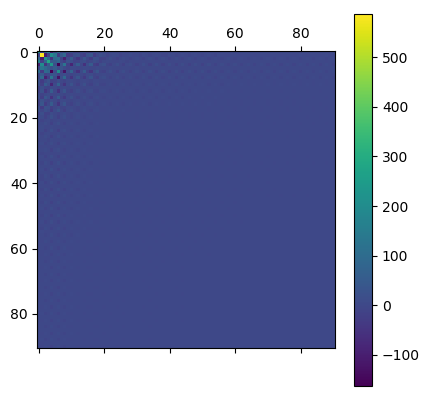

PyObject <matplotlib.colorbar.Colorbar object at 0x1a23046a0>

In [26]:
matshow(B)
colorbar()

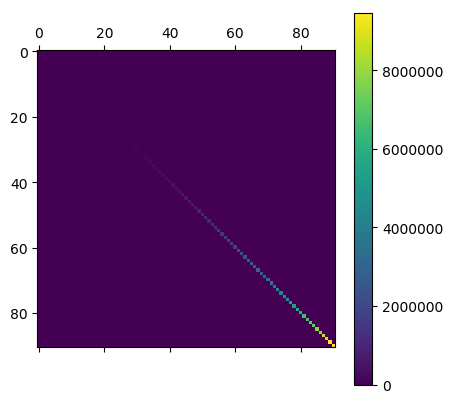

true
(1110.0771582003765, -1.0)


PyObject <matplotlib.colorbar.Colorbar object at 0x1b69d8ef0>

In [210]:
# al = 1.28034
al = 1.2803390
res = B + al * Omega
println(res == Symmetric(res))
println(logabsdet(res))
matshow(res)
colorbar()

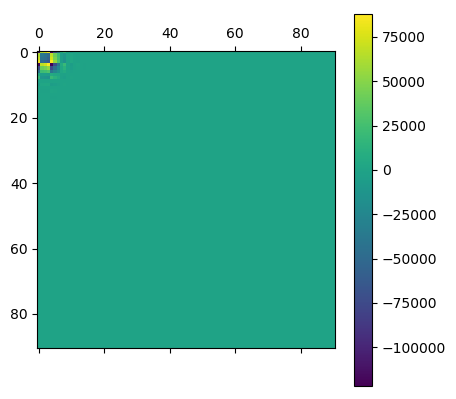

PyObject <matplotlib.colorbar.Colorbar object at 0x1b6d35860>

In [212]:
matshow(inv(res))
colorbar()